# Взаимодействие с интернетом через Python

Базу по интернету мы разобрали, а значит пора выяснить, как работать с интернетом через Python

Для этого в питоне есть разные библиотеки, самые часто используемые это `urllib3` (включена в состав стандартной библиотеки питона) и `requests` (нужно устанавливать). В данном курсе мы будем рассматривать именно `requests`, так как она более высокоуровневая и простая в освоении и использовании. Тем не менее сначала нужно также разобраться с одной технологией, имеющей отношение к интернету

## Формат JSON

**JSON** (**J**ava**S**cript **O**bject **N**otation) это очень важный и популярный **текстовый** формат данных, который используется для хранения данных в виде ключ-значение. Он часто используется в интернете в теле HTTP запросов и ответов для общения клиента и сервера, но также широко используется и без применения к интернету.

Посмотрим на то, как выглядит формат JSON

```json
{
  "string": "Hello, world!",
  "number": 1234.56,
  "boolean": true,
  "null_value": null,
  "array": [
    "apple",
    "banana",
    "orange"
  ],
  "object": {
    "key1": "value1",
    "key2": "value2",
    "key3": {
      "nested_key1": "nested_value1",
      "nested_key2": "nested_value2"
    }
  }
}
```

JSON очень сильно похож на то, как устроены словари в питоне, но тем не менее, JSON объект зачастую не получится вставить напрямую в Python код и наоборот, так как некоторые различия всё-таки имеются:
1. Синтаксис JSON в целом более строгий, чем у питоновских словарей. Например, **в JSON нельзя использовать одинарные кавычки `'`, только двойные `"`**
2. **JSON имеет ограниченный набор данных, которые он умеет хранить**. Это строки, числа, логический тип, массивы, объекты и null

На самом деле JSON (как видно по расшифровке данной аббревиатуры) это один из способов создания **объектов** в JavaScript. Более того, в JavaScript и нет словарей в привычном нам виде, вместо них там используются эти объекты, которые создаются при помощи вот такого синтаксиса

Рассмотрим, что есть в формате JSON:
1. Фигурные скобки обозначают **объект** `{}`. Объект это набор пар ключ-значение.
2. Квадратные скобки обозначают **массив (array)** `[]`. Это упорядоченная последовательность значений или объектов
3. Есть непосредственно **значения**. Это могут быть **строки, числа, логический тип, массивы, объекты и null**. Запись значений логического типа отличается от питона (`true` и `false`, с маленькой буквы) и есть специальное значение `null` (это что-то вроде питоновского `None`)

Вложенность JSON может быть сколько угодно большой, перечисленные ранее значения можно комбинировать, как вам захочется

### Модуль json в Python

Так как мы работаем в Python, то мы хотим уметь **парсить** JSON формат для использования данных в нашем коде. Не трудно догадаться, что наша задача &mdash; сделать из JSON словарь.

Для этого в питоне все используют модуль `json` (из стандартной библиотеки) или `ujson` (более быстрый, но нужно устанавливать отдельно) 

In [1]:
import json

В модуле `json` нам интересны всего четыре функции:
1. `json.dump` &mdash; сохраняет словарь в **файл** в формате JSON
2. `json.dumps` &mdash; сохраняет словарь в **строку** в формате JSON. Это легко запомнить в таком виде `json.dumps`tring
3. `json.load` &mdash; парсит JSON **файл** и сохраняет результат в словарь
4. `json.loads` &mdash; парсит JSON **строку** и сохраняет результат в словарь. Это легко запомнить в таком виде `json.loads`tring

Проверим данные функции, используя пример формата выше

#### `json.loads`

Обе `json.loads` принимает один основной аргумент &mdash; строку в формате JSON

In [44]:
json_string = """
{
  "string": "Hello, world!",
  "number": 1234.56,
  "boolean": true,
  "null_value": null,
  "array": [
    "apple",
    "banana",
    "orange"
  ],
  "object": {
    "key1": "value1",
    "key2": "value2",
    "key3": {
      "nested_key1": "nested_value1",
      "nested_key2": "nested_value2"
    }
  }
}
"""

python_dict = json.loads(json_string)
python_dict

{'string': 'Hello, world!',
 'number': 1234.56,
 'boolean': True,
 'null_value': None,
 'array': ['apple', 'banana', 'orange'],
 'object': {'key1': 'value1',
  'key2': 'value2',
  'key3': {'nested_key1': 'nested_value1', 'nested_key2': 'nested_value2'}}}

Всё сработало, кроме того, мы видим, что `null` стал `None`, а `true` стала `True`, так как мы теперь в питоне

#### `json.dump`

`json.dump` принимает два основных аргумента:
1. Словарь, который мы хотим сохранить в JSON файл
2. Объект файла, в который мы хотим сохранить словарь

In [45]:
with open("example.json", "w") as file:
    json.dump(python_dict, file)

Код выполнился, можете открыть файл и посмотреть на содержимое

#### `json.load`

Теперь мы снова распарсим JSON, но на этот раз из получившегося в результате работы предыдущего кода **файла**

`json.load` принимает один основной аргумент &mdash; объект файла, который нужно распарсить

In [46]:
with open("example.json") as file:
    python_dict2 = json.load(file)

In [50]:
python_dict2 == python_dict   # Как мы видим, считывание из строки и файла даёт одинаковый результат

True

#### `json.dumps`

Обе `json.dumps` принимает один основной аргумент &mdash; питоновский словарь

In [53]:
json_string = json.dumps(python_dict2)
json_string

'{"string": "Hello, world!", "number": 1234.56, "boolean": true, "null_value": null, "array": ["apple", "banana", "orange"], "object": {"key1": "value1", "key2": "value2", "key3": {"nested_key1": "nested_value1", "nested_key2": "nested_value2"}}}'

Вот и всё, данный формат очень простой и с ним удобно работать. В жизни, если вы будете встречать формат JSON, а вы точно будете, вам будут попадаться огромные объекты, которые крайне трудно считывать визуально. Для этого на помощь вам приходя программы/сайты просмотрщики JSON файлов. Я, например, пользуюсь вот этим http://jsonviewer.stack.hu/. При копировании туда JSON текста он выдаёт вот такую интерактивную штуку

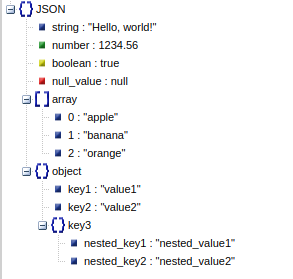

## Библиотека **requests**

In [3]:
import requests

Данная библиотека, как следует из названия, позволяет нам отправлять HTTP запросы (ок, про HTTP из названия не следует, но вы поняли). Делается это очень просто

### Как делать простые запросы

Для того, чтобы сделать запрос при помощи определённого метода (GET, POST, PUT и т.д.) в библиотеке есть соответствующие функции. Все подобные функции работают по похожему шаблону и принимают URL первым аргументом. Зная это, мы уже можем делать простые запросы

In [5]:
requests.get("https://google.com")

<Response [200]>

### Объект `Response`

Результатом выполнения функций `requests.<method>` является объект ответа (`Response`). Из него мы в дальнейшем будем получать все интересующие нас данные

In [7]:
response = requests.get("https://google.com")
type(response)

requests.models.Response

Например, мы можем узнать статус-код ответа при помощи атрибута `status_code`. В нашем случае код 200, всё прошло успешно

In [8]:
response.status_code

200

Мы можем сделать несуществующий URL и получить статус-код 404, исключения в питоне при этом не выбрасывается

In [11]:
response = requests.get("https://google.com/some/path/that/does/not/exist")  
response.status_code

404

Но если неправильно написать имя хоста, то исключение всё-таки будет. Это происходит из-за того, что в коде выше запрос **успешно доходит** до сервера Google (так как имя хоста мы указали верно), но этот сервер не знает как обработать путь `some/path/that/does/not/exist`, поэтому он говорит нам, что такого ресурса нет. То есть сервер присылает нам обратно ответ с кодом **404**. Код ниже кидает исключение, так как имя хоста написано неверно, а значит наш запрос впринципе не может добраться до сервера Google, а значит ответ прислать тоже некому

In [13]:
response = requests.get("https://google.commm")  

ConnectionError: HTTPSConnectionPool(host='google.commm', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fef7c4d8c10>: Failed to establish a new connection: [Errno -2] Name or service not known'))

Из ответа можно получить заголовки в виде словаря при помощи атрибута `headers`, что довольно удобно

In [4]:
response = requests.get("https://google.com")
response.headers

{'Date': 'Sat, 04 Mar 2023 00:11:30 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Type': 'text/html; charset=ISO-8859-1', 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '1P_JAR=2023-03-04-00; expires=Mon, 03-Apr-2023 00:11:30 GMT; path=/; domain=.google.com; Secure, AEC=ARSKqsLRv5D2rBWNOUEmZdiDk-04ax6zcDmrnEHce4qgsBfcUZr5TiY7tw; expires=Thu, 31-Aug-2023 00:11:30 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax, NID=511=GwSVJt-EL5cFWX2iAvgfVO9NXc4hQIZAe5OYg50ctP-kz8SMBkcXC9vjJk_ef4FLlqVgbuL0GoXxY8CxKsWljmL-Qoe0OcLNvxKkDxWxxUJ3ZjPJjgI_WsC_Mk58y-fe23YGcBF2AwEs_z-wsnXzqtdYMXwzdxWQpe8VSPSdwSU; expires=Sun, 03-Sep-2023 00:11:30 GMT; path=/; domain=.google.com; HttpOnly', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000', 'Transfer-Encoding': 'chunked'}

Но самое интересное для нас это атрибуты, которые позволяют работать с телом запроса:
1. `text` &mdash; тело ответа в текстовом виде. Альтернативно можно использовать итератор `.iter_lines()`
2. `content` &mdash; тело ответа в бинарном виде. Альтернативно можно использовать итератор `.iter_content()`
3. `json()` &mdash; возвращает словарь, если тело ответа в JSON формате 

In [26]:
response = requests.get("https://google.com")
response.text    # В большинстве случаев, в атрибуте text мы увидим HTML код страницы

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="hy"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="SncgDLXGktlD0oxb8V40JQ">(function(){window.google={kEI:\'MdIAZNLbNYrN1sQPkNyxqAc\',kEXPI:\'0,1359409,6059,206,4804,2316,383,246,5,1129120,1626,1196097,843,379925,16114,19398,9286,22431,996,365,12314,2820,14765,4998,13227,3848,6885,31559,889,704,1279,2891,1103,3036,7615,606,30668,30022,15756,3,346,230,6459,149,13975,4,1528,2304,27348,14778,13659,4437,9358,7428,5821,2536,4097,7593,1,11942,30212,2,39761,5679,1020,31122,4569,6255,23421,1252,5835,14967,4333,7484,445,2,2,1,6959,17667,2006,8155,7381,15969,874,7828,11806,6,1922,5784,3995,13880,6760,750,14764,6305,2007,18191,20137,14,82,4641,15565,1622,1778,4977,1746,2979,3652,4089,2425,1741,2328,578,3834,991,3030,426,4705,497,482,1411,20,3,867,136,2549,3954,766,12

URL может быть представлен в виде прямой ссылки на файл (не обязательно являющийся HTML страницей). В таком случае в `text` мы увидим содержимое файла

In [5]:
response = requests.get("https://raw.githubusercontent.com/psf/requests/main/README.md")
print(response.text)   # README.md из репозитория на GitHub

# Requests

**Requests** is a simple, yet elegant, HTTP library.

```python
>>> import requests
>>> r = requests.get('https://httpbin.org/basic-auth/user/pass', auth=('user', 'pass'))
>>> r.status_code
200
>>> r.headers['content-type']
'application/json; charset=utf8'
>>> r.encoding
'utf-8'
>>> r.text
'{"authenticated": true, ...'
>>> r.json()
{'authenticated': True, ...}
```

Requests allows you to send HTTP/1.1 requests extremely easily. There’s no need to manually add query strings to your URLs, or to form-encode your `PUT` & `POST` data — but nowadays, just use the `json` method!

Requests is one of the most downloaded Python packages today, pulling in around `30M downloads / week`— according to GitHub, Requests is currently [depended upon](https://github.com/psf/requests/network/dependents?package_id=UGFja2FnZS01NzA4OTExNg%3D%3D) by `1,000,000+` repositories. You may certainly put your trust in this code.

[![Downloads](https://pepy.tech/badge/requests/month)](https://pepy.tech/pr

Про метод `.json()` мы поговорим позже

### Работа с query string

Мы знаем, что с GET запросами можно также передавать данные в формате ключ-значение. Это делается при помощи **query string**.

Рассмотрим это на примере страницы с информацией о геноме *E.coli* с NCBI &mdash; `https://www.ncbi.nlm.nih.gov/genome/?term=Escherichia+coli`

Модуль `requests` позволяет нам оперировать параметрами из query sting двумя способами. Первый &mdash; просто включить query string в состав URL

In [56]:
response1 = requests.get("https://www.ncbi.nlm.nih.gov/genome/?term=Escherichia+coli")   # Это работает!!!
response1

<Response [200]>

Второй способ &mdash; передать функции для выполнения запроса словарь с параметрами при помощи аргумента `params`. При этом query string указывать в URL уже не нужно, а в процессе выполнения запроса библиотека сама составит query string из переданных параметров и сама подставит её в URL

In [58]:
response2 = requests.get("https://www.ncbi.nlm.nih.gov/genome", params={"term": "Escherichia+coli"})   # Это тоже работает
response2

<Response [200]>

Кстати, `+` и пробел в данной ситуации равнозначны, поэтому вот такая штука тоже будет работать

In [59]:
response3 = requests.get("https://www.ncbi.nlm.nih.gov/genome", params={"term": "Escherichia coli"})   # Это тоже работает
response3

<Response [200]>

### Аргументы POST запросов

Ненадолго отступим от темы, чтобы разобрать, как делаются POST запросы. POST запросы в отличии от GET часто несут какую-то полезную нагрузку (**payload**) в своём теле. Передача данных в POST запросе немного отличается от работы с query string

In [18]:
with open("Internet_part2.ipynb", "rb") as file:
    response = requests.post("https://www.ncbi.nlm.nih.gov/genome", params={"key": "value"},
                                                                    data={"data_key1": "data_value1"},
                                                                    json={"json_key1": ["json_value1", "json_value2"]},
                                                                    files={"file1": file})

В запросе выше печечислены все основные аргументы POST запроса в requests. NCBI скорее всего не сможет это обработать, но нам сейчас это и не нужно. Также все эти элементы редко комбинируются вместе

1. `params` это параметры для query string, с POST запросами так тоже можно, хоть и делается более редко
2. `data` это данные в формате ключ-значение, отличается от query string тем, что используется при отправке форм (про это будет отдельная лекция)
3. `json` - если мы хотим отправить данные в формате JSON, можно передать словарь
4. `files` - словарь с файлами, которые мы хотим отправить. **Файлы обязательно должны быть окрыты в режиме "rb"**

Через атрибут `request` объекта ответа мы можем посмотреть на то, что сформировалось и передалось на сервер после указания всех этих параметров

In [29]:
response.request.url   # Видим, что query sting составилась и корректно прикрепилась к URL

'https://www.ncbi.nlm.nih.gov/genome?key=value'

In [32]:
print(response.request.body[:1000])    # В теле запроса мы выдим особым образом записанные параметры из аргумента `data`, а также огромный пласт непонятных букв - это наш файл

b'--9193ab3cb1f98b08555eefe7c3dd467e\r\nContent-Disposition: form-data; name="data_key1"\r\n\r\ndata_value1\r\n--9193ab3cb1f98b08555eefe7c3dd467e\r\nContent-Disposition: form-data; name="file1"; filename="Internet_part1.ipynb"\r\n\r\n{\n "cells": [\n  {\n   "cell_type": "markdown",\n   "id": "0cbdd221-098f-4233-ad0e-ffb5eaf68cd2",\n   "metadata": {},\n   "source": [\n    "# \xd0\x98\xd0\xbd\xd1\x82\xd0\xb5\xd1\x80\xd0\xbd\xd0\xb5\xd1\x82"\n   ]\n  },\n  {\n   "attachments": {\n    "ea3262fb-e01a-4877-b59b-23c42fbaba44.png": {\n     "image/png": "iVBORw0KGgoAAAANSUhEUgAAAc8AAAG8CAYAAAC4zi5EAACAAElEQVR4Xuy9h58Vxbb+ff6X+7vHhOSJDDlHRVBAkCQZJQgIIiAZBQFBFAOGY0ZETJgISpKc85AzTN55T2K961nVtbu6du8JHD3X+97p+Tyfvad3d3V1VfX61qrU/6C6rW6r2+q2uq1uq9tqtf3D3lG31W11W91Wt9VtdVvVWx0867a6rW6r2+q2uq2WWx0867a6rW6r2+q2uq2WWx0867a6rW6r2+q2uq2WWx0867a6rW6r2+q2uq2WWx0867a6rW6r2+q2uq2Wmweed+/e9ehet5qEUdVvf5etJnGsyb3e62bnh981/PbVbf+3tqrKR932P7vV5Pn12/932P5O8UqVTnb62qrNVpvzcEyVnqcdkZqqug3HVFZWJo61z/eT32Yfcy+q2+q2/+1b

Тем не менее никакого JSON мы внутри не найдём, так как для корректной работы этого аргумента нельзя передавать аргументы `data` и `files`

In [31]:
response.request.headers    # Это не совсем относится к теме, но здесь видно, что когда мы делаем запрос из питона, то заголовок 'User-Agent' указывает, что мы использовали requests

{'User-Agent': 'python-requests/2.27.1', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive', 'Content-Length': '7406510', 'Content-Type': 'multipart/form-data; boundary=9193ab3cb1f98b08555eefe7c3dd467e'}

### Back to query string

Уже на данном этапе для нас открываются очень широкие возможности. Например, мы можем составить **список** видов в питоне и в цикле получить соответствующие страницы из NCBI

In [67]:
species_list = ["Escherichia coli", "Homo sapiens", "Danio rerio"]
for species in species_list:
    response = requests.get("https://www.ncbi.nlm.nih.gov/genome", params={"term": species})
    print(response)

<Response [200]>
<Response [200]>
<Response [200]>


Круто! Но мало просто сделать удачный запрос, мы вообще то хотим получить какие-то данные из этих страниц

## "Наивный" парсинг веб страниц

На самом деле вам уже известно всё необходимое для того, чтобы вытащить из HTTP ответа нужную информацию:
1. Вы знаете, что в атрибуте `text` хранится тело ответа, представляющее из себя HTML страницу в данном случае. HTML это **текстовый формат**
2. Вы знаете, как найти, в каком именно HTML элементе хранится нужная информация
3. Вы знаете регулярные выражения, которые работают с **текстом**

Используя данные знания, попробуем вытащить со страницы каждого вида данную информацию

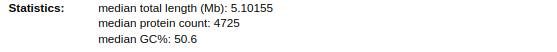

При этом нас будут интересовать только цифры

Предварительно изучим HTML код данных элементов через Chrome Developer Tools, на этот раз без скриншотов, попробуйте сами

Первым делом напишем регулярки для каждого из трёх чисел. Это будет намного проще, чем пытаться написать одну, которая сразу поймает все три значения

In [83]:
import re


total_length_pattern = re.compile(r"median total length \(Mb\)\: ([\d\.]+)")
median_protein_count_pattern = re.compile(r"median protein count\: (\d+)")
median_gc_pattern = re.compile(r"median GC%\: ([\d\.]+)")

То есть мы нашли какую-то общую закономерность в отображении этих статистик и теперь используем этот шаблон в регулярках

In [86]:
species_list = ["Escherichia coli", "Homo sapiens", "Danio rerio"]
for species in species_list:
    response = requests.get("https://www.ncbi.nlm.nih.gov/genome", params={"term": species})    # Делаем запрос также как и раньше
    
    total_length = float(re.search(total_length_pattern, response.text).group(1))     # Производим поиск по регулярке в атрибуте text ответа
    median_protein_count = int(re.search(median_protein_count_pattern, response.text).group(1))
    median_gc = float(re.search(median_gc_pattern, response.text).group(1))
    
    print(f"Length of {species} genome is {total_length} Mbp")
    print(f"Median number of proteins in {species} is {median_protein_count}")
    print(f"Median GC of {species} genome is {median_gc}%")
    print()

Length of Escherichia coli genome is 5.10155 Mbp
Median number of proteins in Escherichia coli is 4725
Median GC of Escherichia coli genome is 50.6%

Length of Homo sapiens genome is 2866.14 Mbp
Median number of proteins in Homo sapiens is 87306
Median GC of Homo sapiens genome is 40.4%

Length of Danio rerio genome is 1405.1 Mbp
Median number of proteins in Danio rerio is 57100
Median GC of Danio rerio genome is 36.9%



Круто, всё получилось. При помощи питона и базовых знаний интернета мы смогли достать из веб страницы нужную нам информацию, даже если такая возможность не была продумана разработчиком сайта. При помощи такого подхода можно **парсить** любые **статичные** HTML страницы

❗Тем не менее в реальной жизни иногда всё бывает не так радужно, как в этом примере. Веб страницы бывают совершенно непредсказуемы и практически к каждой нужен свой индивидуальный подход через пробы и ошибки. [**Web scraping**](https://ru.wikipedia.org/wiki/%D0%92%D0%B5%D0%B1-%D1%81%D0%BA%D1%80%D0%B5%D0%B9%D0%BF%D0%B8%D0%BD%D0%B3), как называется это занятие, это в первую очередь очень исследовательский процесс. Тем не менее, если вы своими глазами видите какую-то информацию на сайте, то в 99.99% случаев её можно достать при помощи питона, вопрос только в том, сколько усилий для этого потребуется

NCBI в этом плане довольно дружелюбный, на нём удобно практиковаться

## Библиотека beautifulsoup

Но, очевидно, что парсинг страниц через регулярные выражения это довольно непростое занятие. Ведь наверняка кто-то уже написал библиотеку, которая сильно облегчает работу? Да, это библиотека `beautifulsoup`

Библиотеку нужно установить (посмотрите как, [в документации](https://beautiful-soup-4.readthedocs.io/en/latest/)), а также она требует установить какую-нибудь библиотеку-парсер (нам не важно, что это такое), можно взять `lxml`

Здесь мы рассмотрим только самые основные возможности этой библиотеки, а они довольно широкие. Нам понадобится всего один основной класс - `BeautifulSoup`

In [4]:
import requests
from bs4 import BeautifulSoup

При помощи данного класса и текста HTML страницы мы создаём специальный объект. Я не в курсе конвенций по его названию, но я привык называть его просто **суп**.

Для создания супа передаём в конструктор класса:
1. HTML страницу, это может быть строка или файл (открытый). Также можно и нужно при возможности передавать строку в бинарном виде, в таком случае повышается вероятность корректного распознавания парсером необычных символов
2. Имя используемого парсера (в детали вникать не будем, просто используем `lxml`, который мы установили)

В этом разделе мы будем работать с страницей https://www.ncbi.nlm.nih.gov/genome/?term=Escherichia+coli

In [12]:
response = requests.get("https://www.ncbi.nlm.nih.gov/genome", params={"term": "Escherichia coli"})
soup = BeautifulSoup(response.content, "lxml")

Мы создали **суп** из нашей странички, что же он умеет?

### Поиск по странице

Это самое основное, чем нам предстоит пользоваться. Искать элементы можно по чему угодно:
+ По тегу
+ По тексту внутри тега
+ По наличию атрибутов
+ По значению атрибутов
+ Комбинировать разные подходы

Для того, чтобы найти все элементы на странице, соответствующие определённому фильтру, мы можем использовать метод супа `find_all`. Есть и другие методы для поиска, которые работают по похожей логике, но `find_all` самый часто используемый

#### **Поиск по тегу**

In [18]:
soup.find_all("b")     # Получаем все элементы со страницы, образованные тэгом b

[<b><span class="username" id="uname_long">username</span></b>,
 <b>Escherichia coli</b>,
 <b>Reference genome: </b>,
 <b>All 33534 genomes for species: </b>,
 <b>33534</b>,
 <b>17945</b>,
 <b>7181</b>,
 <b><i>Escherichia coli</i></b>,
 <b>Sequence data:</b>,
 <b>Statistics:</b>,
 <b>Reference genomes:</b>,
 <b><i>Escherichia coli str. K-12 substr. MG1655</i></b>,
 <b>Submitter: </b>,
 <b>Morphology: </b>,
 <b>Environment: </b>,
 <b><i>Escherichia coli O157:H7 str. Sakai</i></b>,
 <b>Submitter: </b>,
 <b>Morphology: </b>,
 <b>Environment: </b>,
 <b>Phenotype: </b>]

#### **Поиск по значению атрибута**

Попробуем найти ID этого вида по атрибуту, в коде это выглядит вот так

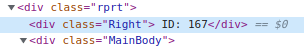

In [44]:
soup.find_all(class_="Right")    # Можно написать так

[<div class="Right">
             ID:
             167</div>]

In [45]:
soup.find_all(attrs={"class": "Right"})    # Или так, разницы никакой

[<div class="Right">
             ID:
             167</div>]

#### **Поиск по наличию атрибута**

Для этого при поиске нужно передать аргумент `attr=True` или `attr=False` в зависимости от того, хотим ли мы найти элементы с атрибутом `attr` или без него

In [54]:
soup.find_all("p", class_=True)    # Данная запись позволяет получить все элементы, образованные тэгом p, у которых ИМЕЕТСЯ атрибут class

[<p class="nojs">
 <strong>Warning:</strong>
 	The NCBI web site requires JavaScript to function. 
 	<a href="/guide/browsers/#enablejs" target="_blank" title="Learn how to enable JavaScript">more...</a>
 </p>,
 <p class="res_tagline">Information by organism</p>,
 <p class="hidden" id="submenu_File_hint"></p>,
 <p class="hidden" id="submenu_AddToClipboard_hint"></p>,
 <p class="hidden" id="submenu_AddToCollections_hint"></p>,
 <p class="HTOn">Your browsing activity is empty.</p>,
 <p class="HTOff">Activity recording is turned off.</p>,
 <p class="HTOff" id="turnOn">
 <a cmd="HTOn" href="?cmd=HTOn&amp;" id="EntrezSystem2.PEntrez.Genome2.Genome2_ResultsPanel.HistoryDisplay.HistoryOn" name="EntrezSystem2.PEntrez.Genome2.Genome2_ResultsPanel.HistoryDisplay.HistoryOn" onclick="return false;" realname="EntrezSystem2.PEntrez.Genome2.Genome2_ResultsPanel.HistoryDisplay.HistoryOn" sid="1">Turn recording back on</a>
 </p>,
 <p class="address_footer text-white">National Library of Medicine<br/>
 

#### **Поиск по нескольким фильтрам**

Можно использовать несколько фильтров для поиска, в таком случае просто передаём список в качестве аргумента

In [60]:
soup.find_all(["p", "a"], id=["turnOn", "tree_id"])   # Все элементы, образованные тэгами а и p, у которых атрибут id равен или "turnOn" или "tree_id"

[<a id="tree_id"></a>,
 <p class="HTOff" id="turnOn">
 <a cmd="HTOn" href="?cmd=HTOn&amp;" id="EntrezSystem2.PEntrez.Genome2.Genome2_ResultsPanel.HistoryDisplay.HistoryOn" name="EntrezSystem2.PEntrez.Genome2.Genome2_ResultsPanel.HistoryDisplay.HistoryOn" onclick="return false;" realname="EntrezSystem2.PEntrez.Genome2.Genome2_ResultsPanel.HistoryDisplay.HistoryOn" sid="1">Turn recording back on</a>
 </p>]

#### **Поиск по функции**

Данный тип поиска позволяет нам буквально искать элементы, для которых переданная функция выдаст True

Код ниже позволяет нам найти все ссылки (тэг **a**), которые ведут на GenBank (атрибут **href**)

In [71]:
soup.find_all("a", href=lambda x: x.startswith("/nuccore") if x else False)

[<a href="/nuccore/NC_000913.3" target="_blank">NC_000913.3</a>,
 <a href="/nuccore/U00096.3" target="_blank">U00096.3</a>,
 <a href="/nuccore/NC_002695.2" target="_blank">NC_002695.2</a>,
 <a href="/nuccore/BA000007.3" target="_blank">BA000007.3</a>,
 <a href="/nuccore/NC_002127.1" target="_blank">NC_002127.1</a>,
 <a href="/nuccore/AB011548.2" target="_blank">AB011548.2</a>,
 <a href="/nuccore/NC_002128.1" target="_blank">NC_002128.1</a>,
 <a href="/nuccore/AB011549.2" target="_blank">AB011549.2</a>,
 <a class="brieflinkpopperctrl" href="/nuccore?LinkName=genome_nuccore&amp;from_uid=167" ref="log$=recordlinks">Components</a>]

In [91]:
soup.find_all(lambda tag: len(tag.attrs) == 9)   # Все элементы, имеющие ровно 8 атрибутов

[<input autocomplete="off" class="jig-ncbiclearbutton jig-ncbiautocomplete" data-jigconfig="dictionary:'genome',disableUrl:'NcbiSearchBarAutoComplCtrl'" data-sbconfig="ds:'no',pjs:'yes',afs:'yes'" id="term" name="term" title="Search Genome. Use up and down arrows to choose an item from the autocomplete." type="text" value="escherichia coli[orgn]"/>]

Короче вы поняли у нас есть несколько вариантов того, **по чему мы ищем**:
1. Тэг
2. Атрибут

И есть куча вариантов, того, **как мы это ищем**:
1. По точному совпадению
2. По наличию (если имеется, то *True*, иначе `False`)
3. Используя функцию (ищется то, для чего функция выдаёт *True*)
4. Используя список (фильтры внутри списка взаимодействуют через логическое ИЛИ)
5. Используя регулярные выражения (это мы не обсуждали)
6. Используя точное совпадение текста внутри тэга (про это будет позже)

Всё это можно как угодно комбинировать для получения нужного результата

#### **Работа с результатом поиска**

Давайте найдём все ссылки на странице, ссылки образуются при помощи тэга **a**

In [93]:
all_links = soup.find_all("a")
len(all_links)

165

Ссылкок нашлось много, можете распечатать переменную `all_links` из предыдущей ячейки, чтобы на это посмотреть. Но что это и что там лежит? Для простоты будем считать, что `all_links` это список, хотя это не так. Внутри у него находятся все найденные элементы, как же представлены они?

Методы супа для поиска, как правило, возвращают нам специальные объекты с которыми удобно работать. В данном случае список `all_links` содержит объекты `Tag`, каждый из которых представляет из себя один найденный элемент, посмотрим, что он умеет

In [94]:
element = all_links[20]
type(element)

bs4.element.Tag

Мы можем просто распечатать этот элемент и посмотреть на него в первозданном виде

In [95]:
element

<a href="https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz">GFF</a>

Далее при помощи различных атрибутов мы можем разбирать его на составные части

In [96]:
element.attrs    # Словарь с атрибутами элемента

{'href': 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz'}

In [97]:
element.text   # Текст, заключенный между открывающим и закрывающим тегами

'GFF'

In [98]:
element.name   # Имя тэга

'a'

При этом самое крутое, что все объекты представляющие элементы в супе очень самостоятельны:
1. Мы можем найти какой-то элемент, а затем произвести новый поиск уже внутри него при помощи тех же самых методов (например, `find_all`)
2. Когда мы получаем объект элемента, он сохраняет связь с остальной страницей, поэтому мы можем использовать специальные атрибуты для **навигации**, чтобы получить его родителя или, наоборот, вложенные в него объекты

Давайте получим родительский элемент для элемента, с которым мы работаем

In [99]:
element.parent

<span class="shifted">Download genome annotation in  <a href="https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz">GFF</a>, <a href="https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gbff.gz">GenBank</a> or <a href="https://www.ncbi.nlm.nih.gov/genome/browse/#!/proteins/167/161521|Escherichia coli str. K-12 substr. MG1655/">tabular</a> format</span>

Мы получили родительский элемент, мы видим, что помимо нашего элемента в него включены ещё два, это его **сестринские элементы** (они находятся с ним на одном уровне вложенности), их тоже можно получить

In [106]:
list(element.previous_siblings)    # Это previous_siblings возвращает генератор

['Download genome annotation in  ']

In [105]:
list(element.next_siblings)

[', ',
 <a href="https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gbff.gz">GenBank</a>,
 ' or ',
 <a href="https://www.ncbi.nlm.nih.gov/genome/browse/#!/proteins/167/161521|Escherichia coli str. K-12 substr. MG1655/">tabular</a>,
 ' format']

Если мы работаем с элементом, у которого есть вложенные элементы, то по ним тоже можно совершать навигацию.

Сначала получим все таблицы (тэг `table`)

In [108]:
all_tables = soup.find_all("table")
print(len(all_tables))

6


Всего на странице шесть таблиц, возьмём любую из них

In [109]:
table = all_tables[4]

Таблицы в HTML всегда имеют много разных вложенных элементов, основные это:
+ **thead** (table head) - шапка таблицы (строка с названиями колонок)
+ **tbody** (table body) - тело таблицы (все остальные ячейки)
+ **tr** (table row) - строка таблицы
+ **td** (table data?) - ячейка таблицы
+ **th** (table header) - ячейка-заголовок (имя колонки или строки)

Дочерние элементы можно получить при помощи атрибута `children`, это также генератор

In [114]:
[tag.name for tag in table.children]    # "Дети" таблицы

['thead', 'tbody']

In [116]:
[tag.name for tag in list(table.children)[-1]]   # "Дети" тела таблицы это строки

['tr', 'tr', 'tr', 'tr', 'tr', 'tr']

Но такая навигация удобна только для близких друг к другу элементов. Если я хочу получить все значения из ячеек этой таблицы, то удобнее воспользоваться поиском, он работает для всех объектов в beautifulsoup, которые представляют из себя элементы, в том числе для найденной нами ранее таблицы

In [118]:
table.find_all("td")

[<td><span title="chromosome">Chr</span></td>,
 <td>-</td>,
 <td><a href="/nuccore/NC_002695.2" target="_blank">NC_002695.2</a></td>,
 <td><a href="/nuccore/BA000007.3" target="_blank">BA000007.3</a></td>,
 <td>5.5</td>,
 <td>50.5</td>,
 <td><a href="https://www.ncbi.nlm.nih.gov/genome/browse/#!/proteins/167/409151|Escherichia coli O157:H7 str. Sakai/chromosome/" style="color:navy">5,067</a></td>,
 <td>22</td>,
 <td>103</td>,
 <td>1</td>,
 <td>5,329</td>,
 <td>136</td>,
 <td colspan="99"><div id="167_1_div"></div></td>,
 <td><span title="plasmid">Plsm</span></td>,
 <td>pOSAK1</td>,
 <td><a href="/nuccore/NC_002127.1" target="_blank">NC_002127.1</a></td>,
 <td><a href="/nuccore/AB011548.2" target="_blank">AB011548.2</a></td>,
 <td>0</td>,
 <td>43.4</td>,
 <td><a href="https://www.ncbi.nlm.nih.gov/genome/browse/#!/proteins/167/409151|Escherichia coli O157:H7 str. Sakai/plasmid pOSAK1/" style="color:navy">3</a></td>,
 <td>-</td>,
 <td>-</td>,
 <td>-</td>,
 <td>3</td>,
 <td>-</td>,
 <td co

#### **Практика**

Используя полученные знания по beautifulsoup попробуем получить в питоне вот этот текст

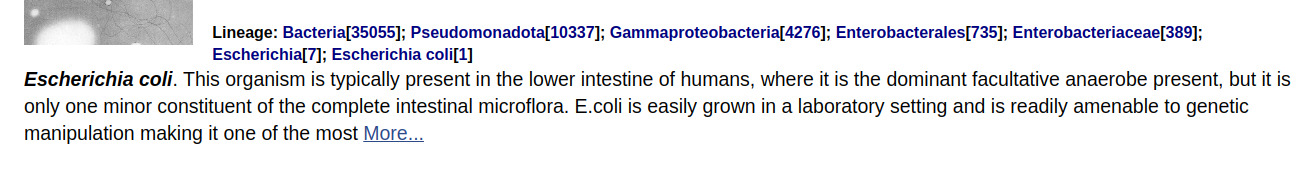

Здесь всё немного осложняется тем, что этот текст не выделен в отдельный тег

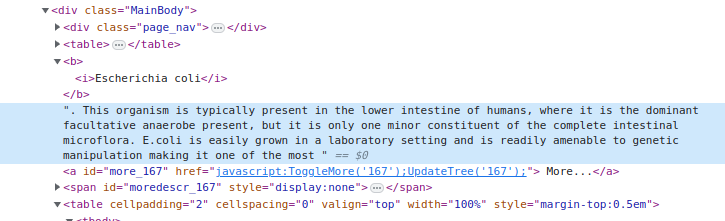

Будем разбираться, сначала сделаем суп

In [120]:
response = requests.get("https://www.ncbi.nlm.nih.gov/genome", params={"term": "Escherichia coli"})
soup = BeautifulSoup(response.content, "lxml")

##### **1 вариант** 

Так как наш текст не заключён ни в какой тэг, у нас не получится найти его напрямую. Поэтому давайте попробуем найти родительский тэг `div`, а потом уже вытащим оттуда наш текст

In [123]:
div = soup.find_all("div", class_="MainBody")[0]

Наш текст является 4 по счёту "ребёнком" в данном элементе (после `div`, `table` и `b`)

In [125]:
list(div.children)[3]

'. This organism is typically present in the lower intestine of humans, where it is the dominant facultative anaerobe present, but it is only one minor constituent of the complete intestinal microflora. E.coli is easily grown in a laboratory setting and is readily amenable to genetic manipulation making it one of the most '

Готово, но можно было и по-другому

##### **2 вариант** 

Перед нашим текстом следует название вида, выделенное жирным и курсивом, при этом мы знаем точный текст, так как мы знаем название вида.

Отфильтровать элементы по точному совпадению текста внутри тегов можно при помощи ещё одного аргумента метода `find_all` - `string`

In [132]:
soup.find_all("b", string="Escherichia coli")    # Ищем все теги b внутри которых есть текст "Escherichia coli"

[<b>Escherichia coli</b>, <b><i>Escherichia coli</i></b>]

Такой тэг не один. Можно или просто взять второй результат (они возвращаются в порядке следования на странице) или модифицировать запрос, чтобы оставить только один. Реализуем последний вариант

Код ниже ищет все теги `b`, у которых первый дочерний элемент это `i`, а внутри есть текст "Escherichia coli"

In [134]:
ecoli_elements = soup.find_all(lambda tag: tag.name == "b" and next(tag.children).name == "i", string="Escherichia coli")
ecoli_elements

[<b><i>Escherichia coli</i></b>]

Это нам уже подходит. Кроме того, мы знаем, что искомый текст это следующий сестринский элемент по отношению к найденному только что. Мы с вами уже знаем, как получать сестринские элементы

In [136]:
ecoli_elements[0].next_sibling    # Успех

'. This organism is typically present in the lower intestine of humans, where it is the dominant facultative anaerobe present, but it is only one minor constituent of the complete intestinal microflora. E.coli is easily grown in a laboratory setting and is readily amenable to genetic manipulation making it one of the most '

#### **Стратегия поиска**

Можно придумать ещё миллион различных способов найти этот текст, но обычно при поиске следует придерживаться некоторых принципов:
1. Самый базовый принцип, ваш способ должен быть устойчивым к небольшим изменениям на странице и стабильно работать с ращличными страницами, построенными по одному плану. Чтобы обеспечить выполнение данного принципа стоит придерживаться вытекающих отсюда правил
2. Чем меньше раз вы используете `find_all` в процессе поиска, тем более устойчивым к изменениям будет ваш алгоритм. В идеале нужно стараться найти нужный элемент за один вызов
3. Чем меньше, количество элементов на которые вы опираетесь, тем лучше. Очевидно, что поиск через `list(element.parent.parent.next_sibling.children)[2]` легко может сломаться на какой-то другой странице, так как мы зависим от целых 5 элементов (`element`, `element.parent`, `element.parent.parent`, `element.parent.parent.next_sibling` и list(element.parent.parent.next_sibling.children)[2]). Данные элементы могут немного варьироваться от страницы к странице, поэтому изменения в любом из них могут сломать весь алгоритм поиска. Чем меньше у вас таких опасных точек, тем лучше
4. Стоит очень осторожно проихводить поиск по точным совпадениям

Данные правила применимы только к ситуации, когда вам нужно распарсить много однотипных страниц (например, 1000 видов с NCBI). Если вам нужна только одна страница и не нужна воспроизводимость, то тогда можно делать так, как вам удобнее и быстрее

# API

## Определение

**API** (**A**pplication **P**rogramming **I**nterface) это **крайне важное** понятие в программировании в целом, поэтому мы сначала разберёмся в том, что это такое, а потом рассмотрим это в применении к интернету

[Формальное определение](https://ru.wikipedia.org/wiki/API) говорит, что **API** это "описание способов взаимодействия одной компьютерной программы с другими". Звучит как-то слишком обще

Вместо этого давайте посмотрим на саму аббревиатуру и разберём её по словам:
1. **Application** &mdash; приложение в самом широком смысле. Это может быть какая-то ваша программа, скачанная библиотека, веб сервис и т.д.
2. **Programming** в данном случае означает, что мы работаем с кодом, другого особого смысла это слово здесь не несёт
3. **Interface**. А это уже ключевое слово и мы с вами даже знаем, что это такое (см. лекцию по ООП часть 2). Интерфейс это некоторый набор **методов**, иначе говоря, некоторых **действий**, которые мы можем совершать. **Интерфейс** нашего **приложения** это то, что оно умеет делать.

Теперь попробуем собрать всё это воедино и соотнести с формальным определением. Программам (приложениям) постоянно приходится общаться друг с другом, например, файловый менеджер как-то взаимодействует с файловой системой, `seaborn` взаимодействует с `pandas`, гугл-таблицы взаимодействуют с гугл-документами и т.д. Но для того, чтобы приложения общались друг с другом, их ещё сначала надо "научить" этому. Это "обучение" происходит путём создания специального **интерфейса** в приложениях, который могут использовать другие приложения. То есть мы определяем специальные **действия**, благодаря которым приложения могут общаться.

Пример:
У нас есть два приложения: голый Python без модулей и файловая система вашей ОС.

Задача: "научить" питон взаимодействовать с файловой системой (просматривать, удалять, копировать, перемещать файлы и папки)

Очевидно, что голый питон не способен осуществлять все эти задачи, поэтому он не может полноценно общаться с файловой системой. Для того, чтобы он научился это делать, нам необходимо создать **интерфейс** для этого взаимодействия с обеих сторон, то есть какой-то набор действий.

Со стороны питона таким **API** выступает модуль `os`, который задаёт действия по взаимодействию с файловой системой. Если представить, что файловая система это некоторый black box, то модуль `os` это ручки, которые торчат из чёрного ящика наружу и позволяют нам с ним взаимодействовать.

Со стороны файловой системы тоже есть свой API, но его может использовать не только питон, но и другие программы. Примеры: (1) bash команда *ls* использует API файловой системы, файловый менеджер с GUI использует API файловой системы, браузер, когда вы скачиваете или загружаете файл, предлагает вам выбрать файл/папку для загрузки, это тоже использование API файловой системы.

Другие же программы уже могут использовать API питона, например, ваш код в любой домашке. Когда вы пишите на питоне, вы автоматически используете его API. Питон же в свою очередь написан на C, а значит для выполнения многих функций из питона под капотом используется API языка C для взаимодействия с питоном

И так можно продолжать до бесконечности. Весь софт, который мы используем, взаимодействует друг с другом при помощи определённых наборов действий, это и есть **API**

## Больше примеров

Понятие API довольно размытое и неинтуитивное. Оно лучше всего осознаётся при помощи пропускания через свою голову большого количества примеров 

### Библиотеки Python

Если вы хотя бы раз заходили в официальную документацию Python библиотек (я надеюсь). Вы 100% видели там раздел *API* или *API reference*

**в pandas**

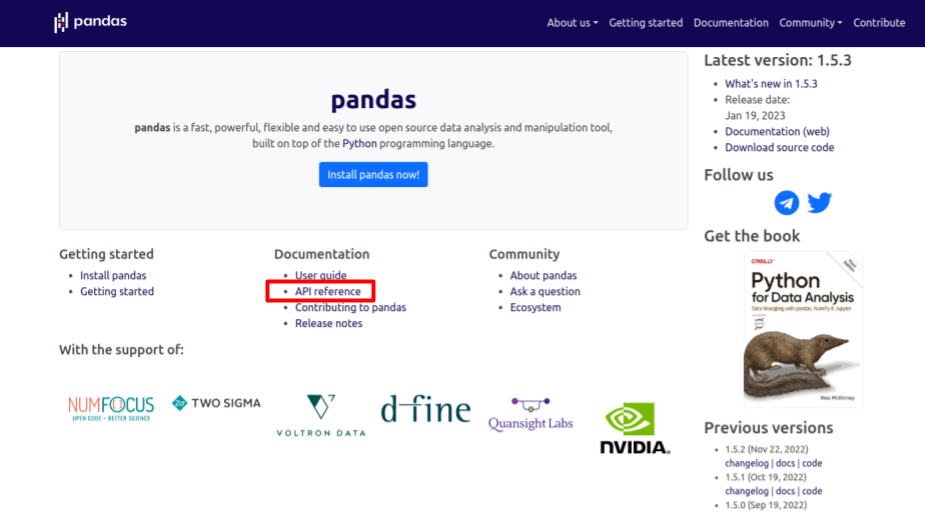

**в biopython**

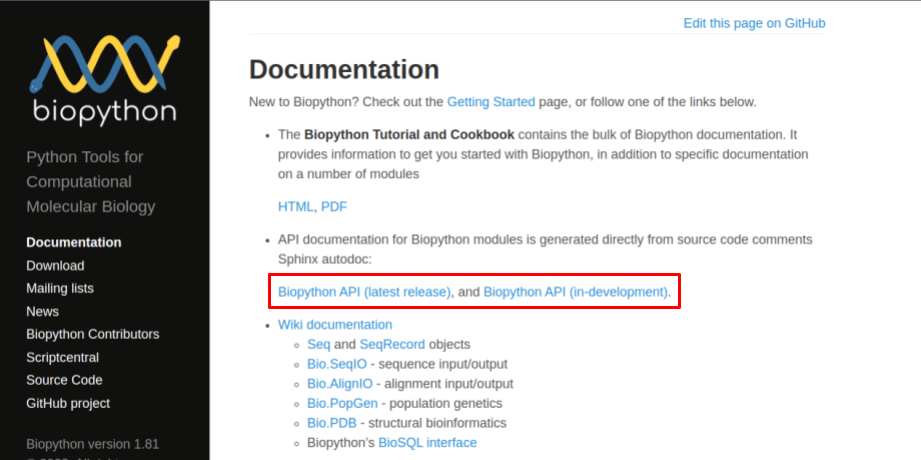

**в matplotlib**

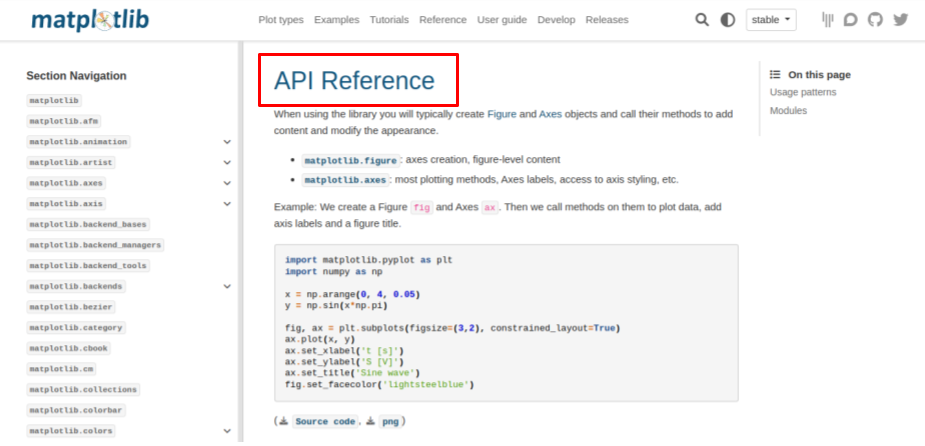

**короче, везде**

В этих разделах описывается **API** библиотек, то есть то, что они умеют делать. Зачастую это просто длинный список функций и классов, где для каждой функции/класса описывают аргументы, возвращаемые значения и т.д. (то есть буквально описание интерфеса). API библиотек создано для того, чтобы библиотеки могли взаимодействовать с нашим кодом. Если бы в модуле `requests` были только низкоуровневые функции, представляющие его внутренние "кишки", то он был бы гораздо менее полезен. Разработчики знают об этом, поэтому создали удобный API &mdash; функции `requests.<method>`, которые предоставляют нам интерфейс для взаимодействия с "кишками" request, при этом позволяя нам абстрагироваться от внутреннего устройства библиотеки 

### Низкоуровневые API

Или вот пример ещё более низкоуровнего API &mdash; https://www.kernel.org/doc/html/v4.14/filesystems/index.html. Это API для взаимодействия файловых систем с ядром ОС

Драйверы для "железа" это тоже API

По сути API есть у любого ПО, которое хоть как-то открыто к взаимодействию

## API в интернете

### Теория

API в применении к интернету несёт все те же общие черты, что мы разобрали ранее. К этому моменту у вас уже должно было сформироваться примерное понимание того, что такое API в общем смысле

API в интернете это также набор каких-то действий, которые мы можем совершать для взаимодействия с каким-либо сервисом. Отличается тут только способ, при помощи которого мы используем этот API

Для работы с интернет API мы должны будем делать **запросы** и очень круто, что мы их уже умеем делать.

Многие популярные сервисы имеют свои API, для примера возьмём тот же GitHub

Допустим, что нам пришла в голову мысль собрать статистики по коммитам со всех репозиториев, где есть Python код. Это вполне выполнимая задача, мы с вами уже умеем парсить страницы и разбираться в структуре URL. Эта задача займёт у нас довольно много времени, но она выполнима. В то же время разработчики GitHub понимают, что кому-то может потребоваться подобная информация или быть может кто-то захочет автоматизировать создание репозиториев, форков, коммитов, что тоже реализуемо разобранными нами методами, но это уже переходит в разряд очень сложных задач. Для таких случаев разработчики GitHub сделали специальный API, который позволяет нам сэкономить кучу времени, так как разработчики уже реализовали для нас весь необходимый функционал.

Как же подобный API работает?

Разработчики отводят ряд определённых URL под API. То есть у сайта появляются специальные URL, при обращении к которым мы будем получать желаемый результат. Такие URL называются **API endpoints**. Рассмотрим на примере (пример выдуманный):

1. Разработчики (гитхаба) определяют специальный URL путь, который будет отвечать за все запросы к API. Например, `https://github.com/api`. То есть все запросы вида `https://github.com/api/<something_else>` будут обращаться непосредственно к GitHub API
2. Далее разработчики добавляют в API функционал. Например, "получить список коммитов для указанного пользователя". Обычно в API такой функционал называют **методом**. В документации к API всегда подробно написано, как работать с данным методом. Вернёмся к методу для получения списка коммитов, назовём его `getCommitsList`. API веб сервисов, как правило, не расчитан на использование с конкретным языком программирования, поэтому зачастую там будут общие формулировки, применимые к любому языку, который умеет делать HTTP запросы. Например, для нашего метода может быть написано что-то в духе "make GET request to the endpoint `https://github.com/api/getCommitsList`. Possible parameters are: `user` (required), `numCommits` (optional, default=5)". Опять же это максимально общее объяснение без привязки к языку, давайте переведём это в понятный нам Python код.

```python
response = requests.get("https://github.com/api/getCommitsList", params={"user": "torvalds", "numCommits": 5})
```
    
Мы всё сделали:
+ Запрос к указанному в документации **endpoint**
+ Это GET запрос
+ Мы указали желаемые параметры запроса (в случае GET запросов, когда мы говорим о параметрах, то почти всегда имеем ввиду имеено query string)

и получили желаемый результат в виде HTTP ответа.

Как правило ответы от API представлены в формате JSON, так как он хорошо подходит для структурирования данных

У очень многих популярных сервисов есть свои API и их легко найти в интернете, например, просто набрать в поиске "YouTube API" или "Telegram API"

### Практика

Рассмотрим на примере взаимодействие с конкретным API, для этого мы посетим репозиторий https://github.com/public-apis/public-apis, где собрано огромное количество ссылок на сервисы с публичными API.

Здесь важно упомянуть, что многие API требуют для использования специальный токен - API Key. Это совершенно нормальная практика, которая позволяет авторам API регулировать трафик. Для получения API токена обычно надо зарегистрироваться, оставить заявку, сделать запрос на определённый URL, заплатить и т.д. Для простоты здесь мы рассмотрим API не требующий токена, но не пугайтесь, если вдруг когда-то такое увидите

Рассмотрим это на примере простого API, которое позволяет получать картинки котиков https://cataas.com/#/. У данного API есть довольно приятное и понятное описание с примерами (такое, к сожалению, бывает не всегда).

Прочитав документацию мы выясним, что в ней для разных действий указаны разные URL (это **endpoints**), причём они указаны в виде **путей**. Изучив документацию мы поймём, что данные пути должны "приклеиваться" к запросам на базовый URL - https://cataas.com. В данной документации нет явного разделения на **методы**, а скорее просто перечисляются возможные варианты запросов

#### **Простой запрос**

Ну ок, давайте попробуем сделать запрос по пути `/cat`, который должен вернуть нам случайного котика

In [1]:
import requests

In [31]:
response = requests.get("https://cataas.com/cat")
response

<Response [200]>

По статус-коду 200 мы видим, что запрос прошёл успешно, но как же выглядит тело ответа? Может быть это JSON?

In [8]:
response.json()    # Не похоже

JSONDecodeError: [Errno Expecting value] �PNG

   IHDR  X  ,   M�1   bKGD � � �����  � IDATxڌ�ٖ$I���}�ɢ�f�KDfeu�>���7��<05U�K�of��o� b1����3"���TEX��~�����G�b�<��y����|�C����ζn�
�<1_f�y"x�ɕ�E�۝�������cYȵ�g�'�/O�|����s�R(9����R*�4s:���<�VҺ��x��m�8].<=?3�{���Y�w������8�Àu��31%������K��s�oo<�w�y�r9�|ybJ!m����v{��x�r���rf:���0,��l,o7^�}��ve]Wp��4s������L���ۺr����7�oo8c��y���i�H��X�e�<6�aKg����3��FOuk-�JΙu]����F��Z+�9�a ����l��i��^�1c�@-U�����g�V�*�Z����7��� �*�\���1�^�V�S2�LI)�l�J������A.�R
��`�Vr)��O�F�ib���1���C5PM��ϯ��sa�+�"k,�L��Z����o`F�q$���z:��	�<`�Z��r!�E��\�B)Y?s&ƍ�"�5/�PK��B*�-f�u!��ldF��r(����)%�s$�(�E��7�u��L���\c�-��4x�����t����c�9�xp�c���~y�9'��)E�|&t�Y�Pc,��3n��Z�9�6c)%��F���"�����x\�ۂ����]ޗe�������0L87 ��������~c���p�Å�aÈ���Y�4M��O��$�6F���:�5c�ܟ��-��?�^xdM�_U}��~�53J)��Xօu]X�*�7��=۶�n1'n�;?�^Y���3���$�}�A��y�����z�z{`È�fL�Iղ�
6��ƒJa��T*�{�yb�Fn�+���!�ut�:��>P�<�kJ�,�V*��ڞ![��|��B�0k+۶RM�G.�\�9}& Eyv�0r�/%j��R)��r�����~8��y{{���\2)%�w lۆ�0`��Kp���Y��Z0@�uQJc�@������m�\^�� �rk�:��8c��fr�z_e�` S1�0úm$]ւ��RԌ3o-�{];c-�9�s8��a�P*!����}�Jʉ��붭+��g�a���S��Ͻ��B%�Ķɳ=��<M�À�g�֊��M��@>����g�&)QM��e��cpV^���2#�Zb��Y��ʜ3�ZN��8b�8�	�s��y<nr��÷�cds���,}�SJ�R���"���z��|\$�w�5}��0�<�9eJE��z٨�n"9gr֋f�, ]�F��[���V�m_��^x���y�uN7-��dr)`�k��z���
 ]p�u���N7oE6�#�I)QJ�:���P۵l׺�B��n. 7O�}1JŠ*eJJ�Rp�b��$E_�"פJ)l�~�)�|`G�i�{�!���W���rV�r?j���X�x����p������ǿ2YG��kl-��%n���+۶�e�flHZ��ZY�����E������X�J)y�F�8}' �VL���]߶�\H$)�ͪ]3��B��Yբ��O[����k5�?���)�M��%�N�ע��� z���3k�`���7��׽ȒC^ֻ�Z����W[��L=�Ƃ)����2����b0X�V�=V�a���~L[J��,�6���,K��z!؊]0�`4��5��k�J��Ȗ"7n�#�4k���뵒�i7���~�M�L��{.���:\�}m:�TB���T��$ky{{�z��m��H�	R�&݃���?Q�4X�[��J
��6`\&C�rp�"łs�;��I[�#��1�Ѳ�Jパ�5�b�#XC1P(d�9�Z@����_2k�@͙�<{V�_J	L�Z'�w���^3w8WZ�S���X'TA���ת{��PB��J�O������-�ꡘ��ٳ�{���r��*g&P�� ��a��9�5J{6�3m]il�5鰲7�ޚ�֔�3�Z'竩S��.��)��N��v.C���ߓ��bʻ�=�B����1Ҭ��~�,�w���Cɲ^��
@�Q�lc�Y��T��K������a��^���Z�����_���3�$���[c����'�:|�XZו
L~�.��~�!MRL�H.E��Ƒ�|f�})e�uc����N�B�\/zb�N�T�j��.�������������Q��ֽ�B�yO�r!�����02��t �i�i��6���ua>��>�"!`���D�Qy<�^^�a	à�,�r�����k�4b} �B��>
�Iۆ���h�[�V��-�~�=��;1F��L���r�ry�9O�˲Qk�C����ɹ�����\��j�Ұ������%T�SU
9}��@F�K�,�_�������^��������/�O3��uXc���FW)�l����ў��fҊ�Z�v[I
[�@k��"9F��cT��2N��5��n���V?��ڶ������[��h,E�I2�;�I���΁���֢ϱn�b�tl��b�k �H!(�|(���{q(����p�k�?ֺC"kOP"�E�@��s��.F-�E�3�XEج�1����z/�����c�F�B%7�
�KI�\��n���8N<?����x �t1��y�xs�j�l��f��_�v]k��Ŵ�x/z�^7`�e(�R2˲��o����m۰��Q�ɊT��QJf�x����m8�~�Y�̲V�Gf�VR��q�)E�č5G|�O�^ԅAP���!�s�&R�L*�Z �L.IO*��b�'��h��Ą�i�
���c�?�;��>���[��P�4��Z|p�+��7�r�J�
J�^T�a�$���3��ֵ�y欗3&�� G*Y_�R�LaJ{ �4X��|b�'�ǃR2C�*����G�s(�I�9�͹6�u�+�5!�}��3�I�s/��UP�0��*�V�#g-�82M��t���r���1��m����w�OP�ɳ!S����sgQ�`lŇ@J�u[��W��j� =)��q��H���9
J��k+�S��T�^o$��M�H^@���r�@���>���t >�����UH1�.���eY塱�i���'���<�}��R�����X� է��lt!�Fb���3�
B�u�e�e�d���uo�l��i�T�_Ĕ�B����i�`�!`��"�^�U�n�^�NZ�kuΤ(EVT����<3�c�5X5Fy/)6�vGŜk�K1�bҪٱ��v�S�F�[5�y��00M�}�l����0N�$Lk��}�>l����p�����~x�0U�M�8�3��{�t8q�"W��MU�������|��o�^�X��a��/�/�>0�{�`��W�T3�m�����F�
��]p+J����ߑҎ$�(�^(���;cƽH�r�=r�o+Hdۏ|��u�)c����������S�R���R"�D"Uǫ�N�		�{���ηu��Z)�c�6EqzJN���HbU�Y�V�snϨl�{Ao1���R�i�sD�,0ƚ����=�0��C%��R�y�����0L��D&���
���7����v�y�R�lI��e�X������n�\�\�jV+�錱R�a,�s{�z����G4��B���EW�nz�(V)m�A�)z��~)����~xoQĢh��c��(%���cYI�B�2ցy�<}8��d�?2߾��z�Q��I��I���)8dW���=,+0��22;C��f��`��R�u���)gi�ڴ$e��罭�V��)��L�Y�֎��P)Ȟ�n�#>���-t�(EQm=�� �5(���;�'-¤ 6X����jp�η���d�"�M
/�)��B�}��(��{���Zᕳx/�wT��f�M�(��Q�蚢\�j#!��H������� ����e���{m�]k�`u�%�̲���l�
li�
a�Rɵ@�rM��Pr�d�d�CC�;��3�J��#�Q�����}�V��������^m�A�7�b���� ����v��,�𴆁�������raF���[X����β�L��8���U��`RL�qc�������� H�.�Vl�"7�iq�7,������۶�eY>/���Ƞ\*��IM��E�ee�6)"C`�F�V���㹒6�)wh�����0R�W���"p�*�b�U؀qv/X���6�u�A������A���ʒ�i���YG��s�˹0�� ���A����u죙�k'�ё�-#XNY��"k�'�0�{�O+�\������D�/,o7�����zg�v���������\>��Q�sΰ����;�7+�P����zH�����Jܶ�@V���F���m;�ݧ�w������D'TAUsJ���x7i�א��3UQ�(]�Og�34�B��DΎ���6-��kܡq�?OEF�m�nAn� .K�k����ЫR��"o�텂��,2�l�H+���b���� =<�4cL�;ǲX�t���p夸����G�s%�;�������~�����3�d���q�z�s����0~����_�2���y�xiZ��	���mc��b�#����EW�?s+L�՞�vZ�� �{v:�xyy��xH���4�}Y�[oo?H)B`M����֊qʉ`O������3�Z��~��="kL)u��ʙ��)��\¹��+k{���U�7-���
^��ԚٶL�A��"�*FмRdBa����M�*Jg� �ANY�ENRL:\�7�9g��\{��W��(��TU�~�bJZ�ڦȺ��i
�"c�RS/R���@�F���ۆ7���{��5SJ�ctYB�	}<)#Zg����Y9��h�����7Kދ�#)f�%��t>���g8g���5	/)Ʒ(<�0t~�.�i"ƍ������m�3�>;�G��0P����B�aHGD�X�����N'\��J��:��RdԨ[v�Y���::F���!}��䭗nK.���[��R��x�q�ԟ��uc8�����4M�����!���V���i��m!'����cg1�!������,k�ʍ�U�'e�J���E	9�66hD]�>�*7� ��a�Q_+�
%%9c�*�����w��u��IЮm]٢��00�3�{��,h�ca}<��&����'#�c���FAD	O/�<=?3�N���o�Ǉ?���KH��Ή����-�:�k9��,^[V��"�'���������72c��c�Z��f7L*�j�0��7����¿�������8�<�O#���L'�qb��p�LE+��K�l�L[��VR~�~P
���уӢdkz�XZ�MP�w������	�*�-r0%��km|�]`C'�g�#PZc�Z����|�m[)9�4���s����0S�48��v��Z�E��ɬa8ͧ.N�ӑ��8-��@��}\Y�qd��J[0��|``�э!�MP,k	a/��af#�0c+��_~�X������ʏ�a�T�A�RdݶNex<<Xx�]Y֥�)]��Mъ��˅�~x��8�5n_��DmOI'��Gh���"�˅_����̺���ƍ��r�]��7�U���:��s:��)���ƚ�Og*��J|�O��28K�p�Q��z��ۍx]�1b�!ok�'M�3<�Tb΂";+�7eb�"ͺ�C�Q�5UyY`)
�V�5�86�e���W)�*�7�F	!�+gI�9gI�؆���JC�a�Ycp^�
���c�Ze�s�[���W�0)x��ͥ�n�����q���ՍH�n�K��X�Ƒ�\�v���5Z@*=`�o��"�c#x����ϑsۃ
��H�:��;+�q�@ʙ�����Īς�;/Kާ%�"#P��8nJ�o�Ѷɸ�s��gޢ���h*$!�P�z't)��-.u�_��I�����������tj�U���8�n^��u2"e����_����=���5��BJ��21E���ZF�����ń�e+�o�/�0�&�,i�"�(�+d����]|N� ��N�A�E����s�j�M�`�n�Y�V�·}s��2��o����TI���B����Xߪ����Qh�B�U��6N�!0��"]N
���a]Hk��,��6�t���g=O��t9������s^9c]!�zX�������z`]�:��ҙ6�dGFr�?׭�Sۨ�X	�H��p͡�����Vr���B|,l��~'/�q<�'\(�z1��r���o��
������;NOgFd�e�!.+��A�6�����tb8����-��(��aޯE?�j?,��r�L%A�ɧ:y�b���k�+�"#��b'o��r�l�w�]�i�ܷ�<���H�Z)���-
����E���I
x7��@#��<i�K��?�H׸�mPdd>#��0h�~��6[�TK+Dj/��⤍g�T�ȫ(լ��0�����4N��;��>����a�p����o~|�JX=>ȳ�'��
2�(�'e�54�RΙ��NNC�|>�3�X����f�r��+��6D��w�ޭP��s>�p��Ҕ�)�l����?��G�_;���O�a&��WQ5{���Jz�TEx�L=5�@M�`G�H�Қ#tHgE�������Tx��A�Eb�����Ee�K) Л:�B���i�ï�o0��"���c{(ލ�s�X����=*���U��x�'�xTo�
j�x<�Үx,��Us%�ϧh�uN�D���-���8���U�e�7iM8�!nҼS|G���B�M�7�8����L�mZ�7�\����Oֵ�BceVrSkZ �6]� �SMp	́~�HC���u%oAye��Ĩ�U�۶b�e��>���3N9&b޺:����s�w������������i$�ֻ.G�)uE��M~-77�Ȳ."�V��L�b#P��J���
?���l~�T[�]:��*��y��w�gz��'�M���w^nBصT���a�tyb'J�ղ�,��Z�>�!`���[dYV�"H#&[pAP �?��L�"�cկ�Q�|#���(*�x<�v!�dR�t#;֪��*�@cweG;���-'v��0�� �Ւ!�\.�q��vh}��������ӧ}����Rk�Z+�6E���S
�]eVYW�&���*�~v*4K)Ԝ11���|�������wj��R�^�H��n��)��
�Ė6n߾���f�i����_��/|z~���Ɨ�~���FJ�����˟�����'�d��EsJ�#��3u����EcXA� �".)GL2�8\J��E�t1Fn�+���$�52�t��{)�+���nX��Ѱ�V�ߦ�1�t��s^P�k��b4�$��?_l����TY��Qa��#ƍ�6�]�=�$�M��]yc� ���I8sT/�a)4�wu��+g�"1weg/v�{f]P��΁s���0I��8�`��w��ϵ�Xlq����\>~�����r��12�@��qض���K×�_����i�_>���,�]/#����v �}��_�T�?�}�꼨���Yk	��,⤪�\���e����#///���W~����CP�b���#�����������p�����a���j�����=Sx��|��噘+�������ﯯl���K����l˂	[���N��&ز�5d�:�	�jU��DJB�V{��e�>�����{�|?p��i�Y���e�v:�!�H�Q�}\���2Bo�~�ӅR�;Fg;g'n�
xc��4b��¨��X��2�غ8x�J�6�#Iok���.Zi�CJ:w����a�%�A�8H�|��(|�RX�c,�0�}�˶��j%�21�~�fA�RR/�Z3����/����eU��� �;E��v�c�ؙ]���32��Ij�{c��9�J���_�Ln`�PJ9k¨#j'Ų2p������J!+���Q!r���NJ�^6�/�>�4�b�ǅ ]I�9�L�d�c�X�)�$J=s �7^���U��*z���9i�`��W1䢼[����8����E�ʲn�����QP��XV�:{��M����R8���Z�>���y�U��ۓ��ET8��	�u9�[�٤�V���{LpTo���-oq��yR��3"�;��OOOr폜�(���+������5����ךB��	�Pq��a���~��\hVҝ
�X�B�6o7���o�?�|���ix'�q�TLlT�n�R��#�-�l+w��p[�>|$>���;��� ���?�Bծ�ӟ����=9&r���t�*�h���00�����fS=�Dk��,h�,\oWn�+PQ�������$ƨ݇�Ѿ:9j��.&Pı[]h��6W�y�(R�$`���a��Aѓ
����-������M����r���j�e�A�f�Ү[W������g���P��l����{����9A�ŧ��kAS�Q�^.O���lq�v�v�aa�0�!�Sb�&r�2�p�eY��K��U�s�ϟ���/y���#Q{!��o���u��D*ﮏQ�],v�E����K�v��-�0
�f�>}�/��4c����~�[�����n������k�s>=�4�x9]�Ő����`o
����Jq&�R&�(͙�#�x�"X%�Rem1g	ޑ�m"�Z��=uց�`�Y�]V��\���X+��Tu$_�K!��[���z*�"�s�w����m>��ag��Ԧ�,}�ع�
䷂�h�jm��^���ޓ���(Mn#m�3Z������Y�{�zL��}kS��+��/�Ֆ���3�hVE�a��bYVy��NcJ�"�R
��ϸ��q�}�֞�:JQl��ہ��|����%�n�D�ޔ��)S���,����QT���&{�>[A��Mu�΁��YՅ�Z��CZ��۶D�b'���{�DO�3��Y�㪡fH1�,벒S«�n�g��s_	�ml�<T���}!�cĤ݂}[����9/�S�#�ExJ�ee�"���$�s?�d��_��jDmQN��vW?*y>oQM(N�lV� e%��M�(��%D����9��r���<R�eS6���)fe\�n+oo�X�x~����g.�>,;�B����O�>S�@ַۭ����������+�ەu{p��q����>���g^�?hײ�|�y\����I�MUV�#�Z� |���+��N\��3���A:�0xNLr�L.I\H���D.U,6����Ʒ�oL>�֕t�c�c������¯�?����_y��A�b�f�uWYW�@U^GC|�����Ze\�,Ck�A1����~gUN T�P��U��ڇA�}�w����NV��4�U=.33NJ4�1�C�Av�ӆ��Fȹm��#�
ѳ5UI�ն�;!ֈ�h�t�i���Z�����KvG�>�l�	Mh�xl��b/2�Wf �4փuz��wgyб� ///�"֯߾�l��-�{��q��N��T�1���OOJ.���;�����_Hi7��ހMp�g�kZuܺ����ܴ��`�g{}c�a:�0ϓص�4�ӧ�|�,����������zeF~���_?�·���Ǘ�ٶ�4�L��y>s�9��	Fgx>O\�"Xb"W�:o�����T$�f�C>�Q���L������Z/�Uc��/�CSs!Ǥ&��SL񦨪�{.Sk,˺O ������P�M�}JR�{c���҈��擃�7�JHa%�'-^���^l���~�vdAk�r?�Y�)��e>�wbPJ�<'c�n<Zv�*)^�L>ɦr��	j��]P!g�>7��GM�e�>x���Xו?�KQ�=.�߅�.b
6b|`������ˢB�ܑ�f�4N±ܶ�x�f�N�\��`YKPs1�{����)%�E�����v���U�3%5�Q���9Χs��̩�[�̫V�ι�#��<�u�x��JU�UP�i�������Aٚ������د�8��;ϩ�����U���^��Zy,+[.�a���8�ZC����;&%Sz�	�$�6�f!��a�̧�|����Á�Ej.J��d^���%���Mǃ�$��ۨ��[��Y�8��p�a�x[�l9Kb}<(U����!L���4�a7�l�b�,�<s:�x}}�z�I!|��R��������o�۷ol�º>X�(C��b�_~�t�����6(7�Zl��w��H�����xPsf����R�1%�kR�j��0:G��� [bYWn�;�u|�<1����?\���&�߿��O//�aĸ�#F}E%�ڽ�p�3��'�Q^S!��Q��Q��º<X���Ժ��(�rN�y��㵋j����k�v�m3�cU�wEm(�\���B9�s�?��UL醫F�f*��Y�v����}Zc�ʳ�U���d����X�
`�U�n�]\��"�j�i:2��K�R�S5y�"d<;O3?|�R��o?��Swm�zR`M�[��W�z���4MXc������އ���Y�y:�
{�t�n_�J�P��F����^�3��}`�&N��p�<u>�<�Hl�'����O��%8!B�w�#���z��`���0�8���N,ۅ�?޸-�\�j��!����H�Z<��6$yޫ��%H�Ԃ5:������I1Q��؄� ܦ֨�@�Z�|{�A3��kV9%i�����Ӧ���"K�ó��K��rm+��A�,5rA�G�#���bgr0�NYƯ�?�ѐi�����B��N^��
6�|�k3�u�˥/�|?F�^����`�*���VFDA��Q�0QM̍���ΦO�j$�6�	�,)P4�m����Y��ӄ֍j���eT<W��i�2)}w�o{_C�}��*A����xߌ�>�k���,����;OJ������mb]�'�C��CQ��"���J��O�W���g��)��h]@L����mY1!��#Lg��1��̖�V!@�L��^�1�UXA��Sf>��ZRƪ;q;*"�S������8v��XCIU�e+�"��8�*O��KqՈ�ݹV�ma� nn0���#u�"說&c��������V����ZA;������'����߾}����������i ;��~�$����i>����Z(���ZmGV�A����Bf��I��Sd[��+�L�V��!|�,B���M(r!������aLL�3��	ӈ�����-n��x�ÇO<?�p:��Y0E���u����&�P������l%w���LN�7r��cT�Qv�F<�
㬬��(MҮ�U�)jFs`'�u9�:Fp�)b���A�+��� ��q�,��}*j�h��>1�ri��E+N��)� K��w���G�G���&���!)ڌ���`�`ջ�����A��(���.�D�����10��oo��B�N���f�a��߶E9Ɍl��<�R���n_��������:�+�z��H�G��#�}]#cw-K/&*t�.k�8���D�6�y��Ǐ*�Oj���//ϔ�dΉa���N�o��.�Ӊ���dS1��̃�xG*'���my��"�R�Dژ���+1���PJ�(�;)���|2E]Ћ<G���޳
���fYU��!��Eb�\�ǩ���ZT�fI�v���Po�0
W������H��Q��m��u'n���[2x���qb�'���QxjS�� ���W�0���x0���>�%���YR �Z-���ϧ�䙈���n������X�}V�ϊ4������X�	�#�NE8�,��[)�R�����r[�1m�4��ݝZ�B>�㱰�+à	�2��(v�g�1��n���=i�0}��A�_�N��^߂A̼��m�.�A�
N�wj'�R�$s_�w:1͓�s��#��t��4G�o4��Y��� ���o�U�m��Ң�o�j��*2
�޹m��T��$�w��7no?�c<�<��S���H1r�߸�o��1{)6��8�+i;&!j6�E�t~�2��ܮ���������ҫ����Kb[�5%p���*϶;���č��������6j-x������>:���HC�rLRL-�����\�RXׅ����ەe�ؖ�a<�3��y:�Qɶ�g�	j�xp�vNZ=p�U� �����qƖB����r��
�t�Ќ8Շ��DI��n�g�d9�<wN�ħϟ��.��78o0�
�cpP-�pb�&bN�*�����T)���Xݰ�c-A�VG�Y��DL+۶�m�*UAb�ݹ8͗��t��8؍�2W6pw���C�q����9<�r7�d7����}����P-']jͅZ%�*¯�Q�5���tS���V1ʉ��Q�!n;WuܕR�F�C����ԭ�5��n��T���zaY�?�~�$�=��ٝ����I�"$`�H��R2q�1�8N���Ǐ��r�^����ӹ߿���8v�������a�������u���֍[�H�b���{�O|�X��&M��1/�"����λ�����aTT5�m��� O1��Y��l9���#��f9Y1Nr�^ob���:��?%��N�kiX]�[�،#�VU{�ZƑq��Q�p�Ԋ�='��*q5��j� ?���ശ«��U� RN���YQ��!�X�{Yk!EAm�j��I(��Ĵh#A�r��J�Q�+��(5�G�<�*\�_e�Z�PD9�%g�i�U�Q��6�qVF��HZ���Y�g(Y'5�m[��3"�"�:ic��b�`T��j���TKcL��?�BP�m(�Q���HD���:��sc�"T���=T%�7�hU�����N���2�y�2G�?����BA���t���~'�?O-�q9�O���iO;�j98�K�/7{g��{�cQ�X����l���1���a`EW��r�����\��0HNW-B��R�����RH*�_-�Jgp�""�U��'��f�B&N,\�!�ߔΠsk�E�ij�S�Xl�E��q����Z�VR��-y���o�߮o��]o<�;�"*ȇ�J$��8�aT^J͈|w%����n�����l#i&��N�D���s�O<?=S�tG2�/xWv�&=:�Q*X�c��CF0�˙�� Fj�H���	%e򺑖��n�$i��Vms�y�c�<��me͉ş�:o� 8�Ǔ�nղ�	�e36L�Z�_X.�T}rls1V�N�9�\�LJm�U4fJ�r��7ͩ`�p�6�j�AQ��	Ln��x�`���W�	�9�]s�d��sW$*I�R[t��K�P�v��P��j&�K�
,���B�;����U���̾U��VmfR����Ac��6��%�E�ׂQ�5��!�f�6S缮����g*�JR�.�H6��@�ǂ1�K�����Dr~�ׯ_��ᨶ��g�Ѡ��Aq�����k�:��S���/��B�O9ur�m�WɤH�ߪ��ӱ������"��m ��T�:V�%�����=�B�2)��cKet�e�0VB��sx#��%m�j�f`�X�$��j�p�����?��yL��c�����7l�*��F��گG3�l��I�j�J��k9���]JW�%a��OK1�k�j.�um�%����.µ��1��.�y��t��2f��?���QC9���Z+�) �N:J�o�y�{LI�ą'�����q�R�4Y"��=���"܊ �&Y3-3�y�?�VigT�xow5iLPj�S��G�9���:rl٫1�^��|R��H�k��iӌE��{�t��V��(�kEsjͬ˝���Ǎ�aB?��Q�±i؛n��"@bHf�)ZT�"�]�w�eQu㠅�+��T�c#�ZuZ��Q0�
Y�����޷��<s>��g�~�|�8=���J��RH�^X����1�!oJ��q�f��qS��忩@��ucS�as{�0һG� ejs��9X��.�����;����+�˅�>j�;�J��W��;���ʢ�y>���C�v�Q���Em����N��:Q攒����n���r�s}�r�O|�𑗗'������I��;Q�S6?�+�m��(��!���-m�ׅ�?~�����ߩ�J\��!��I�)�C��q��BW2��'JQ��A2�i4�q�/��7�x6�p��O�����U�\mJ:�Pu$kP�Цz+����^Ԧ��/��n��a]F��+��"ER�{UE����"9m��dTUh��A��w��+e�t�����M?,�g#�5��{W �N�ZA~�1��8Q�b���ʘ�
�\t��T�9ud�k�lbyݰ#X���8��HY�Ѳ���'�Go�1L=�������������X��^d�<����^>�,������ە����8v���?k��{��=+�����P��Ӄ���}\(Bbݲ4�9��1=R���L,M��u-Z`A1E�W5<��NR-�Zq�����y��?r&�J�⎞K!��c�<�<����*w(�B\W��;�t[oH�iTT%���J��>&��O����u[��G�mͷ�X��R)��%�U�3�UjB��b��S�؋{k,��.3j�qY.���@#�>|
l��k�Liԋ��:F��	]�v.�;�EK�v��B�}�B,�������#USб��o���!˴KP��{<��"�{�,��zx�-�Ƶ�ȣk~�
�8KU1n���G܈I�T��W+���>U5�C�Lѯ�%E1Ew��l)��R'M����4^�zףXZ�nF���'S�pEb���;qۤ�<~�=�qOr*:��¨�η�̡W�954�!YX���;�J�@a�떈I+E�֑�-%�ʚ0�Q7	��������4q�G�.'�y$x���wU�&%ҺRrS6�_6H>a�k��Q�������;i������+���k�)��qQ�Kى����Ʒ�~�����W����V��!RN�X�����c=~��i�	�pP0�ޱHT�#A|������g]�����+�^����4� 4�Z�M�Ј�%�g}�c�݀+ct�kr"Y�#n\o7�oo\��(�B�E�!T�?M���%��ׂDF��P�a���$tU<�<��o�?���ȇ�D���/�U��X�ZH�)��r�Jn��X�ȊU?�&8���������LKQ��
��v�$c�$�r�r'S[-<�����J�ƓjS�j�&����m���%��4PCH:H9ajs"�H1+�y6�����)Z\Ÿ�o�w)"�p����Z��ν�F�: ot����vL���㹪�f�*�_��:}}����eb����i��NT��Z�9e�A����S?���;�
����d��nk�zT�Q5j�W+h=V�MQ��ht�u�,�����$���6:���]|�L*dS0x`K�V���5X�����-��(\�R�R�mx�:nW�5��XC6��גI,�>{!N7�}����� %u��Wm*������j��(rSU��c�J+����3;�JDVI�m�$w9g�5lys��{Ў�HCe;�s�gA���lEEך�q�)�b�Ș/��B9���ؼ�4K��Qj���$� �O%�<ƶ��w��3tᚐЛ��kT��l������Y� K
9pC����
�$~O��43�AM��R/:�/Q~9Ai��6�P I���xx�G��¶�+ƄwAL0����}U7�ݸT�J�ǧ�6��y�G4wp�~����r`B'A:#�h-g�?�����MIn͝ZD������z��9M ���������}����Ӆ�4����/�������Tuae߮o��^��w�aR��RɎ
��I\獱�\�B��mYy�P+�41�ν0��7���XH���w��_�^!�a\U�۪p-��r�~�)��00�:�r�p��ɥ0��z�~�*~^1�����O�8���j��_�m�Rk�|>�s����2�˅�>������_�|�߾p�>8�.8+��?��O�<�0M�@�b�]�.׼��t A�3v���f=.�H�枩)��4=O�?̗[�����X����w�P2Y7�0Lb:��-�����3ϟ~�� ��-@D�i��x����GjNE2N�>tg��RZ��.��6���u�Ÿ&�YK��*���Ikt3�B&+Rv0�Շ���i�>^�:R4�����cE���8R�I�Â���7N��%]�֞�V]�%B�hRޚFb��ؾ��T�E�l+EX�uc$��a��k<'�8������v�y/����hg���］����*�/x�<���G��dͧ����$��B琦$"�q����ţQ�R����P�t���9�#�#:��/���f��doi���?P.���g�Lj�I)m�\�}�sF�4�[3m���`�D���:W����]	�Kܸ>f�N3��e���%V��O{�NTԪ����� ��R� k��R��Z�",)(���}��QVM+�m72w/�Je]#[L�D,=
m^�qb�����Ճb�����a��V�baQL���;�;����,��ԩH�j��t�"�QЌ?��e�Q��=�@p�j��à��U�� T���j$=k�\�Y�����)�FwUn��gt�d2�4�:^'A�Bl^lTj-���֍��.�����6��:O��u�轖�a��XĜ�Q{�6
�ZP-jT����5�@���PFAN�q�X�qݺ��:�0�L�d	zd��ٺn<!�����ԧq�"��7�D\V�� X�l?L\\6�Q�T�~�����C��Λ(�o�`�����O�����ȧϟ���gN�$��ew����5q{}%���R8�#��{v=����J�����몤D%�Ar��JWE�T4.hUb�V�?Q�n��蜩Y�ʒI���J����Q������|�|�����i>�������:Quj��C���A������#�?���$�h�y�i��r������������۝�c��������§O��7H3*U]d'b�_aC��2�42]Μ?<s}ey��=��R�"5x�"�b3� J��D2�f�q���{�\���Q�ǌnqY�Ǘ�q�̧?��A=ĺ��;��!��L�hL���J��^*�V��̳Ev��G� jB�6��	�u�}�ƭ��P�!�?�$I T�+9�m���pR�[k죩��ۋ�~���H7m���K ���^3?[��ʞ%�`�w|�F�m'DS@�T�����C'���\Ha�b�x�G��}뱼�{v�Fv߮k�
����7�|���v�|:3M#OOO�ӉZ�r~��O�Ng�C����y�z|@ܢ�K��7�#
uD2j�����V��t7��U�����=Z�X,����ԓ2�V��$$����4��l�6�!�a5�,W�Ik-δ"Eǈ�TYd�5���k��4K���4�t�Y�.�����]o�۝���]��R�7����RT�9����fm~�6xVȘ���?8��H��b]RU�a�o��K�"�E������p2��d��Y&E������~�!�����H�Vi�K��i���i��H��K@�&�jK�Y�[��5	��y,�W��4�O'�?�B�Qdn1v�؆ޢ�5�͸�1Ő�zG�@�Ë�x?=�|�$u����S5�5Ww�AL"�T��X���j����Zw�`�W�a2��q/^U���ĒƨWc�S�I�%�La8��\��IL7ܽ��㱰<�,pV��O��1�k�d��%�dۤ1��6�����s�ۏ7��o�q�H��/��,Bk9�f�O�<�|�����<�s�鲢o�v���Yow~���?^�����������<Ƌ��I2:}����Ȭ��l%l�`�"6I�κ���>Oov[�)%Q�l� e�H1�J���ȧ��D
}:]xy���tV��b?~�_~������W��ڶm]F{w���_�|�t:����_~�4���w~|��_��7��������Ǐ�Gg��G�9_�|�v����7	�}<ȹ���/<]�:�ޮPC���m[����	���ؒI���Fz,%���鉧��>X�Ɖ�lv5�����F=i������~�N����w��3n�����q�_�WN��"Z8�k��FL85�EG�F8J��@#��h�8�4c4���x���^:%���˫I����b�G��F��))�r�X�cN=����2����H̍\Km�w$���B�EIX|p�LL#I;XT����a�5�Z�|�&J��Z��������^I�)�Y��^?�iw�>r�3���3{=��P>��j��}��߿���WrN�O��^��YG�����Ӌ���д�E�a�F��B;B�C�_����{:�T������d�~��j�FP��<��۝m݄?3b�<�;J�")�N�r��w����Ҽ�<9GG��L�eTK�R����-�8p9MU"��n������;_~�r}<xD`��s��h��B͕T+��ab��ǲ��'x�0JѫƓ۶i� 4�Z{�<�P)��#Ƣ~m�~�M퀜#���5��J�J�T/�Ʌ�ƨ�S�dh���0p�gr�ܗ��Q���g)�|G�joVZ�g�+12�#��;��4�����RL�<?S+���R*<�(hV�Ĵ{�5��&Z�H,ׅt�Yj�Ъ��9���$64���eY39{5{�T
��� ��/�A��+��fA�۸^�Os�7�$Ji��"�PZ'�W8��A�#cԬ���5�s�u'�ia#���Ƒ�Z�WXn��� �c���,����Da���H�M��+.+����@� U;�C��\
�u��z����^߸�]�,?�0p�'.��y�����ra>_�(sT�[.
�*���a�3p�<1�NX�XR��v�t���-ժ�Z��LVꜲ�1�Ʊ�57U��a��kĽ�t:q:�Tk�FˆJ�&�|�����,fpӈ����t�r�y�3�0O�8-�.�ۊ��7���_eS�~�S�|>1���%�+OOO\N����﯒iw>1�3�x�|�0O'�0���wq*,|���y��G�^r���KQI�o��b6x�y���̟��/.a`��p���:{�����c"8��86[�����6y�0��\&��w>a����Dr�[��i2m�LáG�U3
��!��kik&!Bk��3�t�~��X�������4eVtsVQ�5R�XFԚٶ�������GQ,N3u1H�shV(�[tH�N��Ϡ�A�X�K�s�T�u+�s^�1M�n���Bc+����XU^/ȸ�u��N�MD5Q�F��R�0G��ǻ����C��~����^!�<�ә�˓X/T8M��7��hU�h�Ն,� T��R��s�C����mFG�~�E�1(x�}Tl9�g������ ��d�ʈ�(G�7@�
ɽh1���TlC=� >��H:���k(��T��#�ʠhCs�F�L'r���)�fDX��9A+�)WUG�&�=@N��P�6D�*���4�����}�3���s?[����@�u����ו��Ptb���j6hVml&�Rފ�F:1���\5-�-�����oO�jQ$I����8�9�Δ*Md�8�#�9�t���4����X+���H��NJ/U�IMA�&\�8F�[����R�����A��O� s���-h�Ѱg!�˳Q3�ҍeY�Ԋ�|�{�D���,�;����S�di��Ǡ�l�,%�E[W�ZV1�t�1�C�چ��|�UƃIMa`�fƹ�J�S�v�����K��;�82_.�|��/�?���3�ө&�p��h�:a�t/OO�|�����mI��m}�n���3e��f-��V�+���d�ك�W�Zйx���әAg�>M:��)wҞq煏�F��iĆA�m��8L�N�q� �q���u]Y�G��(YLUcJ<�E��j�O�Uf����~�r��������+?��޿�C���43�'.�'>~��ׯ߄�n	k�Ӯ�5V�ߩs�+� iǂ������/��g6��߿�<|<d햤�����g���z�f����������p��rH����i�c�b�7�ﻣ~;��a��c+5^J΢.tF	�.P�4d)�gc8���/���}�s��NG����,��J��V�㠔����m�p.#�W�̈́S�l��8���9���nk��4]àEM�kλCTW�zR�DC�|�
�m�Դx��s]*5����*7��8�����;�S�X5͗����o��E2�.�3�//���A��4NtsS%8�
F������+�������4�뫥���ƣ�å��g���B��{��|����1�4����=�P��S�9��m��%�i�kS,�Lʔj�쿡�m������e)�d�[8�:����Ppw���r��@5�x��N��4�J�,۪aف����ӽ�ι�jT���ܠ��FE)�0HP��ݢ�-'�5$(���@*��%��AJ�q�VA��ǍX���M�hk�TQ{�;��"g!��R���.E�b�ݑ���� �
Z�j4qE"g���7��5|@�?��r{M�0��| �F�Z��5u�?�Z 5Z����3;�}F�k+�*��q��*�Y �
�N��E�i�bg�#)ou�	�D"k�;�D=�dCv�3��q�
8G!_�����̢�8NS'����!�D����s��ߤ��e�dK�rx{my�bάQ��5\�g>�����G��/���O2z:q�����^B��J}@�0F�1Η��'n��z_�,qcS�C{�s�lkd[c��d�8�+|#�*2�e�~��jJ�0J��5�q��t *�U�|���;�y"La�!h(��0Lb9����k����v}�?��������.(���Z��4�d��r���\�g>����$����}�%Q"OOϬ�J����$�Ʈ�M������!\j�W�Frs䱭ܖ;��Ze�XW�9��q��8x�e�`��1\N��3�F�`�<�%m�O�yy�ȟ��_�DP�a���~�cC�m��%��&�]�E/D���8���噜+�ە�c��z�VK?�wt��Q��v�(�����>����r�u�1�4F�Ӆyv�h��������ɇ�����*�)M�C�3am!�m�[��/u^�f��� ��9Q�"u? +�����8-�H�8�N�W�����]���F���o�?^	�3�8�<®:�ב�n�ڸ�iS��;��'�u����uG��?�z^�JD����~��ygC�❃�g�&Qu�I��癡�v��z��yZ�*+���8Y2*e	�l���\��U�}������$B�\�rb<cp��8��/OLC����(5˹�m��oܷ��=����r���:��M@5�+a5W�E�	R��zm��b��`$5�ӓM�M&�Ѐ��C�Y��6�hӣwS'b�@)��M1���RdL<� �B����;�_l^`����ԛ=�zUMX��W#����}'���b_JVʌ�a�$1zz�c.�%��d�,��!��f�fX-��ߊƎa�^�_Jb�m0�ϧ~�Vۚ���:�t��X�<�^!�x��1I�s�����z.��5�q۸?�l�o���ݍ�)��a��R�WEq�id���fn���q1�0T^Gv���V��b���Ai��F��-� �GW��x�����<�����_~�_���Ĩ�������L훪9��>�����兗_>q�]��oTkYcdK��L2�-��i�ݗ����`Sd5k����%�����^z��!�&7�-��V����!x��S`�@1�8�Ql-���Yx�l�eYx{{��~��������+۶1N��ae�z�.U�R��2�#�?~bFU�x��$>M���0�ty�9��y�ڕϽ����T��+%a��W~ܯ|}����YnwQ|NKڴu�l1��jb��X��2x�q�	{)��Q���?���o7~����5|��W.�'R������1Ȏ��n�^�����jY����X�9�.z�
��c�}<r\��B�1]!�؃�k��jhs���+�!%;�8̂Ҷ"����#��b�(@�dk�@��E�+��4�N�w���Q�Y{��NH��"��yj%P$�*�FC@���GFZCoJ��8���}#"Ŋ��W��Um�S��q��Q�K�O��`c�#y})�2��^*�}���:�����|?�n��������Ŗ1�p�@{x�s��ɹȹЬ{O���veG�bY�=��9�#���=�I�N�9C%����&H�02�'iz���xw�2O�"�n�ȯ�F���`-Ul��F���P2e[\��ߖ�C��le7E�R#|���i�Z����2RV�(�"Ϭu�ⶒST�O�s��O�"��ú,۠������{�\>�5FR�3� V'U�1ު��9���Y"�|`YVHX�Q��l�f(�HZ�6Bދ�dV瀢�Dι	�UŘ���ȴ*R�?��ōq?�i�ܤ(��T\�Q[��Cn�7mbS�"Z�'7�=g�ּ�Q:53͊�k��D�dj�S���&5�U�B9�:�!R)%6��w�e�Z�4{�3:�,]�|��YR�%�r:�x�k~\)�m�x,w���|�t�|�ÇΗ��]Ao�N�=v�A�V��z��(�8�3�?���8��}۸?Χ3��Z7����jF`�=�u��Lu�цmD�;7�h���x��:3v΁w���AQ>��T���K�~����9�K����ʿ���������wq�R�x�牧��OO<=�`4��v��gz~��I[�+&r��p���Tղ�}P�C����}i�%�F1P,$KIܷ��Ǎ�q[�����뿐k��~�Ǐ��olۊ�foi�-�tbz�k%�b�q{�y�]y�*�����L|�8�z��2��Dt��>�Q�Y��Mscu�^DG&`^7�l��Qw#
���in���U}�mD
o�\����ߊ�pE6�d)	GA"6\G�zm������'�j��N?��ժ�P���'��~gMѳ�$��t:�nb�֪i��s��}`���cٽ?�O��Z��<*��p9_����y�r�h��}g�NGL�oUE��4���j�6"�ea�������Աp�g��G|�O�����[�k~������QRi����5*�Pd�g�Ԟ�*g��9����l!c�i�����B�)g�^Cp&%�g�π42[���әG�ܶ�u]y�����&g5#٭|K�����p�9QrŔ
�mƾF#l��gr�,B��v<�
)�Y�e�m�Q9��=��A�'����ZGpA���I�b�xh-�1(�����RX�.NX�׶������s�j�_LY왆�i��I���������è͵u����sb�FmX5���tFP��ɨ�5��g)������5@]G|�]�h,M�ۄ&-���xt�J�-)F��-t~o]��j��8� B_��*ZͶ�
c���&���i�jV��As������.��q�����`��,+�� F!����Q�6��^�oTTH�2=M�1�gΧ���I_���[����70���fպt=����������+[J\o7N�L0����˪�TYD� ��Añ��F��dF��Y[��׀���ڄ��*���=�|J9�1x͡�N2�ZO��Y�۷�+_�~���;_�|�E9�w4L�<s9�;��Z'(�ca&��!��ab*҅�Q���ػjs���VM/1����C���?�Ē�%���B��\�b*�����!�o����o_��\��r-������ ���û�)�(����7�۝��o��c>����W�[k�낟����ޑ�B�v)�=ơ��
���3Q}�J��}���F|��\��S�l8�hWj��0����S�:t��ҭ�Bŋľ=C�0�_n�	�_h�	{�P���GK��$�����5�GTwR�Ek��(l�j�fN�&h��$�S��.��t'�֬s���g�˿��XĜ/�P:�byս��Z@J�i��:c��+����[��^�g���޻'��0�?~�����{�
���9�m�({k�ó}t���E��t�Ϻ�T
������.zJ1�ƅe{�rb<���;Q=f��ѐ�Ѥ%�<��Vn�Ə�]
�$�e�K����|��!���h�T�@�p%�ж�6itR�N�̓�y�Ӟ�I)���e!n�@��3���r��-��Y�g�x3�R�.�|D���^�u
�41�0�Gj���j��-tN���n�U4�Z�gW�Vu���r�GJCٌv��m?���˦�aPu~i�|���R�AG������������_�����SI��S*�C�C�芛�{8�^����t�V`V�Q���d�AIu{Ჭ���+�e�O�l�wj���_�EHϥ(�]yZjh�%C��R�����|��U#��}\#*z}U5�L���M�x*�}��0�2N3���p�����J�29O͙����0���?j׭{|������G���V��pHL@�rN;��4\�n��Ѝ^{Ho?�������b�����Eß'�y�6����0�=$-"`�j`w@�o�۴�����K����bx�bQ������0
�<��O��cy������3�����������o,d^�?����j!T	�e��$fi�d�ڱβō����/���9���c�v�R;����t߱L\��������ѷma�ġy<�Nx�X� ?��2�O�|R�|ku�&�����㽢H��hҭ%([�e7'm��D�$�y;�P\6�����s������g=!�5"�I���^�;��.*`Q��� �p��;���k;L�\.Fua�fzp��c�XYE��S��ǅ�q��������-���ǵ�OE���9�u�w�fC���y{~��ѻI+�'}�~;��r���친Xw�~���3�4q���H녛�e�,%
��!rbp���*�<NםQ�<�j�TX$�9�nh*�VV���iq��+c�"�֤ƳN����L��k%f��{�zS�����IRN�T�=ICVrp�s�g0�->zt�^��-���~q��2ΪR��h�Y�R:��+-v��mB=+�7N[�VQ�n�];��J)�k�>K�i!CU����4cvUff�T��|`T��dӶ���;B�&Թd�"6���f
�&�}�9�Wl������P��s����8%SS+%&���+j!p#��=�%Kz��.��D98��'�^y/�����U�Zչ�8����DℌZվ>�H�IχA.b�~�j��5�y��o,�{�X�J���`�\�q�xz~�V˺�-eF�����qb�O�aT��I�뺈E�TSqz-�i"����1��"���M��HŖB��?�Tc~�t:3L�^�CQ��'"�����<=���y�j�ʣrN�T�#B����;NU����i߸��qD߽;}���ii!"�8��_~c�񆋉�e��y"���G�+_y0��@�#��׷o˝l�"�SG r�ؐ0Jǜ��w�'���"굚�.(y/������H�������f�)|�$S����8�l۠V)��D���j�Kփ���wH�W�ц��Ejq5�sm^X�-��I�MoN��1n2�C�'�|Y6d��HX �u�1N���_LuY��7��X1
l9�`q.uHk�D���y$����M���[~�f��MߨG1�U���Kti7ہVz�T�F��p6�I�lQ����
H�oe�G�J޻��]h��r�Z�vԐ��B�!�zz������� ���׭�7��"f�1�GT����)ol��=53ς��� 艱L�'x����H�ug�a�(	Q��j�c
�����������ec)��H�����<�j�B��Lt̮��Y�cm�ou_o���
nM}@�Y��Td�'U��e�~N�pJ�)��^R��
j6��cp1�<A	6v=��"Ԃ���m]X5w=9���5��-�m�gŔ>���M'
>8J�Uy�J�K��^TZ��RQŹr�<$�����u��j��p�:�q�&�>�21��@YQD9��ݓ*�R��F9^�՛�k4d��	�c$�+Y�
n%[o�΁΄Ӻ����#�	��t��tf�5�%W�Kd[6�&fc�]Y�wv=H7+j��zf��<$G��^b5��HL�7��>�Q��F�3��"W%�U�RQ�i�Y�gަ�ۺ�z}���.0�|�.�F*�Y�Ki]Y���7Y����ЋU�qRߤ�l�IlNq��X����g��I0,瘦����q�꛶������3X�N3����I���4K']�����i�n`�y�9T��PCG�z�GM����/ӟ����U�b���j�m+����~�;��o����S���o�;�~�����Ƕ�=X��yl+?�_o�|{�N�Jl����t�ʖ3����;F/>G/OO�CP��&����/�Z�fkZ!����찥��b� �ME6^�	�ɩ��4C)���S��5h`����(�\4���3G�b�)X��0a] �B�~<�W����H���t��Q�&��x�6����7�6CfW.|�\J�V��j��A��=������|���P�^GU=���4�[���x��P�0�_��(�;��}�ἳE������0��I�b�	�;q�<��@G��P��D�����g���<�y��)V�=�X��{2��#��0.�����o�d*0�������J�e��r9�[��8X�-X��CY��9�o^x�T3�4���*�a�<�s�L��7�nnֳ������4�!`��R�z��D���`��I3*ȕxh�۟>Ck��5�E9�"��W�v�P������DoD�HtLe��>�l݂(�(1�t�MD���.��ٺ���q��:��,d��8��"�gV�k1䴑Uv�4n�*!��:Pq��S��1x+h{I����Wz��7�� �H��g�Z����"��̒¾d�����f5�m���0�2�'��}��-E|W�3v#��������<M��/R��m�x(a�x�r�r�0ϳr�����?�+˩�WW�DI	���v�T#p����x߿w8Z�9�X��+۶q>��yP�|�떊1*�G.��>~"�_߮��B0NO���BP��7�J�Mq%��GJ��J���ضH�rP�����7������q>�BɈ�i��:n��բ��s^��t��\��r]���}M�R����ge���H�O���+���6�^z엥���2��*��ZG�+_��kkK߯��������������t:�����'����i�.���+������x�]y��r�]���I�;�)R���t��`=���A����@�����x�#D���I�m,X�`J5A��G`���3��{����%p�Pu�S;�#��҃ic����wM�P����LH��z�Z��.bb���P
|֤����^��F5��v�2M���V�#��lJ�>홗1��e�EXzL�8�x?�y��%�ν���^��[�����p��C�~�Z~�7��zFn ��)�H��.4~K��қ��7��PԴbj/��#T�׼�G���I�fG�ث)���>1.n>��_�{@��ەr�<�;����Rp�p9����c�FM �Jј/c4S\㭈i�}�9a��Y-o�%��/�J57M�2Z�9�ċ!g	}}����M�
E^7��PS㓉�����є���QY��-���*�F�â�������sCĴi��Sm��ey���2UxlF�r�������qm�,�Zg]'�˸��+YM&߭8�%D���>c�mԝ�a�Y񾂦n��w�5(�*��5Q������y��
A˚z�ƪ�_�l�UhS�65ᨙ��S�5ӱV�N:�l�ψ�˻^���Dg�:�IJ����.0;Y#t�Q�e���U��~��m��[�����w�.��*_%%Һ��H�B���g����"��MlWҴոDͩ�4��F<X#9S�Y�Ӊ��>�����˶��L��y>S���8"픪�j���������V�JZ8��
q+Q#�i��#v��ydT���Q��-�l���N�m�i�2����!�&��^�u]�>h ��)�w�����M�>��#ιv�;� �������()�ƕ������������.��g�y&�3x��oo�������Hb��b)e!�8.Q�ͧ�`��i>K��<���W��G�lcq�?����$���T�d�����=��M���i�}_Y�\/o��d#9˺n��\��9\�q�G��X+������)B����-)�<3M�zź=��xUj�4��G��-w��#km��U�Iy�R\YU���d�wq/,�����_{1W��i��������o+���voDZ.�{ԫQ{
p(���iCG�b���V�`?��?kl�X���|�����?�k*�m)f�uyS�=I��(���Ʋ<Q�E��X^�7�9K�˝�#���D�X	)�FB�Mg��k�*�M�ףzsy�g��m��ꨈ���id�xk��,[����Ys�d�&� ��
k+���`�U���ʍ�TXCIE���3�c�O-��6M�O�:�z'�W��սŹ�I� J��!��J�[�#�2䒨�������!��k�½q����Q�����b��.�R�b ߲Sb���r�=�E��3(�MO��H�����?dW�s׸���w�n� �m�M�/�jN�4M�?O*H*��z�wq�7M6em����
(�$޲����}5ڤ�mg�qS���9M#��$F}J�/U�Ҳ����;)e�8�֍2N� �����{W�ٍ��NA�H3%Шy�e��e�Z�,r�9].<x������<+�ǝ�|�� N� ���7ob�>V�QR�-[1�T����!nq�T��0L��eƝ�(����Z,�v;w�hs�5ۯ�k��4��������^)�Ț�V�a3����E��5�������5S/�������ι���i�x�%���m�B�>>�|�t�0�gN�3�if��~����v�q_�RDnK����+�*Vy���i��ϟy�<�S�!~����4L70*�y��������9��H#�6�JAu�Mڑ
}���d	 qoHm���p]W]����v¸�a�MNS�h��~ �iĸq��4T9u�UG���/�P�`3��HՍTl�낳]���]��Ή�#Zi��^���f�!>�)s�ga��r8���h�aty@$���fQ�߷J8�"�wdJF������Y[#��������u����N|P�������0:<6��}Eh�%���P��%�kdY�˟��4M2�Y!�(��X]���������w�i����/<_^�2�1a�
&`�����2[J$�M��@��U}�r�Xf15���c]y(�lY7b,�T�R!�`���`�R�����f� �E[��)���<y�8��3:��"'�1��^����H�`L�c���s�Ih]�ZP� �ɨ3|�Y���̰v
��BU7u��$��V��1+��}��Ts��s�`i��9�<�;1.YF�F��<�u]�j�a�%�����}Gt�y)�}��ǉm��F�{���9�h��i����G��E#�:�i(a�h��ԍۿS�����L܈��tT�Y���{`��q'F1�C`�gf=6h��BM��m������$H�JN���wAڈ�{/f�9w/����&�k'W�6��E�7������?���Xy��=�B~ӂ�9��^Y�*|3-hFu�n�Z5oJ��b�a;��'E��wꓤ�j~�����Y�E.a����?��������x[���PD��=y�a`�>�Z�Uׅ�Ůp�*�̻C�m�7�oXA�cV)
/�1>�������/�3�>}���O\�����i��"A���:.s^Nɫ*����Q�*��?��+��W<N6�֨���G���@�����G���%�	���-��n�Y{X�D����w��&�{%��f�ڠvk�3Jޘ�~m�t��=�N����:qY���[�4�u%��#��p����"�4[��F��7f�ZJS�8�E���;�5BC��r=*�,�����������_���t,z��udl7?l��(	�ҟG����9E�s�Zd����_���m��#�W������!��n�<��ˉu}"���������X�/OO���<k�q��v%%-�nW��70�D�ego9��E���/jI� ���&y~I]�S�6�L�vd���Q������!�߲D�5q}l<b$V1�NE��ޢh�Oe����م ��<x�{�ղ���Y��b�=?�	��+{ ���1YU��c�z4���T$;%l��.�([]�7Z�Tu_v�f�ml�h�f�ZE��m74�Π7�q�d,7�".j���!cZ%��}�U+�Ɯ��e� F�ZOSOWrJ9���٣�I)���L���Ymt�:UU�J���� �G����Ԭ�X����@QnԲ�݌����N�U�:�R�����������Nɹ��LCEȚOS'֔�E2��uX���
�˧~�ս8:������hA،RSJ�XJ�=�uB�O�>}���C\[�$~n����q,Y�:�I\��y�A��+�tɬu^2�0��R���Xx�7��ʑ����o������)G��+�����y>��4�Q�5"u��x'��y[�����OY�~�®���Tj��0Xٔ�s�')��ib:M��ay}{���ϟ?����n$��;./O|||�t9�B �Ed*I�L�W��'>|x�O�3�?}�<�N``S���'xOP�e?H��������!ם#�ɒ��q�	0;V[���Q�R�^JY�9c��n��'��Ɉ�x�&Zhg@��2��oq7{b�pCJ�V/�!�P
RU��=��Hb� �F��N���e�5���V�n>��w	�����͎<�?_�����^��
��O��g���ci�ж75;*��k�;o���?@+������Ȳ��L�(Խ�9��^d�&�q�������43M#�d����dy��/��>~��4O,�����|��u������M��*������|�����}�ސc��1���ÍA�n��d�o%�s���S/��������YЬ��cٸ>V�������7j]ŷ�q#��|:3��2UlId�Л�2�)Y���-%F/{o�Bطj����"�u�H��ȹT��熸x���Μ�%���ߪ��Ϸf�i#�����q�X���f]�5��ZD%�K��6�93�bF~�
O�r:SK�~���Y
puNd�Sa]�䔘T�B���!����RJ�b�D�b#�&\qk�[���������~�m��t�,�UִCPGK6*z��@#�G!E+M�ݛڅ^�m���vc}<�M����4��rY������u�����M~�6n�^��N�=��sl>Yɲ���k�p�����ڃ<	�|z���_�ĺE����ʚ$FG:�J�&�e�G��  t��t��
b[1�q2�V۰���Ȳ��[����ߍ�����_�~�~�1N�-u�O����4�<==1�5b���+5�+�֕6uf�}��[eZa�o��=wc�Fm�km���ڹ��˨z<M���~�|>��,ݮq��7
��O�������GLp���C,ZQݖ�|༎ʇ!��\�R����!�Vĕ_滓w�|zN��Csج|:.b�'�(�*w�!VF�V�J�&}NQ�Q�Վ@�R��ZK�c�`��Q�0օ�P�B2��<��Wִ�r��]�r��A���$~E����\(V
��c�R
1���i*X���{�	�2���e}ښ������7���?W�c���>jh�aC:�w�Q�C��s�dꭻ?��YQ��L���������o�����߿'�[������)�[u�,h�AscJ|���ٸb�a�����m����;o�WI�&?ō5/���r�]�@͙i	*t���k&�<o�*y�����V}��uN�q�V�M�G�#υu�,k��s|�����")�5&���{qcZ���ڌ�(�;�D�"��{�T����)
0�Z)%i�>v:zs:"$K��F�͋��,WP�<E�:����D);Z�}�Ѫ���j3�|'�h~�EC�uO�r��iL�#MG��X�)Z����{�Cri���9��������ZCQ���QIcvrG���r��"jY�j4~x��H��E�T�׌�̽
����xs�������Dg\�,���¶.�$�^3�q`�1����-�;��.�����ts�q?�:�Ph�YF����P�Pduɨ�v['  � IDATR��2��(N������M�c��F=��8U9�b��҇�$~��Z
�����Iq.�,���������Q@���˗/���;)%��_�����(��-�<??����}�'���R6= �}N�,�I{|�� ͔^x��mŹ}���:��ILmR����u�&�������>�3������?�r���~�����Ɵ��/����v��'���)���+��_y�+o�7^��9ͳ� tF_��m��Uj%G�a��4�\�l"r�CG=՚-C���s[Ԃ����M9���-�	^���:��;+|.�/QE�Qc{Z@��pU��1���0��T�M$HҶm�Ծ�+˶�ϐ�M4E���]�^I�^���z�P�oR��m[Yօ7���g	��j�,?�4�GK7�c����t��9?\�#h~>(~����Y5t��w_�1z�>������X`�G8�j�b�O��޶���������dڶw��{n��k߿��n��*���V�Ǟ�"r�g>}�H�4M�y�\��'�������*�j��Q���qgìQ]����nx'���|�|��4;W
+��]�PVlq�\;y�9�K�R��B����1M���3����c���ǃW���A<$���+�P~"�\3�6�$"	C~��E�OaP�̔{A1��XRL:����nIc�P��q(���N쒼<�%KFcJ�-o���&�qd�Z
�ut,%���{�V�:�*�9�Y�-��H1Sc���F�Z�Ozd$�?j�ܨ�K�� 'i�a�|>SK=��N�
�<w�*j�VR~ٱ>�f g��m]�r>Hf���3E�?o�N3�k�_��Z��"c/�g½�N��a􅎽2q��Xt]ŷG	zaS����͚�o�*?cp='��?S���K�c{���ි��x�V���<�n���#��)����ćy�����[�\o7.�3n����7�"��b��:��VI6o�0k��Z'Ai�4a���C(�?k�[ur���������������G��󙗧1~`YN�OO�%I���z�����]����}��F#6�S�ݼ�»�+���|��@fG�����k*<��u,1���q��y���G�y��/����ԃ�����x�q�T�ǃ�?~h4�X�a{F����v#��\fp`���wn��J�^��E٤;Ҧ '� _�8ۍH�>�n�r��V)�*�L���Y��\9b�Ax���;nWT�J_�e]�ݯ��$��¶iH�5b��q��g����V�-e�����\��²_3���`�B��h��x���~V�+ ��<���G���wX�O�;�ٻB�!�;ju4�ܛ���w��f~��9Y���[A)�P{��s�a�>4�?�|?��?��m��{��;�?�|r������s�O|������W�S=].|��߿���/�m��/�p>��L�g�^�B�j�$݌?iŷ�آ(�!���T�-�����X�q�H��j��a�k+)~d��e����.AͶ@0(\���j7���jB�Ab����2�듉C�R[(Y#��w�/�Ն�8�E���(X���Ϥ�U�Ĵ;�/��B%��+RH��t��A�r*�TYMu��M��-$^�z��WPE~����m��00��0�/PK��	�b�ctd��aw��˩%CJ2j���&�i�-�9%����x�K�u��(u��Z�?5b�n�m�2��f���t�������\��gVz_R��S3���;��oN��ۻ�r�v����%7�dq���a��f�7���VP����ޱv�\{gf����1p�\���3���/i��%I�\�W�'A3�tWؙ����/�����]UI���qe� �j�Y�l�4*Yx�����\�Cס�{��3��)ϼ#Ϣu�H�� ]���G���n��n��Z$�+�m�7E����ݕ	�ƽ��{��NG?��*�v;�{�D��RUU�
��R-�R:!�3:�p{{��nW#)ְ錠Q���Ǣ&ʮ��f}�y$�����lB������~��4@i������������~�����Y�	�{����	���U�V���ߤ-�����J
Cv�ar��r7�J�VBZ	������IIh�#ĐmV��`�b`�"F.��d�e�qV� �����:|�J�
"_��c�&nV^�!��1b�4/8�/x~y�8D�����Ѩ����<T�a���p�'}�-:�lj��iB�sn)���$��P�T�\ĭ�̷W�uO�<nWT�;����M}���Q���u�.e��f��HӖu=*��`Z���𹮊��x����?��.@^���Kq]�����c�ܤ����kwx||WL0�n��6-1�mZ����p�C����c׶ص; ��`���R�S7�c��0����M�B�2m,nrd�Kd\ʽ'���1��h�BR��R2D�6���Z���~2���B�J#J	82
��!�!z �2�s(M��!��IC����j E1-�ä�f��ZkDFX=��[2bS�9�dj����/�憃�E��9׏�$�=��S���B���7r3��Eţ��˱4i�3`h�ј���Jqq��OGWU{�aq���cb@.�VY��`*���kA���fJaI�6$��l+���B4]�
Eh�Uq���sfFTh}�U��0Y�!�6��2*�0%��_�"��h.�
��y*JÔ�,�4q���(qeK����1\�f���WV�dͲC��J�>�I��pHH�Z�j���L=�����\7����2���XBc$Í$���v�y���E�ߢ�!������v�et�9("��e��eYJa����6-yIAn� r�����)�9M{�����<r�_�/D��v;*�ET���xM�/�$�2#�I!"�_��X�c/�0�eA7����r��r$����v��`�f��H@e����~��|����P�
����_����X]�=�3|�pѡ�zD%5&��)m�ɽ�O�Q&�fL��2���ꀷ�f� \�Jİ���u�\^�1��((~E��Xc���Rd�"cD�P<�
�n��/_�������g,�)@��}�����F��蠴)c��Z�ۿm2��:�e�0Ocٸspu��`�(�\�����˷�%+>Wːk�{E��3��!W������y�W��Ͼr�Q��9��唋v/xL�|��bY�r-s��k��+m`{-r�tP�7G�F���/�R	���*,�y"�e]CJ�i��B`����!�m�`8�X<����_)#i��	��&���B�$���̡� �0����`������;�ӂ�GH��Gp�w�A� �G���a44��-�Ϸ��R�Qy"�Z�4���?!�&�{)�T&�q��	h�"��� w�I	��)�����/ǋ�s���Z�䂆Yq}�x�B�$=���BW��+ʯ*C{J۴0���)M�T�-����T&I��%s�N��I�"�eqlܜ�(�b��Q2�喝���{�t�D-XՓ��~!�׋��yjz����[*r1_Æ�cp�d��)���blVH�@!��È��ὣ."s�)�b�z6� ��^o.@<]�2���l6��!�o�5!I��Ȁ�r:�;�pz=aQ=��"ETu����b���M��"�"KZRuU��|��]|��~��,�������������!w�ʖki�a�;'�I h���0�`G��жmQcf5W#ɦ���f��Txt�K�p���� j%�c7���.}�q��C�s�.�3��Z*���cأ|��	��W �0��C�_`�}�����y��.�n0�	I&@�2�%� �51�2ZJr^�ti*&�!�"o�1"{R��@'����~
�L��f;��PT/!r!qB �2Ï��E��9 �5�������3~��	���W|���8�h�����{hmp{{͜
$Z�X��v�^H�d.뎛�Ҕ-�baޙDJ���vÖR�XF���S���M���-�)��X�a[R��r˨�Z-]D�+�x=�SÕ𞮿��^�-�������7(�fJ�յu˖&�[�z6��+:�����w�+!��ri��FSS�F4�!jCF'a��$�q)�A-4F1B1�i5Y����8���~��bQr�����pk�E�p��H��E4	IQF"�Y��a4���75��e���]?b�=��H�$1@!AGN�cq�Ŋ����2����򤉳KV/B�E��v?(�		.��B���ύI	3Ψ�& ��P�5Q�姂I�,4�Ty*C	K�y�e}�7�^��%�Q��h�U]CB�M�)���TU�C��H$55���p���<H$TR�� �����{S��� �@�&�(��g4�e�:	��s� �ĴP�!�~�><) �!Bvqy�Wd�1"� 7{L#��4UڊxWʬfy"Cy��4�)F�ɪ�Ш�D�K̽��Y(� �D����Â(�h)�򬼟���u䈴Q�q�d*�v����²�����P0B������&�l"���˻w�TD�nk��B��ȼ٫}�{�vw�� x��0��Z�5���qt��f��x�Ε�,���v0�27F��l}u����3*E�Ly+��Ɣ|��1���j� P8r��#C<�$����	�}���>��噜��	�/�����O�>⟿����8���>�L>d˂�恵c��#�<�ӗϘ݂�����CSS��1FYL݂e�9�)�@�p�Ն��C(��RK �Q`�l0*%mX1!%_Qsq�y�fN ��rA�
�
,��.����q�:C����1m3N�3.�^^^�������7�up��^ic�`q)	�AWk���b�HAn��[�h��f5����7�
���p⸠��Zj�*1�)ژc�O��Gn�Jz���m;���Z���]�{���q)o���{�ڳ��	+�����!Dʓ�b}[��{�Nr3"̟E��������STy��?�7�	ڋ����X�*!�]�
��T&U;�z5;PW5vm��nx�NȊٷH ÚY��Q���Kߘ-*��ئ$:9�[)�~ &@K�Z�Z#��X���ql'��~�y�pG\�����Q3yL��ѪR
US�=x����BB*�h/!�_�=ҧ�|/[�XF�y�'���$�jyp|����!��xP�/F�"ݟ8���aRq�` D或f<n E$r���*��L�%qDKvo �E8��ge��d�*�	��{�pj�g�Ҭ��@� �ڵ`PT�|!�1��K�!�K)B�8����u�F/̇P�g�y�(4���*(m
�}�2-��	��U�omS���Sn��`k�<��e�R�6�h�ȦK�\a ȴ��6㽲��B��τ�Sy��1����guG�6������8=?a�F�.��*hk 9��XC&��|({�/)��Xˁ�P�ȫ��7��� �ND$�UU���c���x<���+�k��<5���$�V+����}�j�lI��h˽H�'��x��(87*��G��12�$����x�����	_^�q�.���bʅI��f|}��������Z,n�o�����R���eZJ�K|9����9����q<P��i8�6�a��zYPYR�h!a�Am-b���hS�u���f�o��]�%�&F�*����WF89Y�QB��B�q���r���{a�4N�_^p��x}=���~��	Z�al�����

>&8�c+"��I�%(�d�K�=�������9~'#%)WX\�Bx8�aL��2]�Q�&ۮ�\�n
����۱�ꇕ����b�-���g6����i䵰}�)f�5�uD�0�������'�_��N�F���l�i)L�����q���$�\���Ec�\��ɉH4�SR@k4��q��P�	� u��������-����$'
C����3��K�5ʉ�T�xJJ$E��TRQI� @*�(�GP"I�J4�BSy�֢�*���q�kף����R[誂2��X��m$L ?)��Т��T�d��,z���e���J�"EhMERH����gVJ��Y۔^��-�i$�$�U%,�>�)6\��|��ի����I��D��UE�1�>)���."Ņ��R!� ���]���H�J�X,��b���V:/�r���>O}��YJ	ZYś4֎��}�"�2��.!��h���Ѓ�� ];��1]z]�8j&�GU55��Q����aGLÈ�)��2�l�UM!�<n���r���`�,�FqBķ �ʉ��L*�!c�d)���	P����������	C�!��]�$y�j�&"p
9{�#8�b��<Q����p�1C�9�;�v���;"�5m�c��
����9`�ѕ�V.�r1�7<�h�b=����u׻�X��g�_mFt
�Cb���$T	�J�i�0O���c^h�D���p"������#�%;��� �{(�1����gNwAJ��;H�(1x�M�a$Q !x���}ױZ��q�2��`���������qe�:S�9�\�$�j�($Ӆ٥^HQ���F�&�a��t}�U�t_��r������"q�q��1�3\�idS��ޡ�����p���?`�kQ7|���={3)7LRb24�q>��[4�����wؒ�;��<%5>��"%s�2U�Ӭ6@L�+�(�ͷǟ��8�㯄+%����;uo��f��~ˊh	���,�{��{6a��3��Y\M��n��v�������y�����)�����զ1�/(��P
2��:���dY"	t݀�ҡ�{�5�������CUU�QW���'�EV{FF5�]� A��z����H@Pn����H�<�HJA+j� ˹vm�b��a���dU�45�58w�ࡵ���{a$�A�&$ψR6}��jCؠ��V�!��!��y����"F:������2&$O6Z�*����fLH���B@�fd`��EGB�6MSc�G̳c~\�\�B;��b��F�u	��k>x���;ɽ #�T�RM�(��r!�3��}Ny���'�)PQ��0�0�`��a֚�� Т��7V1�*{N�2�樚�,�+T�%� w�>�����d�eؚ���pf��,�'�ش�H��]޵�eV&�0�ȁӉC,����0�wкG\�1ȳ����)���R��ټ� ���kn��|D:c'�0yG�T�
IN噤�ᔁ�G$�.1/Y�moK�ݢ�9��z�b�<Ag۴ \U󦣈�QN�M�5"�Ě/%d�`g'�Ma����/�U����)��)���3w&b�����P7�޴5�֤@$&b�/�!F��l%A�~)��p:ϐ�`�y����Ϩu��8�U ���ā��G��ܠ���}x<C�]?�3Ϩ��0�@+��i��PR������o�?�D�e-xxԨ`�an�*�_�H�$��`D�h��s뽈��eN�J�n�wb�q��+�~S������-�\�����=P7�� ��i�+e�J���꣬vB#��������b�u�̜���V�_Ɂ��k�����v�Q�����}�� ��[�oJ��o�>�&e;�ݜ�Ǵ�f�|�@�;�FϬ��T~^�"����H�u��,�c�u0��9z;9}S������{�o-�Vu�[�|y/o�߫q��)�V%P�-n����h ˲�����8�a����1]�}ELy�Jq��'�B>�#�V�āՉTc�W�� �(E�QY2Y�Q�
u������ˌ�D���O�8�
����3�$%����<�B������}�h��v�"�4�13�-7����X��O�R%`5N@����d�<h\�N�d���p��3���qt�䘨����Ƌ�|v3/<�V��Ϝ^���$� �@�I�1�������W!C^���J�� �%�?+�į:��&�4ό!^e�I2� �4��flUUįJ�M�fhYe(���T4;���(H캚�6�"Έ�khK�Č�K��\�<��<3A�T�ssw�����"YRJxl��R ��*�ͼ�%zO��?��#�qD�c�Ӂ<|
{�JL���XK�D�SS6�L�/�o��b��"Or�//��VPB�[_>W΢̼l6���-jV6�7�wN��qF�͑�X�{H�âi�S���4�xy}�篟)�������Ѵ5����
nţ���xH	r�
��/�����~�6;@&x�`f�@]׸������������1>�r��t&�R��軁oZk�{X��0b�ڡ�k��[�h���^!�>�%�h�?ȑ8<b���d�g�JJIMK۴$����}��r�4�h۶ FZ)[��>������A۶�/�����'~�������jC�s��l+� �Q	7H2�Cr��Έ ���=,:�!X��t��Ea��q�uɧm������oA3���?��+yDVdZ�{[�*o��;��˩�����"�XB�rL�@��L�{����NlT��M�Q6L|��m�~��o~����F�͟o���c=h)�������˗/��������RÜm*�h�G�d�X}�I�y\�f�fN����c��-� �y�$%��Ɣ`���Ά�I}�E�#�����	�~�A�7�����<�TB �0d�M��` �!NS ��mLܲ,�ֳ���Fg���$ơ�r�Ei����������J�kq�l�*F����X� M��<��a)�7��݀��@D X%�l�a�*$�|��|��n���XUV`z�y�ëxI���X4V�5 `�g D��.�Z
�3���?�{ � ���hf�1O3�q��06$"�Z dK�y^��F@s���k"�3���	��E�(�����z%����e�p\���fL�T*Ȫ�J�%F���`��S%���۬�쏵��6l�x�T0U��a��w���_R��6�ma�ф�C�ơq�a��ܑolP��7�N>HVJ��)w��C��߳nj놖��\�����=&֟G?��́���P�r�ut�!9Z���7���豸/�W\��?�+������-n�� ����-n^o�?h��1��������%=2HV��k~��2�v�K1B���FƇι2�WZ�Z�eY=��$�U)����C�x}y�4��4���ͮ����7�{*���8rN��oB��j��<��9N���F��7O��i���A]�xxx�~$��4�0�
�,A�-K��M۬H���fP|b������Pǚ�xBABB�X)њ��L>@&Ё!$ �\��eF!�%�1���:v�"�X�M� ����|~���F�UF�YX�����L�H1�.����`Y�*d�=Ӻ6Q�e6�_8w1o���1��B�-u����W�Ό�l��oǫ[]��M���h�����â��=�F�}*�7�����a ���6�����㓯7]��{R��ȶ�����}��% �(����ŏ1! I#����|�aip��S["@�Ǆ׾�yѳO�Ĩ�J	"2�J`�5"��4�paQ�n�'�:����V�[H)�{p�,N�`�[�x��1�'dY�F�I�=`�T�DSq.` U1s� ���3Mg����_T��N(eFb��(Upb
� K�	#�b)a��@-)F/�wB�����[���ϥV\���W�����6�lh8/3q\b���Ѫ�IdJd�8�=�ib'Yv����`a�odٞP���#�#3���#EV!�x$z��Ȩ�����4��f)A��tP�����;�X����n�p�

�LU�xw�eq�cߓG��du�H��s��{��N4�8�H�<ZH����p\�v���&�8M<�EBq��&�"C���
7a�7�M��E*����K�S)��a�%��ƺ�L�YU�x�$6w)`�|����Ȅ���������������	�R%�iq3|�$����^I�Dʚ\dՖ�	%˸�p"�͹���h��m	�
-�R��`��a��i��§���.�>>|�k����֡s�e�-���V���n������N.ߤ��<I� edguK��RJ��
���4�����P4���9:J�>`q�<av3�`�' ������@��UV
��D7��$�/Q��8�KBBrdWHY&-�
ResE�4���#�k�� �-����'��p���H��:O�a�[f��v-�u��*�$֟�f̘��-�|�2^G�c7����(�b�4����,o?W�mQ���ߎ��5��B�������Ͼ��c����!���v:�B(�ȴF���ʟdUX��x/D�<R�~_�1z��ƞ �榝�������#��BtP ��h� ���@S�;���hK� E3e���� ��O�%R1*�s���GfKNq�R��<�y���Q��?��>^#�e��9�QF����"؉ٷ��#W�R)���1�����W��~{1џ!�Zk��B����˄d�$%ӣO�RJ�g9[k��3�?{e���%7`L�<�yD�ؒ�;�����H��R|EO$phA>#�PB6���Br�i�$0F4��l���]AH18*�-��9h��1R>��yp nF�e�1�+oJH�Spr^T�/��mbg�n�Y�M��ж���EQ�nD�7�a��[p8���a��z>�g�s)+	���[א&��_w�W֟lP��q��ϓR�!��ud��7HV�OF
E6D�f}ۤ��%�We3 I�eؼ�R���� $�4��8Z�����k`j�~����G|y�����W<���~��2�2��c(��(��8X�!�b[��1��$tH"AizʔVh�;4m��0b��&x��F�������m��Ѻ�ǝs���ù���K�?��t}��� ���!�@e*�n�Z�;�u��:���ML��A\��c��]+�ӥ02Ҭ�BS7������=�%�yB�/8_N��������錾려�����mUA$����Ԧ�Ֆ�LDVkE��#8G�ﺂִ����!��� ��2��\�"l0b`g���6p%��<���V��oh<K����0�r>�|>!x��h�QTPQ��?�3e��o�H�9�I䟑Q����Ei��H�<�Ԧ�J+� e'u�B��B�U@��^�-��g�·{�5�}����ш�~�z9$ ��O?��;B�$]g���B���3$>W2.I���\ܒ��jn��ߠ�)!JO6+��I}�$�R��4� �!��35n���rBV!aZ"v���[H��y��CJtx��ȩHFQ`1�6K���>礆�
KXX�$��H�%�ј.�ɩ��!7��8����<��&�"{q�@t�����-���h�ZS
���䤤Z;{}�n!qC��3�O�	_I���YCLҧϕ#qrѹ��a^M�e����RN)�?8S0��malE��J��8�x�'
if3Dc)x��ye9t�#/(���)���lSCl�+�1�*�>J�$�Jܨ8�J�>&$��'�Ǧ=,mP��#+��\�-�{�ծp/��m�`w<����y��'>��P�H�?Vi������-�.�~q��l���6�U($�"{�	�\H|��e�%"2������DZǃB��ާ+����!x��u��D��u3d�'��i!bz�o!����_�����W|����C�44����-PZ�����T  ����������U�E𵀭�:�:9�,giVu�����
�W�t���w�x{��y���y^p�����'DD��w�L%�2PR�-A*�`dc�2�ɻÆ3�v���V"���R��E8J�B�}��@H�����y�h�a�0��BS��w���<N�P�	w7��#���¾��h5w��>�'VL@��0�@	�y#��g$W+ghk�Z�d+���{}�����ܠ�����k���*3�;�]����WD�oh%�
Tk���B*����;��e[*իuM���yX���U����P�����H.�2�����J#_��<����6X�ۣp������캧Mq����;�5���ɇ�G9۾�{?�]R���lTHDA� �$t�"DY~��\�[vd�L4�///Ƒ�!Ɛg� ���h_�<�t�P{�B5���� � d��b�Q��b&�ӂ%-%����< =���I EB�Ȁ:2ZD9�n^R��)�W�h�B��o!�����m���Q_mh6|ƦU�Y�$�g)�����	�10V��K�F��ȶ2���,]b�
�G��ە@cٛ.S3Bpe|(r��� ���K�5�"\���Dh�9�Q�R:D u��W�Q��\�3�,�4���@鼘x�8O;������-�> ��!3l�S�b0y2o�j�d"�7�( 䛂$�P�1�kK����s���X�B
 	(cP�;<<��"0b��N�7�u���X���>������������y���5��Oq�ΤL��-J$lbߕ�ԟI�\X�T�f��I��Ĳ�G����?B2#$�����,�8B�,=�(�0O3lc���������a����Iͪ��'��PW��US�m$���E��"�+��7��NMm��-j��U��n`w�!r�d��1uG1L#!��n�� �mH����W�=n�78��ݓjQ*U6�Rpg1�ܝ�� � 2ҥ f"��v�p�B�X�C�4�\�8�clm�p��m��3�i@7t����q\u�@�40ʠ�*KƣZp<�TH�2��0³E��Z�x��$���:XLnF7Z���Ȥe�:�D�9��,������<�4������	�P��5��r�w3Il1�#��0�������V V0�H�R�Zśx���[�m��7�:��[a� �}��Oj"�V��}�$��J�w�[n��u��yqu�N}{�����{�=�an��D��1���,��VF���]H�H�vy��csr4�V�F3Z��^���+�|����W�۔*���ӄi���vж��JK�� ��ǆ
�UPFr�=pw{�
�/'|��aqX|���yB?M�	����M ��'��Pe�gGQCl:,;��<�)O������Y�Z	L�C!�b-���_��T��l(K�.���"�慹��4䢏ާ.�H�o���F±�N۶������+2����v��yo��j�S8*%���q.�1���HF�Ja�K�⟦�L�?��#
� X�/r`��e�Z���uS�EV%�{�������+���b�:�Q6bUV��q��-�R�-�n4�"�@P?�7���f��&�d���.�6�!���ѝ�Q����=�a�_�� ?���H�R���j#5g����P��=_��6�Yyz�ؼT���ߑ�Y��	.�"|"�(�#t,5e�ik�>mF�� �r[��le���dBv�dN�� �yD�ծ�2
����)�pt Y&p���i���Ѡ�H�������I6H7֢nj�M�ᢚ�L}ex<i�L���tr%�k������5wL�[�}�Fj�e4v���70BAD扤�2^Xnj�q[�=y��MHB��E]��7��LnB�mw��=���uSaY�)�{�0���>���hB��&.��-���
�TP�ս�J���L!��٣���xQ &�B�ǈ8/�����Rl���w��o�7\̲�7���7�m��(���c���"!!���1M�֓f]�g�4͘�O����@��VQ�vE�Qx����"����4Oӈ�ؠ�,Bt,���Z)�ⷀyy/�����H�w)�����h�� �y0\4��f��W+���I�W�J ȅ�(��
1(h��-�3Fn���Cw9c^f)P�5��&��F,�C��a<�= ��[�JR���ģD�Q	����
�֨�0��Ǹ,8_:�D�e"�%=�K�Ɛ%Ed�9 E�@�J*�x?�<�>7� �.����R��ֈ�y�l>�E #�ꔵ�r4[(wH����%,>s߲MP~_��%(E����Y�,���FiF (�h���7�������4�q,�L)�B���ޛ�Q%��G��2�̃b��HU�_|�sq�g��y�4��\��g�,�Q76�
����N`{zǊ)mT'
��A�+d(�5q��íѨ,�^T���ZD���a��W�W���n�-[?^別������G���������N���qs8��J�D,)�6�~�-ț�v�K�H���� w�����:[b��ͦ+��7 �|�%�3N�3�q��+�n������z��/�����i���E�@���mKE�s�`Ib"u���DUU��H�(>=u\Xy�)�i�9��R�{q�g�g
�"p!@$��~[U3�!p�l]7hw;�c4��1B
0��8��hXc�݂��ݮ�4���/X�B��������F�BA�T\�2�����P�ܻ|�S��� �"D���y"��s��G�_0b�����m�B[��	t���aX&LȮ���"C	���2
h�����EekT�"J��H. $��k[p�P)PYUJ�mv����0p��Bw릅�4��������z��ޔW����L��M��������uc!E��hhKD6V��	=������B���u�ߗ�\�r�Y�����?*��97�z�lzJ(�8paAjRaEr����� �]B�[w����'E�[~����B�ެ�2�x���Fs�Ģ4�oƟ�9��˛V,�!�"��t���ad�M#b����̑}�8_N��?ɟ!��_ ����H�	�L �DD��qh��=�y�g������"�h���h� ��2�����0�KdP9�a�1a�nۖ&\��x��Ud��m,e3mE�������<���$������R$$�y�Bo1�hlh�Q�<�驁��<{���X1������l��2�4Ơ�Rgzv_p�l��n��"�5_������<(�??&�ئ��ܾ��yG�4���Hd�1l���Xa�g�C��������A�L=Ŗi3�ѕb�1�8���b���u�^{e��Uhi�ێH�8+�[O�ʋP���o��0�.�'���8AA������r��\_�0��z�}ؠP��"G<��,����r
�*���s�<a��_��txyyA�u�ޣM{�������"�~o��v�+?������������0��/8u'��[�����5;+�{T�ť�����._����l`h�9GDNc`uE� .�0�8s�0M^�_���+R��v�n�����Ǿݣ���ʣrkȷ-D���{�{�˲��t�8N8��hw�0T��L��c�

�Dxްք�����E�����E�L����Y�Q�5vZ������Ҍ<�}�H��C7t��1EԶ¾ݡikX[��I���1����S&%w�R���<�!���=�
 R�s]��2�x:����~������4����^ٴv-׶�S�����_��0DB�.���|��|�~ע�$^&�YF�0�B��:<??���i�+�M(|9���� u[\\��T�Z��+�؄�I�;�#7a�(%8����P��\ͅ�jy�G_k�_����G�������u���9�Ŋ�n.���T.�Z�f b��Ƙ6���3�0�|:���xyy¥�P��I-K�t�A��̈q�ΧW(%���� �G���88JrFU9�f��TZ#$��j�t�J+�u�q���'A�[@�
��N����w��g�H�^��7%m�㷼�g�\EF��Y�{�� s��nn��+�^TW�b�Z�<���g��v���K��܁����*�i�����#�$��9:��y�6��k�-zd$4"�F*�2 XB�;:�V$�⟣�)\��+�yf;�WMSQ�rFd�N�w+���д;&�q��3M +̨p�>{gQ�� Vi(�!4�px��!!"�Q�Ѵ�n
�r��t*��d����B~�iFkG,�#�/'�]��`���$��UE�l�--i�v�S*������$�u�t�o�RqԎ���ǱG�8��c�\N'x�a�
M]��jZll��D��#�7>Di1l�B�K���.B(	]i�{@
,���w�܄~� ��n����(M}�s1�%��8~1���1t*�yY6y�	��n�UU�/[xz~��mӠ�z|��	Xn��i[�{���˿�o�~|�C�̷�F�H����;�򗿒�#�.g�C�/_�P���ݽ���P��a�($����0��X_Q����8�%�pI!��5�5hv-v�u]!����2a`.Ѳ�����	!xR:A��a,�Z�&L)J�6A��2K��GH��:3'1� f�p�{|~~¥�+����noQW�eA\�|x�+d5�����"3W�f̔9?rq3�q������+���ܥȄ�߂��}�\��qh���#�]��mQs��@{Y���U���#�O�B@�)-&�W3j0���!G�����ve�,ed�A^�[D�y������+����³��)��������d���Zy*(�xhnǾ���M��n��:�o�y�����􌏟>��������n,,gQA]W0�B�	�4Q�H�8���Z���;45E�	d!��_̳C���6�[� �Bu�}[c�����7�5ƙ"��e��4ƃ$�7A���8q1D�t
����eS`�*���26�zP��i�G�|&��� ��-~�R���ږS��lU�չ�
bs�sᗋ�(Vgn#��ʺ.�9)Y��X%�-��B; ��P�yK&r��@f��g���HUB"��r�ON��XB[���H���,ŽXH��ue��f7f�p�N���I*m���E��K4�Ip��s�8Í3�B� �5��Hl։$��Γ
��5��m
��[�g�E#��R(y	����b�.��#D��1	(�P�w�}w���s�a��1%/�/g��v��g{�\\}���EU�9�In���`*�����ǥ��;_��s�u�ZP1qw���#�2�S�qp�!�~VABu+�ȓ7�"�'q� 9��>�Ìaq�.��	A�z�G�-�a�\�q�0��iE݇�1ys#�RR�bM���.���@�D�/�Wt}������4����$`��0�t�p�����?�?p܍�`u�Q���p��4��L˄i�0�=�B��q5�FQHz�4u���I���`�Q�ȲtB���~D�'CQ*��WQ�+TM�f��T
1zLn��������+���?����e�)�jYC������}$J@�4$>P��.�
������N�!���(P��%H6����N'��OHB`	�ÿ�˿���q<��D��f"/7*o���]�#_����(��q���/��x~}�����8%�n&Z�T�ɃС�N$ٿ�!A��p�~�G��R�ܨ䵓�A��5��&�;"&�e��֊�R��`�'�c�q�)�B|X�#�����	$F�W�E)�E�@�[L̥�U�R̒ӷ�v�)����[���]���Y)/�����mٝ�xu���W��n*�������w���R��4�1��������Fk��]�hw-���t�B�:1",���3Dh�RjԚ&=��a�qS8�bv�<�28�=���3+#$B G��[�Ə*E
gΓ!�=TcB��s2I��� <�K]&D�
cɥB�q_B�Z��_�q���b��-��/��'?R��sa�7 5v�����D�V�a�	��Τ�-�\C8O���0T�g�T��j����<#.��#������_�H�an����^���&m�3�Y���M�xQ*� Wx������\��h!�%�q��~$���*Hk c��!�O����l됡r�4��̛1=o�~���e\�љ-��]`u��mS��p������r��~��',a����q�K�rp��-X!��61:2��z��&~�)+e�br�@p�pӄ��p~=a�F�H&���XqT��+�ԥ,��2t8]��>@s�UW5��4uKz̍Ik�HUаB�H���e������f�y�<�n@�IB�����@?�x~}�6M�@{���y {^1,n�H�H��؇�{�q@�B�b' sX0N#uK81��_N�&�)J!P��#A���%v����p�/P=����*�0��:��941Aj��;x��ڌe�w���� )��(�L*u��$mW�cP5ɡ�C7u8wg|������������wP�pY=٧��%t���{(C�U�R��#E�h┑RE��:M2�
IjN���G7p1�28�����'����@J�+�V�9�G��|���Uq(J�9L����x-��_�����h�4�4�%F)���6�Մ�Q!a�ߣm�h����ݎ��7��ܘ�����mF�L̍ćsn�w�+1R��/O`5U���\:*pT��y*d����8��Е~��8˼�B����;0�	��|�A�M�����@!�W_�DW��Uú������~2���pqQ�B=DOI〘��htc5leQ�5��AE�Е4�+y�iBp�4�-��J�M�j�/��_&L�e�~�+XX��b�`5b\���F]ўg��y���@%�J.ʸ0"�e���#	$ɇ�/`��	!`^(>��ly�E$����y�'�F��`)B%0�3�#�:�0U(ET��HYؠX�V������(Pnv�cX�Q��%R핹��D�G����y��PQ��*(�N#y��.l)�)�(M;��K����1��i".ULl8f��.9by	���8b'�1�첺b2�Bd�}�@���$��F<Ji��#.�`sT
��p��ԏ,W�H�0՚�]�뒢��2��^�wA ��R���9��%����޽#ov|�t�x�ROf�yY^��[d����&"b^����ϟq>�!��~����#��=*6��HVAzO������(%)l��5B�����/=x���B�i^�|zů��FB���/���������?��vmT��h�J<<�":Aq4�142���(.]�ůL��B[B
��Z���#"�OvRR�&��H�$LM$Ŋ7��i !0-K)T� �Z���Ŵؖe�<�Xf����0��������;�B[��?h�u[,-rwo��?���D��1����;Lˌ��'|��V[��4΀�J�]ː�D�\�����4��5��H�Sr��\my�U����]���'|~���>�������O����jm�Hf�B((��"P�iiܪ���)6'#H�8oR�r�q�|��v��1E����u�K� u�����+�~�p�N��/ŏ��ԙ��cHH(�y�e���9<�LZ��/���eL�'B�^���	]A�XT��-���/#)���kf�4$��j!�����������A��1 �_��DW�-|(�s����F�e��=!�1�i��v���2���.]��~��i�}�Q��v�It?�xcf��uͬ�����~W���M�)�J��^q9��vU�a3�R�~D��Ym�"�{�m@�4�����2[$Ct���L��h�ƴ�)�?X���{����,���pdu�E��Ȋ����5t�\ ���r,��H��!By:ˬ1h�m]�8M��e�p�F��ü�ʎX��������7@�nTZ@B��ƜGv��	 ��k�Q)�$d��Һ��$6���W�*�0��a-����Lk.$2�UZ#� �x�����F��kJ�X���i���V�u��Ɇ���ȡ�L���ylR:5&Cj�>�\=C �C���y���R��5�9N�4a�',�A@[[$�JkB��t��[�B��5ד^*EyB<_͆_`%\p�Q��R3�L���c��M�&"b��V�|C��lF+�Rj������(�i���+|"u70u��R�0I��W�b�2���Jx\.g|}z/���ꪆ5_��p����ǀ�9RS,ծA˅/�����/��W��������X܂Kw���3��>��(
�x������MA�D�0IH��P����� T!�o����Dy�}�<""��4�z�T�����4MX�1hh(S��*c�۵�Y�hw;�W�@�g��^�
�G��<a�L��Ё��a�E����g�/g��ݣ���<	4R�p<"��i���_<�5p,�_��zj h���q�����3��_��	U�A��p���-�qE6�/1C"aZf��O���3~��W���W|��	���� ��VD*S�r%��P�-꺁�j��`s� $"�"%2��ҡcdD)�̚��x�~�z9��OpăBDH�4 <}��g��͘��gAZS����В�Y1E,a��ȏo�h\�4�H[cYt���%�i��儗����e��)x���</ ����PD@m۠�w��'���қ_亀`NXR.� E$��iG2{)Q7����x���lY6�衐�� �)7w�F�nF���6��Y���l7�r�6���ۢ�{�m��_}��"�߿�7�gd��{˜�b���G\ŀ��q{w��"�q���͹�>xNi��xĮm��9�q��Ae+��Lg��h�u�"6C?`�r0I���/,7dA���P
m���Ͳ`��a³����Y�bB	�'^�L	���n�DϠL�s
P���P\۷�iX���y蔘D�	�c�L`�Q�L�ɹ���9�~�d2}���k?J�`��z���w��h�W EI���I�����D������'�ÇW�{,��BR��  �(�/{�HA���Q5�{�!�.��y�1�#o
	�2m[���qb~�I�RpR����� ����yd8��!:�0/��h,�����6��S�lMk׸�@�Ma��i���=k���6��*�Q�-n�n�0�_.)�2�0uSYXE�¿��)
&I�D����z|���>}B�u�J�x<����Þr�x\��l��;�1M]c�k���`�
K�pc������a���ǯ�p��n�y��8/X�<����Å2ٴ��L�h2��G�zƲ�0�����RKĶ����KEF��X�Fj�aa��a��nc^_���� ]Q�u�]ݐ�Uݠn�@������BKI~6�q1�=���4�@P� "A��Qa��,.s�!Q�6��_����,�K�-v��(���|�{�����ap����B���]��O�p:�!��_~�����_����6��=�kF"I`r3^/'<�^����~��'r�!P���!"M*S�$aL��٣�[h�y��%~��� R�� ���dQ�%G�������K��t>�2t���" ¥@�>^��r¸8g|��7���#�qw�����@H1aq�}>����a�RĮ���xk,�����v��T��/����q�N��	�T��Znc��a���Ze,v-Y{d���j�<���/:�<����)�W��K�<-�=�R*�J[W��7�#�s0�b�H�=��v�.x�D�b	���Kw!�R�އ��p�����վ�-"�����4l-��菊,����D�?�"! ���-M�23�١n�P[�@�Xޕ�^���n���ݞ��^6��@HevM��jp�\0O=��;�6�1���0������%ҵT\�E��S�:&TJav�8Vn�7u�׾�8/��0���@�/IH(#���L�c1"��3 "��U\���R	HMƩ
��%�z�fJD
+b*J����Z�d8�umhH\���Q�s(H,���W�}DJ����<���՚�	|p��L�:H@��BӶ�e;�E��Κʾ�|I�;d����T�Ʈ8�2q��2/ċ��ѫ
U�p�U��KD �X �<���͈u�T��BT�J��b����"��TX�eF� X�����B^�\Q�nYl���o�ㅕ���f=f�Bޔly�l���k��!^Fؠv�+l��}�2�����򂏟>���Wt]�v����ps{,j�\n��t��"ߧJ+���3t��	����r�0Rb{t��xww?-�|����7O0U����������� pӌ��+�����l-�G��|���G����|Y�*���v
�B�L�&���
�\�����M�k-tpl �a��!X��#yJ	�Z�^A5R%m])�\[H�$�d�1߯q�q�����<��uX8�؅���������m]���+ ���������-�z:a�g�-PX��f�ӄ��q��Ѵ-��%��|�p!���������o�������^�g�ӌ�ȥ�68*~�$x]I�4*iP�-��!�*]`N����	0��T.Ģ'N�� �\�8�!X��%�#BRh .$��.�uU���������;GT�,O�=�8a�〮�0�=�mk�=~��'���� �$roBB����<��q��]�-��n^P�������hw;4�B��M�p5��^e�z���c�G1x,�XP�����/��	���:��=��������]:J#��0�nj%)�YpC`��_0L�5�F�2�QA+C泒Ё+z��^פ���ן9��W_k��?+����#�q��s\ �������������4��B� b 9�0M#�Q.��
77�����n�GJ�QT�F�B�[c!�-5Z�K1�w�x؝#~����J�1	;k��*4�`��܂K?��t���Q��ZA
VT�)�&��lĚ���v�Xe0���ȐP��  d��Xx�R���z��f����?�7��.R����]����e��ܒY�W���;k59+3S���_,)��I��lHWUF����n^��t*"�VUED>k!�bH0{���@F�9�RiEF�BP�K��q��#;�O�������b��)�q��gȔ`+��1ZUp����ߖ7����Y� o
�L��!�ϓ�s����ޒ �=Y�_m�`�Z��3/3.��}����1N3��������{�%�t�BR��9�h�;H�4Fhh�1�	�����= �"��� .#�0���g�À�v�F�.��P̫�$[�0#>}��8������q������߿��|�0:����<o)F�"������p~�����5���R����V�<S8�w%�"��.��*�p<ܠ�5�n��	50����Yy����%���3~��;>}��Kw�0�H	V�#��mU���H~)�s�, �%lePU^N/����w�������x��OOOpa���ڦ�f	(��c�G���o��������w<�_q�;��<��C�Evhl��(���
J�r]�t���1�I �����J�G$)9�T9?z�սKpp���I&2jE��nA:|�����+Ɩ��6-�d�JJ�U�э��N��Z)����\�)2��cwء=7�w5�}�=�<}���a�G.6�a��	ww�������M�����>��ZV_���#�\l�*���4M����R^_^���y�!�ĥ��E�>8�m���{����ɷ�{�@�E I��߳���*r������RH�Y%n\�B�[��7��M��_F��y[T�m�����<�Xʌӈ�8�4EPZa�oQ�u1+�L��SƟ�l�m!$� _.�+M���X�������������8B���䚪�n�>��T�L� " 1������R���[�1b�QY��e��<=?��|��	Ӹ IA�X)821BI*�2�X�4r�r��pQj�,���L��蓗�5�l��,��c^�~G0g�T�P<B�F(i�3�|����� ��v0�S<��܂�<*cS¸�4��Ϝ6���0�"��>!Dؘwf�L�&E,ŏ"څ"���wEVf2}�s*k`j&��5@1xF&����9> :&�V6Z�2�$�@D�y�J��T�ݴ5����컑䪎)|Z��/R⤍��]�l� ��:����ٷh���c�l(%���h���^���g����3����?���Ç��x��=���qw{���8t��"{w��k�&�EjAm��U
	�$j�`���2A�\z���G�yA�
I���W��L�[����� �x��M]���8�b��/_P],Le`�
�H4���w�5�^�Q���#��#�! ��� Vu;tx���o��n�ִ)?P� ;O0fDUQ��s8���P�
nv�P�l� )&*�#�-�1ص;�;X��(�6�_�~���O���7|y����8�����R��i��ϟ������JHM���L�@I��T$���1��-��"�&֞/g�v;TU��B#��~����+~��>����	�4�j��'�R��0-z`�D�10�'F#	`v��D�!�8�U� (��P�K�$و�2a
氠n[�����S����!<�DG���$F
��\F������a+��Z"�W$|��+eZ�֢mk���/�܀5L�P��}m,��8ulUPd��BL�����=߿���l]sxp���r��;s�2mm�����6䭔��b����}�Ai�w�ޡ�{F�|��>nj���������!����˞��8�DSf��H2B[��<YuH*�2:��G��7��ֆ���VH��O����J���~�j`��Z��P�����ʠh��'U͇�EL�// �行���f�F]���'A���X�AVE��oy�"YGD?Z�f�*��*@YT	�F�2�QVf�%��C ?�i�����leNpdΔ9�2����U������H@bΣ�0Js3�� ������B��$�1Id�t�;�JQj�WF�T��⣅�!$��<�X�)1�#ǜ�be!z9-�xDH
$[�S�ȏ��C6�y��)Dq�^Z��T����US�65$�I�HK�5{��-�|�,�%�5��L� $���K��7F�V�S�̺ʜ���6EM)G�tI[���^|�J���7DR+�R�u��AU[�0ɗh%��1���Ŕ��]p��|���������p������wx����x eCJ��c�l� (!�$���|���/�����a��.!@IC���M TT�^ ��x�ɶ����?��*h��$�4�l�x���
}ߣ���{@[S��bme���#B"��y�	�g>N$Q�R
���Y�t�]�c��H4ڪ,J��HPz��WUM��y�Qc�b:���
˴ ��ev��H�	��i�����Z�1h�X܌KƗ�/���w|}�J܊eF`RD`~�d���|��Q�8h�8d�`�����3�a �)1�^^_жm��T��ou��		��_�|���3�i*�gV��e��	�@�A@�z�Z���"Oyl�8#���T��p�<��%�a>$�@��.c�~S�O?����>i�>��"�����yN��s���X�$R�?E�PY�]]�mj�M�]۠��ap�N�裡� �}	�l]�ps-5���RRh��������p��*"���P�q�z�_���V'Rn\�T4Va2p�"dH:�������w�t�>?���a��o�!����9j?�O�Ğ�l�8"�@V"3!�D%P�Z" @jB�\p���Y�q��oMͳ�li�q�-��~�wF����b��n} ���u�.6�C]uq.��Q�����o,������M���Vhw-�ј���zJ���g>�R����X2�V��+�-0x$�U@$V��1F���L���+'Y/�!�PK#��h�
�',�Gc4m�~�z9�-3�e���]�#8�/p����Fy)R�;�>R7-1$D��&�;�9V��Қ������.4�B"i��9,�C��RD�k*$�J�@|�m���k+��Lur�!�TVk�6L���Ni&�2���WU�n��,�qĲ/�bqh4H��<^�����4���|�$K�-{d��G	�	�,�y�_�<M�!�V�~��J��x>>�r�6��Е�R����xC��b'W�iSŮ�ՖX��	�^n��CI���	yѩ���|�#��Vl�H[?����>}��X�xxx���#�#v{���r��\���~H�>B'�R��B$���n���;�n��r�ө�x��W�G�aFZ<,$���$A��%,�'�>|��� ���#T]�q#J:(pk5�qDB�>�0������A\!qhv��ܙ���:9�ܑ��hw-�=� �i�wff�{��2�=r�6h��Ȕ������	c7�ix��q#,��n����{������[0�#Η3N�W8���+��;$	8�RL�sH�%QU���}�ɀ�-�/�eƲ�d�����Þ�eC�����[^^�q>�Y-i�Y�T�������.B��(�xІ�c���i��r��wm
�..
�%������(�)Ш�+��M��8������]W�v~��/h�;<=?�2t�\C�I��l!`�,*���x��a��q�����B��$i&?���q������D�}��?pws�	�zy~A��������q����G��4x$��$���c= [
���`�
7wwP�`�oa���wh4O;�/g�n��P��pm�R8�w�F�F�aȾ�|B�uX܂������D���޶���Y����r�+����)h���Ϲ��Pi@\��-��;��)��y�Y��P��[(��r�KvB �������{L�������9�K*���Tt�)�Nis�e�j�W�t��ӊl�O�5;R�w��l� �#�N����M�я5�����K�n���3�M�uCS��^{4��j� ��(!uumI$ĵ�sP����$ׂM�s��lp��J��SG�[��iOX�՜��5����EF��>ω��<�pQ@�i0v �\�y`F�Ha%\*�xTd7�("�M�ȾRt�"��6T��@K�,���݋��ԃU�c(���Xox�̹B�����-�%�D���DJR�:�jj�y��L��S��ZCl`m^̅s�F#�7��(n����a������	���`�6,��F}��|���!E���VD"]��K���/���+�yB]Wx��wwwh2\+��|�E��`�eX�B YO��T�ȐR�������9�8#�"�xh!a����X�-�`���CARȯ�ȁI���l���X��>����g��}w����`�¾ip��0�6Eئ���2��M�`����
`r�_�D��œ����ӰWS�����a't����<̰�BӐ5�O?����	��	�<c:\�g��Ox=���n�"I�޵�1����<#&��h�
mS�x�c߶ (�l�' �wLo�f�����%">{��D�E��,*����H	��MUa�-��1(qYs[W��g���1�`~)��;#l2��H)$D�����7��%i�q�:|��	P?<�ǿ����G�u�K���]�z>��{2�	�?/sK���ڂ[{z�$�F��`���7���"�'��s��pD�x~~�s��g�A��q�������8��������(���˂t�9�cX[}�+>p�k6ǖL)DC��͑�Ja�ߓ�^eўw�����@~^OOO%�$��mےt�U/g���`�F�u��<)tc�<Y"~m�80�Z���x��/�x[w�)v�V�̽������ַ���)���?����72O���?���%SKhl'��SS7����4���EӶ8쏨����K�E�+Jf�(3Nw ���Y��DozU) �$82��>!&Ȕ��@TF	TZ����Qx5�Og��b����Вƙ1�]j*�t����	Y���1f�Ci�����]%�R}(�s9��Fy�K=C�󕇜���$�����,�d�;8U�O��~��ȋ�QM�\$D�� ��ϒ�eu�\ov�y��dnh�A�XT�%����Ȫ��8b�{x�Iq�Q��Jp�<YH9����	t9$$��,s��������
�m�k�%��,�	�P��`PS���A�YՄ���U1�*a����v��������4�1q�)�ٿ$��8Mx~y�8ϨZ���[{8.��^�H��$��E�k)�A�1*E(.�(]��5| G�a��F����2��X[W�5� �� }B%5ji0)�kT+���6u��I���n�.^��lU3�O#ʕ�+-BP�>����{������È�|F�����0��vH����A���,����.���҂���x�Z4u��".�ϯ/8�gn 4E׌��0� 7;�ٱ���Q��x�=�������/x����2�~�4P�㗯��zzA?�HR@Y��9`���1A��O�����x���-�}��#���jb���B����p{s[x��7�"�4�ƔL�T2?w�ƪ���ry����y�ɪ^�=�t��Qm$�\ $)s���"�V���B
$�B����������m���p���������?FH�����ǻw��~��;^^^0=:�0�	a�fcD*�} 
AB,)eA�������<B)�~p:|���3䜋к�a�]Kdd!����
)D�l%��v��Xí��z�A�ˀL�6m[4��J�v�����̜���;u���E�Ը{�C�n�i��������  �=�Z]��6%MH��	_��`�c��Ai�2j,ж;H���;�察��J�MQEl���ꏽ�6W���ڎg�"[��g2�V
��eR�Ҥ�r�w"Er��7;���_ȷOiN�Pe�R!"9�p���#Ūn�dѐ�
��9�W�ͧ�݁��<w���/J���D���t�kP���=^/^.X�1L�""|@�d�a*`�H4!�!z0�E�	�;R+j!s�tF�R����{� #R$3���%2%ۆ����h�1,�y����'�9�(� j �!�԰VTMK�sJ���&�X,_���B�BHJ���єw��b�ZB�8C+<t�Ǒ��}/��WU�+H�sl"��\<�5��FQ䴜���"�Ey`���VV(�)P��  qqq9Ej�j�C+ !�B̻�ڐؑXvﯠ�İ,I�BF�}������3�a��4d*�4]���Ǆ@2����/���XDDK��a0M#b
����M�  ��'�{�8�v��T�TB@�L]�����9���#l]!�Z��h��#D �YA���m�v���Gm8�.�OC7`',���'L���3v�=��F�q��-ꤢ���G��4`q�1�M���"aI��ꊌk����k��(��"NV]W���X���q��Y��:t�-�@�i�~!�K���Fm+<����+~��g;H	,�H�}wAם�u3Y�F+�f����L*�QYR�
A<!�)��`� �I!
��AK&y���@>wy�I#k���X��H�uB`Z*ㄓ� �	>RHdE�Ҫ��E��D���C�����Q������8Y*�SHб�nr��	��?��3����z*B���ڦŏ��a��8�t���>�jI�5ӽ��UĿ\��}�.x$� ��,�q(t
%5"BAk��]l�n���T�5��/�M?�����\�E�V8�2
-�AzR��ȪB0�i �}�-EDlfkXP�A��<Q(�H��ޓ�̓:�C*A&��m��=$[�L���gT��55��qY��M��f0�G�	���j-����f�{��?!���Y.E͖ǯQ�i%�r4�HkFc.�s"I&]�I���w{h�)�,��-ǺЧO%R����e�J�~ ���LA��"W~S<��#���+��˥+gR�UW9�7vU�K�c��R�e�,�"O�QE|<�O���<3x�U���{X��o����l>�M� ��ʟȉ�����5/�lv���O��Рg~�81Kd���+��G&��ǔ⸒Ħu�{��<V�FAZYrWş�&]O�I�m�K���P�9^��YB�&�)b����Q�$�*��A�DGaҒ!\SY(c�p((s����1M3���q�U����y~G�HC��+؈�f�3��'��|�������������H�]��m��gii��ϯ����3^�/��k�i-��8�]�����;6��ƾ����U
vO����7���1w=D���Y��le(,�G�C�cJ��w��������e6O3N�'��B	*����	�0��IA�6�x�8'��Lm4�~��G"�+��n�6e�������9�;���J�x<�x8P�3#��l���7��2��_0NB�ٍH�R D�R�@�W)���B�j���{��w�7Ei�,3�iA���K"\p�K����������Z�yAJYH2hy\o4��2�0�˅W�F�Y����',!P�i���MJ�d����;���!�H�}����0 z�AΘ�7�M�HP�x_�p�$�K�o�	>9xP�O^=�#�殴� B)��"^.O>�<�����_q��?į���ϟ����w��xx�����{x,��i���eY���k��/.ǃ�ؒ��	B}t@H���I�F�� �_�����t>���7�nqw{���;����ߣ�jX��yd���d=�ba+�z2f����h�4��S{�r�X�E�TԮ�L�ݺ�����
6��z�Rz#��tc9ٳ���Η3��#�[r�[�зj��2�M���߼#�o��?������MZ�׷�^�oƒ��{	���c�~Y�z����M��]mc�&�Dd �X�R�n>������<�t��&�=�d~� �$�7�J�IV�KA��!�@Y��Z�������aX���	�Ħ����b.:A�T
		!:��%���A�!'�����Z ɐ8[���,��tV,�H�ˣd��eny�$?NiEd�ր�c��%�(�]p* j-�9֤��Y�JX����-��M���=[�PY����3#�~�� FkTu���PF!���F��f"+#"U��i>�Ȉf�02*5#��j"�	ɹ�#���F�[8Gc����j
�V�D
nN�EE
A�5�9E_����+^^^hD�wGz?n!b 1=�1xL�L��(2&�j�e�0x=����G<=E�T�[�{�H(`eд5G~3!z��� 11�*M��`���x�eAtD �H���<�$W��U
��S$Q]<���"����� E�Z55�]��k��Gc-l�01�{���|>��/���VI����?@I��K ��8�;�w�o�<c�2�lR�d�1��Ą�Q�@�
@M<º��9`�k���`�y�4D� ���2)(�Q���x����4u2Ǒ"{CFo!1�<�)c���Ae���wC��h�[(_qq<"�e�q�*�,��كm!$c��ed,A�#)�o��U��"�怱�1�D��s
@��F�R!�
`tOI�(ٜ����eA��E�]�u!�O�@h5�@��匧�g�n���#����8�N����=v�]	�*��qQ�]��CgF7��t��R�ET�\3�E�Y
)���X� !D���Ѝq�N'|}�������[���T�ۑכ�QK�[�:�t�b�*Л���U��EDB-�@�k���BL������6�"�� �;��h��X$C%�޽GL��c�� ����B��Ȧ$Ir���W&�E᷅�uᳵIX���WD��`[n��eX��7�}m�P^3��n����!]o��|�ka���)?l��A��XTv-�$��D��r}����ET~>9��H����� 
���b��)��R���X_PB��b4P������w)�X�n�dflk�Äqr�y	$z�$X��	j�%�0���&�$��<�bN���Dufю���&"�"������\[ ��R���/I�O����ם���$��.6�ZM�ȟ�%���'�v7MX�	ѓGJUS��m(���g��D2�zB�؈4{,Q��1O�4��Q2-�� �'J��DU�[fL��q��3VuE1<F�~4".s7b�$Ȫ�C���H��"l<5��H)@ P����;��H�O�>�˗/ơ��9�8)����t'ӀœY�L���X~���_������]���{t}��a�����7X������P���w�k
t�ZQ'����p�X)m�ɷ�>qԙ  � IDAT����-U�BJ��=e���܌�F*���Z���0�#�yA]Y4u�ݎ���������������E��ۿ�no(�4����8`�f�jF�k�9WP��S�wH]ېL���ѤxK~A���;$��)PU���GUi�}K�8�%4 �D\ %*[ḿ���G<><�ߓmq%^g^�3��XeR�P$׮lEdrAn�p���o�ص;�������4�/Ry@B)k+5�*5Lrj��
�i���9zM��\�5����  #5*]��v)!��#4*�8�PB�H�PQæ=�☕��&�s�	VԖ����Brp4��9�J���������寸��/����///�0|}�1+�ܫ�B]�8h�;V�� �/����O�ϸ\.X��P��I��-�l��f�,-�!��JlsC<�2����4���n�Tl=����p�qw��٣���В������1�X�Fd���=����h� ]�Ȕr%#5�����q<�6;��G���E�T����y%x/�np8��l%-n�8�t�]}�K����_yR��b���ގ�޼DW��u\Ǧ8��;�-�*�9�ě�p��#�u�s��؋JiDMo�VY�Ĩ��:��o���W꫍�.3�B
��G�)s��}*��12B��8Ɏ���+����s�&%4jTZ����7��t�_�x~� Ş����Q�"���
ŏ3
Jq�J�p�Pڌ��dlLl�P�R���6��d���8[��s*���IӁ⌔��k�Jr!DBfyT�&<�Q�"��:�$�Z�O�ⅸ�6q(��T\�cj��(�Ï�]۳�v&�ӛ5��
���e&�*m4���z0?09fC�N ��"�f1\:���y!(�[��֔�Y&2 u�R"326SUl�J3c�ɈN�?�b����N�3N�.}�a�q��)��96Ҕe�$8����T��W�Men�u�)�z|��;~����� c�ׯ_�����w��I���Dz��;<�=�i�w;�!��y,È��!C�J4g7RJ!2tZ5Z��?��[����1��?��#\?@,�,�����{1�
F)Xc �qջ��[4�be��a����_��q�:���2���)H&�$9��/HJ�޵�?/��	�0����"s�R���~d�H,��d��?yGHM�RdҘ�����`W�qs8◿�?������6��<�qX�	�/D�4��~fN qc؁{�h|�4��n�7�9ޠ�����i���.�3��[[c��S^O��F)�5�Z�%�օ���q�H$)	5�F��kLM���KLJ�X땂3�4��#�[��@S�Њ�&�hWڰ��]��������{�C��~��ghk���GÀ����޽{�����ߣit5�,{��p˂�r�T���7S"�WU���G�,��w>_���g�������^V7!%�HT��J��HDM��[ ������f?�/�����w7wx�����Zl�=���U��)�ĚO\�>�yJ�Ɍ���
�
[�|��o��Æ��4����A��!a����H�Q+�;���iBUM�5{����{�\0f
���@"�i������~]\]��ߦȺ*MrU�A[��2.˨�Y�[�ӊ�e4�:W�$)q5 JpxV��	�i}�뱩(�u�a���is-��!�L�F9��|V����N�P���K�T����15B�q.q�,�R����8�{t��<e�FJ���k�Y-�\A��[�9��H�B i�B\yY��*��ga��&J���b��D"!�����l�8���d.ڑ����	��c�T�/�o�dHʊ�yH�����#+���V]>H���>pV;�"MJ)�_"2x�C��#g�E�tx#D�i�K3�iB���Ja�2�^e�yx�hd3��ʯiJ'�U�]���)m"{���-SɊ���_����F_�`�+q_�A�JIJ���J+���!B��<=?���/�牸]�����~�!z�����#p�c4���W����`_�	㹃�����?+E��ZJ��F��3y#le��� ���ϳGX�~}��w�?/�g�<��е��� {�c6b���+����B�ZAT&عx^p�!�)���8�e�H�6}Sl<덢L�q�8��	I�G0����D�]IcYSa_'L���-�t���{�����׿��~��p$oj�s�(��#�=�ef=��0�H�/H���v�����]� ���<#�q�������u���3����A�'�S�z[93��M&�1x$�9c�^{T� 6��c^&���;Z�d�I�7Ϙ���#�#Tݠ�,'��mc,Z�֚��B%������+�iB�k�K������|}y�0�����~��#q ��r��u^p��1Nd�����˦�D�m)>�iZn怾�%V+����#�Ʋs6�G��!��Df�*B+%\tHSļL�|.3��?<�����x�����n����{����© ��+�3Z����2�J@#�y&DMs*G�kI��ض"� ���>��H�Z��-����}?`�#;���w7���"$.������,*��l�?��߯�B��U�M��0ڢAWt/��xe�-�2qz[�l�����ץ��d��,�lɐ9������u�g��z�"fb���	���kQ����lBQ�O.]�{��D�T0��@ƼR`q��k5�;�J�(��-���ψT�iZS&`�1	D�m���4��V	!�&e��3g���G�*��h��qE#�T����Ryr��s�P����IHG�Cû|S��`�D���D�r�E��l�_�����oH�;Ȏ�M�Rȩ&{�y�oq�
/��r�!N� bY�P�r����,zR���MS����g��И�;W�6Z)�M��mPU��5�Z���Rhi�<xyy���3N!W��cq>&�QL�9f��y!I���B��6kF]p���uޑK�"���i��/��x}y�ԏ�������#���͙Lܱ��8;�q�
ɀ�z���S!
*x7��R�m[�w-v�*{M�@K�i�qzy)�,�a@X�3j'$) c�$Te`�
�JX��jo��������3���&�B�jw�{|��������6�y���#R��"��"�ͲL���RI<�D�6y)yVI$8�!�������Z�pc@w �ġ=�_�����_~���e�I�|·Wb7xL	�� �F����~��R���p�?���mU#��y�1t���4и�(j�@��/�̫2H�И��C@pˌ<�֘���#�]p0�2ڬ�6��)ƈ�J�)�����F���f�]d�肺��b�����*���b�Cj�eA> I��q�Ǐ���W4�������=B����􊧧'��/_>�8|����=�noqwO�uL�tg��'�}�i�����r��9���5xM����?�~dWg�
���!�O��H�k=t�sN5��=���G���+��G$7{w�ԐC��>�yd�7Ϲ� �ljȌ�t77[�]����E�Z� �`Xun�=O:V�i���D���pn��XS�oo߰�k�����������-6(M	)��"W7��c�W���u�M+��Ɂ���;Z���Z3�x�f8���/;�%xcH���xO�a�ؓ�PIŔ��:��Z�՟L_����+���XH���{��Gn��^��}���<�P�G��ԝJݬ���#���#2��Ե�JfE���sB\�5!n�my�KZ2�|G����`:��	�"$�N�F:`D�*�R@�cz,��V��[�	Xx�G�a�-�
l�#��������^Y�Jρ(�$����L1:�K����|ժ���dď�N̸v���������YF�q������T�h2ݶ���u�B��[��z�7�(�Z%�2I@	�駬k�uM�C�(e|�11ļ�3�G�v"~K)�_�i���q���9	�# b���8�耄�&˸����!��デ���~���������ohǎF%���'uk�䣳��0�:�l�P�5��B����4A��)|��(��'�R�L��i(	UQ�����G]���K��&c��������.�ir["P�K�a�tf��m!��О:^F)�,k��<��n�fNDX��*2JB�=�(- �DVdh�6�^DC�ڡG�f���5��6��Pt��A&���N��o�X��4Nt�VT���\��G��!�<�%�y^�0��8:�Y�c�٣�+!>*/Q�?��#><} `���䓛h�;�qW�{��.� a
�6E�2ˡ@��p�`i3���U	a�c1 kL�<N��,D�X���+�w�&H2%B��"�#�$2P��*r�Р-+
�-�nq�����3��"b��l��@nrh��"KJ
�NZ�5�q�M����a���eY���P�%:�R���!Ā��b��)W�P0&�f��H���@@�w�G���e��Gr����FUU��!G��n1Me��#Ɓ
�q&n�ud5�N�"�h��}胃�� �	���ܝ�v��zy�[����7�o�p���T�U��(��F��� ���I�̝�����LkE΂��Ơ4�����e���$�q��s��	�=�j-AE����*Qݵ �����x-������ۯy_\	�XK#�亼v�����f�/6R���c��H�������K�ݿ���+F"J�6ɟ��#�!w��ޮM������a��蕋�ڵ	\�%�e�*�b����PQ�H	)#B(��jH�-,����@�`)}�ɗR
�xO�d` v���ss��*u��EK,�����@���z�ב��Ր�� ̎T����z��&[��,.-���f��F/�KEk�,/��G��{5M�i&��T�ȊUӬ�r.��, U{��rL˚?�b4�, %4鮖S?`bB�6EY���U�3��}�4M�/-�n��;�ʲ�f�EQפI�<�q�bg��+���_�u\jgZp�"��.P,6f���(�`Oӄ�mۈ�����x:��kHM�����Rw�����O��D��e^����<���~�G��{s��3�n�y��Ļ�J��nQć�
��r:��^V.KS�� � xGo�@o�(���n��`��� �Y�#�\au� ѥ�
.Pw�3��xd���|��D�e(75���p:��������v�8N����~��) 	�y�p�\��Du�i�|A��Γ�y'�G�	(op����/��JTu�ҙ�s��LYgN�O��?�l� 	�ꪆ�n!�e��#4�F)�ȶb��V�<M��PUJ���b��1�B�����5!�6S�;�ρ���u��s�g����㈾������>������Z��� 1/�|�����i�����g<}�������駟�,3^__���7������_�|C��+�E��(rd��n����JI�ӈ�����i�q�\���W<?��t:AJ
RN#��f��v��������Ày��������x:�EJ�C���'V8:�CR0�y��;�2^��Ͽ��9��a��ǧ�x|xĮّ����1����N��mU<J�+>$e���.&���� 1�O'B�b-��3�y��Q�wt�SB���y��w=�̈́<��B`��������MH��\�?r^�W�Vz]����/��ǁ�~�͆������v|��8������N����=g��w�ϙu�IkM�Zz|�N`��2��R׋5ZJPa�}$�� �4�4P'�̈ ��D��r�O�T�__�ᡅG?�u�2���(��6�� g�캏Wm�sT+�直m!�l�kWPrv��������Rk(�d�%I��&�H�<� �۵8�! ��R���Q��
:#F���.���+�����tZ��G,��9��Z�)�Vgp��iL4�������Y1�=�<���DW��4a�43"Bk"�%ًŪ��ӂq��3Oq}�E*	}��m�a��hM,�����Wd\��LX	�h��[���9��(J��n0-3|p,��X��Ӊ�M������y�1��Ag(���{��� �w�Fj�k��[�p�B7
2JX�0L#ڮ��vX�	�2C�
P*�)s*�@�SXk�萱� ����Q�5ƶ'v�hY�H�%R�ʠ�T�>P�7�F�Eȩ�4�Vȫm��r��۷/���f�-����xw��*�Wtf�#�G%��~����'t< �E]�=A�7kx�~@��t"�H�J��r�1�i^ڴ����b�9���Ԃ��u��IK���J�>x����a(ʼ����S��K|�Jc��.��.\�BȞ��vy�>O}���l�N+hAp��]�d��x�D�CGEM���q>�H��z�i�Q��j�m�AQH2W���5�0��t����=�����+N��~����!$(�m������������P�D]����,;��z&�U]U�ʠm��{�i���B
�e^�_��е/L���Q���8��p�c��e^;�W�ǁ��J+X�L� ���D ���.s������}�æܠ.j�y�M٠*��KAl�0�u��22�PFV�X�u��Yߜ�i���|A?��lj�G�萭�xK�}��I��7b��q�G���WB����m�D�����:�}�<�5q\܌.o�������U��?~��W��\��-�v��?������@X�T~��<ҰP�����g�N�Q<�s�g�x���i��u"K�`���n=BmJ)
�;�PdtHDD�52Q羇�`���#��0�� 5S�#�1!��`d�>�`���d�	&齹����\�����/���_H�,\X߯t��{)z��]�T��mE��lU���dN��P�%�0-;z��������z
��R�8a�H	����NRW�u4��,�+5/���t��c?Pc2���q��@�üȩ�J"y0�G��L��l�[��m��j�o�_.��O�B��uE�����hXυ�'��8��>P�W�y������GY�HX%��Ûy�|�C�i����0O��Ԫ_���2����M�A�s�ӂi ���,(��� ��0�8^�x~{�grH�&Jf$j�K�
�����X*�0b�Qi����;�1�^^�1�CB�@(�|Sc��w?~@}�C4�
,g��u�6�-�㈯߾�t9���_>Ff����C@����J�P)����������_p���X�a^���őCTSa���S��2�h1M#�Vnn2�U�l��"/P�%�6������s9�
���Ǖ����Q�{X�a4Pd9P
�DYTh���I�"��<����߃���r]��E�'ӌ]a4v'��Ê�8%wj�U���-��v\p<2�%p�}�$��P+!p�x�q>_�H��傲�P�����p�TB1w�N��{�}��������h�|�����w���?�x:�_��_���7|�����Á
1�E�-�,��:�}ߣ�;��<�G�2y�f��n�Ŧ���c�=�� �8O�q\삡1tê�#�₢(��o�p��i������ȯ���o��x;��=�+F F�� ��3���" EY���©��O�o_q�/�7(t#v����Ow��o��
�) �?W��pN�D\�H)�❤7�� �U��h�E^�ؔ�6���NhTE��(����	�^˴v�B����=��}!�\G����Y�k�,G�g0&�N�枑�K|�bxO<O��\\���{�<�Z\��V䞞Ϫ�J�d~_�U���U"Wݜ���~[�]�����p"���S�� Wk��+�[:U��֓I���;��J'X�LD�m*ԅ�8�3� �̘�D�mM-��:)Ʌ(��K����`�C^�dH��N�o	)ב#���n/	�A�cOi4��(k�k��dZ
���{�wB�a;����e��< �Q��sX�n	��QN�cenPI�G�O�a�#��2z-dB�@�`�ZJ��0#l�h����1�(&�*�X�y�j<H]5z(��cf�e���K*(ع���2M���8�N�2�A���2�
M���Y��d�vh�n��dy�shMEk�:����͏*�y�q:���f����#�����������s }��n �P0Z"��э8Ox}yŲ,h�e�#T�R@�ts��U���Q4���#<>��rt��4CG��X8�5-����s�n�aBJdu������n���\�{J"w�AHI�>w�.��bL�>�l�0L}�j�@e�p����q��G��A��bYf̳E�؍�r���ж���B�\�d�q!4�Iڥ"/ r�m�������������:�+W�X�8��!�B��J�D@n
Y�4b \p�b�7p��5GSqP{����0�<��B��N�1��Š��H�k�;���H�3ی4�3�;�B��#�r�{艹�`�&ӡ�(͠�G���ŏ?���,i=�]�8�a�v:�{D)��ۣ(K���3.�o�o���?��t�v�A]7(
2�Te��(�<�]��c�& �;��-�qX�q�Vi0�Y���UYQ�Y��M�Ҷ���0���aF]Uh�eU"�2<�i6�8���8�t]�ia���
�3'�蹸��Ic��렅��o�#^�o������?b��CQ��
��于DX�r�1.�7���HE˲���.��#��dr�0��Y��(���Lm��k����k��Z���"�[7�#����N{1���2��G���v`���Žy|k'�Z��aqu�V����.��)H�N����N���yԗ��wWnS� ^�Q�]�wݾk����q(=W����f��֕IF�C	���wl�@�
17�p^c���P2�(��(T���`v��� J
�
%���w��*���z���N%]�D4��ͯ ��z�	H�(_�d���lC�)�7���HX&��4Gް3�{���xcзgZ�(-�S �R���3Sn ��Jqd���8/f��PW%e���i��E��(
*��u��-�	�a�<Np�A� i4�<GY��˒���Z]�È������FS�'ʳ:�)\X 1z,vF�u,&vx;�hSrN�,��E�.f}�Hj�
)���vDY��l6����~����//����r>��@(R̒����y>������#��G�n��*��;���(�4d:H�$:ϘW&a�F��(��p��M������[`�r������Z�n�!�F�m�y�C�p��x#�0��<���2Բ�ƺ4Z�⯪*r���5�f���Ů(m`�C���p��p@V������8cg2A�bu��Ƴ�4��*E+r�M(����[����l��E4��0_B��K�h�4K%�gʼ�"
������yY�$�C� ^m��`mX��sזwZS$�r(%	�HE�Ί�H ��#i,��=M��#���B�m� �� BJXk1�����b��Ì�����W\�b��"�h�����_Ѝ=>|��O?���O�����~�߾~��r���+6�6�-��B]7��u^���{,���]w��t��|¼̸�/���yuE��fC�-m�j��z��g�y���N�'_�PW�3m��vx�?�Q+,΢�:r?����q��e���Synm���F>����@�3\�_�_��_�x���#>~����g9�3�b�H�>Z�o��p������2`�:�Q��RhhEȆ��Д����`��"�r��(7���L��]=�:�V7�włs�0�r������@n���#�eat��nҭ~�������n��u�)�"־+l�F�Ͽ3z�Б�_�W��k������6����=>�����q�ǯ��]w���I6�:�q�S׍UJ
dZA"C�I�bT��G�T%A�w����s��0�G��Ƽ���4�3ˇR$u�%g�d��żK�<g���RrF\?��r����L)	I����O����US<N��xTƶv�9�4����1kt���B� �i($����D�kxs
DN�S�u��@��4bz8�g�/��8�e���#o�&ϩ�S������$�έ/�6�wդ�����i����ަn�TˢBYm�W%��؍e���(M��v�fk���*r&Qh���Ttb��tk�"�2�U���lvD�Qѐx-_0�3ʼ����7��I�J)�{��`�ۡ�l��$;~��(M��,9sIS�#/�r\A� 꼀(,��nd�(�Ƴ!�ljd�����B@9M��A��Q?P=�
��N����:eAߛNJ)��{��O���^�����#���2�=d��k��Zl�;��w(�
�0�KJ,����@@f2��0���RJ�ih�������8��4E��7�k%pc��n�4�3�]��"KK�=��(�T5$�l9e=��c �#m�����"nxX��9�$���+�.ĄaWl�^@��b!��ɹ����8���1�J����Ekg,v�u3��)��z�,F�BBJ8�\�3N�LN�~H8O(�������'.�F7�(��>���(�������������6в �;9!��FQd���G�ip�pO�,K��y�1e�.��#�@]ը�yAt��(�����{��#NoG\�g,�0��ʦBY��b~=�?����2�t>��/x~�Fl->�:K��j���ť�X��fG�2�S H�������u�(�e^�GVP�z�O1i�o���n"���*t0L�.@I�
%�Q������$�Hč�����feܶ����?r��m/���?c�'<=>Bk�,Ӕ	:�4�P�U�]�%q�2����w�h|����{_\}�o���~�*AS�����!�8�r���%<�p�?��ו}����;�^�5�����wx
)XN��,aX�)8[�Bj%Df`����g2MQaB^0,����F�6+c0]6�=G�]�;�g�<BW����Yj��9N�#>�m�5u�t���J�ĝ��LMi@	�g�H��ʹ�ܞ8T�h��%׻,e�M�璐PA&�eR�s���m&�	AZ�f���� ]U�P/�vՔTPLlW&cl>ǟX�eZ`���W�f�R�� ��Ɖ#托AJJ�&G�W�#�*�e	�8b�nZ`�~�!}�&/!�f�aC�1� �2JZ� ů�b-���<�h�ݡ���@�()����������
�9�lB.�f�lQ�5�5rc }�QE^��r�y��������&Z�v�t�$��Zs(7��UY���b�r�4��Bq������tl����S{��w�Y�*��"�i6���'��'x���#�1����t�M�;� B�(l�;�����$��y���7h-q8��4�u�0M�l&�}S�����0=�i��=���K��n���:JY�͑�@��Nι��oT�2X�>���W)KD/`ゅE�IОt�Q'>xf�Q.�],���}š$4 �����m/e�Ť��,p'GӤ�c�X\�<晘s�dYN�E�E����t:"G Rv.F!���� ����<�=�t9!"bw8@�N�#ڮż,��-�>|@UU��k0�nIo5�J�T���x||�~�#��2��[��[[Kh�>0��Ţ�z\.-ڢC]W(��Z7ʲ"�VE:�m�A�=�|>��n޶.m��� �rS��n��n��l��G�i1N.�Ӳ�'���4��,zI�P����]�v��z9a��An2(!��e^RngY��j�%}y��v��m�jt�fY�!�ii\���N����j-�V�-^�db=���):�z㺁���l8��s?O�#�i�~�%Æ�X����d��j��/�	��Ox��j� ��������:r{WPr�fL��J����a�*)������H1�� ��� �ջ�o��z�����~'�WV��ZD�G!@��g�E))U���c0�R*���h��$B��`�D?-���I�i�N�$�	�l�sZ)j���k��5�r�H�H�=��T
<��P@�/�H;�����M���>�F����	%9�W X7��	�����j��\`FA�����'h��.Q����H� ?���^��(�eC� ���gF#�@��YS��y�3�Y�f*��~�<r�@i���fG�������4�Y���:tbN%��"Dx��O=���0�:#�Fnb��s��J|1��S``��<�d1��9�y��f�,��)�:UUE����څt"J)T��
��FQ����0LN�_p��Up(6fF,��=�=�<�2@T)�tn�6 ��B�Tɋ"#��#��T^x�-�	��w����iD^h�AH��YYq�A����_�F������K{A�X����m���.���#����>���?��g_^A�P�~я�-�� ����)P��z��0�4yv�������<n���d��س1wՔ�? ���A�+ �"��s�Y�Bg�8C�E�+#D��uc���8M�M��uTX�=��1[�ܱ��t&j���'��fc���8g��/O-����H��EYB
�o[�����%�1J*$5	����!:r��������ۗ/�8�S�ݟ��g���8�O8_�x}}�����-�4��g9 �q$i��m�OE��ГF���!%it2����u��n�n"b���0�ڶE׵k�.���www��f���8<��.�i��錷�7���'��v�������#�i��r��aG��q�846��L}�4#�:�j���,zD,v"=J�+���*L���UQbSSj�~�gkAk\��Jj2P�gY�D��޺�f#
q�Ԉ�Q�{еT��!�d�����f�1,���b�Ȕ�YN�t �2d��c�b!����Q�͊d�"����}_(��.���}$��G�4�-o�,�,���81&s@B��Y�o
0P�$���(0S �P���Ji��;U��0��낵А�@�Z��i�Zإ"���Ѱ4 �*�`�لĒ��F ����z�0,��i=�S���gZ��=x.ީ�G{�s��6��UZS����va6a���T�]ٜ�����
8 ����p�A@k��#�2��.d��R��ztх����N]�c!tF9g�d4sa���c$=���1ٚ=������&�����X
1B��`Q@e9�2��hz,�����m�L��!��,�z],�2�R;�td9��@�g�� ���!�3�4!zO��� H	��%��ݴ��pf�V�I��<���sp�g��D�瀠��4���0
�<ȋ��UU�p`�V�	͗"b�o
���~�x� �C�īh�)@K��Jl`�b=I@�\��Щ|�:`�<^NG�������X�C]7�wfr�v{�]9$�����C���+S�5�n��|������Y<�YN�K�(�i�����	�0�	�:,�C�����<.�u��4��9��!�+ 
:4���1t=���Y����*%���.$�L"x	)4�� Ci�UE�A��%���D)����v�,����yZ(j�{8�Y���5�8��Gc��
� ���������M��y��B��">FcPb���UUr��)R�6iD-��0�@�T�KX��a�Q�t{,�@��(�Rk�yAک�	]�As�c]��l6��Y�c��0y��I
_�\� �%��fZ�Lf�)ZU�Q���i���i-\��0`�F\�c�����~��*�4R�0y�����#�[M�H:�q�2-��w��eV@�� ����}�Q�w��q�<.k!����:b�q��<��C��Er���32���rl�����M�`�lH[Uը��"���4�x��ܥ}Od�T���]��}���9i�Ҭ�{9wTC��ª�i�4Oĳ�n bD�g1��B�tI��"ϑi}}<��_u[P�����v�ޏ �!�"u�nǋ\8��:�Z����x�]J�{T�� �H�����.�l��5G�=��cL��ݿ_��Z\ɸ���7	� ȥ��6�PP���6HaP�2c���׏d���9"G�HAaՑD�Mq��5!�z�삡��f� C�#w��L�?%w��eLpd��e��sፁ�[R�5T1x� 4�SJA)��B(z��F(-��A��
!�:o��a���,cQ�'f�@��˂��ENO�;�2 2�*�ɨh2�&=-zL��)s�
��*hD���-�(߭��w+s��ʪB��Q�%�&��� h��ŋ�}��oa�iqƢ`(�a1�a���f��!MI0M��|�i�YwR�����0�Yǝ���_�;�z�G}T\��I �d<�j�].�������%���QFA ��B��=�(�
U��?���
;�8�~��W<��&D~��ȳ��Z+����h*
�V�l��?��"Ǘ�߈�6�xy}��~����>}Z��uݬ��ǧ'�U��߾��Dx#6��!X��t�<O>B��qM���n��jA�W�L��#�~DeJȼ�Bj�s�_�`QKie���<Ǧi(~FJBX�;��#�bN6����%�V� �#5!�t�8�<�x�@:�f�NX��,$���V���i��}�����G]U��@Q���B �2��]`y���!�wm��D7�Q9��a����y�)�/3�{���_�~����ap:]pww��~��~��Ǘ���g�}���7�P�ԕ1k7��W��T	�:#Ɓ�n�w��	�y���n�����n����5�*ƈy��].8O8��_~����h��������E��6�����/�/�ux{}C�g����<6l����`݂��q��p<��z|#�k��s�xZu$��k%ɨ�C���C���	�`13gя3v�-�����p�ælP�R��Z(�q!����Ur�~��r�~W\���ѠX�@Ұ\�=�CB�\��.���8`�硔�f���)��$]�4OȲ�R7�0'�W���J��*u������?��3'o=���W�܎����͞P��ݦ+|�dW���R�\Ѹ�*�'�e*$����j]�*�O����v4L�1Hz�F/pe^�;PA��@V*�Y�M]c���"�5�"������"鳠��T�t�p=/J�<Mt���(��M�Q�P�4�~c�8�=M�x4*��LuO$-�  �dZ�D�j�T�tWz�&g DX�������S�<2ր)�YF�U��<Ʊ��r�����/�^�@ ��{��uU�� |�u�H�WHhV0ϊOޓ~Y&�������5�D ���Wc�̭�FaL�/�
E]���D���y�'�y�_d|��G �&�ȢF�L�����c�w@�U�?�T52cp��k��<�~���ҪWȡd��	]{��
�M~��6��n�R������t�Z��2������?��B�.���2ꤠץ*�;����^pnϘ�	��,P�gҝ|���Z|����F]�h�y��p8�z|���<��/�C�UXV%>~�������nGzk=�=>����r�	�2+P�5�4(L�~艋TmQ! �9ݫ��H�M����w�;-���Y��� �����#zv�C���$���4 G��tj��?v��D�;W��S�r��)/���i��L-H�WE%$��TL2N��kڄ �`�p	�����Ht�bY���kFBD6��jVu���DDD?臁d�BQ�\.�\ZF-�;P�����0���-���s��h y_bZt]G�t��z#ʢD��n6�<f.���G׶8�Opv����n�k�;�%*> m7��N�F���bq�tTD�5{��<�~�GQ��	�e)�ˌi�`��ҡih��(Jҹ��;4u�����{O�R��"cD�Vx�C	�؊uC��qu���ύ3Z|��2a�G������p�찭��sR�9��SB����=�/X׃�H���������8�x��Z����2��=Et��2�6��zHA��v����x�n�����Z\�k!��B�wm�wH��ӕD���s&׋�F�Ʌ�#w�X��������W�UZ;���-Z��_�.��y���^wI�2�R� '�H k:�J���u4A<r-5I%�G���6(5�O3.�K/�H��#=�#�B��)��G_�HN(*�(�0)a��6[?����ƍ�W'���Sn��:�t��'��T��,9�h4�ξ�Jv�������i� 'f�9���XoYf����OS��<iI@Kn�g��� ����b-;ǲ��a[8�K��T#��; )���kIc�	�8`z����W<�X��������&DG�o�(fEyx�E��Y@E\׵8��EF̨��p����Ǐ�6[�Q�Y
�@�� �Z��""m�q��9U�42��;�ԛ���n �:N�"����q�4#��V#��X���BD�M�%TR �9x��_h��������y�n�,w��8_���:l7|������Q�HI*:5��ȐҀ���B�����uYa��C��xzx�~�����N�	�#Sd\�T�"+�m&�Lc��Y{�0#���m�����k��� �����T�
��#+PUč��N�i vY0�9؜�������ޕ�?y>='*��r�$d
��e	�$1��ޝ�	�-�Z¬���n>�����Ii	#�<CUQ��˄�;���;��Œ�4�<OA�E^BJ�iYp�txy{���+�V��O�������W���/h�����ϸ��ǟ~�	w�{|���0�ގ�8��8`����SW��E�Hu��vK&I�Ӯm�ۗ������m��=^__�qH�v���������v���؟�h��D�^__q|;B*UR<�=���y��#�7OG�8�ry����f��v���8���
�f����ø���k�v:��8>�⨅��w���S��Y�0�L@��X�,N����;||x�O���	�z���h*��87綫����XGV�ȸ)�x_����/��y"�HY��
�����FY��_�}YG��hz�,���!����>!P�5��A]ޕ�ts�Q ¿+߃!�?���7c-�V�'����F��6J�z5�$l��u��8�����P�XE�I]�9)�늝����%�| �z�L��F��/?I�X�%@Y���#[�<��=�%�'DMӅ@D#���y�q_�����[�bq!}?���.�̀c`���2E;���.�5���(��6��q`�CQ�+}�܋a�rjE0T!H֤)���W<k��:MN�	� (M]�yBߏ��-JJ:V%r�1��r�m�a�0/�,Cf��:
��_H��*Q�5=	�;E���gt}����&�8s��2c�Fxo�^���hQq�\,�<p�BcE�͢,�W�Qt��x�ju=�a��)��0�^h�"���2�x9�ўN8�-f���6�#��MլUa(�(7��Ҡ���EA����-�;&����,CS��l�(��E{�n��I8�M��iMJ�TZ:Q�C��g��o�Y]BdA
�Y�(<�� !5;2�k$�s��w���8)�v>����8�;YP����=�8���0��Ix\W(�����UU2ҁ����
�~{;��������3���������?�a����~�VUQ�.b�I���p��!�38�p�g,�m��n���9+�K8�M#�/�.��beQ"3���!�B�R��󴰆��K�98��h�z>�0s��j-2�dkȁ#����9X�ŝ�-����X��pѭ�_�H7MvjиOh-�eU�-�C?�m/��T���D�y�<�eQ4�b}�����_?��������O��=���6����^_�H��^����npw�z���2a^Lˌqq�\�^.���,���� m��J��+e�����p<�s�����:,ˌ���9�����f��,��������ގ8�/��<�z�oߞ����������=���p�?��v}����qc��t�4��Y&�I5��w8��0/^���v:a�F�.�<�.Y�AkC��e�N�Z���Q-�4^Dj��g6�"���|x|�6߬b�w��p�->xC��w�3s+�Us:������v�?`f,��w�bGI�L��e��[�&���N30.��8���О��k1�^������4Z���N�w���U�c4������r����������JE׻Q^*��d=��SK�ԵV������LLIĕ�H����bX� q�(����W�=��FH����m2%�D�Iɱ;��9�+"���q��s�����M���28�;�qƥ�qn{���@?Ϙ��x�+�Yz��!YN�,�B�xk�Ȋ7z����JR�Q_�hy�NR2s�� �J���sh%�Z�9����^:���$�<��/�w��}�b�&50ӊ`_�<u���]�@43! 8�,�}�c���y��,a����MZ��*d5y�#+r"���C�T`�#摾^Ia4L�!˯��t��f ��8�/ĦQFC�k�Mx=��=�q�����w��mw��T>��ka D��C"��ƚ�`餑s�����T�,g��-L�ݻ}�d�)#i�!�!x�N���as�G��!j
��
+�Xϣ$�4�v�=Fg1�3�0�N,�5rF@�ȩ���˼�ri���F�a8��p8ܡ����;G;Ā,3��	?��w(��mHK�׿�ͦ������'��O'�ؗS�#�\��t��KrH��;�92�,�\��w�����X{A�+9>ǁ'		�H�Gk�ࡢ�Ƣ�����IRP�8�m��#X�R�P�Sb��78�Uǵ,$��:�Mj H��0�;8��ӈK{���:FiWڠ,+4M�Io�g9!Ir��/_���~C�w�����#>|�����/���#qޟ�����^^H�t�����<��#/h�&��u}ߣ���]��rԐoڐ��Α�u��Ç���'4M���� �ө��t��4�r>�r:��J�������������Ѷ-.�Q�����8�g���	��?��	?��#�FYV8�X������=������sg�P�Y��f���m�@n���e9N�3�����@ ʪBQ躎d�YE��x���x�jA��4��9��8	�!��T�RH���i ��p�j��F�6� *�$��bgOG|{~FY�灺n�4V���t�����u-2e�sg�q�B��.R�x��N�qSH%�ѵ�v-�z��?�K�;􁐿�ZE��׀�E�nv�|\�$n����N�܀G� �~��E݈��0t��s,����Uch��A��˛�a�����iT�&_�����X��!Q��&O�a}�RhAF���ȕ@S�
!0[�~��v�pF����J :)s0�GgRQ�{i����y�H�1J��"x',I�e�&=:br.����Q�7���Z!+�[�F�0��3���MCQJ)B=�y��5�#zz�ð�ñ8{^f�,Xe��bѵ-�q�n��a�eY!/J(��*#�N3���h��*P���it�.�,��
5L�|"������_�����&h�2��=轃��&'W�n���=ef9�T��	��v�08
I6��0J�3p����i�P4S�4uʲ�(���.e�7��I��t!��I(Bg�eA�w���!3��*QxO����g��Њh嗾��匠u���0���8�/
���v"���=�?~��vH|����4j�->}���'���%�Q�L�%�g�c<�� �3��@�zC�ug�0�3�a@Y�X,-�D�rb?y(m ��S�&�^�tRL�l9���@���t�]�g1;k�'m�9����x��Y�#�kf�i�/Ҩ2��Ey�Q��[�~�'�{?��ntv��E"�᠄F�@����L��Θ�E׵T�-}�9H���T�l��d-!��I�����a�>?�r� 
�$M�o�ϸt=�Q����������˿����~���o�u����?��5��@��TP�9��FS�H�"Dŧ��8�؉����8�󯿢(�U�MӠ�*<�����BC��_I�w>�p�\��򂗗W��?���-U}� A�d>|����ގG�:�q���]��k�g^�`��vKN��1-3Χ3Χ3�n����/h6l�[�u��	��	ݵ�8����2�˅8]��!�HNg(g�ԉ�1��l�L�n�n=��e��Zv;�}$���}C+z�c�����ʓ�`�Y�N�$r@�<}���-�\�����ߠ��v����aGh�M�]���������Pd9��	����ɱ����Q��1�q���h�����{��[뤈�=�����P���f��]quC��$�{�����g$p���(V� )�C���V**SB ��+S!W�׻j��)"�J�0��V�I��ȏ������[�Y�ʬ"'i�B�Ds��b�Y�Z�4��w�.�8����ضh���p��=`��%����p��Uv�$�P)F�p���Q"*BQ�$7o "�H�V�6�\�8kin)�c�PF3����EIc������
���4�.�{�5��B]�Ĭ��i��	��cC�i�b�u��(�ЗUM17E� SF-XK�(�e�S����v��W���X�	�L�	���P�H�ĒAH./��*c�Њ*}V���aJVd�=6���@�l�ijT�2��0�K�=�>�vY�1(Y�IW����ӊ�q���߿� i�@7�],�2�32��k)�$Z�wp!@*�l"��CY��Z�G`�v
��8���N���NW��#���a��"�v@{�p9�8=����Ǉ4U��ڶ���
��vs����>?���fE���)P�M�`�;�(�5Ɓ�G��0(�!
Of�Q\���ʪ�1c��`����L�"��$�_�S�|�^�fB���i�ױ`dvJJ{'1���<?Zd�jѨP)�<����diZ"���7O6ew��7O��D�2 8,Ĕ�
J$��<M�"b�g�}�q�؅�l!�d�fC�Ʀ!�\��r7�^__����8].T���ԈQ`v3.B�a�<����'<><�~�'������]{>�c��E��uSӘ?/��Bq�Y��(��Nv�a�׷7(%q�ﰌ;��;Z%��@Y�,���Uc!��:t]������eU�,k<=e��u���|�5����u��ĴDY+J����n~DĦ$P��툮����;[�#Po6(��:�y�Mc���h��m������g2����4b��'zuHEQ Ep��` ꤠ�0���L����*�
����{ꂤ���"yD֮��BI�����7�_~��
纁],Z�Z���b��Ƒ��rN�ȫ
�Π�"F�����1 %�P��H�w���]�\�m�wj�+��vR�_�蛅%m�`dD�����Q�cƵ#v��w�Zp�i-����"�U\�Y�,%��U�փ��J70��9�����
,��ȼH�A�43�]�$���,%�G�E W�X�R��MS��T���I`�Kl��xXO�^���hz����,�Ga�)�s�"!BS�N���n��a����eǃ�ݫe��((�6x�e�ѵ\�gL����"�J]��lrǁN�9��R.]�S��y=JS��k�5e�I2����8`�FxGE��9���XI�ĳ��b,/K���d��H%5���aD�vXAJ��E��K��d�n�
E(�y��M�89J��n��rV�yFPH!��N\ka 3"U�<���ʼ���.j�#"�1L� �CK	�F��-���<�p1nF�Y����yYp>���<h�@�Yo�K�����_���ų���p>u���>>=�p8�nH��Y��������Og�]G#ZA㻦�`���"��s�$'�B��/���-<��0���_!�DUV�(���eX���$p�X	����vs��G��麖� �B��u$F���y�RJdY�]��G|�q=b�H"� (Ƈ��:Abig-}0g+g�aͫ�u(�]��R�R��`i��4O��� 
!��u`(�KQ1ϝQ������q���0.'�T���O)�y�˗��݀��+v�-�Ƈ�{����@1:<B�!�?_з-���D�S��EF$�,�lh�T����=^^���=/x~~��xd�(�R�����qww����^^^�����·a�g��l��x�n�G]���_���c�-w���B���i�������llw;l7v{<�=����r������	�0�˯����g���ݎZ��r�=>���4��eҖ�q��жO�=�ݢ�0����ox=��)K�����/xx|@]ռ�HEyo�!�Fg�V�8�{Jp�%QV;�sX�p<��Q#����#~�������������m7�����;4e�"�Qd�w�7Қ	�F�K0�V;7"�����3�FK��Ϳ�㯏��;;,��i]d����G)����y�@n��7c�4�[ "\��u��
��_��Z"�\Y���5��U��؅!ގ��������.�>�����}B��q4��.":FtJ� �s�c�&�P�{�U�S7�2�P*0+m�Cp�P�|0,XWd��k%��FR����-U<jL�8M���whf�T�P4��cX�w����Om��8M#���4��)
�eA*�AH���bІ�	/��`����Z�q,����4��b�4v�=��2�qq�Ci�"�|b� �p�dE�</`T	ȝ2�Ԛ�ǙF)����� e	� D�FҐ0]J�a�,��i�W�q�ң��D/��X)@���:⼤�2Ō�kG2��o��X�+r��g�}{A�5vMC�"G�ݠj��D��a@�^P^4��,���I���ƀ�"E�=^�\��|�c��;%}�	k��;�e�����xxx@�瘖�.�u�*�W!����W�%v�=���4hmn��y:��Z�C�K{�lg�f)r$2�6<<<���Fh:�����ZOy�"5�����X��^.t=Y�,���P5� �'��ze�,�o^�ȧ�h#!O�i�⋻c�$���n�@��VlYR�bꜺ@�c�C��h��Lh���`�ӝq������D�)�|��5*J��=��-]	��X,~@k�4��=�n��B�4D�"`�ǂ�X��!�x*X�FQ�c{�g�42c0FL�6�:���m{�����dxxx@Yָ\Z���y���8��p>`F�v{ro`X�9OTh;g9�e��e�8DhF���L��M�m��H���p�\�=&�`�Dt����R�g��Ɛ#�;��L�P45��@S�x�Oh��4���Coq�4-�Dk��1��-Q�����(�<+P���EV�Aqw��JHP��=W9vj���{����u3u����	�<��Jdy�e���4���v�ænPq�n��n�g�Z�VkU$�{W����53��9x#�XGw�3�}ѕ~�-c+}��t_��̿zǣ��>��Za7N�UR@O� ����F�A,�ȹ�I����֬���e�Q ����,�/D�Z���ى�#D�R��ѐ�]_�'T0S� ��M#>�ie� D~�7&��"��v\C�>�Gxn&���}/�3,�" =��Ǣk�����h�y8G�p�r.�$�^��^>M �b�lu;�fB�0��W�/�(�%�'�,�Y+%9����݀��C��L�!`7ED`F���E��ų@��(J�AP�����a$[�w�/$�����D�5D����ݹ�؏�D�ͫ*7�J`6R����K(�%V8X����`Қp,h���+�H��vI`�;g!]�|�Z�\k8�ͿI�82B�|<�(�*��eY���Н���2a�'��:�(Sm�G�吊:�;���3���N�o���ǴP0�4�5�Z�̓Ųp��0�.������~��������n�ǥ���BE�8CD�N�!ԔDU�8�iD�t�}�4͘���mߢ:tC�~�����N�#~���F�˂>Q��8�(L�qa�;�b��N����a^敵D�����B��;k�钺�kc�PB��Ҫ/ⱀa^`�g�sY����}��-�q��t�~K��)�!+J6L��y�yY��D��	�1|�ߣ(+pNP�J�9JAc���,r.�f:I-!C�����>���È��!�T���P�se4�w�.�[I�ǡ��=
h%Q�9�=���pww���O��ߞ�Qg��ж-�_���n'񈻻;vz�ôv�.m�~������a8`أi*dy��n����Ƨz���ɹ��=Χ#�^^���nP(��1���#ھǹ���^0���FK�/�v� �<CSW��X�j��������3������
�@�G�
p�����ϯ_P�%giF�H]��f���P%�f����m~35�P�Yj&s(:ψ��FODK�HAQA��1���*�zo��lQ�%�,G�l(���u%\OEߍ�o��a�Z���/��N��z�"�xS]�:2R7��4:{�z�����<�:�f�|�G�	7Š��z+"B�}��)�)�5wއ��dr��B���IwJ�sZ��F�t!w�%�R1ӊ/�(\YAI��,<߷BJ2�yO�� �G��"���|Wi#��X�����<S�'��'q�"i����a}�Z��;�a19��']�s�\���KT�q���ќ;*r�aX�y"
���HY���9.ga�&�H�T��k�3]}�������q��Q)hk�[��)�R3
"/Jh���=�1E�xk9D݌�ce�n�ya�39�$%��*����X�H���+	BZ�4��"�h���V��EI]&%��Z()m�zx� �Ф�H�Z��[^ �NjLF�W�`�z��N~w�X&*r� �y^���0a�Gd��)Ҧ3�9P8�|�!����`������s�r@̕���gq9���d�vd�v�g�u�y'����]��C?�x���^�g%���@�^p:�p<������yDſ�3E�,���1|���F�r�ABi$��û�l-x<��C�S�t&���i! :�ul@��Q�=N�\�):�	�>�/�! 2�Sio���EN��Sx�O�WT��	Z�w�9�Hc8L=�i$��"�^,�r���n���|P���h�M�����2�z!)3S�ED������d�N�8�N3k&w��Mi���<J��k�u�њ��8Rq��5ʒH���$U��ra��o�#�i������l6(���U��wø򱦉:R�y��lHLn$2m�!Y� �2���sh/-ڶ��mwAw��t<����ww���(��hTu���՞��u�:]g,˼>�e���gVj��g���t���g������=�!�Ρ��eDUTtH�}ٍ=^�'�$d9��˒s����uM��"����<����f��9�Z��k%�9�s�	�4B	���-J��xW��޼s�\�F���XA���?�����{~_v������kK��\g��'�w���b}�Z\����%n/J��B�4��	�
B|�_z���!V�~խ^��O�?"���]������<=b! #`��R�H��#��TQ)�llH"��aF79,��h����&�C2�I�ڬ� HH)���-�d ZsU/���p�Ff�Dn��(nb�����Zkñ-���]�e���;e��x})�b�T�yQP䊦J!�[�e���� yY /rӥ��Z`	řg%�"'�U����
�ڃRȌ�pEQ�О���2���;�PE%vJ��k��b���e��R���� 	�y� ��#�����I�br�)%��$\p�.�Q@K��ޠ�	��f�I���D�������	����u����nY`���|殤�]�~��
R@p��*4�F��-.��MXf���k=eㅈ�"dTЂN��S7�8\.��?��[���&��c�(�Rxg1:�Z�%��F,��wv^`�A�_����o/��	�]p�[,~A^�ޡ�;؅�E�{x7����(L����]�CnrH�h���L@�F|ຑ��f��)�*h��|�h����U�4�>0�Ww,�A���K-�qD<�L#Ŕ��=_cæ!�1,�X�\@�J"~��q�.|4�1�)��~��[�@����\Ue�����Wqi��� �����l=f~���@i6��B���J�B��Rk�&��\P�=慀��D9���x~~F�e�m������Gr,���q�\���OgÈK����o�l��tw���P
DYa���׵8_Nlr�!#�\��B
l�uEauS��J��v9_�w=N/�����O�vG9����F>���1T��x��[��$z�9�����>>}�~���9a�g�@Ĉa�Bp2@��Ԩ��% (�rA�.�䢷�Y��d�4�/���m�PRc�G<�����ZY�i�U����kJ>h/-�]p����5��Q��{[�4Kŕ�=k�'��wE�u��}e���Ժ�^����ے��p�;'8I��~@\O��A�Zd���k��\�߻�=�ĿJ�7�/���~W��fJ]��X5�������qn`d�h�ݻ��������U��R%HnV@.���THB k���Ky�~�O�QU�e@<v���-�1�I�#WN$��s���UP���gi�W
Z���.X�	1z�@h	���]L�g=��Mm�{E�逰8�iAtZjTe�r^4��˼2s�T��@�T\Ѩ/X���(��^����1PRx��g����ܐ�*/�2�^AJ
M�n�a�	~�4�eQe
t�R�[��G��]�X4�PAR<�T$�o:��F4C^��:W�b�:(E䍗l����q$���W��Vj�\���u�tΗ�a����������;ʋ�i"�Bx�.���)#�{;���F�G����&�㇏��]�aG�i�D;�y�`4�<G^��-�ҰQb���:&Q�Y�e��LM�S0��Y��E�oE��i
���ia
�@���'jAϣE{�q:�h��}��OO��wȋ���y�`�3�͆�(JBj��=�<��퍐	J3WmY�`ʯ��M��3		�\SqK\(s:M�Z�Sh�]����,����b�T8��K�7�,
䙡v��� �׼���,m2�{^P��#|@�����h\�Xd^b:�Ja|�Rr��jmס�Z��v�����8M8�O�~��yea-X��d��dݠ�x�2��9JN=PJSǎhr�Qa�r��ȁ=���i��D:�q���+�&����8�P�ھ��|���Q�8b���n ע�[]U���><a��`�k�l�!�����No'�O'h)���~��P���p�����x��x�s���+N���&�Ef�2.t����Z�,2l���؅w>������#z�4Ͱ�EY����'���cb�]���o���� ������u�������
�h詃V
Fi���Wl^�h�
S�H��"N�G�>���p��a�zS���d�dy�uY��Tfu�XQ�H ���Čk!�P��&o�ō��&�c�����~#�2��͗�������xW,Đ!r-��v2u�W����G���S��ݎ��$��\�aX�]I�E�ZK�[���*j�1�L��F���9SWNW�>W�ؕ�9����yZo�%�f<�L��L�uo�D�,Hҋ
ݎ@GX)"���h!�
y��_Ƕ����\Pi]���rvb�����SA��+�h��q��ɐe7�*�8ٙ���<K��<c�	��â � o\��q�s��Y��g�?�!|At�u��(�PJ�d$~Lg�;�-� ���%W��OD��w�9('�O�#q�ʹ8agx�"h��c�<F���9��H�2fMI����sc��w�Z*Z ��Кf��8��ׯ���W�����x~}�0����'|xzBQ��	-ܼ��$��9q~�c��Z��ȋ����������"b�� Df`�&ӈ�`��M��	����B�JtjI��@��.��6�!پOw���e�I`��<���ў�xy�������O����6u*K�A2
>r6�BL2��[ ���C ���@<]�薅A�AY(ʂ�kY�W�L�L]� ��WL��o����/ު����&�w��>UJ�,�� 18�H�)��4��i\��=�����Í���$z^K�\fx�]V��X~����):�um�o߾!���v��ِ��(1N�q������و2s�E��c�h�"#� 9�2�d�9:�TD�%G��
:709�94M��е����t²�(�1z����4Q�h6[�]�˥��r���L���	Y��?���O8�ݡ(r
܎JJ�~Zf����()u�nS�����x�
��wx|"��f��1ʪ�~���ۑ.��8�p\KH���B�[�)��*�M���	Q�؎2A#���4���O>b��Q^�X:���V�O
�䒦�{PT�P���z�����c�xUt� �]����{F�.kh{t��(s�%,��Q�XHy͗3�Z�A)��c� �crl�U�}�i���Y���߉�#n>wSP���@�ZX��ixSH�?t��n�F���m�'��+�v�ލE�V���'y ��b	r�}Q�~�:��Zz�������[��}�L��B+�,D�Q��.Ю�;���� �^����Ȓ +փ�G�e7�'�Q�ĴX��H'�s�$��ך��1����ɩ#��<�8��w�iB^�(�R����٥' dYF�p�`RW��W�4��$��S��v� @�g(Y`�e��	Q@�t�I�o

iNمW�)&$ & �Д�'�#&$�a������v�@ i�Xث9>C�`=��&'/�5�@ҋ�8�y��5���rI�q���4i�:Te��n���i�g�u<"�ja$w�Bk۔Z���ϯ������ϟ1N3�a�?��3ھ��fP>_S)�i�,
��� @9qEND�y�ж-�'���_�y´,��D��mP��7tY@M	^RB�x:���~��|YYR��$�@��L(v׹@��9�DR g
�M7�u�hC��`#u���Ud9�3N��_���6��[�p����n������r����"r�v@���a�a-�rhD+�ؙF?]�<�������-�a�30�Ez
eM�]�J9��}�q���F�.i��>Ԛ�#JJdƐKrI,3Z��D�9��?F���\�5\�*ڔ@�tݝ��zy�3��P�3����	��)Ra�����9����`�,ӂ�#�a���I��,���8N���U��d G�H�Y)�X��>r��9����� ���/�����a�q<���Og4���v���i,�pX�߾}ÿ�ۿ�r:a�fC�ͷ�:�*b^y�4�M�FE��D]����	m�8��	��;l����4~��G����t:S"���%� N��q��e-��4/�ZW��׿���	�?���+�i���+�aB�P�,�����Oxzx x�@I�0��2h��[.���f�a���!JŗuӼ 392e�%u�F;���xaq��4l�$d�2Zg�J�Tx�����SŔt?�=�dƻ��D����c�^��������K��k�E�
�W�����J�6���g�4ƻq�y�7���εȣo���?J��=��DEj��\����;�vޅ��^Bؤ1em�1ZsA����k��+�@�X�ޯ/��5$��B� �0z)�<�d=.]���W�ֲY�V-b|QvrI���j��ݖ�r:Ѣ�`?Ĉ<��f�W�[�:P�9����c�'x�Q:�t��`�8ǂD y�3,�t\�G�N����9�$S�JA�4�L�H�n�3��r�����3�if�*���"G^���g��i��e�Q����هə�g�$f��+�ZcQ�y��Z��ݔJ+9$�;� �z��/u��Ѱ!`z�����_��_�Bjdy���0��US�ijTe��B�dNso ,p&���,f��kq�X��P�ȶ��E��*rx)0Y�a�p<����|��ڶ��RrC�>ZQ�A�F�Lݚ4���f%q=�4�`:���Ӌb�k||���e�X�n�3U���]?��{l�[�E���o_���t���%%��×�_p�C]UY�a�-���4�0�fSwA��]��p�]S�%_�5,�5c0&l
�Bӿ�Ϊ����א@�DG�Z���<E��0
A�@P��s��"�q �������'$��jn��	�;��I�H�B��e�����0�{z���	v�bk�]E���G��"�5K��)�ܓ�^���{DO�5-5�!W�>�[�Å��,Kd0ʠ�k���cI���"���p</j������*�EQ"3v^ж�#�ʲ@��>*d���٠d����PW5��-9��h�w<c�'*�-5�,���=�N>/3f� D:�J �	�k��4���f�������ǧ(�����Bn�HZ�� ^^���4�z��y�<��Ji�e��`rZ���i-��c�5��kჇU��! Ȁ~���5��Z�^�.l�h6�\�E^����d)�X�A9t�ʈ��z7�{�}�:*K����:Ң����]M����W����B�-�|]����_����k�⻮����ؖ��\~7�`�'��D
�I�>Ar�C�^�w���HE��q��IEEs!$$�m� �u&�$2u���Ņ�H�OI2�1�ȳ�3J�\(dZ�)(�]�n����XX���:UB ST�y����JC__Vt�DJϴ�Qj���Dݫ�U��+�=�~�Ks�� -��sΒ#��zrJîm2��kW'Ҋ�֋E����4��rR)���LQ@C�5/��Ax1VFQ�Y]��4Ȋ���-���zuCh�3.B��-� �#8DZ*rzk��}f2�#+�eY����_\	� ����$��Q9epeR	x���N�7��g�〢��I�,]��������~��G�k+��S'��4���Pq��0e�Tf�l��_������@��M��n�X�~�������������+�i�s4�����|%��R4���JU�x��!��jXG�!J�α̰�yM3��9��:�0MX�E?N�t=~���Vh����� �~�
�i�NE2�Nӄ��ۿ#7܁�������Q�9��U]B*A��y"���#�҆�쀧u�YUTdj&�{>%��"���	 ђ0���݂��� �C�MM���Q� �� $uw�ݜ6n��*�OB�.!`l4M��yZ�;_�;ԛ�!�u1�.��Rh�,�q�xH`[kt�J)r�i2������r0&@i	-��1��{��Q�>��b�:<�m��=�����?�O?�m�=x:�v:���7tCO��(�
��������;l�;,3�*����r���a�1`���\cr��Y�9������O>���8�����mע/�.-^�>���O���lw��d��O14!`��e7�u�-1��^_p|y���_p������������:�.-���:2^����|:�*����E�Á���WM3�w-�#�6�(�R2Dn�a�P�H�p��3�p#�i��0�����x�ԫ�j�4�?�c��a���?`So`�![��P��;yS,���W�^�\�\���Zd�k+���W�7_���L�"GP1��;��z���#��[�F�I����$HݬU?���+�b*
o�d�!��-X���EX��)JG14���qg��.��-�  � IDAT��4�2��ཅu���rfT����>&�t�`�לk9�h�_��d*�B:+q��`�8�.8_z|{{�dh\W��BD�H���2M1�p�JA�ٺFY<s��-�ꑌȌa��i(ˏ�lr*�H�N�pYL39O|�К�Q:���F��+��Zg4�S�0�W ���!X#w����H�+����:,�;/t��ͦ��0YN9s�R�S9m*޹kRJ=jE/M�i�&=WF��
1��#�j�r�R�2�'c�69)�Q���d�"��N�.�e%>�̬��%�e��|�������]hpd�:ߗ\
Ea�EUbJ��T(��.�m����̈J"�*H�A�КF�֡H����7|}~!���(�a�`x*�� Aڷ@����*!<�/C��I�)ZQQ��4�&�+I~��g�_q!B*���0a�(i�=_�dl����-���=Q�ߔƗo_���Q�S?`�:�Q��L�R
L	������X扵 '��j}��6��L8���A�n�5����b�7�@�%�4\���k����q���J���A�Jݳ5A���ʬ�d����-��Fd���%�r�y�0R��V����b[2�q�:uv%���ъ����g�S ��NyQ ��W�iҢ�\��1���ZO�Fi��"8#5�8��H���B�»�{�h6[dy������03}��i"@h���I:'c�65����B����w��t]�i����Y�5�;�yAl,�M�חW��b��(�b�
�\��L�f���h�-�Ba.�3�q���H�Ip�p�����p��h�R��yF۶x=�b���;/��"cz�(ņ�<���4��1 ޮ�)��Pa����BZ+%<_�ٍ���%�1����rBU�h�������MU��p��j&u�Ds��U�)�7rA��V��E������~/|��@��߸׫�xQI�H����v���#\��{Z��\�����G2-^��KE����J�	r�#��0=�k�JU�}������3�0��(Jh�Q�;��AIEq��^���)�F!��ک$P��F�)�A�B*�dc�g����`'ҭ+��\��WVfgxm��κ��O 2W�]R1ta�i2ʒ2�4w�<�^���].�*�Ǽ���!��2���r���,@�Km�Z�qIնt�i� ^�Xj���O��e���`1�@In���Ѐ���Ȍ���:�R���R�039 &#�PO<6�k��9�2'�j�C�䀛��@�����l7X�Ǵ,��>Lˈ��K{����Pe9*�5p5�Е1ȫu�`&�㈬"�1mdԇ�q@7�)��Y�m���t��߾��_~����&<U���� I�ԩ�Y�S�p�W�^^ȋ�>,�HR�:S �nJvyPF���wv�{�vIk?��}�y�S0xQBC����(������B�`r���n�4,��8�	]��r!P�[&����5�������I�$uΔ"���Z��~v:@{��F^���4}iL�
 �x)V#�Z8J�Vண�Fú˲,aLNο���,\�P�
��RI�v�08��x{=�[��z��?���r>�m8h��}M]q��PM� �(�7I��1��� �:�
��Z #�_ 2A�	Q��t��#��4�p�z���o�Sd���������4���C�#�P4�8��{���0~������ߠ��a����F]W���k��sD��\���Ѷ-��������Hｼć�'<=>���O�O��	�3a�Ng|���}{��%�uқ�!J}F\4�+�[<�?�x|���7�i���tx���?a��n���'V۶�T
��q����z�UQa��b�l���C|9�8�~����7�
�e��X��H�U�5��ާޑ�xvb�H���_�=cS�,'�Ƈ�x����MIdw�q�Y!> ބ�]�z7עge`���x�N�N���
,q5���1��W1� \��(�Ã��Wq-��k�i���u����`az�&� N�N*�ĊC ��������	��4!�
C|GM��*��!�*i�13MB��iYx�p�C�\�16�d��q�&r�'S���d� �h� �_w,$d��B�:א�
�Ԩ���|��o�#�N',�AI&��s�q������*4M�n�'D�  ��v�O���/ҙ��d�5%v��,���r�1�=��o��5�NM�������,󯼿W� ��c�)��8���9�hkrB~P	������g�e��9U"+3D	8O���v�1+.o$B*jڤ�5d�D��`��%~��a ���%v����{L���ogC\���^ ��Ƿo��t��}s@aJ�x���ǭ�EU��n9�ѡ�:x%�.Qojh-��C*�,��DN�/����/���߾�&�A 39� <C��PWm@�4��
1&#��]��A)��|�V��<:��p���%�N)�B�m��@�������p����v�],t����w�C���f%$2�����e������`ڶE�^0�=��`1;u,��,���ӴT�"�S���@D&3�Ģ��F���F�bs�R�K,��!��[�Htf�ڈ�v3cPդ�&[Op�5Ly����09�@���L~��˺���|��1lU�k�eY樫b��VU�E���5=�#Sk�ן�Gt�p��0�M
������HNQ�k���t-��n4�e����v��n�%7sn�i�(>��À~�F�\�L�L0Q^���y����EQ`�4x|$�`۶���W������
����?~��p���DH��t��ZּZ��6�i�p�\ �:5u��MM��@YWx~ya3�B8�/�s�q�EA�<ǧO�p8�3����ٮ������,qw��> Ā~��p8臎���˥Ï\��$ii�uԙ��D��uI�BDU�݈KƗ��q���������;MӠ�r�c�W���� �5����=��%�MwW�����#�?A�9�,��,Ծ:�n5U�gPAw���-c꿥.��E�u/xm�",��������{W�S�.<�M��lҕt����Z�T<�h׀�($�H�Br貇Ҵf(�u#�B�9�P��w)�q B@� %4�� Su�����.��JD)Pf��p�eFX&�h0�蹛͆FMZ�?҆���ц�l���=G~�����I{ETӤ�ЊPeYRa��7C$���N������� ��*9i���!F�0*3ɳ
᧙��֑sP*"W��3�#�ȏ�4#ޒ��{�5/�$�e�t$����"�Ɗ�ȓkW\GV�X���X:�X�(��]vR?lq��X��R42��
>F�˂Kߡz}]5+m�������n�ĉ4�O�j�ru�f�������h�{�C��MFK
�4��|}~�Ͽ����ϟ��vZE����pKXs��tU#��"���9r��Q�ʲS�u���4���>%Y�S'�hI"��H�R"�2�3��%D���Χ3�m��)Vk��}��N3�6R��0����Ҷ}kg���k�q����b-�(-�����p��Z��P�i�\�XG(�H�T#�_�UP+�΃��Cp�/��U�	 �\��Eq�
�e��v!$�~X�� 
��p@��\��bIg�YXAaї�	uY�**4u��nP����kK�$����fN��U�u����?�L�>]U	 �s���BD�<�z.kE���LUTd�o�e���B)"4�/����X"p�`��Tt��Kr8�.�(���cyh��x��32r�$�5���'N�v������x|x�nע�u�ѷ��N���]� q�Wҕ:K��q��&����B۶��}���;>>>1/~��)�p������_^�������p|��첮X-i�V&����t�@@UqTMY���}��YIHN'�	�q�0M4�Y^����w��6��������"~N��8�[�x~zB]׸=nC����V=��zv�!(#��7�x𐱠�����ႅ�ƴR��U��kZ�U���߿���߾�x��a�(�
EVAK
�����f�*��Nb+���S�f˧��?��7�˵�ta���Iݟ��ז{x?��4X�S���E��_��v���+�w��$/K�g����Z�`e������O؜��W
��b���팍RZs��BY�QʲYԓz"�'~?�7�m�ZIH������A��� �@&�2�8u�.��,p�`�����P�%E%p幮+.��y�����u��q����t�E�D�HR�b�q���ܽ�����YV���fZ�M�EG�L�@�"�sO�Y
u��wf�ɶm%���QYY@f̵��[g��G�>	�� ���Ģ�ƛwH�����cA�<�r�[B��*@
�*���O�����e������j*��5-���UYCH���Nmu��h��,	�����{�߷��:��͊��e�ЌZ籰`����������||�0�ߘ��&����nI�1��.R�'��V	A�?" ��p*�*��&D�,*�s$Q��݊�@t��Cb�#��n���j1�3�ʊ]���y^b�?�*+փPh��,��ϸ\���{=T�ҘP���3ڙ�u���{�:r����O7nL�9es���_���\��VG}@��  �<���,��q+�q��6��.C]�t��"ج�j��bW��@����`f)xM����ŷ�o$-�
v(Sv�b���F��4c܆�'VYr�s�Tz����4�ʋ"�U��%Y�#�9�TƯ����Y��9�4oh�]�#�}�P>���_�p<�L���i�d���|N�5��^_	&Z�hꆜ}��������L㈏��sx{�@�k�P++���nGƤ��5��q�8����3n��p������������#���<�������9\�Wt���]u������n��Ǘo������/�ӈo߾!/rwd��}z����n7���5��q���yK���7{�w U�h�,8�X,��j��q�WL���v]����5-��#����e��Z�뱒�;�E�xUw����۟m��J,�/]ǺGC�bD�ʟ������������E~՟����`_�ĭ�X}7
��7�::�#��1����h����((����+�1�X����(�bU
BM��Ӛ?ӻ1'x?��&{H�AA�Bj2_ �EHd2�,2d�F�),u�e5��5��@�)\��J�]�56��2�N|�0�r�b�N�Ͽ�F�s	�>�Se3�3�Gݫ��<��_X��DR���Z�+���I�B���rz��i��ܞ�}v5[N!C�r�^���A���
L\J'�Tt���%�Ӽ��B �Rid9a��&����K:�m���n��S����R³�:ǂv��Z���&a��!�B]5��c�'gM۴��nkA��ƻW1g�y�ٮh���cutJ-��������3������?�����\!�qJ��]i��ȕu��vgWq�3@
��.�d�{��X��J����3�;�߸dS�8$@:[*����#/Ǚ!X��?eYr�f���7�S���<%#uD�~§Ӥ��u\d����y$2Q�kR0+�Df7�Ʀ�����R �a
�x�HgXk�i��'D�q�02'/m��쎑R+dyL�b�<u�<�ua|�H%�x�*Ų{<=?��M		)�������4LB,�b׆:�9!$xtD _zn)�4���{N�-���"�h��qP��R�3��5CQ�F4?>>a5�Oϔ��64l[���!r�&ꮭt�_���
��n����o߾a�ۣ�[2�F��ۍ¶�����-
�� a��ɌP9�!��2������p>��y:��Ѩ���ox��������l0�����r��ԝ��9uˢ@]��͋��TR���}���y�V
�Þ�%8U��ZTY�]C���&%f,��c�#{���iQW)@|#!�i�H˥ل�VX���>X���@UVh����G��u�U�*�Q�
Zetp2u���p��J����P*���y_��q�*1ٹ{�`,�ė"�*���ן;O�������ܞGu�����Q���5%�к�y}\�HI����n�$K��O�jH�Ũ��> ��N�J��(���UP�%��6u$�A�9Of�T�u�`�
�&G�IXW�X��̑�e���	s��tU�|�#�4͸0�wg�kf����c��8��(#+�$ H�;͘�9e��y���A��lK�($�I��=� ���L�eK��(YM�*�+���ׅ�w4��H��Q[\�䚊��e�qL�5�EsM�AIh*(�!9l	�)�`�5ԥ��a�&�� ���R��T�ǀY[B��,����k���X����q��q����k:(�!ϨsPh�y��K:9%F�L�!%tY��uh�GXA(��9c����Yq�{������||�H�/���<\�sA�#:5č:Y���tA\̻xS�'�h�(�d�P�db�x���ts�'+M����yT=�s��M�K�-�[�����4Np������]W�㈾�bFr��:UJ�M�6 _�9�$r���}W�,�$����ENbN�P�%VA�!�G�R1�8��%��S+>X��XL#ݻ���"M�8).#�s�<�Ƒ>+�G����`Y��)@f$D�u�躎`Ĝ�H��{�8Gޱ[o�8�(q`�+k-
gSTi��(�$��5��[f���N:���&@El5SB&��wĨX�
m�/�s6�3n����x֧ؓ�*tM��m��c!a��?���<}~���+.�+.�+����������q����/�N'Ҷ]o�����g��2f3髮+�]��������������������4�\������o7z̍�����5;�<GU��u;<=>���@><_�4�꺦���	{��px  ��3�e��.4b��\օ5Z� �ۤ�ɗi��:b6�C���	?�~��+t݁���'<=<����]�'IDP䈃�?�����z���̟~m�����d�`�F�Ӣ���bC!�Mt�~���"z|n����һb��Dw%ϟ^�c�.s���z�$ڿ��<��_�H
DM��3�&�R�'X�u�:�^<���bY�KOW�7ǬN�!r�K��&P�����]��R"Ӥ��!@ij��U�ݾ��Tb�&hGj��ˆ���aJ�����;���� J@�2S�K�9b󬤑�����DH]�uYR੼�H��>즰$nufE����0��6��6Uk)�Ь<2��=*vpE1P�n� �v�i�"��3b_Y
�v<�<�u�+ΣK��<�;(
@�P�(���GvZ	)��yI T��HkZ��iQU�a�<��Y�"��,i�P%�f�_%�@�]$I��eۡ{x���<�K��u��r!����'�i�w!V���^.9H  y'����43f������m)�{#�r��neK�C$T���Y~��(9���utZ
@����@�4F,����]|�8v{TY<ǞP��4M h��|�_��8�#k�`��EZ>x�� !it�P2�
HQG�%���R�\���\I�A{w��0<�b�r�V*v�DN ��Zk�ӱ��4�N��
R�4�=�hꊊAַ��ޫ <� ��>���r|�,�*!Ԝ�S�LP�.q�]�N29��c­����$q �����`�t�2+AA`Q�u�&q�o�\.����v�u-v]��nP2�@k%����5���BS5x{{�4N�x��4-��^^^p<�e9�����v;\�=�땴h���h�GVd��8���0-3��F�k��B��������7�ӄ��wX��u�Bb���Ҕ�Y���ZC���<�vL�A*�9��<�jV�]f��L�B�jM��<�E!M"�ʰkw�5�B���8�1�����3�e¼�X̂��D��ǃ}���ɑ&7���u�����O|^O�\/x8<b���T5ʬD��ćQ�#�����FE4B�+B���uJHR�%4�Sq�!ğ�W�5"�+#:a{RQ���ۊD��{�����F�������bӖ���يL)A�Ƃ4�2p�Ǎ��͋�%)i� ��Q����� $�H��IF����;��B�Y��I��? W�R1��~)�[��1	�$2p�]
��*r�JbYh(�������J0�[g�0p����/�ͬ Z2�G�Q�G�!@iʪSy(��W�Ǭ"�i��`�BGB!�n]`�	ެ!@k����3ң~�[W�e���,2]�u�����1e�J�� X�œ��́R�:C'{^�MpLE�cWu�lM�� NY��:����	.x���:X&H�!�#z6�s��j��5^�y:��_���qh�EQb�P��*��b��R�eȅDw�� �+ ���a�p��D���A@ki��s�i�輥�·Y�U$����Z�Rq@M
h�C�>9wt$E�N���	R&wE4l����.�|czxX�s���L8�_oΡ-Kd(soWL�@�$�A�S�DF5�$���S�q�R��X鴖I���SK#Z}��K
�3(ACY �T*Lb��`G�j8O�e5���-�I{�A�(����y-�<Ԓ>P1b�Cƀag,'P�tUU�v�p�ؐ � �a�	̸9��8�2)o ��-�<v;����e�j��J��y����)IP+y��=�Y!�DQ�X�ᝁ:�^J�`1/3p=Ø�pů�m���ښ�i�����3���8�����������ϏO��|��x�|�����������o0Ơ��8_/�����R����~���G�N�]��p��ۡ�k��;�u���Ox�p�{�,������7����>�2������ ��m���;�q�nO���n���˂�6BP�;g�8�1`�5�����#W�����ݞ�׆p5��	��'n���	l���\ ���.���c:�q�ib��;�vA���~��?_����/O/�v|����v����I"ŋT���Jl�����d��r�cA�`Q�y�zΤ	_�	��~%y��`q!_SpbiF�˗1�}���-}�pW�qWH���3w:2Aٞ��tOD�yH�P&�&Gw��;� ��Α�V�Ac)=��ט�%����ł�$��#!H�i��f������" �BSLz2u˨;��44�T�HJ�Y@��|�#��wAi��m�5[$N��U�@Z�8c�( �%U��BZ# 1/�D�E	ɣS��`XhQo�.j�:8�e�7)$�l�1_�3/h�2�܉C����P�m��R��pl�tUfU	Y�@���e�?���-��G�Ɛ���2��E�!�,	��H��Eg�B���B`��u��5EP4M�"�,<�s�L@{���p>`��ė�kG�s������\��eU]S��eD_�䪚�}?�z�1��º��E�o1���S��
x�vp�,K�sӤ,J�b��]j�Ǯ��6�9�����A��buZ̜RRqV����9�v��s���[�×��F%��"6!��"�-��Ct��H���BA@�Y���.X�p��mr�)T�˲L�0��ji�	���\�g�LDݮʒ�Y���@�����Z�=RW5���2Q�,
A�/!L��T,�е��e^P��6�J��*��Zk���svg��v�y#Kv.�󌪮P��ƛ1�!�,9��.�N��2M��{_�;�~�P�0�rQ����!h�:zk0N�:��v́�W�y���17\�W<P�5�Q5��p�^p�^�.>O�X��8�r��㒀�O�OXM��̤���`�� 0MƁ��+Η>O�x~~�~�CY���u%����3�q�0s�PV��A��C�>#�||DӶ�M��q� ��(+�v;�e����4-�%T�����v�gR�ڊq�%)�'�)�� �GU��oZ&��kW�=aV&α�4�Rx�bi\:cR���������8�?�yxǷ��?�����}�C��i#W��5*��:�:�����w�m����MԞ��۽��R�&��Ë�����~��JBx��*���E�Ǯ�.�)�P�Q#D|�Q�� �/:���7�}���f\#�I�	Z�֛) ��Kƚ�x���i��2ڳ��0�U��JCe9�(I�KcI���},V�wIV��CI��\Z�r�}��;�8_�@U�h��*E:��{E�H��U�v;3uX�!x���0�]]pQ�#/K��Ò�p���kCH'�Z�g��D��5?:#�@����&����e��LDZ�BR�tSA4D���ғ�r��/,1K��x|�1�`5�)x3<Nt	�� VW�h��u1��z\��u�a�o�������$���I�{<QU�'Y�R�52�ջ�L�iӮ$Q�WCa��4c�{u�ް,��C�Sr'���"��on�\ ���L\J��,@�*���7%�s\�@.3��B��dE��G��4_���M�gr�	x��Wk��dWCK��
M�3�ĺ��=�����d`�Cb�2��.42��""$�P0�A��œ���MZke��Yp���l��ƙb�ʒ�G&%��aY��;m�t�5�۔�!�H�[�ʪ�!�G̀@*X�=v��*�R�EIY|U��&!�]-���b���[.8>Tű`4��Y`^���uS�"Y��n�[k?á�֑�gYR�v�5AI%9,�D�A@i���ω��$�Pԙ$�o�a��"4�>��T�����;�}���o�x���O�x�����e��4�Ǐ?P�x|z��CQ(��R&�;�Jvr�x{{��_x}}��|�����'|��O�xx|H��^ ���R�^o�=>O'�,�n��r���g9:�m�~8�>ZL�ıBg��,�	J*�zx��x��@cG����@n�q1-3�'��" y�c�ۡik����=�*̊y���լ�W�ҥ�B���F�C���������,!Y�a�����/�����������V9u���R�C�������'P�80B�i��ӴF�f���U;=�N+����Y�Y��%}	{����$���܍G���഍���ݧ���Ȣ	&>.���c��������hmME��5�=<�-��?h���n3�*�Sa���%!Dݯ#fg���mc�aMy<�����t����fA��,�?��A�YO�S�²��FR���M�7���6`�o0�J�UR�)#����u��
�bWd�Q��P�9"�e���b��̢����ZFʎ��Ag
E]��:ȶ��%V8x��×̲Z930^7>����,���`�f��s�X���=�$�W�s��<���+��?����𷿾����w�<#���,[d2�q�}�#G2�[a�M�M��M��}S�H�ǜ�	�����l�=����7M�S� 0fa� �(�s������礢c��`A��ql=s�I�(Ri&n���L�sMI.�I��)��(���>u� d g��J	�Z�����Oh��
>K�L+Ӕ��լ�g��]���sX�eڌ#�ް�]�NQ��4��.9� $�u�a�BU�)M^rw!f}VU�F��2���0�Njcq9>`��	�J"�Ģ*��Sjc��/�i�e��+ʲ�a���o߀��ȳ-0^H8��A����Lȍ7�Xl�V�u����ŵ6{h����Z�aR�jY�t������3<���o����8a�̆�[�4�T���w|MZEs��wSI#Bt��.X�0��y�l���2�x<�i[�e�ǧ�چ1n}����e���;��G�Vlpe��y��(s�U����#��=��׿�����k�[�=� �Fݴ���oh����k�aS(�Y��u������ဧ�'��{4M��~���8NXW�:].������h���е���s�n1�Vk�N���||�CH��Kt]��*��9a3����3ŉ�#�発��|;�9�JШG	@ᱮn��7�Ø�pA�t�˛�o�ޭ��Y�LEJ(��k��"X��"yx�����T8��9N�/��>|��& ��q'����o�H��?���]�N��*�Qb����P�󯭈�Ut�J�SVC�N?�G���o%�d�R������S瓱)�#�H���jV>@�t*�m���t�b�� B�� �lMŕMy�J�c��*J+�Z"#ǧ���SA����1
�b /���A*�u�B`���f�e�.��uҚ��2�W�O�nV(�YU����79)��Yڔ�����x�U�?/Xg�p� ��T(��-a�@p��j��bC��=qԚw�6i��P�m����`4$���ރ���Z������	?~����� ��Vc1N3B �Z]�8�(2J�W9͗�ҀP_����;N��C7R�;Uũad��n�gr9�nc�`
{Jn=�h�"V��$� ��<�QyAP"Er�4�戮N��g�ᒻG)*��	ܺ���E$S:�*��>޴\���1�&���-�<G��x~|���#�RC� ��A��5aJ���5�\
v�hr?��e��s���[�g��Hc*��Lhd�הb�4o��Q�sG9��]��<� ��Nh���3(�y��gy���q���i�:x!q��Y0��"�Us<�,
h)��3�<����`��v�0���4Τ|Y�ԅ������}���VYB]��������JQg����� �v���1-�i�T�*�@]��r������:�;GF4?7��m�
Hg�W�-f��:�Nve���Db񦂳�[�,���=M��ݒ�&�sUW8�����:<>>E�H[�N��,I�?`�hb{�u����8b�&,3�2F�1O�i­��|>�Z���gT�+��b�8�Ӈa�0�	]�4�����ZW��m�b�[��Ө�|>����8`�'�n=��U]�۵��m����;v�=�Àa G⍳&�u��+�5�Ŭ3���2����M˄��cN�OE�<+���N^�,��MM �2+����I�[��Nwcqp㟦
I������{�����9��w㊯͠���/M�$��Q���[��|��Ζ���Eֽ,$~�4�dͤ�2f-2�*v�x(�,	�A�����7��{)�ƻ��2�:*�y�끘�蝃���L�b��G���ɤ�R������%��2��p"bs�u��yQ"ZÍ��g"U�u��
m�Kn9)���غ�r@o�S���GZm�J�J�AP4FFZ�$\�tv�9K.���Q�5tY@f
K$F� 3�Ԕ��s�u1nq����-wB�Ũ��%�9<�r9��a�
AP�EYfF,�a��v+�3�VB'g|�Q�?��4�"-	�oӈ�������������z�?��O��˼�**����_h� ��flH �_����;�5� ��cM��4Ox�x�?~��?q��LVgR?O��\c��s�XJ.�=�+ƱHI�B���OX˺��3kC����2�!���88/4
�DZ� �x"a��˝���%��K��5��ȣ�C)�U�'=I`��6AJ��P�h� ���9E��B.4���t��D�ߺ5�p-X \�ڶ�R�:�.�<S�@ET�!x��$B@�q�]C��d_��@Eޕ�� �V*b��ì+&�ܮW|���*KHz��#4��H|
/X�cՈ2�b*��%��:���@C�z��2����x9�<c�&^��[J��i����~!m�5G������g�;��#=��q��ě�h��'���i^LW��5�z�qp�O�<��GM$��p��Q�������,ˊq�0�ԡY��,�a��p����,C׵88����wdy�q�@��th�� �����lҧ�g���,C]�i!�_{���������8�_����
��&J�4��3�"������5k�A]���/���Z(�i�ɡ�u]����0���F-�vW��t>Q�Ўru��������y�ϟ4&��#f�(+��;�9��$	��z�������;��)�Hj�����-2��,+v{�x��5��U-rE.R�%�)��'4�k��/�:���!��\lfF���Q���8�{�t�Fz�#�g�[U�
��&c�AHy���/�NZl6(.	,�P��Et����;�Zjx��@�Cw�B|oi��+���#|�ZP�GJd�^C�7� }b�I-���y��Je�I� hoj�u��M�$*��7�,Ĉ�&�)dy��w켢�����(�7 (E�1�y��b�J��&"��YV�����rr&P���U�Ed}�!����� u�(I�:ˠ��,��Rg�D&�g*x�P�"��?Fq
�)���1�/d���tr8�x��I`u�<�6�Ae
O�3[�cCX��_UV(J�hM�n﷓K[���"�$sWU��A��y]p�{�����W��������(�wG��o�z����t��(+vV������OW�ñ	-}:�Q=�EH�������Ǜ0c|�m�5���Jw|A���� -$J���*�E�2ˠDH�ǖ��у��c�ò���2�L	+�>��XWKA��I�_�K)$!���3�_sQ	>d�g,ˌeي�X$�y��f$�Fkq���J�Ɲ֨�#�籤Hj�8vB��Z���Q<�kXj#WEθţ2_e�d�ᛆ��b��<ω��%q�@L�-�$�ٕ��!��h^��.n*��|0֠�^�)�.0֡i���Q�Iu���Y� �!�D�(㨳mS���K?c�'� �2sJ��~�X̌���2TY��i�����ီ!z{W5�}Çci��p�`���a��r��|��|º�ȼ�/c.�3	���4�t�@��m	��<u�X��3T��ԕ���p+.�+�i��v��PXwQ�PJ���:ò̘V#w��yFQ"��:dy�܄�ylu]��Z��������<����/=�i�Y,�Q��4ʢB�W(�ZP2C�4��ȑ��UB����[ɱ�E,a�0i��s��V��*HA#���p��x<b�����F]Vh�
e^��9Q�F��kO* �����n�ܺO[��-��������K
�E�V		v'�;IV���"{�%?wcN)6G��(��T+���=�4����N�>l�3�bBC���ϗ�{ܧnT���]��عDy"Mp���i�P��L��U�kCG`'-�9T��k��s��Xc�L�iN-{�ޠ�=)��KL�@�kĢ�u!��ʫYU�!��W��uZ��������J	��u��
3/��
� �4r>��Qt�y���.k��ˊyUʡ,�V�Z�Q��t�Q���9	��c7A�ռqm׌���@������N��iY�����AH�"/q�����_���B]6�w{tm���!��'���|KREt����B㱅u�1�o7||�������O\�=�i�j���q�<0��I� �)&�DS��V(d̀��	�ռ�:,yN���Hd���ن����Ʊ����n.nA�jq�����&3�#f;7���u���HS�x8⸣�\k&}FQ��n�w��:��Yj)sp]!U@��jB[Dd��;�Y��Zk	!Z�I���+<Ӯ牺��iÄy��Ch]�m�4�R���f.�9��;��HU��*��|,��E���]�e������L
dJ�*+��k�"RJ8O��B<1�ݱ��ζ|u+G�@Z�(`�ګ��Q�v�؅)�1���o��w�a'�h�EQB�e]�;t8x~y@�ѸJa��/܆�<0&& ˉ�o��8�d:�y�GбK��='W�˄��rc��<??��*�t;��ﻻi��|���~�����W��p����~���\����o��?��q��,�~��z���	*����xLEZ�uH�E���1�7�>N$P�H����v���.���o���a��_&g�<=���:<=?�v�����W�J�y��7��}�mZ��GTM����o�������Mg��Yf��r�Y-��$��s�� �KB%H��O�	�Y������U�.ktU�����#���n�}�C�e�@Mr�Q�A*Zv+.ш����zL\ m��� Q|� ��c���6�a*��0�\�FEH�m�Eh��9�Ө��Y����q������Į#��Is��<!4�EP!	�c�B�J����tp��<��EB�!\+E�s�z�4��<cY�9!)�� ��_�c֙0	��])���G���|tmQ�L��:���ו\sZ!�
dU�9�4*X�k$��nWI�.��^ ��b�g���*�yd�Ğp��}��:��1Z���$NV�zxw��XA�:
���T��9C��"���BJ8g1�Vg`��8O8�W���a�'TM��iQ�Ia�����GvG:fr�s7b�J%��]�{,0��L�8m����K��_?~���������w�Í����9~&�@����5t����7�?�g�$�����"�;�Rc�+@!BD�l기U�oC`���,���ゴ�x�����m(�(��s�v��UY�,��H9��{�Q�	"j�p�z�R�a�
�����m�wn=�S�y������9jja���r̴f��<u4I�Dn�6OɄL��*��eB����q��f��`-J�<Ӑ�UE�2ˌ��ge���,G�5�/"��
!�po����^�(����#֥�}��h�J���c�4�P*9��uE���^�X�y����k��&N�H��Jc^x�Q�����B4x��p�p<<P�0��+�i�1+�i�<NP�LHq�c����0˺�;%%nC�i0-��EQV(�yQ�>Ɩ:�C^R҅�N��<�0�#�����P7-�}��Y�1D��mw���4�|:���$l/����ӞB�ϧ3��˼�����uS�m�5��H����L��y$�!�s�8�k;��;
�nZ�e9�q�1df��v��6`�Z�e	!$��=꺡%�bY�y`�J!�Y-t�٦�4�D��B����,�30�#r}�9?�ڟq9b��kvطvm��m�3*Ԇs��%M�"�0i���i��?�J��[���Cu'��3�=���D/���F0^��H�%Q��Y:��u�pw�����X�����~��n��c���^��8���A��)@���q-�A&������k���-M�X�����8��e]�����*9�8�ҘΛh�-Q��"���Dj���B��x��N��P�U9��FrR�=8c��+�,GUU(�:׌f�bu�u�Ne	2A>F�0���P,΄uYH�؇�(����
R�qǈJr@֬h \\iXś��S���Y��0��OI�j���0O��=����o�8� !���7Te���A��Z�ܴ��9o.�����$�\��w�O3j��Wc�~�������O���o����~� �eźR�J�qJK�ENY�^@��,j6�X6�)[0Z^�ND�m�hb�H�z&�_�T6��|�"kt���P�HA��g���%���h%Q�9��m[C)rDγM�L���yi�c�$�d��,E>9��-�Sr7)rX�2A&���oᜄw�8`��R�/x��e	YSa���a3�g:�V����9���[xk1�,��ʢ$(pQ@
 �
JP�*����X{�Z!�
�P�`F:;�ةc:���ƑtE�d��8X�'�wd�A�L:���yY����]Iݘe]��=N�s�?<>�jZ\��⌼���}g,���2@H��pDY6����q�?0<�`n�\h<����uZ�U�CubSx}�q�_Xo�eH���Ggp���쐥KJ��*�۵��:�m��(���n���|��?������c�������xD����||�s�Č��eY+q�o�x~~�����A״8��x~"I����W\�����^����������~���mѵm:x	)�ZÝ�>�'ÀeYp�^p����Ǉ#~��w<><��kTU�\���?�D�߰,+.�3�i�	eu��|Ia��¬3�3��
�ah��Ůc}<X���$=������:��/4y�:�P����?��7<�ȋ*����Z�����UӱUi���$���p�l�N2���o 
�cٕ�D�@����Xr�Ń=�\~��{3J,��;虯I���M�Ƹ���L�w$d���7��N�<�X��_5K�4޼ӫ��.��#ݴc_���st����	�? �z�(��F���0­t
��E]��YR�.��B�(8M�(�sQ�r�H��������9X����wE^�,+ң(b(�Gʻ���s���d�S��ݮ�X���s)r@��U�X�M[&T�$� �EE�`��"��(Tt�LQ1)���R�2P����;.�+�yB^���Z.�H�)M�A��H�X��/�������ǟ�S
�v�������'����o��?pFL�i��Vy��uF��2o7���;!���2�&��S��a�*�˔ܮ:!Q�;B�$G	�E���y��o�x�P4��I��?�\0�0CU��e�#�$��I0��&�`{���OC"n�U��1�x�@!��{�iNyxJQ�7����-��9E3��<a�,�+�V�JP�6��-�� ��c�2��W4J'����a	X��b��o�dZd��� %:p�jT���r�p���q�b׶�N�d�����
m|o��k�K�e����|e,����T*ݛ1�9BL�R��<m�Q�E��䆛���Ӕ$�Y�!4�r!�8����0-�2`5+����P�5ڶA��(��_�?�?�*k�z{��r�l��.���@	(����
����V��	ܱ*HN�3�@]��TP��u��]C�����p<R(���y�q>�)۰�q8p<>�iTU���� v6�,〷�����¹�7\������Hv�$��|���Í8U������'�s8�jrB yY@gDu||@�6��À�鄏�|||�9�����~ό�UYC=hHH\j҃))!����N0!��`�V��S��~�%|�²�y���is7��:ꬬ�С/���v�8
��#�<������,*��q����b$ٙ�4B|Yˁ�y�S���Vq?��k�o�/��/[ɝ�+�P8q�݃_�`��?Rr��y��%o�q��9���3Ǵ{m�i� �R`MU�d�U�~�>�ܲ�	�i�
Q�'p<��q���³K;� (�E��gΑ�iGܮ=�a��e��e۠lk����>�8���Bxb	v�L:Z 2��
���
�0��k<������#��	���vY��h�S��!�IqLi�f5���:�� R(�^�]�"
�b�!D�L;����N�(�%����FM��E�8�/u�0M���x�a֕E��a+�P�r� ��S��� ��Z`m�J�$F�̫��Fݫ�����'>Ng ԩZ���SA��B�(���8��/O%����\!,$"����i
	%�w�A�D��>#��I�#�{	t���q��1�ug��m��<E�d�Bݔh�
U��(2dZ@��	w�:�\���*���
�
d���T ĮX �Ȋ]�</ȍw)���Й���m�.3�-3�U��T!:�(^����x� �p=*��`�ô̬�#&ܺf��C��m$
�#7M�ޡ(s8ۢ,Y�Ǉ ]�B
�NK
�v���i^��$z_�������:�|�ZW����2-���y��.G�Ժ�i��I���+�ua���l��8a^WZ�����5��C�bW�v���mR��z{}���#�9v]�Ǉ#��p8����%E�! �<���»d���uA7v
�����:hP�����m�=zʢ@SS�����xzx@�������u��ޒ(���}��zKP�</ 2+K4MCl������Z�i1�|�LkTeE�Q��9�u-��\.'�3��s���<�z��,=RW�+��;�C�Bж-�T��z���4[��B���k��vB"�FgS$����Y��hp�SPz�I�u�LK(�u��m�v�:�yb#�4�����g`�e������]側��Y�?�LBl��C���}��}�M&6�6�K���4^�Z�;��̓p7�������nKq/��Z[����-@9��S-B�̍����'��pL�nzD��E�`�Q��cF7[ y_�J&�T�{�{��B4D�[,6�f|����ţljTm����U��i�x��_�����V
K��U��i�f$�3�7�X69�8�2X@�U.�t�#�X� ��`=����Pi]�JxD3ؙ���T2Ϡ���.��C_n%h�@&3(~���O��F��!�:��CT��+w#*�3&���0����P�Y��<=>aF����7 $u�b�f,ӂj_�mv�E����� � V�|�����ܝbA(��������Ǐ������:+x�S��=x����@�;P�Gz�˸5�E�D�5�+�b�5[Z@p@u���M�4o:��B"{�yp'���,6(�m[ch��7h�EA�8��{E'�4?�u�qzԔk-�R7���A"J$��P�5�b��JB��Y�}n��cn��x]���������͙ΐe;���l����u<n�t�W
��	$ 褱4�ޡ�\�L�I�E�򀉍2�A�'�'�8�b�̛�#Z��eI�O�ʪJ�uq���!	�i_  l�eT�s�q�F��Ll���8�M3��1Q qd�cP�����k�t/��[�]���0Zd�p�cG��&\N��U��-��w�������G\�g�C�y��䫻07͓6T����x�8B��K!��)md�s�:������#��n{���_����'\�=Χ�Y�u�{Lӌ��w�eP�M��n��~��n��,a��4z�m�8N�<}�����U�'֍�U���w�{,�
�s��u��r����!�OMӠm[�v;������>??����uYٴ�p���>`�����6d�жv�C eƃ��+]Ü�1�e��5�=���7�1L#����nrP�@�.��/�\ҡ�>O�7���P�^ ���`�jɤã,�{@��L�:�.!��c�)i�Eړ�^+:���c��v*��v��1 �P�Bw�bds�~%�߱�����"�4K@\�h2���|c�P�`%3��I�.�I��!&x~���+�\��(}C�H+�C�r%�"���kMd@Ɔ � rzӴ������b`��x*��=��d�T���PTe�9��3Lxqƙz�)ፁ� �P�CgԽJ�w�T��­�+� FV�A暊1
x�vY�{e�����d�le�s��_�e�[Wxg!5魂���N>8�]� ��}ٲ�]Ѿ)���4J�Z��#Z8c%g!Q����1�rI�J���B����(�,ϷX�x��+�bQ��s�?Q�	^�#L�|>������x{ǼP��\3�M�.(�Y�t����^	�����.������7�{�V����@${.��Z$�o�(E��h��b���[��^d<��5D�P2�(2Tu��-Q��fxE��==T�8�q�ά�YI ]�f]Yx�D>x.. �����]�
������.4�
���!	�	��E<��T�஘�_�,�[s�Oo��X���葾L���a��MQ'�!��aYfʣ[W�;�(��������tZ\8'Ҷ����P�<��Ͷ�@�~�^OE�M��
Z�2��)�58r��ӄ�v����eż�Ʀݺ@ :����,h�y�P�����Q�5��JL�e��������A�����_��xyz�~�'��2������1#�̂�,��$di���?��q�e�{L�~��: ���6��}wx<Q7/-JA��>eU����]Bt�+�	��MS��jP�\.��:}���
�	�=�����F����q���1=l�C].��
���<><����"�I�����2J���y�4�3��qFP�G@�K�E���(��T�f���]�˼®�V�y-�J�)k4U�,�eFӶ(�ס�qܥ6�ROxS�p�.δF�2�BCz�`q���:-��B����Ic벩�/��V8pѱKwK|*��(�{	��}%ldv��d��wS!��Q��^뛞�E�[�l�P���Q;�S���=�Ć`wY���!RH�6XT�3Ǉ�yM��O� jM��q�G+����{��5g�2������5ǩdLO�W���ؙg�Z#/K�M�����ADq��[�Z�2gFf��P�pg��u�/�J��h� X�$�ΐ3�Jf�)ɱ�bЮ+��ޢj+Ի�:^ZF�5�j�#�� ow�4�%�����"��+U
	�iH%�J��J�$��W���5伙���L#��F�t)��	R
�uE�����i�'���0���V��������p��i������~���r�bfk���rT���(�2RmE
��0��i�G�B����D�,H��TC*�ʱ�q�$�9*G)�/&ľmb��f H����R��a��n2xK������2����=8A?9Z�q
��C�<aoic��6��i:/4�@�,�Ѽ�}f!v��b=Y�̲. ;��-�L��"u�$�d�����}�P�9w(��4�p�qp��(v��"`4� k�i���y��%u���ʲĺ���M���HH��A���[�#93M��X�i)�2�����td��m�`�L��&��<�8@&d�g��0X݊i1�q�<v�����eU �y��r��?~���t���c'<??���	O�O���)�e��r��|��z����˙~Fp�9�]��RD�w��RI,f��x�_L�[�"�=�u�p����O�<���*J|��7����T`q4Y4:�n$���q:�k[<��MC$��p<�����������WX����'^��4��:��S�Y���o߿cu�����||~�����	f1�]o�ܿ3��@Y䰦���U������9
��&�k(�p%3JQ������i��:�����4b�o��y�tq��@k��n��iPV���k�/�d�z���Y��B�q�3�s��%��@.3H'�W�3��|�����;�uA9a���'�5Oh�{UEr)!t ��� Hd.����j�V����*ͪ��>Y�g9��Y*NMR$�T�5�]|o�(�L��r�'=��Dj 鰢�W�=����I�y�ܿ��#[��R���jc�IX�S!��/���gbJ*�t� N�wzG��A�YFQ�(ۆ�tE ��2ϘƉ�Tb��b��r�En��'��'k�����
���γ�%��dʞㅜO@y]�hj�U	�E�(U�v]����{G�I�����4`YU��.v�h��J�(��v��B�� ��O�7L�B�"O.��T($�&�������k��u]�8҅���\fwl���s���!=7�' �S(�8M8�/x� Ǡ!�%}��w3x�.j:�D �t� ���#��;hhvwE�d̗2@@��J�6����c�PPI��E����"�"M#��#�W+�bTP�i�E��-���L��_Xr�'�6�q	��rޥ���n�BB%���V�4��M�I�}܁a�@�[5��a@��Q����P��J1��O_��^�R��Q��jy4$��=�\�t#�=w���0(r��=���4�0fEo��:�T-ӂy!�'��qT�;Nx��XVM��-�=ܝn��ם���:ò.��X0#�KW�ˊiZآO��N|������	�4�@�9.xt�����6�U��x���g�K��tJbiK�m��"A|׶��;�{\oW��I�,m�1h8��X,�=��Ã���b�F���8�O��
������{e��W�t��n�]�.�+�[��v�Y���FxM�����2�a�� ���ښ���0RghYH�2�ȴF]���J�{�5}��(p>S���;�,���h�3�#7�֔���D��q�٠zʠ&
�^��|��
E����A�g(���uQ�.j��ip�^Yo61�������E�S�O���H�e���:��A�.+<�x��2xUry��B�s8/ KE�������X������f�CVUP%�$UQL[m�?K!�(�����Cw��w���׽.>��)�:ޱ�
_��X��\`��*� ��uUQ�9��D|}BR
H/��-^H�l��>c#�R.�~lJZ�am/��
�1�Y悻w��U���V�
!k�@�bê��`VD&��Zj��#Y�!	��B�\>*�Vk 	eDܳ1��6mdjHf����aq�,g�U��k�W%���>���(�cm���A�bL�78 ��G�GT�N����w�ڋ��D�_dR@��4�����K*�JCE�R��(�khEȃe�i��2�c%�,��w�I��h�>}=j�g�y�8l�[�,��F	���k��X ��΁�Yr+�����8׎bC�}�ܣ�3��C�.q�U���<r�K��8.����yF �Zſ���4"w���,"���7�R4��:P��Lc��q��h����&�iH�M�����5�}�lb���6�/�B(��B���l `|��"�DYf���J�Z�feT������S
>�!a�c�I�p�;�h�,�p�4&Ԝ���0�"r쨃$�����7�e��ꢑ��(2����b0r���$��Y.��G(�E�����E���CX h���_J�FIg���z�yD�ͷ���Zf��Ǒk�=���ck�s$4TO���&xT�3>.g��+��CY�x|x���#^����#�^^8j��i����z���/<==�x<�mk�Y������C�0�k��ϟ8��X֕tN�H`JE눍p[�6<#�h8��{v�z���p�!���n0N#~��7��{T-r^w˺��� �==�_�8�Ϙ��˄���"'Ɣ5����_��p�o�_(~d�N�pp�\)��r0���2㷿���(�ք�ٵu���ᱩ�
3c��s�q��
eQ�iZt�ڶE[Rf���J�����%5����Kr8���~GS�(K��!Í5f#�1��7^K$#���ؖ�a�f��	�m�t��)j����=ǾݣP9iG����h�W;��`��p�
��i��tF^�h��n���Gw8��ZȢ�<��\�s�_lyy!u���㩀��F��F��.���G|�.��N��>/x/���˾��������'�h6�VIA�:B:|��$�����P�M;$�u�~<D�Q���z��!d��q�����y�Q���LPX-�k��	>���"O1�3�a��J�����D��	�ٓ{0S��*�J�8ϔw^�\2:�)K0���u:�`W%9��芜��Wq��#��wD���l&L�`�2ˡ���!�S;�9�h��wŒw�N�l�u]�H�@ibqDG��Gc���,C�'�Li8g�RB���L�j�T���MWU�!9������W�	p��t>�?���μ+��X��HcL��
_�FQR����6�I1&I��<���B$�Z�a�\��.Uw�ŭG�o��F	����xF3��D�Yr!j �%�J��TUO�y!`}`����ʀe�`̲���"!��j�S�4X>��7�9!%$��+E"kJh�JJPO�%�0�,֔��J$gcVH	w�\�R�̲ �i�t���I��Iv�;��;Uj�!����E]�8�0ˊi� I�6��%'���Hi��Y�-� �O#�!�Qe:c�1�☵�+���0�(�y��h�ي$%��x��J&G���3��X8���z���r����M��A�����tB����	�A������P�<Cӵh�]ӡ*+t�7u�qq�\��+�Ƒ^� Θ�O|5����Yi��&���������g�y����QUU��dy��.���OG}�y������?/��-ƧG<�����V8��ص;<��2.�v�)i5���
�e��4r�&uxs�)�<�S�n�'+�:��r���	��������Έ%X������e3��}�.]ۢ�j�K�5a V�e����=��u/�$�n���
:þ��9���ķ���]����P��!� Z�xl����E�yAݝ�����Eע�m��&����p����$���֭qn����N��n(��8������<�����,����H�3+������d0�0Ka�2����D��&85ȝ��J�� ���e��BȴSs�q�*�}�e�p�i�CU��g�e�Q��a�<�!����N�B��F����F���y��lH,��z�x����A\���Om#��=-�R!$d�A�D�����Aǅ�ļ��
V �Y�1\�9�R�����g�VX�5(qq!�t��C ��:�rLvqr�Pa�8�L)Q�ԮT�Ҽaz��H�R�=����pI�/l.�^0NV��ݵP���j��z�z{�������4���lq���B��t�-��T��2^�Q �����\�r&�R��1id(��8� ���o�#q����#΃s��I���>D
	^ᬇ�e���H�^
yN���m�%���37����3w�����s��G��dW�eY!��,�ۤ�Χ*uy�t�zh��ԕR��Cn�tB�t�̨�t��Q����XEQ"i�h�K�Q��T(K�����m���e:�(k8K��6bt#���Cg
E^�.�/e��5�i����C�%��J�6x�`=&����Z��rG�mDߏp�S����i�=w�r��X��ȓ	V��.(^Lj'(��y�|���T8����;��׿c�?�V����༜1�Խ	�ܖp�����O�1��G��ӹ�ȹv����N<�a���j���	_g����l^��;��׏7\oW��+��T��"�R�+[7�����w<>	=-����Ӊ�XÈ�럸�>q<��Z��v�=u������i���>??i,�i�ǥ�q�^0N#��]נ�ڤ�z*a~�Ff�����u@ݞSQ��(⧮k4m���gx�����R*\/g�����'e���~8���t\��_��s(	�5-�����������A�s��Q���BA� ���T�|`�t����E^P�>#^_�я������Euءy8�{:��{�BR���;�����
\\�I���A>���!��_5L�����֡(U�=�o���^EZ׷�9R�F�H�s!��"4:��f��Z�E M4EgI�V|k��װa���sۿ�F��.j�e�9�HF�;全�$!Xbm��Y�i����f��-u��ԑ*���[̎���v�"#�J��X09���(ʸӦ���U]3�q�80ƐFkj�:3�L\�j�:�%��һ�|�@i`\
�%�񠚬A]U8�w��O�ҐE�s���M۠()�9�LHǶ}rMٖ6{�R�'��`ͭ�윺�]I/$ʲ�jN�^__���nÍ�ł�.�e�����)�Q���oD�)_�!7�����*��e+)D�����E�@�������
�@#��>��T,���#���s�2o�L�ik�mS"��	{��%�4i�HG�7����]:�mb���Ա�i��\-��M�R�Y���X�ִ��Z�m]HE�����ȗy!g\�$�{�P�6�q�����`W�OnG�*�;�qAu�k�@��Q%�����A���m6�mӡkv�<���nЭ�kO����q��w�z��'!�P=�}��)�
�k�w׾�8L0Ʊq ��ʚ���4�t�����	R+�CEEF]��rV� Xp�`�8`]�XK��qY���L��]������_��,˂������8r�&i�>??��բ��U���p�IP~|����ۀ��w|�?q�{�C�gZ���qp�IA�{ ����p�\��f�#�J��+ܦ�e��ӼD��v�/�^p9_������wXcq鯘����,�nG�c�#��m�g/��j�R���AJ�\/e��*P�%��3Mκ����B8R��8cg܆�Q���8�k�j�m�<'�EYx~|®k1�dؘ':���H:�qƹ��g9�B]�t(��u�q$,D�_q��a���~��C%r�YM�iAkd�(� bk�u��7!��꺃wU]��pD��P���b8����q4м֦DB�mz�/���[�"�V]���ߝh�5K�P��#�������ُ��Q�!�\�����Xx)�؅�? ����-���O�v�쭸ym��8��C&XH���!-DM-�r-8�7� cV�� �TVd�J�#H͎@N�^Ж��)�c�� u�S�03A7��Q��i�DY~����J��cVC�D�+�,�˂a�\:����<c����T�#h���'��C�>�ez��ڣ`�i��h��;�$8d���0�b�H�,��2��p��tB�c���
�}%�s� 2��c�T�G "�4��u�4OX�B���:�yY���׷7|�N�f��$����%Α�*^'�h�7����[ۯ�:�y���&<������!Zb"��*d���g�����;5
�́�(ZH�Ѵ�]נ(���,�#������@��Z�҈�}�}Bh� �h1��v,���9��SP���'@��1g�`p.�Hz�P%��
 1��$+}𞄲�"4�s�&�g��H9a���>�b9ʒ��2�r����AJ��G� �Y��E����頠)~d�������k]'68�`Ң�Z��xL�85"�u��Pj�"K*�~Z��oG�/��co�&�TйB^�Ȋ�E��Z�eyO�uI:,G�E�����h���8R�28�qa���6��t·o����������>a]W\/g�E���L�ҕ�>����N��������E�2/������nס������k��8���,�� �Ȑ$��q! },���e4�����w��ѵ�������n�CU�m[4u���ȁ��0�BL=sF?��c�ۡ,٠�,Ɉ�(
4m���������+�#�饿@*f��ڮ���#v���DU���Z�^�}|�t�`^�����������]�����㑣yH+6�,����$c&��v]��i�?���1�ھE]V�n7�y�xp�@�JT�@)s@�c�q��f����H�Q5-:c�슪.q8>�:�,��0!� �J�hZTM��j��%���� �L� <�Ew}p�I���q���t�I��4��������%���
��КΒ�/�Y�I	3���p?�us�0StH�A���NbXRw,�2N�!��H1l[�N�<���X��|�/�!>@��q6�ʹ!P�*/r���H-A	�>i��JBt�r�6k��#�G�#
% 2M'�l�H�Ԯ1�����5MEZ�X8� v�T���s���y��9�N���鶠ӈ�iJ?��R�������\�e�k� �����E2�xO�QB �4�<��Gs��^�YF#����n$"�>2��(d-5�	�c:����j��Hz,c1N����O�}|���p&x'馓�2(Q�I晦���"8>9��.��"��_!m���6�T�voo�x���x8lB��I���T��r�x������)��Z<=>��;�v����i�Ĳ�,�]�{�Y8ǱGRј�#����A�Uw�Ϲ�ԩ���Gr��7�#-w|���:S$BǦ�<˝�x��s�2��xJ��5��D�f5າE#��@F㉤nF]W����s (e�}!�y� m�ش�\y�����L�������x�
񙡣pN҉�Y�e^S$��=G�hr	�Y�z�eQй��
���H1�� ���	�Y�%	�%H'���>v�}��q�K0[a-\�`O�<bo��g��;�u��n�ǧG�;�b��p��I�=̈́����_����Mۡ�vh�wR~�����X̊a����~����fYH���ݡ���|}*yw���]�tEYx?���r�g�n��ƀ��UU���;�]Z��e��.r��b���j��/B@Q�8�xz�q�����8�Z�ap�|bCSs6���gE�
ѺnQ7%������7܆�8a���0b�����'����#v�y��p8�p8 ��i�������Èi�Q���
�
�n���~]��&��i�2L�7���kHM{����=�a��u^�)K����-3�L!� G�K�ᅀ�� U�h�dM���7���@ٸ�my�w�]����P,d<�z�s�K�Ν$)��P�{8J"B'p����4�J�Wi���$�g)O:HӳP1��"����Q�3i����X4n�[D�h։��F��#�B}���Ʀ0 �]�NjQ[�ή�br�ŭ:S�:GY�s� xl�O�J)�,�l@�e L]&�YGsM���,K�c�;ޑ �;O1 e��(��|��H�MA������'ȫٜS�'�C]�9��q$xi�⎀dwȎ���3X�1� }��L\EuU�8�wX�
BJ�Ō�|;�=�"�E�s������ŷV"�0TA� ͼ��.�����??1�3�Ő�(Bݸ@	��P��Nc���7c!�D�b�G�n.~���7	��m\���qdv�8�n�WE���TH�� (�4 PR�̝��A׵��JX̎ �[."��(��*E�R��P�#�)�E�����)jM�i�!i�#
"ZB(��9^��:��ɴ�.*���BD%)�`�`������n=�g�4����3Ș�.��`��l�齃vYn���8�7"��f %��h#w2����ϻ(
օ	�i���N�ݩ�B<T���pa����^,��3tm(�"#�\̄�w$��+�$����A�9�[�4́Go|�����v5g��	ƭ����=�p<��nkd�BVPp�<Ϙ���p�y�1�#�q@���O'�U��m���������C[�(�EN������4���yc��@c*0v���)�*x�⡃�J*j��6p�D�����y����G.p8��,H��D���x��A��|��@	<�mס��Pw����M�`���,3�w-�iB�����������m�e9ڮAYUp.����cd��8�XW2���@���E�4���,����5����=�eAq��,
�ǮCS5�.QX�1���ڏ��B�����^2��?OXƑ@�ZC�eCS��0~�)2�L`A)X,�B����\]�MG#t��]���Ӥ9"��V�F��H6Nc�b�Q\�П�;�xH��-2Z�Yۛh�i���{�-�;�W�B�b�@:�+I�@%=W�����~
�H|�	ރ"�T�T�l�����<�ҢF�y�[�u��.Q�e��g�ʪ$���p+�uإ%�N���
,�q\q���k.Nv��w.7��(QT�"ᩊ.�J�j�#���z��@STx�$�ˈ3GD��+��eQ���mѵ���!һ�����N+D:��q�3�]1��UY���O"RFH���T k�#�t�q6%�˘��-��. ǝæ��ٹ/f�\{||����>O,�!�J��H�~��k�Yj#
����F��-��6��t���bj�FDE���4/����qf��
3I.會��7J���#Hl� AKY�h�
EQ��G��^�5�9,Z�-,<jrʲ�0�_�GP��	@8�@HɅb������@��5v�8@4�h��D����.�hq�����D%S
=u�hA����Ui᜾[p2�ϸ�&ټ���,�wP�I�G�9"+��Q�  � IDATIۤM:��S��4���g�ș�}���Y�ĕ�	z
 ���AʤM��uc��9���bQ@��5W�i=�H���c<�T>ؔ9:=�Y�ş�-`��hVL˂ŬD�V�F�����\�YP����[|�>0���?~�eQ�x<�ߣmIT��Z��H	,���B	�������pox�|�
U����	��]�b�v�=���~��?��|��c�F6E^�%>srIe�U�n��=d���F<u��a�q������n��((��;,� 1U��v-�a|~|`�F,����~�GYլ��N����_��Tee���v��_?p��q�^������с�,�v;4M��lp<���1�nW���ن=|(��������OOO(��Q$�0�����'�1��s��=�]Y����p���Ȃ@�!��r���3/m��[^��b]���,/���r�iŰ�X�X������pwZi��>�EI�TԱ�ł���}��1�D��X�Ă�4K
�x��x��|F )M`�z<<�Ľ�[
[�a<�G��}M�^!G!|����j3A� ��;����~�1�`h@%]o�rE����֬4O5&���(�1T5�^�5���Dn	���U��� h��*b/��*�����cG
���eM9kJ��*v�B5Q�<N4J�B,�7�)[���`�n5䆒�3�<�eF�Y�������_�^��=^_� ��JJTU�����nm�X@�L&����b:���lcOa-�b/c�4-l`7��fc���A�|+�i�0n6f� �t���>7"qGG���8�����8_����s�H�ec�ư
|US7�6�h�U����`k���;Eb�h}=�|q����G}�r���)8�Y)Q8��Ԋ&�k��k�6u!��α���L�b�9��SSgLpȲ�rk��њ(w7��OCz��F�)=6���xT����O�B��D�f=��6�zH7�2B�6���Ii�u�<�[��rԑJZ,���q�ũ"�G�Z�tb�PtAh� 0c�֌U�=LQ�X�,Ө�
E��Kق�4&R=P��qZAg���Q+�i�]r2K)����t
_��c֛d"1ư�/$�Y�gh���!2��Y,�Јˮ��L�s���Ft/yᡂ�u@R�qZ���Ptz��'�m�L����U���QV����@ߏ�<�q�\(�g�q9�1/.��]�k��,���o�����<��½�@�4���P+�Ș�\��}�V�X8��:���/gr�F,�]jCU�h�UY2��@ն8'�g�7��D��E�����
Z����jh�P�����
��Jqg�b�-���EY�h���'	��4�i­�P��L����u]Q�t�Q%DY���b��*�U��6`n�ˊ��'�m�)P���H�Ai`=��0���c��Q�ڦEQ�t�	. ���;/ӁKh��!Su��TlBJ�4���9:���I����˺ϭE:�/�6�� 7q���s�����cѥ�uψk؟�{m�!�R#:c4�&Xa<��2� �O_�E�ױ�����a#���tX���(ۮ+�i3�'>�e��'a�íꉬ��,�EI������4`�W�eA&+��B��<�pƲ=�񢨡���E��H�o���ߨ��Jړm4hfJ,�ʕ���Y�}o4tS�����������+���u��nO�-��X�d�6*V��Q4�T�"�
8�%b��g+:�� ��9!<wF��x,,Yd���N���0��V��� p�o�O#�y¥��r�1�ܹ�]��/V�b|��VOC�oN@��GW#���X�ͩ遈�1��_���ł��ؙR�5�ݠxc�B !vo��S��B�4���fY[�Ap6	���VcX0�Q��v	�i}j�ǂ.ڗ;/����车b]q'7��er�Hf�8Obw�P(ʫ��c�u�辉�R��ěӗ�3��,=�*tz�,O�rϡ�B��㧤J�Z��R����)8H��31IpF���iT�����uUs�����[����Q�5�a�syQ��R24UHLw4묨�F�j�,7��a�`��2g$h/s�e���W�R��	סǥ����I���Q��`G�E;�4�c^�'�8x}#�u�eh������n�]�îۣi:����<�x}{���.�+.��a��8����?��/4M��~�/�/��������9�������K�1�B �Z�`�%��#ӯ(
�Y���\�q�a�o�D3gt܌���Ȫ�u1���q�fOz4福z�i9/3�\#�5�\��좰�(������g^on���	��
����a�������Z{,�=��g��׾Gߓ ^)E�O]�kZ��eUR1���Y�eqy���_/=�y f��e���C:��8E�'�HR3����O��(˒ܨ��M��82.""{B�dC�>��*w'=��Y˱[+������ɨ��E\;%B`�� �Cn+�X� S�"��Ľ�k8t�TKy�q���Cǈ��.�&"l���aG,͘��OZiN���s�������aG��}ч�6���^��0:gVxJ���
�*!
:�A�nY��3�b<�)��e����1��:�=�bX@H!Ъ� �Bi Ѥ=���-����9���`�
�`�%��dʻ��-�V��v���2A
��iU��kػB�Z��:c�F����|22ɇ�.�@ϓ� �bT<��R�ErY%�V��,$i�|�BBi"�;������{��O���
��H������8��傷�O|~�q'���B�Fcɝ&@N�@�2n��E�@:��Tt!U��F�lΙX��<�~&����ds�M����ꌜ&"�{vqqg%��$�O��2��.��yt(��%F�(μ���[2��5��Q@@[�b8�'�xj���pxo�ȡ'��I�(�'�?k�8^�[�w,�%����!�}���eAcE�T�R��Y��!n���$�@�RhX�`���VF��ac����+><	>����R��8n'�8Z)�a,ӂeb\kӜu�d$>US+x�<�R7*.�(Y��!�EAE7�E�@�P�&�L�n<hy�89����a��)P'����/�����p��a����2��y��4O4R�;�N�LA� 1X>i{�˸k �c�:a�o���OT��w8�ߑ�i��P�^�I�q:���[��z�bq���������9�\��٭'���Bq�x�(r�υM��Z-u�gfk�FI�Lv�0������킶i��v(r*웦AST(�e_���X�	�;Llv��=^Ő�����EN��<GZ��&��߆!�M��3����\F��,K�M�n��a ��4��4���m@� �r�rV5���Γ�( �^npÌe�Aڀ2#�g���9��z���+��C�*ϡʂ�<!@XG� Ď������#��+t�#3����x6n!�O��:(bs�(w���C�y�eM�.� ;1:>��8t;HFwa�����n�d���ނK�"�ǆRTNVG9B��4��oP��Z�4"�D����S�@8�"�sS,�	��e �ld1��PB Y���+�����4n�W�q��$��u��BV�PyN�_c ����e������KD
v���� F�K�\��:g� ���p�H�WD.N��(n`��Wb	���%���㺤O��J�v;L���~:��ȤUWH�.��is�4I��֊��t�A�.`{�H�Mǝ�@����Ŵ���8@H>�xC����*W(0������O�z}ǲ�XV�e5�@�u�q%wwY�O��$=�w�:x<�XtqёI���Jr!�c���4��_���P��y^йo�����V�VBF�H�f�Q0u �Cp+��L��� ����=��Rm��x(���]�Y�G*��e.�7�%h�q�:G��xޤ��x8�D�:`c!J�D���]a��b(gQI�����B��򰆮/�����Y�Bfyr�a'�F�wVS�V9�)�PQ�e,a�C5�`�'JV��!��;�yN]3E��5�҈�GR�D�2�d���P�vt^"�,����c�(:��8�^oȁ*/���0��O�բ�(o7t{��]�]ݡ-+��Qh����y%��u+e�)D*�(���t�����Y�=�� 8�t�����/�߱���m����p8����~��[��=>�^1n�+^^�����4Py���Ck�����������ٷ�B�:G��U��Ȱ���vk���+w�%�Ӽ �]4��,��b���\nWd��:�u�]��7�Qw�M�v�b?�0#�i"��8��_q x4U�[#`]�[�(�oZ�ĺLӌ�m��t��|Ų���|��r�\�v�]סi	�P�v�.�֯�+>��S�3" U]��p��������3B��^����n !Y(n��[2!Qf9uН� ����V,��lJP�3읧�T�ڠ��Q;X�3\�_y��:��-P�R���ã=n���:����$��+m�-��\x�Dt������P�OSc$0RG%�Q���I��'M��2���r��*�R��"��e(���E�L����r�Kc��㾌1
1�9��"�Ӳ�I�n�R(�
yU&g �I��7�n�Ƣ��/���D������Ťfq� �<��ʴN����Bt���q�)Xu5+��N�<�~�U�E^�8�)~a���|:C@����F���"�Q�q��,���6XǑ>u�)�f�`�
Nz8�Z��=��������ՓX�i�0�K"�C 
���C��l���������F"�3�P2��bh�t�y;A���أ䬌'��7MZ�}vk9� C���1I���6ˏ��"e�������l�-A8���W�όl�e��e*t^h�](�i�LK��%G{rk�
.���z��h�ֺ��#�RiL�q".��Qq�8Gc�"�(�2��Q�P%]ݺ�� ��2��c����nf���|���Rq��"�\�_���Q`, �$�8/lD�[��\?g�i�Lɡ��l;E�>O
��z�
]�j�5��в��r�Èa��Q*�-cBp�a-b�+��r8��5�ҽ�N�BJ�%��Io�75q�
`��㌼, 	�*��ሶ,0-����]�����Y�,�ZDL�KE�,�ri�8�ެ}CU6(�eY���?�����n���_?��y�2/x}{�8����d�B�u��;Tu����><�?�������\.8_NXօr4�$���8T�$�w�!���]Z�}��+�`yM�ng{���	}å�����Oxxx���#���)l��[��	��'A���O��g��EU�m�!V�%ʼD~(p��~w�����`g���r&�j�ǭi�u��i��Q�aL����/W�ӄ?�z�`W7ؗ��O߾�V;�iES5h�yF���)S+�sg4O��5��!��݇mF�m:%[g/Qh�,�����B:�2t��ˌ�ޚe�R`t��Hϩ�T��̬�{2D#�%#��-DLe�Fn_P2����q6b�g�m���e�&D���9_E�R����_\; �ݒA�&"4]�m����O�oz/���aV�e�W�9���́ �Ʀjl����
:Ϸ��;-��fr�q�䪖���p3Q��n�,��z�Hx<�-�JA�Y��p�Ȗ�u���Y�����_���M�#K�DE7�|� $3��g�۽������ʬ$	��-��rTݑ�=�E&��p77S=z��+@��7� $���ƾs�����:|@�:�*xdq�Y�H)�n�i� ؚ�F+}g��oE�ĎC���.(�^(��f�{"33l�|���a4�W�骊��5�,�)a[#�����ojv�På3��Z�Z���UعIINA���ɒ�U���ڨ,�o-ٗҰ�OR�mP;m��@��J~�w}�UM\*��/0*�vv�	����B벑�(�F��ȘE�8YSE,^3i-�T �M�piy�)e(M�Y�Yxi�w!r�v������;`��6yj�f����mc7ں�(S6�RJ����ۚSDR@*��2�UBu�NKv��d�hi(`�Er�+(�Cq��u� ���w���r����MJ-�ㄧy��=�e��i�H��F1%$��}���4Ӄ��M��PWY�뢟�PW��EI�7e��:J$��~(;L��bz���FA*
>Fl�sӒ���<E�%5�|w�e�[���1�z�alg;t]�����/�����_�}a���|�:��!���)r�>N#�#�������|�������v��8b�8G������4�r��6�p9��	A܆1�v *QreSs7U�����d<�Ɱ+>�����r� ��a��v$�����&�����g|~�cY���v��|�n��x8b'8��=�(��ܮ��mcwL\r]��p��t"T��;���Y�	o︜ϸ���.7���_v�^��{(���V�\��o�cS)�uЂNk;.ƴ醨�)� �>���9���uww�=�~ 6*kw7�Uc�V����^�B)E9p��@�ͨ�l�d�V�-��*MGcT�"�n���W"�w9H{��Zbt�Ѡ��4�࿔X�W�U��TfW��JoR��Vw�I����
>x������~�;J$0%���- z�(�n1L��C�;7)���y��C�S/ރP���B�Z���5�hR֢��B�����d3/�-�Z`唱��o҉1(EZ��#<�m����( �Rx:�����Yh!H�����hɁ�֢@�U��7��E��Z�s=�i<�@r���(B���%��rB7�����o�{�p�ݼ��.�>gddl~��:��������-`��<�I��^
���|Y��u�W	�%�C�r�c%�`F���v�1Q"�tag�:k\S)=W�~=��m+�"@"���PR2������3 ��a�~?�ZM� �3M2��E���D3��QS���l��b�F.�:V�r��y�A �խ���f��
;��R���tkUz��K;'�Y�l��Ȳ�C_2� �ɂ� ����*$�@Y�Ӽ'���>z@:k�į�:G�t6U57�8����qwg)0u���D��0��f��9J��BVk���_�\n7�Z85�fu6K���KUS��iS+��Cκ���d]�k�5�B|�[!�vx.9#(`�	?v�vz߉�� Ztt)�7���<7e4tVt\	c�aN�p�%!���b�|�D���G�1gt�f�e[q��������w<�N��;���/@.��/�]n�]o�Ѻ�v�bY���<�q���7�����G)t�Yk���$ܪHA��"���o��7,+���ـ�'$OB,��8cZ�c���� z����G��_NÄvㄧӉN��	�_^�S�2�p��Hg�˂u^����g��b��aė�|{��慎�e�ܱ�oox���4a�F�j.Z������3~��׷w̗.݈m������èz@�tB%m��$� ��v��?��T�^*�i�`:��4J��4Buzb
I�������r��:K��7�j�&_���	
��$a��1�nl�߾��Q�&���P�T�w���i��e��E��J�O3�u��Rւ��ea+*�$&��q�Z�6�ȨP���U��ʽ�{�6���dꙺ�'W�XV�@�H�6ҰmH���hM��A:M�E �(�9:�O��Vjd�����)ɛ��Z-�s��G�#dXX���V�%D�m�B)��2���"�[Z�v��D�̢ɹ�������k�F���d�q�(�0 I�6n�Z�b
󨺻�)��r��
����dV),��E]���	��#�\���������)hXݣd�)j7ڶq����F!�mJ�I��S��\�mnD�ǒ����I��;>�����w�x���b��7�!����+�>hE+��S`�,ơ�0t�FA�!��(�sU�SJw�k�-ػeo
:!'B% U�nD�ǟ 7�"�ŕ�}jƢ��"y_�X^?�Q
uLF�<F�TU��#��^������^�C>�9������rf�VPP��Q�FX5���k�|=Y4�D���Űb�ޢ���~�;�q�v?(�ΉK��Z����0�&�7!E��Z�d� �˰�m-�5�U�u-��Z$3���:+Y�4D�8
r��,� k-P
�t>�L
����a�����J+�m8��Uc��f#)`�)NC�|v��l��Q6V��b��}s8�����_�95��]���Ā���˕H��(������X
�3��]��9G�������4�r�0����y�1��zb�����V����GJ��!��Yz�����8`7��7�=���4`:ฬ��^o�������m�:�8J���$�]gq����</��� 'k�aYg�}�˭�x���p��p���8Щ`R����()��u��!K�	35��]$oYV������{@*�2ީ�Fء�(V��J���k�PJ�k�{NY V`�ȰNb쬃RFLD�N%h���Y	�p���v��#ۈ�"��N��t���p����uέsՆZ?S�k���`Q�9?᧌n:.9��9�[�W��D���M^�Ҩ�S}6)�$:�G��P�@���y��bL�s麇�`E�k:|�]�J���b�n��DSA�Y���ۨ�a�l>�*�k��5�Z�18R�W%&d��[��2��.0C����������?y�V�rtHrma�1Vi7D�i���wE�{0�EK����U!�|���US�3/3^��Q4�
C�c�S%#x�y��`^W�~�:/�2��)c[���Bߏ0:#���<k����ޘd#�&d��
��-T\mb�ȉ�Z��Q�N?�ھ�n��ai���꨸j�X���Yr�Y�Ba��b4:�������nDgٖ�Fa�,�VEf�+��29q�{���V�w�>��VM���t#��R"7�Y\Y.��T��W�Av�YWO]J1{]�2Ą��{���R����{�,˃{���@+Ju�Pt�m�Շ=� �u'��j&��$�ڻ����Wh����d���8HF�}O�		����q��� ���xP��t�vP���e]�m1f��V�+��k��!le�)���b 
��|^)�)J�Uc��}ܫ��ա�bB����KA�1�`%bG���(�Y�*h���gy�:7뢟��T9E|JX���g���r*��%ۺ�P�o��8����+���
p�͸\/�\��G����]8[˺ �H���p��޻#b�b���tB�w���hۖ�"P��'>ϟضE��M�LG��M���ጙ�u�5,��y���R�Y|y:1�x��H������sLX���'����P�>^�a�� �O/'�{���;|�������3���\�W����?��:v{����r<�i�p��W��	#,:��ssW�K���� X2�F�k�┥����u�N�� �u�Y�,U�R)��*����gMx�M@$&����iT�}<`����}��x���Q��(JW�����Κz�"�+q�'Ip��������^E�]veO>�y}r.�y��̶�-l��FAs?�;J��B�j�&����WF���c����c���;q�V`��H�mYCd7��5��`�thrHt���=�SZs�nXU�P$�+J<A��J{���$���"��3��ൽ�Uf��6��n�0 �s�;��-�ʰc��~���k,�ݷ����~�3F��6[}-��3��^���Y+%������h��h�" ����|=���=l�a:`�'|�ψ95�1)��"ǆ�1!g ƌ�=��B�������6�J�v~�~WԂVM;�r��N��`-JF��"�z��CQZ[����Ph��Z��9��;���jtSl�)�+�3S����8�8&�c�R"4�g\�b�����TR���X�̅/Ā�c������|D�ϕ�+']u�g�z�#Z�dlz�.J�4Ag����ю�ض���8ZC�%���8�e�j�A�]�9a�<t�ε�"�Z��f�E.
13���Ԁ�����u\t�F֌�9�X�n�W��g\o7t��-�+��AN啮mDI�u�,�8����E�[�s�t$!�䌔����9�E�C���zeB�u���#�6�Թ0��HgUWX�r��*�-�~l�N��l̦�7�����)���E
�cDۺ�~B���;rJ�M�h�q�\1��0��&�#c��e����d��s�m�!D����U4Y��}���P
�l�9�O�#��	��'n��_�m'��I���Ą��Q#���|kƆ\2G��cV@����k����'À�v؍��'���_  �uf��,��sż^1~Pؾ��1�&2�v#�}����

��oo��o>>?���m��e�p�FL���Nk�I[��I��6�Еĩ�����s8�&h͈��gb�cUs� ���vT'"p]ݽ�9�S"ὁ��e�f5���C��a!��Jϑ	"��+��h����e &�_����p\r��M�#n�;�k�-�[U�N�8*����TJ���*�ڱ�=���Qvof�^���Q�-ꡓ&z-�Ebk$��%#��$ڑMt:����� �j;Q�D"�u���H�rA'b����L�Eߒ#�q���-����9� �mD>��t���3e�����!�ō�U�TA2�r}�A+ތ0e��P��Y+<�(.��ߨ�R�
-3�G�E���
�HG��:��}S�Nh[uY�Ur��vC�]э��ǟ�?p[L�m5m�Vqk1�)��ql���fO`�A�ID�չֲ�	�*�;O)g!9�����qU�5x(xZ�T���(j������&���AJ'KF�[�~0�ԙy�1�j�����w>!�to����Q�{���|^6ʬi�6/�}Ĳ��� �O	g(��YK'*J�be3U1;JAL���u�����*�	�Ņ�������(�RX��x��!�f������0����k�#,�\Xx�R��uw��ީ8�7�Xj�{w6L��?��*�\k���\�ˋ9RܼmX��F��x�~݀�q����8����Q'	�3@��z��!Z�{2�?��rjO���Om'_k�A0+
�D>�M�Tga,�k���nzi
�y�Ӭ]Q�C�$�Ao-n�B`��qh��B�����	��}�,�J�X����/�<ST��NO���_���a���n�1V�����|�X��2�y'`YW,�±_��p�U7�0���t<R�4�8�&�ۊ��{\�W���b^VXc��	'�*m�G�o3�$��E��1`^��1�}���a�1�N�#�NO8N�	����>b[6���~|�����o]�a��tb.�~�s����,N�=��x���¶��6㖾c���ǣ�sJ�OZ>��3�$�����RD,�ZM�1��\J�w�%���C����c��k-�51:� |c�A)�O�X3�Й��٭�q6K2`�L--7D�K����yA��hBC�EV�=Õv�����֤�Rҥjzۜ�#,�Ck���,DkL]�K5�_�N�XQ�Ѯj׬����R�0JU�4(!�C�g��udH��b�|�aY$��H�ߎ��s�ꑰ��c�^1�����6��*�	]O�AN	9p���f'�

Қ,"6�ߕ"o`����qm�q�5�����K�c��jl9"i���BZ%�+��0�=���~��>�E�h�V|W���J΢�IP1@�6+j- )�fab���/F��B�XB@�FKH�������鈗//��n������'�g~��a�hhٰ#W]l�[Q�Y�	Q��	�����:�K1B�*��e��D����[�		Y�6@X/u��!"�D`rb�aC���F46
��cX�;g0�Z9$�?'�DN%J�P��֚2�[Q�s�\_��?Uţ�%*40���㚔�N�Fſ�
�����0��������c4����n��� ��N)t�
��[^��i@\s
H�r��MSN�e��N�'\j��XL��P2�*��Ī��{:v����J���b�%0�v�6�:d��hn9��G��I)r_��$\���T�!bD�e�ӿ���Dl��Lkn�s�y��-n�i�1)ڹr�TÄX�ŭE\�N&Xy�:k��B2e�M�������۲���`a�P���t1��˲�Dn��(b_��~��wBMC�����8N��5�1=&�T��r/&l~���N�e�~��z�_W�?>(��|.]ǃ�����~�����e��:�|�`��S��Yb�V�Yc��e�۶J�B��f؛��������=��n�8����q����i��儏����������ͯ�-7R���8��{<�����	��
�qE��"/�3����N��#�����g((��JA�3F)^�h��qD?�P��8��&!y,�j�TZ���*'�&�~���F5 ��0,��Z��aE�<@�X��@r)H�Hb�tiuT*P)C�[�{V!)K�K�H]�u�q="� zf,SM�z��*A!�1��&�KC"Y����B�����=z��l���=�g�������Omɀ���)���{Y�mcEf-�u�H�`C#nB����/+R�Ж#�~0�v�� �W9�˂S����T�v.�{�I(�`$���u�)�ؘ�<�E���Zы�p�8�k�B]�����E|�� �
H��!K����OE?�{�Uۉ1ӦsB�1@�-X�D�P�l�[Cߋ��Y)���߰EZ������SXz�0%^�t>�P����B[E�ՑA]n'kBܤW����
�yRײYt}�j�/$*��$�@kh��C'�X����[����R���dA�����$��LmՆ����#~k,v��U�n�BWB�.��\S�c6x��F� ��RH�f��(����"4�����JW7Oi�[u��r����TK*�Dϰ���(�����PJ�p8��:��x�9~"q��{F+:R������w�-uZ1l0�R�#%�
`�=;gq�Gҩ ^!F�p;�y-}?��e��y:����! .x!l\,AT8�� ;$Y �<5�KS����J�R�`qy��s\!�օ���CưN����Rڰ�	�� �X��c���̽+)V���r�vF��(�)EL]�q�����>'hl��
S:C��1��蝣6,��VJ#��uY�*i��@?�JN����p��݄q���:A+\x�d��q�a�N��mX��O�uj��n��t��;��လ3�ۂ�~�a���r��z��r��W>�!`����w�����ѴRE46��e,Xp��[�T���E���7������1F����	�2�v�����劘n35[(}��$��c�cr=�0�wV�P�3��~Z�_Њ^�ѷNL�hm��3O)�e�.��=���:��qj�S�Ӧ.S�Z ���b��L�ɩJ]�}ϒ	�|@t�j��[#k���؜Y8)���T�!I��rh�!�/+�u�FAg,������
Jr���X6�en����qw������4��R�0�Ն cُ��K��|�m��[���򐇚S�V��K=(X%l�n;�_k��,��Z�%�@av��#����/���n@L���$g�K�)+r�B�H���d�9WRw+R��s���hw��q� C"Hf͡�$�FAE�������C��4����j֝���xZ�3�VM�T��T����nH����D�������:���u]떤��\�S����DA,˂?���2�~YPcFT�(�s�T
JBs3��8�S���	�� �����T�2�����K�~*	�t-kw�8��_h1�Y#��n~�c�(p��'���E�H1=�]]gESU���ұ{:��-HDNJ�<#�g��X�&^�m�mܬ�(U6J���0�de[?e�1�))�=m��"�(�9-����st�z�R�YHrė��Zk��C�����a�&����̳�!�^JAɉ�Y�=�D �Yp�
p�8N�s�ǒ�.�"P|o)e��@��:��s�J�(�1��X�#���*�jn>F�n�@�x`3{�bx���*!�x75�H�1��B��KH%��.Y��H� ����� �3b�$�>D f81��� B������>k,yWEN�x �ݫx�u�`����̯�+tlF�A���3:e�i�I������g�R�Dr�	�C~�Q@�P�L��'C���"8��4M$�+f,�C���N�#7��~-�tј�Qr�����ߡ�f<�D�o߾�o�+�ۂ��7��������e������v8��^/�\�,���!+65�+�f
1K�u=���y=c�cĴ��x8��c7��	O/O������3n����튷?0�=v�_'<P�b� �+�����fik���H�qMK���0`�F�ZRJ���w�rF��2�2��3! $j	u�H�u�Y�1%��Pv^�Z��W]�(����$�0Ty�L2DZ�rB.���G {���o�ݮxz>�j��s[#��!������<���n7a�����%xh��)�@V����TY~V9�ޙ�=�H��QW�8}i|��
��Vw���Zm�-r=O!�\�B�ͷ��V�
씳�x��W�z�ˉ�u�]}�,�}�_W�yE������1����dtb�P��Zo�Rչ����յ'��1�)+ܨ�j�r]W�zFA����Z��ؐ�(�إ����M���)U�x~�БB=�t)vrB�)b�6��a�kHJ���� Ҋ9�)��5Q�X����Fg!w�'	���T���VYޟ6����b3���zC�G��,�*�I
��Y��P�_�"3��m�M�"@T��߬�P�с']��w�Fv$���(�6�"H)&(��ñ)�� �l2N���v�"u�DX-]�Z�U�|��[i#���0�4Y#�rb\�Ԟ��
GW�I1"h��u�!@/�t���w}+k�)k��h��"EU20Ŵh(��l,F���7^��r����
��Ď�`R�5����c�C!�Z�a
�Q|j�Hi�ḷ�DO�]PL��u4�YT��[҃z�֔e��"��/F��R9C�G�nH�X�-��#fe�DFQ���%v.�~���$��M͐��P�I�\��Hl���BDm�sr��4�=�qlU�Y���,+��R����V;->0�Rm��J*��#�~hx�u����	�8��ǡ�����&A��^�V��n���f���g,�~�q�������#>?ϸ\oL2�5��2�҃��(��%	(�`>��Њ���x����<=cF�	��w|7���Q~�\1߮��/��3���E�'��8b�o���u�1Nkh�8��:8A!h�i#'�:}�y����M���R�8�P��d}���SFB5�
}?d�n�L [g&��Z�u�'x������ �f�:�	���|���;t)��n%�L�(#���������O�mE�u�=�ӆ~�Q�{���n@�;�Ik��ɉ��y���ޫy(���]�$���Z%R�ﰺ�(i���ŕB�"7}�'w��{ةgt�s0m۲`�����L�q&�ĂLk�)SD\W,�+��dj�v�c�9�l��#{���Px�ulK� �vc� P��2���`�n�ܹ�R����fy�P����N@��HZ�a�x�,�Z���������v��֡�, IO	�<�]�~�[��0��p<����2#�	�8`�c{\n~�X� Om���p�ǶF�6uH�4�Ŵ�Dc�(㵻��Q$'(m`-�D��l=v���w�4Omb0Fc:��<-�Er]���@��.NWR�)ATe3;��r����(�koD��u��a�M�O;��3�LK��Ea�z�BxNU��$���vJB槍<��#�;��uy�877c� T%�5j�o�@�D��d��΋D	�n&G�X@���6̊Z�"¶5��02>���Q{rF�K:��֙��X�k��D�8��LR�¶m�F��-l(2L�<�D=���9��rcFa��B)���1\��9-zȜ������Tye����:v��y&�9[U#9+�?��hf���ŭmf摸A@�|��e�3[������ޡWd�q�2^�z2&L�]�o�f�f�Vk�T¶U�q8�:K���X���Č-%�z�����!�r�Y��^���斍�]  �(ܮL߰��c/�i�w��ݦ=���q�Նνe��|���'>?>�-���O|���3��������7��W||~��.ď�w�]����o8�߱m�}t����,����ĠR��~ü.�<�Ǐ<�i��8�?���$`�#��{��tc�����|ƶ���?���������D`����,��I�c��]�Ā��Ћ��$�\�����޳YR4��<�V3
l4�H4d��jh���Y=TU��##��"��ˊ�:cZ�V�:3�f��/s�\� H1b�|��uxڟ��ZM>��~��������|��LNc�?.��xg��h��_�t��FN����`�W3R��u�V[��&���H����Vy���2��qO1�va����R�h�����#�*V�5��_�)�ѳ����Pێ�H����V�Re�*\ '�
�㥒��V�D�C�\��ȇFA>1��!sӵ#alnyJ�E�BY���ʐ^Z��;��6�(��mnB���m�
�-�A�(
�~`W�X#�ЂΑ-V�6�T�0�t:�x>��������!���#�jƂ���aMKH_�&���`���T�X�~C�5KO�6ϱ�?���Ql�9Qo����-Vl���`4�
JV�\�OJݸ9N�?o�Y4�\�yXc�<m�dE4@�Y���I!��XPBF�	a�X���eeLQ�!F�������>^����%j�1'�5̇�O~�v֪6�xO�{�$�kU$x�ݐ#ּ l��������·�tGbW�TfQj�@��1*+!��8_�炆oI1!���O�ḙ�Q |���1
�:c[g����gk�w��q�aO��#�$Ռ�K�Ou�U�  (�"��~t"�%P4�x�$��X� !d�1t]cq�;�x�2�N�fx��F���25��cV �I!Ւ��M�����Y�R�X�2N���Z�n������"�. �h�gS&��1�
x�kE�=��P6�W�����Y�K�}ߊ�y��t�(�h��OGv�̷�J���pR�,&�C�ux~b��y>���	��qkl��AK�-%2z/9#Ԏ&4�6���.p�h��0߮X�������q���a��S�/W��V[F�X���	�m�nX1#J'k�e�D[+�y`&����U�ΫH�ڿ�_[p?��:j���k�хR�I�e�\:���p:�DP2�J�������P �`dK1��G�EY��9�N'l˂�z�Ǐ7�	�L�lT�H���|��nNs�W��:��"^g�eca58�����[gQ���{tֲ��܀�=�m��m'y��O��X���Q`�ir#�ߋ]��vBM�X I1��uY����W-�#�L=��UQ��
wΌ�4��}ۑ�Q���RfdIL�r2k�h�@j�SĶ-�ۊ�\Gh[;I�Va�۲4Ҽ��n�vp�����kZk� [5P�Si�QG	�4r�Fc��u��E�jΔ�S�+P���L�(b��J�����B���V�(��OG|���|���p>���Џ=�݄q��}D�	���22������pOj�-I���̕v�����{ؕA���>#ƌ�:��u�Z�vR@{��a����
��d���r\�k���?00�=a�e�>�n9d�5�v�a��=Y�����~�]�R�.+ŌN��Zq�������ff�Y���Cc��T6d�趱ڠ��J:�e�U�M|��:�[vX� ]��u���ib�/�FR�3�ʨ��2
ZY�D���B�A��uy�2KtE�I����+�s�V�6�B�P�p�(�ҀB�S�Ӌ�����* ��ݎ���{K���Ψ�����c�@)D�<<;YJ#���11���X����,���)�]���"�w���8|wqe�%71�[3��HG�/��(�� �Q.���0a���z�'�#_� �����08������S²m8_/X�E�������]�{'�9��a���sԽ*v!���K)��4��3~�R�w<����W�À�9<?=�t:���䘰�.��?�X��|����c�q�4	Dt�=��&�=�����?�����#].EB�"�r�1+t���=��?��)
�����x:>���	_�^����vF
��=|���z�����z����8]��X;��(��)�Nb�A��1�Eh-���X��5ʽ��:�����Q��5T\�n*��c5���*?�����֡؀�[,��#�t)��M�3���*������|G�4�����6"ǀ�yn�D���'�hk6��u����a;�0���z�Ρ��``�%J!����h�Q��R�{Պ����w ����揂�Ƒ6ccč��
�m�l��sl7�=�%�����������Q���Bj9��)Bk"Ǆ�E�U���L[*r��/+�����BWP�,�+Z�y�t�#�M�?R)@�m��Z��&K����ٮ"#p�`�`����N�!^��F���D#�
��oy`QU^I�����I�_�^�P�3����p� 9dg6���H�uV0Z�ڒ���v�L�H�Yu���X��R.)BI�%�۱>{uS���[a����pI
��42'�9���+J!/�f8ҭ&0O���\���L��2"�qŎm��Y ,
��ᗅ��e�2�����q����B�MR$RJX���F̆R0���F�P��.�4��X\u"�e�$��������D$/��nn"���������ss��}���Ϳy�)��x�Ҁ �U��'�<Yez�nN՘% %lۊ�YlǗ�E&&�^�����)��g�G�st|�]�� EI�fi��1���mϘ��RJ��tSO�|�Ȳ���X�?Kk���;L(M�QG�!���Hb" ��gd�5��E�w*G��*5cHJ�������%�e]���8�K,�r��\��693��Z"yD����!%B]sb�̼`^V����LrCct��gNI�<���c�h(�ʕ����UƲ-X�� ڮ��v���q�����q�Hi��^.�n3���q0��i�0txy~f��`��eO�[<դ�V@&���@S�$g��bT~]a5��uC��v{��v݀���C���7<==��~n�5B�fU�$w�n3�h��bbʂ�;J^�W�C6�>�$�Y6����3���$V`8}�@B�lW��&%&��q��LL��h� �u�q+�ˉ�L�E	�H���x����?~����y�v��4��!�����?���E«ɰc�aQ2�
a�P��v5�.W��?a#�8 ����	6#�r0�B1@Q�Q�\T�w8�d�j��Oռ�>PiC�ڽ�E�u=O<��c"�H���a@?M&����o0"�aل��b$zd�:��8����o�<9KD��,0AT��T�)D��1�=hD�^�;�(1��
�A;���P�JQ��0Ў�����C��_CTw%kZ+L�
Ӭ`=fn���1����Qi�sAt�	͋,���I���i�����ǔ�c�a����`T���`�!H���BI�V�C*��Sr�*
!	��Z�b@�hw�`0��sw���������7�z�t�{��N�݂�.-����4:�0��rD#5 FԌ}�������Zb�Xo7,���Ƕz�-�{F�0������|&J���2�����6U�0X@��.o.��,,�Q:��'X-)���uB�n���S�"|�%Dg����M<����d<??��G����m�������E�{�Dk�H�°��l���d��$ֆ���g �.�S�v+K����M󔭬����\ΊP�ms�%�h#��:����E�M{�iN���۸U���X�w�k���'�Ɂj}W�gѕ夠U��B�\(��ey?mۆ��m�p8ѹNօ,�F�AlF
�t��n�m�r𰰖.5\���:�C�,��!ɘ��B�:A,Xel�r�</8_�x?�������$��|�y`4`�f�|��)01���j�T=�eX)z������;�~�4L{�w���� 1^G||��^�}����_�|��#r�/��v���������C��*x��
d�0*[-
j��T5,e)ĠX�F(m������x9<��/�o/߰�&š&|{���|���$fK� �<��@=���F&q^�γ���"\�D�۝���T�+ZK�vND�(:�����B+L�,���A\�Zִʷ�Ɗ�Jrz����b\bB�w80��n�o� ��?��߱|~���
�5"��a^�u�npʉK]PȪ ���8��C�����3�P�B�����,�E��%�O�)�ƥ�O���a��M�r�b�*��A)�n�?a�E�(���;�&"P��#����=����~?��4H!"������"9T������(��V������Z�#k4NtuF�=��d#�E���J���ʸ�4�4�2<���<�xL7+h��4W]
�#U���{�²V�Bw0�~�!*�Ex�$gk�a�Ā����)��q�hi'��9y�pw�h�� ���P�VM쨹�O�����cQa�e:��#E�ı aQX��El��	���Q)��9+�ɔ���u]7�`D���!���sA'��Ι�}�2�X�W)�"��Q"�Dh���4���2O�R��B
�/Q� �ƊP�}�R	F	$3g���,�x���qcZ���Q+ωm���Y\�1憗PJ�tzj`L-�՘�t�HبQ�r� :kcJ�+[W9C"c�-�t��T����Pi����.Y�O��,c�V���Z����_U�Hcy����߯O%���V1ƽsl��Q҃6Cծ�E�K�ƣ��1@��e��ZE-��Q�e��iE-#���M'S_>D~1��Ę8�1lmll�G�lj4��V8À�ٵ�F�	�6@��DpI�觑��aBߍ8���&ɇ˶b�1��.,�����b��7pkJ����w�����2n��5��=�[�?�+�����;8�����o����	�ی���Ϗ3����������?������g�5��z��v������x{ö���afh�Bs�AiM`�$�KǢB8�B�X�k�ր�Ft���1��r}z���o�_q������9��a:m�R�*)|�t}W�"��b}� m��h�R�F6�fw*E��A�m��yĕ�G�Z�"
4��Ю�QV)6`��`�#Z�h�Z�N�q��Q��t?�<?a�\��O����������T��"�Q�;��Q��5dܮrF���@�S\���Z,��#�s���8}����=��=0=�u�]����G�@��\�����gcU�~j���y��Fk��@׍�X���""݇�ƱJ�eÈa7b��1���� �Y���a]7\�,�¶5�r��>g��a=)i����k��Bx�	�����R�҆���#��m�C�j����0�=����
SL�Ve��ֱa�
��AUY�t�t�ڥֵ��]�R���{�{�=v
B�����
2"b�k�ġp���=�\7�Yu�V�b�SuHdh�5Y)���R�lJ�9�Z,INZ5� UG�\Ӻqe)�*dS=�w��3]O�6�$�A�J�FLj5���|%:Q�B�V����ۼ Ŋ��C[G��+�r\  �(q39�,0��h#Υ����3rcT����8Hh�=Z���*nO�ZW!y�2��0��R2��#�"0؁���T䚭� ��11B)���@F���2����~b���]�f�H1`ۈ�1�ш܀��֚�Q�V2B�]�Z�v]׹�UO!D�T�����W�E�Z⍵�R�V3GռYk�.��o��"�g�Y�w�H��E�Z�6&�(o���"�	���8rԶ �"e2 ӮG)�1M��d-��b(���u��n�9�� �i�3�%�z�q��?[��n���;X9�'��̤�uY�Fl�kؤ���%ཎQ�忺>�EH�ҝ1g�S%.�����㈔�~��Wb.qZ}����G��xB���Ӹ�(�g�~�������ݴ�<�((X����u]��X;�)ɤ�밖��( ���<ф�=|^���pؐ���2�q�n�����<���8��wp���[�^��}��'-?'{��m4٪��E+[e��F�T��0M l��  ]��8nܮ3��Ol�ϵ�A����"&�X�{�:r.5���R5�Z��u�[���w�}�ߣw:��N���ӈ��;'�� b�`
�+*k�����Ji]4-k��^��:f2|��
���È����g�=�q�ߡ����Y�\�~�H~�Ζ�|�&K���6��R��[��©�1�]O^��8)�6���ۍ�����s�w��n���j�	��W/����FUmmO.�J~[͜='�w
+���z�D������H{�e�@*��m�^}�Y+�*uD�ӽ�YQ7U��<�=0�ѡ�\sc�=�;S�ӰOFQ�*>�f�Iǫ�����E`�=Gu�4����"eaMXf��v� ��GR�!�)b�[�{��s.��S'b���jX�P��C`�[��us�tu�a UΚ��0�e�%*t�9k1�j �j��G�-b4�=�D��YRѯؐ���u�a[x�q�.#@�t��d�J�����H}!��
�kNWpj��`hma��ѩq�(LB�6p�B�E�f4b�M�U
�)�pZR��SPH��V'�fEvʽ�(����k]�\2��;7�X��O��F�m�j�D-�貽�)r��R�ⓩGR"����F֕���]ǬI�/ZьH:C5�T���a]}�5J�`�j��t�O���j��[G�m4�
0��s�^(�V��Zc﹐
���5KN��Uw��uא-��L)bY�4�J��7''��\,����u������z!�w�߰,+��|�0��qʲ�)�8�R">/7�~�s�ƒ�v�=�#v�=�����=~��Z
@J�-7�������>??Q2��ښc�nx�*��X�m$؞�q��{��n+�y�?��w�G�N'���/��ox{}���;�������������`�ȿ���ϧ����J�N��r������?�������d?�\#b��B�ʊ�W��`P�v�L�A9� �L1#N�#���n�Ѧ]��.�^��� lɴ�(!���0�X����빶X�u��z�$)��U��(蜑�׷w�u��cZa�^q9_���nܣ�J'x1����zN4����/�� b��.������E��_�~�n�1wvÄ�����D��`m-�gAo��J�f�"\���c�Fv�����#t��1/���v�G�O'tO�����n�n�{�r+bk�ui��ZhU-��|ڜ��[,�m�֌H0��E� ǈ�M+�r�V��#���t���8YL�h��PD�/-4y]oj�|JL�H�	\T}��$�ۃ�Gi�9����K��H%Z����.Vk����	B+ʝ`!���֎E%�'I{�Els|����$]*��d����C�)N�;M��mй}�VQF�&�G�-2�%����_#��"�q����k�ꝡ K�ڼvt�*��|b!�B��ln�z�H���\�>����o)ӝ�\��w�{�,; 	
���,���,��-Yu~�H^";֍4��l'!ܜ�[Ѵ(���
�R2��]kQ�b�m�q��h��h��Ȉ�T���!�'��B�n�-���i�f(�� ��t�s��-����)a�ߣ��e[�cx��R�akq��+%�=��]�*��;dO��(W ����S��f�P�>~�9"K�l#�����ݭ�m�c¶Y,�,�ӥu�^��vB3O�a֕�T��� x����gj|�j���m��@�h'�J���|G5h�~���z�Ћ��6�$�pp55k��]S�����#��?��]gᢓk�p���r�0�ڨ����h3 �d>F�p�^q9�q9��?�?0v��=�ak-N񀮣����e]�@�m4?�����q�\��-��P�^�<s�\�������gꮞ_��v��'���������|���4�p<�6���	Ӵ '�w{�����E�u[�-�Jb眐���(�蜡�
l"u�/�/�C���,�uyH��"�LsW�9x��C��3���6��	�4���m]���iѹ���! .�m�v�`�g$c�* �����6Ck�x<a�����C��/�Rm���jTB)l���LK�q;����?��F	cס�y�h��<JL0E�BC*{@V�
���R\�kv�"KK�Z��ɀ��3R����]h���o���~����{:a�����F5��\���j�uM���i۪����=tYd���W�{��$��ޱ��L�O���QR"Ӽ�ֈZ��"��:�\�\��JH!4֍�N��E��]	��>ж�5]�V��w�Z-������us�T؎ᤢ�J�ܯ��\�H���D0�y���Jʽ�δ6�*�ݼ�ON���q���3���#��둣ǲΈǹ��9Q`1��y��x�&V��G��9SU��C����� ��zd�����qm�n���r#�ӊ�(����^�:E�Ug*�C1�@#�(y(�gZ��S�8��+��$���(M��r�b5���B�1nJ@^6yτ����Z@��y?�;r��7���JK�6��ۦX�>|����Gj���J�V4 -�V"����j���v�1N#���q�s�� :�J���ud�E�C)��2,\�ddW$���Ù��S����a`��g`�Dn�gUu�Je�n^�	H����"��C��	]�јc���v��R"jWXW�l���oW��c[yfJ�'g�Α��5E�����#06g�,�yt�kŃ��m��:Kf��]M�G�	��m\Ápl����N���z����*���r�|
E���z1q���p�� <&l1�r��:����;^_�C[�~�?���򄗗�G�_^���D)�~�������'!�7ɁV%1$8õ�vU���"�~�)�|�����L�?������i��ۯ_B�V
�e��r��'���+�!�t:�p<`7�0����˗����.�~�������>�Æ��й�R�i�-!�	Q+��i��L
B�������w~]�I��+�ِ�{"|B��	&�m�-\���w��~���`2�S���lZ��	0ae۰����zCZ7����¶�������u^����7���b���	�~��Vhc٭JI&9Iz0���m�>ރ����O�R`��q�`cB	�?^������ ��FFL��3p��|n��eЙN��qʩ��_����n���"زB�<���5@�0�8~y���쟟�K�ez1�h՚���2mV��5�_�@�p@-�n#5΢�F��=��uƢ�M������=�9D
�@�����00�/&��J�ӊ-xD�)�^O�%S8_C���3�C�P��F�WP��ug����>vU��!kL��14���,��Z�2�ȴ���fȸkl8��J�`%��p<<a�� 6p����mI�#��SJ�����f��+���$G��:.����D�KP�O��	%�Y+���V������ȹ^�vi������@k�t� �(Eٜ۠���{I%�*�Č��b�e.��]��Z��u�Bӗ$ak9��L ڵ�x^���}ρ,���RO��X�}\^d��El[����,�έ^��ĳH��vE78;�Љ���X.�n�a��"Z�gC�R6Ĕ1\�q�-��\�lp4m��0jFe�0s:-t�n��8��S�i���<,������Y+���_1ƦS$�]=�*H�\�e���1Օ�#G�Qv�$�Z\�������J,P��q��(l;��<���u�lW�a��]�PJ������Vn��֬ٵw�kX;36�Uql���!2z��`AS>
�-����`ơ�4˔D,LNX�7�ǈ�6����i�t�c8��x�4��������'n�+��@�mېBF�Y�:��%�	T�n�����|A�p��l���v���=�>�X���O|��r�`����w8v�:g���8a�������n3����۲b�F�`����蒐Պ�|���b5
����(gGH9D_���
�6#n�Q1C����j�Pb�������X�����u�ON%�įH��z��~Y�rA'!�*YXE�{�Z3�m����n��Z����=�~��<?H�#�u��c�n������w,�@J�|}�|����NС�*�@����
���Y��{�C�,ˊ��"�Xjh(�W2��!�ZF�aYb@q�hc�f�x[0\q~z�x:bz:b<�M���]�oJ�e�?U�	3�ڽ�����V�*�9�j7�ؖ��Èn��jEs
x�e�g]������KkYl�慣���C,�B��K	v�!,��n���W�
���Z�X�k�YOM��]�=
X� ͉de�G�PC��B��{���S�D�|w���8,��*c:7`�\����:\�7���?p.WF�d�'������S��$�:#	� ��b�RH<V��R�A�}�%��x~���"��S.��*��%C�K�q��
:��9
��ٕ��SBN�(�u �s���BI�mzZv�$K.'nƦZ�k�\���j�5b�Dod��={S����~O-�v��$�����L��˭ȇ��W�� B| E2/��n�����nԪ3dW���bp�������J:�,�B�(�С���s�E�{@H	�8aF�NY���u�x�뉟�4>��3� �kV�����H�pܣ�y�gQ�ȵs����b�'�m<��;������:+ ���I�t53�(�id� ��ǽ�/&���cFGVY8ӡ3=15�G�b�Dv8�uݠL��n���K��mu�j�/"��թ���) x-x����,D�m���N8Ø]ף�{L�=�j]���n� �p[n�ޮ��3�_���U��8<��_����|���3�~yA��������|����v}lݼ�i"a2Bišn�Oh�@L����+ ��p<����7|y�����"Ο��x��r���o�1b����v�	���~��p������ۂ����o�P��F�vNp9�O	]*(����;�'�>*���G�4s�P�ŝ��k�lMy۰�/���n[L⚠r��pJ�-����w�O,�e5��� .V���H�$ˊ �/+���w�m��"�q����1��+{�v�/"�.��)��6ҫ���v�5��7�d!����?/W������ �У�:A��E�c��N��#������\g���w\�7�Pq5���
�ʨ����5\-.�pҖo+�5`����xCw�c����쟎�����8�8��3�!�x)#�N�*�������ɕ�N��8�A?MНC�)z�V\~2�9�Zg
�����f��$u�9�o��{�	�3��QZ�5�&Jo���wl�Z���@7\�lE���$��Y���$\�PB�H!70�FS�\���g
��h̝}#L�*T�>�x,�*���rj0�`��<D��J��6�z��i�J���4Ӡ�DDA��
�W5l��)���"B��i���I�8��+g(u��h�؋z�+��%���D�S%�R�6�W��4����e Q6Ѐ�MB�y��U��-��K��P�؜�́${���֮�DY��~#@���ZgS�D���n���	Զr�6�eF�]�`�]��Un���l�A�_�:jVU�$������ϼ��e�>��0�8J:�Pܬ;1��z*���#���|Cz�3���Yi�8��z�%�<K�V�>Ė��mgW1=!��&8���N�|�&���F˟��ĭ#�:������.��3��J2�j�n8(�(^ma��Θ��z����z��v��6/�^�r"�Sk&df��iۂ8W�1��rA	���K	F�s(�+�} �:3,߮ǦW9�����Eo-���~O�|���3�������7���?p<�p:�����:�������|��A��#�u�k+�����I��\ǈQ�A�)%\oW̳�E�����_����$?o�q?ʒ�������'~X�Y��1�p�aߏ�����#�}]p[V��θ����	�#lP�y�l��W�]��006����CD�g���� gR�}|b[W\�Ct.H�l�`�0X�� �傸m�C���ݴC���PHދ(? 9Qo�9$��ӹ,V��#�%�r����4�X��͓IU���	�1"+��Q4��<c��X��X�^^�Y��m�ˊ�����Xm���w���h|��c�o(�M-N|7�������o��x@N���F��
	��T�e�\!�G4 #F:�R�HHJ���ۂ�r�����Ǘ'�N����	��H��Zc��V�{��/���KI'�:=L�`�V���ꘃ-�u]�.+Ǆ ��0����g�R(1!��n�ꡌF���q>U>[��8׌��^�;��@�8
����M��2��N��ŝ�|����Q����"9k�v��F�VU؞��V\	��]J�(ɹJ��u���X������3�݄\��2�z�;�yö
$3Ԍ:-�GE�p��Ok1؇�;v��v��	5
"��n��e-jn���kT���uc+���E���8��1�
��b{�8N,�d��R@ɑDu�PSe��3	Ys�Ѝ9^��7Z��g��]<�El�����h�n�:V���0�����ҡ�u������O)�j��qWOқ�Bk֠%^lÊB�{a&?�2��y�n�[E��@�, O�w�ݠ��Q�dZN`�`!��EI��������Z�Y��Q�$'�*�gm��q��h�� �0��RF�pϪ|��ETJI�$��!�@J,�jQ�ɰXRұ�����uM`c@I2b,Y��t��vo=v��<���&y�b+\#�"���8)�B�0Z�t�^��!53.Vr�`!��,���d�./���\3���V�a��4�zL� m�y������W���v����;v�=�d�<�x:�G�Ài�!��EL)Ҵ`�:�y^�"K&�;���N�(?M9c�W�C9�:���@�����O4l��z�`�gl�B��<�z>��	�8�ח/���/����������
���_�o���)Â�t]�5�%ͤ�����/���l�}GW�9��G�7������G�zK�Mpg,N�=l��#$II)���8�<r���e���=��f��� \-���i� eab��%������衽'H�����8���~�p�vp���������O'��q�1lԒN���a�?���/�����^.�=;JJ�U �e��NtJ��r3� *P�)�(��Q+ӷ�r�z�`�\����?�0��fM����:�k�I� ����,���)�~2����f���R�		�D�sBȔ.۾#d7��=E��|���y���Vp�(�$�Ar���jJC;�P�lƼo��&�t�A�7�]�<lD��A��d��nEQ
JG
�Q��CRT�EUi��u{�:�.��;7����:�#�"�5���;,�xθ]W\�曇�2RRHYIЯ�C��ǱK@��k�n���>
���ۑ��{�"u1���:&����I;g�sr�͕�%�j����M{��a�L����K�Т�ɾة!�e+���[JD.���ZD�.w���1d�c����0�c/������ۤ��'�i�|5M=b�2���Y��Ǽ�"�"5��m$�ҴH�����X-��n$rIU�Dʘo3����	�8�2�<�EWGJ
4K˟�dn1`�]*E�uP�	�XL�ȑFGgq	A0t�*]��;H��<�<u+�v��}�����ٻ)�bA�L�.��F�ȱCl�������IP)V�\ �Fs��5��dlJ���k�蜁3���s,�jW����Iq��>��̹���#m�=�,��ih�ZI�����2���DA��'h�q81=�6hO���ZwE�*��_��P
۲�z�6׳q��0�&�w;L�	�P�v[f\.Wl~�ۏ�]�49��0�;���4�������߾����3�y��v��z���.�3RHP
� #d�ldC{|V(`������wL�k� �v�g�<S`v�:c��p�^�y����!�x}�z[���+�a�n:�������i�E]`J���}��逗_�����nV"���U�L�ViY����L)H�	��������W̷+�y�n�CN��"�r�iKP��(�6ڻ���$��X�������(���0`�߱��>L�S!T\:�E�)��C1Z����Qc? i������ٚ�]�_~�O�'L{X!'��.�D��"��_��~�~0�&"Z���w��#�a��)z�$2 �F��"<A+�h���I��>��ٱ�U�  �1f\g�����	������'�OGL�=����G�O���Zj��v�J��ի�䕵)D�m'4�5[c�VF��Ft����;�@��CD�]���k���ӋH��*��9!�WG�Dw�P�l������"�	-v}-*+m,������ڑ����!��Η��cu�b�+��,�pso�V�e�HȄ�	r^<>>�����r���9J��K�8R�p�{XD?RG
E�����g�ש���aҨ�TjE ��jd���V��(4TC�=������ ���Π�� M0UQ���,`F����:8k�!�+� D.��Z'X�5����PI�'#�J��B��hM�8ri���$�]=�U�Ԉ$F9礛HÅ�t�13�4���CN���ϩvk�O%���򚰮	֮�~ཽ(Ĥ`-G���҄�Ԯi)����R�):�^��]���J	ޯ0&b����1#%bn��S�:(�b�(P��:��a�YfL�(k]��YC��mcG}�x�kүS���ʲ��(���)���{���1�� �<?���b�<���d�quR��$gA��=���%�/E�Q��#>��X�ֱp���B�(�א�O���겪�=��Jz7Kx�E�W4G�ǧ�i�8�88���a̗+;E(�_)�P�
������� ����=A~z�*!ԇ����p���c���V��P[�.�j��zŏ�:�S`��Qƛ�d\�����t���8]��}L������F@�*SF�#��Pnl�p��d�)������^��|�b�e��p�B���K�jg��|������uE�b��j7�Ǡo-�1-�H���v]'>�I�!"�v��}��ާ4%VC���u�\�"�8ɏ�	m�w=�6H62~+e�����G�/�����0�0)`���C��%���3~�o�����N�p?,m�
_
" %p�-:Hj��Y����d�U��b"�����C�'�%`�W����������OG�L�Hw�O"��NU��<t����CC��4��D�4����(J##c<�0�xjk��7�\CP�ȩn�������F� �g4N�������n����=lD�t=��56��Bl߄*��YZ�Z�ӥ��;a����Hƀ�竓�1!�*#�� +�s[=>��������O��0/oo��fĘhiu(�E낓��H�3h������%���+O����:��k��F ��$䬚�X�,�V(N#'롎\�4r�g��az���x��x*+Z#�$�H�8  B�]���gP��Ϥ@H��  � IDAT�Z�W�
��'G�
�)CY}hE�:	�53d�h���-]&j� �m�  }?�B;kl�= �{��F~�D̨�<��Ö�8A)Ef�I�� *������k��3N'�`լ�ıUD��R���E|^3B�0fh����x����:�Z�V��r����JJ��4���܉�^<W<���+n��a�ZZ��ǲ̘�뺶�i��*��+�Y�g��'hK�z�`hL��W�f��C��s"�'O
��ܺ���n-�P)��(�ɛX�@Ƀ�)ͨ����,G�����%'����M�x7���,���|�8,ۆe��R�gɢ���Q��v���D��c�6̷�_���c�݄��	���OO8������2/�y�m^������?���O<��p8p<���Þ�����p�����~|�!z,���8O�������y�����Ҥ*��]��~��~��a����i1�F�S��/'̷��n�n���+ίo�?1n@�0�3Զ��s�'�E5%uͥv�,�
/�1'Xc0M^�|�u���x�x�m�����'t{	@7̏�5�L�I�uJ+��&ŀ�}�%��w�N'ܮW�_1�#�QpG���p��tF�U�)k�y��dK}v���!����G�|FNO'�|��~�9DF@A����_�M�O8}y������cɸ�n���y�e]�E�vfy�|m���	@uڒ����Y'�U�ggٵޣD���fYň�]�aź,X�7�_�1�x~~���3N�#Q4��x,���W�/�R��?`��"u%(���a�:P������lî'��΅�˸ ��WO������A���f�bd�dk=�I!U8VR��_)d��q��E�:�W����{����EŠ�ɣ�3$|��Q��̹��r��}S��I�;��hYW��������?��;SE���w\.W,ۆ�k:(�������,��+ÎOL(���� ��.���U�]��:
J9qGUd�'qmU����hU`s�����30�Y�MQ�_9J�	��K���M��Bh#��̪�Q�{�+����r1��T�Ts��G�!����e����S
�Ym;Β��4%���U[�k�[w������C�+��
�7�������
R�:Kry���fƨ�HN��(PU�Ft�>j���Bێ�R�3�8�R�*~��7��Y %�)�(� c���~���)	������@֜�U�`BHQ�/+�U�B��f���r���KU����rg�NX�%��HW�~���R�HV5�׶y:1Cla�%�!���sG�D�����cq�d��bp`B����9gT�* 8�4V#%�db�FTG�5Ԫ���)	Y6�ızܰz�ap�]pzz���D���z���v����<^p=_B���'#}��������4Q���cߴk��d�U�EK]��\�C�<"ƀ�9����v��
����ɡga\���gL���~w��z���o����$��f��GD�t�޺n�}� eȟ[���0h7�v��m�1Й ӏ��/W�m�7㗱�� q�j��q��G������Uf��zg1��@N��$��v�@)���.؀�����"�:�Ej�,�R`p4�zY�y�ǈa��a�1lGk��t�;�1�{����t"H*xdk�ƄY�c��2���fϗ)G)(*��*-Kӌ�����v��~YI��W��|�<���/��?�}y&��/��Vd��+��ֽ���%R
���4��ǸQ��$��QbB�<�y%�^~LʹA�L�P�J��9`�Ϛ��MrڿGa�k(qF)P���qd����O���x�Eh۸8b�U&ɧ+Y�Z$�Vf|�ڡ�I���M�*W�FYJ��2���?����'��?��ꂮ���e٠���U�[�Z-�FS����A
<5�4�$�\�!�R����P3&�Ό1�ʢ@�:jR�t.X`�m�RD�A�U�d��ج�|�9��~��;(d�mF\=��B����� �C'�����j�N���]zܐy+P�T��b ")����3�kQ��Pr��1�Z� %�Ӝl붢�8���mE� dՊ+	�����S��E���i��(6�"N��S��|�m���,k����$%�"�:��4�x��{jԼ@:yc��IH�U:㠭�+�Fk����(�@����b���2����F%Վ�ؕ��\���#��0�n����6�>�o�>0kɈ6���Ŵ<�˲ ��|�5�fE�y��mŮRu�ɢ�DzvCc��Q4P�`���Kn�߂dF���_`�SY�ì��m����ɪI3���4�c�#Y�P��-�y��l�����V��p�K��u�'�R}GU*ۺ�vew�����D��4���OO��������y��o�8��H!�v�����qOOO8
t�����^=.��������]��IUj�<�����=��ۯ�v��+��x�����r��΃q��9?���_���+��DZ�7�����o�?"R��20Z�%t�2��Ն�T!4{�����e4���ָ.�%WҎ=�݄'|�pؑp���=��H	��ra����c�n��s�wM��m�J�IIr[i������X�W ~Yp՟��`���4#�0Ψ�=�t����ѣO�����u�����x�A$94Q 0�YX�1�Za�����-��J)dc�%�����gb��u0 BҤA{6�0&k�YI���(�FI�;i_�m��`��SD�y�������_я���XL�/��H��>�]SiU�(
�Zh�:)��E/��Mrg�C#�E���e�\R����dQd�h��PS�d�H���z�+'�	��5`��RE���H�ث��֩HN\%x߅�/�ԭ����m�Z���O���w|~�Y�Č\Bh	lAKk�Hg�v+�U0?_����L��������I�m��*%�LB�c@�d���%��Y�R]eqw
R��I2Ή������lŜ�Wr���4+~�zj׫�"Ge%�®����]5uԫEd_���4����t�X�)�r�HA��cR-̼f�1djW)��D�\�lEP3��`a@�o�b�F(x���H���,J�|-�m����\�vFk�os�Y4aZ+�9^>x ��uKw
����Q�Z��,A�� 'C-ϡ��eum�V3�6g�i�kXD���}�-����
��1W�pqL� ʊp[K�I�W1�c��+����'ؗ����I���#Z����`���)x�ckػC��_���ΰceu��B�K������޲ �:�X�1I�����W'F:�˺`^,�ol<�,���[B�����l+bʈ�~p>�q�\������i�a�X����o�~���r*�o3�����r���G@�����a�8�x~~�n����3�??����?|�m���/#FfrVr������=;�*Ç�u��s�V��r�m�q^gXףS�'<�/�ô�G�@�`$32v�AR��G�\ox���gd�OGG쎀��aw������%��Qb��
�?^��I��q>`�oa�R߰�'vʡ-�$z+���7Z�g����'n�+�u��e���]c�)���Ƈ�|ퟥ�({t�ϯ3��+1���*�Q{�ݳI^1N�ʎ	1Y�]rAE�h�a:`c���W������lⵓiM��\'K��T2����R�rB�F�z�] D�9F���!5Vv���2ΰ��?�T�����*�^��l�{;0�BLɼV)0�[��ֆ���{�-z��E�Z
��
r�j�N��7��j]��l����[ŅQO=RD��ɦ`�{P�R�6�bV�v�TA��Ue���jZ�]cZ@�,�����A�	�ی��O��b��둲o�`�2��r�~*�EW��
O2��)	(U?�u|V��vSX4TLTݰ䚄��5�I�EJ0Z\}ZA)v�ݿ�J��r��aC4��q�mC���޵�b��� ��^:\����h-�8�E��*	�����f#�$�O���j���7�����s+��hYf�DvO�5'T��.4��j���{װꑌ��� 3�������H�R�h�Ɇ��3��|�V
�u�~r�"��m�`��n�qlP�(�[!DR����Bg95!f$�S�q��z +	���d�N��F0*�=K�~�9��������{먕���mu\`E�a��\a�9�zf�i+�9�'��+!����آ,�n���UP)1xς\J��oU)'F�Xgv�'Z+%�f}V�J�`�A�9 ��X���)\Ӭ��cwSA�uE�(y��l�2(=�u�X�����9�^�����zż,tK^o�-�F~������Ӵ×�/���^���tzfndLx~y�����������|>�|����>���+�����x8	X�W�x���!�sH)`^��Wd��0�����~�22��a�o��/0�oPڢW��	�f�e3�i�[��5B�ȉh��mH�`�\������?q��08=?c7���;^N�E����7-�iŰ�Ү�󗯰����'Py�ox����zAA�n��~�'v��吗#����^L�~����?q�ސrF7�M*a܂�(w]���\Ur�ꈽ�}<@���"5M�Y8k�7v>�q�!%�f�I�e���nd���Ù�Q�8�b��F�h�sؙ��.��x��1�7d�)5]q)_S��P鮿��Bw�yL나x&THҙ��O���HD
T�\�P����_;VEW-r�-�j3��d�6*|�@A,��^����t�H�Y�BKF�$��1�b��P�Q	����3�C�W�r�'�K}_�Z�(��	S(�N�T�m�FUǍ�̵,�3��>k`3���C��h�Qt-�*��c&�5���o33�Pj��Fv��v]'S�z�vB�lI
�� �o���;Kl(�V�G�<��n@	�T�)�f.(��%�A��L�]���N��x�֊�+)�2�=Ey`�[�X��ag�2Gr��;`W���
�M%#�صj
�'�VKTIL<q1��`�H�&��<^w�X�����y?��>���=��k F�B��l>%��{�!!¤b�[���a�t�)	Sjg-K>de��i�MxϨ��듼���Ed�c�r��	���xg���,chFXo��ia���C�Y��Toky�Z!�G�w����0R=��[iNת��B	���V�#9Zۆ���2i:�1b]Wt�E����X$LYJ[�_�F��(���W�/,��B��X��ܭ*8�<��"���i���@��8��M�}<X�qs:a�Y�1i�MG+E�Qr�o���J���u���kM� eR)X��z�3�ۍ����:�G<[��1a�|X\�m�|[��+��+���O�w;���/x~~�~�������O���2�������0Q�=��=G��N�����/���{\.g������+֍�-ڸ��^՚zʰ�-7+On����}E���mQ���{�GN]Ɉۊ�r������\�������w\�Q����J��V�<k�9�8��������K1"����	4TH01�+�/el�<�ad*GQ(!b��X�7	�0��I'&)�h�1z�$QW�=��O��e-��ۺ�(8�i�GXg�=6�m��4J	b+�s*�a�]�kj5o��G���/������'�o�ڭ1R�$Nvc���W)�3\c��A5��A,���E[��@�Q/,���\�u-��?���jS�.L�kU��U;��Rݾ#��=�7'c-��BA*"�#��mCԡh��;X���X���\_�l�h�JxJsF�d�$άR�ؔ�|�Ȩ�Q-�u��.)�ꈩ�o噕���@ҩ�C�;���S�X����ۂ$K�[��#Iu/�s�aԝ�E��[�@�1N!l��J����rΟ%$�A׎�RhkJ+�
���(0BT�ϱ�Mb�'K)�R������:����t;q�"��BIᣚ~-˵�"t�J�1/QXQ�e�5]�1�qrD��;���1f�Y3#�"-jLQ͟T��'���:��.���E��ׇ¾�����J��zr,r��ǃM�K< ���r��(��*Ցs�-R�:�X<\�vyY�l0ڠ��`}9W	G���x����]�q�`��:/�⵽� ��5$&*T�W�ܗ$ׂl$��d�Uը��g�9G�`��jJ1��	N
�����2X5�g-��6K�e�%JDr�L|;ǖ�Mݪ5�uÊ�)��[c���>#���,�mZ¨t�oLD�<\�"�q!�9(���a{�T
�fRBr��P�Ѝ#����]G��h��XV����L�kL�x���6cp�����/_�b��۷��1�6�0�|~"�������7�������g!�����i��w��x����n�Y!Lx��ytV���nY�QB��AF������!�2�6�}6�t;uB� �+.�0Z��1"ƈ�������a�t��F:��/Ygw��b�YP�Y�Ȥ��ݹ�s��[���6�Β0R|�z`�!v=a��~^7HG�bVL��	���0���Ȉ���3�b�$�m5A�6 0N\�d�����h��v��4&�����q���ׯx=������!�����)�H8��ZI7
�Z�Qo��_�CZ3j��L�fl�_c�W�T�Kc���I�/�M`���z����pr��0N���F����1%F�uE��: k�h�D뻘��T?���(G�̒hHZ<����߶ KP���=?e`r�����
B�Vʴ�
��E+K�_��@ �BI	����?^_���1f�-"g��Kf&׶�ֵ1ji��{`n=�p��	��ˌ8�`�IX���� 3�V�Q�S�=V(4QnN,�L���:�0Zc:��s�����9n�)��C��I�| Ų��Y�.��p�{��IA�kw�N���Pr�����nKΥ�1q���I^M�P��Nt����R�ד]����ƈ�$K��Q>D
����o�H�Y��}�GM)�PR+F�s(ƴ.&�,�
��< ,�e�Ι��4���F��{�ХS�{�ͻ��j/(-��F�4Um�E�uƴ���w=�i>H	m1����R���P��C]#���D�Z���=�ߨ+��Ve�T `�J�Dl����,	��:4	���5V��K)��&�j���>�E��j�5j&kgZ�*cM��LX��t�A��.@��*,�P�s{M}�	N������\�(��s,�6��a�9뇵� ��ݨX1;���"�0������8a8Q+#��ۿAi��=�y��z���1�o���+����O/�����p80ƿ����+|�x��?�]p����Z����_��W<����_~���~��S��K�$ɹ �srXD$��ƕ�ʊ�������I#sbL���������$$Q�Y�q���}������?~~��~�ă�dq�{TE�kŭ���T��W	�8x�z X�qv��1��1XׄyZ`J�n��i�ǧO�����}'�U֠B�é��]�e���;��T8��"3�|�˂�?��'��CT-�ox{{��\��E�y��|A!°�G<?=���a��:T9H��o�����,C���V+Z,H�JA&�{���2/�ONOG.k���sF]V��M�Ci��| ��m#Kk-��Ǹ㖀�J��ymҐ
���Q�-k<e& 
�ٍ�]�����r=�B$a	����`G\X�����C��G��?�N=��X���t�4��k�M�0��%�1"k1��*F��VӜ���w�l�TJ��y�m �@j����(9IB�F.�F�X�M��E�o��!��� [��"�ZH� YRF�E��e$A�K��K�Xc�����?~���i�[�(;��a���M�T��ݠ�@�j6��H�C+zE4���f�=\hh��>�"аf:IУ��Y�����8q@���3�r�$)��Q+�8��ڮ/�J���K�� ~���~�R�n��]UkGF;�Xn�\5K�) +�Z�#"�`z~Ep,W|i���\��tRAn�ȶk��.km�4�ي�7%��{bX�����$qk��� � ,�y@hy����-t�O�L!2�
6L)��R+��G�c]Fʹ]k�QX�(�F5���m[�P�	�H���ύ6TCz��b]h�	��:�"��*Z���wB5	�%�������;����PS�j>�����#� ���:�	�"��;���ཤ����+T���-�������,ͼk�Q�d4���dS�0�般�ɦZL��k �<Kk.Xˊu^�J��͘��������������q�a��<q���pZ�4OX�E��'�%��p����n7,���n�;��kR��XS�t|�5��u]0�þn�Ho�H4H��`s�Y	.U�j��vU*
M�=�V.WΥ"�lf���pw8��΋>�*jN�ʯ,PY�%�7���� ���a���߾az;�;�B������q�b\W�&���iby�N�k1#�|�V�R�f�� Jr����[�a�C�����ׅ����Qq��j�@p������)���5ةO�����wP�4h{�"R��9`�/KC���]"�*����[����� ����C��_G�_�����/��/L6x>!X��"��rF�	y]�E��=��w}8+�x���H',@ZT-mͼ��ҝTO�}�aFFȌ��}�!�r�l��-&¢��E�Bej?����셣����*�����;~���o��ԕs�Dl.�^��\��ɦ�8)-&kP�d<mY=���Q)&�)��6-Εb;p߫8M ��wj����y����ܜcAz�D��e��r4�$]�aju�@j�J��Uܑ12�i�"%� P-oJ��r�3Yc9i9ƍb��vv���J�9alRW Y��E(Y<��+�������Yh�$�*E���d3�Q���h[�xx�	�P�Z+ָ�8�?�*ʽ�����Vq�iVV?� J�.��ǥ�A��`1R#ԣu�`Y����k��j��2�P��hL+r���}�m� L�F%s����5��SsZ�I�Q
����eN��k�Emk�db9�K���TGi���P�����/���#��c��	0�D��	",� Tտ���J��3ہ@�+c-�8���k`1e�e1�Xٸd��J�XX��0�l���b����i��ׯ�p<��򌗧'<=?��O��`�g\.����v��������~��~���g���o8�N���7�y�Ǐ����)���?~��s��ZC���x~z����2�����?��4O�9���V�]�� �+�P � ����2#���'��6�X��qZ@��.5�y��M�d��G�=R�.$�y�!��2c�n躀��'�e��v������(gΌLQJ��@�f�ʨ5��3�i��6��Ƅ$nx=�k�Q�CŒ���]��bħ�;���q'��C߳��G�w��݃wR ��R�`@ >�:�Y�d4ðpƗ\CPm	�ޱ'k���#�r=lY9q���dY{�e�{Uls�W�}�`�-(�^���߉����� ����\�aX��_�)��Z�
�͛vAI�\3ãj�ns�Uۆ�M�^�U	�hn@U���J�4�X2B-�`j�8�I�b�9��$k�ЖD�n��QmI�E�.X�	�$�@A�4�$�΅�SRI�)��Apf����۵��_S�@uC*ǣ�0gH�!�h#)��f��L0k6�M΅_p�����O�ƐPְ��Is\Lӌy�s�A�m`1��r���`���M�b2
	yUԏE�|Q����6:�n�R-SMR�I,"~�,=<��|���(G0^��kȢ��^@ud��lzBY�x�4 PP�Dn�FG`D� ��>9'���o�E��|@�徱�!t����	$�l�a�ź�`���J
��T1���|t�+7��\�}Dq-HF#�$܃����g'YU�ÊVߨ �=5(���c骢�D:4i����k�@�%#�(���c���Pa>$���?G�"�֦�C �0��%��j[r> ��x���k��E�S@��\�AB�5I(�����"	��KE�"��|b���>t�����,�3��{�#�uY0��x:�p<2�u>~����n�;��7,�R�$�G,��'�N'���{|���'�O���~�*n�;�rJܕ�3�n��������������y��F�z���t���C�苁�o���s�!JZ�ZNU��.�Z+�i��A�a\N�c�A;�@)��(��"R��w��#t| +���|��T+�랫c��m�2�H�"Ywl��S�t�!E�M{L�јlI�"����:���NP���©6*�\8�ey�6s��<����[�6t�-6��<Mȷ;� z]葝C�C��8Ǥ�d�E���X��A��4�(ӣF��A���z^*�k��;N����w��;��;4�`ˣB�!K���M�mخj �-L�0��rfxr�����מ,�	5&;��܃v����nX��3�%m��-�DS�EՕ�uc/:m0�&v�D�R<��^5"����I� ���A��t]+R�9[h����$JU��5�к��s�_�"��v
��"��`%���F�J����	�U�2|��빉f�	�9�+q,�u�߯EJ	���e���D�=9�T;礗M6�$	��9PjA��EA�˒������^\�{xV埢Yс�Y�,��3�d��
@��;^(�c4��8QJ���F����9Mo�?��g��L)�{���kq��RʀC�������Xl�f���TR�$�k�D�Q6ss��+"��q4D(��������g�!&�vX1V:4��Z5��Q4��=]�0�CC���)�FQ����M�bE[䝅����+���ed�2�̋�Y,�� ���O��"�"��L[QbA���F��ᶂ7)�.�^R�ǾC�=f��B�;���E�U���FQ~-Y��e���T*mU��z����5fө8+�%�[�9�Trլs(�y}{}���_B��t����_X���������w\��/��w,ˊ/_������OO'��|��Ǐ���>�Z��̸�o���;�^r8gp8�����n���>��i��|������<�raԊ"�y���M� Bg9��`$�5��CY�n�u�> Sż����/��O���#l�;��?P�:��%��3N��r�g���#����`�Ox��[�׸".+����r�~
�f����(�{[�驄B����� ��:�Z9B)��\�F�¼�X��p�^p��P� ֌�
�1
�=3$��
Py�ڌB�ۚ�;�톲�p�c�������fZ+���t���r�IP4M@mb�28�eY��S"(��2�:[���_�Y� �U���n[=����l� 4���Di���x�R��9�û�)��.�ȱ5cZ&�]�x}�����7��3���܋���BRf�Ӻ���Yh����l��
�,��3�����椦���Wu����~g�2g�1b�W��"H�&TU�N��j����_^ m�
HB�\�e�E\�g�Ƣ�԰p3:��N\Fʋ�߅�.��Ko�jz�h�A�$j��-�~JD�)�(9���kK���`�'���8�CP)C@p��E���xsJ�R���������ܴ>m��S�"E�������Y�}�n^��{1�Ӝ��m`:p(�i5?:t�H�QC~�|�c� �	��0��!t<(X�.>�6��H�1�-�|�;D���+�Ţ�t�g]\5T��l�{��k��Ҍ�Vu���m��u�#� f#bJ��iWS�qpf��(�����M��mSm9R��_�w�������[��+:�:F�����4m���eXji���2��T)���30�,O�D��bo�d`�;�M7�M!M� v]8,�D�Y��E����u^Y��"b���<D�@$��A5\J���%��sD�A���΃���)!ǈ���W��o����_>pՈ��#��������9~��/?���]��������0����˛�5��!�~��3~���������o�O���}�|�c=_{C�'��`op[�X�W�{���rYC���7�!�Pe��9sȲ�+{P���.�K[q}\�	^�:ooo�߮rH�����P��kM.-����%#�'�8��aw����'���> �vp]'�%S¹V�J�D0�ct}��'���@Έq����K .oo�ct�X�5GTc`;o �98�:@�Em��!�_.9w�\ |�q^$C*k ��*Ŷ<}����6��^��Qm�44 �4����8� ��#5��o�(�i6�wsW�涤w���-l���Jp�@]�� =�j��������@N	���t��z���?~���v�D����L��y��_�
r/OO;0���b[Y�4V4����F���{lTbi.F��¹7��-�[����j��ROJ��6Т��W�.��CyRڠ�6�y2$��:횫�Y���Ъ&]#f�+g�Ո2�}0��T�sDJ�,AxDe���K���Q��X�ծ@�:�Z����Te4-m�l�M��r�d�����b�.��V8��5� �
�d� �03e��-�[��� ��R3��CC�~��&B.�!�E��觜2`yC��������b����ޡ�����:P��Ԍ\RZ1/){޼�eJ�ub\�]߳�0E���<^�8���?�/�B%���� '����Bu+ͱ��jC��н��RČ"(^.V��N݁�S�sJ0�V�l !��HuM��3���r�͊����T[v)EcVtd�<��\�hqN	%�Y�;�7�!��z	k�(E���g��qm�/-�}�-�Y�F�iYa��+T�f~I��
�X�{�� j2�󀵬!�)����zŷ�1~���ဧ��������#�����#^_����7�������q�\�u������=N�#N���G\/L��i���'z���G��v����9�����k����bt��'�xg3���G��u�q�nܳn�v�;F?���� �ׂ4/H]��" �vq:_�JH낷?1�nMé`����%q��Pv�p�I6��0�x�����;�//(�"S�Ds-�`z����u�Ç<�r�g^\/����b��qy}��)F�e�E�a�3{TgP�CM����6nDgZ%���}��/�]8F$.lW�@7ȭ�u{4�޴6�M�N8�&�4J��I�#Pd�_������fd��w>[�>���^O۠D���M��-����öA����VN�����?�|�?�~�v��ւ��oy�Z֕����w|��n?���3Rt���T���%�Vx��XE�cK�4M��!�M�,�i+�ɃUj	�1%�\�h�4
ͩ�򒤳�H_�sLcV�X�R�BE<��j�lC�dD�e�)�%s&��Yx	SuV�v�úoP�d�uWJja�,அ����[��0NoC�=�T�(��WD?gd�5Jkp�qe=�7NN	!t�! �?��j��D�GPיTL���*�/���^�ij4fӾ��4<�:pGg"�dh'q�0�a��lԬ��H�ůA��5�	w��`P����}^�h��ނg���t��Qk���H_ �R2xX����!Y(���0�!�[���Y�rM�N">��� ��g��­밚MڽԷUBk���W�<Y�!�m�]�Q�����l|��X�d���H��bS�dɴb:��*z*��S✻iYT���q��i�M#(�5�]u�i숆��2�`J'e�[`���K�0G[�l]6^H���Ù�0�pܷ��tô,�q��k�M(�o?��p8pR���~����eź��YW.��������)����0���G|��	9EL�;�5���'^_��c��8�?��E-�z<�
Ow��g�� Ϻ�Z�on��0v8}����Op�C*E�ͳ�:	�,%a�3J9=�0<R<V�4�z>�v��z~CI��7��7%F�:�^�.3_��ߗ
����'�J�A��A�;��㚣\Q,������Y:��C�yq=xc`	�����y�׿��~�z\�g,ӄR*ӵC��w�}��?�5,y�X��T���w2�����#Sa��{����i�Ese� 2�z4ph��d� ����'ỹFޭ"Z�Ƹ ����I����"��~�=2O�2�)��g�I��B�R$��!�8>����Fuc��|����|Ǘo_���q�\kI�Tar��v�u?ڦ>v{�|�0 �*�� `2:Am���4�QU��o���_�X�3/^�`�f,�*�ϴ!
BWp����	h#��2���ʶ} ����s=�y�T��n��_7���AQ�B8c`-k���o6�jM�kB�%E	m��*�4�v�CM@LBE��YDd)ax� �ԛ%��n�E��@ Y�o���KSQ{[��F�v���2|�77�+�"lp�"���
@skZ��)��R+j��H���FtZU�-�L���Ze%�SہZ@�3[���y'&�*�h���Am�GF����(Ԯh�o��U��k�EޗF��5�+�V�}ρ���>c��M�����<�α�C��!A�J�Ly����:y�b᭳��A5���ʧ\g�:���ӆ�q.��n�C��5Wu�&TP0�C8t[�#�g�5�K�F�ދi��^��
�+�i��Y�gۀ�km��6��ڻ��_��]i5RnPJŴ,B�p�x	Me�֨p���+����0�C7�cĲ.XcB�o�W\�WÀ������	�{<=�%fOӌi�p�OX��}B�LC��	�á!K}�,3����	c�����У_ܒ2p�\W���&%kQ�O�.�>��r�?��_��0�R�b�f�uE^W��e�k�0w�W{`�%N��z�Q������+���Ϣጮ���k���yb����L)� f�	&�̮�����9.!/�ւ����q�`�s7���ΰ!�j��<�8����;��C�p{��v��w�8���O92��*|�p����d� �*���,M���4��-�A:PK$�*E�����a��h��
�++�z�������I�����ϽS]���adCAs�����J�&�\#9� '�t�u�sS�{��(��"�8��p@/�y�:��!Ƅ�������6����)�",0��c��_�F��r����T��JA�,��',3S�YB����9�R�). �U�>Y�ܒ����\qA$�t���
^�Q+T�,�[��"�zk�
��ST�h�y��%�JѼ�5��+⨉��� U(���g9o�7�uBy$V rz>bΠZ$�N���y�����Àъ"��u�]'Ee����d�r�']��$����'H��@�RGLiV�������[�a�����?�~�p���B@JL=��K�T�gPs`L�g��P8����ܤ*�9��>`G�Z����Y�g��1��3���8��w�A��R�d�~���6$)��M+<V1{�+�e��/1��@�7U��؍$NS��Y�$Ƶ-���9�qQPsژ�ַ̪�P�Ӓ �EMB�:�'�D��m-rN�����\	k,\{�ܽ��I�Q![�DA}Mw���iޮ爍���qL�L>ǅՑҽ�1%����`܍ܥ)�Hk�d1	��)�c%,��a�v�aYq��V�J��Uk��k�J-]T�L��=��b�����������bXc��r�����?������?���1#��=��#N�g���v�e$���i����7�����ۍ8����S*x{�����-�c1��T�)Y|<}�X+�"���
0��O?����8~|�G>����v����o7\߸�g�� ���OG���|>��3��iB�gؔ�KE]�	o0]ox�������7\��5+Y7Դ��A��:�����O�}��O�0�.ƀ�U6xt}`���!ˀ�e�1���Wx2�i�\.0̷;��Ԍ9�>й��;O�`-�Y,� .��:�F��l?1���	�v�|��Ƿ�����u���x��0��f�tn�&V��u��]�Q�:�>4�snno�˩dH�^��!O��!��n���ɢ	��១M@�:�ws�R�"�I�Xrm��0 �����x~z������ו��p8�&
^HXH,��.H�S`i��S�S��mci۶V��}{К�m�B#sv�vr��t�q��9X��$i�$�W�Fb�������jth�`GcH^T鞓k�&c7������"+����">]8�>Pa,a��R\PK����J�,a�L7Z����%u�aનU4�~5 ��ڞ�*��n��]��6�Y�PEVꆞ�s�n��猓�-�+��Q"R�%����5��Tb��M��C��4���GG��ꨮ�`j~@��H�`5��SW��m����Y�q�喂�(q7 t�c38���;��F����z�x1�O���\�ta&)��΂L��)���$��~
hh���ݢB���]i��켇�C����8r�P�mx������3�iF�	��Qt1$��s2l:��)4�9�W*r���v_@��h]%���q�*� �93����[�tn%P!qI�b*��i]1�U4�Vj���.�%c,��Bg�*������ D[WJ�����r ,Zv^NY(�J� �E���*�ZW�+���1/�?��;���p8:�À��[�`-���;����A��g����	�q�<O����03��"r�=�x:<��n�H�+�/?Q犝p[�(;-���5���J���w����#l?���H2�������H�+*~���4�|� ���PsAZ#\%��),Xa��z��5�!ň��΃���S-�"���`��n���x��a=�d8�zB�1��Sº�����}���;�<��
o-���!�����B�縲��z���	}�m����X��0]�����t�c}����O\�Ψq��L�s��6s��M��f���k�k�bM���f@���ZF�ɪ� X�Y�������P��n`�/���D�?�E�[�m������Y�"7����|���|��~^�'|x���~���R�G��ۄe^�����`��a��;c�z���6��FS(XU&��*����6�J�Xc�B�i��{ĸR��$s�(��� F����H�4Yӹl�[��>t�Ԯ%��#ϢAu�� (]$�+��Q$��]k*�zC�Q6igb͈�b]WXkyA)����ޜ ꞓ(�R4��R��`t`�:x�[�RJIă ���|3�B@JLɕZ$i-��D���Y�C˔əi�_#j��o���z�}��ZQ�P߾}CJ	��/؍���g."5� S�pP���R9�_|Y0�7��}�@�~?�t��~�����nl�a�X�u��%���t04�c
�[B/���cL��2ϸ��F�i)��.Xׅ?��R|��>�����'m|-�.H���J@��Z���j�C�cT,L�:$�m��u�q��%��AC*Bgo��ʠ[	��a������!aEXT��"��C}t@��q��U��|a �"���
�X0�	˚��C�f�����+��06���.JY,_9�s��
�pۀlV�u�r��S�KY����u���L-HQ��PQW�����Ǹ����ⷿ��//xy~��t�c'��ϸ�n�1������M��>#>�|������	�}����e�2s����7,ˌ���t:�Ӈ����+v! ���Z�o|���0������BX�E�*\�̂��6��� 匸,�].����~����yݯˊo��7����HFE:v{�<=�pz����ò,�����sR�^���[삗A�<�̳�������#�l�Y�k.������0��oo�/X��=ۦ�؍X��<cYf�̚*S���Ð���$F���Z�^$9������� ^�ȷ	׷3� ��Ē3ǳ���bkopV�ec�����vxW]�!U���j&'�� ys�*1���֯���?����?��K�0�L��X�d1R !c�P�șyu�,� Q��|��������p�����-�;7j�XgH:�p��������Y�B�R]	#�l�*�����x�6o��D�,�AH���:��3��@�b����K�EιE��	�׵��=�cT��)��FCN�w+%��q�o?>/)r�' 4�V����T�g,�Î�u$�@���z-5�D��|�tn�����ZJ�-����Ms-��%I}{�ː w��w�VZ*��(ňyQ�Fy�&��X���la�"�t�U���g��@�0(rň�$�۲�40V_���'r��{���۵4�R+����;�-�d����ԫ��m�1�]�6Ae:X��u��!q �_PzU�-�ƀ�B�a�ۡ�99^	����:1�y���p1�.�`Jg�u�a��G�MS*)�m&��Fk%���.C��X�ش��xt�Vg-|�_�uez���c��������`���a?`7 ,��y�!���y�4�XcFʌ�rP8k�r�Q&a3�@N��.Z6�T��2��CɄ3f�H�L�R8#�lP��V$b6�k��
"���IB��"3���������n����3�=�sx:�X�\�p��"bJ �/Q��z�8���v��ө�ܟ��X�2�y�5�a�ݮ�1���e^#S��v+UB욓�f��W���d����aDYW�ӄ�ra1�4��������P�UL�݀�n����8b���0@���#��]������t�ßi����R�,3�ogt_����>�;��N�[M��Č�<c�����Ʈ��;�T�~����ܯW8X�G�~d�:Sc��vki�v�'��.x���t�������xB5����rA��q��A���0�x��ꮶ�Y�bx��?�[������cw<�F��w��w���3?oI@��0b��8#��5:�+��� ���j���� ��T\t�3rc����1Q!���c]3��˅ .���q�?>�_��"Qi�.�RM�!F�����3�0�[�f� ����=W���T�њ*ЯTPS�MD�1#6vS�D�"��%��Mw\n7��7헤|�8fr.��h�b����r�'bד2��I&Me;<����$���:a*�$|p�RjGo���u㝅�V2��l̅��ޒ�S���y�9b�t]�� D.~A��h����H[��B��E`��(8ke��z���̙�j�Bo�����1|���g�n%dJ��-���
�*���+H
p��x�:H�u�lw�<�-GJ��sʢ�b��w�A�n`�A�IP9`�n��Ǘg�6�k��ua�)�g�*��U�>�2�B��nl�ݙ$#��iW�!��4iY3�h0@�����A������90W��p�+ׇ���
��۾=�I����(Cl:�o�H�.�a�����q���W��Hh���B\ X�����1�S��4�I=Mn�W��8���r-�`]��8��e��5f�V">AWÃ~΄��"� �*uF�$���K%P�(eAN��}�r c+���r8�!��e,�J�]�\�n.B���q��G�q�����a������W|���w�O��v���������?~���o_�Ç���'<??c<`�������WL�;��#Ą �C7���r�����=�֦�0 �e��?���>��|��iF}~A����q�P�[-`���Ȳ�;xA�?|��O�>c�? �{��������,��u�{�e��u��:��rΈ��^1g|\W<��v��Rѝ��^y������/_��}��*޾���oߑ������x_��|�<�.�3@��TE�U��P$@�{t�"�.�n��Fߡ���1�`ֈ�팷�_�����jA|�
k�ʵq��� ��1���ЌŰ���>��;�#G�������<�D^�L8�<���O]��1�lh�G�:�vؾ�_~�闶�+��+4�ފ��o&J�3փ`�ٶf%g�
-�$u4����QfDp:����4kaZj��B�|M��S>j)����킷�bb(>�"����~��4�[�˂��_�~����)�F�V�)cNH�4�Z���5d@�P�DEsF�_�ּO��"�����*irA��9(ζS���h+�W$6�Z�f�Y�X��������Ta�ِ�:��1�_�=g�I��ٔr�܃󪳫�
���Җ8��sNE��-�Vi��E-1N��: Yq��Т:$�'�f�b�(�R��t��5M4ﺎ��3g��I�����^-����� �{��u�1��cbїbr��R
�<#���uR���/0V�Az�lQz?J�,�m�P����&՚9H�U����hZ��s���r��e�4ݱͲ���5���l�5?L�w�Ō�f��k�X��X���7KzP*�6YS� ���$����f��l]c�Js�8~`QT[G�X��˚0/)�T�X.2��b�^���g�
P�(��}�Q�+��l-���NQ6�A�Y6��l�E�wAS�a$�o�l��!��_��M� P*��/��*ί����1
�B��f?`�������N{u�߰��~��y]o�x���Á���_����P��@�MKD���	C�F�D��a���R降PcA�M�1���}�z��i'�S%��9�U8S��O�g|��	�/ )��>X�x:>��
T�J �Q�F�>fR͟� K	=���\+�1�^~�O>b:�Pa�����?��?p~���?�ۡ�o�^1�o|��L1�akK	. ����W�Eh�q=_p9]0�����
���c�����=Y<u#F�����6��&м�e�����|������F�2��NC�dT���������'�?���GF��������`��q�� �~�́�}��4P�#d�QK�稆͞�8d=�m?�����tZ��6}yٍP3���8dՌ�Er�M�u(�A2�Xx�Q +C�`�z��rF͵e���P����1��¹Ow|��_����?���	Y���v��?�(���m�?���|���i�L��W$Ps��M����2; �,����RWaH��~��:�Z�R(�e�N�gG�Vn���Y�r�:�p�CIQ��c�!��HY����ȧ��d� �r��Zu"��-V�Z.�Q7<薖C��5�����P����Mj+�:`)o�D[��%��c�j��͑�eh6���%(V�fm�R17#+؎�d���W[ޑ���^���z��B��2���g��:��u�5� �pEHw!v�B��D�Ia�jj��G��yj�8W@�J2���A�+�Jhᳵ"xF��ǐ)f��2��c�z)��:��%��JFE�X���\�g����zq2�H�/q���Fx��L!�u���6d�d*�5K�;����}׉���e��l�$�<�2U�ƌg��Z.�������K]*U�8iJ�Um4��n�d^h�-��݉k��.���T]g��9����R��,S���!�؏�vH��ܯq{��!t=�q��p��x��xd��~��n�8�6��>�u���r��ϧ�=�uX�3������~^`S��{ �������7(k�&�S�t�� j'�Ǖ��[/�&iPc��Ğ�����a���)?>�eY7���l&y���m�*�jjBe���F�ҫ��+gϕo ���%�v����'~|���"�0]n�J���!�v`m�I��9eL���(�.��?1�wx�$-�������rõ�n@�	f�q9��7���	:+�&BK2~i��Ti5�5�{]٥�` g���	����3���#������:��ӧ����x~y��c�����Nr�G������������B-�ߺ� ��R!�!v��诖[�@���m�ҢH�h����^)���R�]S49��V{;E��w|����������7$q�q+��hTq��8w��q>_q���-�S�M����$��D�~G��{�ԣ���	ҷ���/Q��1��ԟH��R���>]���v96B�p]�^�	��\���$��5�S�,uiq�6Ǘ�Z�m�p���4E����A5��Ϗ��_/i�ޱS�J!��M8/9o������Y�{�7/�	�{���Z��hT����eє8��c��2�M�Mu���c7ƞ�����	Gu�{Hr�j���Y9��>��F�($Ã��P;1����ʧuAN�!��v��$�ε��-|���2�]��lV�+�[�P'�o�:7�H��FCk��:��F�J��qD����E@䘄�b�� ��:љ��D|�#�& �v����5c��Y��R�SD\v��VF�*)��E���	���ϒ��u	^�x���Y���k��u�!� ������k���x����*����(W���Ke皫�0�N�g0}����� DĴ����3�a�n�Ǹ�5$�p����/����n��oox�����7ܯW�À��Y�@]p��Q)~�`+�D,�TpU�@�������{Em�d9)ZKTPQ5�p��8�p:��T��l�\"�鎴�����Zy�'��dؐ��4#"�j��2�S
�4�*�V���Ǻ.|��~��ׯX��qD0eM�^>`
���Z�T�|Fpp����,�y�CAA��~��G��#�OOr}+��ؔ1����o|������a��@1�F�a�j�T
�h�|JȔa�d�g���d����NG�=��������������߾}��t�����o�2���C��!k�Tt
�i�q������XmG��<�m][��/�`-�/YQSBY#�aJ��|�o��yD^B�Vش/("���i�"Q�w�r*�)C߹���:A��R����?q>�q�&��D��6��Z���e�D��i��6!��i(&Ù*����+��{E�.=�P��1��ǚ�tp��׍*�,����F���9���5�0����6XC4�(i��h�[��EHܢ:�g��u0V!{%ѥ@�k"l(8����O��]VheR+�):L>�8�+��kU�("�g�|���n��}2v�ul�%5����L��T.S�����o�f�^�bx�G���`��v�~�КsnI�<�+b"Ϙ�WT��Hp��H �I��*d���d��U15e��&m��:�Ў"8�@LQ2�r)��^Q�<t��[v�3A>�W��a��0��mbn>��0Ϭ��B�qU�,��Qѱ�X��B"t�w� C�`���,u?�dY��l^s�l�c�1U�<~O�{�h�`ڶ�W�l\�ș��^�JD��9uƠ����v���?���z�e���Z �	�Zi(�ܐG�,�e�3�S��U?đ˂��7셶yz~��]>?9AיM)eP�#���V�[DHC?��c$��fAEH\�Z�%I������2�x�wM�y�  ���C��8��~�}���+���9�>OX�9'L����SI㉬뵂$�Qｭf��d 5&��p��R0�#�������DC��Xz�w:��9�z� �+��Z,�,()
MY�Se��ϟx���a�]���&~&Rƺ�x�#����|�y�z���C�\W�仹�ѳ���U܋��k�yDd!�<�Ӈ����>Iv&[a�ߺ����Z3Ƨ#�z֫V1J�o��1D���$�J���|d��_�~�K� ��n�4������<#�f�%r�1��$��,�4:Q�����n�'�}?�V��Xp(9K�E��F��q��
�X��Ąp<A(,���p�"�u��p��$�j��|C��i?8iB���Jz-=2%��i�.H݂�G� ��4q�8;C�����R;P$����M 0�GM�V���2P	"V�'p 9��H��3�����|��|乪���KC��et��1H2�:ɩ�Y<r5��A�y���eX#T�@ g�E_�H�n&M)O�����k���`+,��+YJ�-m?K����*
b�E?t��@D��%RC~�
�%t�C�;XK 2���G�!4'R[I:�"�$�,������q����Y�<2��2GL��P�ܜ��2�T2��dgר��|@�um(Qa6I)tά���	�y�0bYr)�d��)�P���;!�ʌ0I�V��.��2+�V+��SE�}[Aٌ
��|�.�33�'N� �~�0�=��]v���I���s�ù �^�^66Na1+l���f��Z-�,���0KN ��L!):eq��R�ˮ뛖���C\ӈ����(Zj�#
U���:��Ї�8J&�@�����5���i�q��q���sY�M��S��0�����O����\��b�MX^/������ַ	�܀���y,D@�0��f��� 3hA��Ev�A�BuS����!��,�a:���i�ϟ�Y�[2N�O������� ��(1�T�K�����ʬma�(&c��\��FN�{����x�+)f���G����{�1���߿���tB:�}[�8|Y�ur\q�\���W����� ��v�|�Q֌8-H�'�I��*��,�*��Ɉ��Y#0��� Rj�
r�V���ð���3�_�P���t��N�g��d��UCF�i���G��������LВ&�~��~����U�e�|�b��Pֈ�w�I�"Y�ř&��ZN68�M��|�	ۡCb{��a�2ӻ��ͦxiz����>���'�����:�ָb^��PkE�+�e������%q*�!pG L�-��T��Q��ⓖt◵
�ۆM�)4I�nt�!�|v���q5k���\�	�u5d �wB�Iu��T���Q�'N1�Ρ�O��d~���t��V�h�R��*�E�X�(�A3Q߉�I��Z	x��W ��U��9���C�j>��ը'H�����~�;�lQ�R�����,�*Fh�.4
������L=ʀ������������A�e��n�*�ׁ��*ѥIٵs޳����׫���J-�ձ��ɨB@,��ݮ<�HVO�1
=Eh��G9S�Y�����R�Y
�� N��k6��=�Ѥp:'�|A��I*�
䍁8��־n%T���ۀҭvj��ŵ�<�s(�A�ܫ7�Y7ĝ��l���� 2"%� �}x�L�
y|��<��-$ڷ�r˓�"%�1J�{lk�1�m�R��V�<*Z�f!)�%��&F��С�C9<.��L�gmW�+�2��{�kĺ&�{��{����0�v8�Nx��[gk!�kx��y�eE<=a���Ji�a���xLS����mB���,�Q%�4� 7�	r��sm��RFi�����Ycs��[I*�4�Ƿoȵ�����ʺס���	?B�����.�}����)B����2,�h5�Q��+��]A�=vC���:�"�`�fv,�5��h��9�2a�'�ˊe��GI��ƚ��Tq^�:����;L!�y���+����>�&bN� �PvM�>aĜ���Js;�2" � X��3֠�F��^��:�[�q��Æ �z�k�i]،�,��K\Ed8���"|�o�������?l�����$�a��X��`1�(�4͸���\.��������\jE�ǻ��l���<�#gd��i���_>���{�,,�	������g�������q���q�n�OwL�ya�F�&Ą�>�z���~�O\5$w�Cݬ׏�MC�L�]Q���/�X����n�L���َ!�e-�'%�l��:ϧۜ"P�T%���0�l�ԵrB��mk�b$�le���SA�>:��6� m�,��7�W�C	��\�J�lr��v�x>��iQ$��{T��������(��Td)��99�Jw��\�n'�pϼp�̚�v�a�q�ڤ(E�]�8�G�w=��0�ǃh�����AvV9�T��H].�J�u�>¹ĨL?pQ��#N�H��G�>8�X۵�:�߆a`�b\a��y�d�E�TEnn�sj��FD�Q6o�-"��B��}����c? ��e���������EX
��uE���
ݕ%�ݚ�B~�{5�^BCߣ�\6p<JNH��ǘ�TI�4M ��jC��X
���Pj���Ҡc�6�-��H�|��2-��řu���Q���x[�M�C��h-=ys&Y*�ڷ��2li��
c3����?�F��=�_^p8q<�����/��ۦ��Mw\�W\�B��q{;c�.�:���/��
��	_�W�e�2��Xr`�LD�~�n�X*'P�_Qn�ps�sܬ!��H�*��=�ࠖ���󺀬A�	�2�`�g<�����Wܦ	K.��{�(s�&�Z1_.�����rG �$*��vk-1�#��p���O���#��r�(k��uE�	f�#^��V��|�PR�c��"�2@�q~}E\V�eE-��ܮ7P�\,�4����������|\$�L��"����!	8`�C�:��=���~���?y�|08Fv����Q���1E��ϳz�y��Y}��{T�a���lC�7��-Jf��ƌ4/��;�}-	����.yM{��]��u��"X��|�~eU������%��{Q��ʨ�1N6HHV�6�X�$ڿRA����9�\�;r����yӺr*�ၣ!Q��l��T��mAU��Y��9����Ĩ@���B)�����)O]5�36qRe�>h���y���6��JZӢl� >���g�?$����u|(�6m����꜔L�������IHѥ���)�i��o�N��Z2��C�=m�Cٲ��&�ךmN*�-V��qMT%Dq] ��>��9��]:c\�:�nw�0��1�4K\�۳�O�������Ib�[�w�ϧvIQ�0O}��s����a�}�K�o���(f��%�;�r��[�bʈ3��"�����yR9������#e�\һ����������yYXO��g悩�7͖�1r��":*cl�$pj���׈�>c�f�bbT*D!�u�Khj-����V��U%hC�V�!���hR�l.�(�;c~�qZ��Jp���i�� r�V��*��
b��-�LJ.�F]�ssB�4����Oϯxz~��t�������p��xļ~��"�ee*y�P�by���{t��r��9R��p��ac�W��� dA/�<�"u`fA�@�gջԇ5�ʰ�$�d��șf��9�%�)!t^��p~��~�@q��ǀ�2��Qt�U�Zg Q9�3ʴ-"�
S	�y�Cg���3.�W�+v�v㈒�Op�C|��Z��Z�9�{R6xKV� �yA�	5�d#��d��jP��[D
KfJ�z3����բ5FK��
��	�	n�P��}���� �숧�Zn �I�w�?��_�0��S�5�������NW��`�0H�v%���n�m�W�;Or�,�W���`�9&tr#��� �w�V� �t[sF��)�<U#�u"�z�����5�/���L?2EĶ����j.X��R*B�3���J����i6�0:h�����*�RY��EEVԴ���R�W����� ��b�C)-�5s�v�I"��l1�V�f	�u��t#��6�u7B���J�˝�V��*�+���pP\p��B�.­�P� �g/9�G�`Pm�8��,�lI)c�c3���8@���!_���7c�,X�km�q��V��-�Ynz��Ԡ���jN@�(yA��r��s����.� �ڲ<�
9K*a]2���yc`$B�O$0�ƪHV�#�s���!�]�C]�R���\�X�"g.�΢�"�[ߡ�1re������~���� q!x�����(J9��ڜ!F��
��\X��<`P���u
֪E��2�H�vò�,~���A���� 2��=/�_oH���l3�T��5*�Kca����9<���H��ª���$�FM|.�2`���& �Y�	8��S���mxqv�j�)�$�_�J�Vd��5T����{�H����s��i�<O�r;�q�y�����#v�OOO8>�;�=/��z��oߑ�o����W����Jn>Ԕq;_�ԏ�OO�}��g��-��V.�;K ��I%m��|@�z,~6yX}(dz�6�T��׭H}S���ݍ(���`jA��A��v� .3���J�-����Ⴡv^?���z�1��ȫ�������Lӄu]�����%t��2�:9�J|a� &~f��3��yyh�̡�F��${s!��1��7�׊u������֡�dK\�6���w g̥�X2���~̽=�z�v�{S5&Fó��������j���X����������C�"/�m��o��f�V`�p��;��3Z2��	�+(8��(���y��	P7=^�ʺ��*N�ٌ�@�� M`a����ӨU!��&� �`-���<F��.Hk�:�HkF%c�a�9,0��6MDX�u�x��^ˡ�Z�<�*�6�p�a�j�VgE��[� ��Y�;�x�G%#�QJ��Oں���$2*&Q�O ;�Ls�y�+�,�6����w�g��� �fِF�a:�,���?�1R�������7�a�q<�6���k�������7�i�)�-�C�m����)w��8�}(L"WXI{6B� ���>>�1$.��` 	�q��06Ċ�&V2�6*Y��ooWܧk̨�+S��X�#R����{�VPBR}�P N��Y��is��_TԿ����B������Sl�n���dmY�:r����(�z/b�Z�t�Y���
d�⺬���Ÿ���t���3v�@)��i��|���+Η	Y����!���iNȩH��POŠ�y�yM�5%.��>tR�X�QR@�h�-�y� �;+�w�����j��-Y�ͼfcզA����y]0ǲ.��� ^����K��m�69��KrP3,��F�����lBW�R���'.��}�a7`:��t���	�n����_��_~C�+^���������6c\��Dq�Lb	������C�a�:��x�?30l
��a�C�C�-�R��OXt�ul��v ��l��r��>g�a ی\`8:���Ӳ���IKΩ�u�/���� �<�����k�������#�uc%e�uť�Q�0�;�� k��g\�����x���8�G���i��]�6"`O��5!#��O��(m�� Y[���M�fx/-� ��\���J�����y��~�������s@s�����y��X�`��tʀ�kp�H�6/�X����|���}��{�j����]��y�}��bD�W`M�h,$-D��Z�X*������C�`7�ꡀ ����8S�
;�$�'`Qc�A�a�����f�ސ��P�E�RiS��OӼ�����t����0>f;)���N�-��m|�t�hc��jo�Y���SGM����sҫh�����iJ�޿M���1�k~聎�ʙ0:P=�@��s*�6Ċ��
���������
�#5Yh+�(1�����NX���I��":�I~{��Q�ߪ\�q��e��0��Q���.�qdǟs�gb�[���
c	�݈��'XC�q��).���t��Y:9��1@�<H"⟗��k̰~��1o��k��u��r歂����uΉ)���5̈́����pL��eB7�PPu�i�fuC�)!KQ�5AN�%of�V��#�B�A��$�%
JL()!؀a`M�a�g�� �kL�x��z�0�+\�z�j&T�s��~��}&Զ�+"�VT��~`TR�B��b����'��b����_N�]�ϵ暁��}A\�\��"Z�$b!x	����yNr� qI4#����e�(qN���^��t=W������em�����[��Ǉ0}�������vC�$���یZn0��uYp��08�a���|A�	ð�w��@#R..f��&����Aō�]��R;f՘C�k����Ϯ�3L-MXAҬ�� �y¼,�z�����ce'�M�PR�����S���(l���JbJ8���0�H�k#I��%��V�EY������� C(Y�h��{��C"�Cb�3��H��p���Ddȡ� x���XR�#z�Ԁ���%�N˰a7&����C���#����J�@���	��j���-M��"l�j
��U�����D$��p�e��V �� N3�|A7�}@���ݔbDPB�	y]Qb�C������ZXoa�8Bt��AJ���W��
STj[4��+�~��o߾�r�"F�Q)�і�4�5P*���1��d`8sIy��,�z����,��ӪV�0�#]j�t�t�:a���K�X!���2�g
�	��j�6��W�e������9C���;'yOι�2��	'K)-p��Q���]�`��#�0� H�٨a}q+��:������������ip�Xؼ�5���^h�%Dˡ�Dӥ���j�:���(����:���	�� ;8��<`MaZ�{t��USS� ���+��!��y�0��XI(�a�yv����(��2e��}Q�pJ»{�H����u���^�9+B�ݓ*��N��1ǖ>��9s.Ȏ+�a*H�
�O�}��
P�7����J��9cP��б�28�*�\��B��g�r�<����3�8�a#�=k��)#I�B���Tg;�6�V(?�Kj���N�QNC���u���v�%׌�_��3F�8]]�����{JAF�F9��Y��j�g���E��hAe+�y�A���]��X$�y��|�aя#�q�u�n����p8`�w�Ԃ�?��ˏo8߮�/3^�����}�a���n��0���·+&���9&��g��������i�������,Sa�={��ʽ�~����5�}����1Be�g���ϧ'<O%'�;�`[���o��ٺ�J���`�p�3�`C�٩� U2� -TX�~{{$�C?�.�3�8��x����97О���"Rժ*F�P+k�|h�6�d����3������i!��?�=֒q�3�aq:�px~������3���{:K���$�^؇X����Ƴ�c�������[9��(���;�#7:�A��p�z���%���C%#�+�yFZPN��1�0� �,�����>����Nb� l.��|�Ik��2g��T#6�g����o�V k)�k��r��������e{�`2Qm�G��fR
�l���'k�*�/�hL������Lr"5ze��!�ÁZ�7�f�@*4f�5hn�&X�bLHI�N��	<,L��#iV\�t�C��Z4��M7dB�lK�C  ��E^����m�d@Uѳu�RI�B�[-K%ѽT����ͱ٪�D�o�����S����Õs�� Y+�ԙq�_1�n@�@��n�8q���JF�l礻�"��5U\k�"}֬\KYT .���(� �����0�]N�V�NB`��n��FJ�K٨ٍW�w;�q��
`���ԵO�'��z/kG-\f������`�]k:�05^1�	�y�mZp�#J=���e�$�H��<0	E49��JT���������H��A���[�D��ܾZ�%�e��UcQ���VE����R*b�(T�ɀ��hˁ�H�<�]��=�v�ڨ��˥b�W���R�D-�H�2�cl����! &�&�9�XF/������uF)\Y6]��.�� ;a��`,\7���BE�wpЦ�F�T�����a��!@�0�Kgf�x/k�Rߺ���l���0�z��`��  � IDATϧ�N'FJ=W��#fʺ"ǈ4MX�����ϖ27�!۬g��ʱ�n� A͕��4�5�!�1F�\`��0pE��:'9���x�oDf[��`	�ucft�i"��־��߇�n�r��5%H;�����>}Du����w��1�v���o���o�{��v�C��*K��gA���3�~����l�^�M��!V���'�G���j�����J�ˡĄu���3r砱�dy������n�T�aRF�&����ຎ�C�d�˔� ��L��p�� ,�sb)ֈ���;A����4�|��|�bYV�����r�Z�]�����w0�@ſnEӢ(/0�Jh	k-h�ux[k �@���w���bW�C��#�i���
�%i+� #��
���dY�F���~�W��l�R�ۜI"�/T7���D�b��z��=2���ͺ
�jp͒3��UA��A��M0à�CO)Qr�7������)2r#bZ��%Hb��Z���"��w(�c�sD+�I��wv��Z���v����q���:�{��S�5&>-��q���H9c��T,1aY3��Ѓ�A.Y4/B�Yb�Vbk�"�̹p�zp��l��*~�����ה�ME�!�<4�F[��~I�؆*`*�,��5�WW`N�Ƣ:d���p���9+���[k��<z�л�z��kR.�i�4'����Ӛ@2t.1I�K�5� e�	5�Z�s�r�M\�UQ���sO��g���Ԋ�c��Sb}d�wmʵ��w\0]$Y0��qEw*�BD�nq�fu�!���y�1�ҩ�5�g�JH�`:q,f���Xǈ�}��v�</�r1I�u/��Y%L���톯_�"t��NOO8==��������N���b�����7КP��^���;<w;\�B�z����oo,������zQe������3F�F�ɇ���[�8�',[��ظ�>t8�xy~��x@�u��)
�2*�E"��+^|���R�NW"~+ɠ�P+�SJc<��(�pE���h��)g��0�w{NO�X���i���jlbr�$J�K7�mj�6X�˙Q6�ث��1ʝQ��#�Rt�X��ሿ���ؽ�0列��p_g��������3H\�f�a�&TX��V�,%g��51�.4��D��y\���c�ʻӨyGn��i�������V�.�*����!�+�
��Ք�A�I�9�RP��-��a�w	E�@»c���z�w4����.z��5A�E��4�r��|��z�cYJ�@��I�i�)�a�4��Tz#�\��5�5(�����&��h'>8S{�9~±��P�v���,cU)ڞ#�G�U��}��:�'��6]�@�J�Qh����s����Mi7��e��澫��hҶ�4^!_�k�����}p"��앂୔ܾc�=	�sú��PeP���e��!Qn���y�q}�2\�R��[KM�ds>�9~/�e�<�q:�9,��9mٲ35����C?��.��"��>�r��`я=`y6r-Mg�=\b�Q�|�d#��T�ɳy��S+>�C`MS�-i5E�L(����Y��-���6#4��䁊)q�6����Xx+ԟ�-@���Wq�9cл 8��8`��RƼ&�v���è��K�oki������2ˀ�DW�k�[@���J�QR�����D4�T��w2��<��V+2�"��6ڼ2+��䍬"��B即R��l�G	`u���gp�lJ���U��S�|���X�Q��WbJ�%�w�Lӌ�����������q�;���M.f,�7���n�a���� � 6-�ϧ'�LJWv}�A��F=ȁZ����u(~0�`錆�V�}����q`,3Һ�8��}��/���v��|ӑ�RA�	c`T+�J�]31�ѩ�*T�,�.2Va�F8���	O/p<���`;�X"��{�T0�n��Pj�U���8�m��F��JEӽ2SBM��[�� q�,��ؘ�v�9�cNd��a�����;�Ё�C�@.$(u{j��*ݾ�NT��:����6g�����Bo�#��]�Ǚ���m�%y��nN&2�:0մ��tW�B��:���0���<�l&e]9]��(�6^Rn�vKh�FFk��`*k��%ٍ�z�~6(�7�$���?~�����}b�@%���~Y#�@����6t�u��""�	�.�w���b�&��̚5+���m��L\=�o�ֳL�%ַ8��+5% %"�1n�4V�;�u�R���(��wS�jp�Qz�7����U*��&~��Xo���΢��sQm�
[�����ډ��ʆ_�E��$ZB�	���e�5dL6���b�J�jd�c����SL��9>�C�.X�:q]q��p܏b7]�8�ȹ`]#���]?0�	�9"��}��zǸ?`�z���J`� ��u:}����R�
T�H꧖�us��Ye�M�܆j"�D��zm[�VDyg��<�h;J��)��@�I��C�R��A��^*j�����&��@$A�����q�������9\�����}��|������|���k�
������pTu�*'.V��/#�ε�K�Um/���&	}�D6u>d�PIu�(JkuT����K�����Y������[����R�eǬ��W��%�%3eYՈ�w�r��@U�l�i	JI�N�$��zc)�����a?����v��Ӹ���	�q�m�[�"��
XκR�� ;�:�RAN�bT�"V<`�M����>h�nI0�q��$��|OK)���d��1������?�����8/�)�rn/�$����h�CP��A�d= ��pm�C����c��9������8����$y�!���'߫����Y�h�m��A)4��6,H�D��������.p@D��.��/�GT$p�j����<��nO-�7D�]Br�@��{�з��_t*��X�Г�ҍ�7���J��|���OY�|5��!07@�;�Q�L��O�Yr6�Xh��l��G������y�6�s>�<#-+jJ|A�/N�,�=l`����
W	�I~�{<�|��g	��^�|��?��8�'�\y����Ew!J���V�T[=�#���-��%ԑ_^ːh8��X�������gN�$q]UX�"�	S%넆W��ܔR.���0hbG�Z�ك Z?W�\&M�&���U.O�>�պ>�^s�����,��bk0�4b�#�w��S�l��(�d��Ys�b{#�0!��eI�焚	v)X��~�؍�m��E��
 F�,�uK�C���l�����х]@�ru]߲���!~�QB.����@�OkL�qM }�v; ��Q���6�dna�$�J��4�L��G!���`r�9k) ��n�2$kL�YsF'I�p9u�j�"��0t=�n�~7b?������V�����t���.�Rż�l:H�i�}Z���-�3Ȓ����UAي������"��m�~0�x�ɚD�U'�W���V��\K�=6�8ˈ�1Yn���!@�e't`Ӆ��$��	E��R*j��E��MVhE�����L������8���4�EZ#r���ta�p_�/�]��q�eĮZ�ۂ��'¼���li�eJ�V�5I��h�=��23ҧ�?HPul��z�j�H<@�)���Xx/rq
�V���0�?�zv�Nˌ�4a��B�������[�򰤌�ևQ��#hL��H+����Vt��=��e1E$i�8�N؟��ǁ����#��T�os�w	�ˊ��&z����<�I�96-h�=�������6d��q�^���'������H4����4?ٌ t�;���R�+��r>�uZ3�}��݀��T�	�u�z����?�N�ȥ�q�>�_o�-�d��~���Y�5�RFM�BBI�8�	C� �sJ_���kiL���	e^Qb�\��q�:8)sU
ށ���On���Y��.�i^p��������&Lk�6 2(ě�VET@(��0?ӕ�yTt�WV)M��*4�V�CLQ=l�V��@�R9I��)Km��e&�W�Pu0�$c�ϕ|�v��-��G�_�ȕOO�GQ�E�R��#�Qj�8|;��`z���H�-(�Q@�,xС�R*���a��c$�G)"��0��k���\)�d��h�9�\Ц��͒��X�0M+��ӝ3���"�>b�'>�{�A ]����pg�AE-�T��I�\N	4��;�sǣs������Z�1%.C��Nd��&�oaΊ�I7y�uʟ#Ƒ3��7a����̼lT��2䘍N��4M1r<@ުq�%��X���\	��R�

��� N�>�w��c�	�*zM�7�>/<֘X��%b�W,1!�
k���\d8ݴ9�H�j»���3�h�5�3w��Nhty�5�O��*����#��Ͷ�[E/ S�wT7�"q��PqE8Hi�
g|�4�N��2β^(I$D���9�!&�+��Sի������Ί�0���[>l��:�\R-XJ�m��{�{�1��tS�p�8e��[�=��^��(��k���؏;�>��Y�]�)`Y��9�F���"�$�0��N�$u\|���7��	���bY�u]1�3�ā���y]و�r�w��T�i�.>�9q�����1��?�?@����"��Rd_���Y��u3�8�h��um��8/�J�_'P�|���c�B�J�\Qe�#���0�^��Z�?`9g\�gt�G잏�C3t(��=gXV�5A5�`�oɨՊ�%2�`��cj!�I�t��)�q���P����~���8�������=ȴ]b}���%�G6�ye���4WWTqsp]�	������Q3`j��%[*\!����a�NH����_�!�X)w��J��[��ɸ\o���?���k.�2\UbA;��,o~δ!B�-�i����Iӂ	��j�B�ŋH�pHГ�=�mv �b��tg���"�ák�-�$i��S����V�˂��d��68nȚ���,��Ҟ=u����E��9fA���m��Z����϶c����F6o�#��bu#�)���S�U�Y�Ny7����I_���=]#�n�A�)��e��r�2+Ul`LF�U�� a\O��>��}�uL^r�Jbt&�qY����[3�is;X�;H]1U��}�1�k��dy�������v0� ""� kX϶,+�ij��٦7A7���A{C"۱N�E�j��p�7���:�)��
8v+1Z��\*��O���IDS��es&8��А���/֔q���v�0/��!a��6�JO�z���e~5NE�f^��H���H(+N�Ҥ	�<[/���6`91�P��T��Q%a[F�g�3m�7Vb`��[R��P������ϘS��~C��y����(�,ض֡�Z��j`�m��b�ّW�GU1~��aA4K�@�+js��-�����XQ���p�\1�*�M�!3�<�:�E�Z�!N;>���
{�Qw���R����^Pk�ӯ��������}j(o�B�5�jC4�(��3ׂL<�H��d3�l�B��k<@�{ҏ#v�#*U>�TF�h�����F�X�+��c:��#8o�i��(�
���Mxh ��&E�BM�N���Ft��X�I�k�X���矯p]@:��>������{��o�9JC��c��D�8�C<�¡������'�U��H�w��� �*����C��~Q��\k`������m�gE�B�l`���;ެ����%��S*��5���]~h���"�$�P�Y�ҞmXOz�vdyZ$����߾����ea���Z�r6��^P�MǤs�#��]��H�M� ��[m�̹� ���kU��w,����{c�Eᡢ��"s݅%�rT�X����v�u�I�}Vj'}~�߸�m�*[��ڧ�&2���ɥ<n�f�lC��.B���"��𰡨����f�Ԛo��~�T�*���
 ~�Sfj�v�q��ȩ��W�`Y���<D��Ϝs����y��8!�;��Z
��X1Ɔb�g50ȡ0}.nY�\�,THIJ��5��!��e�0� ����Y��d�!��"K�0�]{V6�VQ�"u]���31' �SѡV�<'��,֯��m��3��o�ia����N�:N���e�R��1	��f��m�ekV�i��FZ^�4�ʹ�￭�[����H�x��Ԕ�����-�D�[붜2�bklq=�u@.���w��z���Gñ-���������ѣ����x�J����ߍ��q�Vz;y��Ù5�vJ*�(pFe*���(K~�
�bG�0x�@�H$���Q4XL'E���>p��G��oN��C�:�Y2�$��n�:��!B)v�MG
ͫ�2c"8�6Z�݀���_��ͨ�>� �5�� P��O9pZ=���>�ȕV�"���2c^Wv����I$Y.�&�a�#���S��\� ��5�m|`��7�K�G��{�a��g�h���~����O�����3���w���uR�M�+L�8�YK��Mu�N4�VP�Z���Q��&,!e�Q���IV	�h�_���z'��
$t	��EF�\o��a�1����tf�a� �U6�B����A�<4�s+,Z�'��hʷ���k�ɿ�i�je� E�
�r�M,���?_���7|��������Ře�8�h�eA��:�Q�:Tm��t���X:��I�Q�HTY4/|�5�Y���<8Y�e�d@Yt�a�$�� �V8�9���֭�u `��N'�4��2� ��Jm�-O	M$���*�܆�eA�}Z#dA�e�Д|^T�g�B������2�f��W2bJ�>t��Y ��嚁�C��WZ�agQ��Ųf,���ӴJѭ�	dP$��F9t��PF�N�{��\�u8�#�{�ıN���v��LY1r, ����{�=�7��M˚US���axX�)!���2����0��;�em��#%��@��lo�k���g�1�A��ĔFj]�Vr�:Xqz���8�����ÞO��2��!���>�#�:*��쪔IAez'%��Xˋ�D��`\�����f�5��H����- X�>0(A�,��P�V_e7�[�8�Kx�5SJQi-�bu�Q�Ԋ�dɇ$�KdD���yF+9l����c;��z��'��b����3�.�uE?�0<$��=�RpL�C�m>, ��q($�C�V[�!S�����w=N��բO"N'�h�pS���������1>`�ہJ���� ����',˂��_PS�CBb��0l�9���Gٌn�:|�4�`��A��UH�P��J�g�ddc^�w�}��T<�g�����A�8��ap8��u\�dt�8�q��|h5\1d`Q����f,��>�&�����	��kAu���U[�����;�9VHI��{�"�Yk��`WPW`�����w\�	�瀧y�G"��۱sи��b�˥
J��L�K��d�9ĒPRf�#z��*�N�: m�-c����\����Ի�����d�U���,4�� 0��À`,z�P=������� ��We��QU�H��m!��`H�NxS����J\O,*m:ڴW�d�9�6�������폿��ׯx�ް�\�`��ë_cj�ڭ��� U��~<��1��obW0�?O�媷�������>���.ֺ8�B���ZA5=p%�2r���t���6�S�"��Qm�d��X��ys�l��ƪNE��f;����{��tI���׈�XPN��2h��fy�bAN~D���Q�A�|��y��zǺ&�"��8�Z/��mz%k� ����������<�xy:b�Š�:�o�'�����.ĔP0�eF�gQ��ߜ��ʕ�qN��Ua0��y���{6ֵu#KD�2�f�u}[<�P���B8��e�z�ܐ��ty��F���� (��JIѰ=C�����*Z�,�ң��	�%�6�XcA!H����skz�2���ՐP�Ut��&�(r��7�0b�XL�v(q�Ó��]Ӎ[Qv9��"�U����$�KXu<�>9<[�UR�s���ڶ%p8RA4���zT�h��� 8��ȐcBL	i]e�� ܉uy�9���*��҆ج������%eX��|@gU W��@@��0�Y�x/���?V9�p���=U$T��C�?��_~猯Z��o��[�w�ȃ�TT�	�/�Ej����KY�
4�w�Qݲ+��{&A�}��p<�p:b�߿}�\o�%ʆ����\�#���w�E�q�]�RDLl@��y�[���>�6ݰ�+�n������AM[D	Dr�Mm`l�/�>��W�!Z�I��EM���eY��]��}� �~�9䬫�0V���l{�а�9�>��A���q����7��!a�aj�҆�Mw��&|�>j�Wn$�,>���Z�*��"/Z�γ&&x��D�0����a<�����F�(��#Rr��[e�kT�Pc�-�N6��A۠�çB�%a�����;���_��|�;��|Ŵ�L�9�4!��Q��WN�-_�����ԁ¶�E���P/��jY�1��!��m4� ���c�<�g'�s��i{��l�\��et�5�z��p8����6<i^�U(	�8t�EXr�g{3���eL�Tpn���hY�y�f�!�pܷ�y�� �r�;>���#�r��eĜ@TY�+�Z�A�9�1�z�s�'9�k�<��\����S�[��,u��9G�55ݔ��q��O�|:`/OG|���HON�);���[ք�+�~��1��2�i�K�xB{���p�S��H2��K�(9���s{܄#S���躞���@2@��n�*U\[���W���a���A�G�8�,��D�V�*F�Z�'�J�M7XI�w�d3�i�w\�<��#�$q}�/7\�3�X���2Rnщ�h>��!����X�]�@��l[i�T=�����"Rw�Ƭ���XlY/�^<��P�F�6t�i�ཤ�S��� �����B�U�®�<����
Ʋg449�ᡓso�X��S���"w�Y�4��ƅ���{��H��E�\3���X�cpް���p�\�V��g��!f����~���Z���8��u�cB,����O��E�y]��q��0�z���ԶD��n#%� 9�	��$Hu���+�u��L��l����:F�������Ų2�X�<��4h���%g������U�0O)aYf���<��$\.W9x���y���[�j��V�K����]��ֶ�5U�z����:��9�)�h|�1-o�Z���&��݀ø�n�]��8g7���0K�� =�}ס��u�����)Bu���yH�6H�Zc����_m�*:���=q&$ob�s�ͨQ�k���;��o}\T��M�(�m�*�K3(KX!V����3Z��&ܐ\$�j�0�y�߿|��������i^$�IBK��|=�&rW�6�M��k؊Z�id�C��{��B�9d�����=��"Pw[ʱ9��s����CX��f���ˤȩ�����d�8�(�,�M^��>G�
�������{���v�eeM��0�"�͢{rl/E���kD��h	�̧`#�=[1Pg	Y�s*y�K���Xʕ%N"��X�ފ�IӼb�#b��n=�x��w}�c�{#X�k�������?ħ/���a��Þ�qSB\g��R��M�k� #Ee9,ˊ�}j-!X	<�� �Zx��;��Ơ�F��f'�an��@ə{�f��G��[�ʬ3�ǲr���0�k�.I� �Ҟi���^��礪��*�T����A��A� s�X�P���&S�V�T��1�\��5e�1#f6���a@��e�m�a͊m��ժ(]m�6)r[4�J���c������
���1he�`#yI�F��5KAa�\���,�֠���%������R⡌��:��u]�(t�z���c,X� !Z/�AEڜs]�0`mŒ9��|�.J�T̶��
?0^����(E�a���^*�,w�Yv��=��������������	�//8?=�����|eg���JǪ���ר}(І������&�K�T�R �9�{���'<����>�çOL�Ƅ�f�ӊ�rӇq#��?^��&Àq�;�qH	68�i��zE\\/gΕ$��L	�y��9���3Қp��P��2��{cj;+�흓
2a���T�g���$qa�����U��n���O�#�}����8��3�_e�껎�Œa�й�7��52�l �a�[0hm"�%�� "P�U�ehzp<4�d;�����x�+���O�mI�[��Vf��#"I��=M�Z=�a�����>��� N�L�<l5K��JP�n�Dd�&5%���/9F`���*
	�V�%O3��v�铌n|��Te��LB]#rf�ecDmt��vU�T��Ĳ��Q8!�6��귔p_�}����?�[.H��� +�
_�E�(��(A�I����a�	�I���h�q�q��NH�Kc�ɺY
-)��Gp��HC�HF湱H1I0h���kx�����u�v�-���Fo�j�����X4����+���Z/]Fr�a�e�zj�cD�q{A�%��?�;�yEp�㗙��hi��A�R0���fxo1Ul��XYĊ�4�$��q��l �S���4�r>���	�?��y�y{q+�`]��+#GK��w�g��g�V�0��KL�X9'���yB�l	��~"Xc�y� k6i��s(>����8� .�֘���8/��hD5rf��*\kY����*�����y>)nh��[� �#�%D�Y��%�b����E�Q6=1e�Ґ���eKXׄT* K'cal�i,�(@Γ+�sڲ�����lބ�\Gk�U��>QG�)�甜��X��~6��s��q�9l�0��u������$4��XQXGA݇���Q�� �՜�É� ��7�ư�0^8���˜���qC�*4!���΢fƸ�.L.�Z��bDCl�|F�&�a�Y`�e�ǖ3ۆĺ���k�&�Ұx:�i��=��|�Cy���/��ϸ\�^QJ�yvM ���Ŷ���7�5(R�4ٻ^����R��'�~�ϟ?㗿�_�O�^0�B���/��~���+��9Q�a@i��s����uA�V��e��~�&���������'?�|9c�fl[���;>>ޙ#)a�}2���f����&�4�t�ʃ��bc�C3���u{���^�|���O�� ��{v��C��V�����5,��!.�d�Z�\R�W��ۉ��[Q�IQ���������c7�H��
��Y\՜9����L/d�������8�O�@� ����aʹ1dCs��XQ����؟>�@��E#�	/���O�jK�ؖX����O���������׏�Xs�z��ȅ
�V!���нs�_� q֑�\��}�}ܮ#��XHĔ�|l�feK�r���0�~�3�u�?~/��>�87�B���,Pꮀ�ۻG.H\v�ݭ#T5���J!�n��-m�jEz�Ns�>�d�ig���d���ܑ/58-%#�����v�n�z�I��'�%�SjF.Y
����&%q�3�u�H�$i�n50Vg':��y��-ΗǴ���������<!�a�*/�a�X��i�CU�9T� �TGʽqj�F�J���)��#���0or+?�<��4��Ey�/L��+ETp���ѭ �H]�k/)l�%��JN�fv6)�Kf�O����;��8w�(�ɣ�6J��'i��j�]�`��b�XV�л�X��T�SD":�hd����Ao��N�]CER�{cыu�6�s�����x�IX�sbk�"�Z��C��U��0=��
� ����nKcgO��#}�Z��t_r��vú,�\B=�bDe\)��y9�3}��yߊ�`�V�8�bT>����h<�`A�0��Z,�=��_�(�0�pzz��|�u����"�m���;^^>�26{n$�z}����Y��! �&��a��ı\+��:�wT�7Q�W��Jk��f���K�1�gS�}>����g\.��W�O����8�
#S\����,Q��s�&��]"�V�Zp�͘J�t:���^��p:]�h��F�}�ooؖ�L>J!oZ?�w��%j���&�
��>k� V�h}d��Kn�D�Bm����8����v�߾v8	ҹ��=������a�q�^q���4���^���u��S�H|�Q]��ށ�E�Xt��sR!���Re�
�&��a"���W�7!'ka}`�1���ii%q�:�`a]���T�%"Uv��xce u�LR�i*�,���j��hW}�����������?Ǐ�wl)�Y�fy��$}�^�C��7�|���!ٺ��ȻR�Un�gG2o)��Y(�����_��}Ud����q��=Ϭ��������.�:z.�S���U�nF�JlV½"t�Z0�J���w�T�d����" 7�9	5� ��Z8j>�1�Qr/[��,U���dE���㊲���9Y+%��:��9�!E�$(t���:]F�K�4�|>�|:1�OF]h�0�b��-���O\!L�o�б}O,��R�rp�@p`��4M������ڥ�V�yE36c0���;yU�MM|�8Jw be��,:��b�(� <��uA)��w=S����(�s�6����c�]�z�U��T����4���XЫN�����U.��/:�ǜ�%r�bʨM��d��
Zմ��DG4��!o��Ѐ�*ģ"������]æF����M�r+��Ѽ�;EtL�$X�V:xϧ�`%>$��r�H� g�Zke�'$Y�����C�A�,�C؝��j l�]ћ4,�Z7�h��5C�ytF�&�r��c�L��ӄq��G(I�Br�X��S��.\�F�E�>n�ӫ�T���ٱ�͠[eN���2����z�3���7N=���I������4���@5G*��!�T�
;z���08Xy��d"��dU{�-kh����3f�\��ÀZ�a��>`�������+��7�ʁ���Z�8�h���>:��J���E�M<LЄ^Ռx��PK͑y_F�+5��ŗr7��cr@B�"�uEK	�{��o�^����|�0p��d�l\�]�ǈ�i���A��H��r�����7�n�"(�
��K.f��Xe�>�U>{k�߷s�Ŀ�Y���,#Q�{e�<<�sb*jP���?M:�\ۊ����������?��'[��z�ܰ���;-�����~�*O��Hω�h��@N��������,�8�Ek�?@�D$��O�b�ǃ����Fo$�}l�}�����sl�3�Y{2«���v�/jq7q�o��~�T���������7z��0 Ax2"���i�Fq�[8�	�a��WA��+����<�$��s���ˢ� m)q3�-�-�s>xL��t�t�a�0xv��b�Bp���t�qD��BQ�M��s�i�!���t�џ���_���;
�u�l�<4�_%c�">�{��F�41����T]�L����'8�q��� �sȵ�.b�ǋ�!��Fӈ0���I�����8JJ	�R��RDp|n��φ�"�X�?!gI�y����Ҥ�J����Z� b�\�r�HԌT�4e��O��/Y*��/V�k���O�o��̐���a쉇ȥ+bm<�U̷�sBQ���i4/�h�t:����;hv^��[�.�%�[��X�{����M̶�MeK�H듒�O�<Qz�k�+������{E���ceQ�8�(�a�	KIH��	�a��)��!r�m�-Dz���y����4 ��-|���z���-s�Z�4���!�s����lY&#�5g�d��Y��ooh����yw_o����������A�f��n��uE�$�Vh`5Z��Ŭ��Aco3�8�~@x�|y�4�q�{m��4���h����Z#�w�N !��
�����)���	����<��7�������[��ѷ�YX�@ܢ�lm#��2���>>�m+mJ)X�� `�F\�'<��M��nhb��+�]�����vZ#i�՚�W����)��
#�8yrh��tbNr��=z�t�v��S�!h`�U*e��840��D3�0�I�U�|{GQJź�x���o������?�Ƿo��ty�t�.�n�#g�2#f������v��lys���Z��F���C�ٹO�ǰ@��NY�\��[�U��B6�P��d/��b���M�������S'
��x��,6�h��!k9$��i���L��QƇ����H�H�����);��Q�\��,	� tl�gV�JC���F�&�/g��ib�8`<�1`��7^��[��]��q��OW�t���(�q)g1�����8N�<=a�n,���/�AA͂�"�{'��I�
-j�nP��
c�|�0�C?Z�ӈ��������98?��A2%Gh�#f��n`�p��S	�㥅�&!��5�t(H�`MkLX�k�����I��eka�4���I����w�V1�Y��%�ߺ��tk�G~�k������d�� ���鿇(I�#�����l��kėNB��ա��CF6"��Q{�2/:�=�/9w��I�z�9����xoR��ٜ����`AFn9�mI�>+N%���-��,�T(�=\��nq��p;(�k�S�[�
�ŉ���q���+�;�:Q[V�lF��B�5=�����IB;��x���b��Ϻ�n(�b���{S�4�y�q��h��?��bD��`{<8!(j-T"N�QR��C[�}�[������Ȁh�Yc�P���A �M�O�`��\F�������S`���&�W�cy���oh�O�! 0�HjP3�5����>�a[ǭ�T�+.f=���z�w���?����;�q�/_�����W�~�E����9��������6��:,Y�Ԕ���X>�H�;\��C��!�5�[{T��{q�#�[���+�~�v���0 �3J܈Px~��q��'�iB͛���GiD->�w������������(5�l2G�Hŭ����@�:����.�}M����I��Qw�y�4�8t����xb55�l�1�6����@�	�(�Q�����r� ;1e�5��G�IBM�ęN�gT�|w�L�s�H�A��!� U)���3=���Q����l����
_��> xr��0�*��1]�K�u�q�h�ᜑ1ـq�q����|��8b�'LӀy0O#���8n���y§ϟ���3��sw04K.�
%�%��@�9����K�@"{�@i�P�c�6r��݆A�����>A.X�5���:f��N3�@2�-Hn��|:��XE�E<�˺�" �;<
T���� �jV
�R2�3�B��c�F��悒r��Q�9x,Xb�c�X��5F<�˖�khz�����~)B�_�*楹���`-�%*	�B������gD�(R�8-(>Q�'9�GWxɻ�{�䑊����W��������0�����dm�U�͠VV�C�^��6��!��A�<z~�����JlW�<#���Hm�L6���jC��a�nl�-VЀ*�!����`��i�)J{o�a �;G��
?lf��P�X��+R��S7Z5{AX�Kÿ��~~�R�@�&Ն����3�d�ï�RB��{NeJ����}Z0� S,�m��~C��eA�^�ޭ���+���ͼ
�JE\7�n7L��0��+���JB9GNӌybtض���_�,k����H��+T�$bXP�j��CkD�䬌F��Ŕ�q�@��{�i��Z��a�Nn��_�)c[�˂V
eMy�H��Z+�����^^^8��c���m]ㆸm��OOO8_�`g`G����*�� �=���l�W���V�Y4�)��{ZU��a['���R�}����:GM`O9ܼ�!��0�[���0 ���f����Z������#~||����߾�����%UT�P�)9UOj$��o�Pl��Z��wk��Q �5�L7�H�;��;��J��ѣ�r!�����*���J�$�Yɥs#���+�@�韱� �
Ayh�_֑G�U%�K�.�	��� �9�uTA��Wbf��LvW2��,��3�muD KH�؈����!�������0�X�/(k!��E��n�1��w���b��Nx~y����\�i"�8�cQ�ѡA��|�4�r�*Ւ��V���yM~��ԙIg,��y1#F�Cp�0��&�{Y��5�/J]�m���đ�pyfb`XjźnX�H�@�a��Èu{��� �"9���_h{��c�a�l�Y�!J_��u\ø�@T�|�@PSR�������_�V:Krjȹ�u\�@���!��fT69 }צDmԆ�v����m�p�BBϬZ���po@Uy�H�.���E�p\
���r��ֈ�S�u��\r*�>Q��"�7��aE^$U�4�����P��;A���'\�okt�
�J%�֑Y�<���򲝇qv�@��@ezi0�cy�����׷z6�#��	h'T�1�S�(�y�-;�\`j��>�i�(���Ɣ��4C�����]���CO����fcN�3�x�Ŕ�X��c2jj�w�S�.��Q[�4��D���V'vT�͖�ν����<�4 �q���;^__���<�˗���o�X�U"�*�A},�vlS�VE����x�>F�"Ti�"m�z�����;��[�Ԩ����8�#
�%sD�B�.��F��f�"���ԕfo�g�x<����������_~�_J³y�4��� �`��P�"E�j�w�>Cɨ[D��(��� 9#Z�<��"��42��g/B�Ph�J�=$�	l� !9����sXd�i�?�`�B�� S�$-%F\�����۟?����%XTc{�\Jy7�k����:�a�Z�w����ک�n\f��K�zGqt���>h��).�*��Pm�AN�׌����0-�4T)9��/!���k�^�ip�q7��i�����j��_��6��*��-"c�� <���H�#O�Ԃ�8�w��%
�#k!h��+��3T��t�Hحw(���4N��� � !��3Χ�/�|z��|f�����������t�4����
 ��%�� ���G�Y�j��V�a��@#U^ꈾ-'<�N8O�up�&��Zl���[kC�����kl��F�4���ə�,x��*�sȥ�~`Y7r�@��y��&1H��^kiD��T�	!�#�Q�IZ��q�q�p�X�`��b�Bs���d)�/���-,1cI	K�x,	˖SC)�B�xKI���uP/�I�PJ�.Ӌ���^a�n*	P����qܿCYM:~)zrBKT�zQ���M	@�	N~ZE�E�]7/�E{��� rŖ�~ rkg��ǂ�"�q�8�]!���ˮ�r����(��gK�+ߓ=V�)+*X+:O�ZK%���`�n`�JϣuC]#�8]ÒVܗ;�3��$X����x��W���� �-Elq�P�lQa2��4�~s<�o�Ȅ��ۨJ\��k��^��z��ݒ���<O8�u�߱,�uAL��,����Qԓ���x��Z.�޳ِ�����eBS*Ҷ����5�3�q�<�h����������;N�3Χ���'�O3�e��ђg��(��ɘ���+�s���4Ǵ��[�Gk�*ڔ�-��jp�Zƚb�O�.�V��C!+KP�-%<���4F<:�	�����yC�ܯW||��Պ��wܮX�~�~Ǐ����������/xz��ak��MRK�f�b��n]�I��3L-0�"��e����� M3rp�r����3�CDm��ao�xA�@��l��n��4��&`�EC�f�m�Z�k���o�x�ް��o���!WA�:4�P� �=���N��yR��nv�ao)b�c��dy}���p��2���Jt�hoJ��g\�lz��l��cm7��)b/��ћE�$q��q��#ʆݽ��v>Zz��Ō^.̣y�q��&{�m���r��1�'P|-���WAcRJz.F�?�%Q�G��4M���eJ�p�Zz�n3�|:	z����,9_A3�34�=\C����/�jGz�$�z	!��;�n�R�bF(����r����/OO2R�(��MP�"�*,�;���o�&���n���م�mo��#"�'.ˊeݐ%@���m�F��Adp�Q��C���ӈi�zF��v�r7��7Z@dU��vsQ�ܝa��j��X[�}��?6��+n��ǆu�X�������3O�Z�(3�p�u�]#���SbAt�zP��'���~�:j�b�rfuq3X��*�.��� �C�dQ�"�vkG����~�	�\�;�d�DTi]7�V���>��˚�a�#�_�8oH�a)LL�(����愼��:%%�Z{$����B@Y#bN���;�偷�O�3�NOxyz�<�$���|���c�V&[���K�%������7,�vc�b�z�a[7>���Њ��p�l�ں݂5{U�q1z�꽢e:?oEp\������>e���|�`�&��0�#��[��l�iJ�S�C��*ӂeY�`"������������`�W+����0P��>!QoE���'%�>�TY���$�����;hҔ��"�u��
춢	�����<�z��* ��-2��T8^�W6w�f�0���{F<���9F�oW�ō���7��w��E�p:]�\ Be�Nr?�8��i��z��ac�)���ć= �
?5�i���kF�����T�7Ddѹ�(7�1h��V�j*��ѐ�����@� �K�NjCZ��;�������s)�gU�!_̈�������п�J�i��H��vw��Dt�f�s0��؍��4z�����H�SJ�0К��5@���Za�Z��b�!2�Y_m��{�ۡ�qH��EH������X].��Z�zM���Έ*�0���֚��r�#���5"����sg%IB:/^�{��Wh�Ӯ�BКA)[�{ćs��V�Q///x�����4"�j4���#��h��G���fwC wK�q=tu]i��\�@��V�,�d5Ϥ<=?�~�JQ��ji�|-�i�h@4,�Ր5��\�i�9r�S+�-b�J�W+�5}l,>�m��톕���r-�o0��4�xzz�c�x^�+1n *�,�0v����U�Ve��J��V+�����-�Ԉp,m%P���������ś�i���c�	�Sqe���N� �݋�N��@��_�pQ��5YZ�:ږ��۶!�hg�q�*5��r��Hje�cJY���Ò����FD(x����`��B��b�0�	�6l1�IA3��[�?d`&�,6� �$q���h���x�p�]��>�<L������3��O([FZ6X �0R�s:gTr��?���.��AK	e�([�H&%�~f#9���	���d�c�~��y��n��^Y9'��w������붉 �3�^F��8�<�(��&�9����h%c�I�^��eu2!��*���q�1#�n���X�H�������X,���Q~Q���h�����^FΥ>NU ��VL?;B�3��.��O���ԧ��F��#�Sj����npޡ��0��Ȩ�DlۊR2N�	5?�v�@��>�`>>Э�ɾ��=���������N��	G�rA^7����()��y c*([��"B.���O>I3��)z$����kO����!�[oI��[I�q��3�ؚ�mv��Z����߿�?����ް��TRi��ƀ�!�6�2�b� ?+�8Fʄ���/�s�|@��ѿ�1����Պ";��Ϥ^�\��/Q��,��QPzNa̙��F�sp��B�3����s��b����{uױ����!���Pef�R����;ףN�h��1lG��wpձ�H�-B���a�#�� ��u>P����&Z�VQ�9�ZB���3�౮���|:c�)u?��p��Y��Q_p�Awu���+�uD�șrB�/�P��M[� �;)��(V.��|p����6�ZČX�QzU'�kO_+k���>���dh��
r��l�sX�!��x� �B�Xt����ūxEF|���t�L�a���g�ӄ�3o1O#R�X��B]�Q��!*��hvUkC*1,��k�nI��*)pD�K�6����?�$;�z�C�B���|8���AA;��+�X
��E.�Vf�d�ǊN��|J�H��&�@ܒ�ھ��>�t:a>͘��ǂU�'�6�q`֊�U�S�r���͉*�Zz�	�f���A���,���Q�K�����eQ�A��Dcu�iF��e�Z|������1��Y���i���4A�G9�w�1�z}G��Y�Zh�2�
LQK��Y"l@���q�"��лU��mj(r2�(۶ň��W\o��W�錧��˭�F�
i�!��_>c����ß�o�Q���9gm���(�Vգzw��q�xg�d�b�57�u���;P��-͡�r�ٿ8
C \\��RHuJ�L�!�P,�iD^^^�_�������WL�^`����b��Lӌq�-h(Ơ��#-���������a��6@^;�7�nW�oW�a�~�Q?�0���ܗ;��w9��-�t:�4�1������;��-�m	.WXA���8�N�뒼4<�@����rqA^�}�#3'$Ė3Z�h1uTKG�֪{
c&j�kE���ՏF=j-x�+����?�ğ���zŖ2R�H�Z[C��>�!]��ew_��9Ӱ�:e���s5B�;�G.�ً)�
O��9�S1M.i�5L[:x��]�[��6���CQ+ U�����Է�GSU�aUb��z:z�E'��{����B�x��I��(�KZ��V��j�ǳ��i#����P{�;y�Hџ��i�1N3N�N��q��)��^¦I��}e�D�ʛЄ�R�BU4#�"�'��*	����tE�i\���>�g9�w�BTբ��S�#�����14^"g,��/��톔�����*vb��y�9g1�ⰷ0���	�x)R��+jI=��Ȩ��.8�'����aM��Ĝ�^m	떱�܋�R���k��&#F��*�/h/����{���%x\��TQ��8�:ɽI�l��O�� ��ټ �(hDJ���^V�:A���fY�:���{בL�h%�)E�HD�!��3}�����'k��sOzp2�6��ZZ�3�!��0"OY�P�� ���\��d9�)F`��s��#�6�
�� � �N�	��e��$��c�Z2��DYKNn��Qa���[������@����4*�Og��"�@������X���;wZD��(��N3�5HqC�6D��%ە�]!x�pFAc-�	��6[����	�����X8x��8^.�#>�ސ�)�9Zc����z���
��h�
	)YԊ�;����/_>��_~���md��ՊX
R�=[���xb�*�fq�WliCAŰMx��7��!~|��?~GN�,�\+�?cص�i�_�U<w���?p�����~��g*�v_1����)æ�P�l��\x�Tr�;1�5&�5�py��/c�iqe�%;HBy)h)��^a���Z���>6�hh�ⷘ���?�}ß��������!��-e�����*��H��ZB�jD���{��^N��uM� *�=�>��|Mƛ�A��@l�;Y7�xpT:f�0�G �N���j�9E��������Z����A�}��,���Ϫ�;r�������rQ����j�߫�p��_�P�{Yx�U;��|>�_����V�f�)k�'�q����h:ˢ5�B�#B�X��?0�'�.��'�0�	I��H낧�g�3�P[�p�`[ܮ@��'���󨥠	��+O��8JGT�5���)Bw,RN'�Z�q�@�T�+Ch��1b)~/������T�sG��{Ĕ��qöE�R$Z���51�	��'�+��+��n�^B�}��a Y�T�^�&�.�[����8��#D�ƌ�@�[Ʋel��08f�TP���Z�VreH����@�Ѻs�`��K�I�#�7]�ذ���0��������3�]p?5ڵ;Ik�3㈃h`C�F.Q���3&�B��yn������ބ[�}���8�xy~��t���߿.W�]3Y���*L���H��|�m�yr� �ZW"F~�<�h���>�,t�Sf#j(<Т�T�֌,���⭦!��\���ZE����5���5�eY�%��4()�4M���0V&��a�=�eE��&gx��4�����_0��������"��d1�UD��9��5�uaq_��~C$�1Jp=؄��x��Y�D���%��c�6ܮ�:Z�L�6S���i���.����/k��ɟ<���Z�����挏�7,�QaF{g-�00?6�=1H���s����FD=�=�m;4δu`�R��+R�8qà�i�J�Ѽ��ch���؁��S�]�ۊ�>hL��nF�����^��ᗯ_���L�c�r5�(�,6��g`����WU:6J#JTD��L�UQ����8���R4ɼ�f�ѓJ=�tb�PS�90%��Z89�j�,��ส�N�V�C�����~���,���N26!B"#��YzW3*au����ǂ��"�g^�g��?GݪT�a��zi�!��� ���@sΙn�zD���D2�LS%!��j�h���H}l��S�9O��MG�f��U1�T.���������ڨ��]7�H �*���+��0��� �:���ŵ���ג	s��s����+�Ф����y�0����4��tx�Tt�p�'�N3�YΨ%#n����oW9��;kE}����+���l�#,E5u|Ȣ����~��a����>��h�(�'kQJ��_�/�F�HiòP�d���92��~�c�'L�ĂG�� ������Y�$�Q�{*��-��_et[�l�J������ǲ�=�T,[�cM�6�W1�BwwK4SE�пO�m�0���Њ�(��5�tjGplkb`��bp���� j�<sO�2�&�F.D��c���(�E<�]�;��o8t����jk�4&A���À&�~g��.�A��j$��kY��Y�+T)�ȩ��m���ϑ�bpi��[z� C��o�7��
��a���-`��u�ω�B�MgI�i�<O�ZV*K�,��Y�n�{y~��_��/�+�a$�S*^_��	'Ͽ�^������{G�r.�yN�� ��G��y���H��-�tnX�ˊ��������q�$1T9��Sq׿D�)�&��ָ�4�T�םB$�{,9&����՝ch��ob�#(R-�;���eб`7���h�X{��x���r�����9��Z�`O�*F'gh���N�X׵+�Þ�G��_�^�,g����gXgKB5��G�bM9��!G\l�|@��tUԜP֍�Rdׂ&P��P^}8�P���2 �:+���Q�/�a��c�12	�NP%O�#�U�<e�-R��\�,&����x���Wl1���DU�g��
�~'Rgf �q�J�69�z�d� g`�"�$�R0Q�/"X�VD%~�^�Ѣ�oB�����A)'��㨮+�~@ND�9&·�/[/�V<��8ϟ����#?�D
��]��5�%�~�Rsyz�w�8v�LG��Y�h�^(�p�G�4\��g��JY���B/^�2�9�d�ez����0Np>@=�7
!��������yx�8�! x���*�D�E�|��n���X+����8�rCOd�,�w����E�m��X��X:"9�#Ǚ��X��c�}&����7���^D+�q��ؕz�ש�q��p��0N#����l��xZ~9���iB�r{�m��e��%D=%J�u�x<V�̐�e[Q�'�-��X9"\�&��,���jh�eS�=��n����{V�۳\Ų�f� ���f�C;��E�=��XT���c����	�oh��PKc�!t�Ԟ�����$2�`k}䖱7*[��?}t��U͈�>$��XS�����*� ����e��Ab�
,cpMA�����"���)>1�����^�Y�0O$
�]���F� ���[c�)2ZM	i�!�˧'��'�C���1�!L�a��,�,!x|��_�_��W!�����]fb\�R�Iަ	*B�[��U�1������F��#Br�2��e�Sѻ��g�-2��O4�oW
�^��'�{X5i�S�	ٲ��`���I�r���G�z�1 ܡe�6Uߓ#kw���z�I�fϳ J�m����7�	�d�����d�Fｌ��/�����ԧ���ǂ� <�yf���|��o��p��a��7��)'4c�2�4��|q�\�a���PI�W
��VQ`s8#��ؗ�\(\ �����.��Č���ZLh��lX�d��h�*B�d�e�����S*�kȢl\��?������������kLHʹ:0%:�Ą�>�����*�*�~�^���Q����ˈ ��g���_U����,�%�J/X�[]w4�����,*$�)m@��b긻_��λۣJ��ۦ�u? �r���s�d^/#.u%'��V9�j�N�;�VJ?�D�N#�!��OkT]��ZA��'X�*JJ��������
W$	�#�0�k^�>�1��qbر$M���F�9�㈖R�a_�dS
:��$�Ol��?Q]����ƭt���0��+n�ǩ���\���6�Ρ�q����.㦴~ �>��LG��HB�R��`�YN1n�~G��>���uy�v��;�i9J�.VQϏcT67)W�F����p�n��mD�v��<�e� �zᆠ��������ܭ(���zj��63���šE�U71Ʌ�	�NUX�d�~a�k�U�9G�[v���^3��)m��@�J��;r� �U�[ob,�M��>I�Y�B�3٧��n�RK���W���=�{#֥V
�����i��|�D��Y��Z�Oy.�D�(�7�Hq��c�� �&�X�C���p��������.Oxz:�ӧ����q��c�cY��^���6�������.�7��76���s����HHH)��#�-EY�[�mzw�b�q4��Y*��c�J��$�*�%�2��]LD�aL�Z�{>6�Ҡ�Z~�֩>GV#�)&����[�x����'����#���<q/ȵ�{K�K�:��t��_��9�xz���7ޓdf���g�����,n�+�!�t��jl�r/������
`<�0�ry��>le��ߪ%E�mC+�wvM,�f�ԝ��7)��c�񎊡� �|�;r���nu�0�j�b8� ��t�uc`��Vߥ��L��%�l�����?�������?~`�2F��aC�J-d&n�\*'FZ�@c
�a�+O�A��{dL�0r��~�A��n�f�1jу^Ĩ���qm�}١�֊����P��C/�Z�9Y&�Y+j�*Dn�^~I!�ީ���:xw�$��:6WtW1).�����;q]j~����z�`�PaT%�����������nT	=.4=�,
���a�!�}�
,����$����m�$�ǈ� γ8@��"��vb��,�<�}T[a�8ZKY�1U<�Rk�1� unϵ9�C�%D%�\�Efi���MF� �31��]r^
Ѧ��@��1F)�o�"Ui�d�'��^mbc���=Ɓ��:���#ZU�5ka�4��K��8��\9>\�1�$6����WT�S�!���Dt��[�.�Ah��Vv��â��.�q��)5@��O�ېkD�.9l8\�G
B�?��g�O����y��]�+�k�P�jŘ�m��ϊ
�|��_)�pr
;)����\k�E˺��B��HS��|ϔ���ŧ��'x�R8�[�7v�$���&�f�EƆ\�y�����|��T�'��{���8���u]�����~��ϟq:�`���<����+��k�L��v
L��H����O`�^ҷ~7ibͤ<7����~�c�y���k.��Mƹ2�a*���R�x�>�ƍ�=�h��� �xM�W��}��.�=M�u��9��Z	Y�8J�ܡF,�Z3X���[��@pӀ�ϟ�����4�2�~1�e�g��4O�����&*э��J�u��ty�߂ǧ�/x,w�nW�?���>'�8�:��X����»�p�y����tp-�q�T��,����fe�V^
���wpC��H> /;�C=�(m�T�@
���u9�D?�!��J���a��Z��|����?����^ō�'t�=�����oA�.���YA�Լ�_GjT[��t.Jl��S^�*�8/Ojw��i6�Fx�i�]}��*:U�ʓ�z)��5̲k���� y8h���rN��?]��ջ䘏�%FI���C��֑�����V�u)�����v���7A�rR{	�l천��0Ʃ����(!�avE�zE�8�dt�=gZ-"oO{�#�/8O���<˚3�H���i��|AWB9f�]���3E����J<�����5���ܝ�I��r{�s���xK�?�c�eд.)h���7�I.�6���D�7k��զ��J��)P�ѱ�ۧĴ!����ZH�/�!�kbN2*Y�,�J�0����6(/R��z~A��~6e:������kϥ�1�68V'�r�h��s����2�i|`�'!鑱J�`�Ļ+e�UEf�sha�m��^.�t��g��/䀒��I0i 01'iJY��Z1
��K���;�o���A���(�ِ�gɯQo��w�x�H�����2����&k:��x���<�vG^�DY�I�l�x�{[���������e��ZJ�<����U��w��w'9�)�R��H�d3|�dXM%�Esh����w7�U!���q����;���;k�M1ۡy�	�#z�WU&?r�:�Lrk���O\k?�K���=/S�#�}��}kh�?Nz�[i�c!��U`4S+Z*ȩ�Ƅ��l9���'�O'��B�q�	�V|)3�� {0�C/x}Gye�����1n���x}����.**��8ѓ���ް,97X�1O������ ������GGy֠%xki`�e�,��	v`*xs�_�z[k]��Vyh!gA�Ĝ��~ȑ�)c��a��/��G����������������-bҢQ��@w�ϡ[En$�W��%��c(%+��$!��As�[T9p4y�v��q�+�nK����a�c��7b0i$r��{����u��ly����.%�J�#[�=zl����Q��*�mwe�XLx1mfw'�$F��s�����Q}Ӕ��jA�C҃E��Z�G�54�`$ԙ?��� ��.��@������9�Nb�rJ��@c�\ϡ�V<�9۶���a.�3�"_�fxǿر�Cq �~��kh�<׵��|�˧����+#P�5B��K�ւ�y�S�i9)�"傘�WT�0&�mYE�.p��)h��aR;)�EG��u��Y�<��/��9/[�c`��CJ����`�9�E4���}��t>�刢P�G�"˴��z�8(��H�X�H�*A��kg�<̖�X�8�����\}p�u{���t��m�Ms��j3�~)5A
ZWA�FK���0e��Zx��JSU�?�W�2��^��S�<9f����ӭ5TS�]��Sz�h�#U�J�9x+��
A�"���~lp�C��>+1�N��?d�DX���Ğ�"� Η3����o4<N	[$*�J�cYp<���ʽv��c�#Ve���Єc�p�7���rr� ��;��9�����Q���w#�nl�T��:OL�Ei��1G���&�!}OU\��Y�I#�TMK�.�L�>�bQ�O�4"�VDs2�Ni�畺��%,��6�$�k��XQ"��\�Ĝ�È���.䲒��w��y���9�v�\���+^��v���E>�E�?^�Q���0Oϟ��/AJA;��w��9���% .�+��PP�@���!L��,Mƌ�@��H���p��-�s��aGy d�Za�����
��Ĝ��P��Z
���o������[Jȅ�'�}�x��˫�%��(t�%<����?/#<~��;bc���
�Wc]�I���f�M���p�12��2��k�y],r�'�@FT)�������t��,j�M�/���¬+�TA$D} Bdw;��{@�[�x\�hQ�4%o���7Tm��j����C�������>���e�
��R�H:�s֑�m	�2@;��p�41rA`u�<4��z�%�N
�Bǻ�b�,�#���`�w8M#3ƶ1��N.�ތP|Bbi뇀��j���Bg=Χ����+��;RmX��+4�H�݂|�!��	K�3�׷7,�JA�0
I�`�V��XJ����f�9� c8����WN��8N8�Utv�cp:���k1�߿c��H�gQ3�	O����k��Cr����KO�lϛ�&�}��m��;?���\-j!#�l� '���T,y�!4�n�����\<<�M���(����.O)�q��Ϭ�ہר�K�Y��wT_�YY�� �Z�F%3�T��YP;
m��,�!�Γg�b��Jڝkט��� W�p�*r���GG^��fQG���M��9�)��rF��ㆼ&���F��¯��K�4�a���;z�AOߊe]���wxkQs���X�;j-�\�����M�w1��E8{���r�f�T�4�1F�8K����R��7lLj��0�G����w��Y���E[oE�&�ATջ���Π�u�P��������!�_�>[��|��!�t�D. F-��R�^�8�<�fH�y����p���+`�5�<�xf&�|���u#z��Aދ�Ǿ��\u����ȿ�"bJX������e���F٩�K��	w��8-gT�4�50���e���1�)7À��y�GTO��f���6�l*�Z.T<��5�-�, @��%[N`GE�rNX����v_���~Ƿﯸ/+rm}���-tLH���#ӫ���T_kW�Q��l;]6��^�Z��JWs8�ݴs��I1A�9xǏMz��{o`L�iS�PG
R2�G��d��^r�a5�*L���m7g;�{�fUʸQ��;wFQS#e� A]T!��R�O|,HA�r��-�`T9�?�t���ݖ�Y5��;c�4/L}Y�.�QT�%���pf�Ds)T��yc�H���P�ۊm�DJ�����eYp>��]��ڎB�DmErQ�^����0�)'��q�py~���	EHܐQ�8�r�Zm(�N�X1%��J����;n�n�{w��ޣd"r�����4���hѹ&b����b�ϗ�狌�v5U�Nㄧ��u��G�'
��
�tCf]s;
���w-��NY�Q�r�vH��K�+~��8��o(h��[��ѫ�rk-�<��!�,�r)��9��n�k���\^�U+qL�,�|.�M0R�}tTrA5���U�z��K���Y��c�?�Tdm�����D��ŦS*��	��cI.0Z��~&j��?O���)$����f�l���f8d��n[B�����m) ��4�h ���˧ǂq�H��㎴mH��ʌ>(��k�k�k����jL�(��ΣY���8�������R��Te�ƣ��_e�1���U������o���aq�����N֖Pd�8�݋�cg#�,E��U|�L�ݿ�o�:B@c��*�ӓ���g�1��c�'�/�/g<=?���L4�ޠt��v��q���O�	a4�^b�cq^r����w��=Gk�F���������u�c�s�|/_��OOg�lY-��!�j���`<�
���a`Öx88;��3���~[����gv�p)����;�Ѯ)$� $9C�=�n�!Ȍ������������1�fQ��@_��Z���<r� �;RU�NLϢL�\��Ir�\;�ٍ����E�L1��$�@?�����PY)EB��a�v�!-[SR Q�@T�m�Xk/�r����2Z�DG���e���l���JAIv�G��=���~$�*L�N/��(Un̎���3�%h���=71��b��CR��0x���fiR�,]��"�!&[	eV��A���r�Ú�KƜh����_����xz��4O����!Cz�p��Z�^\���X��;����ǂd zq�1�h�������R*��Кa��E�A��9�~!��=��5���:2+��B!��g|���Ȯ�0b�W�ܢ�#9�.�0�qj,����K�Ǘ��>�Sd
�cp,�-jr)��{��!���˽l{c�RTm̵��HT� lA;K�k"��n�jE�ƈ�>�R�oce���Z�f�_�kef�n�����|@��*4�4D����3D ����"Oεjf�R�G���⫘P&������Kę>�(ͷ���`ۄ�Ll���fW�#��Z���g�^��8�#j&�~���������lpBGP����U�B~.�N-�Qh��^�x���Y���Z+��;���4��̯�穎�[Ϊ�
���;�4b8Mh���嗿�_�~�������H��(M޹�,�q*���� �M�Ge����<z�V?�*��"b0{�#��'��	���+�>��� 
P/�C ]�³$TXR��ٴ��cR,�V����7ș��4�ʑ��yb-m��i�[��a����<(+�Z%0�D�c*�dh�Fk �)���H��{���>v ��A��$���Y�Y:��&n�j�y Ȳ�Q���5{ATS�-G|�������o��ۏx�=�Ev*T`��ID���+j��Č�(��Sw��&�W��|�C����9q�֓W�V:�cG釉*3� ��{Pn��k�n�ւ��O����4��B���k 9H��d�ut�؃���u���A]�t��qx��NB_���H�5p����'T7QHj�j!L75*ɠ�^�t$�AH�:��.`��4v����q� !�������v�,Z����U":U����nk�N�2�i�g�������\Θ�Qr��|46JU[�Ȩi/�Z�AaL��/�"��0���)eÀi:a�f��2��$�q���JB�g����Q�=��#RL�0���n��HӘ��ܬmB��|���3.�K�u�HC��@r�b�:�Qc���aW	j�ɤ��	��l;ǯ���v%B��s�vX�h�� Z�ƩP!������ah�N��]��m-=�B����m��-@ g��#��#������R�b�0AX��w��S\�<}�<']��4�ۡ�<\�F�.w'��*�a�4��u*$�N�$�܀Z�c�q�D�������1m�3d9xg0?���M	5F���I3kϓ�펷�w8k�M�*CG��e��N������Ʌ�7��R�t��NNz���+Th���kuW��V$iAUǇ1���V�']�@�>�uG�z;�x���O/�`?���+>}��6�x����b���g�!�fc�׍矵̖�B����BO�;7�{O��u�V�: �GCcޣ�?���_��|���i����Ւ;�O9�O0!`z�������0����AN[��Y�{�%���]1~�����mEp��Ӗ���wB������I(:�b�J	�8r ��	T��rЎL��(B)�)"-���P�C6��Wu�%�zʓع'DeD�n-Rm��^?��?�����x���-Q;H���lX�-�]"��L?���z��nb����I�g������P�w͊���VI�Ў���
M�L�D�mᏑ�Z�����,��τ*��  � IDAT���U���m�d~h���Kw%����J-��F8�_P+c����/	�V�C��:�~�׶C�<x@;+�WQ����]i�e����I�$�zðY#�`�.�p�ԗ+��ڵ&DPA��{��QIx^	����`N��"��d��|���r�i�E VcXv?�Z�nx+?N�d\�1%�F�i�	��!�8��Ǚh��ᡏ�ـX˨�u�qh���-��5�;Ƅm�(�DȜ�J��8���UH�$��<��t]Gh�e�a˅e!��3�_�P���U��~pW	/bĩ��*v�kX�Q%�C��{�֑W�ȋZ3�#�hG^e�gQZ��������A2���0�|� ����e�x�z���	%�<�%[D~I`�V�_��I����FD��J)��msP�65n�6�Raetw̓3�?�3h�����b��S��s@e �82V�ֆ�H�O1�y�z��s�����(�*9R�B����N@bNH�#r�@��"�,�������ۣ�����
Sr�cD+�Z:P�����N�;��pFJ�L����t��ħ���΍Qd�H��EŴ�pV��0^θ|��/�+��~�� ��q�g�y��8�ߜ�o��q�LOOx:�1Z����q}<0�`�%N��M~*��c�((�LF.Zt5x��0L,���l�\�1h� ��O���>��a�P[�#�B�����y��g��	~�0���������E\W��tD��{)���+�XF����/�ߙ0����y>�{��zCNY2�Ћ+��t|e�T��\�wxM��w�\�n`�WҾ� p��K�<j�P����q���(z�g�V�Zy<�r)��v�o~�?�����q_6�9�}/8fA����­{|X�^��>��DolGf
�vL�MM��Bjۻ�����=]�5���/p'�v��r��`��r�W��g�Y_���RV>��&�I����(���E����#^^�Km/�)IB �^�+�S.|׉��H�眑���� �-b�V���#�,B=��a��҆my`�Xв�0�\��a����*r�����8a��L�!�9gz=�$6:�q.���bVД7�����bYV���!ù"<<ӿ���xx����a~��T��؟�8N��f�B,N1"��b���߿������i�0NsG�e�,�qG�̵q�s�v!h����sBL+�0`�&��i
G�Q"��_�U
z}?��Nu���m�ؖ���	0��Q�AC�M�\2RMt��
^����o'�v���-�V#\hB$G#�"Ѷ����j�0t�3	�f�骭b'�0#��xY�pP�X��V
iDt�E����]9�
�J�1��ꟿ7*vʘSi0�������JQ�8btr�喑[+��:䖻��{��V|텯5�����n�&cc1R�Ɂ�G%B�
����A6f�8}zF��CR)�0�Y`=�u�r��t>a>�4�n���i���=j��F9	Pga�����Q5?�F�O�%���l�S��i��Q�"�6I�P���¿k6��V��uÀ�ϟ������/p��<�~�\�> 8����������_��s�L`-n�;Z�}J���x�>�놲%XSi픋�B�-���8b�&�|��f�{[���+rZDrH���4c�&�z�r:���i7�6V"�FL��E�U��N��Z��b�[�����.�a�gc����,�ް�e݈"F�����m�B���Y��	�,��a� 3M��m4��2h�V�uh9�DY\F�`J��a��	�l��cY���;�x}���w<���V�扄	���m�D�t�b/t�LTH�ր� ��~�	�S�W�윏\�<��J`2��ډ��I�tP���o\'G�c�8P&U�*��w��6-��r�#�Њ�D�P̡�4�s��I��
��S�n���LL%t����ӳ���VA���z�ΚAN����+�3���H� �W����l놛p64�����)���eŴ,ȥ`�g����"Ro��8K��jy@�K�E����+R\��4k�1bYW��u�$Fh�М9�m �� ׋-�D�k�z�q��`0�j��w<�X,�S�(��6��bJx}}÷o������ӧm^r�Xd[�9R'��4sA�_���s\*�9�����Z3r����SJ$~7��snGH�>7�[�A1ŀm�ض�R���g�uV�O��Z�？}�*���X��R�M9sd��pf
iH��{���8zkbmϝ,u#�L֏Fn�ʢD�A���(�T-�@wZ�O
��S�Nޜ�Yb!����<�n� MU��s}��I/�f��.qc�XS�$wnh�8a�l�����;��ӻ��>�pv���DJ�8�}�*��B�,��)ڧB�jbɰ�bz>ӟ�4����T`������K���dd�L+_���O�o�-,���a�p~�h�v�ҏ���6�����0�7&Aw!Fk�8X�:�J\s��T�8��J�C��6*g����//���/Tm{��lp�м'��=�������������7���r>c�6����J�j�4���'�a�c���} 櫰:d:Q�GT��?�w8?]���.li÷�߰�m�|��s8iSʀw�8z �����Y/ٗ^�5b��x�M�a�y��������m�>'���Ƴ����L�3���?x,�-b�]yҊ��M�5bw����+I�2�:P:k:ED�]���t��$��#Ɯar�|� ѭ̌����V���gXf=b���x�����5kѬ>a�"	y]Q�Ϩ�/J�N�0�*�3���(1�Vb:�Jm�Vч��T�Z�ȍ��Aؕ>\D��Ǽwr�9��2_�A+�N�e�6Qg��� �ʐgr�T)?���)�>~ֈ����Q���ȃO������c���B�C3;ln��p��+�(E��Gê%䙇p`�J�(9a� �aY�:O�O�{H��j�c�P;�L?��p�*STu��q)x�:�� H5��a�����<��x����[XxH �g�1��l����\[LXc�F� ;=�<�-b]�΍Qk�����-ض�f<��f||\�I��?rI��o$�?�0�b�fQ{�YS��!���e��'���c����m��y>��-<�V)+o〔
�u�		��C!תJ1��5b�)�}�,q5���YCD�m*:��.9K��VQj����2��F���؋�C\���:B�r�eY��7 ���\z���$�n�J��>���R����Rڡ����	�m�R�ʶ_���|Ɔ�9S^��mЙS�cj���"���� *�7�G���w��I
�cY��	�p��t��|��r�c�u?�����(b*��s��+8x��-æ�9�������:���x�r-X��4 W�Ƒ����`�f��>}�8�>�n(q#�{�T|z�`�f���,+�eźE�A�YXWd�LV�4�3S[lK�N��cJ0a0LGrӄ�|�����EDEFCI	�Z�v@n Z�����5\�	��	� {��	O�?���mYQaq�?��&���)J���p��ϟ�yϷ�?��ɇX&���-F4 a$wu�B%Xc0�tg���'rc�S���^��1���G�`Lu�E�Tt�eF�[�0L`�f�4 �<w�V�F�}�b���zf?�)��Zc��E�[/S��@�/z��a��'Tq�u9q�U3��R�­�a���߯W��^q]7�JW؆��ٱz���;	��L�G n��A7f�l ��D!��,�p��� _�oۉ��P�pYka�f
�\��J�׹/$�����ު8ɗԻoK(g=��H�W��J��5��O�/��2�����+�J���ல{��{r��|j����!�{@�\�#��=��2~�=���!ҍ��P�g��d<JA v�-!��]P���堲�ST{Ǫ���L����D]��⣧P_9� �;�ǌ�ǂizp�7p"����(K����K�	������0�e]��]Pn�\�%����WNY��3�Oz�ض��ޮ���H9�^�X�GPޞЂP0�&��gC��e� S�n�u������(p.��Z��Fk9)�HsP3H�9�S%�J�kQL>4���*+^NXQ�I��4:j��g"������*�&&��'�KXE5�n�t�u�}T�2�fL_84
��IΉmI�E-,�� @��5BX�����j��p���sm���G����7"�$��n�l�~������2ۀa�%oX���-1q��3Mך��.�.�ݿ��k��. ��M#�˙
s��m	574� ɶ�%��[�M����a
�i���Ԇ�4��t���	�8a�����P#�Q~q:�����<#� e�c�����أ�tl�g�NL`l������a�A�6w@��1�=	+?g���(A�J6��<?#��Z̧3��i�Pb���4`<ϸ|~�t>��������#�_�G�1'f)��(�ӄ��N��)�����?pY��|E��W|,PibH[DĴ߄���ǫ�?�V�Z�����%��f+`Z������o��?��o���//���~��W��S+g�ˊ�T8�.������I��a7�y� �9�vc���?�[�E�Qsb��5���N["L�=VF�4 [�T+޷^���v�u��Hk)�ơ��-%�f� ������� ['J[�/�ʿ���r�q�_�S��CѨ:�C�a ��_�i�u3BЄ4��F��hh5�EG/��Aį#U����V��s��_���8�;"O������&����*cLw���T��\�>�޹���� ��D]wPK��<��B�����V�$�i�1��K������!��6撺�1Ё�Vc��?q���&9�T�+Ȃ�T�5���0P��8N���C�:���X��?G:���k"�(�"ƌe]��b����u�fr����4�p�ic����p�b�(��� M,AZ�Ցr���̱akm� *��	Ц�/B
��^��F�eYq�޻���V�m�b���\�|f1&�P}����w��>`�E�
��z�	�ř�hBM��N��)��Ķ C�+|QUr�H�V�q��,�<0U��oW���G �V�������r�c�!�dLW������ Mӄ��B�fL�
��H%��n�h��n�0���g�ĉ��(��6�l�&Ev��M��е�si(B��s�^��7�l�٬���_$��폗����-EZ�������k=��؂%l1!���l�4�ܰl�mE�ӄy��1�<=����^҆��z�T�y�a�xN� ��A�LE��s��`/����=�i�6(ʟ�c;1����g�j����ʑhi�����
�����Z�R������������a ���}�d��A)��*�����?��z�Ox�0���_�n���IZ�7�_�x��	_�~���u|ǭ5\�g!`��\�^��ba$Pܮ] �Es�#�`jٻeZu�Vz�m���Q[��z������'|~~F�"����o�)�2M�C��	)�I��'��lp�[r�:ԮyjZ�54r2��a����i�1��Y�K��o>�o�+~�n�m1!ւf+b&/ŀ��������:�����B�6`7��U%��BV�r,��	�==�T5qD4��C$&FG����D�qD���¬E��]+s��w�ʙꟹ��rP)�w�C�{��h8��vΙ}�9����S�ĻT���"jU����
vԹIp��{�-ߑ�O<������aKIp� Bߵ�h�X��wt.�x�\��c{:�M&G�o�NK!pk�D��׼�Ct�ى�	���|��X�8�JyG�J������}+#9:�3�W�;5)v���WXY�e⿄CT��3�E5�SG�,�����bpt����B�m�)�"F`]�D0���U	>����oU/�i*S�o~���Q�E�D"��g��,��4���߶��2b�pD�G>T����fl�ط�^<1eƎ�Ra��E�����b��G�Yw���g6ѫ���=��歪Ф�L�)����sl�Y�lB�d�ȿa��K�u���0%����(��C<�J.xąH[pB��:��Ʒ�V��Q���Z��h��zɭ� �)��s��ZjŚ6\�;�4`�g�y��t��C�9r�0M�x�j��WkEޢ���%��B{�[75�����O"��B�D���r��*�ب:�h�s�9Ĝ�)���U�F��	��'����.�q��F�i@�~�9��jq~�
�9�� �����x����~����3�큆�m����.=��~�K3L���$��Әej�3k���<8�"������u9ڭ5!�9�����'����v����;������o���?��0�����o��'|�߾~��O�p�fn�v�.8�C�T�F|[���=5�X`���u�U(�G(Vm�@t�X��J�5E��ox���6�)!����,�>�79vP���9X:�SB������vY��C�m����'N�^E�����Z����>�Ik�1��U$�,��n��׭c�u?$�>� ����ZM�?�^DM2K��o\��g���k��.�0�9�{��vY����I;Y���;6��WxM91���_���Z; L�YL��I�\��w>�Z4xC�0�"y�{t��Z��@�ZʲsRٺ�a�'U�Ĵ	����T��s�{H¥R囵b���WF�FL1j��:�eT�o�`��k�kCkU:g�����Rv��_�2�=�w��`���e���V�z+��$�nۆ$V�4ԍ
OXj�1#j Zc���M.E����rWa���E�"�9"W8Dq	/�U�p��o#�?�Yx�Y�#&����ry�_Ȳ��fM
�g�v�����Y���%���4��3/p�8��sKi."��G��Tqʘ�1fX��;6�Ȗm�q�4�v��?�\�� E!{sWDQ��N��G��Q����Wq�X���4x����l�蘐c=㽠��c��t9�
R[3�R*��r�ǒ����匋i�c�8�8E*a��	A�"�E�����U,"7D�[�8�7hm��a����m#(�>1���D�TH�N\i-����~�cS���'���������;x� Q1:7z�y�d�0]f\^��[.Du���|9���a��kF�b�V\ox���'Կ��;|�����Eh)�]���^a��i>axK����RkE,.L����!��gf���x页CǶwEJL|<\�7«[��E˅��\�^)W=�b,uZ1�@r� TZIW�� PY'�ձ�:�?}���ge�.�P��T�
��4��L�6�b������˂Gܰ�ʜ���5�M}Cڎ�5���ڹWF����V1j�����(��)'U�9�PS>E�Ø=��?��?��{���P�~v!�uЩG���]5d-��l��s���e�;�f�s�/�K%��דF�h��8͝�~4���M9mT+A7J�6�M�pM��k��b>��Ov��Z9dUee��i�qt�$KY�,ک;k�m�J����N&��D�D�+z���o:/��~�u<�(�ֵ��\�~��x<p>���#�)��Q���� ��~D���N�U}X���(I[�펲��pD�r1^�,RS&�e���tR1�єS���746iG��'!�Պ��.>]���)����F�����yKiضDٷ�r��n�Ĳ����v�7��*j���.��kŦ����$�Iߩ���t?��>���ug띂�3��k�
GO��þ4�CJ���k���.?����h
��_��_����Q���f��Y����L�<ӻ�h��#S�x�	��;�0a�F� ˲�����ȗd�fb�p�ŭ�x��J���9����J@�w��Q��d
�`�A��	��4A�;�Z�V�<����>�Z� `�	v]`�%yZU��� �� ��vo8&�enf�v9ީz��5�i��sCT���.~�e�ʺ0�؝�'�p63���@��,�X9�r-ȵ�� [Έ���Ml1NO|��/X��uEiE�]�	,�����"�y�������K�
�D��[ֵ<.�3��ו�J�"ʯ���lm0X��(bZ�k!����>�9��ۊ��������8���>�|�/_�"8�2N��"���Jq��Ƒ�xC�y�Ԍ
��x�����ZM
&5�;��}��J�}��*��T�=�������q_W�L�S�5���œ�Y�y0t�������(�\���>iFf��T4�3�`��/��)g*p�s�zEI�N�1+��jA)H$�TM��>�,�#<e

q�������ٔ�EZE�����x헲X9`w��q�r���JM����Wo�Z�"��pte�BOmt�M��J�7�TD�`u�wt̘��p��>`�Y`U	�-��1W��<�ҽ���iCL	˲�Bŋ��j�nS�O����� P4b�YX)<h�W:���xಮ�`�=�r��q!v%�kQT���K�pm�!���y���4[��S�
�R�X���8��tn��T�B9�f"Q�v�4#��Ќ�TS?�� +�C��|Υ��D�4�%�~��s�Gk��<�0��[�(��@[��n��I	���XT8"�r�����<�&��ﴑ��e~��j�h���N�xJ�0>iS��X���93p^.�D~ (��~��<D�㡉sΩϵ�>��F�@���Ղ��Hd�M���N;���^��a�0R�YCú29��,�m��Y�it��5H��m�A��,�d�j!��>��1U1�zK���9�S��4 ƍJ�&��=R������������aBpI��N��-n(��B.ۺb{<����?	����4|]$��X�t�´�ϭ&P�R|�3{�+�}{��2X���!�n+��	��{V}�[�B+���坬Ֆ�NO|���~����W�uE�gL�[��y��n��k5kE��i��|FL	�;�{�,�2�N1R��X`��[�-gd� �bJ3J)�����矈�&?Qj�3)�ыE<��X��oo�ۊ����������o���3N�������3���*B5��䄺Qm�����~W���40������@�z��ș]�r��W��WnQi[������;���;����7<��(�C�p@�*���=f5mo��B]�����Y�=�QC��T��Pws����`��l�����+t|u,��0��D�P����i۝*�U),%dd�nf'��®C;$�� kcY���
�����!�5q��<*�qCG/)r��*�R����v�{��%�J�x�02
ׯk�<�eE6Ub~h٪����Xm�/�Y�T*�6���9:�q��Jz;<b�U��ʁ�J�#P������8���#�(�*v�.��$�IA][AK���>9�hBbC�(���0c+R�l4��&P<\�Ӊ��Ų�XcD3�4���r,DN8ea��I��F�Lc���9�gZ��-a]6�ˆ�r��b2,�|p�����A�u;�*�Ǝ*5i�RRU$9����Wt.R����Ht��ܨ��TX�0Y,Y�.���nK۾�� ���2X+�Ƣ�6l"y�s<b�
�n�L^Tj��J�B�8/E~���F�W����@J!�pzP���"��0�)��V�����ݪ�<��m`>�J5���5#�|h��?,U�9e<n�n�� @�-�gB�#�x���*�'Nr�)m.D�*G�N8�̵v��y�9��	f�ů��W��q7N	�?��n�sӄ
�"`���R\���	�2�e�'�ӌ����e���*�����9~B=��RU��ۦ�[���&��H)k	��1t̉ϰe�cJ��S/-��m�B�MN7�j�=���$W�xh�F�.'��(�LF>,-I���u}p��J�!�J6k���[��/bf�4Ϙ��a��`<X�6,�
�wX���ʉ���MRin�o�~���q���/�`x~��:������\����//��	���/����?���!x g�5�N6�ـ|} [����G��kE1��q�8����;��V�ƈ���u�-�T8���)pa:���1+M,������|���pV][/2�ೆ����m�b��(���*5X��N���KQ[&w+����1NFoD5�r�2�[�h��E�x�t���𔼮����E��*�E�j���`a�$C]/��p�)�u]M邐�Э��t�ޭ��*?��n������t���Q�cHg�M���t�a`�r�9]!s���1��K��x�V�C^�Ŕ�@� ���nW9�����<i���ˍ�E� �	�f/��`cf��,\5XP_���9$��c��k�e�ض���<��q9_h�i�S�X�2W����E	�d�S�C�Z[�a������|}^t^X����ۣ畩��s��,�a��4ȥ���V�����,�j1K��)�P��m?'���,i!��sw#]h�8vm9�X鸻I�AcN��*�A��VL'U�O����r,�OP%�ζt�T�����ۤ BGz�SCP��=+Ohʿ����������pjVPZ' ";Y��P`���%^_�P���9�օ!t��R�-�ʺm�00����d&�;U+�Y�b�]:g)���� U�<�R9�(5`�GZHh�5�d�����0���g��B.qYa��4��a�̄A����C�3Q�XB��T�
	o�?�,Ps�$���C�� �^D�J��0�N����@�$vs��,sysAB�)��5C+��{��1�qd��,���c��Q��X�7�7<��mŖ"N�3�0 �"挏���[�,��	�D��8|��zEI׏����3�E�f+��׵�����w��֡�<���r�R4NB���i��������)8M3���_q��I�<p�VV�T`� i{e�ŕ�P���fi�D�Ҕ�=�1tQ�VHW��h)9��EY,���Ȉ$� ��{��z�᏷W�����e�R��<.+c�$Ac-��Z4t�n�Tj�-� yP*��K�]��x�x����bDج 8pt�&��J�.jt�V����K�w�3Qt̰���TP�As��t,6RJB�ԗ�9F��Y���$�V���S������[
�]n��/;kw��^��Z,R���D���0sʝ���3�<�Y���.�3�tI1n�8_N�g�����i�00�t�G�U$���C<�t�0Xr���G� 9��*3C��T��T5�Zh�0���v��~0�{X�����ʅ����>%�"����p��*���O<w�a�_~��觧꫁#�=,Hi�cc� 6�nW���ņ�v����+i�	���1�E�x}��~Gk�F�#�O��H1#��&kc/��eA��yZƈX!�=C�EO�����6\,�2},�� �
��@GErNh�d[�Q�肅����dYÈ	�~��^F�l+M�8^[ǈ������v^4��Խ0�t��U��݃���!寪:�5��ߕ����4�����l�=$ԟ8g:�ע�9��ژ���J)	,��|bN��]1x/���ә�vX��/�G/?$ ��6>)���ǁ?K��JF]l)a��50��Bt?�p�f�-R|3<?��ry��x,9l�fyo2�%>[>%`{J�e	s�*�}MA��'Ur[z�ĸ���Ͽ����^>�4M||2z5�i�DmP~^�pr�)wG�O'�h�}���:�f���{�wu�PK�m���;b�x��b�g�i��5�w�����_��W `',ˊ�߾a�g|��~=����1����F��x���; �4�`���+I\���;/G:ė���gh��i�0���.h1��꺡��M��I���UF �AQi��3�"�	��0��s$ƕ�3l.@�wdV�d�h�.h�J�=nx_x���������,�	 �bNp��Z��Q:֢��)U	�D�We�^]ab~>��/"]��1�	�bC
���cQ��Lɓ�M�^X��^-ؤ��.��f�M�fּ[<�q�VcLqW�ͷ�Soڢ���3�d JUUu���Q9�0�L.?�`�Ϗ<�=:�[Wx�Ȗ�?s4/5<e(�8�	��]3�I�'G�/� �Bl<h�2r�ߨf��7:��� �����6z`Q�t�n2|��^�0��B-��D��w5#���b����q��ϟ0M#����5�|�o�KEL��㖰�+��s�j��qǟ����!.�����M�j��_��Y�)E!���nP�H� ;!|QJ��`]7�Ww��A�F��hsb��s2^��3�D�Ks@>�*�9�C����o�3��*��4���O�N=Κ|��9)����Qӹq�3w��r��qP覟,J��
�O��Ϥ1
�"���C�����k�j�
/~zG�]m�Fk����Ō,�H�}��2���N�F|��ެ�0���$�?��~݃<s�Je�z�#"%|M-�tDo2̶!W-*}W|6p��l�~K{ ����r�r�Z#F�i���Z��{��q�~pz�`>ɸ�d)v��ֶY޴GK���xݛ�v(�I�8��ߣ� �Ny�zWy�1�.'*�l �U�Z`C���T2���ZEI,V�5D���4��/���ׯ|�������	���;�E
A9l�:n�c�Ǻ����Èa���92w�`ads�K�c]p{,}�s�ϙw�p�Je�w�J���S`D�_��H��3��x�8��Os'��rp#9���mAY6�a�|!U�����;�p��*��Q�C.��s��@-@)0��U98�T�R�~j�A�9��~���~\?���?nW�Q#<H�[��e�0�6�{�n"��y����	,�$�n�W�����"�P��_z�}U����Q�>ʅM;.�#0FƪDL��0Z�u�����sWo��K;fc�S��x�;�ˬ��k���U-E:�c�=D��q�8M���j%c��1�[Yv���C�+�{�Ş~'(���ā��X5��We�v�{�F���Rq�_{��8�@t�%������e���>��"Yky����Y�Y<kr�%2zr�ĕ�64G1}��	�9Q�t�l�Yg�� I����?�x<�x��ϟ?a)4q>�����>����[���v�������x<�X���@���X�;FG�����=�D�QQ3���#%��,2���j�3����u��\���ۍȕ�q�֋*-^����Z�|����H�僨�v���ɤuG��h�׸ڞ@Q+�/�jId�}j��s��Nx�]� �M���Ac�f���55A@�?�\�Eu-���D��+3&� �������bH�?�3H��E���}�1J(�!u�g�k�҂�I{v�S���v2�S����bdH�0�ppTj]��E{�&�y� 4T�Kʑ5��xFN���0`�Ob��&���a��EX�œ�=��V䘐�0��	[.��aMKZR)����rB�Y�MrW3���4��FY�{ӆ�v��u5?����76g�E<��v�V�u���HkD\V84�� �`����8�x'
Nx�r+b��0L×�	��_�믿
�_��k�g<==���So���J�C�T�����a�iƧ/�pyz�ȅ]���x��(���|�/���C�[�y$o�5��bY�n7<���6�;t`U�!�F�h;��qHeݐ�m$+�Q%y7Q$XGy{�^�!����A��E���3��JJ��G�[r=H�Sey��%F�]o���+~{��߿���˶u�ZK*�F�C[���������T��g� H/|#E�n
'�4e����ߔ�~X�f��:����ge����E�CF����K�f�}V��L	�3FI��E���y���r-h��J�!BzAq8�ޕ��Cv_��B���u5����t�	/D/Xg{�9�M����	�<=��&;uК�Ƽ5r,�Je��Ϯ��!�Vs!]WxY���6+�#6���{/X����l�A*�u�ɥG�p�_����������@�ca8"˩"n�ǆ��+~�����X�1n����s7�8r,$����{�"�C��9�E���a�!�	/ҍ��:J/5�xP�=h$�"T��*M��-� g�
�����ۑ\K� ��w� ������g�L��?Ҭ^��T) D��#l~�8~ͪ�$�	 "�ݎٶ-�{VU�u��]����78��kC�����h�oJI�c���WA�����3����0��xBm���t�����^���Fg���'������݇F7��#�+XjEt>�@���QeZ?E��PY����Ԇ��~���u�� ���åE�ڴ�$�"��1&H�`,�a�uᮉ}���e��!MVlf�U�x F��m�gV���\Ct�)!/3ֶ��U�x�R���bٟ@!��;�TL l�&��Ir�Zk`	(u1���f
�����F!w�9���eg�0��f��+ǁ��;�_���ϭ�����  � �P���H	�ɪ9)G#�&�It�E�j�RT/b��m麟6�)a�L�ԧ�5lE��.�+�?�����O<�<��6L��!C�$�v�,�/�:d�)#�|L����T1Ӿo��:�?�^\bO�㱕"�(%�6Q��4X�Rػј��7)��Lȡ���'Q;����3&L�z���}E�6Q���p��;�Ib4nw|��������/���n�zc�Y\���5%���pBnw��,M�arY�M�)%�}�ɴ�SUŇ�g�BP�n������<�Ο��!X�쁘�ޅ]�{p���	b�r�U۵!�7�RL%�L��F�ef	M���JhYPv=<�YK�.ч�i�
��Ot�V�y�.�)�Є	nJػ8#���e��ԛ*+�
L2�Dz���'�QJƾ'G�Uv�ӌ��S�f�EE�bl:!Rb%�G$����5V&(�y��h�b]�b2h4�Ҫ����Y>o
��@����m_=��	 �h�k@��m�������^��\�S[E-;���� p�^1�2��R��n�5$���`Q$i��<i��Ԕy������{9$L�BW�61NV�7I} bJ9���B���R�l7(g����#N-��oK�H�$�������D9HM�h����LF�6f�Z�:P���!�S�y�gG���,�g�)@0�y�b|+�4�R)���dr�
t�@> Q�1X-eF���\��$�"&�@W{�NL�M��(b��c��Z���}�?�}�cEs*Ak��4Ve�wi�}��\��	�\�ϴiV�eX��aj����(�\5Ü�<���뭣�~�@JH��(bmX �QQ;^.W\��j��+��*�����$�hS��~B�/�Ӻ����U  g���3h��8�lQk��~Ce��Ļ�t<Q�DЅ�DBF'������Vp+��	�6pc�|z�~�`>nFt���3��O�>����yY��������W��_�����z�� ���2^^>��K��ʙ�s�v��m]�[Ǥ7�k) OLb��o�H"N�X�>�����M"`�׊�n��l�P*R���`�HMRd�B89�Z�b�tR���0z�v�MR�[���m�L!"��F�c;����ﯯ���?_�q���κ�Е@U�9i�R�D=2��L�w_63�9:����Ѩ
'a�HY����#� C���~Cu6�-�(�׵�J�1���kE���r���gѽy�F8�����S�`������P$M�@ɧ��>�]b �F�8h �1�OYB�>�����aE��)��S+����a�� �B��@�7 ����q��U \�.�$^9J��~�U�>'!@�O�M���d?�,Q5����U1;�9�&DjMN���fO�
jNFA��I8	���;Zo��?ELY�PE����~����?����O�o7G�ƣ�86���5(����}[��V�!����}�����@ڐs(>$�C<��X8� b<Q���Yq�ϡi�:�b�m�kj��+j�.>�):�=R��:��Ѭ�,M:��Ӌqk���Aª�ZJ��<d�P`9ٕ{�A�<ď���+���Q�e�!o��2�Ԃ����X�5�F��N�kO���7:��	�dHy�*ˠχl1�QPj�z������l���Lal�~��p�- q�W!�ЁE�{�1ֆ����3��B;��K�hJz�u�Քz��T�("�DjU��Z���Vq�C����23�!�S�P(���c�r�K�%�Ds	�^G�C�'��SJ��AטQ`�q(�%�C�$Y�̒{�bCǾ�x�����d����� 1`�^�<?�V��}H�}���aV�KS�np�!B<$��A����5_�����?������#j��G�rfǈ�2c~�1�)?�@��<=Ɋ|�Bt�k�G�x�4��!'�$�@�����<F������4��q+�e�K�z��\�� u6J�t�F��SRD'�m�HN&�/�+\��%[׎�v�	!"-3h�P��qǷ�?���x}�c�DvI��)�[9�]����BP	�dw[9Р���av��E�O��Y/��ci�������e.�!T��Bxkf,��LI� �L��::�T:s5���N#���Y)��$�*T�MA� �I�\�;Ѕ?��j������8"1�m�D<"0�1���<�u/���c�b�X�;:�% �ɭ����Q!�� [Q�v�2��$���5���m�),���bJ��r�du^��}�ўh!��F�����Y�w�y:�2FB��>�U�8�@F�4���O0y�F�)��R��;~�����?p���jJf6��Y#m�:2��j������(���ۛq�,�jn�a�UWN �{�q�K�q�Ҽ�&Dv���(��P�d���ZW��&ɐ[��~�|�X7DN�*�ߐ|5l�v��Y*���zz��x$�$0p���e��)�왌1��3�M���$�cih�4	V����P��{��V���� mw�7�Q���~�uaGB���%AN��AB�;%����O[RC��!M׎��Y��*I�^����-�OS���5o4٢u��)�ao�*3�� &�fB��~v��J9�z^�Q�Ѱ׊m?pI����g��3J�����Ǳ�67Y`G�����vFf�y;���g0q�� PRnn�0�@ێ�)�6����6��c�6��|E'F�;�����	O�7L�+�<�[}V1��<AA�֘=s�2B�7I>�M7J���$\����?���_�W<���|+��r�W:N��V/�2(e�I��c���.�;vn�[�<?az�"L	H�3�4#_�ݔ�ǪQ9C�K��1rv�3,8$��wt-���]R�0�x􂚢1SM��f��<&��'�mꥪ5C+݅w��o���6����q{���~��o뮦e
�+i�;dH��jQ_׽}�e^`<��=tt>�Y��N+��Ha�"+�;�g	9\�r���#Pę�Ú��N!�E���DTQ��JJ��EG�"��-�Tk�ʪLt�� �)g�1и��dd}+�QA��@ ������ ��wv>0��ߑh48Ҭ��h�N��ՠ��dݳ�d�"�[Q�. +5JQ�֎�U0Ox�^p�,�Q�q�+"�^0O��Ն9HW�����rz�RP�CV��<3���R�U����0S4�S��1dĤ������;�@
: <�~��7<=?K	{ź�����������;���a=nDX �,��Ϛ�ֻ4e��� A��G;	��O�^b>(�M�M,�+�mG-�0��_[lSS���vG���ts^Kx E|%E!��J,_DGCz(Z��Pny=4bhi)E<�9�yRP�'��hj�˶�<����TyC	�kzk{�G�>�\�K	���8/ÙO�b����B�5X�#:���.ۈ,�"�Bʲ�Ĭ���@��	[�:Țe�!��C���2!��k�mۼ���XC8[�tG�-r�(&ڠ�����ֵ)X�]s5�{;6�.��<�$�r���3V0�!F�[k@�ḧ�EP�#�x
	��J+JL ,S�u����'/0��#(�}o����v��ss"�S�����~��z�t�a~���aGdi�V����4O�4�cz}��ׯx��s�X�0Jiz�Z눝O5�J�V+���(B�|Yp�H�4�O//x��"*�@O��E��Z�jC�>{lԚVA��_z��
6����	�SF�4����W,OW�?����ݑes Lƽ�F.w�@�H�MU�ˍ��BH����&U���ͦ����N��M�?%�TNdj(Uɬ�jڑk��4�w	p��qǿ�~��������v����r��xP��1HlS)|o]e��~����{F_-+����ի���i|"u+�6��J��y\#���Q��C�k�t�*!P�k�7��7��g�5�O��gk��4�dgi::X��&�	�^�	��K!�˲N��Q)
C�GV��): Ӕ|E����ѲC�|��2�o�M��1�w�3�2+�ַ�M&ko�FA+lE�MHT��9�q��km�M=����(+�1-h��x<���F��]�J����'�� ��mö�8��_cr��������M�h�iͪ���bS����72]w=X���_"�yf�8��:����mx}}��j㪈g2r��"SΙ�w���9�ɆH@����l��:?��m�xz���X�2�rAC-�cMٍ�n�At�����la��Ĩ���Vpw_/i�F=?����m�Ð5�֘)}]�~&��ؠ�X��ҽ�5¢\KY�'ּ�%h~T����a����9�a_af���d*�9#刜%
EV�`kؤV�l�svd@T�T!*VI��J���j�\Z�&{�O�$����@x������ՙ��h�~�v`��X*�V$:��I>(g����	�r7&���E�B�z��È�
1 ���+^>F�g\�6�o�.�VT0z�(�P-Z�H��({�hL��<?a^�s�zk|Ĉ���B�}�p��EU1Xm`&�iƗ�_A���S���t+o�;r�u8
b\nkw˨t�2���hj�B�YfL�O��O���z���Iem{<V{��`X_�=:����?nA�D���g fģ"(�0�j�h~Or�DPN���)��#���0*<f��zU�>LK�PzGi{9����������+nǎ�w�����Ӈ0
H�c�]��"��D6ZQ�^�㐃˦`�A�w���<<#B��y��ƫ1�J��P�)#)��n�3�j�F+F��i��l꫁ D�ǈAUR�d��v��r]��<ɓ)�*reQ�EUjɨ72��J"
W���bQ�}$x��YGir42AH�n�թ8�!	4���*#���AtQ��YدIW�/��X������H�';���4�u���i[nb5�$����sx�DL[����"b��Q�j؏M�eA\�'x�0N���˺"&AG�( �2aY.hb���"�.zW~�:��}'���x<��nX�D䦁��ٟ���j�-t����Jdg5$��a[�p����v���@9*rJX�e�t\�ם�f��I��A(�����!I�e�d�����\��]�!܇l @�UB����S����cQ~,��h �V��.�dEҰ[��3����\�KC�;xf��f*�F���ܛQ�b}��[(Y�g�T�����@Jj�2/�8���Jxb���Q���yXu�PNbԵ��}b�p�ް������xyy�����W�ێօo��8�! �!I��4/����\R�{���lh�Y�MyC��*$t���*�3ћb������Em{��;:ʱ���3& K�FB!��bgPo�#	�2ؙ{B1u �*.�9��5����}]HAksN�/�<�Z�������;Jk@U
�i�4O"<JB��=6��_x�\��4vLj'��҄�gpo�n+n���h���1�����WLS��&!��_bo��w|��_��̳����mS �>��V�A�b/)�S��˄��'���'�8������1���/�>?�8Xk��tx��s��dP�r��&�X���dU�5EF(E�eF�gP�@R�<�YԄMV�;�ޚ48U$�����-���Z��������۟��q�٭	��\�(�`�連�2�l:�KE��o�\�O�����	'S�hh�/C��A0Ά��
�i�F]��6�]�{�:)*G�4�l'���"pC,���߄��舌>|���JA�EP.����1[)�ʻ8�mRT;BN &4=D�a���!�t�j�髡R���V^t��l�!�����o�6<� JX��1�z j6H�U1Ό�w��R�nk�s����`��v��3����;bӕޟ�� �RD��v�|GXS"\*�\�v҆�h�_t�УE�����]<��}�&�JX��rx�se؏ @��'�A��ᩥ�u	X}�+�R���yΒ�f�1�m�Gt��)�x�uG��A#��
QN��C��e����_�Vm�
?:5l�4�a�kDw�]��k�t�G�K.3OɢvFtTLё{(f$$��惍Z��!{�/����%�5�qس�b��jTG4�8^�5�A3�CjMi�H�@0�����רB�Qo���Vl��W
�i�؎���Q�&���ZP�Sm�	 YŘ��q�l�='�-hܑI��z{Պm�A!	w�i�gh�.�MV�A������:b��D��0uF@�bZ:Q��
N����x�i�xzz�������?~��&� �kpʘ�MI�VB9wԽ�w��S�e����Ϙ�E�\5om���PaT�6�7ISo�	�큟��X�	��/nz��X#� 9��޾������;wPNx��+���$�Uj}K4-� � bDhF�r �؇)��2c�,��(G4 ��鲠�
t�~��g��t>���9: ��椸��@B�����c_���׊6$}�ˌ���Ux<�ꙓ����A�������ln����w���_�����rA�'�����!����AHA2RxJQ \->Bn�k@�����6��8�[�/n�pvx7�pU�P�&�H�i���l�h�w�*8�d�g���������)R��ă��Hl�����m��O���> (4�) ��ɚA�؄	��~]�=Ɓ����_�A�鲪?L���������t>LB
�=4�rG�b}�C=����ش��3�<���ĀS��:���Q*��Ȕ�a[is���mNYդ,:m��rsD��#W�O�B���8ʢ.[��5Q�-j�U����V*�����;��ۿ��]�����O��������]�b�b�Ѫ�+���g�����,v'��|��k���{��ZR��s�#�D�Bf=ZA9�]��\�j��2��kmK0�X�oD�?`�/f�}��Q�.V���$���
R^L����A�=j_7�Ǯ�w,KZ��tD��8��JG���I�m�^�3�1h}� еQ4t�k�D�I��|{��7�ʳu135�æ|Z&�	�ܝ�)[��>M�f��7<��Y��Cv�C��LlT�z�� IA�#q�!i?�*�9I�@k� [C>�9��xlh�0����~��z`i)'tO��z�+ ���#���q�ӄ�'PSީ���6�������O�|ƿ�ۿ���,�w��o:Z�H! �I2���A�u��Z�`�w���/b����/�<]��3�;Zx����'��r��sc�2Ё��;�5\/WZ�1O�;�+~�����}/�1X�2�C�cN�zm238H3�	��̉��j�jϫ�[.�0]L˄i���i��A/˶��l�@�e{lo�Y�Rr*)����h����X����M~��2�,�Q;���	e�9��v�GWcQ% xgؙq��q��みw|�W�訖u�S@���D�R�k�`���G"4��Ѻ`�s@J�>7PR�TŦ�v�)���bEk��e	U}w�������Ǥe׫�T�8�M�-��q�F�j�(Mֻ��z &�Պp|� 
�kO�����ϙ���*Yi����)�����4�QVV�EٸK#2��0�V�c@�xb]֡F��O��I&mm�b�6`p�<FH
��<�@�6�������E	��w,�3譠U��1��)Z+��EPIpNY%�Ҕ�(��cT�N�P�&���W������2�씂�S�R$�o�o�����^���_t&9�jU~��4��W�p��쵸��Q��>O�LNX'Euz�b^�Ơ�?�����hN��a3�� �]�u+pZ�x�eF����d	5��"�`��J�9P@����p�R�Us�7TΚ-˶w9�����r�I�&|Q��tv�AP��S3�[W�@^��C�EYM�5������&�T�Z��D�_��bD�l����M�4R����Nn~�YT�������i��u������q�7=�f'��aY���X���74�4پ(o2X��uBJy���4�����H�az�z�U�*��e�5%,�M�&�YY����?O �l�eB�3�R�/3��_D�]*�4c�&1���~<����D������\�dH4>lNH��� ו�~�<_�����A�:��E ̗��������1�(�tPMS�C%�O���2��
����3e�AcCt7o��Ph��"�$�y��AY� ���`�TEhm��p2�����=N��ءH�R<:��0��!�)K�-$	�j( uǊ�fi`d��J���������+�m����?�10M�0Gw��R�`�����+��N�!��Nو��F���������U� ���L�)���5�]��y����R>�!|rxDW�D%�I`�����WU*�F��wQkP�ϮF{L���b��+4uU!��l�=�5�(���J���=B����ZA�ծE��$�|�葮�d��5�VȠ��_LA�M8gs��?�VRg}�яy��)A<��W�B���>|�4�vhu�o]TkC-*Q�����1�����'�P�� �;E3�ᛢ}>�6W�z��ԕ�`H��E\����w��������:�0ϋ>7� ���C���1-"(��HCKi(��y�;{m�<� 3b)8ň�VA
J�X!YSJ��XQ7{~O�D���=�D
�:9ȃ6��Ǭ{��]�����[{���Zs"�箈%))z�S��&�+�zdj�*�V��3Ҕ�:v���]0#�"�׼pn��7��H2p� $&������	�q�M0�
�5�vY��' ��Q_纊���Ȃ��R�!��ɺ>��D}�gf��H��)B=�3L�ir"	�F���ձ6�a��'�}� ���$F��&f�M8��,PJA�f�aJ� ��v(WV�nL�	��	��*����ߺ4X`��i�@��FG��B�"<�ό�.�h�% ��z���$�s�����i��<�����Ǻ�ԯ��~�c[�@ȳ 8!F4~(E�r��tm���eс��z���}JX�W|��e�]�u�ǁ� ��yY�I����;��.^W�1Gm3�RD�*�A��y6��g\l�tЌ������ ϝ�������0%��څ'A*�w����S3���(ix�:i��P(���,~��"顸���Dxh:����d��Y�����Zv�u���B���sAiݻ��1ʇRK�Q��jJ��5I�OS�007Đ����0X�<{��)�U9��=p)�z��rш�6-��GRu]���<BlS!<�@ȃP.��`�
 �*�+��'S+�Z���ۤGjl*���P�
6����rO�D��H�dZ0 R@�J�;wC
*\pT)�1&�ӌ����D�Xoue����'��򑬉fQ��tB9,[m�O
GF�[�*l�ȣSʘ�u}þ�����hyBB���V&�O��~�A���XL��s#E�C`%]�Z�i9*z�H�!g�5!+�pv�h�y���i�������;~�� H ��ˋ"4�e�͉� 4#R8Z���\.�\�'��.�Z5,X
�ؚ$_�I3�~�����Ղ}o>�Tnp���U5�Fv��ߕ�'��A�dè�tB��iDp$��+#�c?��K!y��F�5�]B������5TȽ(�|��$[�-�5Z��������(F�K��9�'U3�{���J	�ۚs<�h6�Qc��JY���m�,I�x�X��|���(~F�~�c���n��Ͼ��ʽ!�a)v�R��ӳ� �6����&FXZ5��h #%A��C(����,� aߋ~�чcf¿�<L��(�����"x?@hMI���Tf
X����&0�qIB ��,6BGk(A�b�\jE���3RJ�Y����q�v�и�gY3�� `�\�	p��8g,OW�OO@N(`���B^& )��M0�<am0kۥ��xY��c�?P�]��$���i�����w.OW\���*"Ft�vC��N!eݔ�e�H�<���"�h�x�ڑU�K�����dP��=B�1C��h'�/� ܚ:t�_��wq�����%�3$���$�tP���$���
����
~n��x�_�ޏGc@�D	ka��`���ȇk��h)7K��#eͧ����}md�W��0���;����	�h�3���#ٚc1��jaM��!D�u&APB����	ע�C�������DL7$�����mBT���I�eR��L)�$@�='�W��[����];��  �B�8�[�30�<�����u �ZK�����������H"2�\��D1v#�y脹yGu�+�����<p�&�������]_��6Y%]U��sD��~f=Q�Cl�\��hȹ����2T�H�
��1M3rN���^_�dZm�t��]A,
T��t�8jU�K�{Ӽ`�\A�p����;������f�p�)%�� ���?C��	^qMiΛ4���`n�����JZ�U���s���`\�@��FE񼆒�E�;6y&IW�cf5���V-Df} �oTW̆fZ�5�J$w}n��~�5m�z�y%�Q� Ŷb+��`e�H������)���\�p ��9��u�nf�UW7ћ\���6�E�ƅ?(���MF1.m���{ 5�U)ޕ�-�m��M4�ň֢�<Ǯ���RMT�յ��ꄘ��Y��U\�}�N~����8!bE�]��K��"���������:���G��� ��������òr-\@�n�zź��$k� n��D�D)!]f,/O��J@l�4e���c�����a�4Mr��@ۊT��rb����o��?a�',�E�ab����f����G "��DG�2����N�a��Q�u$1�6'f�?�˵r�������
�A 6�>���c,@��"����D@�U�����Pz���������~�~��o�kk�^���cʢL��քd+\����UTq�ʚ���2�f0�\8!"�"�ׂ�E��ӻ�q���sWvrڰ^��<W��QScR7O[�HUa�f��ׯ5>Nk��p�@@��(y��l�E&��d��K^� O$j���k]'/���_�i��ö� ���7���$ޝ�C�A���KB�Z�!I��+(b��	b�-����Dd�|�Y>�}���#���Q#d(�v�����c/��u�r~��eJ���A��xܰ,f�;��:��*'�9e�yA�f�� �O1���v�#-F<M��_@���!�����j�,��ֱ�;���`�� �����?Pk×/�h��u�԰ r0�R�NQ��eF�gA�i�@�s���	���)g_ko��Ղr(E���Fي�ԑ�jY��%!��-��\����0�����r�e^�/Vl�0L{9Fm~��~� ���u�gz�X㜭ت��Lj��O^Fg�i�2K�� VD-�Z�4}��S��_��������X��^����=�!#jA�SD �DD"Mv�f��W�*'�x,>VM9�Í���{%)+��9O��S��V�����3�R���lN�&�fV�:�|确��9b�z8@�������i�mGl��=D��=��P7��ff܈PcBc�"�<��(;&"�Rt$�w�mE~C��xȖ�yY�@�[y.�^Z��o�����}�$ Y9W���Q@1"�*62�hA��N@�Y�.(��W':�{SIBF��.!�۱c�w�:�/D������}�
�����$tftRK�(kč�L>�[u�!������-T�4���Of:#������ t��tq����!G���/� \�����n*o�F!�h�eM;(%U�1z��GA;*�V�m�������?o�x/;��%�4u AZ\�|Zk�Y�z�>BrN�N3��!�SHý��7{���}��������1��S�����n���d�sv蓍�+?%@ܔ-�����?����C�|���kĚT�i�N�C�>3���A<�<�]�S�0�b������*�
�4`� ��L�k��~��V��~6�E��P�(������l�!ƨ3�"�&EZӠ�V����q���Ӭ�9�^�
�"(0Rθ\�r`B�$�C�nf�����oE%L=v�=��[WGy�Wb$�HE�Հ[��<+^__a=���'Y��l2D�~`W��UQ�.9c�\4¤�0���&������YV�j)òĚs����ʳo �UD�ɰzwn�3�Qy���t�$J���6�r׈�1���y��yr�8H�n(�)����j)�ZN�W`r����c���6KɀL�M�l��g>_���g+�G�&Q�o	���7�4���N�(B�^Ki������߹K�Yh���!���=�4��d�FmdK������a��'��z��:bOjz)誽ߔ��$*צ�
R��,�B��E�9�&>���^y��S�3�u�,�.�>�Z�ڇ�{;_����F�gjeFl3\������;�<V,ӌtYĶ FD󁪢XQ�O�����V㭌sH0t�z��j� ���:ʛUQ>vڰ�@�=fά<�����٦^ԓ��Clc������zE��h�A �$�?��&I����G���p�p�����A5�&���(�x���:(()M�I��0��!C���n�~��~L$��=��zP�sTF�$��1'��s����㱡���?���w��V�j�F@�#HR �mm��WC-r���~���R��`��(��Kz46��$����sb��ݚ���PZS2މ�f��Z��ГuJJʕ0��*Y$�&��]�_	z��l�/�3�NSUQ'�WK���ibMYd�I^J	�8Њ40`���H{z��=����Ȋ�����йj���\�j��*�D�i�:�A^�)��:)�+�[C��;�I]��&;m8J�C�۶a]W����rA����=�b
�yFΓ6~��;���
��;�D�gc���'N��"�+5���G�i���8�GlӾ0�A�
�/�H�*����~���}Ϟ���v��퇻÷>�n���R褍$�kٽ���� ����ʇ�!Ԋ<
�3 ��Gک��Ϙ #��K���p�=��r!˻,���N�u8	�Mψ�QV��J��ƋOdxS.B	9�8(2&ߟ�TsR5��~�E����ꉡն/GAš]�)���,3�_$A�9�1���kP�Ō�M����u�s�j0,T�dQT��I�.�#&�F<����.�R蠔u`0��!X�ZCT����#��֐ӄ��*�@��J��Y��ی�\�ȹ������ǡm�5��zDr�L4�O��ま�`�<jͲlZ��iP��e�~a�@%�c{k���DY,m�Tڶ�kLxN	4M��f�D�����PK�ơ�בb§�O�ˎ�;����^����Zg�VQZ��V��Q����[�]j ���Z���v���q��Sq�y���r�! )�*	��4� �`�t۠�}K�!�wj�8���"�0��`�@OG��Ц}�tyv�j��Q��4�;�7^P$+��!}-H-E�K�A_�4X�$Dv���:B�8����~�_o����pԎ�T�e(T0sc��e1E��!�"��%Yp�Y�c��a�`��-!�Vb�(�$"�g]>#���U֯�mz�(\H�f�jDP;��v@�G�J��F�H�\U�%v��Ӭּ���r���Rc
�B���Mw���P[�X�@kCC��3 "���)�s�^۠�Y�e?�^�x%��ԣvϵހ&�l��"wL��N�v�Ii4Kk#�5�[���)�U����)Ah#*ki��Bi�[m8Jյ[��)�b����1�J ���'�����L�siV ���������C��1���)��R*n��x<��L	˲h�����Ҟ1ˇ���
�jS�ih1J��U҆s�N�$�3�=ٸh�����[K,��d��φr�`1�@#˳�85%�5$�"CZ�Ί���.�Ed�0E�؅�pR�uUy;�Q�b�,��c�L󘲠wC����b�� ]�'�߇ϊ䀴&+h@�<b�����6(Z�ǽP���C�B)a��h��$MrLAU�M9n�&˂�|nCxM=��z�9�mmh�,]2Xe���������M�quŵ�|�a��D>�Γ�#F�5+E��m8���pӁd��@2�N~hm�:�Z���9��1�)�ĈBKsW���c����u�h]��Gi�������1�{-��.����R+�fQ����O(/��CK�N"�!�s���I�*�u������x}}�Q�o�0/�yF�	���^D�,�)ד.,o���ʣ0��Z�v�RDII]	N���\�v:ʁ4I^T�x�g ]�3l�@)U&۟v�;������ubk}`���-�����#(GpOh9b�o�o�������Q��T�GS�C��$�:��"����M%�۟��И��� 2�2郩/�0��n�n{A;�+�,\���݌A�΅k@ΤN�UWMA\��ȰzP�� �-y���w�c�UQ-`#|i��9W���Y�sN�w�z��6���h$3�7n��Dk�WQ�4�5	�n��</�2��G/\PD1��`о6S��Дu5j�N�Z�SJN�52�ܿ�ٌ��x!�Ar֩�B{�}uJk8�@���f`�rx�%������f�7����8M�=IX*p���ă�����B��i������({�AxC���D-����e��R<��EB�hV*Z#"D2�6Y��j��j��ŕ�!�&���U�����C�5\�ǩmه�'�0)�{騭�jO멮�zm�T�2�}�� �;ߕ�����AK#�j�8'�Â�2E,{�N�{��F�
T%�D�� �"���n{��l)�Yd|3��E s�HÐ-AS��׀��jʁ�f�$� :��M�P�J���&D�C����G�XD�eк��r�|U��w`�v}�#�e�q%^;#j֚��س�Ư���N�Ȋ~���3Κ`d}� ���X�D)�Fz��&�qe �8��01�VL�l;�ʶ���~��e5���4X1&̗+2w�z��$�.d0�uEU

Ǥ��HJ�![C�:�R�oiʸt�`���z츧����zc��r�<_t3d��MB��]�����*��6�Y2S�9Oc��P����ZQ��m�p#C�CT�  3��yr�)�_z��)��m���jjf��r,A�5��A����ć3�č҉ɔ���a�Ǌ߿��������q�w�z���r�֎m��(�L�&�[UҬ\X1>��f�<�!�����nVf�g�Y����vf�C�X2�\%`p��6�c�?���܃1�i-Cɸ�Bb�ql����0��9X	���N�N��$���$JB�� H3U�-n�1DD�����U`m����� \�b�)Pr���&+#ɚŀ�{Y��6�Yv_��
�Ό�<����), ��Ces�6&�6�L����q\��\�5c�*��;~���e^��9�=
LY���<#D�5�P���L��wg����~�R�����Z�Ym����WqV^H�	9��q�If-唬��mn�1	~��G$V	ʩ�U�`�C5�$�HUE>Q���v�5R)'B;�1>�D�BaV��e�둣��)�ՑOC�!��@$�T���躺~'G�MY�������!L�Tv�+����I�0��+�Q�&�5Tx �Ɛ`��:�55�U�?@�����o[C�9�C"XB 4�G'Fm�.�Q�F5�ux<Vo��ޱ��yj.R�|������m<�F�t�189��2+Ǫ#ׂ�e������O�W���"���t�� >x|�UW�Cϗ�QSI�;[
Ѹ�A�	B 몿�3�C�U!���45�c����2�u����/�'�я��;޷"6D�bJ�8���Gp�Qjno�&Vк ͠����ݭ&p0��6.y��Q�@�W��	�\.xy������DAz4���*\��$텻3/3.�+�y��w�l�R��t�2/�L*�-9��;���hM63�-�$QB��Gf$q��|��NN�z׆�m(�;x/��> 1�Q�>tr�͐#0���VY���o��W�#�(]�4��?~����/�������^�׃�XkAN[7�ְ�Z�2��j��Ӎ�� ���WB�7s����g�f���:�н"b��5�;v��I�T贪0~�9�[˙�KFw��]u���$�������ݵ�XV��u��d]��+�^N��ȝ�}b��U�&"���'l�*�#D��dߜ�5��� ·K@"5���ٕ$c|1i�m�5O$��-5��I+5�QR#R�J��v���b�*�c�fLӄ��'8�����>@?�1�z�"��S��%e�-��3[uؚ/ja�&C�U��I��؝��Q�D�/�P>Tw��<�G�CWx�iƜgG'Ϝ]3��}�BʈD*D��/*��þ���a\��߆����v�SOI�9"��HI�%6�9�)5�yMNy"2|@i,@��J�>�������Ԕ�V����/RŲ7\��֕)��}l��&J�X;=G��z��������1Ⱥ�(D�X�<O�5P�fV|�*�g�Nk�1��]y��W��?+��B�G_sXs�h�>W۶+_�c��㤵�U���)��S�:�w��N +x�VY��Rdh�9��CU��� ���x���۹�ZJU���5x)�!�E�~ZE�(CKcu �	��j���R�n���_.W|yz�S��P��b�-��de��;��K�H�,�{�8��}�$	l8
{o�r�d�iM��Ĭ�|hv-���hS�)&<]��;0_.x~~��qǺ�x���T� �Q���'�$f�J���uo��!" 0SB9y��j�ZPLH,�$��#΍��J��.['���&�0k!�φ~(����
bg�P���u��>(��rF�:����^:�R���j��*nۊo����w���[)^��_|�&�B�^����^��0����.���Y��A�]ܽ�0��>�M�Z�HY��ً|";�alWT�h7�y�5���=���L�V0U	A�b�*Z���B�TwC�~e�&[2R&��*����Iyi��'���X7i�����:�H$�V�mM�5_�7ˢjt�Ў�{��L����}Ӊ;;Y�>+�����@��q�Uy�l+3�8k��U[�4P�H�ޑ�	//��rB��$k��ر�;�m�c�H\�M�e������ޱ�k�a�9\��y0�xS��*W�h�b #քP�RA�|���墜���Xe��(kآr)���h�!'�9�q��Yh��3?����J�N����4һ��Z*B`=T��Ŕ�h��賮����� �H>���4m��Z�CC��AQ$��F�ڊ}�^k�*��e���2kʁ"(�ٍUs���`�%:c��Ӥ(5�#��  � IDAT��tZG�rV?k癚W�%XjGЦ���[��4M�#_6��ZQCDM)��Q��ө���iC+ޛ{c�z�l[U�FEL�<>��L���1�J�D���ee��j��+w�)o�Q�����+k�mM��z�\I��̂��iN	�i�GD���A7>��9��0�Ј��n[��J�Z�Vǁۺ��c�s^p8�v`�S�z  ��@���)DPۏ�����ۆ�r�F�׆<�=R�޾�mh��2�.3��������r�:�3�r�����౮b]�h�� ���I��,~�dH�!j�a[7���ٳ��*M`�-������	)�7Ծ�j��΁���P�8��}E�o��h*��u�(�֐[Gh30%���"t��C1�_�\<>T"ް�����^����o���J\�d/p&�l����5�P05s��Oo��}�<v� �$I]�@�X7I��!��	��N�=O�4�����à��Mz���/�Oklk�Sa�7��5Z������D؈pdI�ڔ�&�]�&L��2D�5��\?ZY�JŮGW��i}�Aʮ�����4��ޣ�"lkF����5!X�5�޶"��8�5�@��b�w0�e�5�HsD�Ἧ���r�NS�U_�Z4�XׇdzՂu[1=&A��)��t#<�
�P��]��t�X�Å��Rju_:S�A�6i�4g���yY�믿������/_�;Ua� ����աF�\/�9c[W��U�1�dL�������Q��z�I�����R�8����y��nꧫd؂�A���r�И���A�dunpY�Q���PVi�ĉ?�"�ǪL���J��ϜLl��9�u�	z
�_����۳>\��c�N��}v�"�^_�RH(�!�r끁��2o��[�͇�R�jQ����@� �`�!����=)*ͭ;Ń��"����j�u��T��Ϡ�pX#u���L��<(���lb{_A�WD�H���Y_�G��Lj��ؘQZ��fJg�F�g6E�[c��q��OIP,��)L1 ��#�n+��@O3^�9f��k�}߀�@�=f ����eHs$Ќ�n��S1;3Z)�+~��b}��˧\��4X����Ӳhdς��R
A�ˌ�`�E�muR�1|�ܕ�k �Mn��,���u�Z���<�t���Lk/�G�~{`}��^������2	"ӄwU���mC�
���� B�g�Ƕ!^��� 1��6P֩��^�pQW����KA=v��Z1������;�����;ہ�t̨D`U�T&Т��ڪ��5�y��Eֺ���o 	�<J1���� ��$�<�R�(؈�� 	�7_��~��l�������=Ҷ�����\*�9��̊�ϩ`�Ȏ�u߅3wonB�������Ϯ�s�i�銵F�ɛXS���$^�E�u�LD�k����
"r�@A�,E?BLަ��Q[�K�i]�(� �B?
��f�)'�r8�P_�.>P�8%U�*�M'F��.�7/Q�qҌ�VЪ�.�|���8�x<��.J���Ӕ\3
@�Q���o*M���㐩=�n����+�}��F�w��G�0����|��X+�yƿ�ۿ������7]s��8���8
�M�89 f �{<�?�ޚ�+�`5>
�,�,ې*3,F2��0&���H�p��+�F�zR��pQz#pW.�l(�@tL�b�a�di~����n��ҵ���Ŕ��j� �^jj�)�2kVdMb��9���*V6t"�� ���|AQ��Ϊ�E?�A���(7��el��4]]��zE�OO�H9�K�5��
���&��6|(I	DBEi]j�%8�}E]�uo�P8��3�I�Z�'����Ak]��F��R�lJ���C� CպY��X#(jR��0h�uB�ZG�"M�Yݐِ����3���"z;Pz��AW�<V;�a�̑"�7�&�}U�D(,�+*�t !��!��)%,!boM,�ohsƗe�غ����b?����w<���_���' I(�~.���)%\/�
����wQ������S� Nr�31B��LO)��fJ(�a�E���W�y��C����1&�b��%b�(�4VeGoE�S� f�iFH�`5H���ohGA�=P�	��eQ�-@Pϫ�@l�� �UP	�&C���4´�3
Y��:�zP�茺�(��vh����Ǻ��~���W|{}����M9_����x���A~Aq(ʡ��f2�MyB��n��S�eJ9�� ?�o[�y?��)�Y	���{HU~l�X+����b=;p \��3D�#A�D>-��i���1�y�����A3���v u/2v-��������h�i���"H#��A#�U˅��ͪ!꺪Vs|�~�@���LQ���z��v(w�����"7ʇ҃�)�')"����Q&��	!|z�����o?�9W�Y}�(J�Rա�Rg����\������H�4g#X(WK�]��D�� �~��,3^^�����cU���������vW���[���+(<��������Y�yk���۱������:K�f~d�o�t3��ӊ�#mk6���*��B��w�[�c�ҙ�`���3r�0����f+)�ٖ�C��¢m��$Ç���՘1�}�����_��c��f�HV&�<T�#52��Q:�2��4��W�Pe����ZV��w���#%���q`u���t�GNJ��_ ԅ>k3vw/6��Ǯ�w�{B�!�j�66DA3e5��"�N�nM�O����´���}(�u��<@V��.k�rb�VM�g�XV�����kZΙ�fecQɲ��t_�E"$&dn�9b�T�{�:�%������q ��y����/X~�uǲ\d0We���������W\�E<)!��������"�$�OĀ�OH�P��� �˲ /(g�"�qʘ�YLkmnh�g�v%�U����D):�Dj)�w��yC��28&t"������:#t��'|y��e�`�wڦ�@i�ȯ����M"������K�j��Z ����InA�_�műo�p�Ǿ����~����?����cGQ#9"	H6#3�زT����H�O/Fv����y����b3�|��Ch)��7%��f�I[[I.�"+D~.\����L��2M�f@�j�f��88B�n�
�՛�$�í��y�� ]B<�F"o�M4����-�Q��N�P���u��u�/�E�@�����r״�: A�c��C�Bm7}�r�5�FD�3Hߟ��#��J��s�&�u�������!��=m�j�
[+�Z��H��t��Svۇ��'|��	O��m�8y�1��׫a��Sk��l�{Μ�G��h|�)���3�}G��i��zö�0O�"zc�6H�3wE�*��*ϥ�%6]�+)�G�5"�mþN ����xMS��ϟ���$�0�
�۷���*Z/���u3�aj����B���E�]�7H�t�f���^F#��M�R��N� �U�5�c�F�'AǤ��)A�f������=d��5I��Thprt��A'���"�_�=������)�C)*l�c��F����C�tRj�5����X�6Tm%βm��PԚ�-72&7�-*t���N<%��|�dm�dQ�Fm^L,ρ���ם�����dg]jA�ί�j��U�s�x"A����C����T$��}h��ĺ%���F�](<�nk^� `�3�FS?�f��0���gR T��`;@uG<9F�G��~ǭn������	�?~�:�,���'��������.�"�v����o` /�?!��+.ˢ&�����׷��׷o��_^�Ÿ����dyݽu�(���E�{�����)������+��Q�/$)UE��}��[)r����'�i7��o�R��������W�|z��1�4`/�� JY�`D讛I��%RŠ��7�!(Wcu�g�k��'�d�����������������o��Rp��]cw�pSGg]k9��MAQ$�>>ň�I����OfrhRq+N�|�H�-����)n�;l��/l]��
D8�g�4�ך��:���	
�I�I1�~C��j����B4&FC���SLR���F�4�3wčOE��?�J9����)�W�P?{Oͥ���8��4Y�"n�vĐ��9���zɦfp���Y�:�Hqg�6�R�x�R�:���:��۸�D�"�f�󄗗g|���8�m�
�x�x�ٝ�{�&>�F#j
\��(�J��*Rt�a).�7�(ܶ6Ld�����Pz��v÷��0/3>�$I�4���Jb�2��\[ԛI$�A�.��?���3�q�a"��+c�6oB�Y��I��HC��'�n�HΥ��h} ��k��N�ι�d���9����)+��lH�Y�1�W @����`��9��<Ɍ�G��D�V�H��we��x���@��>;"�2�5������)g1����;B��@՝Y?.UE����#$�")��,�����ϑ,G�U�QY�SN	q���^.W������1u6T�j{�!Â�J���SO��o�_�!!P�͇<K�|҉W5�I�3gDiq��.���M�}�����v܆ʝ�g�c� � ���{��c%Z���3� L�p���4����O��������u�(U?� n�e1�~���vC�	�z���0c[7����~��q�ukΈSFHIj��K�kk�����t@�1�8S��Z�k�a�y�)O��+�kFA�;�Qq�M�,�XiN�y���_�o��'������"�p�@i�{A�
P��j��U"z>p�w�1�z(  5�k���Jn �4�m��ޥ���Јp���_������������aoM�E�V�1�ט�<�+,�P�C���G��������"1o�d�~��,(��P9�=j#�;R��܋�����{���.�&7N�&��Q
�듆���B�'�$�\oŧRF�l}�l�a���9�9*�/�%#�4f�W��ND_�UT���9hdd�����C½�є��H��}e�`�#"C*Q�&@W��vG(��)kS�{���l��ɚ��<��{�%�������_��+�u�X�2U�nk>{AWcƇ1q)/0Aph?`�+	k��r$�ޢ=�0�������}��?V��k�L��4{�]J�W�T�j�ۻ(A�<�z��_/H) fͽ��ۮת;�0ϳ��G~d�1��2b�"��o՘����C�oǧ]��>���IQ��G���l�pB��?����h��iϒ�R�ҷF̛,�nmU8i)�z��V��V's��ʃ���7�,#Md��&�T��H,�"�=�"T����3�r:_��(όrE!��R��U�bjTۜޚ�Bk��f���Δ"Q[�� a�v�S�qD�rJ�9b���Z?�V��@/�D�Ũ+A+"vmC�Z���@e\M'9)^�]��5I�3(.�`n��bn2j�Ӈ28p`ՙџ7̅�x
@�aR�5b#�c�����KLx怉Ł �ֱn;n���eG�ql;zi��P��ox��Sm�Ė�s��z��T��1'y�u�%�g 
j��r ��K�Ji"�h�I�T�nKT!��aW�a�P�����hU+�L*����Ƕ��p �����\���g|��I�����Ѵ��{j��x�AVyΈ�
��(���A��j%fǦ,%���P�Me����u�������|���w��jD@J��_8nv[ywjk�"��"�8Ͳה�^���.��C�=
�db�:�粄�F-l��\I���X,v�ICFʩ�7B "<���$�����@��2d����{����eS���8bB�!{��L�b����9a63UC���1�R��i��I�W
9?�mE{F����Z�u�%�~	���?6^���zq��б�A�CBJ]�I���+h�v�M�hE�cM!jK��,h�]Ǔ�[Ѐ�yMi!��E�w�,���6�M2�.�"y�)�C,8�D�\�(f����MCR�RDA��QI��ۦ.т.Y
�� ��	l��q�߱,���_�sƤ���˒��"��x௿�@);j=�����7|��	�,���J+؏�y9Ʊ�����EW�gD��5���WW��^D>U�"�#ȫ��ߣM��^�CCSK��|�q��&l=n�� �!E�8\��Z�5�����!��P��QQy���h�:���͊3{C�o�4�I�-Vh�M�9�zP9�)E�I֦SU�f�i���]��y���a����8Vz�;1�"�V��S�5v#c`�[��T��������\%]�8����
jy��;��Ȁ�A���Y��{@E_��Dw�W6��t�����G�طЩ�[|ܿ�c�T补I-d�?c��X���	B��Q����A�Ks�1��$@Fp�Z$)D}���$V�Έ��jc�ׂO��yՊyYp�\���q� �9F�����x`{z¼��Y�8��5$xZ��c/Ҝ1_&���s\<��]�"�cv��uWN�<˲�r�Q�:��MSi�Q��<^o��y�a�w����b�g<==��	G�Bю�(�&��f��t�M���Rt-�}�k�@�ݪ�i+ELf �R�v����w���j�4k�D�*4�ڼ�4��RدwQŜU�5�OQ�2������aq|,tN��7�i������<��Ө�N�W��Tu"�۴��$2�M�5����a4�C֕b��du}�h�ilT����d�A�%(���9�,;R���$�h�L�6i�BO�!�g,8>�bPV���S:�]�;�+*���Z�f���K�b%�ڑ��k��*���5s����Q֫�6_���0�=!1%�+2�e���e�dX�i���u}���I|�,���K�j��S�A���}]q<D�W�����UY��!�b����U���7��۶a�g��+
3@�&��d�-r�_� �m[����� �˗�������9M�;�H��Xɯ`A����jB��(��N���}�iwA����c:*D�u¹�u�TME�I?/�^j�5#�@�@[s����1��!��&� ��i���KH}��1l���������}wm���)���Q%r(Z��A�T�5�l��׾b��֑��s��Ү&�����슚ӟ9��=�l���~3�Ώ���'��.��\fj�yMkU�f7����Ƙ0M_�rD�E�dϼ�`-�S8��H�6�!���h�D��A�������]e!]vwt͝�a&��ӹq$;t�"��*�5X��i�9�D]��#v*SDaW��@zN�V��[�� ,//��	��zE�����ą��[Ƕ�A�=O��G0D�(��Ym
w̸��:	���Y��<�<@z�m߰o��Ә�9e��Þ��Qz�����Xq_7��n����?����@����w��CfR��m�PK��]{Sp�L��`�	��=Mʨ?���t�U�4@�8ph�F��V����;^�oX�
	�,Mই�!A��T$��r�p�<,�yD$�qXlEf� 
i(1z�CQ�1�0�2�$v�ko�&A�A3�Z��A�U�\?Cs��a@ȭw���PT�5m���� �d�c���)"i�[-8��l+�ndg$mVx¿��+��rԃuRr��~��f_�ľ��jC�/O/x~zB��Q��ت��-�ә|���d?M�� �RFH���K`Ӣ5W�����v�&\�Oض���VE����/�1��`Pi�5%��sF�	� �LF��քiJ�\f<_/X�Mxx��)����ǟ�Y��2b����ޱo;ji��1za�ӌy���bS��t&��l�W�9�}p�~��˂e��q?�5�"S��v��~� ��/_ՙ���;�u��?@H1;��W�z]S�`����a͋M��me(��N������x-)�쵄�*"�I�J�涮�j3T��Ƶ�W"¬dg3>��[g�ێ����+��HT>�wy������C��*a��&M�ǀ�T��Oq�g���"R
�4�7&yn�)�v�9��uƾnR�:�G�@1�:�єZ!�oM^Ћ��v���4:g^��o��熂U��b��jAD�뺉��0Y;����+;Vmc@�8��$4�k�U�*�3u `��ݍ�� �$&�:�����.��妚ߙ5mM�@�to���G��nM���r'ڠJ'ChQ��7��m����Y�,ń$�w�h�I\r�b/˦&���V+²`��aYp0�$�^*�֦�5�F��1DL9,) ��+1[�+��DeX{�^j@&\�/�Ӥ�97��^ņ�������'�' ���$��<�>6���o�;��������^o�؏i�?��� ���S�xLp��ְ@�6�!��6!O���Ԓ�������k�Nؽ�(��Z�۶������*��zD ��<�z������(�Ip��l+,���fbe�B��D�'���+�ڭu��QU�0��D�o��l��
���U�@����F�Ha���*�@��ف�dԌ��� z�4m�ZD�*�7KQ)����W�_k�AǆZU� � 1:�R^��bi���U�;�'14��ԺE��~k�˚�,I3���؋}��8� I��h�����u���I�:���D��눧˂�_>�o��2�4�iΕ��ACh��=�;�c��~�\4R[�ϥ�=м;J;�ՠ�a0"G̳L�M#����mk�3>���z�xc�N�i�U�j��v�#��`Y|��P�ܺ�H1!�W���rT�f�6�{YU��v��țiy�l���:1��7+6���`�?�s��`�$�Q}��@³�-��+����(������DR~rl��� �R>!k�r�a��V���i�0�)�KC��s�ȀZJCm��%)ԊT�t1Ō�٢)D4��4���H0�X�=�i��Fg���y�#��N�Gʈx~�z�V$R�>�9�dg�vݔĚZ@���!���o�����ە�:x��!�>\������n�|�~^�$8���)�-ۈ`����5�qHEaK�M:ē�aݪX�&G�"�О���(�q �&��! ���b�O�'���gL)�kJF��ڠ3�W��C��.]P�%��.<����������y�{�8�zTTh 7�Q+(�A��Q;�����7��o�����T�x���oo؋P��G!���ޥ
�)���jl�w���
�\��8t:9�����yu��E��΂Q�����m����m�Z*j Tn�z����ՠ�����nMAV�]�$�,�4�:��u��Ds�-W����A�Ə���=N�=+�=�Z@�M5�����uZZ+`m�D9��M�{Eo�Dhs@����	�@�I���pi������(��8#z &��S��H��" ����!� �A�m�]m�B���&���Z���B�Q�q������&�U�r��#1�,�Fh�s�j���� ��Y:��bM��	 ������ȜM�c��r�?~���vC�7��;]��V���y��m������@Q��I��F��OMq�Y���>�.c ��{�6�sѲ��)n�nQ�힕�/�%Cj���nx{}����^.�`���������8j�����cž�Y4����hveUϣaaqVI��g�-�eh��t���U��%�Q9s��2S�.��){]qmK�,4��ׅ�� �2۶M�β&�:��H6En�HχF�����A"�XQ��M-)UyԐ�b������w�Y�Es�p�=%��ہ}���z���tcK�%b��E�R�h��#?��F�����*D�>H�U���	�"�0�PkiHI�I'��)�����-���~�φ�B{�7���&㺥G��q��`����VmX�@8��t��� O7i��ؒA����I�]�7���Q�&�f4טQ�[�x]W�?~�,���g���W<M���(wnk�ye��c}�	�Xg0:ʱ�0G��E,��Xˊګ�o	9G�GKǫ����7�n�bE�
�G�eb@������~���~��c����}�!��6�]��蒫6M3څ���ˁ^���L@Lӄ8/���8H��\}{�A�|7w��q�������~�.ʱ��Mo�G��rI:�D��;s:IS���$�gPo-a�=��j��gԉ�7���ո��˱�j���d�ݛ����^o�O<\�I9*��R )ҍ�ϚA��R�Y�U	Y�.���9��B�\F"�|7+0��Fx�9�b�UN�F���P"���:��a��=�d�Z ��c6��b�CH�IG�^ՓX�EVCmE����^�)`��&��Y�~S�HsB�pGm3��M�;#%¬�U�}��	�˂�<��^[S��Z$��'g����;5�^>�?M��Z��.C����}̺*r�65׸-^ȸ2)I賡V�����Lm8�3+T��ܒb�v�ǁ?��iJ�_���U�ܓT��O��7!�U�X(�}f��ro���	@��>��N@��U�.��LTu`$���ok�9��?�SX�=��h�PT,��y)Vj;�"N�XH���5f�a�Đ+CeZ6$����d2�BE�N��z�i0�=�b�><���(�� ��e�pL�<�������(IhĨ:�f����FC`P*#B��d���������56�\�k�%#�i4)��(�u!x�j�[�gO�����3�5ؼEѤ����Z�S�w/4[#�VD��ݷf��]�n�]���q
��ZG��97�N�:#���7or��	�F�c��Y>xO���+����p�ێyݰ֊�Q�<�XrBN�k��i�2%�(I ���5�<?KdW+�}X���ET��"��^#�U):
h�*���m *�R���n�w���n;�������O���߾���^*�V����iO]��K�hZ&��8z-�d���G@���a�A9��ꇦpc ��;���O��;�������Y���j%��������$J9�4�L�g���T>�*��B�~�����1���q�#��U�d��2�N��7�",��B�����IT�?��m�g3I�C1&��QN�=�)(��+�E��
���6M
u�B��#{��!�1o ��P��.$q#���)��z����%��+wJ-j쨚{�3�G� �AMC��VɊ`�&_^�1M��]m�d?�H+�8r�-�!��SV���s�gSJ����9��IP=$5��Z8��%D���U�IM)��{C�
n��kS�����.����9�����Mm�+/���s��?F#v+sߜ�nHV��������e�u]"DwfVK��6�+������l����!:�v?{Nh���lT0N�F���SBT�6k����#���/GW�9�P�:G�؜5�X�$9���0��|��daт��k���+n�?GЉN�,'��@R�4j&(�\�h�Pű����3��V%P9�rθh �G�YfUi˴&+H��"(�#m��ڀ��X_k�8+>�+�~�5㑭�h�@�r�Y]���Pv��#&��K-��- ���i@�3����^~���5��]ҴZ;[H�1{Vk���
Հ��7�Mk��焬�"|�y� )��6T�og#�����CD� ���ԘB�W+R���^7��w���s�h� ǈ/�^�������s����B���EK�i��|�r� Mٹmně2z�x<�
�&<I��6��	0�(��Όu�p�P������������o���4�k�N�(+ Hc'�����Ǯz�}��rR����r��tE�&��`�%C���;�w�I6jg�a=
�ۆǶc��	�l�FJ��DjҘ��,�j���w�s�����DH�CQ� ͸8V��;�8}Mh��)r�E�[�}�M#/N0nP�X�������Zp1sGc�.+w�VT��):���d�&�!$�ۿ3��⌆�Ӑ*[�e�%C�"����Z(EL)�t_}�R@jjpYI3 �����X�z��ꪨi^ f#�[�6�+$��>ٕ��bD�g�w;�)�"
/R�xb�$A���_��-�#)ܶF��bߡ��a��>�O�4��)�z������������cJ�)#M�[�ީ0��������Y������:g�C���4�?_���4���=�p"����(����=�a]W���_��)����|�<�8�.+�m�l�m]�o+�}Ő���K����y��q3���)�y2���t�9ei�Y�	�ꓮ�z+R�ȞE)�fB$u�KeἪ�� ��_�K {@N�(x5O�(A����7�y�kIy�H1b�X�����d�}�
`�y���-	1]W��,@cºqyg�*#�+%�u�Ⱦ���Fj�k&�M�m��ze��1�b��a�u� ���}n>JZ�X�绤E�Nh�@��+Zߑs�UR�ѩ�{*G�>ln��}�^�n3�<N|(E�j)8�[��VD΅��f��1@L�m�=�-�f�^�"�g�V��";+TT�4�.
~�����\U����m��ׂ��%c-b �Z�C��x�V|z\�L�Ƕ"��K��"�rY�.�*1��J�	�\%�}�)�I����c�^"wi�h)�c��������?�~���cCchĐ^c��\f�A_a'�q�h���o��T9���(/@1�"bʈӌ�r�t�=%H.3K��8M��h�ڗ��A(ܰ���lG�^+Jm�1e�-c���!�����Ng�Z(Llg��َ\#,���&^;���n`�%�L����P~�8o+G}���:����&U��Iy�>+���E�.�a�Q�hE�8g��9%�9c��`QA�zw�5����T���D�|�Ɋ�r��a�|� �;jϬ)$�[C��@^�"r��1�I@T$jZ��o���j�� q������������9��j�E�KxL�LpY�n�V T��m;�yƼ�B��.�eܑb@
�\k��,j�i��9E�����e��vöjH33Rʘ�EP�k��z���&��H<���N+]���d�:y*�3��kc�&�)��>aW�ӄN�����s�����BHa����u篿����o��H��nx�x��Ò�/�Ҝs-����)�h��	B�PQW��2	A��'m��)z^�����z���!%Ez��`z]v��N�#Q��_S��C7hr��ʷDr�6�Z�A��Cƈ�\p#nHf�,���D���ڍ;b;RZA8�5�(
�^1����U:o$j�%G朗;q�t�`�m~Ψ��oɅD���ٹ�3)�}`6��Z����	!��)!F�`�������O�/m:��i7L��<����{�T
�h"�!�<jK.2�"#kL]��{P�&��ô��͝5~�s:���Ї1k�	3a;Jj\�@&r�1����!1HM}ъ�/�����q�x{ܰLS���<��.<]f�2�c�V�}BG�g��u{�&N���'�8��ph�tH	L	L�0ۆ����������q{l(M�JXwfT������Ѻ�\[(2E��=.A@� j��d�˂p��i���E���d�(_�����RԆR:�*V�C=Ӻ1N�(���ɠ%�+��IfmEbȖMQ����6�Q�ro�p��H�i�(�5iX�0 mQ��`b�5�t���"I�m4��=x����I�r dصXW��������*���I�R�+�1����N�:�B=D��a�&�ɞ�=ʱ��V-n�cB������5ƌA�{r�6��䜰�M)"E	�t�^m8���4�iPH/���<����H�[�(�0Jx�t����7��X��<�|���d��&ckh���5��w�8�I��B� ��"&�ۺ��c?Ly�˧�X��v�����x�*�Q.��C}w�~��jQ��"G��\8sX�?����R
Nk����ꇹ�c��Y�].�����m���?~��岈��ϲ�:<��~�PVm������}�d��P����uz?x�U��~P�AN�6�0����)�$c�'o򕰥���m�AÙ�'�]��0,G�Z�TuV]|@�(MI�#'S����?[��zГ!+oO:�s�?�!�{�認X	�U�C����Q��Ռ���		�uU��8�r�X���mh�A1")7�ԧ�َt��H���b�VUС��p��z-�����h&r�����*�҇x����{��=���FH�06�}��'F�R{B&�& hUx�`�$b?x���.���t�s�z/׽�}����j�L��-�=�֟�K-�#�Fש�t=kw�"g�Vv��cDTd
ӄt]��gU����z�BLHQj�ym���;R�;�csR&�$蝰�߾��~������wu���ի��t#����IB��*f���oy���0e�yB�2��36�	pr;'1VD���!�����n���}��8��
�j�m�����ae�
��:��ɀg�Y��R�Sѳ#�8��}���lY���2/%!F5�4���w�y����:U�n��aJ�s'ӦO��Vc!"1%����V�|d` ��f����-��#�m��q:wG����cQ�A7�.�\o��qtjmƵ��k�J;��ĭ��VER\��T���9���:BD։�>����j%���hM�&[_�-�%�u��[*CT�Q]�e��ŊA?�R�@�#�-�ǥ�~�xl(�������d�u.zH��&\����3d�_BpR��*z�q�e}^]!�+.1���_;q�t�l�&��tJ|9��Rk9�~�oۆ�MV��4y��!����*F2�eaZSe)�yJ������ 7B� Mi��=|�q�	���7�(k[؊�6�+Q����)� �l?ly����R�?�!(2�f�*��VO�ɱ���#�	�h����^��I��N �M%�jDx]��ʞ(`^fQ�n���d��5�v��H�Rn�ak����z�8b��J�C�QˡM�yP��wk�?hh��}I���j��W���uP�{s��Y�4���6'�[M���������kF"��`c���Kl��nk��d�����`oh��0�����B�m�:|�cb�I
�3���d��`���|�*�	zG��X���y��Z%�o��	G�X��i��:�1"�:3Ĉ�H��V�ݤ��	�w�:�Ґ�ց�(x}{�~�o������f5���n�X{{�ɋ���:iW?����Dֳ�8F�iF�&��)ۇ��\�V߬.J�eAb׊G9����ۊ�w�.ꫪ�/��x����UV1e�j]���(9�թ�rn�0�[ER��t�z ��%]��ڌ_!�(����T�0�<3�$�w?/sn�Oa*(S�aACy. �ة�� �w�Je��U� C��)!�'�|��4�%�)c�L:���!+�]9;��w��������jB��i�2�;���!tw�8!ֆM�{b1<$@"�q�䠲)2O�yB�B���\:�+�:��� ӌ�2kЦ%k�:�vm"v%Y^%�e4)���fA�z'<+j� ䷷w�ڐ�I֮q�O�C�m��vX��}LA����an(��1�y�2/8�G9uH«����t}zT�ǲi:Kad�eJB��K�l�ij����A�{w#SS�����V�`�xQ��+GА,�_�_5�i1ćbD�']����t��ULL	1&Tjf�-3ߕ������aJӔ�ҬQ�=�|&MR!�rϾy����7�Y�s��z5 �-*+�jp�f �	1$5=�u��c�YJ���~� �9@�Jգ�5 �1I#����g�o[�vb�e��ϲ@	 p��SJqk��f��5v�yr.��~������S���j�A5l�o��*_��q3���zL9�8
�a	�#s�/��f[��<��o�?*�-A��Yv_��
팦�>���Fs�/Q��N2KS��c�t�L��N�u��Ķ��3[g4t�D������h��������'�\����HNS0�0y�&�Q� ��mPZ������������'jg���7�6� ~Y�9 7�;�U�R����$]:y��Ji�+'��0fE"?ȡ����`U0	��c��^�>��;�VQU�C:]��N���P����D��~�sRoA8i-^J���zLH�{}�0�3`M�~s��u&��Ц�w}}*�o���f^#U|J����^�= �p�a��� -X~�( L�j��5,gh�=�~8;F[!73�
Bt���<��m�g�&��.CM]�l9�.�G3h]㘌|m��/Ė�e�R�������<��"��`��@9�4���BG�Wԛ�tj��� ���8�t��s�{d EV^)�e!�
��n؏�uۀ ������؝ՈהVS6u�
.ưq�ۆ�À�]v�Em�R�Ηi$�rz~�J��yhԅ��j'��!.�������m<�P+�A�4�qL�D�E��3�f;��̐rW�����F��呹h�CSr���*��	0�G��vLc�fo��٘rB�����_t+2�Щ��<��+A8
�'q��0�K8����K��d���v�~k`��"�h�A�%�Nߔ����u�M�x���Z%_1�gl���TG�ൺ(��&Љ�u��2���v� ��tܧ�x��ސBi��fYc(��ئ�l- ��������g�(�0��N\4_�yƍ��s��GL]��*�<2�1���p��س�T���v��֙�����d��ն]j>�����x|�s���{H5�}��$*���S�����|���e�Ӳ��rr���� C��V�&�+��}o�����?^_���+�� ��=�y�N��ǁv��O�s�'2
!%�)#N���(]�T��pr�����Bbqz��8p����UZdD��$�p#�Bݼ��9�v�}�d���a�:�%�F`43F�:�J���Z\�Ͽn�h�iEl(
y�[gO	ѪT�vHA������2A,��2�P���,�,�5a�¿
zCC6��W!:�e{rI���Zss655�qM���"3峀UA��y�،��[Er�E�HlE�)}p�F�5	~o!�.Nw$�݁=r����V�kP��էqYfT��Z+�`�P���'�)�55ط���Z��js�'}=�q.��	=��d�q���rE)��&�o�5J}�������c�<-�ԫ"Czf]E�*ě5���$�&����n(�+�X	T]݊y")�'+�i��erߠ��o�Ɂ��Zq�����V�����}�U���J��W&�f\&]i��1��yj³�M��	C�"7��� ��ƫ�?A�W��,Z�P��4��D(y�e%�Dv0.�	�W��h�SfY��U���?Y7U�V;�TF>RA�����:���e��L`]q_W�D����I57x��������f�1kb��sy��dlC�����f�@���I�@��]���+�hx�!%G�ϑ=\m�LSFJY��Te}�R�B���ID����~j:�"�T0��3Af"L�aXZ�F+�SM�� ;O؟G�FK,Y�4�7Njǰ���]k���XyQ =C��� �h���D(���ߔO�����_?��_��ׯ_ 
���7���E%�z�vl�t2��X��֭�������}G厪�~���Nf��=��HT�7X(T*b�I	����YB�+"���A�n���\:�:�2�q/;��+������@�E�m��%�Q�����PP��������-�{c�&W�����ͱ[�#)F���)�H���}�F�XP3p��qY�B`��y3 �F0B24
Ւ8��?$�A�>���m��(!�)����N�����={P�.�uC�<~�!�������#�@ꡡS�����134u�8�tT'[����h�8�gAߖ7��uB�j���N[G	:�,s��U1 6u�*8!J11�k��-]�0�� �������ZK��!"F9Ԉ�dTr-G��y��a��b�|���J#t"��䨯��-\[���ɩ-��~�`.ٻ��1��J����d�(�ڔZ o����pMb"M� ��g�*����v_����9d��k�Y��~^f����M}'�������!��(��
�[�2P$Q��Z�5��QEBT�t������ ���m�Zl] ����f~tU�0��c�,&��Ϧ ���jG	⦝�AKC�HYrVc��{�k�����q���3�}�2���R�U���(S
���ȟ������#�������j�8k#b���g�0�����`qd�lm�č"�?�.ׇM��TAí�tbj^�r��9���f�tҝ��ѳ���?K�|F3l_Ez/��x3e���|[ig��-���\u�3���~�VśU��ԃQJ�c�q�����+�)c�Ij�>#(F��J��yBj@����?���?�����Q��:đm������%.� ?��ox?� �����?Dm̴�&Lؿ��\�{X����������O�nԦ����b� S~�y��aS�����0x4B���m�0lγ�d ��SF�4���7��7�DS�lE���`1��Y��RR�*U�Y�8���.�`m ��{]�Cq���?��"���a�Y��4��}=f+
� E�?�@,C���bkC���ȃ�P�QL��X����;�u}<g�Y���؊D���+D}3����a�ѣQA��Y=���ʺ�o�0R�%R��#�:q75�rw��?vG�`�5�#�UU��"4��bD�F���q�QQ��q)(�e
!b�,�]Q[�&�0T��.�U�p"WL��K9p�a�j�(�� �
(������*<�ր���/z#^�suE�̤͟�|Gx4�s"���-=��_;5D��(��sT��\cˤш
�t�l �I��#��k*�Ïk<r�^y]G�H���Eb����%��l���Q����C��fwҸ�u�3A��t@�,>ZW����h;��&�d K�u��f׼��=jq�!2Q�C���#<�ƚ)Ḟ��Jj;���2�
1Z��';�����v�5�5��]��`h���S�@�+�0��w�& �u�����G֗��r��n�pZ�yϩ	�Itk�C聄��A�W)�)���z���۪���n��yS�_`b	۬����֌��
4��W�H��.>�I��� ��k:l���X��Ǌ��_^����	�_�q�3�Rs����$�o℣︭������O5���2w~ҙ�:%l�m����㱢���D���Ьc�L�Q	�r��'cL]ӕ@@(]P��(X��uǺ�{��x�xpo᪎�I�A��8�M8@��yLDߍ�+7����@`<-���i0g���t>���6�7�	�zhH(�2/����4��=`��1���.�P��nu=Sb&���ߪ����N�ڍ��):mE�zJY`h�$� uىJZf_!���ܞ�:���*E*�0#F!:�����}�%����仑q/�a�N��y�1�3��p�e����,�����aY&�}�E�(,��_F+�T�C���tr�pטe�C@_}J��;g�P���5,�Edh^���!J���şQ�Iez�"b�K���Q(ڑ���c?���R%�.8��SFN�����C�m�U�F¿�&-��W��Q����):�6]%EJ���B�v��1I�[�u�r���з�˭uUbu/�P�� �]��=�o�5G��z���K��Ŀ,8���5�6� �ي�[�X��@)�N$�VH>�O���S��Q��J֪��&dd�U�O�:[�A|�<[5���{�,GQ�CE�2��}�����\�]��y v��}�8lM��	���h�Zk`�J	O�'<������&m����ٔ� A�χ����g(MftZ��6�ڹㆣv]�bo�t¨��6��́�\6��ה�	6�V��l�����c���������l=H8���F�%�F�INC���Z�Ƃ��R��<�,�]���m�Q
�����t��O/����y��,{C��/&����;�nw|��?_�q_7i���N�0�-Yן�:��3�o]r�:� l ��RU��9���͚y�V�޷�W)3|������d/�.�2#<�I0��x�����_�|��ֆ��qۑ?w�~3���a�>d����]�*�?Ch��h�U��}��q�������ÂVu۝�2�V�$�e�{�6d@������[ZMZpN��;��p�Yy����Lm�)J8ߖ06b�2�a?{����H�;%��vԳ�}|X{R�T��ɏhDL8��\���pzv�e/��\�]�6{���`��'q}�#q�Q<����+O�I���|�k�3��&��r�4��X���E-�!H����>bҊ�۾�!#Q�-}�7|z{3S�� �et�[J��e�6ԣ�M��*%Mn��fͱ�h�et9'hW���}�tI0k�L�J7%�`��5&�r.�7C	�}���mW���0�Q&��r#��-M�Ń���{��� A��3Z6�\�q�dy􁊁��Y��i�cqS������BE����!'�]_
0^�pbg�Ax����F"'����)�?�h팖t��|8B9�f	����զ(�	k����e/>�;��$���Bľݝ�w�I.��.�޶�#sD��%���K�:�_</��v���ZO��8O���QO���V]��\6��V�&ߝB����ϭ<�vL���'Э6�"(ۆ\��^��ť���$���;�l��B� u�X��֚wX��t�X���=�ܱa��"-�!X���_K����K	�筃K�o&Nq�����=�$N�&�L�V�W���ޛ�s'�U����~�i6PK�%:������}��ŗ�w�5���?�~G�n�3���B���㉟�?��;>���0<	a�>�{�^�.{��?��>���l���6m�q[���|�a���
$��$ex��z&+D[�y��fpq���������������1D\/&c낦���*�C�~�Aլ3����m+tI�tXu���V��0��鱗�ܰYե�a���j���ڷ椚�ޛ����!����&Gr�9����i	y_Xh���
o��{���[��:3t^\'I�Uyɡ3/@{F+g��7�wTK�
J��R]u����ż�(��8�Ã�ܼA-��]0U���2�OTYӣP��s�v�Ը1)��k������o��n����ϟ�Pr�y8�7	�\����YrN���V:򈵵��}�*�'T�5�
3,u�rl>La����2�P�)�������amM0��<O:�����C3�[�>�P��C�z�k�Ymm��a�9�[�d�&�M�R!�>UʛL{&���g��S�k�=H�S�:8��{�����`�ǈ�yR�}�T�4.�X�[@%���St'u+j�ÌcW��,��޶m������걟)�0Fr?���΂z�S���9t��������+�ъ�A��1�㈀M��𠝈:��)�(.9y1IŇvhٕ��5S��n��$��������	�bO��P�����x�<+γa�9oV(JB��~y�D�&$L�l�Q# ��MC�8�}14�Z���Y�8�Cn�2���ߨ��XK� 3lӄ]u$|&&�|�� y�B�%�Y��Y��qBN���ʜZ冂���O��OŐ�UD��t�S��j~p-��sɆ�a7�h� 9�s`m�D�8�ĉU�s`�@̘���H�4��>3�@�b�����O���ϟ�����~�VL�8*~��~������\e8s~Js��y�^xqK�U�?�юzT�6� Fr2�(	F������,7�~%!�2 Z����K6V��U���G=���;~��7���/�����q�8GG7'!t�"g�ˍc�jd�1�v&I�m�.K�dӲ��5��UK't���A���.�Y5B)�$a�d���tG\�����}q��OeY��Eu�,\�s�MX���0��B���zn�kϰ�+��H�+4�T/~���A�V����y�����$���Lp�TǶx���;�Y�'N�X�P��\�bzBùH��P\+4C_�3T����fp�]�Ů��J���W�4����=!k3���	{Ҩx����7�f	��ZJ<b����Ü��Z��߂;P��C�<�5h9EA6�uGA��W.����O��Y}*PS\o�u|1��٥�����6��1l��%-�Mq ������R�C�BD׃_�5�:�L*�����7�n�6eh��v=�d(
J�8O�y�ڕ1�#�0(r�h�5QaIɦ�͕���Izr����v/陪~�9N��7?��(�!���E�urv�3&.s$B9g�nw����QO�yBrFo��T��p萔�N6Ѽ$L��1�������uF��e�I�\I*ץ`��t�wQJ	yߢ JyNZ2O���~z(�Ώ��KR���FĳY�h�N�G�pZ~�v�L���x�����8_�?�~� ���/,��xm>O�V<K���� �"�� �5��[o�����H0�����6��1*r�{~�1�d���|���_~ǯ�������)W�"��	(aB+�
����V� 슬b	���:���6Uw�2�gK�r�H�fJ��*�'EQ�[��l����?����~��7|�x����g�JmB�Y���w��략���q$|�Uӹ-��0���>�8ψ�;,_�.�O��Z|�G�y"�̓�7ܽ���
C�|�y[���k�<f��#(���j�'��@j)�mǾߥQ��Jy��r����m̩/�R咖s��S7�l��>��D�4��� ��/��^�R�O��V�|	o���*sԾ��ܐ�����ظt������m+�d�Z �5bFÖDmeCN�F�%�3�Uq�nMEܢH&צ��'���Fɽ+���܏���RCQCȈ�ܼ�S<��H\�ێ�o��Ek���%�s�p�7`�p�y6�0kNn�l+�76IbPB}:�ȫf?Sr�quK5�+�d �.���j�0�?Z��H�A���	�si	�UT��,K��x��H��q��rr���`ߋ�	8�#�Z].�Œ��tX�a��!�|)���ȃ%�DFX�_�.�W��2u.e�⑐����*;ǯ�f4G����ɘ��\nÝ�}����'�����ͻՐ�ڀdB�"ن�j$�����v�XA�"�Kk�C7���䚦Ҿ��W�e���tB$���5Ɣ����1�[�(!|}���ۚ``2ls�����r�������t��g��`~��>��eq�	*�u�."yb��$p:6ڗKl\5��Ak=�D[e�$-��K,ɉ^[~���5��u5����r�!�������g8�
Ն�%�Q�??pց��%g������/��Zm�bA	Ir�N]�Y��� ���ϻimH0�<K$d?L�8��=;4w�q�ں&�w���f����_�����g���_�������x;wߓ�nWb���E����aH�!�Hw�� X3��c�>.C�,sN�����s��wwnL2��a95 ���w1�QZ�] �	q�K�&�'0q�9q����VLA�P���|Va4mJ~/)�Bs�t~8��1[�:���".�����"1^��g���>0G|D�Ux����$�s�8a3�u�$�T�iUk�R�aȫ�����6��dx�h���*�F�g��fP�P��;��\}&D:yI��	r�Q~m�����ϲl�'�J�C���iq�0�`E�2ʾ�p0��q�u�4H�9��#灔Nih�!MG�6djsm��l�[�j6/��R1M��	��0�p��I�Ž�2�R$Q���/<��%�j�Ԣ'�n>��Ŷm�Cx+��V{�6�cgM){� )��9	�ex�\�+C'��(�M>�������X)�$�5�?͇<Xp1F��S�|���u*(E�����=��\��	����j?)�srԆ����T �T̞s͐Cr`������,���:�����eJ�
�}���eɽ�ٞd�(�!lh޹x��|���)�`[��]=f#��f�T3�h���$�$W����c���u���s6��.�����㷗�bހ����DW�u�/���٘�^�eЅ!��U���Dc1���<�����x���iԊ\p<�������p�9^����b�� 䛊VN���p�9C���������	e$��1�ӈ��7�*ɩ_U�����'~��g��ן�˟�ٛ)�s��Z���-DZ7�Y<+�Ʉ$�W��w��s��ζ¼F>�H�d����ͯߪ���� �Psn��4(��M0��AL5rJ\� �MSYw�ߐˆq<L��ܔ@@46�Ka�аOy8bUB6b�o�2(n�c�$�I	�<�eZz��Z����Q�b�I���\xN�����P~�\���L�Z��@�bH(y��)��Oa�R,��=�Ot�ފtM�iC�WtU��w�
��@�&G:�ѳu���p���F�������Z޿|�q&�!ӗ��|j���p2��f6.�OoH�)u��f�g���l[��� A��~��f��O�l{A�����Ug�YG$�)'�t�(���WG��������D�� �K�)6�1 ��b����eZ|=�Xq)F�g�JCZ��\�6�����p_u�v�F S���v|��	���rIx<>P�j;��QRƭlȲw	��lJ���b�Vp���梺�1es��B�;5>K�-��6�͕��Z��+�f��v��WSk��nq�M*0������xsJX��ͅi[�e�lg����Ƣ��O��O5yQDq��^
�ŒMa����8�d��HiCG�h�������>�(�l�:������' ��h�fC=����FD�9 �b��ȍ���8��������"�Z��FTP׍���{��f;{>>��l���i�3�y�K������'��@��u��Ѫ9����0?��b0�`�͡��5�A���!�9�~8��hm �eS����j�)��
t1e��m�G���[ٰ�-�qLD[�%5I��Y��|��8���~����'���/��˟f�8�M�Έ���SrFM"5i��f��<�yP"]z��筟Sg6۝����YI��?�8��ʀ�*O�&Yt��.�Cg��\�E�q%YbZ1�6����$�dh���RdzGFzrA�T�Q�u����d�絏�h��Z�F{�:Y;��I��@ޭD� �$�7�ĵdսO�Л%k�4	�DR<'��#��[�Q�zV�a-���L���d�$l���2�v�qVGEsm�<��A�����C�̭lط[�Л��-�̂��׮
��Z�Nl؜"x<���R�eb����EK��\4������s����z��ZO��	{p�\���^]�qEug��T�#	�`��%g͓��۱�=�� �e=���<�C����.�L�1p8"u������>�� �%x�V�v�V6��︕ͬ�8���g3%��TR���)�f8�><��ޮ�==�h/�܆�,��Gb�ua�5����޻ݓD�X�v![n�d`p�Ưٟgq�z�a1�N�l��%��f =��vN�u��v�_\�.���ܲk;��y0B�G��@9Z�pw}0����^�t����qP�eR�7.g����}I&��Ϻ�)C�v�RKb���,ZC����Ot$y�1)L�����q	�r�熝IDWl�;C��cgw"Zܸ�eva�����<f���4�{y|�59vs�](%��R�!.������>��L�KN�5q-��  d1{�ufa�ЛǷ-Hl��]~#-���ё�P�O|�����'~�����o����Ǘ?q'����0>A�� 	%�,"D88��>�@�@"�:~����ړ�K���;�UST߷���$�&0O=J2М2���컵0_6'�:d־����G�$qQو[�x�3��.b�QG�h�	�
�#uN�`+·��}��k�|��g��T�n7=�u��&�=��j�H{��/HB>���l7��q�O�V�E��E�}�dޓ�2`{5�|���3�'��Z.t(%{۲�'�2�q���� 1ѿ�8�[Ǿ�m��{�<��n�Kvn��m+ȡ�^"��zdɔ6 �?99<����t�q�H̦�׺�M-ܧ�ܔ�V1�Ŏ�7&XeVȎ�>�O<�ƪ :��ڎ&&���Â	̀���|d���^隸,��2�<��y� �6����m �.>j��)��2���Z��uՊ��7��}�0����3�S�mç��b�����=�CQ�=�jT�pN ��  �~&�!nʠiS���:�����uې������:W�瞷�-v���w����l��Q3�d��Hm;�]�'W�/���)N}-�+`�?�h��,�n�{�݉K�T6
y�L�{Vݧ�'��2ը�M�f�ӗp�5�0��9�3��u�fM�Df<,z$H�a5�do���XG_�G8��x8}n'���%CZ��.����B�_�]&z��mf�\&xb'/������n*@p��m���,4 f<��z2y�q��ل���2VTnF����Px�3��x �N�� e3�EZ��,�hQ��6����x������;~��w����&�6#y�n���<�1*�+=���n���E��D4Hf�9f�Ŷ����pK�a#}N��pz+�j����G
��47z�3��1����l�z"9w
�I�vw'��I�]DU)	�R�ek�Q��p.TKJ��*�ͺ��y t��SD41�gN�x���sYK5��A��q2k?��|�x��	���gR[Eo�-d,qS�����^_M��ز	%�=�ܗ��RnI�6�()���jo�Eg��Z9����d`�/��O���-�m����'��)	�?��LDvS�ϟ?�䄏�#�
�j�QGF�H�!<Ё�7�����f��(��c��RL��?��
�i�	�������d�2����Z���LT9܀�nF�Zf������(�g���6ۣ`�
l�������N�1���'��mŹ\)�Zܗ �L̶E ��$s���%ս5�f�T���=c�lڌ��֚�}���Zѵz����ϑtC���@���ك��UY�ڊFL@�bo�7S2���=�� �z�G[d�͐u,Ls�V;�9�����åC �k6}_/xغr�����[��""�7"İÊ���_Lf�>-?����3i�t�O$���V��&{Dv�l���;�7�WH��pDaX�1�^��X1�ŏ�]-�Z�����9(I��� �
m�-�F��%^�:�2�M�<.�Y����i�[�w��"i$�St� t�� ��uA��_ΐR0�Q-�y~�kR�i�Ă�8�j�Y��
�-b\����M�fe�ҳ���u"���� +\P����Qq'�'>�O|�i�%���pqM{�]FS�����U��"����N��ߓ�?�x���֐��N���Ӿ�n�t��@G��������Z`%�A�v��{k�V�휄�c"��=t=����l5���,����c�'Y����V����槯-~�ֱ�2E��.���y".��GG.�n�}i�bz6���l�j�䜰o6�h��F�_ۯ�ے)����j��%�YedHRO��$y���/<��������������q��63�L��f�qm%c�
�R���͖�2�b����V2����8"1��d��ȤB��(Ǭ�
8��Z����7�IƳ����u� ���%n,���f�}�~3�'M�Wz!**�&�4�kSR����h�G�l~^k-%�X;���,6�!j-*q=�mߐ��ʰ��V�mRΛ�C:9Nf�S�	�B�s��V�}�¼�^M�!�3J�f:��s�k���9\|'�2�+��ۑ~f�V�󪷏�j&�md�nH�Ў��㬞�����ó
]��R?;"��{�B^�ׁmUE_�ઝ5��W4cmÉ?�����3�#CGۤ*x�d��\#tOZ�LZz�H���J�J.��09�D����G ��uƒ��q��K���h��{A��K�`ArC�����Kr�WZ��-�p� oy���X/yP�&��0�[�,���yͯ	ϼN��E|�|���@�։ϰ[��/Ӄ�H�D�{�%8;�8 f��	K�6U��Km�
�N		Ɉ�g��<�|x<�x�'�VQGGө�l�I�d�ҕz���Sh�bK^mU@��l~�Ҹh�^���D��{����7���}�Jn�/P� 6k�������"��^�To���Ӆ^]Y�ӳ�/j�Й����=�eHSٲ-�1�}ĺu{"!V��������MDR`�n=����v��~�{퇗��-QP'b�g�qV�f�3j1%�-ӹ(Ire�r=HK��g�q�^��-Z|���n7����a{���y<���'_M�8��*qo��@�¢ehy�|{�o˓��m� rF;��r0-L0wϩU�¿��^?p��6O$/匷{�qD���	e�7矩*d�@N˶�0Bm�ځ�z���7�'T���7�0<a��펛'�4/��F��m���
rm�C��rd�9N���ǘ����8^�/�^]�5�G��L������T���[�ɧ����7k����ItlIL�����\�y�����&,kT��!h0u�����jC�IK��2E�*"��ID�|��I�?��w��ё�&��"HW�Z8Ά�VHm~�sȩ[Ң��-�I��g8� �L�삙�9�c�)��V�F$a�|�H��B8� �$�0���k��-�@l	�!L%�l>��ɝ�����H���o�MD��{��b\p���QwK��#h\։}��K�^��6\>3�!��.���	��çc��$��5���+;g f��$���4���S��Pfj�e��spM���}M�V`����`�6��	�ɐ���ʉ#��f���݌L���q�x<O<�R�FB6y׻��6d'/����J�]��RCdL���vz�{%y1qչam��*4o�Z魛�k�I=��~�a�����z"E���,��ջ:	ےZ��99�|���D!�م��Y1Z���Y:5މ����zz�m*�Z��M��DK���4p*�E$���f�}�$�3�����,Av��#���$�Wf$� �������h���;�%�}�Ӆ<����!e#?�}�b�L���nK"37>E�8ڮ�TG����X�|MN����n���������R���:�3�z�a
�����n���;����h�Vuo�zօ8�C���v�oF��A�gk��W� ��=e�ޑ��4[�l���Pbb09'=D��5���Oi6:����Q�\�K����[�x�e��T��R9ڐ�4��.�@��o�ғ4E(gp��A	%�ߙ������dqN�ɲנ�M��+
�H� L�W6�f�.��V	�U�?�B�k�ܟ��ɷ �O	�o$Ձy�Π�����ߞ�{_��2oG�Ƕ����q`�9�>�D�3�co����:���%��a�r݇�X-@K$Ǝ�(�3F�.�<֏�X%O���=cW�tf�,?�,�%iE�R&"!���Q�ϴ�@g��c��c�sD��oO�(�ݡ�V^����l�𞿬���8���I/�����fM ���|��{���hgE�NS2i�$�W�oH��*��"��}Z�lGk8ZųV|牳u�dH�����4�x��΍������b��ˆ����FdB�cMjmV� ��0Wn�=�08�Ҝ� �C�d㊄7��7jdl�����8��Z��3��aS.9g���`�>�اg�)IX3X �l�Р�16�=�	=��`w�3`�d�g��QsWO�����m����C�q>����s�VU>]�t��;j�f��	��nƀ�ǎ�������!dm_ٳ��%S]?k O|n�'Ⱦ�dC5�V]:"��v���)��]���v�J����y:3\�@� �f� ��.�[[)%�E������8<h�4)&�QrF%���@U��Қ,%�/$]��Y��N�^�U��������N9c�6�!�<�#Y�6�Njg�bH��?��-8D
����^t}���X:|����C)n�ەg�����X�\�����ح�(�y�o�C�y��z"�UfT�����*�ۆO�;��ތ4}}�7oř��Q�bq�sA��$�J�~�M���C��$�*� ���,���`N�q�#�Ҁ 6��"�k|[���ZM��Ӷ����3�y���ҰP���զ��'�	VD�t>����n�ڼ
k�1�#�CK�:c@�A{n��䫙[n�|���IƟHn��^B�֌�=7���B&�l�R��:�k�=��o�:E��d/%���=�8&���{�����gعa�":[�4b���BZ����ޱ�j$\���u:��K&���F҂��������):J^��̏��[�=KP���R�Hw3��!f�f@��m���4���:ng�I&@�2�������ė�<x?O��5[`���{�:�^
�TLw�j^
	Z�]t���l�eq�fE�@z"���al�����L�@������}q�����o�E<��9F����-�H
W���l����w��!�d�z9�ᙰߧ�J��$ܶ�����-�j�h1���y�-��R۬-��d��9q���J��Fut��Lۊj���R�`y���X����V'1S嘊TE��k���n������N9���T�f��5�=r�Ȩq��L4ެ�E�K���
0�f+0���PG��BD����SC���WR: L�ȭ�|%{嗰�݋����u���ޣ %�I�A�^����'A�f�<Pxxrˆ�ڳ;kuT`NmqRN��=�tQ˞�E�K	%������l؀��m�P|rn�e�t�����G-�ޢ�nSvn�C1�%)9a��¢Zk�I�b���l�v�$�D��I0���I�в�&v�p�jv�$����2{�>C�%�eB�gOD+�ߒ�(����u��:`��KKR�܌�V1��1�!ֺ�"�Y|�g�F�'@뙔����Ť
!�ӻ�t����������K��lH�@���>TM�{��(A�/(S��2t�!������Y���'��o��!�"ɻ4䇽�8�gf�����%��S$d/����ur(g��L*<��t9=5��z�D���,\�@�q�8��"��}%��w|�O�G�T�/�mG��Ϯ�c�߭w��-���!���m��\��E����Qޏ_�'�|>����k����H�� �[p$$��ƪ��x�)g��>�C�������6���a�$Cz�|Y��(��e���*NP�g��:M��O�Ξ0Ć����@9�8^ͧ���6��)'�7k���ၔ�6�e��	�� ^�SE��fj���^�9��H�+��z˸�
��� "8�(;��:[�c�r������^r�2��&����a������>��|1�a�o�����
$����};��fllD�ß����hD,�j��tb��\���lM�6CT����	�yT�$���V����y6l��ߛ�a�L�<��=���E��ѽ���$�G�HE���hɐ��<q�ݰ�v���΃�m**e�?�]{��m�}��z@�h`���;ȨE�/������f�pn��ZD���H^��֜�˞�Pɇ6�j�<�����X}������ ��{�m�8öw㠝.ʙ4�K�qې���R�v�5K�Z5�Ɛ&jD�7��P����{p��f[T��S�U4��d&>i��>��}�'ը%e'��9)6�_��y*r~�e�S���	�6�qΖă�M&5l?�e���mqx�����v�;/��[�cNIS.�i�#��ڽ���G-��s�KBt�d���CD�{ϸ���l��Ԝ��H�B~$/h���8��$�B�=yLl'r8��b,V"&^ی$�t|4�W��_-1��u���,��%�����~.,3����(g�M��RWT��<T�if�57�  � IDAT.�=���0��D�1�B�2�}�$��˒$l�^ mG�8��nH[���0IԺ��G����ϳ���h�>PU�p���5t \�� }��åD#o
��VJE�͠:T�\?o���sȕ�&dj��J}>�ޚ�5�FE�/S�u��KV�>v
"��AG�Pr�Df&?��_;������${�Pv?�#^��]�m��D�M}Go���s��Oo��v�ߣ,TA�@�a��ɷn���푘'X%�RBU�YMk���p�x�nB������iTGp����<�^�E�q=�H]Mۋ��PB&�
�(��l�q�RE�DS���m7�0��7@��������M�3a�r�b�~��/CmZWG(4w�:��n��{+Nw�fcA���FȬ4�E>\�i�,�����t���_��Cry.��@�����q�d�v��;r������DS1��[��,�?�w�}��X�ʃ�Ȱ]ۈa�{8v�6l�БPOd9'���m?@�<*ZӸ�Rh��簤��� �x���\[�fy��́��(b|W%R$��/1�h�����^s�,��C�ąY-�h�XP����͞��<�ʌ<*{":4D���8��S\g���}`�=�r�:Y�4��[�kP��>"Y���d� �{�q���Vl���mbj�^���.� ")�3I��Q��K��r���:?'����wZ����D�����Ǽ{Ѽ^�WsJV���&Y�����;K�c�j$XK��S����E&�/�xAn#�A���-�"� o>ea�0��&�O֯��l�NCRR�y�%��3#g3q��\R���iWt4�ǁ���z������gh^�wob�u����7�P&l��v�M�M��敼u���LN�$R"ڄ�<3���U0��H5����ܺ�x�,�"�lB��\�	�}Z���Ɯm�3g��M0tZ�RFlcu�wC�	�R�@�z�j&ɽ�h������!g���S�[dm#�C�@΀J�Y�ݴ�v��\z�ddFH�͒3n�zV��L=�C�eɎ�%��q*���9��hc��*�kJ����Y��h�@�M��͂qov�^L�=����m3��d�	i�&UNȸ:z��QO����-�&Gx��S6k���>�rƾ�UM$����{]�QF$|�uKY�M[����or��-�O� R�Z�͑Л�Ӥ��E�����������Q�۾��������=��E�
��&�Ε�mBT�'�&U������JD�>eh2̿�v��v3����M�*?��-ڝ�cEL|��r��Г��1#��S���5Yb������zz���I�k\��	� �L�!6�dI�%c9��,�wmv��G�g ڣ�!z;)"��k2I��[�Ar���:��~p&XqO�����|���x�k���j�q�3�鱑����.+Q���_#��D�t�P)��#��=�0��Y����>� Kד��
��a}I���,� .���j�����.�0�xM�|���{�	�s+��b�5�`��S�O{����_�K ��HN�
�����}G�7�K)<�TɓQ��)��ѓ�<����Z�l�!��U�M��(n�V��86���j<��V+]I��ֳ���JĜ0�-!ՁL4 ��R!���[i���p�.�a���!�X���,�O^�Ȱ���^`����u�̅Fez��EN�͓ �6�ܬv�o���L�n�Ґ�j��)h�`�	:�����[�|Zw-��D�HA.7��ЀO��b>���9/�v�!�p<�U����QE�����jdw�X4 6�,ټՒ�1�*�wt�?RRcv7����0��Wr���xJі�#�Dk�x�b�;8�fm�1��Z_����k��e`ܿ�<q���EH��J����`�iڢ�h���΂VN�l�P��C��43)hMКB{�d3��ъ�:y���\Tk�n�A�[���'  j^pO��?
�[`v=�#�͇���-�Y��qzRg♓Kc=�{J]�X��T���@Ԧ'!���q+�72��TO#֧�4#ZEm����w�ǤҜ�=���2���\��t��/pز�6�5O� u���IX&��g�>P�����)�	�:�w��/-��W�y�r�vN�9����s�σr_P/����*Х��K���B� �Z�$T��|��Ӂ)�µ8|ȃ��L�qB/>|�b
Ѧ0a���O�m��~J$�w+>��{��TF�|�%͚�S�,Լ����e�f��x��+Q@��V�N�*��:��,�	zE�s�q���>I�;�*���;�m���z-.b?�<߱N��EA��DI��j��g��ȶA�-����z�T!���j�INh��x��go�9"a| ^�[��F�޾	X6���B��	k�8s��!�6袉����P_73$�*��(ꍭM9�Ҟ`Yq�o�6�6�0����p�@&��?{ToԺ$���dIUN�dZ��	-s:���Nt��9�zt�F�+r�Y��ڃ5���{�G����m��d���rv�\Q�݌��@ь�9"ze�"�0��ֺ�)I�L2���Lm]цf�0��z�(�.�	Fy\Z�\C�������L���3�v�H�^S9�c�& ��|�o�wN��mU�j��2jm8���Zia\�	'Ji�L�.^�B1�]*^����2j��H��B�"�
��^��P�kH�'9M�{��FO�H,��q�H������b*2�W�:�MI�o�O6�n`j���d��Rj|����F������C����ȱ��s���=��=�	DP�����ؙ�~`rb����oU��e�Q�6�P���m6�$L�%gC3HF+�#GTg�eE���qA�%x�������3�v�\�>�/?��V��s���Kґd:Pe�!1�,���H%�Jy{��H�D� @�����Ғ���Y�&���=�j���c@{� ��@'�A���J頾���%ɘ_�����4�8}&Z~�E!Z��oKH����W��y� ����l��@J��i?Ď�e���Ċ�*bmr�P$�͛.��%���:(���kk1Z�D����ͮ[�n�?��Gќ����@�U�!�����p�B��P���#d����������VE�Fۄ�4�e�e#�<�"Ƚ��<�t�`]�]�*��R����� 3���)�(<��"�U�@Zte�\`0q���5�i牑2�	�ى� ܽ�E����u��!�H�M��9ۖ���-g��fMռ�����v72~�>�f-*��U����:*Z;�Eh��Q����e�Z�|U��g|����^����A�H��"3��`&ҽ�5�P�5<��;>��۔̰�w	�#z���Zkڑ���ۣ�Ŏ�n�2~@�2��I����&���}A(';�R��{�v���k��mǩ��u����x�u���DD�h''�f�`K/;�g��ы���v�'"kk)&���Cck���?��	}k���pi�\M�o&��ͳg2,�嶺�6+�>���~�4����y{�[�fccD�����x�S#�LP)C��ȫ	��Rp���¾�A�Il���`5�$��y�x�Q����n\GV��}z�
�'j�p�>��S0�ӧҌ�i/����ɷ����1?+���?���G�[��;%_��L�i�L&|�;�Β?
�f�hDder�k�� ���C3;�,Y�Ra|�G�P��_]�Y�!`H���iߙ��ϧ�My����c�����bO`����A���8�.�hh�K�5�\.�@��.�!*�DPw��f+t�%�bQ`9��~���~M���+����򘢠�d�d(������:���}M̮��#a�6�W1�'��"�K�0y��IovS%�E���+)6i7o����C�Bm݈�g�8j5V=���m=�ۄ���-!V��]6��$;'F�۴�d~f�+��ɕ��;�yC�f����������F�&��}C��O���l8 ���4Դ�r�x���R����,�r�`K�H����V���e̽d#a�b�<��Ȫ���Kf��MM�m���ך�@͡>�88*�	R��ӻ*3Aɋ��%�_e��!b$S��Ńvt�����.��m�����vC�%,nơ2$��:QA���O���hÒi���Y`��Z�Q���u,<�>]��c5_���9hL�L���S{�y���J�֨n5��8�lȕ	s�Z1S�IY\ �̀�HNɦp�o���Vh�Eg6'(
�[�����)$����:6фz�8UP��K�ȱ#��#�.uD
"h}@���
�1d1�:U�i�#Z>��m�ْn��X���R�m�L��On9�,4�\C)��<k�W��U�է~Iix��U"����sZ���ל�b̚I�Fɐdn:M���W�� �CX���P��	��5��Y�ut�� a�B�$���e��/�����[�}\�?���Y�s�r�/��.5��a�:_4��#^Э�3Z��,�	d�}�����p~�y�@d���~z��L�,��I,*\�ߜ9��L�6�Hي�] &*�=������Q&{"k�%>5���ŧ]�dw/;��`;���\���q�x<������4Βx�B�zfÑ����I�`�WƷ}��+-�l]��
m jo��#�`��m*��a���s�a���u~%FJJa��T��2N��1�4� �[�G�ԫ�l�WE�����q/����a��Kt@���D�&{`莢�G2��ھ)EC�a��ԶӮ#�=b�hM�� wl��*O��2I������!:e���|>=`��<OKU�3r6�S��J�ѻi>�ak�U��ط���O���^7'$�BZG$E���TΣ��7���Rz�'�ˢ��IYR���C��v ��R�=It���%F�x<>P+E1%��m�\.��B�EY�<HL4bI}q�W�7�f�Jي�j�۾���'ۃ�B��'�ʯ�l$�O�&+����ʠ�����pj��!�:6��pgJ�,H��IBϭS��.#Rr�ݟ_����j#�V��\(�x~裣Wk?�O��D�!A���˳tdm�8�����6"�;""�.l�8Ou,�-���"���L�e�����̓%n��~�.�"K�c���H�R-{k�;��L^�$�/��+�/�����Y�G'b6��W�-Ʀ9M7y��32"�ǉ�:zܷ�2V�fĠȫ��z����kB��D/畲@�x�KS�c�q!��_�,��t��'O���Y��Ğ�5M_A��6,s�����~����<#���{i].Ϟ���Za��d/R�W�2C/X~��Ҕ�M��Vl-��:<!9kGm�Z��x����|<p���ҒP��CL��H����'��N��j�%D����
��I��Ąba<̀�VȆ#G{Q��8H�?�|U�E��}ɬmgɬ%���i4{I����Sδ_��R��y��C���{�Q�ƈ�Es��WQOk��7�n.NZє�
0�y���͂�]$S�m�)�
QGkN��)ez]aXnvДn�,zuٚq�,�����A�62+���H�0ǧϟݨ'�UH~�r�����4zh�q��\�}�Z)^�d���5��F�vF�q�`x�}z�V]�j���`��e ���2H�"����>���Nsl \���xi�[#� �"m�?��5L�'g׏:|OK  �m)�E���EM�]g55�A�Jo��;B4��m�x	_М����$��4�ȰzFFȥ ��jc�1T	P���%Z,��-"��Ll$����.�q���_�VO�Y�H	I2�ߋ�IfېH�������	Nl��"쑮p\��5x�{�щ�wiu�e��Ö�n!�3l�S���$�+�}��uEy���0�6�9�v\$� t�~�Ϥ�ea�&<�ѾL�Cb�c��I/"�k0���,�@�N�;}]�s"s*]��X�i�5�/�%�"Y��`��E��veb���c�J<� ��iZ۸2M��˴�ھ}��Z?��J$
,�ݚ�8%*~�ŭ�T[�9��y�
���`f.[�s/�e�T�9z��f���_>>�8tOL���x>'_�=��N��N�O��z��h�o��O4Pk���3���<�M@ɘ�pl���i"�Vk���:'v��1A#w`��y�W�3%�����`%gOE�2̄_%c�	[J�I& K��y5���}a�a�bY'J����~@΂�8Ll���$(b�	ͧ�r�M!��l��w��x��6��R�P5ĈI`�}#Q��^��DX�bD�z����-ń^���x<j|����І�2�n�����y�˗/n�C���Xf�a���Ƃ�(rځ���?�y�u/i(�v�G`>�qx1�:k7{����H�֋�D�������^M)q�}�����v(����8�(@�GK;��F%H������H,�-�m��1��4���K�x<���uNTyP����%)��������?_�h��9��P����ɽ1�qf$e?T:4�3X�O�(�k�� ��x�PkA���^-c���I*�)AqN���AN� �`v/H����j"���� '��%�[�:���-�T��rK��`�}j��!l&���,RG �k4Z�!��'���{���3W�XU@�<���k �I�I��+~'DV�bb�"b9���kKq�6km�%����ܜ(��O�3��LC��5��X����
��|���I���\7�&V�$4s=�k��
���;EM�n�}Z���{_�k���3Dq�, >�A���e�~�g5�w
q���%	�?�V�7����Y�~8z�����(�HTlD�(��0$�Pu��7%hCWu�������)��#�K��Q
S�^$|dY/hlP��֍�r��LfB�D�%���Eb��U�7y��*�(��9���!���I :\��!��d1�nK9�&S�ނ���Lb�>��9�H���ȠA�9�[k�8;����"�-�y����t��r��<[5g�H%cK��ݶ�{�;�G�[��^���v�#H�n�w9g�z�~۷@7K�$�q����O���x7��s�)���|�8�'�*���Hi
��{->���b[�[,	MI�Ά��'���͎���<�g���Ƹ=�<B���"�?��D�sh��3g��>�7�*�����N���I�7�A�!2&9��$k�v�q��&�#��mi(��@���`��l��$���}�:�Z����<��U�ax�J�g��X24h�F�HN�V5T��}��v��-�����}�����BZBw�ﬖl���l��\	TJ��,��������ȳ,%C&��dM�ea�@�&�gN��A����d�6U���:��������%y�ZwY��t[������#��[�Dk
V�ȡuӬs]�-�T]ڐ�p��j���g[����˃��.~+�\��(��Sf�$W��2��W)���{M�y��'���y?tt�t��4���?��6o�V�{慟�����	K�4L6��S�wM'�=%%$w�P��U1�<ϳ����� a�޼�k����O�1�z�#�\���$����T2���>�?�."�a�PǉV�	�a?9a|��Y�\}��V3g}O|y|���w����OK��'4��M�:7����aj|��jjV��(��d��S)��:>�.��� �;��盹k5xeֿ,	VGpC�F�Ĵ�^+@�mz�i�n��J
��֫I2����b�ޑ����\N�ݜ��0to���aD �0Z[����:Gꢙ��̎��9o(��6�������0�S�đ@�m��ksN����;7��@�%�A�	�3��t [��d�v�z�ʆ������=�>�u�s�)Փ�ZOs�Nⵘ����\kF�.�@�0e�f��
��)�Ā��F�����R���!-�r
�g��{��~�a�
Oӫ:�����Wn�,6���u�����O�qt.�Ŀ��f���Ǌ��P��ӧtNZw�れ�H�W:��7�@�&�2[]��s*��k&��[�����q�(e�����]��q�nU�|�c;��F��D�p�q���>UL����i1�S�s��A����!G&���c��~��zm�lM��D������S���=)&P"6��͹IM N+���|�݋˺"���(&(�4a	�$ɲ拋�^��~Fs�v�:j�ﲯ�����H��}Ȗ��������`,{�׃.ϙ��`o�_3���S�W���:�r��;#���:/(��b�]]�%3%J$��f�<��!l{^ӓ�7^�%	��k,ײ�I,����'���vO�o;���/������zV|||�����
X�q�"˔��{��T�]vԊ��w�������_�~���?���q�x'j�hD!R
i�6���]�Ҙ� ���lg V��I��of��i��X2V>��0���톷�7���8k:�|;���ɿ&(w���\�OV(5F�{���m�
�9'��!V��I��W&�C�Y��D@%m�|)�}����5�U�$�1��)�C;��}���7,h����:zm���w�6#M'��0h����bc������=��o7���5��$���=��x:墔��n&�HU���K���cCK�6ͷ'�^�6j\فIɇ�ê��K������<���6�;�c��!�a��n���]��~�VJ
���;z��ޣ�����0 ]�M���CrI��)�I<U�������D7��td[&��(̶-J��pA4I �L��ˁ@��wF��_>bHo�`/��
�P��pZA����C*y!�/����Y���������j>��Wr�ȥ�Ю���ǁtV<��O���=Y�r�CՑ."L� �m߱�����u�ly�vͮ�����}R������n��L�+����_� ��U���������t7��ϥ)s�h	��b��7U֣5�vyW�V�ѱA�I�h�����aJ)nR��j5�ߓ�ֶmA�g�'�̊'������ٓ�om-6�
W��X�L��d�h_$1���(8�8�ic(�g��I$S��}�O��K����8#b����g�}�$}��$���1uTP��?�K�$ �B��[s�^���m�D�����j����[w���O�7���;���������}����۟Q��`(~;N8��܁�큧9�E��0@3��8������;���O��������>�g��|��*)L������M;��^�G�����bVM:�_��k��%��R�g�Q�D�G���{�S�
�J$�lH\�� ��Q���@m�s����N�GK�s RT|�ڝ,yR��c�$�Z��GsK	3ݞw��
��0r}Ok��զ=k�hdJ��bJػs4rbE;�ҍj�SD��Es�Aq>*G�./vr����$8LK/�������BTN����������m�i��%�-�Clo�Ze7�A��ܢ��"Iq8p�C���XE�$в���}����0=����|�Ń�0\�U1�|2����=%/S�6'��c�@��q	��l��aqPI!���i��e�Ni��F��ci��O V��w? b`���z�x_�x�q�A�5�����gMĈ���<1�xI���]��-@D�4[q=�Bk	���>ۏ�}~_b��弌�OdY���V����L�#Nf����25��Q0_������j,H<��Q��F��G�]�DI|?�8��W�G���H��.C��#D�$��%iʖ�������W����U@�{���x�+�`���E��co'b�@ʼ�Khq�s���pj�C��wl�A�&�Ͽ |ߚ��g������I���|��='Z��5�ϟ����7�������}��/:gܶy����r�f6��T�&�󍡨�������_�|ǯ��������-@F�r�'����L��3qX7���o�}��g�
�d��0��&��d�V<���ȶ���ca����8��[g����C���c��Q�-	 �' kM0+��N�us�4�@6a��ZO}L½�䇪+�6��n�����<�S�L��f�f��u(ڨز�%W��Y���% 
j3�m7$��fm�\}h͞�y�!�����pR���R��}Lץ�"g�c����ĪU%�;�V���8�2�y~�t�g#p��1��a�A��h!}��w�>��k�4�T��7N���)	ҘIH����M��ڿ��/��<�­��sC=�8�<C*��Gpi�'2���u1�gG	��c�J$IIF�L�a�A+�ClC������6̐��<����v}�C�A�vo��h��)5<o��p~�%\�,82R2��v�~zn��{w���P@���36�6c��)�L����Yt�_&7L���� �{��E�����:-���74+(S'�ä_���:m9�fQ�V5L�/��`���:"��G]�sd�Q�����փ�Q�W�g��պ��{�����D�h�t��&!�i�8������q3�ׄ`��k�ܾv\�g��ԧu�������5���&�h�iB��Ľ:�ISt %������uM�@^Ҿ��.�/![�da~�%��qE��s��n�T��
�Li^2:��_Z����@�3�;�ow|��3���nێ^+���Ǉ��KA�
JJ(�v3�,�64���R�L�"��q���˟���_��Ŀ�	��������4e�N����)89��K(ސߌ��\ds�pm�e'{&t�l_-�����/>���;��Qi�Z���0{���wr�SY�xb)$
���,Y�����V^�C����鲑�ژޘ/0'���	Q  A�7��+�l�jM��`*�Ɉ��nM�dz�%��^7~ ���Aav>$�
o����'�u�����3�7$WX'�����E7W���Y9$�5��� �#��P��� �VS�&Y�ù=J����j�W)�E ���ݐ4��»VY� P���2�,���8�8}��<O|||@Uq��Hi��[ާ��6�y]���f��Ǆ�W"�3eh���{k�����h8(�۞ݑ�x2&������ ������l- �[��hiB)�9F��"�	 6�������!��=�v���n����d��g��xq���w�P�x^�.%ǥ��W�1 �IX�L�ׄ �Y$�w�C����7��^Q������� ���b	���`e�m����0���/r�<o ���➯|3
�*f�ͣ�%�`£|�5Ѹ@�s"2Z�7�ֱ��j�9?�Q���'�Y M���	��Yԁ���-|m�3�����F�[��s;���#Qt�%�LL�_��5��7�=P6����k�?q݄� ��*�Ο1�kC=�ϧ=�nH��^b��k��)���~,Ӵ�����O�����/���Ŀ6����ĳ6�g@,�$�*�ZO&X�P%�<��R$�� r�Cv��!�:[�r��Ф-C���h��톆TL�,��8^:$IB+G��C����n�h"s�(��B���6�/�\�����uU��P1�>���F����dd��^eO��/��'�s+�*?~z��͟E�j@ї�(�Ľ������Dz��
�f�<�X���!���q��#���#sœ��������S�E%u��fO�d�ֱ�3�>�M}�J��fgCN-e�EPK�!O�@�$�w�$��;r���w�t����DJ=X�H��FK��z믔����v�Q>�h����9[�s=���X
5v�gSw-lOjk�a����i��䱷>�� �'Zx֎:������æc)��Ɵ�f��Q�,$�R�	+�Y��k��+�[*3�g��}ˑr�����Z�m`g��)f�s�����n�ˀ��%��+rQ<����q��P�
���o�U�s-V�AȐؗx�@��,a������=bQK����=G�G�fϷ�ׁQ'����9�:ᐸ6��5��
�Z	  ����|A�7����Ƴ$Zb�v������$�r�Ғ�YxzҒlƱGa��a�5�%�b}X�\�y%Lw8meP#JW�<�|vޏ�Z%�pI����TO�o�'���E�l�Nn�u� ep��?� `0l(�����Za2E�(�a��A�j"�*#a@P��_��㯿���'��ӏ���������w�ͦ�Z$r�1]�8����m��c������hPC:<Y�g��������c�c涄��Y�bD������8��#GH�+��\�1y��$�8��лڽ)���K$�Z5���p��8T><��d�E���c�)�)���FhN�PTx �b�p(�ckMA����6�/�&��{n��-�Z�$�rQ'�)+��b�I4�\�{�Pt�3iVr7��d���Gw��d�b��y:����]�d�^�2��m5��R�[�3q��Ͽ7G}��Ђ1�rq���%te�r,LR��[�|_�oC)�N��y2���.���m{���*�j4�O����ŵ��lZ+��Al�C[TҜ,��1T���b��/fvX�wנÁ�s�3�*!��i'_a�Г6�v�JEivl[P���r"/	B7�A�xbK��ԠZ�o������	.�W�~Orq��ӊ&c(�i���k�}� z:i�P�� CS�7�L2�����k��Z�Kb�9�X�F�HZ��z����c�XpG��j�ɸL	J3�� �v�Y���O�����%�b���,�u�8+l�O���y�@�t���~/X<\&����o����Z���\n�ZAqJ����a����^��.J�xi��L0�C��\�A˒��"�Ə����B��Ǟ�q1�_(1�Z`bפji�~}�.��B��r6φO�o4�Bѵ�tz��e
����	YJ�vSt�	9�L ��Mήx��O?�����_��/����q������*�I6Q6�(k�E�X9:N-\��޴a�6�3�h��M-�R��ծU�����r��ܼ�)���cA�5��v�ukr>��t!�zJ�`�4$��t���A�נN"Gك��+Ik�ʵ�Z=�[т�&	Se &yб�-[B� �DN���u�t�r�ٲ�6��Dp����b�qE	�Xz�8E�C4s��L��p�c�>�	畏��h"�DW���l�۽�c-?�������Q�������ؚ-N�&z "n�m�w�����
�#�l_��'vo�-�Cŀt?�R��)�$EM�c���j�>�OGJ�$$��Ȟ�ӲH��`|�5ש"^� ;:0E|���Î�9ѕ�-:uK��wD���2)�A�M����6'łp���*%�n;tX�yN��ә���DQi�A��֔��q@F��p�>> MC
C��	~���s��F�~:)��@�4�r����E�o�W$lN�b�.CRpsx O�Z�DN�h���M���5+/�����ת1���c&�L8�'�]ʌ3�g�Ӓ����tk�AZ=�,���5���͙L-x��[Z�?�a�+92M�� _��T� �Y0��oK�Z,�:p�~�I��
�>K]�}]w��?��WtM��^��_��u�z��+>i<Uh�}�u�.�1����,K�K���@�сm�o��7ז:Ί/�'~��O��������O���x��|T�����+��-�e�šv �WK�޳b�:\�i8��� �*���I��J��=Ӄ!zD�z�d` �><1��Y�Ĥ!����3�$��F��K�\��7�6,�ټ��@YP�a��b*��"��W/g�o�Ĵ.\�Y�O�y�ة�%�
�@^�
k�j�<�G,����pQ�ܸ��w�~�Z�=~�ֳ[Y�dꖕl6H����9��>�<�|�?���Y����v��P�<W�2���x<P���m�CUPkoFnR�.��e@��ubǐ��1
R�q� ��@	yˀ(���x�:q6�`�f/�堀���Z��4&�,�GUk�n7���|Eb|�H�a`����ړ$�$N����H�)�w���%����pM<����tui��3ʘ��{��*N��K&���c�40ip�'F�ۗ>\P6�2;&��{�D�t����)��`+/d�%c-��=;ci������8ɡ�n�b�u��gKn���B�Q���	�eSF�T_�ׯu�}"�� k�X ��G;�X��f�3c��R<CJ1�=YGe�0��-�,�Y�_��މ 1ϣ(5sI6�lew�rrtN�;3�l\��H�ҥ�v��\�3���i�+��7u�� �-ְ ���e��Kd;��F�vgX]?˷��3�L�f�|y���]^���篲+W��k��[k�[?'˂�|�m�H�|"}�j�8��8�A|RvrU)�#"(|hk�q�$�q�x<��o��?�����'ϧ�������޶	�r ��Gv��=�M3 jq�*��9F^�Fe�կ�޻����Cż���o@c�� ��`v�<�h�B> n4�,G����%~=�.+a�f&֫H�>�V�X����>`Tfc��9�Ǔ}�Qd����Ƈ���sF}��H\�5-���:�B�̉�U|p��V*���{qL!$�[�Sv~���S��
ۣ�A��R�I�kq�܈C�:O�г�R6�3Z�j5�]u����HX�I���2����z`o�5��<�?��Z7Ȭ|��V.HJ�W���֗��5�h߽�</�6Td��\�v����$k�bX;�y���e�D�'W�z�ޏ#J:�U�Kh�k��N����T]!(�=��g�d
u��1х� �!��40Uho�����^���g�~�6[u�Zs��r��Z�A�%�D/�ӓ#Paۏœ�����#:������H�C!��է`�IY�76���Ybϵ�_�2>C�6I�lB&���:�������D���*)��J}�X��%6��;�)C�Ӓ�-�xo�'�Rƶo�3��e,��y>JȈ\����a}�h��ŗ�㧱�-ҙD;j� y�\�ffx�Nb��ϫ�q�;���	 �ח$�e�2/�7����-� �|�������.�@��z�#��0��ǰ��V�t}<��'|۰�)< �Y1����C������G����A�`�Q��0���]G	1m�/[k0�� �@U0����L? n�q���[3ϰ޺���)��K��F���C?����\��a<�-F��R��3�&�'��m���ls�	�4q&9.1����b�\������a+;���r��8M�\2��S	�s�ۗR�c�ɔ�����ߊ�K
M�d"�c��([c�^qQOU`������D� � ��cc7k�<FL����n7KVuJ ��
:���̔@�W� �ҩ����Oq-�Y�G�q�!��M1bvJ� <�}BԲ6�ym�vY�b��%=��̨דD�3M�`�K�{�p���:t�oԔg[*��T�� "QzX{:�S�ȩ�M�bj��Tp�%��of�p���8�s��^~�i�n:fF\U1WC�S-mb�����{tm�%ܧKq$�)e&|<@{���e��h#
�$�����"=;���%P�yE��+�@eɒn��s"e^P�]D0��Q" �!!{f�lWqs{S���!�KL��� ��p
�}���T��%�	�2���-�t�#��mo��6�J��@��\f����}�� I�T��D�%�����sX���+�g�>�%��-L���wh�$R/|,I���4�a<����8�چ��.��@��"	������D�dbr az��gȜr��V�t����J�,%�z�1�:pk���y��S�������\�e���>�o%W�b�_�����߫�����ě��?��B��m��z�L�{y��+���������\��yK��^M���8+������;~��W���x��p�ڞʶ[[�P������Tj�ʹ�f���LSʔ2HJ��P�M{�T�,�w�0"��K|�S8Wt��x���cˁ㼪�8�W�@�����$���p)�{3D��v��6&,2�jF�/
h�{�Q2�n�B�Yf���}�N��>�,0
1z��|�}�Ř�r�jUkv�?�'[�8|e�"G��RJ8�㢸M�j����Ժ*vcfWi��0`�����	�FFo�b��T�\˞L�0f�&��{�v�9*P[�c!����o����>�"Z Zj(� ٪ɭ��%�Z))Qv�|�r��.�6�<��z[��A	Y���md=<k�z��*�IdxKё��l��nxGX�a^|������wW�7_G��L ������$9��U��l_�������P�̔�E�V[��R�x,��2�ڕ��q&1<H�7Cr;(��zp��A�c�|����k	��Ŕ�zB���4�Z'W|A7�VS����p�.�G�)Y�ŝȒa��X��+��u+�k���	�`v���d�h���k
�S�I��Y��"���_F$��z��6��ӕ�G��Zr�E\I>QY��U
�5���{��%�m��
�"R]_O̼��}��G���I]k�d並��d��"�_��\
$��.����ݗ���o��![��=�?����ZQ��N�=��~d�JY�G�@?Oʳ��}�a��b͔�7�����h���Ǉ%W����~�����S��
$K��NW���HJӓ���v e7��;�r�
��`�Zk���yrmx{[l���3d�(���ͫ�)��_����o�.:I��Yō��}ڈAS�fPU�zPl�f�p;M�*e�6������"�E�S����3,�w���p��4�F�I,�� Ud獤���m��v*�n#�S�֢�]���F���r\�0>`�,��#�*�����],[��\�? �o���_u�q�n7�V�x|��|xre��VK���<���H����u �4%�L��pL��I�m7�ww�tZd;g�rqc�l�+09u2�y�A�rM�8��3�@=M�`�v��d��U���(��q��d,�U�1��)�����U7~^�������ë1o%JA�{�$�G��U����~{�.%8����6��%51Ԕ�b��A��u�l���׽[���P݉^�Ξx�%�d��{��@D��s��>Z⮴~i�بdW��!�&�M[�(@��W�o��;&>�kZV��˄���tkXL�W��+��q޻=�	5�UV�-4�	S����F�)�g�4a��1�Q>K6.��_��'���n�T}OI1�٘y& Gk8��=5�@y{����57M���~�����9�#>(�q�|Lǎ+'If�"�%f��?��<�k�v��	�Ò�DR�<�����LyR��Y���s�����U<��k�N"���R[�+.V��㤟�����n�Ն��D��,���w�9gu�8�Q4�wC	
)2
����/���������GX��O�֜���01h�zoM	��@�O�%�"e7<&Of� 2.��q(����¼���ܔ�>��5gZ��A�qt��!�����n��9�iI��'��I
'i������
����Yx{PR2������§�����w�6� ȹ����V
6o�IP�кk�����2�v��2���ܧ�t�s�@���*��T����"A���[hvږ<h/$l%7n��덓t�� ��v����w)˄�H�8A� R8G�Ir<�{}�j���c�Fl���p�WV��_D�a��)4�����'�a��gk&6���`�����^�%IƹI�'��������??�F�����wK�����o�r�7�3)�_�@$q�L�s0����V�K7�u����^)��d ��pZJ\M}�9&T�ϋd�b	W��'=�굩��D���`(v�����.����y�1p2�$N/I1�B�8�/n�4�X)߃����L�,pQ���ג�i��R!��w��b��{I�':,�fg�M�L�%Ѯ�EZ������K_r�ȋ��τl�:"�3d�{I
�,(������H��,k��U��g2^�y� /hO|�V�+��i¥��"��r���X�앓����ԭ��-��k�v���g�K�48���o���u�r�PIk�Ns��v�N�(���A���{���������������:\`R� 
�u�t=Z�PXў[�0�*G~�Z ��/ f�N��ozl���B!��-��,ZhZk���A�Df�$�{"�D�݄5����[��B�h�YfO�<�����$O�RA�qz������@I�^��H��~)xf9�f��6=L��{����(��S��,���x��CQ�=/KJrL��dA�7��%8�٢���(y^�hY�mN�X��a�_�Y�T�]�$����>E%k��ں�YCLvJB�@�F��`ʶ�~�C���\L6"�1[��P�f�Ҋ��U.�"�=��{�����;'k�ʶ�a� G��MK���8:"&m��Hn=b�)t��ʆO�7��RT��n�h�q��*���:%��j������$)|S��L�������+�|Z6Ί@Ml]�l�{��</����|�vxR	V����l�ck!J��*9�nX���zV��#�)�9ȩ�@.z���'���5�����-�o���ʎ��ck�U�~��\�mF7�*��'\�s ����[$�T(l`6喒ę�10<)����"��!�Y?Y+	����?�6)y�5D�0g�ךt-�+��͸�S�I'��u�~)"L������ꖶ�.��/[]N[�cA�|�j%j+���Ot�
�2�aH��Be��/za����r�x2��=�x������k{}�oO�����篒+~��jX���t��p��,�E.��T���������o;8ڏaSZ���O������?���8�H@$�Y��NQ��7���1#)����9*�!������`�kE���{� De��\�n(�Y��V-/�6��J�{}h�����C�$���1\��9?��ܧq�Z�D�ӓ\ $lj�ԂJ72lIK6���%V(�u_�8�o֘��{�������I(u.�q<�|lx3b޶-,^�m����x�<*���j��p���/��ӹ����|��8�<(����+ &[Ѷ[�D{�A(�J�}��v���v�dZB{��>�:p:)�G�8]��Վ���IRk���tbG̀�r�S�2r�Vn������%�@��f�9'[ ��5bj�9c���2�ɚШ�щ��	���P�{=f�01Z��ǁs��ۧ����dtS>�b��!H~�M�iL���J�{����{H���̚�?��# 9e�}A�������;�1�C�̂g	��y��t��3[��)_b��8*���."�K_�HK�Ö��=�r�Ef��:[�Q��˴�Z?���	�%z��� c�O^o$��y�5�dG����[ф�T���5
w,���jDS�ke&�s�����[�����m��=\������'2�h>%������f Y
wvhvVĤ��֫�	��.K��G����+�'��� E�F�e�sY�!)�ڂ߾w�_��O��eF&��{#�\Fjv
Y��Jܲ��l9���y�{[����+Գ��}�lR-)���������������O��j��aS2)e�-A{�1bx�2TZVӹ��B n�V���	��fG�ܧ�f�v�i���4��>�l��3��^�4���q�!~�*���!f�T���A<14B��N��dӍ)���
r2e����B�� ���x����gI�%��HN	o�?Cu���Ò�y����)ϕ�ѻ��m7�U�Ր��A�G���)�����fˏ<&U�盈M8�d� IBO=�OB��/���J��n�l�96 t�i�;-z�d���=8�}�D�5C��V܈׍��=�NR QGPK��h���h:W$��5�D�8�`\�����+��Y�$/��6�����/�v�e�`s�*(Ы�<"�}`$�Ln�c��j-Jz_ro1	�T���,���k��x�%9���C^Ba}�d���~l�$���J�vc�z@'�}m��Pv�d~�ib�}�
�^��'�J7����|6iH���Hi!@���zZ�BG�ل#��g�ex�,�im+�1"0ѲZ�ίu�V�`�٫�����_���dyͱ��%���H�:t0��k;�5`�� Kq��FB��Y,3�\ZWa��/�fBd���N��<��>��'3)]��i<��γbdE�%dF�7b���O&Pߝ�~O5ڤ�,�M/ߗo�����]׫iF+���W�_��o}��^�E���J|�{�J��]<���m�M�i��d{������2�b*��?����Ǐ?��/�H�C0`2 9�ڡ[= c�xl�Qv�YmO	���"8�h����z��O�S>]"4O�C6�H��k��z���SX��&�d1��5A#����l�(5�u�`f1�PJ@)ɦ�� ��O"��nز@��p�h�y��*�ѧ&���43�9r޻�"�ۆ���7��P�����]��%�tAG���dW.	7��u��v�Rp��N���8��w��%يa�WŦXG��ũET"a��"�ݏ��}Cq.oo�<&�O�v7_�D�n[������6�k"�@ʜ�HWk���G�I8;����M|���{d	)I�c�cj֭�\P�U\P�s�r��E�>���}�`�]��]�$����;�j��y!!�d���ӳd�,Q��M��3C�����^����WݑJu���2[t�ӛ��)�2��(���4�Ù���� �K�&R�r���MK�.q���g8רA�>���4�%�:Ϣ8���p=�D0|��rW��6�MvN=�-�>h�t5W_[������������yr!�f�\�L��,R7q��c�-�>�j�g��0M��%��ؾX{��J�!��ŉ��_����~]^�]��R-Vy��ve�K��߅o4�[�{���@��Ј�n���w�'�JRBZں�y�ڥ�h�r-˚�m�I��p���v��q�2����[��[_���+���I�r%�;7�%W`A��!�!J��vǧ�O�|x�}��>*�|�x�_?�����?��ğ�8[��k �x56���c!lۂ�ʑj�����o���ꘙ�X8�2�x�-�a��Mxrı{H�M+���}�p���E�3�%�g���ɒ0�MR%�a0ՒU������R��;��V��vOn��)�("\�.��y�H"x���b"���<{V�\�\�	NҲh������$���ft�u�ʉ�=���<O�!e76�ާ�ۉi9�7�/���o����N���-��J؝����}	zη�Ex�PQ��2?�DOG��`3������=���c�;:j-Lǐ�B��Hv�T֎��H�FA�T�3]����n�A}��b�Q�8sZWD&j5���\�!4����N�[��d�Ŵd�j�"�v�-�HE��/�6x��{B<��'� �7�,?�};�e�r$y�pO��X��h[�3>�8�"�]0���,�֛��;�zK��K+�����B����֜�oD��f,�׼+����UFnΐ�g�wg�>�I��,�\��[>�.(�\����4�yM`R����*%ޗ�x]��4�|��{�$ܘϒg!����4(T�9�����U�5��-NmY��y��$/	ʷڟ~��K�S�w���%�?#Y$�E�N��為�mwT�dk䅗�f���s#I�o;nw�����/�+�Z+�������_�����_��:R�U��~]�Ⱳ���b�ɊGk��<�"�9!n`�4��$�� ��U�\+��M��7F��Xa0~Z*�!������HX��Q1d"tѰ�
Q�ӱH�(o�FBWo�	R.H���{�f��5��%�NI��}";����I���uv���������ə�$�uq�y�j���m�q���6m���_>�!����Pk�0a���	FW8���:LO��zM%K��S�@��Q�����}z>x>�a �׮��@p-����F���%�"�!�.0�{7�TG�VAJeRGʺWu�Y��"�Ł�Dv���Ex�l���h׊�}X�H�!�(I��b�ep�p$+����Ҍ;�;r�.$a�����cL)���Q[XM۞)����IV��-����HҸ?�W��u�q��A뀶žI2����!�i�����G�>�����ݧ�5���wy���ٲ�o�z&qOVDlr�,!�{�ϼ$�/�k�DqJ��� K��XpZ��:�T�38 ���� �b\�?$�i�2�/�4�u*m�t�3�	�Һ�l���7�.�v�@o&��Rf��u�o|`_�u"��o���U��l��KR��Ɠ��0Ib�����ANSwO��5������F!F�cMh�DK���n���k����_��_-G�7��[���QT/��/	x����kK�j&��v��x�i+Q������՞� ���q��~���������/���y¤�R�Rf;+��rL�4g�J�X��y���1b�K��[렸�ڎCl�G�G���˂�[omr��3.�Dy��-N�A�2���*L:a%X*R6�N�W�dL�6 n�k����|��QhNr�r/D&7&Z����;W;���V+���왦��b�h��}yU�64�ާ��Z�붙,B����z����yA-G�R��_=��>�Ӹ{$Q�|aۈ��]��6�7\ N��YO��ZO�!>(�ʬH%_�ΘK�	=gp�/��Y��b���wEJ��͔@�&ˇ��vx�6�� \U���m�!�dŶ�i��/ӹ���6j�%&�n�Ǳ���<���ۘ����4�0�s�(�Bd�5ڠ��H��ٮ*�ly۩3����<�<��!�|��eP�r�غ.vn�^�J(��MtQ���:Ȳ�k�y|A�&j�ߐН��\��ug�ZF�QT/�벛���;�#GBƐ��,�L�ʳ��KPC���0aj]친�J�7V��^����L1�jN]�5v���jZ�>�f<���KSϋ�w�����+
;���PqyB�=�?����B�E_�f?����cJ�g�2�\�B�]�U,�K���5͋���7��ۙͷ�%^7�^�/�D�kϪ+B��_� ��s��e��5;7|�^a���	�Ƴ�����-K�Pj=�|"�6��q��������������Ͽ��ǁ����ǰ�{�K�hRo�4�q���A�B�B�>��[fj5M~=������$G� 0I�+��rۙ�-Ճ���I�h_@4tV��SC��!AR<�?��@��<I�ޑ�"�.�fTk%1���LS
�$������PQI}��KK�?t�<�I2$���6:�el�qr���Q @�4��Vqo�7��dmeG:�1p��)+�	�RJ�.^3M���=PI�(s3���o�;�bI! �v�gQ��I��ڥc
ZP'W & L��2	�$����fGD�Z�"�۲0Uk��m*�eԑ��S�QmJ-%��{�C������^���J?D�bvIV|��, �3����"�[6Sد�D�'�6$ơ��L��V� �M���:
�js�І6Z�t(z�ڜP�#��������އ*�5B1I�<Tf�f�ۆ4����ٜ]4T7@��y:�xư�����*~
�%���e�%#Bp!�/�֌w�u�0�n��(,�Rff��ձ���I��R�$�w�<�;�I#�������MDd�AtG�ͰyEr3�)�Iٖk�������qW���,���Οa���a���|&~����}v9��c��L��JE�5�fKkm��5Sv��rG��_�@|f��-�(���&�a�ү��W������]�.���^�~�Ɗ����:a���kr���,i�L�jAc�[�Vs��$Y׉	�ET�n7�y���;~��g������g�?�g��_\���?���b�9�B9R���H�NJ�ꄡ	m����c�����3�ӸY !- �����	�Afb�`)�g�q�_o.q""����A�)�$�m�2�}���0k#(%as�ƒm�p/�ڼ���85F�^9+n������obU�w�t�Qu�)M��H@Tk��v���O~<>�}<����n�Z�3��ze��5.�YOG�:R*��T�N�~�-���5W.��o=U�Л:D��s�k�y�Q�oo�>���#��u] �r�22;.H�B�̀
��g�m��i��}\G��&�D*�����04��������f�}"/^�2�Q�ߨ#��%@Ơ��*�ZM�a�\�UC�0��<x]l��ެ��b"W��N�.Fpe�"�`	՘f�2��[����9�Dg2)�>�����^|�׊��M�Ɔ&?��!)q0ƃ�.��k �����QH���r��|&���+��F1��4����<Y�Q�q��D/I�����(h��.
^/ �a�}m�aEe����c\ϋ�B-(��]�@���H\(& v�� s� q�2q@c-r�:D�E㵅wMl�3`�E� ��`gĖE.tV�F[캶�czi��4�.������׷���/̳jE?�r��սz���X�J�B���^{9/k���lkm�{oݟ��tUT���?|��:V�9t?�ʿ�?��������_PۀR��� �z���<�258�A��S<՝���a<!ż���lˆ�9')^�G���l��q~I�81L�R@�N������y���T����@��f�$_�P�&�h#�͉�$l.��g�	(Y���B��F�oq<=\b	�i퉧��e{&]t�:-�V��1ɲ�iI'[��X�^$/��nl�ڝ�\6K��u�>��)[G}� >'�4!�����F��4�&�g�om��G���C24
0Ku�l��n�"o���es��y��8� �{R!ޢJ�Р��p��H罝�P�J���\[:\�����˒n����E�LU�-]�`�,��Ä1�J�{�V�i$��m�=/N,�2 իBh�-�|W�X&�䯱B�1Y�֕�?�Q?���hc��g����x_�0�֓���=�z���RB(E�<*�')�����;���o�o"R<pV˷�.�����Q"ڈr��>0�ث�H���	@�C�f����j��m��z����jVT%���6��o��3�m����r�f�K�����J�V��Da&8Ӗ���!�9�$�[L���ׯ�䷅�5v��%qZ����/H�Wx���^o�˽z���)I\?ӷ��N�7��r�.)�7��+��r�H�Wo��5~=��_���įWd7��s_����mG)	��Pm��fvw���o���o���G5�6��0|�-��"��>�t���"s�#j�7�������X�9g��`�u�6�-7jܨ�L�s��<}��ʡ:�P�f��@��odO��L�d�?A�, V;��[> I��.qkL5xpk�%�9l�,q�$l%!AQ���$���l�1�(� }����H� gk�`h����Px28�އ!�ZL^c���q��ǻ+�O�yz*���n�}���	��	��O��P��8y"N~�l^	��.�}�|<�1�c��i:e"�k�Nڷ5�S���Gŏ?����������'J1��R6������ѱ�E�JM������}/���.��	D�@iA�	c�VQ�a��u����(L﯇�8�dk%$ܣQ��Mq�n����L��z�	�Y�Zk�W�.�g��D�zo���U�x��6�k�A;ɺD׉�<�_�K�a���������"<TMſ��_7&�%���� �@�ΒL,4��ZKe�&)����ć��V��,\�{I�N�3�'Y��%)�s5��%�~*�6.9s!1/q�	�}&*���>����b���DMTa�GBθ���ɏvE��� �����h��[���Kt{MF�L~�Dq����η��6�==e����9d�$-$XLD�	�1�9os�Du���"E��q���d�5A�3{E����ER������������Vw��;�&���:�+�p"��+���ɩ�[Ex78��������{|�t�����{-��׏x�x���0�塞d�mMѡ>_�E�3�#���É����φ&���*:���XbJ堇��/D�d�y���pM�d��"Q�	&\(���´5�ba9@)v��5����9'G�%)Jؒ%Yf <<�t�h`�'��f-�>8
��~E�t�A�k�%Λ�uR?\��*�H�#9ra���*� kC&�2A#�~��<���G�m�f��g�jyͭl�������G�Ə�A
I�wy�5�\�b���~L��E�G��i���y�~��[���@?lr҆!6��q��@�h�z�V ��1|��4ף3�Y�ˊ�ֆdr���2d�RF�q������@�"�[�`l�N��uK�2�Z��Z�EaY�V(�@J�K1 n��$O���|Wމ�Ň���Xዣz� �J���(0�EfV5:�g��,�n��Ȝfՙ�@���,<�]�[�f=��� �6���.�hN+�鯂�}�[�p�Ul>,3Q��@wsA���o�����2����>���j�?�o���E䬗~l���?�[�Y�� �B����<��������	ǚ��~/ڮ/H�<�az͍.I�,��;�����/�|,�����Q���K1h1�o��ʃ�:���=]�V�e;8�}���q]Q�%(^o+�G"p�������o��>���,<����O��'ǁZ���N�D�d'���`+��л���R[*��0>�lA$�R�∈�Z���{�����D��f|��ٓ���m��g�s�W�����8���@�1f��P��zV�>ڊ�>F&�=K6r���b����"Y���v�l�I�	d愒I
�͈�:�=P�O��c�PƶoH��x<���T
�ʦ�M��~	SJN/v��Q��&Vj����ضq+�s���釫,�$�-*i>W"O�c�ⵙ$����a�pA��W$��8K1g12~m���6�
L����7l�[6�پ�hy>P�iq21�Z|�����}ʾ����<�<a�ba��=�9��� ��-	c4k���*��GQ�}�����k�e�P���y��+,&�t�@�����_�z��x&կGD«��QZ�~�)�h�^���c
��8 ���������лD��u`r�1�l��@���ӋiQ�g�'�v��k�!�ea�C���Q�T�j�5���L9����;p=��8��n�+x��
tar� �.$��Rþo��oh��x����Z�(>��u����$�/�[o�62 �{c�G�)ەN���ܹ%[Zۈ��Z.�(�5�>�"�W����U���E��	���h%�rM����0��ͣ#�y��>|�S���W��Щ㝳��).�<�RL�p������}I�ي����@E�]}+�[_�9�ל,\�	_,�ާ����'>_u�25���rY ��&Z���>����`�<��B�)P�?�ޒ��V`��dA��G,���1 :L6�zISl4�0����5��/�vYTnU/SHQi����@ـ�S�Y�:"������7�|Qj�j�&�rJ+8Lm�S������Y(Q;lJɦ���ǔ8�9۪45�q4��E��+��L?H1l⮔ 8����E89����G�GT�l����lAp��p?[J%�MD]����{��l�"����r�wKTzo�=x�<-طfZK�d����!�qy%K���Z=����u�*D4�&�y�p_�p��uܪ��^�m��!ٚ];=
sK��ƃ٦:���Է��"0=�,�&�� z��с>���P�oP�
�d��s��
[��|�PM��H͊X��}8[�=�%<��j&e8!Z=�kP2�9x�m��IP%݅g�:�m�3�P��ȷ|��4�<�m���Um�Mte|$&Oo��x"+N B��5MtaUNA-":��ݒ0$(zO�c�I�� �N�%�U-ͮ��nGԥ:�{7ۥޗ�!?Q��>_ъ�b<�Q��k����5Ѣ�*�v�w�-�m��
}��e]������e��w�V�0��;yX�_�:*�#6�_R&xS^ѣ����˹�W�ɷХ�$�2_�W���'�pv�^������%/?�m���&��95�n���N0i�-'�^p��Ж����'#ΓҜlŭ�BL��.����8y��v�$'9�^tCq�ӄ	�f<��~5��[j��<i�9�ӧO�C�8����i��i��&_�A�����IIe�ō"�����L, A��>Pϊ�l^\� �M��I�6�Y� iΕ�]囉���g���A;�xHr� $>m�����3�d3�gI�[)(��̎��hF�zVT�����ق��RB\����x�gފ2�g���{>� ,�k�j����I��e���~�ֆ��wkU�ɗ0btFCy�-QKj���N���I���-�b�K�$�}OO�2���hvB�d��������%E ��)���kJ�l��!�>��p��t)�L����5?�"���YO��%s��zb��Ag��-�m�b�����|ƁVJ��Y���� �=I��s ��Q��r�{7�,�p�'��?�i*qR�k�KR$���(YB��W�����'Ub������_'d��T�繖2fkr2l�_�*�D\�ٓ+ELK2�1J��1�R�K��5�Yk0]��J,A�QQ�v�L����i��6�c�V��]�.ur��j�5`�"#Vߋ����A'�;��������-K0�{�p����Ej�v�|%��k��K�,7&�~���>hMCY�5c���P\�_�I��~/��+��H�|Ys���LJ�Nj.��W��	���I�g��r���z���u䉚S�r�fD�\o1W�Z
l�FJɩ: 
��[I��ox��杠�Z�>>>,IS����8=����1�X@�)G�5�����i�fzH�r#	����ȂW���zY|L����C��"��k�迕��Aɤ&'��1Z�qcnvC���V�􂸚�/��D7�L؋���A�O%ʬD�3�-#�{ p&m�U!����� �U��i
zf3F��bqx�۔nXI�$A�bJ�~p�g���D�[���{:�Ȫ9���m�� x�����da�$��!�������x\��<]���{s1x�K�fLy+HH�/��^���+p��FR`r��T��'ڥ ��ѩ���7)	h�0����u ��I�ܘL:�7�����n)3X�}r�Ê-Z��|m�&eŪ���<���q'h"�{��`E%���Mx�j0+Y����ٜ24Mt�v��@�3j�(�M����9-8�����g�09(�n��������*!��;B t�n'�K �{�:�|m����3p9��3~�&K���7������5���P�S�KgAt���1�ّ���%�s�Ȣ׌1�_'g���2`�"A2wE����s`�������C����=���j~���n&K��$�ߖ{,��,��@��
���S�ڳ��L�!�@��e� y|���L^`��o���I��@�u��õ����������9�9_�+�ںz����Zrn��#���c*��%��$�~�s��,��9(9�{����R��"�_$�	2�,��֜�S �	A����)(·I�
+N^�v����|(A�%���R�z��y�T�LRf��5oɹ��P$|ϭ�!S��AYF��0�Q��d2��I()c����e�L�A�4�@3C����ޞI�0ݝ�3�Z.<ޯ��E
4g�ոuYh]��{��k�-�>$�4ܞ�(m�ԥ��]#�b�*�i3J2���I~��}ω
�r�~mrm�>L�mAU��n�l�^�:#�9������^r���}*T4�E�մ�Jp�T�U�
��gۤ��7e7d^�f!�Q�\��Π9�%y\�� �>�[�q�,����3$qp��Qk��>�B�$-�_����{L�}�,����%��حm�N���;*Ki�����`Km����YU9?P=�
�������AY0����k"�l�d��&q�@��g�f�C2r�+���W��K��y�0`�5IX@ :��`����/(]�I�kPZŝ;�W-������<�������)�K�>n�}���u������$H,㵝�l`��k�Ft��~�{It��"���Z��W�*\�!��Z��(������5,����͊��擡r���6�LnG�����)�b}�ߋϵ�{k��oE�o�K��Z�����?���Rx̆�������R��ٸo;n����o��4j�pwr*��G�'��;T�4�9����FxJ��Fv��FKT�N���i a ��DIz�8�	N��|ZӜj~�B��w#����_��Ř(^C{����r�8�ژ�<�b��h�$w�� Lk��V
RH�{�$#y;�m�@0����rJh6��n�)�`��.(�)  n��Lb��l[�w�}����	�'I����g��v�������&/� !JJy�R��	�Z�q�<�AI�n]�[h�k-���h����f@(:�ܹ? B��Q�z\�b����s�vLo-ڑ�M.��ښ!r���^���g_�SsP�`Α��ߜ��tA�]Ol�;�A�A�^��2�:�b[d�4��������ħ�&2>�Ξ|I�gb����%C������9�d��ޜ���`����:�#U������6��!𓄜s���H�Ω��o�8��#q�*(�I,��@�D<��|��w�	�@�k�*����R��y���+bgku}��{x�n"dѺ��0��.���1DBf�3�����{��"�p`�]����Ҳ�ܿ�[tI�����ٹ��×�9_h"@��Ś?�Iȋ$�la��z&r�~ﯮ�[gv\M<"�J���V����M��ο��-]���"��zU/�y)d׃@����oYdz������y���,	��7���Q\�u�+�(�n��ݐK���R�o���0=�H�Zx��W|(T�j�Xn�L����n7��cR�����hd̪�#תB���\�m�5��B֋z|���RBv[�1����֞!!�v�P�Ik���3=$�4u�4�FKV��n�S ���1OnC*JB)FP�Jv4�3RV����ަd-��?�vT�O���za�j3%��T]��~N��燌�I-Q�j˟����>Ƭ���S�V՞EZZ�Fvgg�&x[�<�^�J��7���>r�6m"Qi�o4�k j��8O�����Μ�Yk��J��^��b:Ϲf�c�ge�jb��P��H��O���i)#:��/�ծ�%ϡ�٢�g�M�Y/�ɨe3�ZOK�ܳHH�c�?g����ra]jig@��A[�@�2=�s@-��1��e��Z���O�O".�?���V�$�x���'����~.��R20�c���ŵ��u��.P�k�p��������g嫭�d�����.k���%)�"�װ�����eJN��KJ�j|�q��8�[�Y�۫�rK_�ז�zo�����_4L]����{DvYK�8[	��֗�&�P�kͩ��5N��em}��t�O^�i��o#/ks~~�%Ϳ���Ų<!�s��ĲG���@Z�PD��m+���P�,릕h>�'F(�x}8v!."��Cmd4Ge8�G�C�Ѫ��x����hIH
^Bkk�m��V��w9��~����o��
��\��Oh�3+0|�e����
q�G�M�U�nmĜx��K
�ဵ�L(�C`mz��"s�}������6Ͷ�1{o6��@�lV��j61y˶ ��� ]sI2h�Ck���8�H2Z�U�Ŧ������"���$��9���HrI5�t��2�zvv����|{��vWJ�$q~ �Cʞޫ���R)Ex��`0���Y�'$��q�I�nQ�\�l��i��vh)a�4Uq>�ު���VSU�f�>QྐԲ���ٟ��tEwK����ܓ�����`��ĺ����y��9p�����I6����N�ҁ>� +��a���;�z�{B����c{fm�f���F�z"LDi�pR.�+�X������5E����M<C�g�B����j-�V+��t�A|p��Q�m��Y���(_��5 ������1����Z�rl�l�\��)  � IDATB��O,D���g5_ ~ZQ>����~�/�<�xQ�ӊ~O��%
=�R%��(�]L�;Ĥ�$�g�R]P�D��Ӌ��U�ϲ``�1=��l�#�]�k��]�?��&e�3��X}�{�`ڔ�X{�|�9'�(*�O�S�~Q+�����:���m9�CƠ� ?���L���˛Țp��gP$ʱ%��ƵZ�kRM(�p�x���-��H�Q�L�m�����, 3���e�����~L�Z.���A(P��w�m3�m+����U@�<qOCI�7��iJz��y*�!`�Kf�)Ah5	�����)��C� (�*�鼧i�Υbd���Q�8�͜�ӌYu	ʲ����¥e�&|�\�|`�v��"7�u]�f�����| ��ڑbr "��w��T����v�'�Q�F��_=���8l21T�������T��a�����)�/<"��Q� 'BW+�γ�P�y�e�c�
O�{Z���^9�����W��,�	�}���n~��Op�91O�f��=��!���syo�rr�V��l��6�09	��i�ǁZDz�B�*3��'�}�V�$�@L��gR�Y]&aZ��$��y^FU=�j@�� U��v.t����)p�N�j�}b��3ޘ@���| Ԇe������.-ը�Q"0[ Qh�k���� ]]�xrO��F�g�p�D��D"�D\ӂ��}/�G�8.�֞�-Ӫ��
�+��� ^�S�A�]Y��/Ț���m-�Hl���DeV e�m��J�Db���k]HTB��\2qY%b�+[�E�D�j�Ɇ�ߊ���d�q�/���$��dc����myIƟ�'U�"dy'�\/J#oxA~V>�\oj$-\��2��k6���I�{�"O�f�g�/�K��0�	4ە�[� ���-�vio.��^��e�k��Z)�[��L��m.N�t5,Q��4挩�6��0:ѝW���dK!�u H��P�a�mۂkb��
TAS&�4�,��ƹ��8��m����V��a�g�^.d9�D��D�ꛖ��V�I `�_���v8L:�2fTO�0jQ���!�Ĕ��y0��e��y�F�  �����V�Y�6��R
���t��f��~���F��`{��A]8����`�*�g�s>��af���5�&G�9&Q�����*���^�NS	��x?Ng���h����E
�����Z4
l�n�� >���Z�D(f)�h���3ۦ����W�O�V�בm���NX�1�Kz���Q�}�!ѻF�d����l=)�Qi-3]C*�n�(͈�֭m�{Z�ؽ�rD.9�ϟ�gK&�E��mU� 5�2h��ɉ1{�I,��HqGz�I��=���]�. '���.�s�~LoU!ZNy��z���V"�(�bV�g11Q���&=Ef��ɳ%��/��%���f�6#��T ���gJS,�4�F��	�V0\j�/ȅ���%�}�����x1�U�)��|*����������k�jm�Ƽ�m�	�@�X��k�$�L_��ȷ2g��]8TR�k�l�e?!���~������k;~�_-�3���߿� �	����<��Z���(T&)�kw�5�I�?Kj���}����r)�^]�+_J^P�,(^�[^^3�u`��@D=�b�m��Q�jr7�q�y-�,�]7��0QQ	�"�����H���%]�1�7H~Om���\
���߀�& �*c.���Ir�fw�Zjm��~�!�(����9�8a��*��7���E�m�[��}�
��(Ҝ���$���*�H1������M��-QQ^�wK���̅%��\Ã&�Zn�ݍ�g@�L|n�f����K14NNU�}�Gs�~&I��֮*?���ۈL0��ڶn7;� 7Ւ�9� ��
��:�aV:s�A�f�cB
'6�sx��{�%���%���y�
��<Q������5sx$�N��T�.�J}N���4�K��C<���d�#k�jCd�'�v����57_ s����7���T�&g�+��e�U�*���F����L�b�&�,�dׁ��H���{���ʊ�r���_??4�_|&�L���ڭ`9q���(ü�'�����<��5C>�*��X��˫��LD�[U�>�]��Y�%YN8~�uIv�|��?Q��4�ry����D����0�^H�e���Y9_"��N�vII�,(�'
��ץޞ�s'A�%�*l��%�U&���t�Aq�1C��O�)��D-��W�UIܗD�k�ĥ{�O~I�y��JLZOL/���;4o��ߵ�_�W�x����K�x}MX��/�̲ s������6Z�]�t�7����O<�p�is)x�m3���.���>�P�ӄ�x(�m9��8���
u�f ����%��J3ux�.3ȤD4��S>�����p8&=�!_c��|�6�^ u�·p����	�Z�ME�P���7��x���7�~�xLذTB��p.��&��~�,����,�#ނ]{�E7{���Y�7%���un{_jW�A=pOӘE���؁T��US(/��3�D޶��T����ooohm��y�_�訇�x�昷u��:,���F����\�X9|P��wi!�D�*�����*����+:F? �Uo��Idu�5q�^C����k������df���L������b��&�Q���[M){�����>d1U!��A���s�B� Z��ZQ�u���X���:����߰5C�x}�j3+?��<��,r��h���8x�Q��JR����1=���"[���5r�a�������z�{�Ĥ0�(������P��Pc�(�#��nm���'N=�?���	�C9��J��j���o4
��<�&=��5?����U��ZRśԅZ�}X�7������YP�%�.E�u�2հ�ȼ|����"� 닀	�!KTiP-K��k=}���Rp� ���m>=� : P:�.�.Q�Vuڐ��5)�$/G�2��eM,���u���8#��)�<c��&Xs-��Z����I�wD��΅8S^���z���}����d\JJCq��$$�}T��׆�mGk��������^�`��U ���0���*0�m�"6F='jkh�尜sb�`wA*gۥ ^]�3��g��1�(��a>��������iY'I�7}:��i����4mq��Xg~�u��Wō\"xA^�[5O�����;>??P`n�:7�@A����"uWj��,>'˦[�������1�}����~3Enᨲ%��U�vK
�]��N����ڥ���7L��k�����7���T�̼���)��P��:�S��6|k�)�?`�����f����sy�ֶ1@�ڑ�P��MM���ʟ�$U=��-����є�kmض��Ce�<O��q������^�q����*���r�����5��е��j"�Ph�����y/	�d�G �q�ȱ�ɓ;�y�Q�bɪ}��5������|Ҍm[8'�4m8OC.W�M�]�.D�A���f����%h�AE�)�@���3�O(��6Aa,���ޙ��Ψ��&?�x|�v�ao�',�@4�\����U�[��%Ĩ�c���d L�U�N,�ެ��}�o	;�\�X1
ǂ�]��[��\]����\?����W&��\M��w/�`^'=�Tw�IiC����W$��\� c-{fv_kK;ʱQ�����P�y�C0d��'����ւ��>��~yR��{�tv�$���g���r\%���r}�K���	�/ς��^������+�9M�\�������w/�ӑ�b����?B����&W���Ъ�|�γ[U�HDf�$I�u�W+aDf��J��������@B�(u����Xe8���s"P�N-5����<�U�m����È����;�Rb�(���03��y<�O��
�ۆV
��v��$�9��Đ�Mʱ��΃"�-34�>�n�{�<{6i+�U��8���)=G���dsb��;��o�CGG��|�|��o.�x{���Z1�>T�;�Ӧ��hPX"Ȫ�y��Uh9�DN���b��ȅ3���9Cb<y��J��z[��䶭E�s<� �C��w<L靓�������.�ێR��[3�(�n�y���k��a0�V��Ǯ�@�kp�`fk�᷈����V����h�@X]�$��	�3
n�7H��ȈC9yDc��ܮ��
i)��&X,j�~X?���km�	��-�9�!� A�{���Pъ��~E��n`�d(ǠQ R��IsEr?�3�ͥ$�h䫅X�f��jao��D��9;|/v��^�S7V�RY�T ��N�|JS���*]I��᳴�9�'���|�i���w~�x��j'�{<+�J�L�{7���EPN�ٟ�vX�Ok)�O��d���\�OqJJ��-!fq�MP����\Y�/�Z�w^w"��,�g� ���%����J��5�M�Ԛ�E��b���u�"e�/կ:r/k��B���_S��b�]1���v���j-8뮘�I6|||@�(R��w�k5�Oe���Y�p1����靁�Y{�����"�X�����2Q����V*��v8n�����V���y���+�����!���n�<�`c�F.5�Z
�}��%[Z��a6.1�Mk�U�Z�nE�B���l�y�n�6���>N�8��?%+��4�y`L�\�x�t�
;��.�w�::u�e�NZ��1����O�s�<ac8�ӈ������*ow�؛��b�<�@��׋z2h�@���9�O?,�$��0�(�p)�q���D���W�U�R�>N���v�M�kkq�X[#��D��<��Dr�wl��>y�v���-6C%&���WJ�R�h6����	���C��j��"�-d���C�Ȥ���IJ1�^�nX�UW�.B�G<x��-d{:�5c�x��v���Zྏ$kA���o��#��}�>�'�X�{����TKt#���A-1��G N��g�<Ź�?_D<C�5�ƅp�'>����_��dR�`	DDL:��^���B)�����u�� ��ߦX�چZj�5�9 n#�U�Y�H,>���n�,J�Z&����N��c%�l��ˉ����)��1��,y��U�(���m	�c¾���Dɯ��vh���Ej�����P�����-N����{j��I�Q�on����E\�5��v�wkai�9�BdnI�.M�k��J=����}��������]0���;$Lb�*e��&%�H`,��A��?$���42�B ^-�+��ҀD�XI���1uB��T&	�`��Q�֚sNx�F�_	7��<A�hd�e̉�2�^G�;��Ma5K�2C�U��&�Dh�|�����a]�DFm��6X��b+�_(	tcN�<�C-e34��X�9ܲ�@ѠN�o~p�8�ԧ`����A��.�_����Vj��bt��Z����d���i�̆"�suvO���1�'�<�id$r#��
�z�pSr>WO�����mv�6&��[KxTT힞�N[��GH��U�ԉq���%�ޘ"�'����L�>11	N����:O�;9E�Y�"��W-��{4�sr0�.�C�D�V�i��I�"(F�.�*2P+��b�>9IAG�������^����Z�rJ�� ���ں	��u��LA&Q���_u�l�"�$(0]���Y�4uiub��Y�O��/dz��������]���r�#9=������e]�//ȒU�~ö���ybm��k�/.�5����"L�y;� 5ׄ��]U6_��U&	ٲ�CMl�ҮZ�Q,�)eo��QM�'ƇRk��V�549$$��ĳBeѝ[X y_s�y�����N�#D=��M&�yEt���畛��:C$ˣ%yy�?�5��6k���������{�r�__��*�!0���SM:�!�>x�-�b~�CU�xL?҆�>���r}���$�B=[�sҹB�]?�Ot'�V¯K��J`}����
���C�R�bh�{~ ���l�Ѭ�^Gڣ��l�|���dK_g�1�f3S`
�����u�(����dC띷R�o-�.�b�N��s<�>>>�'	�6�`�*���\kX��(����@55~��� �9�����Ї��8"~��=w�wS�{�c����^��j���8>��EDj\�~�8�c�|�<Џ1q瘘j��&M���z�V�ơ�D����tK%c-*���܄~E �Z���Hm�چ�tL9A��.��f��ְLOG��+�����#Y�qE��y^,v�i7KDmϼ�;�@u���I4�~Wn[�����ܕZXbB}x�u�tI� �V�^D8-���H_�W$B�ǐܭ��Q^7?3��k�O�y~�aZ�$��P�9Mf$�҂:��]R��x�E\$n���V��ދk��+���Fէ�?�{�+Eڻ���W�&��85]��p����(VJ�/Ɔl�������©r~68�¤>�r��y<�6��>�i�oI���k�� [�_��v�3c�daiQ)@D֒ݙ�N�a�����'I�$��2;dǄI1��'�3��P�ȧ�eA��,�����^*��y�u§ڮH�5���$�3�UZ?���Lv��ߗ�����]_�_@�^?Cx�~����g�����T�����R
�O��Yr�����3�i���_�Ëf�`6]r��9����8���d	��������HY���q/,W�Uh4Z�������3�4�7<�L�]��p�4k"n:] ��EQ�-�D���}�ت��߷��>����@Sok�V�&(�lv�v�4̌��g�e������m��6?�+
��4O�9c�[gz������j�:�}�m7���������7k(�Ŧ�:�IM��}��jM����p|��*�lZ6��K�����ݶ�m����Z��V�dE&�-�+h��tui矇{�Q3�~�.��
�H9o¹+E*��'�=_�CK1q�Dx�Y�6�_s��D�ˡ"�pLc��gH>*,Y��� r)\��n�~�g�#��L'�H�j�$�� ���-������bVO"i�$YZ�ˁ��q��
�_nH=�x];e#[�e����$�
�a�IU��@o2�e��V��}\(��@ �*�Lm������	ea���.d;��\,����¼�\4���K��zE~R��T�&��S�kH\A�o�����]�c���4��Rm�מo�﬉���<a^�a�kπ���&O��1V�=c��<���&=S����8$�+���|_Iy"X����L�P�YE�}�����rm__���{~.kX�����{h��e��a���+y��p�߱��mZ�Ő�5���F�.+b����dqBp���dt��^�U�λp��b�e��[���� 9]0.��|��(�=6�Jjè�V�Ng}��"N��a��[X��LQd���5lML�k���0y��hU5��m�}ߍH���D6�e�-���m>e���$�8}+���Ԃ��������2yF���sq��&�+�s"�(^q����p�7S���Ư��y�A�<����?S��+��t�s:��'�P��n�A���	A��To-��t1����֣U�Ջ�1;���ޭE�z��>�A��(����1��F����@���P���b�~�E
F�8y�3 )��i%�	�ɗ�0����2�9����J����@��<�C�m��G������ ��΂m��"s�D�gr�kK��>G�( V���L)�[e#2�jh�&YsN�a��� y���g�GK�#V ň�#ڏS���b�5���Q\bd��;���=t�H���˹� �]P�/��K˨�K%?���	}v���;��L�s��m�}�w�^i߄O(�y ��{���ˊL1����`���,A�k�R��>c�\�9���#�^���V��
u��8<Y���(.�bb	�v��s�;���'��r�I�?��__wM捆�M���1^&�/���څ�-�ܳ�E�em�d[+hrMʲ���噿�@٩���/�#qo;޶?�~���{�� N�Q(��:p��9��(�;��.G�7��(��VVW<(Wq���?�s��q�n_n�sVSf��^����jťVu�8�s�D�ټ��Μ���H��wX��S��n�]��Oh)(͂�4���k�@�DM�.b��xMի[#�� pO���p�cF{�wW�w�L�^�B�	�OU^6qC� �%�f\i$�*�\3�$l^hN�0�G��B�9�u|����x<�,s��g��<ч��[�dhݜ�2p��\֠�i5��n��Rs 2=����"�>��_:�5e�~�f�����L���n�}t��.�,V!��A)������bQ!��:�Y�*,ˡ��L�$�� [��K�J�mN���Ӆ[�mmK����x�گ�kźt~S$ ~��\8Gq�蒴/�[��M(Ѕ%p��{����4�S�+��9lU��X�uA�����PN)VL&�=�)!��{��"���w��m����s2P1z����ͳ�H.Q9U@��Iz���=�_k�Ƽ���{��pX��F2:���z�_���ԏ	鵀�ز���D��ue6�5�)� xs$� ������K`��K>��pR:��z$�n�t9C4�ĺ^��k�"��&JD�m�E��������u�K������'�����~�*9�_��	Q�����������=�b�H�o;�݆������Z�S)��xEzR}��J���}��\0˂�ŃȄ9���g�K�HL�p
) �1p*�V�P-ycy�V94p=W>6��`=��$�G�j^�Q�F6�a<%AA��V��	�Tp��<��v��������iE�N{>O�\��u���M.h	�&Α3�~jF��JE;u��y�y��ۢ���~����2�i�d���Ͱ�,b��l��{��'z/A��9m
m*>?��<1�0���&��t��8#v�\{�4(�`S�
B Smj��
�
�a*E�b/��ڢ��i6u%���%K��Kyx��n[�1���n¢U�fE=���Zu8y��5��ڴ��P멦_���Mʱh�0�Йd|�Cb���Z9.�Lަ�Þsk|洩���d�a�j�@"�h��	U
�&��ÌxIpf�"�3އA�N7�h�<0��E%��DK4� ���!�N8���q\'őA�'�t�^�~����1\��t��[I�tD�<����W�/Ə�se�!�Q>�Z���X�XfyHd��x>��-���k#Z�qJ-.@�h��p�΃���	��6���xL�uɶ\�d5<!Sw*.��f"�DsJ)��ȶ����Y����JN��s#xI�\�#J� "��@|��%W�w��L�'��#�p�!~��>�8�Bj��Pr�\��j����3szE�X��Y��i蒴�_�JjV_W��|A�����|����/	q_UE�b	V���nط՝�"�����e�zp�Y�E�k��DP� �ém-�_�b21Q��{jp���]�yO���0�4�E�yG�f��o5��Z�d�E���T$���4Z0%�{��e!�?$��U��D���9�Ww����m�1���S��U������l(�y�P`^�}v�H�
�·��e�ǡA�f��jC�vS���8�Nn�4��p������Yk�펽U�ͦ��N\F����W����G�����yb��Њ��xO��O?5jkŶ�P�{�\�g��|A�",�Z���
�å+��P�͈�
L�8�O�ϧ�ط���???Pku�ъ���ι�nh�O�5d(޴k�x�D�v��֊��8GN�f������s�s�Vܠ��B�K8L�8����NL5�F;,�{�Ò�5m:
�I�:ry�u��U�z���7�q[7��%�{0T3�$	Es:#$��?)K�q�n
,�R,uAm �SB�AcJ�֧����8�$L�~��$�Lmd�&^[�ϥh���C�ӕI�k�e�)��d�j��Xm{ "����Etȅ/]z���	��p\⭛�Gj�A��������?J5&����g2�����7���X+*���>��W���9��s�)�H�d�H- ����+Cbd���D3�&��$�����"�3Qr�D/�5�dYۭ�Z��@�i��{�h5�o���A� �Q.�<�o����x�+�e�y��]_P�h��K�V�w�*n��;f��!���kI.vcl�շ���/S��b���m3�.���n�x~u�^o�w_+7挛JϷ�ZE��vN�TL-�=C�gL�HVeA|�j+�"1E`�|�����v�����Ҟ�-�ݰ�L�s�����9�M�9��;`��&�V!)�#�V3�.�b�J�Ը)���^̎�m�5�c�h�����"4�Z�^����x�����P�n£Lk��0���6��-�:�T~�8�ӌ��Z]g��:8��T��m�6u�����&]AҊ#[-�׭O���sC�5�;[�}���@�C������F��J��$Or��+ڱ�V���Z6�+�C�ܑŋ1��S��?�_ʑ$���0yY�V։���m	\�v�kxNN`)�Nӑ��z�|("� ��$,Y��:��r��^	BN��H$����}�5XX[���.�;a��{,0�U��#u�ԕ���9M?�t��H�%9}�c��!,{��j&N>���8?3i!���2���ΥE��D"[���e��^��>\CASK�mA7G(jmR��%3��Ϟ�0��r����9M�t��X���ޅ!��7��3Sz�(��iR?
+\��`�e�S��םq3g�E�%{ތe�G���),�{��#h�s�$�ze�f}D_~��\�r}�@�dyA&�����%~�����s��=���Um@�ӈ۶�V�<������|>1�@]��ލ-:���qDt�yOv�q�k���7�g(��3��g0ٶ-[��:>9A�jޯ�!��*ڬ�T�#t�§PrS_ë�"��1
����9$���W\�O1���=�)��`�۾Z=�+���T�<�|��j .�ah�/��'�8Qo�E��q�o�8�K�� �
�m��d��'����wZ��>Ԫ�U̾mh���|��pQ牏���������5�a�@U(��XW�{	jj��<�s��m�1kI<�8�-�k�����(K���".`K�k)����`�<q���~�x���;���;X�RU�m�`��R�Zf��>t��D
��g$_Q�bAH������[���NX)��W����j�r=X=�C:�k-.Š_��*�Ĝ��.gB$���߁�O n��
�>��₨����錼���%�%���y"�P5���B({�	 X&*3(��d�͗����Á�ۯ��8u`s�JC��[����.A�z�=�>C��� Ѧ9�'�9�t!>�p��!��Ŏ4�=����� �B�{�a�}��֔b���T�4�TO��2ŧ���_	��<�g��!�6p^�+ `�n���GZ���emd2�{w�'R�������k�X��e�0�1G�ɽE&�_��J�OWoHx�#�p���]ܽi,(�wqڏ��Q�h��w� 3�� ��JF�+��[����oj�x~s��Q�bD}Ͳ������[vӰ����m�R�u�7`}yN	|q�U�4��nP�x	ų�#���I�:�ʠÑ���r��Ia	}�(j-|��<��8H�{���j�?�����bs�z�"��P%�5��Fq<v�ooتً���VW��OS����=��qB�T�k�4佝��a#��%"q 0qV���~�%5�`P��$~��cGSE��� 6F�� ��T���⟏�Y��%/��г˪�NX<2�\��1��ª�"e��Is�,�4lhLW�V���@��n��_�����}۰�O|~~b́��xO/Ճ!Ѷ�}�q�$1Za�2�e�#ɏ[��{�m���`�XP�]��V�ga(��h$
l�:I�R�7�a����rG�������P�>��Z��H�¸s���8�#��
eb�	�j���\33�D��-�$�7_|ᩀ�3d0��.5�.�c�r��8�(N���-i�����Λj,�!h�-�h�i��5�����uX���y9�L�R��Z����m��0#@�u�[�S�E��m�;�~�I��
5�".0A�R��\l���%Z:��Q��zz����cg�ٷ_�k���% 䌌��S�-��'�Ƒ����R7-x.�Kr���$.0��wS��u
��r/���Ƌq�M�x�~��ΗVd�?����$z�LV���g�(�zbs���~���tO�)��b-Z��A*�S'q�mͪ&U����ZdZK�DG��u	Յ0�,�W�+��z�F�9�g�gc�.�*u�R�z����&9$)8t�G�5AF)f������������9�@/�V�����h��<��(b	�m��q�yx����	��-��$*P�,x��њ!#ܨDC��a�7��[���sr��;�mx���񴤊�G<зVq:
U�����{�=��v�L�ø\�y��_���G?C�c�%��T��~����a�v��ۆ����!'.�:Դ� (�E���&2*��O||8�TO8=������QG���nh~����<��v��v����~?<��L��$B��v���|~~Z+�[�ʵY�[2�k,y���ӊd��,1O.� t��([;lAII��<D����d�8�,��.{b��&�Â���Mj��3�@����U������uD��c��î��<���&�x�"�<�+i���Cg׶�z��L�čxvU����c�"ƥ4�9�9/��V�"#}�J������D�uk4	�:iF g�8=1[��jE�~r��̴�p�������y`��;���mu��<���0���̋�tQ
��q�(`m{"�l(y�Q���8t[(q~��ssϰ�����ǰ�֭V�7�IOr��ODB��@Z�ʟ�)o]P5�|���z��|��+`A�ғ+�_��� 6	�%Ѿ�^&��}�.ي��� �����������
 ]5�֟}�~"cl�fa�%T��<�[C�i���5��������)Q��YQ��N�*k�og��4m\3��EU����@�bD��>V�9=�h��~Q`�j�ɫ
��edӡ0�E���H�e��g5Tz5~�Q�2c���x�m���5��i���O���V�(tkA�g�l�'������ �	���W��Z�+���+1M�<�L?:F�VU��f�~�Pl{���n���x���|U��-VS}�]��P��a"Lrl�6`6L�)�ВQ������� J�{��5k��I/����QA;�}�I/����y��4�A�絵�����3Z�}tO�{�~�W�j��c���$gh8�f���� �0�b"�蜜�͍@#/-�
�\9�$��b��nT�Be�<��?V.�6���c�I��T��ڿ[�ܢ�[���j����z��(�~�[k����%��ĵ'ιX�z0ǔZ �Q�$����U��<�3��sM�lݵKBED��Vu��CG�L�?�m=�=���4hY� <�,� �mIX۠�mr�����z{�(\$��tb���2&[���i�~Y�r"AX%_�V��p�,���uxkp�C��*���I�̖����piW��%���&y��\?��q6֜ˑP���j�@�#_49�v�:����^������k�W��_��"��x��E��"�Z���C�p��ﵠa��}MP��,->+!�J:�q��	��|�ӣh�Sq�,n��" *�!i�Sk�q����:�=��m[k�`ᙞ������HJ\��
��0,��L��0�:
U�uI��X<xkY!|�bfUP��=�P���|PlC̡�Sњ�!���q���9:��T�k3S�"&z�#��T�������?>>���V7��o��*�(��j��R�����i�j���&�(�}C{��Q�
��[3U�MͿp<h~(6���7�,ZM�@΍ӂo�v����p��2
��w�iJU�Vlر��ྑ�d#����j����t���"x<�!�)��9�Yh�#����vF,0�ϧ#z���/��������x\���;N��k�d����9��L��>,��	�!���A���)�XGW�'&a�m(�A|����1���f��`���0#^�t��Y24� L�e��8��������m3�0��DTOPX�������V+���ih�8h��9S�$[!�'�%h����^u��0��ңU��SE�L�j]��HQ�xA{�{ ����g�'@�]v�V_�>q}�t�&B2�E��0�V&Ӽ�ij~���qiQ^�2|<nݣ�����!Wp�%��t����_3�1�Dc�wU:e�4{�O�����E���Qa*"�U�}���49����č�_���2�����������iE��Z�x֤څ�m�@I�]�i.��_W���g[?o&>z��׶�o9Rq�/I�']c�}�����D�etŧ*'2�r�u/�N�ǧ��w�
�pX�,9 �+oi��܍u����}���җ���+��tN �&���!v[2���x}���v�9�d� �<s"�p�M59�Ke�M.*Q�V���%J-��n�O��r!�ع%>-�����=�[�6)��Q;�f�@Q����?�m3��R�B��O3��Gx�a�"}S�Zp������P��������l��ݎW��Ȱ$� 摈��TQ��D$T�K���h��ӵ	��+�@A2	(~�=�3ZN��P���'�2����`x�W�#u� �Y�d�nU�C���Z������Gþ��s���/!<��Kp,���z�X�Y��PYBR}����
�P��k~%�rOKYZ�EP����-���[��M�`?G�����
(V�@uĄ�z$K>��$�1�	EAC�`��t�6�.F\�e,�j��Oܑ�r��,g��� �^|w�|�|hN��lQU�(�Lr;�Hv7�׷B�8i.�K1�9ѻF+bN�K�%�F�'�UP�MEZ�2��"�K�/�^�U,�ƸW�rևH�fQ��U���{�Mx��݁���yg*��Z�թ�v���I����룗<�_ZO�s��%�
��e(%Ǖ��=1�(0��-�5) ��P#XƱ+B���t ?=S�l���6��&ޯ��o�M|���.-��{�@�׏k[��p���*��}���kA�.�Ё���v���n���1q��y�s��.�Ck�,~��:V��$P����
��+��!ߥ�ŲA��(��׉��M*|w#W.�	9KO�<��y�L��Z�6`t�~ �P[��2a[Re���Ֆ��������6$
���mw"�9�OU���ͻm"oD4�c����	j�<�T�ڊ�3V�a����%��o�7�%Y����c�o4yXk>O�� y1��1|����9����{7���#*T���R�Ѓ�N�
j>�ۂ�F$<��/D� 3�n��~��vO��[�/f<���>m�b 4g��<��灳_���5&`R��h��l~�J�	K1]&Y�?1���!���y*�`���ڿ�F�N��*�Ǳo0c�&�2��­�t�!C>c&d��	ㆌ1я����M�\��(n����l�U�5��5T ?<�����x�2t�h�S�������/�ze��v?�8���&�B�`��KI�fq��Z6P�N�
�C,Y�+21����t�9[WK��a���u=�S�oDrJ�V�-`�V���h���bqW��訓S8�T��s--@ �Q�,dܷ�1�FP��|���j�T�9�i���߼\_qbGG+qnY�WC�w��kr��RS�H"7dk/I�+j�����k,��&�u��/;N���<�Do^���}̵�M��o+ (1���fS�E���u��^�ރgV�<����@��S�w���:7�\.�:��J ��w
�RY�P���~��V�V�Q_D-{��jL3�vi�B�/Cj�8TLdHi�Y�W�6@� ��GaY�6�8)>6'fhw�!�(�aՈ����`G�L��/l'l�U�b��١��܁����]�-G �ֶߪU���8Χqy�
��m۱�f�3�4&]
b"	��\��y��Nߍ�|tE'��a~N6��(��=03�2Q�S�gu}I�����#��ILCH���{h�<0},o�M������7��r�H1b}�j-k�yF�-F�1��v���a�^	�ٺ�EH�gͤmL���(�����4Js((�f���;�<i������$��w�)e�N��V���?50��x<1r���~���`��_�~�(�%��<!RMܵm�MI�C&�������yN`���y��D�	.O�_ٞa2D`<`�똻%�jH���:����i�Ȕ�FlM��I<(��0�;�"SO���XͯYX�ؐL�)	@�&)�m1 �b��3-�i<g?Ko��-_k5[-�5�n�5�	� G~#@�=�h3��6qH�3��2�Y�2y_��C�|���skN�R��~���� Ш�{\��#�0���H5y�k��c^�1���.&��vp��<F��*���S�S���,��?B���_ߵ/o��ߑ�死��sIH�"wP�-	 ��:�N��^�3���������������?5�x�l���jXTF����&��J^0@^��f��������H��At��K�é=�W���>����v���� �[�`[�l+xVO�d^������*��_V��u*I]䓣� j��~> (
 =���
pciWDn~�4���7��U�+�w�q���i(��v�aۚ�+nn�,"���<\�A]�ɤvO�0'd(v�ٕ��ӯŦ��ZED�0���he�H��$��y��h���cE,U��-S�C�_��e����,��68^-2�p�B��p"��{�i�ɇ���DP�$9������Ӑ����8�o��9�w�kk��I^!���$ْ������Å�ʃ>Zc>�.
��%d|�9�T<��B+7��%���?~����Z�n3ġ�~���u����>��Ot.���L��r������D�đQ6��<O|q��� �ɩ��k��nđ5#�;*��W1�<��2�ʐh����B��Ҷm&�;�I���T+���Io,|)~v=�\1�
�="5��گ�gx�\�l�����["�z���2L.���W»,����z��9�?~��Y�H{�˽B���D�x���j��W�U�A�ރ�y&j�w�]���K ]�-��ib�җv��ח�\ܚL�sj/�D����rO`y��kka� x�s�l���|��:�:��x���o���oþ��9�<�a��И`��H$Q���{����a�d�hGN��I�1�I�dVG[	8��?�ec!ƋH~�F#�/|Ɩ���V�$~Q���qV�IR��ܗ�����fk�Ī��NA�۽b��h���*rP��de�Ũu�~��~��aI��^�V�5&pՉv��7�ٻ<�����e�7o	�=2p�O����-�}�P���|��~���F��N@�mj��a"��ѭ�p���q��3�]}���`�@�	�%9��Ϸ �w�y+�MOPj̨��.v4����J8>*eo�Y ��믿��8~���}��8���9�Z<��А����	�N,��~���ٶ�������sNHw(H�kBT.���sg�h>��u����z��>-a�.1@˛`����R�,��)���+�}��m̎�Sǉ~��'��0���������xF ��v��0T���~~�j��~&x�K��1c"��S bǟa'��yl3�]ζ���*��0�%s�U��	Zs?��u�I�u|߃�N@;��*�m�{�2��hN/����z,{��@"��i���9�Yz����&c-h���U�6��SA�&��$����(b���ׁ<S����/�U��:��i-.ڎ�HG�����+��@�:��kj�Ry���pm��U&��Z�}��_2�i����/��&�Ԋﾈ�]ӝ5cZ���'\0�ؚ�$)�P/�d)�䊸�y��D�Ȏ�}M��d�n����w�xZ\����!������9�&���+"@R�9�CS6$�/��O��{U�D�J���$V@=3��%�(���6�ZYF ��8<���S�;.hV7�W���8���R��a2>��EN-%&�,����G�)7A;
}�,�$1�`���b���m;J���q�����D��hاZB覦�<q���`��(��*��lط�i��n) ���@	�;1u�#'�ڶc��ǰU,���}��)�FD":1�$���y|��Lz�Ӌ�e�Qs|���vI�����4x��S��E��{z�s��-4�B`n��o��to���r���jYu�K
).+���%*L���>���f�G �q8����b���|NZ��oY�Z&����.��|v{cO�?'��ɍ���8�x<?�o���CCf�4��a�����s��8]���:P�zE�Y\k��BQ���h�g��I��7(����Qƛ������������L�@�N���D�gCp��䃥V���)�:���!{v��QJ��`Q0��5�`�,�D0��N$�(M�K��XUc�'�ls�OiI tM���D�.?�J4���u�_,��꾭��x�{��Q:g���7�9n,�\�?K�K]&_��]�k2�q����Z����-g�����]���"]�˷@�7����$W�Y�.A\P����L'��N�������͒�~��g�x�rCi����~���Š�<�e�Ñ�Pq~�=�)S\.@��s��&�@Cb�Wȼ	�7�����FJ��k�Ǣ�2;8�06�q#u���:�&N�5r��L�"��𶜍�O�*F��)*=æb��P�<��tەщ��#�jcb��,2Zsi��V���}+��v���q�ݍh/��nù;��Hg-6������|���~��Do�V�o�(�O�y<Q�?�����o7o�M㉩9�v����a����)yo;ІBZ���=]h��>���j��]Gh?�hTEې��?$qzA3���yyK���4����ִ�� `[��/զ`#h�bB����V���s�������Vc�~�4Q&�@��(�3�4��l�M)�C�3h�a1v.puz�����;�J_�n6?ێ���q2i���-�r�
���Ņ����j&`S�䑰 �uZ�-��uv<�>>�yGm�s�0�1�`ks8�N'0;f7�1�ms��a�	&�-!G�'%��
1�
E+�ڭ�T���f���v6R���O����!�xXU��a��v*��썷��\X��KR�$�8��z���4�%�S3\�ls�%�pDx��q	i%Ga�"^
�q9e8g��Xr���c}�tJ㥠�ɧ��s	���6�A7H��О�ƙ%�>�ـ�ѫnY&ok�Y���Xְ.����B�WB�ǭ�<Ya���mo�+¢��PJK$���"�j�?�Lĕ�˥]����?פwIל套�].H<2*�<tM��^���Kb|�K^7c���_,v�2$`Ĥ�����?��?��m��xb����8H/�m������#nm���<`���$ܜ}��oP�z��a�vޘ�8�}�>�$)�D�&��Ѐfy��H�,Y��� [��SM���sBlK�*�&ߡ��G�I��t!<�Կ�z�d^9H�a��0������I)ަj�a�wK��7�o;��a�w�n��&N�\�v���03jCϸQl�Zq�7�6�ܠ�9���0���ށ1��7�y��4j�����(�f�w���ǉ_�O<�'����~�a��'�sg8ťjc�:�8����\�hM���!��r 
Q؜�ٷ�[2\�>�/�/�sZ+�����v7O�I�!�P�Po��M��V�0e�Ib��9���Rn����y�nAW�S��jg{�9�8]��{U_/y"4`N-�8�H%��ma��V_���d�_'�R�|_�+��rN�q<���/�(n�͒3GJ-I�dtN��X�tnh����/���I��Z�7&&�|b�\.��_�����N�=��@�^��&J���'C�k�1�>�x��!�I\
�R@t�f��AEEۜ>���hQ�B��L�>��Xd^����݁�5����� �L&ۂ�IF��&��=�V��t�����g7#q�3�)U<�5�/�;�/��{��#��T�n�$ċ:P4�g.�+��!���/�b��Ȣ�uI�J"�k����o8W�k��^P�K��p	eq�R��ݥ-���S&N���뽻�+PCF�qq7P������������ڪOzA1�b�����L��EG�7B8Q��$RA��zƪ���|}���`u^�+��Z�̈́w#���F"�jx��HМ���E5�m����	�4��"wq��UL� &�8��R��S��q\�fR�`G��i�o�P�U�kwk���7�o;nrysEwZ�x[�^on0|���w�j
4���x����߁��{���E|ʇ�s`o�4o�ؔ4�|�\�g����_�O|<<���RL+���v�����v%���3�X�#����f������w_\��5l�ᄸB��H$�W�,@�KG��8�<N���ط��;J<#k�&"w����4?dז�нw�����n� ���S�P��+���JN-�&��X&�,�X(:1�٦&σZL�{'�f*�]� L�5��a�&XT�s�����燷�}ep��љ�\��꒜c�~��oK��)�X9I�D@���u�_������U�C�5$��H�xbI��C�߂����#��m��nJ�.�9=�0ꈆ��P?�����{�%��ZF��VH��y�2�?Y���G!�%�	�5Z*��W&3�a@_K#��]�,�e�X����%Q�պ���Ysy�Ks��H���'^���>lcȓ�<���Ӧ%b�&$�iD���
o�b��g��>o�ߕ����Yyg�F���u��+_�;y����7���{S��^������p|�&o�?���?~��f��y�x>8�'T'�j���8��n_��,�A$X�y ��A[3�l��X�m�qZ�a��M5��*},��$O�g܏Z
�6G�ē*G�d�I'���Bt��k�f�s�
l�IqOD��\q PM�b:��&��fs�VHN���Vq�7�ޜ.sa�ԉ�0Ti�,���o�ㄔ*��Z5����7�����8���Q,�4��b��s�jŏ����&l���/3�^Ў̓t;ƨlL"��'R;J�c���Χ��[c����8�t�Cr �zf7I���m�� �"f>�GD�4�uJfZc�r�4���YTo'I&�D��ש�*�*��P�ǘ�C������:7�����  �_���q1B��R�փ��u$�S���/⼙a���������ʷ�v������u����y@`?���W�ݧJOۍm��؄2ki��xD+�72F��Ԑ��:j��ak�x��v���f�R+F��݊��8�s�v����M�U{n$O���ui�y +U"xG���z:����d���Ӝ�<�����H 4��-�u"��S��H���8[�ʡ�M���4@XI/�0D:�~���x�?ֆfG 닲�+��,%=M�IŜl�X�?T]�fM ����"8{|O~�| ����]��`���ax�e���A���;��C+:��a��D�,�U���z��	~"/��ת9�,���-��@����LZG` ��e"��|�Y�݄���'�gm�3��˭��_�~뾓�捑8'�B�we��v��ǟ��ǛӜO�x>�]v���E��)���G݆��Z������.=�$��I��U��c���{;�,-x:R�A*=��R�.n�:��`������r&���ȩ���\Hs[�1��b��9�F\���04�8
�,Ԓ��yaR�U�[CT>�E����7�K;����G�\�{]�Pm�Po\��R�`�@��x�9vۚs��hxۛ$���y؝`9�Z��i{0��f{b�&_Ѫ�V�N��8�D)�f`L(6P���9�mS��P(��Hy��fd]�Ԋb��r�t0مa���a1��L����y�z�o�>>a�6��jC��d�G��,a��g��K���	����k��k�8е���|Z�'�8�m�����{@�H�q�lmG�6���������[qx���rB���f����;����� ����l筟�����j�mƕ�b����#���ረX15=��ZK�D�$�DB��  �*�2�b{=�W$kTx���DL�_Ǵ�llA)6�I[��A�x� _�H�R�[�2�p�PU�A�l�'e�i.I�.N��%�"��t��������N�o��5�w2��Hp�r{4��R��z�o��x�@�q�1im�h��l�珳%wM.�cuJ������}��
icT�a�P�����E���(��*����D��\��*�����͛mRor^+ɟ�����}��ׯ�ӂ�}�}��O�9 �J&U��[kx{������x|���@�q��7��b��c��a1^ �Sq�'ھ�X13���馘 +��E�uX`������>/�\@&Y����oZ D�0Dm�����n�l|�4�4��2M�IҺ�"����~ 
f)6�3���ہ���j�����yb�)��ǉ�q�a��Z���:>m�p������������F�0'����#�u�u����_���Ip?];�ao��o�{�~ELX�m�������q��b��j���۶5#�kY�)7�@�v���<0�Í�O@��|��k��s�����ì~��Vq�ݠ �����}7kߕ��=�}�,� I$H���w����Ҽ��ǉ�?���7lm�j�Z{p���b!�=�?�� ������n��Xս0W�q��g�@#?׾�w�-c60/�d���6��td Zv�� I��}C��pX�$nx��zZ�E�;#�[�h	~w�O��A��a2n�Ă#�l���aC
SĒ�v�n�J9����p$�2�� 1�qDN6W�.0��,��m��k�C"�RA��'�@L܄�i�O���158�~������D�h 7�e����K���BX��%Z,8�J��Z�����N�� �|/md��c�Q���Dkϒ	�v,��tAXY�qf)�lB"N1�_
����	BL�1	�ZZ�H��)���U1kDQ7 U�JO�ePg�䐚�YZ�w�q����ȫFu׃AsF&tƖ�t<����K��^��\�����]�W�+����o��tK��w�x��?����o����'�q[�:G�<V�O�m�lCR�Ž�>�֖Df�c��=��xuW�a5n�=W�o�T��j���C���ޙ�e�tY�li�L�xg̋�W���q�؆�Z��y[����e@�X�-;���8C�U��X.l15$b(�y:�0���mF`����NǕxN�Z!�iV�sN��=�Q�J�#�6z���Z-ض�����~wT``lN��
���sZ뢙rxs}���@I���C6F�{��?�gH�z��f���$��O7��=I�^+ْ��fP����X}x1�6V�u_��#�5�hS���/���$���%4� `�v4���p3�K��ZuW���׉�Fm�D���9w��/���ԍ{Ȋ5,ꭵKr� ���R�Iq� �1 ��>���o�w�9q�O3�X�tͮ������kmh���<�Zp+��O�|�*����Q�r]'�D�K�9gS
�BEb�}������ ^��*.IR�zՔ '��N��0��������;��\��ҖF����5�?"|T;��p4�z*��%�{ɧ�Z��%� �M����C�a��(��r���ؒ)?�j|EXEr��+�5���Ž��9c�5�u#,hC�׶�?�3�wph��S�D�YHm�y{1'���Á�����?9�Vz�X_��Y{﻿��c�߽�W��w�QG�����k*E���������o���?��v��i������,(�q���Ӂ&�+"�.�;��8N�'�3h���멧Oa�p�C�R|�itHܷ��L�m �TuCX�����H����!�*�Ho�Qqo�3E�T0zGW�V6�
�H	�Iܴ�`qn�׬�a+��8p.	ZA��@-q'�O�z�ԍ���7�0ĩ�e�j�k"�8�m����Z� 4��Z5�2���g�r�YK�G�a�ԭm�ͥ+\�Bu�C5D���Foa�
�85!�Z(��*��,�|���T�������V+�VQ�0m�9��������,(����}���ӟ���Hj�&�i�(�R����^9.�77���Zì)�8����p�F[���~~>p'�!�S؟���ֶ�����������> 6_��}��/P�2J� w�x��3��Z����æ���~�P
��nn����������'��=s3.!|:�c�6l�@gB���%v�MD�����~�����'��?��1њ�l�>���[��V7�[Ŷ�������=)
�U��Gx{�c����xdq�f�h���@'|����z�h�ڂ	L
l���p��a@����H���K`�	K�&���@��彯H� T�*(���R�6��=��+���ފ��u�/�	F��\�C3�,�r���Jt�n�}��X�6�n�����$*>ni&{���kKD�+L��Dbk�G�Iš��(���T�Ls�h�WhQ������yW[�­����ڌ��+rM�%�Jn�v2y��R�ѩ��������y-"��w�vs}׺���n;�����������T����F�k�������ǧݳB��l��~��x���y�E��܂�zr�au�i����u!��I;a┤N�,Ӹ1�g)�A����V�8����^�	�� ���Sµ����q̨�b�'@����*dT�C ��Be}��@����=k	?Ck���T'܊���ւwe��<��E|�\(�ơ�5G��������lN=%�C<�i�T��K`k�F�d��.J)�6>'>�z�D�i�\�@��('�2O��Ex+��'�&�2In^62[Z╵�Xn����g����WqN��cjXYab�/%4 �bR�m��MY��Ha����y��?s��E$U5*P�A�Qk�p��'��ku�Ux�	�ziՏ1�|<Ӓǋ���=�JLK��
j�M�L�(����������������F��4�F�*�P����<
 ��6T91��h�M3�_�1�:�)"}�ҡ�iF���C��y=/�A;��L�֪{�j���?!��F0�$n}�@�캂��w�,�bz
Y}[���?L.��+���)=��r>{]`�Z�hޓ���D���xj\g�~]�
-ŀ8_�/��@����Y��[&Չ<dT��@��YЊ��(�^nH�qq{.�]��1��[-�q:?�z�����թ7�v.rm�ɡ�	
+��-�h/���9~�f�ߵ�9�j���$[�er�e;T��Y�X +�}��~���n�gDK�l�МB�|>�ZR3yEXOͩ8����0�lh�=]��$n��{�R�"�s��q<d�,hռ14D�f��>�f���#7���jy�ʍ	J,��GC
�ڌ?��R
�0����`�w	� �Q}
`�a�.􊂡uk5t�7�[*�l����]��}��=]WJ��v�p�ݬ���CnR����~�3Q��͑�}ۢ]jDV�|PDXD��_A���6�i�ގ���m�̞�!\cv'sk�QjA��W^Ɵ9�����Z�����x�y<{���(@*�&��&m8��5	}-��`�Qc�� �^��䕭8��Pp���f<����ދ��۱9c���Y<)�zX�jk�������"ض��WCݸ9��^*[+<!J��_�6b���7�&b�i�������-x��������ܻ��#������ü��kKڙUJ����.� ���|~~���Ę��?����˻]���k��>���*�����ɫpB����B���@��Fla�$K�*n|�Iv�g /G�HP�$3�Ĭ%n��6�_["��X$��H�z���k)>h��<�|U�;�� ���Xҕ����n�+1�ßJ�*�o�
��=7�1� � 9�h�VDMqQC\�����m=ˠ�� @�̬=?&(�h��>�VU�#�[c0�W#I�"�������>�4 s>@�p۷�Uh� M�sga�
�,��<sm ׁ���ֶ#�E5���u��*�z����^�����gsݬ�rn,>�L�,�P�<�$Xl*z��̾������g��`��wB0_���8���!�K/�Ye���aQ`T�2W/AQ��i��0|�Iʆ�IcX�b�w#C�wc*�؞��)���Ts=�"&�@����6��z��>E���L���� ܪ������R{��j(�R�ӵ�8�Ӻ��Z���
���}��n�\�7k�I�T�-^^�y0M��t�)A VD�>OY� ۫��鷶���՚{�Ձ2=�R;���t΁�4�qv׃��%�d�<7��;�#k��F�.�J�c+�*�PW�g0sn�sP+���HQ�l{Ye6���bM���j]���F�ruԲ���%?��0i���S��P�9�^���|=O����Zm*����4o�>�	 ��֦Kmkx�;8�hI�@��5'�^9udNUC�(P��<��7��pL���9��eLLq�\���N�����n����x�\+���1M�]���I�"�)�Q��3�������1�g��'l�E�Ϡ�ԝNd���j���%()�Ɓ������"are�>*�|'�E*����T�N�)=ѱJ���[����p�����٥5�"�הV-%��5�uH���4���5�H�����������,�r�)P�.A]����~A׾�A��:XV��|�1��Cئzd�P4b'�SJAs�M����6�ٲ7��&W��!�a��+([�%���Y�����k��zo�3鷉ղ���*�K�>y����J=����?>�m�����0k��i�C~*�1\(��`�@<��ڨ���Ǟ�ޖiޖ�������1"7G�)Jn�N����Ey�f�~�HA�6�T����o��VH�W�N9@��<�f�d�Õ���4#RӾ����l'p�ӽ�,�+"��H��?ⰸhvU헪Px��Z����Z0���3̈́z[�P�~���1f��sB<9:'��c�Նmߜ��2�a��{����U�azW�q��QK ��b�ۆ}���'��-dA���ԉ�< {4�+[sv(��Ƀ�[�*6C���'RC����=���%��l�Q^�IL���j1�țr~Y�ݵ���`ʿޮC	��&m�$��3dc��Wb��}I�Uk�>~�����>1`ܰ�6Xm��H ��Í�q$�����8q�v8A�]3R����Om
K���/���Ѷ�ܒ�m��}ʔ�I�R+�έ��XS�щ�*��Y"���_[<�6O,�SZ���ט�p@kl[Zp	dK[.���b�!���H�߭mǣ�2@Y��'���k��6ڊ�\�K�Jg��$�
s��rp��
G��*Tp_��]� ���V��}XP&"/�$&�<�+�OIORYn1�(��I�%�
4pETҤ�(�w�B��K�6����Ty���̒��\�ۂ)��^��z��I��ݡ'�2�������D�u��5��]��z�����s翟X��×b'�!�3��FS�Gk�����;~��a�� ێy�Гvbf�׶��v��8\��"���a���M?0�^��G��Z�_���'3g�|�mn��A�O4Q_����<�=����b��/Ƒy>�>��E�B�m����C9�x�S4TTL��ȝ�E�����S]�iA�|���E4��AV���!Ĥ ��@?:�~�?~�������lc�^��?$�c��+���$d��x�q>�1ޗ���-�,��i��81N*H*3È��������&
�4u��x�<;��N�91��Sb�1@��he-<&1L�i�VQG�(��F!KC��N�`��d��� !poM{��l� �p����KB�P3�(dX�:���{��OeI�q9�� ����U*n��~KtJ�灯�g�7o>�O̩huֲ��R�}���c������Yk�>�Xq�9�XJ��I��ϨMh�����9O�4Ю-�L
���r�7%�R\j����i�ڸ�I\v�y��A E�3�f3���r6f���BL'.	I<�T׶F"Z��0��(%Zxg7�Bag�$S��C��'5�v��:�A!'���4̂ǃ�d0\�DO��|���^�8窭�d�iӌ/�}���UfK�ek�}Gk��*E���m	��p�z+�����X=�T�ߪ~��g\�k:8����1�J
7��<��(����kJ��5a�s	'��D�x�<�y,�K��oH�����{I��Cž���m܊���-�ݡ��q���,�
Q4l����ť7��:ܶ������>:�O<���:Fm��9�%s4����!F��t�OT#���7���W�[8��Pd	����Z�(��H�x�����+U��B��DA�t��i&ͅ�D?�{[�h%91�#�D��^{>�D/���X�j�<eJ⎞^��o3��� -�c�d4d�dX��&B4'7ǷQ|SN`h��T%�Y{��7�J���jm Wv�!P�c��ЋY��m���<������>:�<-0׆��ˆ��@GB�_�[O9�L�r=�
��HK���сsz�Q���Q�I0��q�r8��w�Rss�'�#>�%��>a_�A)*��3]�%���МiB�L �vO�.A��jIx�%+֬��X
C��R5lL��.����9b���~�a-\k����*���>�4��&ZK���I�C�&ǡ~�i�5�Q��W�R��X�ΓB��ӡ|�� �G�R��M���4$U��٪B7�
�Nɘ�kx0"�v�>#��k���M�XZfa���Dh��3-/K��$K�ֈ'��JhS͗ ��W@-?���	`���鉄�D�!4�>:�݋�wVv�D��NhPP�^`Ad���S�v9��8z�Z�M�~�)�9p�H�.-���.$�x��x8�gSN��R[�rBK*{��ϭD�ֳ%s�LJ"a��,k���+���?�y��y���}��|�.^���$��ˮ��.����c���m?|>�ǯ�p���l6��
�iJ5����Iz���xM�g8dZ�#�a�4�Y�6�\K�ĩ�FB�䫖��ZL�ۓ0�3�6Jm���<o�e��f�9�ZqA�3����~kH��v�B�n�Q���VKB�Z-�´I��\��4��t�'U�����%�U��p�'���qZ��[3sZ��ꦜ�8���b�S���������F�}>���,6m�a�Z�a��Oe�u3ءd�z��=:��ާW)��6���Go���C��N죙.	������C�s� q�"�1r�L
d`н������NԐ�0��9���UZ��9Ĕ$?%sBWԶ��������-H� t��gA�L�5Z��p[y3�8sX_��T��/�N�{�Q�H������ooo�*����+*���g�ލ�Q����G�W��ڬ����ܾDx�c�Ec�?[!��<E�sk�I�zK:��}oy��NT�稥�5#yeSrFjm}�s�<[�d�j��B1�Vs	�Z�Z�����mR.�JO�����'���%H����s)����������5�/�6(^�y����Ia"X��?4/��8��2���|���H��F��iC����8(�j@��"%��b��1�n��K���Q-��tO���/�0M����s©Z�P�-���B�;Y.''�A��ɑ���~��6`
�.�R*9Y\הh�Ĭ�rqDJ>�\A��,�Dfh�]��k��;i�^��^����]��/�����I��l����wl{��|�������������^
������x�a��ۆ�vÜ݌��S+c��q<�<�c#u���.����	1��x�n\f�������BЩ����zI����˖���d�	������U�![��.@�m�����3]-��*��ڬ�tⳉFz[���{��15Y�NTó<m���f�g��Znc;�����\[*n\]o��b悔:��XF5���As�%�̆��9�CN�O������;�њ����p}�]�=i��F�^�����&���D�����8��B���K�O�խ��+J�o��D��Dp�,JH��v8��m=&�u��q�a>�%h#6���/	��NҞcAW��r�tS���,�k����Ugm(�_�s�v`�\gU�����}�dR̮�)ފ���O���K4Ƥ_c�M$�F�HI�U�^q�@�2qْ�n ��֜HNM[��@v�U�d�1� C]>K��.�� ��M�dfN��C	��l�X"�I֥��O���+�? $rEM�-fɄ��^q���&Τ̎���U�VI	�*���.H�k��;(���_b�A�5����,��ع���5��:�	��}�3Y$ɝ䴳�}5ㆿ >/k��%/���G$���P������d����	�|����ߩ��.>Y��e�������O��x��x��_���_�ׯ_�D+��mn�6���?�o7y���������>}
�����s��#D�>+hJ�*NN���,}M�pq�)A/�P;]�$P,����g�׀ :K�� O㪰�Q|�I4 �q��y��wSL���ľ�[�ޛv�����Ja��Ƚ���������0��ҜDǄ�8f�ъ!S-��M�Du����}_x$N����#,h쀯��W���ײl"S�v�Z�N#e�U�~�x<���{ѥԶa�'ԧ[�ؼ��Oc��T�E���b��j�2|�e 465p��-��Ս���r
�#����?v���(�l��TL��x>l�m.���͞�TLGf�L��"�m��M�#B�ʡ0�T�<��5�	�u�o���~��|��f]a2��H(^2m?���� �c�l�����fX݌�k�f���n�D���3LR_	���S�x����j��A���6�ε�m;��M�j$`L����l�db,>�O�F�U���٣�u�o�ƣ�o�x� 6iĀ�3��'_����ӥevMr�xdHX��� ��35؊|��R&�Z��nI	��d2���Y�E<�$}%���K|�i�B�߉�B%
R"��y� N�C�%LJyp_����SG�V�چ��=�s � jU�9Q��ڶͮ����T�v�F} ǯa�>��4�huΩ�c*�k	��O�h�R��R�iM�3Y��bMX��W-�&5׶'��K��]2�R/�׎�$z���~7���{_Z��i�0��~�l�'D������ۿ���<P��������@׉�>~�J��~�~�a�v�vz>�k�*�s���>�����HVָ��f0/n�>���ɋq�)*R;�TB�V}J/&%gK��Zѹ����2�u5Hk�!E��в��+\�$ L�v�Z�ou!�{;Q�83����Y�\L���v���b����� �ed�3��ꄯ�0�H���������(�x>�i�r��� �^�:*[�R%������c��2M�I�*;OmpPp�ݕّ����P<�)�LՅ�� _�yE��usA�X�xүj�'�}&Q<�� ���-!'���֓�\C
h�o{����?u���5Ed�0I�Y$�N�m�~�Z�~�csIN�R��h��"���Ε2��^�(Zh+T?�=L��X�EP�^�0@�O�EE�X�s�Im�k[�v愺CBƋ��s�4�:5r�'��ԫ	[�a"~\֚��Z)�۰mp>Nj����YD���(�����6����v����]�p/���&G\�L�A05�^���A��cN _�R�i�)��{�?I�ꗖ������~���&q�_�d,�'��(��.'�g����-����eX�1���  � IDAT9�$g��₲1FG������yZ|�E�V��w�<����x�RmN��)C�� Ԧy!&G��L����	\��l�����6���ov�d�K1��%��+�v���?�����ߡY�,�z�~'/�j$;x{����?���<��t��'� ��w۷Ӟ����y�O�6�Sr�N�}��@��� �6 ��`�x! ��'��+d�
 ��/\�ܔ4��2�̆��<�#�����0����(��
�>�D�����5�:�/ڴ <��Q�!2Q��E+�I��ٍ�F�[��P�[�`$6>\x0۽�R SP�*')�펽��W�[�n!�F�k��~&��a�mfϢ�x����p��jGJ��`�"f�X���Z��ӕ��{��y��fr�9�(���0Ƥ j��v�nk����h��D�S+&�.����C>�D
rM�wW&���\���*��o6�w�����Ǉ�Q"�v��%
�#m5��x8X⧶&�h׺�]��:�@�x<���%�ne�Io(�;ȡ+�j�c�N ;��3El�jzh�%�:g�b%:��1
��ρ��?�|��3�,1�k���Y?�ڈ�Z h͑��t����_Uk[��������f(Հ�W�'F���`��bӹy���g��f-$3ʕa�k]�yL,���J�H^���s�ҊJ6ۅk��&�������a�Ȯ�^g���}��r\I�o��J< ��)����l�(+��"�O{ X�a)5&U���'����Z+݋|��?�K�ϭ�'�eg<���C?.+2��m��P����	)xY8��1)Z���ּ���d��5q��u�1Ȓ��L�}��Xѥ�{�a�w��w��?C�^�H�E!�
��Gp���n{���R��vG��Gk��͊U�c(�	��ļP����y�xO<��>�f�X���yY��+U��т�F+i:�6�O;9R�����%��w����W�V-P�s�xP�Xs3[UQ��`c��z4%�j���y5�C��*q�P��6P4�x"�bz3��[Q�mL�۫�`o��2{��Y@۰��T3�T��ކ}k���O�n氤a�v��W��K}�!�AT����a�����<����F����ښ'=&\�3MH������ß�:ٯ�L�jm(:��F�br�@mKԅ�3%���p�M�F�t$+ڡå88H0a�Ķq:�	��T�Y%��n��>p<��Ґ(��m��8j*�K���fm����ņf!�I�0TJ%���9c�N�z�Ov���Q����~��۶�����q���񰤻�����������ֻ�{�Z�),���"���T�kO�F�R�T�9R@��[{D9��lG{�c��M�5Y�4�(�n������mz��sv�|���E�ŊH�ICڧ��8�0�Y�Z��C�M���@QQ���9�Z�Z���Q�y�Z��U8��G�{���9G�|�lY ��0�}E�c���O8�/5��D��+Q`�׃���E��ߌEM /~��DGb��;�_��%\Hx����$�X�\7 D�m�����;�̹b�<�|�˽��AT�_���>V����+��-�|ɢ�;*V��{������_+��~B���d/(�H蔹<�A�#V�,1�W�W-��������Y�	������||~�m�}������;�����χ� Ӏ	)7pȨ`B�Uq�g7��R�I�߻���$P��lP��z���zO���ë�N�6O���N��8
_|Q����a@%7,7��_�v���4G�rn�&@���0F��}Z�6�QN�)�[m���W�1b�/*����C효D}�67c6~[.�R���~�����w�^(Z�%yo_a^�*,�N{?{��y�����+��7���}3~�-ROR�i�j}�q}&X}�R��qt<�g(͸j�:-���秋��G
� 9�T"����������-]w���o�i� ��G1D��rb�ns��Y��ã�H�#N��YЬ3
�%�� ��( �e���q����-�ڲz�����y��gġX��V���9��%O�n ��۾��G@��=�s��;�4!��9���lȃ���!�g�s��o�#�5�C��9�`�x@n�kZy0�>5��5O�։L��5��e��X�����T�c+���xƈ�^^��Y=�o���@Y �O� ^���yE٢J�k�D����+���,��<C���ƌ�3A�.�iD'K�����3^~>�`�����gk���i��g�K��yv�q�g�1�=2["n|s	�8�\��;�#���8>mZkC��ŷ��w[:��A]�7�,��h5�y�$Bsn�9Dd��gv�(ї���������i�q�(�����k_~��K�����~�|�׳�ߵ�>\����?����?���v�v� �ٻ�-�DAqڃݨi�V���[�g�>�Vb�s-4.@�LZ�Q+�\2�x")j7����<z�x@m�l����g������~��VM�jex�'��g�_���Hr�캲v/G�h��������V�o���%{e�������O^�Nr��9�k!��p��4�ظ5����ﻋ����ۆ��,hJk9�*�}��|��35���e�a{���/����?~@P�o7���-xG:�{K6G�� 쇩TԶ��S��`RU���f��<N|>�j����T"�r�Ki�ls�6�.~qq Ԃ�ۣU��!��]�d̎9�2��g� <p���%��?�#I;{O�R���6�*��8�'�s�4���ղ�o-���'����SP��n�# ��(��o�cT�o7�ZlD�;��\�m�:�fB���ڂ�^P�Ꮆ���D��l����{�2Q\ʡ����[{et��91�UG�U+�fD���IrO��T|��<�ZM��}A\�[/��Bt�&�	v�ܙ@��1�"90���t���u������Y|�*�qb���j���c�%TE9q	���K��`�C�(�0�*�^s�Xt�d4���y�A�e��)X�f�-ނ�M�|�(�B��kT�.z�kC%&"�{՞˖^��~#�8�AI [��0�1�m���%9NJϺ�x��_u���yl�0�ʢ ���c]���� ȠJ釙R3����d�L����!,t�|.�>��WZ~�����D_����?G����\�α�>�������'����2.֏w��|Ƕ��>}�w���Wx�0�z���t�Bq?����r��aP�y:�Mey�-Nx�*�2��Qؔ���dU@c��?�w�J��UD�C��3��k��2�75a����lZ-�Z�՟�8^_+;��X�j�x)�N%���?&��ƅ�$k�@f�X�FT��0��A*u�O�X�u�t�v�����'.ǰ��o�9�53��n֢�t(�KTLL��1�TkOr���۟}����q�֢���ѧs�L�Rp��hO��ND�_Vk���R��\θؤ��K�V�D�o��Z;��Ϙ4��n�6�P'�{}�֎��)����w�w����@jk�N�f����9����حO���8���:hs�)E �R���#��5Z�V��s��ʷ[i��vYu"8[���v;7Xm�-R�	�������<*��M�L1�<�W��;W?SJ��-�8��tЮ�SM�<V��:m�d�wx����m~o5.A�	�w�,X%y�O��K	ZX'��R,1�4�Ȍ��6��H/�p�~�4��L
�B:�"!�B�T�K�,hm��O��/�(U��_�.�����J�4&Q��<�xoU�Y���.����-���Vqy��i+��ʓe�LF��~ەgu}_�ϫ�ӌ���%�4_J ��s�_�5�����:yEN���7��$�wZ~�Dd����}tC؟��<�x<��������PKž�Ԕ�'ŵ��d��x��S�`�9��Z<qEn狘3�a-�������!3F|c�7�h�O�gwK�a~x�P�9aI��!J�FV�$�:	�o��V�4��;�'d��i( �n7lM��'|���G� �����S��i+��q
�o7������� �R��b�<*�^��! ���m՟��sR��
�Zmq���ZʆR'��'�ǁѻٳ�'����@��o�m(��p���*g���[�<�>??������Ӟgi}|>x'�a-��v�����l�W�X����Ζx�.�`��+5z=��y��B�ax����rs����C��|��A������o��}����O��9;�jAW��Zp8̞	��q�s`������(D��n�T��2��v�������<���'��y�ՆV*�n�o?ʏ�0Bf��������D�Q5K�8)ټ}��H=��kK�% 
 �v���_�w}��u"�����1��	V8�j	p}���,�T��� �ku!S�/�����+X�H����C�NT�$M3l�8��x{k���x<�x>��Y���!��������6�TcM�Z"M9Qȝʳ�zt��>�i�r���Du��{�zM2�>e\�^x;ŕ���I�v^5ϔ�����,QO�~W�*�x*w�,�'��S�%�H��z�*�nk>�bLrH5[�fᖓ~�\������A���M^�1�E�h&�՟9���/2������F��¿� a�x���.��,qYI�_����s~mE_��������}�������S\p�"�ӭ��s���_�ط۟B�严Z���fk����gj_�Siֽɇ�آ�M���Mi��Lwi�2�t� ot��o&�h��~�#�$�癓k �*�-9h)�٬}Ԫ��XFޗ�后�ft8������LޠY%4G��hd����#��S�`pq3lnv�l?��c�#�Y�5®��Y+�S�I�w��cN�9L�8�Plꬵ��ԓ-���&���W����N�y3��*Σ�$��صV��A��|��x����i�����[�<M�T�BQ!e���im���y4�,L������[��e�����g(K�G�d"�]��ۣ��]#Z@��);l����w��m����J���Z1%�}�s����
��Ã��J�����ւ�xb΁s2�ӂܰ�7�E�:
A��l[F�)�G{�2lBu����BK;~���0�u�,&Y��Ù�NZ��1S�� 5�H�D�КS��ZՓn���6�g��u�_YUåX������bŁ��i������WBx9r*(�Rc/(ǥ��<�Sx��{j��Ђj�^� v7��6��$a$*�6s�%�����K��cb`Dѳ��a��������>����!��\,ڋ��z�W,q�k���N�-P���[$OJ;�PBDPP�+�ڗ.���/׳�������~MK�#Y��I������C��c���9��W�+��{i�Q��~�6�+��$��}\r��_˾Y���B��v�q��������4!t���m�jC�uҪ������^�8}�+�_�F -�������5P���Y}�P�:4�iR�T���P����癓a��C]]�Z̬�7�½�ZŜW���@vT\��}A��b������	hU�*0��t��q$W躉LDsb@���:�B�7p�r���Ë.���D&=�'f��M7�*�&�
�{�Veh� mC��9 b��x˪
ޤ�v�ǆ1����|�΋����#4�Z��Z�m��������'T����t������Xt��>�x<O�ְow3�~{���u�(�ϑ|�U<��wk�<�O[7�N��p'�=FEp�(��Yj��k�`�����x��|�5!87�A���[=�p*����ZCKƬ}h{���jޘ���ɪ���`>������O����3&P��2ݦ�b��U9�w�Q�/p��u�h�\j�^7L���M��O�������{Sl]�������$*y>W��[&�<�x��`���T)Q�}�h��~�axݐ5R��C�W�dދ�b�&�0���%� 	���<.����8���زų�:���xb�m{܇� '���%���]�\+Tbi�Q�s��a���D1G��S�*N2��ܢ���rj�p�K�{}�����ܥ��cq2��"�$���f���ehc)"�vvL�4�Ô�`��	���;s��&�`>e-�,7�R�ȝ����A�����O�����������ޔҡ�����XQ��%)mk���?�o��7�q�_ǯ_�0����fw�&��y��q�v�r�Ρ,PX9y�s�p���s��ylS�V��g�+pq��%D�S�F0$��-mC�K�~�&�gG?:�X�#5���A��F+��Y��M@�<Ɂ�X�{t�9Ћe����(�j�B(Z�.��}��D���P��G�Ŝ����X�+��Q�ieI��W���qXZug�IԛNk&k�|���}��m�pV��Pl�fɝ�k%��8}Qm��l���Z�x�w�b�%}
�VL-�S0��O��y�y8��>�7� ���͕��t~m�Y"4��4H{.� .¹4���2�M���\�жH Ԃ}��~۰oV�@�x>��g�q�����Ӓ��kCA\Y���Be���������������X[�#~[*�|��t�o`vGId-$[�������ysvˋ#����b��I�s@P�Z6ŧԤH����(��ԩ.�a�"������e{PIE �-��$�*mۀ"�)4"��6�@Gw���nn�[mL����6�>�%��R�F#y���1�
���qd+.^4PaP�"
��&0��}�&o�sYMh�:I[Č��Dv�V�;�-H�D�X�`(ߑ�����sוK[)?��V��m�.�e�9�'���M1�+��u�D�RX�ܯ�	#�Vt���y�4�ݗ�ȕu���ݓ�n���/�؂�ɚl�3cGَ�zt�ZZ��}�	��,>������XZ�&U�s�a(����E��ג��g�X�ź���:�'�*�Y�9���U�c�/�����%��R[����?q�|||�R<[�0�I����|т��Q��1,�=r��t$k!Ҏ~:���8Fwz� >�����9����SԽ�(��^�D��ۭ�x|1�e?zh8��g�`�m[�Ufl��V�×K�|\�֪��&"��9�>qjr�j��")���X��p�D��zW 谬�󘘣�����ݶX<�&�m�IՉ��4��i��ͤ"J5/��r�$Ŵ �
�"���(��4[ghO�9qSJ@S�C1� �|tlլc�9ptE��1� ��������p�<쪊�vo+��a�&�U|�_Ο�a�ݪ�>�Ć:<�QC�8�ׇ�oum���o��v�o;���'Zk������?������
$$�Le��$v��붧��/G�\�b����I�3P6뉚^O���!_��a��(�2�:��zD^Q�'���������:�R�� ١��0!kEg�a��Q����VT���������[��ȯ�M�����%ڶ���obk5���
V�6-��N�p�����,)�)/i�~��"_�ifN�Mo�qM�9�*
�>���o�=B%��k��v;k���+�?c��̛
�$����֖}����G�|�����nD�gpJ��w/mOR1x��~�	�Ӗ	-Q�RR�Ŵ�kֹJ?:��r�2�������Ё2E7������
�gE�\QJ*�'	�	�?;-�fJ�Џ�.��5l�X���-�3�2r�nt&5��,	���i�,�^�������ߣ_���2-��8�51\��u5ti焯����v��y����K}0����6����R����������|d�m<��)�Wj
���<a�2#3:�x�����톜g��yb��#��oы~�[����_���چa˳'B�/��PĶg�j����o,[����օU�n:
#A7���ut�����������ݧ*�Dl�����9)�2zD��0�(� �s����#�+�#x�H�j�]a��[���L��l�Щ�vp�8NW�=p��ǁ�a�'�
�V_q8[�Ư�G�&�l�*U�	�{�`�V���۾aW���C�`�����w{��8��:� �Vq��(���M�C����"wd���ݜS���vwA[C8&4F�������z?���Vq��>}t��-Ps��\p-V�H���D�'œR��Ɯ��j0��)�K���l��n�ֺl��h�x�+����ڄ-.�|���Z�g����������>]�2���h��lо����|�a�r�s�w�@7���}��sL��4�B�Lde�}:���&*�q�8���_?�W1�W���;v./�Y�c��v$����A�TaAlV���U��x��F2\bB����zm�}{�����O�5%���;D�%�"���Kp�+�t��G���L>�k �:�\�Ax_���R(��Ӭ�Z3���8��"iNB~lՈ�|�u!�,�a�|������_"������,�G�ֶ��28#���E0FT1����/����C�ƀ�[��o�?����vh���H��g?m�ȇ���+��u��q�"Jo&���po�f��~�b8���pD���)*���b�0R\|Ѓ@�/���ڝdm�Q/���s7f��^�8�yKb.FM�?Y�����mqe��У-��W�k*Z�=zЕ��:��:OM@o)���0�q�.���S��7�LiQ�e
Ĉ�|�#6�V�`�>B(/�ʱ�]VQ���Zb�U��	�:����]�a�yv<ϞF��b�\����"��p .K���s	�<�va�M8�i����a��B���j:���6��%��aC�Rb�G�ض�ְm�m<$�C���@���ЪM&Z��]�oh�2]�����9*4#�v��{�Cg��_���ԙ�+��|�����r8:�lZ�V�%]����3�5c�Y�u��w$1�0�kK+��`�z���ފ��A�8���d-PT^�v4�>!���D3sJ/'ZStW`�ȶ��l ��9?����_h[��WM��%�|%q�����LI ��1u�A8���/	^��W�-]~�Aޚ&�G�dD������@��X��^y&|���*��Ucg0Ϟ�b�"��
g�H6�����!�K����;�3�T+D��l� z�Zˤ�e�ض�S��\���0��'p]$_����Y ��ĀeŬ�w��uIz,����������?��Qj�m�������,�n��cұƎ	�{>����>��E��!����ΎC�g��=M|CDœ%nv��6�1M��z9��`��f���'��DQ�,'γ��)$�@��]-�F����z	�#z��:Z�q����V�j���yϻ�@��!E�6�	~��q�i��٭%W�$��QE
Z�޹%?=ZP@�y��Mj��&8����c�ŴB��� VE/$�
��������9�����Yk����&^ډ�)b��ơ���K���g�S\圇�虬�W� KjZ�����mo���nS�EB��v��T�џx&����xX����I�ط��vGk�S��n~]�.u��.�p����qd**���(�L��#��t�v���~�C�$,X�)�Q}~�0�Q�r���� �>��W��;���y����Ul�Ă8��&9䰵�}3�<�Ё9<�V��P0������^߮�ũ���a�D�͒�"ur���[�pV�p$�W�����C���h\u9KF�i2��F�K+zی���ȟ��������������5`0 ���/��o���ȯ	M��4���_���j	x���]�&�v�D0�yφ2g��͸&W�zSٷ�z��k*���)�8u�[�]�(XZo�y.��a>�5���r8�?�tpN5C,��:����ؚ����=�<�z]���{�>�/����횸|_x�V���A�_d�H���������v���_�������g�����aϭ�ek����q��]������_����)9Z~�j�b���z�:�2���-'(�iby��Eҧ�0��&f&N�t�
�}�5�ێ���XTa���>po=N�đ'b��9��l��@Qd	�Z~�"5��z ���+J�d�S0E�Պ&���X=��~v����?P�����F�[�������S�y��8�(E榗j��]�$�Z�4v~��=��hw��=�Yi�$sd:�#�A_ji�:a����ŹG��i�e۹4p���X�Y=�c� :�n:�eJ��^-���ݷ��9�\D,�>��;��3�;���ޔ롪>��v��I��f��v �nc�����"\*���f�M���T�]r���@�Z�T41�)�����6G���n��o����@��Agǜ��P_�k�}��<���9-&(��6'�й[��z@[K�����O��d�kY��b�и�Zfٶ��%��@�v�$@mE��ڠp��H�W&w�"�T�k�Y�����ޫ���2��$|yO�����
A�l|@�������!巳퓟���.¿���{ i!_��'�Y)[qA��'�������A�����[�Q0���z~nG32��뫿��DFן������	���ɩZ�&׻�Ͻp�V����:����x�����?���?���;>~��������/&n����o�7�.��`G��;=
���(�ǁ��'���p���ժ��,���E$��	���<OHG���`s���Ź.�Ӄ��>:�f%k��o���}Je���-5[[�h���>�f�KS��M�(Pd�SHM�P��5\Q<�;F��n�����O�ϧ�2��;Y���}��|>�x|�S0s��,��@�C��o(E��{G�6����o��0��J]�	i�&�n;�������p�f�T�ϴD��d��<l�J*%�MՃr?Nǉ~t���-��m��Ӫ�鞌��6(��N�mGk;j5�e��s.I#���楥˘&�[]��9�v�?��n��Y�D��2�z���8���6�ZsvWWU�D~|.�݁���}f�+;+%��@ p����x7,ɡ��(����<�~����~*����L������"���)�~�4U;�b�S��������f�Ҙ��4cPo���a�m�*n��3"׈V.��JTsc��
�"���e&t������$ٯ&�&��%���##_�)��5��d|��6�Y���(]#pyy���G�a�Wyif�Ο�9/��6挬#���BD���5��b$��4?d��9C���>��$��r�#yxc�Z�G�i�2K��d^N平~�Z&\�k�g����������I��0��5Q[�
�����r��x,�~N
�O9q�Y��Uz�kr����V(��5zʚ=uk�X�B���+�&���Z��u�[�n��f
�򙘠n�F�IO���\�q|�RY�qˡ�<�b�����L��?�z$��ܼ':�wJ 5&��@6{�o���o�~��W���/����;������I����r������;'�hP����������G���Փd����u�A(f��H�!�f�Bk�ԧ��	��=r/B�8�׫�s�C-g!���t���IlR�ooZt�-a+	�;�Ԓڒ��4�V���C���e=��h�Z��=��3FN��=����[: H�},����<S6���i�y�߷W+�G����͸6��C	�j �Ʈ=(ɏn�ۅ��fP���MQ?v8�FT�v�����j�R�Je�L{)Aon�q.^������t� ��eB��A�﷛�8��>Ц&�t�V&�ㆁN�U�ݹb��-��3,��20��q�C�s��u�d�5�46����F���MUc޲�ϼ!)�~����������l:zg� 炷��(t3�m�fU�%JG���br��(m#T ��l:�އ��I
͓��5|�i{t�&]t�b??#����L4u.gk>XKR^^�ef�
\�v���H�F�C�lX�&q��D�K�뢵�,����D���wlG6��㘥/��.:K��3B�~}*c=�oOΚ5�䇊���,qxs|�|<+�yU�i&�Ͼ�|��_��x����@�<Y���5f��?�1=�/פ5��"�s��R�Yu��)�s��2�[ee�%^>����*
<�$O�q��8�H�tN|�~��gt��"9=��%V�������W������
��1����ttl%B�5��5f���z��� �v��~?Bz�S2��Wk���cG~��LxR�������1p��Ok]:-5�$튨�_�4bN�P������I�����e��k$[>#B0҄�ٵl��6Y�<+M�.�r��ю;�c��t.4�������Y��:�z@��K��;�k%/l���*k�(S�e��%�x�>>~���@�^_���rE���"��r���l"h���\�.%��ud��+�q����
�*(e3�b5�ɭ��������@)�y�Yf+)u.\L���:
3�pH$��?����g�2O`�zka��d�e+f�],@RD�<�՜����	�Vܓ���d��M
]1��]��w/�N���>:nT,w��Y�����|����	�x�v%fk�^Ǡ֊���n�4��S�dɾmh�����A���>�����+�[84y��qׁ�(��ӣ��B6&N��F��䭹����� I�``�2R�D�u�2�$������ȟ��Tb��%�be�(BL��dܟ�Zpl��\��7F��\%��a�ˌ��F�tt*�;�h��Ҕ�EYjƤ�׈ �6�'����|��&c�ȯ�~^<n0�<FMK��8��3]hE(�L �B�����L���e��w���fל_��rڧ���M���^�j���rN� ]Dj�RNK�;q���$W!M1��4����A
��4�KiP����&t�������W��Fk�~�N�S����:�tr����J����o�6���O�l�es����+˂l>#���a��q�a��2���������
������N��,�7S�]�4���T���H�c&�\.�l����ԭ��a�K�n� ��������ڋd��M�l+}�:�/{BB�h�t��
�����{CkJ�符�*}r��yh�$E�,ETsyﭢ��v[H�K���WN��.���j��v`7�r��f�$
�0X�8-1!�ٌ�u���[��\^^^��V�Q�q��m�!s*�,,�y���z����p�O&1�󥊔ʹ8%�_gI�:`�ax��0\�\U��/`;��;Q��qw��$�(��韺j��f~�)%-�*=�Zg��`��ǽ��X&���Q�p�s�.[��sR�kZi��!@2i�㨨� D��<1v8&rKn�d]L(6V���6��i�ˆQ)����dAoŜ�2-x�4L���Ÿt��}/ƷR�i$t�7.�<n�DQv�u8y�dnh$�+�Mx(�,�Vg�v�.�����1���
1-#������5:ω�m�9{3���If���m�YE�pT�m��ᾁ25����L4?��&��U�~�0�/�%�=�g=��OA=�]z�(������?�؊���O�%"O��nOA,��%��7�!�?r��a�T���g>��r���\���5��_W��?�4��dA@Z��u�ʜ���:qۖ�{NmV��Q�m��k�����c�T�C�2�'���N��������;~�ퟸ^�Ul��d��lx}{��z	�.�^��t��T��w�S�>�b|���rA�^.A�`۠`=�Ŷ��*�N�d�A1F��<��eIPoO6��s����Z,�䩒��Ɋ!&��p�����"bj�o��nN�{&��� :Hnh��C��u���V�A�#'H�n��i��v�nI�2\���N�,���i�`�����\/���S6�t?��6�ӑJ�f�=��{�-��	B�����rW�YS���^"6����I(�ؘ<��΋~�t�G�&W�[���Vb�T�!���oF�b�yD��,p�h� w��:Ks���ˋ,�!X�y:a�~ض1!H �w*�ף� ��|��Ɍ������#x/�^Pd���F�v%lɨ5�k4��s�e6����h6������t�zD�c��ݠ"�\�> i���)g&����u�0������t)�V�6�ǥ�(q&�V����@��8�B�,��]CN�J��:j��dɕ����͛����z���^�sCԥ������=P?o�nf᳨2�R+��3j*�o��>E<��']v�Z�[?��L��i���\��/�~mzB�J@�0�����y�ë́��u���{>���L0Ñ�G�y�[�L$+j��j8���ߑ���爖�v�m��	N��!э��v�^H�<I&�s����ocmQ�1!d�˄��8?���$���u����Y�{��O�a���ϝ�����!�k���P:��Z���7�[�hǶ����//([9��}�%��A�$ƗZ+;���t>�y�'6/�UoJ) ��rJx{!���]h��F�S��j^rF^LBY��7猴�n�K�����fAԦ�-f;%Z[u'��	�a�P��Al���{9���=�IJUk��!�3��1RBkw%�m젺^�����M���rC��e3�+�E�Sq��`b�m�\.x}}���J�̒O2jQ�Uցsɖ4��.�T��WK��w;�h��wk�:�HԾ^/����Ί�W��b�g���[/d��贒A��f���v԰lQxy�8S�R���A�㈎@���%I�͓�ֻ���r,%�8��Y�mW���/���^^^��j���@�H ���"޹�Ii��L"�eҜs��*�㎟?��������>�(��g��%@�(�T�64�8��`ɪ%��jb�fF�hF�W+�b	D9gl&U�s��i�]K��Y�S_5?�n�r[�B'�ݦb~�:�G��D`fҳ��y�^̢דvx�=�Œ�tAA_W� M�����N��L��'q"�Ԏ¼C�u�K"}y�6er˼��
=赫��a�[zV�Z�sB���*D�u�d}�z�y���=&=�迖������g�b�
>'{�18%Z���sN�f6;��'��}N�֡{x�JD����b�i%�/cMH&y�>/���W��3���X�����9�o����h�|7���g�ɹ�)g,�>ʽ��W����>����7���������P.Do//��� ��C�@�����8���0tѠ5���C��j=��P'�[{��'R�w���f!�C[��P��J��'^
(��u^������إ��;0���2$'@��ú����	K�"�H�F�v*�h���н�짇x����W�:*FO(���B�����Ol��&a��
�C�Z�`�3��!me7o����8A�"j��~�6^�m��R1�����r�����!��ȝ7(���y1	��ٍT'W�hs!�d:e�2�)�WCv�a���s�T�7�pZ�t3Vuߴ�F�鳄�6��)�#-۠��U�����ʌށ�I(Ot%Pa�o;�&4t3�Dt�9�ʡ�l�;�N�\�!��U�f�4�.A�/fk�m�%F��g�2��ɩ�,!bj��0���k��&0۵c-ٵ��D��B�Vm������u��B�l$�����K�t+�7�[̓�:jt�rv.�aP�04LH&׌�ݏR�贓��`Ak,M87�D.�-���@t�N�-�C�'���Lq�Z���8Gl�n뛯�I��LǼ�\׀sFq�-�r"3�E������꫄)� n�1�֘�E����Ya�-���r���?"��0����4��𧑳ǮU���<[|�&f��?^�K��Q`�_&Y��E�?����i�����Zp��$�ԁ�e4獜K��}z����_Y�����_~�P��o�<ъ|�H��
�Q�>n7��qÖ~��.��[ƾ_����0��㾷���LJ��>�fr�	VP� �nzC���R��Z�:.���Q	e��z7��epɳd��B�f�[���I*��k��:��-��T��e��v��~���������h��H���8s�.�Y�T�u�
	n۾jƮ�>*.�����"��8�>{����q��3�����i�j�]i�\L#��)H��a��CPk�*;�XreYn�v�\_Z���,O1�{W�?�����q�
m��8��K�  1������/�8n,g�������5��;�Ftn�����w^��)��xY�K9��� ZL��@5�& 	9Y%	4eTe2C���z�@�&�(�n���zL�9���X�N�H쀖H���z)�*M��I�T�:�����n��eöm�!�a���Y93�BD�6]2�$1ע�tcN���d��9'JN�̦�ތ�u�wP�w���=��$�V��=��Ĭ'�9	{n#a�.(y�&������Y�C��]N��]�L�Z��R��M{�����Bmްd��	m�G��T��mD������Ŀuv˺E���sp<�KLzl,�J��dD����ǯ�#�/�l��2O�R�	B�5p"v#�����y&�P�	��\ʋ4���R�{�D;fx Қ��S��W��B�����z4�g���{��:D��BK������P�O��Ó�E�@���ZR��1g��s����p~�p�C�������s>��}�Z<��ڝC�b��/�W�V1��?~�����ľmx}�.I2��z4G�N�u>:u�ܬI��C��(ec���l�I��{~��~�L�%Xf[�PP��N�0]/�(�͉7L�rx��9F��U��8ՂN1�E�7I��²�Zm|tdz #g�d�	�;cx�;���c?�K$�NL�­G��^__q)V1e����9e��vCB�i %!�?ȅ�,ח+^^^pٷY����Isj2���\�('1��.�=�Z&��q�w�\��$ج��~� N��8�$JRw���27Ҥ�x���X�[㴎�L|8i���Bԭ�ӝ���IQ��lۆ���-�d�PP��f#�A�y�^�+�X�͛�zA5�	�n�^���5��m�;I�I�π��XP�V;�w�W!�z�K�mJ���,�Ƴ�C�<��Z���Z6)���C־_y��2����/	�L_M�����ip|S�f���u7�"��t�sJ.�c�a��yP:B�❩�w�V2Ek�L��w�9:՗y2��I�{Gb��,��(�hvG�`	��}?��0��a�?��*���')P�V4�I�|��ٓ�g��%w+�K?bkN�����b%Z?������\]-�'{��*�x.���'q���0�Qʧ��ʳ���l�K4��嵑=�;�Oy�IҶ|ѭ��Q�	�<�瓀�ɕ'Hs��I���kٍʉ�����d�>�c!��{{��e��ݜz�,�k�4�$��3�<��	Mz���y��<6��绑�k�hE�///����Vp��p����~�֝�
��e;+�>a����k�U����2eM���& �x�1�v|�bh�TC��u|r�<5�r&�#d�m9KnXy_�[;�j��
KZ����Γ� �u�h�C�@�&�*�$���C���u���laa9������B��?~��T{6��޸ �}Ƕ�<m��n�b%#��ln�/Wjv��0�4�sku. ���R��w/%���:":K6���-�}�Q������W�N�3�����5火W�34��s��Z2���-&Ơ`h�� uˈ⭼�iލS�h^�2͙�}{���+�=����~+L"uda��;J6d����E��≥l([�V6�zG��mJDsNh�Fo !�~�QQ*�;���[��R���s�% ��}ߩ�F/�(�K��AB�����ݤn�v�M�>r�r�f���MtҴ�q�Ŝ)4z�荛�
D�v�>I����s�(G�8'�g��Ӽ�5L|v@F�iO4x����=.������fƍY���H���a�y��-�#��ĘP�����'_ꦽ��.�Z�a�2K3���,3�2��i�r**~��,�J���<� � X~~.ߝK&gM�e|㵟��i�d�]��oWJ��`f��Zb��ݔ�j���u���'c�՝a�Қ\)�SGTy<LX����=�R�k.V�t�����L^�>�_� ��z�\-�$r������>�삳�t������)��ooo����O�����ϟ�������)S��׭������|J�a����i��%���:��9�W��7lEp� DZ���K5��.�K WHT��R�k*M��!zن���u�2����2�\���]f�H؞�A��)����8*��9�pM<��˄:]�@��t�����O&8yQ]�DdKx}}A���ܤ�P��K���t�ց��$Fg҆-j�%p�%�)�&0y�5y��H��<'�(��mG����-�>xR�g�y����aP����}��V1F"
����H&�[��G	�/	�wf�D˕���A��dZ������0aY��\&!~]�V��ޗ^'܆����
�x�8&U�-(9aK`:(K�[3�`3�kva�t��d����s�f�%5lJ.,у��\2��>n7��dEbb�c�����]��cRnx�v��3��L�׻0]3�{�tk`bh�
+[P��I
�� ��ѩ�Վ]u��5*�\�~h8?[����D�Z��4����Fl���,e/`�$��S�l\/ϟ�ODGb���N���,A�0��<�8ju~�u<�I�O}����W��SGW��fd_�p��g��Lb}�\���=<ԑ���99O��KY��)~&_?�KD@��x�	-	I	�r��\\����P��$]��x����|��	ƚ@/��0�X~����g)��3}���)�����&���z��q���D�8F�^���7���/�����N^V�hS�����$۾��k����Xb$5a|*��:!q��1*A�m�QΉ�|�y�5!U#���B���m�QJt��';nF���w
���pޚ��;��;jŖ7\��Τ2;�;�'%;�91YrJ��Hb�I<Obս{o��x����պ('����zE�??>�F��t�6)L&��� ���t����-y�U�H��Fr�$(��]�M\���.��aP�$v:�>,��6+�o�kB��M݌2=�!��e:L���`a(&�Yى�sb&���g�B�{C�80FCɂ�6���lZb��u�NM�AŚ��:p�����;��%oVnd[��9g�����u@����)ooo��mn��T�E����6�/{���N�1(&�����.�x�h�o2�D��Qﴴ9m\��T���� #�Y#B��뎒�miM��Z����_6��J�Z��CC��tv^_N	�{���x��I6��y&[�{ B��s�)RC�g[CJJ��f`�C�҈#L5��ugW�OKY�̀̈́��&r��+����G���!���c&D���i=p	������O��3y�J"�ׄ���8�-���������w�{Q$J�$j����u���$��ͭ�j�(�ܛYIZ�?`̪��c���##�Ҹ}��[R���0�L����~�����g������#U�׾bb~ PX�*��p�̶o��B���7�{1P���zm;���7�:��`��դ�؜�+G��9XW���Tko��&ƺ��˂�(˃]	O�ufu��@��S��W#)KHw�b^�D����-&yN	e��r�  "1T!��8P��8"�ׂ�6�Q� �Ÿ5$�$h'�b<��k���t&K)y)�����Sb9�|�z��X��rّ�31g�T+�@�Q5FEž�%�`�c+e�	��&�j<1��f���K�vY��k�\ :��e �R� ��ھ�k7ͫT��On��n�gDYlO0#�a���2&P��$ ?IJ쎁>&q+�����#�	�/߿���V�ү5��
��ї���'9���~TCQ7%I�ȑ7YH,h�{CM��+����m��\������
�2��`	���6SDO�M�����Jt�X�YI���`q�at���dI+�ԁ�~�f��:����){�l�|K�ʍ<��B���-ܡ���V�9����-��N�%L�k�<��I/�II,�tb��߈�)�����#�e�$L�t v�J�H$?R�s+��}�0���^��e�s�sJ��,
�%��j������m&�X|�|���-b�ݗ���*�Z�M|�_��X������,CgR���ǧ�
���y<r���UTj0��G��cUJSf��Q���[P��V�2�$]T� )��g�F��EI.@����1w����O�G~^A��g��9��N��>��L�u]���΁�M�a��g��l?m�B�� y+���7ho7pc�ۆ�;�E�Qk���?����\_d�f�.�\1wZ��`U�[�^�&&����=�) Y�X��z��y���$r`�'AO�-֒3����D�ʹۉ��H�M{�5I�łq�ё�?mB���4N7��������$祙 ���?���_p�b��W#~S���3�8*F�(���<T�љ%X���נ�@���ts��O���U+�D�2%�-�f��y�Q�,��������;�!�]�В�٘��/�Za�k��6Xk��la���B�ɻ�J�ض���]����'Xe���~)P-$8�^5m䱥�� ��RK�k�f?�$��9�>]jhCʙ�Pv�u������FWӎ�i��Hb%QAߒ��k��� ��y���j����c����s��	����� �s)&#��IǮY��(�3��6Fv�,(�'a~+L7B,�����\����^��=9�_����^vY7f�WM�
|��$�����D;Bu��lµ��K���g�ųO0iQt��n��٘�1Y\���5��L/9$C_0�����R,:%#�H���Rd'���g��A,z�	ߙ�<���<&ҳ0K�V$�/~�%�`��I����SB�g1���*�U��2U7q��N�8�ª���d�L�� Ю�֗��^�SH7R���C�1��@�"lsn��2.���<�������s?H~�?d}O�Υ���Ve���~����oo�(���@[Eo�)۵�3 4dO@F�7���������u*��O�8��J�\� �E.T�&a�1 5#݂Z?N�ձ,��ଲou��;j�S�e�������Rv�`���'.�� �#Q�FT��m(I�@�V����Rg?0��s�UT������m&_c��ˀ�1��>�pa
��i#2o�O&)ACgž19�A�YB�SqCӁz�|Ì :�6�B�9Jh���\=�n7�\�ɐ��:R.���i4���u:�A��sB�WC��^�[ٰ�7 O-���b����wH"�{�/H)��q���l��SQ���j5��zPc����l�9�~��0��'XD�&\�hP�j�����Kli3˝���V;`�®�+ʶC�l*�P:���h,��tDTGTњv�	�)@ 0��v4ú��:�^��"��)}a���H$뫲Q�ZV��~��q����VJ�P-�$H���m��C��vZW
��9uaO�.�
3o��hG�DImN9��ɹY�%W^�Ԩ+��,�q��X��ly'5Q��a���.0���&�n��N c�OS���8K�� %��oK�0͕X�ذ��Ёj?E>�Y�ހ(kY� ]��W�m<J��
#��D��_)�����M��8H���O�8�\�?o�O��H��쥘���LB��X��?^����u�`D���̛|��p���gG/,�J�!cΟ	v̸�f+��z�X���ƹ<�sR{N����,�>}���	�ׯ�hښAyE�<�Y�S���;>n��@�g������^_^��|�hApY)�=�>�]nw������J�����L�_�;,�$Ȇ�����1�g��1D����îY�J���r�`91YT0�K1���@$���O�nE.|�θv���|�(�YP����ĽQ�K^�͂wl�����4��ѺȢ�Q��������V��E��"'`+,)Q��6eM�g��X��k��"��<�^6�R�*�$�a����%�=4��i$y�I)���<�v�aV=������R9�82��/��n�lV,�I�f�ǎ���]���k$� ��ĖC�dkn��Q��x����'[0	�	������ ��}H������\������T���1��=�*9� E�7C|s@�L��1��s��DK����:E"c�'��i'��w_t�i�,n7&����*�,�n�6f�ck�i�2�k���p�b�[���w��5�M�Mԃ��iq�,����@����D�����4D�<c�g;�� ���gAi�1� 5�^��sx���3R���L��ܾ���R�{6��8�>^O=/��1���-�M�jLˢ��N��%@��#����$�����T~7�+�]���KTTCF���y�K���?o�/�s7�j���f������需�;����E��M�^�Z0��d��5�G����>O�>��{_�R_��י���%�FE�O��K�Y9������!������=��H>�I�Qe%���[�q����~����d�U	�p9
,2������Sth��x�=N
;q�\XV��D�o�H�S�J��싥V�����'�WGk^n�ª���#'�Q�	:�+zh<���m�2�)C��� f�*	2�8	�A�n��$NW�r���9g�n73:�68��K�Lvs�a(�k�^+�F��U,��N>�Q�)����/�RLF����������N�L��̆s���LĨ��1%w�����#��+���e��>����� ��{�V6C;���h�J$#u�;HΑ,��?��R��v#�^��Ƶbf��`�Jg�3�~ٱ�Tį�<+�'�,�n�}�˅~�׋I\���#��X��r
مX���:�a����Ō�U�V�MX�I{;l3���聗�UV�Iy�EK�}����ј��N}�xXt
C���~?͍C5ڣy��$�&4ݞ�f
.	�	�:z��?��]��w(�#Bt�y@�R��8���$!!1����>����l�����A�	�s�.\g�0�<
���ݔ�Arp��xZ:Yu΢�o	��d�y`<!Ǫ� s.:�����P�*e9�����ױ�X|�T=����:�kM�z�y�f�����}�5�6!xL#Ю������>��A�NZ�)���@/�@�h�N��*%�?��]̊PmC��ǒ��!���������>ud.3�;`
����X�f7�FJ���?����������?���:�tj��a*:�;�������6H�"�<`xw1��e��9��G��?~��n[�Քwa�J��`#&��b�	�uq�z%ٻl��6�,��@�mT����W��8*R괃1�V�S{g�����y�P?����V ���	�Rc5�L�L�r�~PD�sd��ly���n���ׯO۠l��}۱�����l�nd��aHԞ"Y�ת)M?9{��MD�R:㔙�ٛ0��:��3B���l'� ��b����?F�?�<�.��8��s��jF�w�Z�ɤ=+��#Ь,��nA:FlP��|J�j[�Hjf� ���,�b�\
�Ƥ�{��&�M���d��,���u��EGQ�Ґ�ĈD��"���l�ȅso�Y�O����k�#1�#�U�T��ߨ0��1�3K>��C��@k	vx�"��}�t�@�3 �R��L˨��]k$�)!��I�%�D���-�����VtT)N�ny5ؕ�Ӽg�$��qީ:93� JJ(�F��3�:�Tz��gD ʥ3�G#~��w~�.��(�Y2�Vs�a$r��0,I�k� �{�g���t|�NC[W�m�A�eE�=o�����@=s�grq��8��S���ъ0���A?Yb։�"Ϊ��+\\W$��NR+�P���@�<�#�,y��]��W��2���qx������&b�o�;��������W����~��zE�����ER>���<���1�(��\v+ ��,2���?~��`�]�)`G�����I�>0r��$�������A3M[���B#�$jm�gi�j�����T�Ī�	�A��	~lLޡJ��XЈ�-���	�й��~ JIf�<O\ɔ�#�m�I5l%�jV+�N�P��`z] J2>��l�w&[�!Z:¢��)glFLw/��R�l[L���v~��@r$[.��]��;�t� ���	I��l���@.	)_�zl����u�T����A��$#;'�Uɓ��ƘB��R���^__X.l-4��1�1:pÁ��v��iH�`˴Qb�}na�|�]����t��1Ĥ2&:# ��k��^"�y��]� `)Or
K���$��D��q���$���P T/�׵��r�@�=fI��B��ntQH�����v�v��]��]]������դ"~@PU��l{?��є�0�ȳ���C�=K֪���k�!�2LB�C9�%��>�| #i�7�lb�������|�b���jv5j�e��?y�g4�$V�&��s�dj>���}�n?����4���c��J�<�s�]Q:�w�^��(?K�#z�e!���)��?cEق���`�e���V\ג�O j����4}GZ��Η߉g���0����e�5��3	��N����� ^kB�����05�ms��~�ۯ���_�z������?���~C׎f�%l,���}�\��1���e���9`�dLV[����I�L��Z�b�i�\��-'f�@�ío(� Ā8��.1ZNX��b�b�ɭhm.�eۘjx�W���x	)�T��I)���	��@�iے��$t4�*l W��_[2����f(�L)�� ���P҆Ͳg7���5z��5(�z%{`ܰi�2�Įֹyu/�����<ܛqmt���u�%3;1f3��8�c����~����F�6�B�$6O�P�')���}�f1�n4�4�`S�������z�q}�@R��;#��ν�7H��7L*���IXi�E�]P���'y��L�]���^�D�먭5J��Wpa�lZd�F�4g�KN�m��\���K	�\貘5�t�0��O.b�JY'k:B @C�|���Bqӡ�6�"���3t�	���^+ttl����G=p�����nw�^G�Q��`��,�y@�~A���:h
X��DW
9}	n��]�Z�cK��{c���V	咅��
��!KD�H���J���s�1�;���i�$D��j�xRA[�E�|��9@/�->����C(ظ&Y���8x�J&��WB��y^��9�� >P?�s���̲�=�ɑ���?�	x����i�j�%.eW��7Tք���]��Ľ�����c��@'������#P��"�����=����s��������;����)^_�(������V-��!g��]͎��ײV*c-;�nk2�3_�s&��.Bo%>*��[�$[��4:z+pm	�Hf����D��XB� YP�}�pr5��n��bʨ~�_�X[�}4���Ģfe�iNpEԾ%JJ�H0��A�0�����+Oju(z��b��D|R^6A+)n���D��ٲ��-Ev�%�LT��*Mi]S�V/b��c�Y�C6I=�*��V��	[
h&<��f���$��R��4��Qь�ŀL4��ļ&�����PW�#�N]w��U၇I)m\�%Y/�/x{{�Bq��C�(�qy!u���*��+zcϠ%X�k�w�����d�@�l&�y��u�B�m~���)�O���R������	y4����B}rB�ƽ��*�LBMP�*M�mH��t��[�S�`a����Du�����l��J	;���U������4+!v�>
v���{�=Q�Y�Y�'�I�O��'<0�a2��';�H�M��V%�L�N���&��M"n8�E=~�3 �ʊѢ��41C�{k���_����(���e�Ac6hD�aA�ܭ!8��
�pD��:J� %�Rm�ctrY�g6#��snD�2����y���������]�P�:�8_�"&r�t�\�d�M;�[�N�&�YV]<6ĸ�	�[Y�j���k���Or�̋�����^�L�������ܷ�����_���g�sp$|�����~��W|���ˎ��?�ݏ;�^_鞑���@_�rE�Zw�買���rs̗s����(F�q�AI.h
��P��݌FɅ&���d��le�)�ڽsJh�f��q���a4�<����α1*>z���8���Pё�¬����!�b� �ܴ!
�N��Hȶ͘Щk٘x���6\.��8�d%�rý�l�����34��b��7Z��6P��0RN"H�7�9"g#����매n���ڲ	A�zGk�	��
;�@7`�mڪ��Y�=�Q7jy)�{2�px�ҧ��6�����ZEU�RA)
�ɓ(%[i�J�B.�aD{Z��#O����(�ء�h#E(�M1��5C"�n��9��C�8lI��jj�;j��̜�O�`�EI���z�j��l]k(�l�p���%4�z$g�>p3#���ȁKiZ���,r-F�m�<�d�[kC��xJ��=YS���?S� ���P�@D�j�h~80�-\�"�ؿm3<���(�&l��3~:/"Ps�����>��v�],Q Z��ׁ�Þ!�G7x+]�4O��N+��Y%���21�G��݃�TS���wZJGF�D�u��R�#_Ǒ�+<��x��.Ut��vk�9'wL�G���!�N(�A��}����h-�ʥi�.��i�~J)�"S�b�&�L�'3�p^����$H��ɒG�,�vb�2��P�4�����RO2�I{��vN��;����Z敞�Փ�����ʟ���W|��"�� ���ak��(�s��t�
^���?��ˎ��;�R��^hh]�~��e֔�p�Mo�ʹ����ju������-�\����=Fh�.;�:ޖ?9&�7T�ުu
��I��#��bGVnÈ��-;���H|�DEmR�V�43�lU;rڑ� �� ���5�G��i�œa�<��}�[~'�e^<����3\��m��熔��W`%�bKf��J��F���VN��)���2��`��*ژ"�^�1���PJ!P]\P�1�eD�ϡW�5+�,��$蒋S�'����,�Z��r�������b�c�{zmvb�+t����90�jPn��Ð"jVݏ;jm��7��U�%~z�J�1w=:�� ́�	۾�z�RZCXjL����0ݔ�M
lc`�,�^.�h�H����foj�)�Y]{�8*ѵ��Bl�g��s� 4�Q�$BǤ��ϋ9'D��dk��`#K�)��otL<�����"�Rf�t��/����-��O����L�^ݺN��ݑ���mɱ�g��\q����a7�[j3ev����a�{�$�1Q��&R��[gb6�؃����9��kp3���2�||��i	��|�)���:���[�׸�9xr���@D��	��ϋk� $�Lù7��Q�.�>"�l�#-���3;������s�\��b>�0���(1�T)^�&m���%�h<�"�9̡�A�S2�<��g}z^�.����|*.�We�ge�����g��Ե���2��p��h[W�������v�P�*$��Y�Gl��3;��!c���.Y�4�e�%Z��IQX������vg�{�t7�",9�������֨��[6�3�9?��Z\4%*�r4`'j.�z�g�d��I��4����0��.fC���A7�P��t;��֐�w�V�[붛�PH��}��J%���$���F��<�N��L�	E�ϕ䝴�����,���������(B��hø.��;G-*�8�W��fF�0��x}y�nV�B�L�Q;�(}c�Zu;%j�q��d��"$+փ7�z5ف)��C1"�r~���5���^�N�>/���M�	Y.��e���~�����w���ز��?��i��	����zٱo�m���
/���}3�a(5�����8��N�j(�e@�C�h,ߵ���2A���;�DhQ���%�KA)D8U��Y���K�(��C�PJ�[ڃ�P�ӿ��Vv����&V����$�!�� ;2�fg����-d����ܷ�����ҷw���+B��C#T����fI�~ٱ���|��F��-�!�������Dtd"���|.����ʳ����M[?�_WtD"q�ç�,uF)K&
"2��<����.&Py+ٺ�?;�.<v�<�sRq.�z���1D>�e�hg3q�7
��{w_�K9{�>�%K�&���%�ǧ�/��9�p��y˂B�e9O��NI�T ��Y��'.�ى�k|�H�Wd�������L��o���;;�_.�/ۜ'}��ISG�5y�f^�e^���D�k>3g#o��,�%ɢ��JlF)H�n�+V{6!0]�կ'�q�,$����Ů�j�"����)�&��s��m�*�c��o(%�22�M ���&�(n��0��93�d'UߜM��82j�X�� �J���qT��`�<�����*zPD�ͦ�-iHi�K���.��*���:�
��m�j��P��գ�Z~��H"���2�I�d/��49xLR
R��c�Ò1���G�$,��m#Ϯ�X���@�S�crN�\���J["�jH�<��1�;v�uJ
h�]E�"9���r�{NVڬ�i3L���Z�4��1��`�#����/�+��U�{áMYz�[��ܐ]n��d_:��d�9��:�[�R�@�r����D+����R�*�nR#;\�B4��k֎6����t���{zm���Z�"A5M���;,Bl��B�W/���>�g�;l?K�-�?p?�XU��[WFM��IaȖ$��%+M
�7��SɎMG�x�k6���@�82�щ*�����SH_O�-�$Yk��0�O�1.{jM�c����3B8���<$�6g뻣��W�:����S��{=%Q���{�(̚H,L���D3�����~�Ϻ]g'��YN�~L��z�9FB�H���e:�J�aB���=�ǯ�:��3�}=C��r%�f׹�$_������K�R��N�J�7�#��wh��P(�-�s��9_�D[�JK#��\q�c�����*VR�����Yj�r�����@���43H�
F�ɳ�K��5��Ȳ����\ԲD�uk��c��(i#�F�cd�1��� W���KVF�D"4�N.r.�ِ@���� /b%��ģ%&��w��>z���6����e彵)x)�}8ev�K ����$�\J$S�w+���,�h��W@��??�q܉�����q�W��m"����	����Q�n��b�Ik����%���]��0������d�)dC[iac([k� �^.�]Ѫ!��E�Gruv;` H�2y8?~��q�q�x���/�����7�z��������oo�����߿���}� �Ң���3F��8�s��m�z~˓H�]��n?,9�5$���L��6��,I�~ɒ0E�0L4/!gkLPvP!��u�V���zkH@��'q�VB_�dT)Bx޺�����,�f-ɜ�b3X>Y�X��)Æ77��`dix2o��P/�Vjm�6�\�"�za��ŏ�+�쒵`%]>["a�I9;v]~���H�9���8@��J*����|�VZ~�$�>����1/4��%����D������0�b�K0[�n�r������ș����y���������{�JdG�?�9���H$�>'Ipj>�c5i����Ptz��dy�k[�4_�_$l�Jv��%���ħ�w�2J��<NG�㟿�s��7�=;������n�c<f�G)$�/�f�Ü�N�h	����J���U��`M�Q�X���UƖ'�����Nub�!qBX.R;�C��?4K`�4�����=��`�HBR�O�d*��V�;p��
�B�۾[ي
	0&+�����T�ȡ#�c@�%9&��Z�x�NO��e:	��������"�<Ϩ�2��;�|Q5kO�����h�֫)^�� o��@b�XAd���LT�/�(5b� �Z|Q$a��?Ap����^�"�J�Ɂ����Ч�& ��պ�\��A�sЬ�5g��Öe�����<IZFhbh��V6lecRo�����T�	x��l�w�(�͵C{3��0^V�b4�:��/�+O;��{k�&qX�Ő˘��>&�Ӝ�d\����̫M����Ye[��/�qGd5-�(�H(�h����|Sf�C��Qn)�hN�+��& ��tt"��1KI��E&�pF%pog���
�,߻�xH�79�4�OLp���F��k��a��Y�ó��6�O���PX�U���Q��C���"���&1����'�@���N��}��]��)��'�$�wՠ8b�7�H�z�J>��"�/�p��s6_ɪ�'����h����֯G�S$YK��˴;�Ψ%�Z?̄r��!���נ�5��|#���]F�V�3���3T�a~|F�k��3КMd��8�%M�r�Y�����#��o����/���VE	�QI8�z�m�Վ���|����so}N&�� �B�O��z�`��v��w�o�8�1�a�m�T���Q�7���fAئ�Ո��?�Y�D]����-jB����*�JTg7�u�	k�#�8�hFI�^�eC;�Q�,��"S/�Gv��gh�$�L�>9��u���9�ޘ�/�(J!���HC0��V�)6�@=�@��U��:S{߃�
C3�q�������i<yG���:�`㢆|���vTN��2aN!U�WN�ȣ�[BI䔵F�X��VA�<iL߶d��X�U."85��Z��m����\�\���H)e�D��a����@�ġA��6KS�� hc`�;Z�a�bB�"�-*��m,c9�w����҇�ez�� '[�9�o,�v+c�I^'�9�~$Q�֡e���ֵif��Di��W���H�d&Þ0�0e۠��B����X:���b�]�ʀ���͗I�P]���Cgl�w�A�,�0�,���T;<�� n�a�C8;�>֍�E(%����l�[�!&��P�y]��\L�j�b�0��,<��Ҩ�`��,?���xE���:��գ3�_�p����	�<hSjm�cg=3�F|��Z�9@+�
�,-���jܙ�L� +�.��ZJ��t&����y	�J��}y��'��Y�[������k��p��=��hE�.�YC��3	�KZ����<�����#CɑN�i�BN׋m��6RS(�Pq�}��?>n�������KZ�F[�8n?~��Ϗ�F�j���aYyށ,~�n����e���7�6��.-4�(��Z9� ����b�J������3:ܺ�f��\J���#��3(�k=�o����	q��Z�یc��vŶ��(J]*5�� _I���Z[>�t���@chI�Vv;�F�<�V���.�
|�$ j%�7uqF!�i�]-Hb򁺝��(��=J"�~2�F�߂�U��}�кuO� R᢮͒�f�Yz��1�څc�@HS(s+)�E7��q?����}4��H��%A�,6ߓ�ac�A�����c�( #t�u$�$"��X�"`���r�� bv���o	���Q�0�y�*'���� z��s��>�����rA1E�x����,�+?�qԊ����)�r��b	sm�q��q�q��b�b�݀h�b������h��(�P���������@k��cJ���c^���L��b�=���4Uf8t�
�\��2�SY�L*����X�#�b`0�l>�H˚�\~���=ο_kG�l�/�r�_do֙h`��aȨ����EM�YC�
dSb@��o�֔�1A2t%�[Noi/2H�I�����<<�Q�%+����Ԍb����LȻ�L$&����`J:$_dY�1%*<�qy�:�wX9A�r�$w��~e&�c�`����,99x�ۘ���%�5����YB�~��<�Z;I�y�������{��������q������ۊ�ˀ�����/�7�����z��c`����wx#���Qy�y�qq�����_����x�Ӕ��Y�	Z���T�%e\/W�m�jtY|�\5Z̻�,arƾ_������n�f��ag��Xh��]�dtE���e�qoҴ@X:�"F0ߗ  � IDAT�dn�90�T�dN�{%�V2 %�\�6AMb�>,�[��rH&��I��)K�`Z�Q�U۰�4��)a�᧨:j|��pf80ĸj'�L�Rb��$QM�K-�ڢ	!�}��u۔�պu�}�3p���ƚInB�Dn���I��ld�Ֆ̤���!����pi�8�y�<�\���aM�8j��r5�0�������R"@0���#2(��K&����Q�˖q�l�^6����>P��}����ߠ�"'A�v`��Mݤ=8lÌ�0K)��_���j	�Б=S+�zT����3,Ȯ
�,�L/A�#IH�e�/3j�Z�o�̥�p�j|��Jl��حX�8@�3K��D�!cnaWă�e)��~�1*k����%o��@ٻ;X |(�?~-��@4�YKU��L9ev��7}��O�����,	Z)P��q"U�>�NXQ?=]����s�Izwz��L���#�x,I�����xg\wqi/ˊ�\��M�Ϲp�*iC=yY�%A���X�A�q"�O���7~�J��c/�ح��S�����Ԉ�0ͱQ�5�8	��r��}ȧ�jY�6G��>$����L����i���k�MYfż���������?D(B���������������;>n�8�߿�a�˲W���d�{����$6���ac��9����l�Z��=��[��fA؃����w��w��Z��e)[A��v��v�qT#�������d�ט��LdC���}�o2Yq�~(0Z��</:�v%�\�����M ��S�W�&(	T��S���m&D��T,��9֛/lI6!�OzM]����-�ZZ����N}��9���SˡqG�R�0T�M��88qf�ˏ2^�`���Ơj�dZ���I�/��Oj�I9#o%��ÒIA���jg�I0ˇ��H%e��%����t ���~c]=��������V�CQ�9�6	�l�R���Wl�PP�_r��Ei�OE_��P����~��+��`�-�����Ӗ3t� �n/W�ѡ�X*�9ahG�����f(WD��������j���m�����hDG0:F3u�ѣ2@=4Ifo�M,���`",�)zo�Xdj�F# J��By'�����S�`6t4���Ք�-|ZG�]Lo���݌P~���yihًO|�܋�^vnڪH�!ܜ�	�|���x��%�[��Pv�~��Q2���0�,ɸ�{��1ײ���:�R����;��!b.}����?��D��U���}�l����7{�u����f9��4������f� -qd�O%��1q-��u%�Syq����}��b-EC �!����T}��1�4|��?���D浹��LƗR�Ǌ@�<�K��i��X�����X�����|��z�s�es�*�$\_�����w�����o��������J.x}��aZ�!Ժ�z�x~����b�?�?���39h&2�܋ٞ�p��W���PE12U�ٺ��$�}�qP�ݻ�j��捰��:'��rU�x�t���afI��de��n��tjF�D�ؠ�&�ĕם�(�X���F�踃e�]A�	zVq��|OdE.��_�5'���[�(�55A��K!9�hQa�����q�ح+̑?��hw���,�Z�U���v���OW�AZ�>�铹���ra�6	�h������f���rL�����׋�eD�㔇U�w 0{�t���N/i��<���.P;� ������  rŒ��]�Y�q��\he�V.�{������E�RD+�'�Ln<�&��~?���N�k�ҍݬ)u ���SX2��S��y�!��yf��E�\6=8�<*���O�� �p�v3w�&����M�p�� T+иٵ�O|L�f�jF�k(O1�tr���s�ޛ�J3���O��~��9��q��A�����uH��L��Q.��	��u�<�����P[_�t�@�i#����c`�H��T?��������`lȉ~����캼cy�Ʋ�ג��`{���@<���,%>/+�.I��R���/��@f�x9�w�e�R��s"�˒�.�3��y��<���Z:=!S'�i���5����~��
���It�/˔Ͽ��b�V
^^^����}۰m��_�������h��_W
�)���!U@j�� :$��<� �[EƝFt>{_Z%�w�Y7t[�R���+JI��o��>b��,-����1I	]\�H�.۽��b���nn"�2��㥼q1Y`� G;0:ѫ����\�;^.�ۆ$�W#CN녁�sl�
 K�%'�+��f�O)%�� q��� �+�qc�]i(mV���N�>�X7���H�m�1�"O(�0���<��)YV��{Ⱐqڶ@$C��L�|�d��9'u�~'Bյ��!L~)�_[�܄%g^�u��/�S��x;7�����M{��L=���;�И�/	dGy�lT]�$��a�3��I�u߁ˆ�$��`/W@`"��{텥�~Cp�����,q��))%����$V�̙�f�ʹ��1���eߐ;K�Q��it$�2�n�}�"e6;h����no���\].�l[hҽ���S�5�JU�qԐi�ݓ�����V��$��~�ײn�_��#����]
��o���n��'U���C���z[�Lۘ1B[�;�aI������2'�&��hy�d��>����e���Պ�<S��5;s�/b�Yo�	��p^���,��J��,�F�+��L��P����gkw蔓S^��#���w��ZG�"���I��7�x���`
�c�u&����aL��<���s�6�.YЗ�T�ȓY��w�{����_���|���Gߊj��//Wl[	˴��F�$�2ڌ]�����p�����V�
��>,K�����\5)�?���_.k��3��A�i9�D�� �C�@�r������a�[k�.��	��{1���41mG�r$��Q��hM�%���[^;�Æ�ִA H����3�P�BEx���-�&	���z}s��r�]u0NY�lm1{^: ��E� 25z�h�>B��,X-]��ϓ%&�l�S �y�e�X�0�5;�{9L������Yry3��䔍��aV��1�y�;ट�`e�S�O�.+�0-�,v��rjV%�#	�~YP�`1��H�Iibd�I96Uء�ЫV%P�.��9RU2��^��.F}��O���u��-@�$
���-K�l���=�E0Q�1��C���f% 7�6�)��C��[~$��c눤{���u�z�"����OD`~o48���$�lc�ƪQ"����)"/M�b�
nP�z�U�{���S�]ll�^�|��`�<{����@��'V�[�����zZ�%Ǯ��/B#�K�w����~
��b5��HIg���Z;y?���vu���ф�'3�YKX@?S�f�k�g/���	�Z/�m��*�P�IG%�>ˆ��K���9���I����,K��q���'���p������|^?��W@��b��3��KI7�����kyB������<�
����erɌ.��tBJL�j;�����튔߾���Y�Y�6��b��8T{G���������:!vxr%����C�����$
~R�'��<�l�$j�ւ�beH9CO��[��V��>��XtB��>a�d�]_d����W��@�����v�3r�~���doK;M�A3\���3`�:���H��-wCG�Kn[F*D��=?�(ɹZ����Om{��VBe��:Bs7	d���aeU�%���y@w��%����d� �[)�����m.za=��dc�
�<�_.;��*M)�l U�6!��Y� ��4;��[�1����b���М�CI�S��B�5'������@{B�$N�b�Օ��`���GX�z��r�q�;'P��R��U�������.��Xj�9�n3�&�<<��z7=�>(�W�f��N =�&E�׭P�x��{NZp�r�V>�p�=W�rlR�E:����ЙIԣ����|�V:N�v�j�)��� 	{G�t��3hHl����j��5���/aȾ��q�H�#����n���f3��N��]zƺ�%Q��J�~�R�RbY��Ll��|���'�0�9���^��T�j����S$kb��h���!+�/�b6iE�`]�hX9)л����AH݀bע�MZ��D�j���*�h�a֟����H�lՐE%`Ҁ���("X3�ǒ�y\:?��I��F+�ߵ�>���^~�|x�A��~7�#���óK\��_�8�M,��^"%]����q����t�
ʖ�"��T���[7�Z�˜����`��=ݞ��^>�9������ ��rp��wK�m��mHܬM��db	 �52�Dc�Z+���z��>�1�vJr��&Q������Gb�Qo!}�F�[�,@I%����y`�6t��H,.)���;B`°@X+��R2Q/�Q�R��D��j:I�b���Y���p}"���*�U����)Q��$��b�;�����	���������n\*e`Iț�s�Ռ0�uVt󎴉OۙarS�Jh�����ǹ����K�������hjo�Ig��C���q�Z�{;uá�8��k�e�e��s븓�.T/	�SaC)L7ʑ_)20۬���6ΫcK8�ItdtC����$�%z0=3�(y����?ct��ǁV{�A��B��`G���1��h�;�\��Z'��郓h\��c4�z�^���f���*�ْ7�`��˶�r!\��F G���Z+���u�`<�n:�,(	��'�)�x
�;�ܿ�Y�(�����O�r�,.f)d�Ne��Jk�V���+"σYs|�'$3ό�\�p� xT+\��c"1��p�l���[͙����\��{�����-�ƨ+BGt��~��U�Ru#P6�&u �N�j��r�$CCM������4*H\�m���($<0���G#����(A�����!�ծ�l���b��O?t&W�ҵ��P�
�K��Mg���\NWrz����!���k		95�͏��䏏���o@b�����O\.;��ORk��v�ϟl6{{�v֋0_9��ۍ�]]�$1��E���{]���y sݷ�&:8�N�}�sB��O(<#�2%%`c��������[���)�E-s$Y*�M�6�"�հ����o����@�Ѵ���&+C�S��R&0u� �E�*%�ǝm�-Y��c��L���1�'�N�BG�ܼ�ƻT��%Y�2�� +�av̳��愈�6�s��b�����*w�%�,����x@�} �X�iP�ѭ�r���#;��{���������u4�Y��є$��`c��kB�ZS���UK�d��A!_mL��h�E3����2Oݶ��|�PƜ��PR'+���C ��1Pm���{�(	�$��	qF`d	������E��ܥ���p�p��*$T�>0���B9�|���s��`$��~��Luk7��h�����z�b�7lf�]�'�`gc��Lo p���VT7�Nl!r�,�Y<y ��{y<��_�����z�s��ˈn��/�����;��[4x�M�B@N���;�<�%s��s�#�ڂX��s*t��+����t����{.�9�|�C�Yǉ����:�I�����#~�*ö4QH|j�l��ْ�@�ăϒ�DG!��C��.w"O�QU�s�Y[��uO�W�� ��|R�����'�P�	���i����sB��e�P�_�_�*��">����<���?F)z����`C�j����G�~��;�V"��>�?����;^��� �z�N���q�v��5����(��f/Fꪾ�:8jb��	��4�֒S�#�['WH�wft(�|2�u����z�`lKC2	���XdNI!�D�F�L���Y{ٰm4����=+�4�@�aZ����-a���+���j�W$��#����[�p�fz�M��/90��N���*���1�0��%ɊM�~�O�1i�`�7�)dG��#�R�����T�ˎ�U��Q�	�]�v ���W���H�1�!y�pa$ ���Q-�K8��Ul%�9l��///A�wceW�?nw;���r��u��8��V�.�D�i�6n��3Ѭ���Ϗi�d
͛�+S� ��C)b���f�N��(�%�ˆ����\�������+��߃������uPo��F�� ��8��*ˁ]-	+$K��6�J�w�n���K�hq�4������	^6��UJ)��]�RA.�=+A/*ޒ#��ݪ���bd��A�����w#��0]�Qm�	��k�()ы�>$ç�Bu	�1�+.�I���g�{g��a
�ϐ@=i�^��5�r�b�z�'�G�k��'~
�&���`�籈�-O/fIB	�%x>���e��O�������\�d	��93��A��1.+�7�_�r�'+M��x�p�Y:�;>B���.�R2�L�N���)!�S���c������B�����䣿*>=<��E�;%ab�׹vH���χ���.��ŊOz��p:�yf��#������F�����'~���v\w ���ܣt8�Ԡẖ���s�K����a���E�y��;�:ټ@���Iy$��]C}z��n���
�D]%U`�Ȗ[�:��>z#�?JK)YwK@N�NkG2NN�(��,���v'�I��s��va�1S�P�60ąPM�	j<�N�C77�K�ߒ+v]N`e)Q�m�0�%�Rl	�
`���EMI_���˴ԁbg�&)���ZQ���]���N9�Ʊ���f]aɺ�4g�^pOL�4jԔ�����חWrlLX4Y�?�y *�?|ks%��|���ln n�C4Է(34���Ǳ 0����n)��g��rB����8���f�W�Y�	�e�����D�}�wlZ0�I;��y�Փ+��	�):�n즴n={"E�9��D�އ�����LR�j_"��e�H�=�n�^�J�����^�ɹ��so������q�yç5�vX��x�<P/$�pdX��Ei�)��`��P����g_���(G�씭DZG��u�+ʂK0?�S>0%7�]�K�$�3 O�ظvK�e��iW\$������P����:^�݁=(��I�>ϱ����v��%���+O�'�a�Y�=�w-�x����
o�&z��&��k��� +��[L�5���fO���&� ku�ف`�FA����rJ�<���g�,��/��9��-��W���k~�����r��O������V����u
�?���Td6��4x��~��~���z��=�'Y�RZ¸��Vs�CLh��������J�fP:O6�Ĕ����P�
=��q�WN���2ʸ�V�%i��E�F�&ŰrH���!FރbϞ�s�p�
FI�2��z'ojh��jdB�},��\����M@}-�l�@J��Kk�ͮ(v�m�ZX�r�n�D$��P��&ll\SA�<8���$H���t����*�"��M�6�EQR��+���D�&^D�_v��.�����j���l�
��)%�B�L\���/���-�Ը99ՒQ��,7v %��#�[i8Z�m�vh�2P��B�Cmt8��A��<;B�Y�2cC��Os��ə�_J������^�./l��''��7Eo���y1����M�:�*=�Zk&t�	�'"vSC�q�ƵzT��Ԃ��r�Z�2�c���
l/`y��rAN#���Ev�4���0���;�����!�9%����$��.�6�ɉ��yօ���٥��ЌAK�*�C���q)�,Ɋ��y-���k�D��sdm8?�����3���:5N�t�Z��c������Iּ�/����2�c�;����|W��c�t-'����X�tF�ׄs>m��F_J��p�F4M�D#y�j��2�.	���9������y�c�5$F�F�9ek�X�Z�,٩=��Tn���ul�{O�Dނ����e�|�8�r\��]�⿹�q}�<j��n�3��Q�k--���Q��zR���7|��f���ˎ���~��h��2�6 ȸ�WC�}�����;���q��	�< �Q�D��S��oq��Q�]�$Aqev����o,�WjC��*)��`��^���� �✔�l�uq��+��m�c����@�tX����4[dّTp�6�Ď�-3��ѭ�K������14Y�Ԍ���$j�b�UI�!a�e��i�����o����W�m��F�c����&	 �S�ZG���BE��S �C��j66,�	�h�"?��N�b��yCx���ks[�17) �H��:&"�'i}X#�D�ӧ�j�aI68����[�ƻ)Y�W]P�Uꘒ}�S  �AM�V��]
��X$´�]���R�1���v��K�����Q��h9Gd�����Pk��Ά��n�=�)�%9C0���Nd��dY�m�y�͜yڧɉ���л����q`�i��6�bﻥ�b&�.u�=�9߃j.��AB�u�KE�� |V��Y�z���ϐ���I�)����"��f�I�0�v�FG(��y��E1�S�"Xb�Τ4��[� G�w�`�p������֊���M�DQd�nNAiM<ȳX�f��7��H�w{�?�=d�;3���~N��͓5Y�^�c�/D"�$�6�|���04���^`I�d��sW�n���e, p�ۙp��'d��k&h3�Z�{� bdy�c��;�6t��>'���kD�ϓ���of�fNI�L��P����w{���|����7�儔����7�\��9��7�QV�w�a�xţ��,�ش���x��*e<l PA���TE�\P�-�cj5��ca헫iW��m��%2�n�n�l��]F�h�BC�
��܌�p��p�z>��e�n��^�����W�`��u73ݒ�ہ�3r"jP�G���`��D{~h݉����xwCY"F�D�Zs�IC�t��c�~��x{}�ѯ�LZC(^_�l{���ԁ�u�͎�).Ȱ��a\gC�ߣB������j2�x,�Խݬ�^x	.,�0���A���bV��雧ږ��mG.	�;KC}�y�墦9B�BY>QN�I���6GS�O����5
W�װ�&؜i�L1M&2�����%/��7!���̼,�Kƶ�������e�V(7 &�!��R�l�s����w����Z#)w���<�����fr;�����V܎;�`9�PzW���1���.���y��w�1P����c�/Q&a��*�>�P�q�nf� �J:�k�졛w�7Ӊk��q�M��3\n�hْʵ�qBA�r�>��[|OsL���=�=��<�3���y��[f�&ЙЬ���i��-Qh���m��}fMրe��r��8ĸ��� }2��y��O>�Q*�$����}PND��3"Q�tow{#RGD�x5[�W?]3k;��f֏ȕ]�ꢯ���뽺 �����w�	�_k@%^�|x�+��˒��<絎@Q�rO�t��<��F�:%񁟎���}��>̗e����:.�������rN!f�@�7+������vG=j ��Lm]�[�����Ԫd��'WaJn%ʜtm� ����=JR�Zpun�P=/��.\9'�D�F<�h��t���	��fۅo�`�hR�
�.���3���B�� ���uҎ�lL�2���r�Hi�N.��{)�F��g\�>FhN��MK�`��"'������Qc<~�cCm���%�d��7���@R���'F����$!)����)2���lw"�jɠ9"A���zGm����X,��CZb��#�VkCk���8���'۾��-��'l��s�m�݀A��[7v� w@1�% ~��m�-"�[
U��2QU�,Ilh�V�!c��H&}�S�sY��mc)���?"�9��m���W/	�e���u ��!7�\yrx��WWEqTr)!t�R3>9a|A�A⭹��M��|t+q�A��n.�c����Nf��b���Qb��^���p(�kEk=8�.�
[�A�ﳉF�*���o˧@�vs=�7���ف5K����I���b��	����קE�R��"M�tEsNH��07/{-�<t>
ɝ�X�90��9���?_3��'�u�'��uF��p�+�����߃L-b��.����D�Dm}��N�a_v/^w�l�ʉ^��q�2:I��3�󰟳��I=|�(�D��7U?����z��'y�DJ��Z��C�\���|^�h�k��� l'&BK��o߾c�����sɴ
%%\.��d�R/#�P�����<1�	�Y~ �i���c_$2�]uf��&I�p�6n8�0�>A9|�M�ᛤ`��E\6�7P+�*�"uvs	k��f�u���4�Վ}�xy���a�v��))�7�Ԙ��^ҋu�U��o�}�4��`q�NEo��T���9aB�F�rv<�������}߱_�xy}�۠��I���O\���Z�-xC4զ�.AO�=~�O4 �9^^�� �8�����c��nZb�Զo�\6r�R���RV�~���	�RH"$�_.l�/K�9#�����x�f��Rokf�l�k�.;@Q��~�ŋ%	Y��	�M@e&�l�NƓd"�ăd�u���9p?*�����eӹQ���'���{���+�����U
�`�����\�tR�����j���6;Egr��k�n>x<A�d\�D�OL'(���r��}��e�1Z�w��i�5�]%I�9U�u.<J1��͢}n���|�Z���������c]�I<�k��'d&�c������ck�P}�#,|}�xۗh�Í�<IZ�ѳq�|��"�۳p��r��'���:�-e�5O���������3�����x�Z�Z���{�x�k=ȫY{� ����m�脗d}|N�W�h
 V΍���f"9�6z�H	����)o���nM��(�(�|�u��sR>�1�r��H��q^�
��v�W��ZOu1����X��+��O��k��;�Ʋ����`�.Т蹢5P�8�����g��a�ֆ�~ X@7Y4^*L��W�d"�>F��.�),��c Yم~j��@�1��C2�̼�͟]��4�ED]CS���n
�e�Q�sF�(���G�*"�� t&%9���W���6�@�1���B�T�.9��l�S"��~�X� �P� �N�[���8'����-��\J�ڐ�D�nܰR�m�|/�r��S&��(zx�m�+���N׷p�3G�Df��,"~���ǌ�h����V	K���[��5��^i�^�ЙN�v���T�F�-���'@&<FdE�1�����-�wT�VZ"��ʉ���ͪ���,��zp\���㎒@���ISJ,W�1p���ZC)�0�%u��\��*�6g���T�}'f@�B��kJ�}4=�o�d"��t2	v�	2�N��	]9����ss��M֒�m�p}�@U#)67�P�'��g)����j	��������V�o��A�l���*��M|Z{���p�	KBO��x����7��Y�7'�y�SL�,��e�x�����c?g1^d�i�D�<�YDAO�9���8I>���E,�ٵ:Q�s��D��~����'��i�@/�:��b=�aM&�����$"b�������-U2t��>��4�b;�?$�����n����Sy,��������@�f�0�-���u�4�g1@O���*�H�O`[�؞Xh�l��4��&�l�:�����?����o���T�w=؈C1�~J�o�3U䊾������9�Q!b-�iv"��齻��H�PU#0<��98��&��d9����D�-� "K�Ox  �G;���O��??l��MQRCz{�ec�\����e�%m��MP�s�"	�Ч��n�N���RBr�9���)%�R�K9�Z-XR�8�:q�=�`�_��H,3.rN���}���P�%/��n����Kٌ�� ~�1��[��f@V��b�k*轚uREJ���)�
�&�j�M���m&9M8V�:����%@U�8*�['�Z1L�㬗&"�xi���z�#6^ 8�;�y�]6r�rɦ	�YW��[G�/D������E�1yBW6�đ+�I�H������H�'��I����*��Vr��-��*�8Oe��2�%	�P�l���eaXGsi톮b�S.��X��gy��[��}�[fຣ���&J��Z�V��7�����K���ӯM�.��̢`�s�v� �ғ�pV�N��K�ԙl�a䡒�|,r�8y�g�t�\}�>u-�?�����@gN�(M��Į�Bx�/�eߋ�V/ϋ Y&�0���#�
��]4Y�g���.�����P��������fe;A���2�uO>��y�D�,��kOpˇg��\�}��"��"��ڊK�$$�4�5GQw��~���������3�^^����P�����y�Y?_�eA���D��x4���$l*�8�O�h@B������������r)�*[6,��_y�Q�J�\\Y��TT;R�ǒ����-OܵQ��vx�l���(����)�c��S0p���i����u��G)�ke�$S�S���a���l�6/?	Ԑ�Rv��IBZ��t07&�X�q�L�S���1�TЛb�R�c�Ў�Fl�I��n�8UIʸ����WleC���73�g���QP�uQ6���q3��*ZbI�Ot��mۙ8�a�9L$��+ ���]R$N�\&�ظ�,s��K�𠥬�������Sp�/H9a߷�c�m��J/+K���f ɮ��I��4le��#����	�M�̘���3�] ��u��
�.�P��� 	��@���+˝.����b����e�P�\��I"9�
��z}�""�������dEl��g��g D��O�//����9]³�%�kf�g ^KLk��+��Sr��o�%ĥ��Ļ����'��T���*�&}�1L��X�Ӕ#�@>�-�q�K�~<��� �8�;�H:�	=���r�>��W����ʧZ�@��h}rrN钄��qM��=�y�3�Z5�x1Ə\�O����!c�;��,]�D"1rޯ'C'ͱ���W��[Oq�uNΗ<y����ב7�����~]oY=��+��iq���Ū=j6Ib��vT�������A��������=ZC=��.���|7�1����{���Rg����pe��<A(�+u��'�i;� �á�n%�d� �T!4��|�?0W�e�یo� ��KO��d5������o`�*GR\.\f5N��� j�X����.�8R�����H��Qy�.�H��$�����l^�W\.�ybX6�u�`	�7�8�!=.1Q��6�ڃӑRF�@�S_�0���q�3�;���1��1�v.� MV{�����Y��͵ՅJ���m&Χi1m%�)��3���׎=&P�.�s�ϸ�h}��*��ʩ	5uȈ���e�:u�J���������������j��bl�&4�M8���J�4{����U*[����jc(tu�W����?9�!ls�������Z�2?ţ�~��oӟ)���rBB�֑�jF��LT��2�"'�9L��E�MZ�_:��#��5E�V���Y�	K�̃���%�j��3�{ę�z� ���w)�h,d��:�� '�Z�if�ý�x�5�8R���ef>��qYe��%@���!���z�;b�KhO�p~f�9��y����}3���\�� �IY��C�,��>���`��U����,d�:ez���8�*b
:>�/O����鸿����?����WtT�q>]��/]}��\2^^^����חW\/�[1�Jj^G���O������~���k�_�@�ǁ����w&���*s�"�D\GT�gwYc��K�@3=�h��2�+�(%�rԪ��^��G`��
�h�x��~��k�ZK��^9����gM4���9�K��e�����"�ą�V5��\�џ-vM�0�0Xn��'��< �<-Hz�S��B2�U(�b�Ŵ�^_�o��m���-(�y�6&!9:�j�T�����l,Hߓ�~�C3��9�Z��vCm�x�^���r�(�NN�&�ډf�����iۀ��1I�S@F���r���!�����������5�{�K�,i7��>�o*0�v,!�Ք���o�w��-��AӜ yC.D�D¡*��3XDq���eG�ċ>�f_3��!5Ԙ��$�ʎm��lC�i�#��7���8Ai�B)�3T(�q�\X���a�����nI�p�z2�В-���~��7�XF,r�S::j���?���!��=[�Of'��j�o3���f�a���pKʲ��T�i�3��p
4�tqK��qkh 7c)�Jv~�''ey����hG�D����ih칞|�ҊiL/���-�	���9�?j+M�@�-I�����v$��k��0�`v��r(%�u���_
S�ik&�k�Q0�'yp^����7󾗳	�Q�my��S��#ɚ��n)��7����R�G)A��Y ���3���D�ʇG�8ˡnƃ���+��:�o~��}�V����Nr.���o����o���_��rEN�}���7��ǟ������w\�lb+Fro���qǏ?��}6p�l��B�A���_�9�Ժӡ@�COI��*�F�U��2�I�\ʾ�t4� N���Տ��ڠ���A�f����X�3Fo�6�X�����%;�������SBR�h�)2����V"��`}NR����ȈOh�<��P��A+[)e�0�e��J�H�a�M�D����ۘ���)�iz HY��Dg���Y�*�C�ҁ�$ʦ#S7	C1"P7��Q�05��x�6Xw)�[7���`S�	c�h�w�Z6%�h&�vh�g'FGÅ3pd��X�`hA3l�LW� ��d�����>����+���y&&���F����p��F1y5q:��A����g~N�`�}&�pG4>�Fa��p��q�Svӈ�w/a�t�Ɍ�����:��gE�w&�9���\@}+���oaw��ĕ�E w2����'q�c�ZZ�@��Iu��"�X�4[�#7"�����Ж�T���ڕyX��/^��rF [�G�������'�_��������^g)˜8�C�W��:7M��C	�^��v�g��xE3��;:�Қu����yݏ���3i	�-����m���#sÂ���k����E��b�k�D:�{��>�5}X��3$t��O�l�s��/��;���_g��g_3V8n/�+~����˯����dJ3�5x���kN�-�������L��j9�2o���lv�*O���|ވ���N�R�`��Oi��#�*P,@�F�h�A%l�D��0I �TT��'Ъ��R�2�,�>m%��d��������@����~�#A�����Kb�X���2:d>�� S7}��������������kP�lm����#&��Z�bq^J���h��.���9�|A��ס��g�Aي��o�7�z����T>��Eo�~�A&��ɭݸ>���BpY�>���eU�-�m��j�'µ�K��c蛡C��E�lZ�e���䰾���y�� ;`�����P��%�%S@��G�a(9[��b�$��;j��<.���vVO���Ƽj��I�|��h�AC6H�(��0I�$~3_O�뒱Qm�Nb�������{���I�L
�����"���\.��6�a�������s��=丿��$\5�������;g�wA�܋8�I�1u� 4������%�,	�Z�D���&;����x�d���^�_��}MN�~�f��c�!�!E}�\=vV�2�>��uz�9�(����x?�����x���O����=#Ltq>��\Os �f6��0���W�r��$3>��Y�L�?�¬W?\��\q���}z���[���9���	dFNC�8�KR�ɺ����0V��\���7���b�w
&��g�����u�� �{���;���O�����E��tU�Y������o���r1���+u9��;=�`�$H�`_���M��aR#$����ms(�P� ��h���`�ҭ�cS�J!�^+���x�h�@eC� %��ޓ݇�giw�Q���4��_�dՃ 7��0���]���F�R�����L����E���s4섞P��w4K\r��ϼ^�SA?e&���6֚oϓ%Z���sƖ�yAf�DI��F����0��X�H�zAKJ�E�5�2�F�1/%x�vl��N��Q�(�)Vx��F1�S=9��.���-~)��/������%��5b�����Z{��#�~TTT����׌}��E��K�L�����nHI�$�`@GC&KH9P�\2���˃b�*�IZ�ɒ+0���+�c��tԬ�7Yޟ��4�c׍g�$1IA)��f����FǢS�D0��[ݽ�2����Ci:� ��lN𮝔s�[�A�Y/�m�,���r�.�����y ~DA��56z0]���EgE�׻���Y:��'W�5���x�5A�5���ω��k�%��\�1"����Z*�zм���/\=O���f7�?+��p?�o&)kbL��-���i5�6gt�º�eA��@�~�1�zp!�8��0�1���4N�y�[��G�>}���#�����ߏ��S�>^����
�`��(��Zt�I���U2�s.�߿}������;������?�D=�!åIf��$vn��%dWx�t���RJ(�Pf^��d��� 4#��; ]�j�9
D�xs�[�t�l*h=���}"*�}�UU�$���ON	y��f�[��Q��v`3�D��T@��4ȴ�	r��d�@�w�����`JH�2]ɳ�kE�]2O½�P�H�X�C��4f['!�+�֐���c�w��S�Z���%��MyY����P�> �L�ú'J���a$d���7)�ɮB!#E'�F�uj�9�"'>~�P�VM�R�]��i�L?;rT:fk2������K�i����ݥ|��QK��Zg�� ג:���
Q
�^/��עGV�솥��V!V��^��h�4�̈́Y�6Nb��ە��۵H!B�ۘ/]�^���3}X��`�Ϡ�ѥa�&QG1u��f*�����\�9�M����)�R�ʓIҩLN���S�]�f	] @�\%I�f��M01�g�q��
H��7�ޟ%1'}'|��	�"j㋹=ڳ]N��Ap�������������t���}��Y�f���h����Ue5�C�����Z��o��;o�������)�0����"]K�O2y��y�u�hN���R��~WkLѧw�����4K�S���-�Rq���g��`��P E���9q��,��Y���[�$��%�s���~��בdq�s�J)�+�"��/�} ����x���;.��q����o���?�������\��LQY���� �%���|��"B%��\�C�B-��ﻅHJ��*�4d�*yCA9�!塮Es��t�`k�u�k>���*��&�8
5��C�������'E�~y���[N��- �X����c0ƈɾ��'�L�L]U�[���:��ö�6HJgBБ�0z(E�z���%���0$l+U�/W����;��P[�i�j�6��9R�xR)���������'�&+����	�,0�&�9��Q3�}���yy�m��6K�kr׍�?̂��C��JFB�M�M�(�B�z2]穨k���eL(W����d�~�kb�b+�d������,���#)����h8~�\���Rg���KFo������('�>T����q��z��-%�#�^t{�n��$B�*�&i۩p_JAm���;�{�����f��3x���'7\]\`�[=�;8`y�c���_.�JF��SO���p�SPV�\-oQ��$Lb�f8J	(�~���%e˳y#�������X\��5ᦲ%Y��.�c��P�my�����泂��A�u=���������u*.���񊢬1��}/WtJz����Г�����Ya���������G����!��H-伟��˗�B�8��N���f0o]���#av�τpf�"�cfϲ�ǱY�{�W�j^P�Ǯ�/��6�����U��O��}��W�9å3Nw,�}�9�nI����ZC�߾���)(_;Z�����^��)�r�B ����������������)��e��~�b�bN��/���Y���Y�t����e������M�m��F�{2fy�y:N��f
Ș�?�$`B�6��P���2DmBw(\�:S)<	�������`��n���o����2R�2�6�9���k]�ײ' ː~���ޓ[���2�����'��V1�F2�7+���.�~EW�l;�>��󙌪�fsVKv���'�[k?U�i,MD�DL_� �S�QI��R���|��d�$���`�UWnK�֩��ٛlPd+C�b����A�sm����O:G8?�lZ+�e�V
�h�3�r<����J_pL�qƎ͆mg��Cr�?�a�=��)V�;OW�0�����VS�������چm�XG��pn�ǛJrJ@��(ȅ�-�(�0T����]�?�Tu�$8�1g��Q~�d1'�iK$b�o���Đ�lc8��lۆ�u��"��#��2��O��0OȾN��;WłZ͹��JI>�W�S�ܠ1?����=Ƭ����ߔ��n弝^{�=���6�o���_"i3�y���&#P�a\`�5��(�u��ӳ���!9Z�J�5D�U�<U�pC��ȷ����@�A�é)G1݉r�ܑ#P{ȧ�=%��A^��<��A�����݉/���C�+qr����O	ق�-���9�(�L*S�~`�^��u��f�׆�f����i��j���������`]�E��I,]_��'\��lQٚ{��#R��zA�����&s<��ڰ���B2/T�s�f�����bo`
yi7��8 ���!�˜� _Ñ�3ph::���o�%�Ao�Z;~�`߀_��(r�fWa�J�m��ISn����`�bIItp�T�ܻ���,���Md��WK�@$٘��!܏���܉LaX�Ɂ���v��nE�,�������=6��5���j�_ v�i��MIw��¥�P�M6�T�la�-c�w�w��G��n5$%����{H�@�Y}�Oea�[�:$%C��	;9�E��D��X�8�ϛ�o�
������[)�s�Ր�8p�YءY
�~o����m��m/�C��k�%?W��L�r.���oسw.��?p��J���K4�P[)b[2mzz�q4�;z����)�0 �u��e���*�����~4�~�ws�r�s���Ad��텒[��r�����[�!M�$@I�Ȧ��Y�$��n�E�@�8&L�,X�XD�/粙���\��s�ÀeT��/�I`m|�q,��y
>�Efr��E}:���=���d�s��,5������]�-^o7Bi$ ���/���s�Y�%�����Y�^�zA:35���T`&����v����,���UTE�U�!)����p�r�e?l�[ ��Y�T��j�,��Ч�Ѵ3[��2��d��r.�r�±��ΐ���������ls2'��k�q��c��x\��u�\��߿���\T����?��v��8����������;~��o��?B�a�V~Df٘����,�krv.qF�Z��ߵ�O�Eĺ'��L��u�4�������Ԉ�l�4e%TKEp*/Ģ��� D�8 E�1@���Ma ' [Wl����~?P/yc�C��!]�;��t�&Y;���K�'K�I0���:C9gr����4�Ʀ�N3/��6.�A)Zft�G�8jD�:�D�5A����:�W��X�c������*�{|��m ���r���at$K�t뤛D��n�h9�=焣'C���w`7�;7J�"6�T��U��G䤁���L�qV�Mi�T�E,�՛� ��|�&3��{Cj;��W��m�LJf�Xl��02,����}c�m�x��ߍZ�%l[8�JC�dc�kE=���zD���G%QD�	�{
�� =X����-��Z+�]����*�9a߲�̣�L��,��Kq��hp��ImM9Y��IT̴�����, r
�@m���%�'oW=��sN^tn�KӇdbu�o"�}����yB�<��AU���o����Z��B����|�Oߋ��"��
�
m%Y��\߫)�\��'�19��sM�� �&h�܉g����������%ǂFy��$��yy�'Oa�e����9���)��y�9O:��|P����K�$��7����B�������ێ�߿���ECפ��õ�`s������;�?�I�h-�]�Q�$�ʂ0;9?�C�%�X���s���k!(u9oE�P��q��N�l���V�L%C��L`zKٓ%�Z�Ĝ+���v"���
]�ϧ�K�1p���-o�n[I�^J�N�Ix���8��0IB*�(?��%A�%(�S1���k0�r��&�ҕ��v
Y$Hap+� �tԆ��}|கA]����u?Z,�V��f�=r:h���������'�X�f�:�J���s�ɘ��$Q��a�-e�j	��u:h[F��r�Zl�S4��qT||��k��W�s�8�1&��+%��r�qru�4�N�|�[�6M&O��8p��l\Y�J�V�8�
����l�@R~��1;����$����o�� q��+�	��v�q���+^��O���2;˰;Z;p����<��7(*9r��Ch�ۑ3%%��3:�h���Ht��6��>�NBT�z�p5[*��;F������@����4�zH¥�\t<�Q��p�0�UU����#����q;'1����!��\�����3rp>ͯ�Ms���-%�Y:9ǚ�yk�L�_��G��ge�GԿ
���]����?������:�A�H9SZ�?�Ϧ(����9�y���&V������R�>��JqkK�RN�m�E��C��O�2����$z�Rx�A)��`���X�;�FXy�"6	��C��=��\���j��H��)vU��e�m�������K4�x<D%I}(H��[��ϟFh�'D�9��1�rlɀe����f�Ǐ�秡ܑ����4�t-�6Vi�����g��Sv<� y��ݔ�=��e����I���:	}B�Io¨����hvT͸�{HP�pGA��q��$�{��I�aHm��]ub��V�Z�nK�nl�ϡ��&����"OpQ%2Uj���t�
�N�LU�cȶ�u#^����1�tM�-N˙�A<QHb�Zm�˦6Y�Bw�ݼ,sJa �	Vm�|!oO6� �L�ygb(D7ن��Ҍ1z�kQ ;�+��qsΉ��ld{���������ϩ�{����x:��Y��!
�%�+籠.��m�Ƀ�0^���)j�h�0� ���ط=J��K)xy����ġ����j;����@�L�N$�-��޼�V;n���;���:"Le����s�d>/ZWd�p�yU��k'w�%��#ҹE�P5�ot4#ʃ/�+Rb�;:Qq��O�7�ͦ��h�|&,�폛����pPY�Wj֧�x�y/�_��kr�� y|�3D�l=�`IY�a�/ч�2��gO�z��=^�c���}\����A��� �0=r���������}�5<[$s�TiIO�aFm�)���%���*F�bqtR����U�qB3��#ʎ~�'�������Z������e9���i~�{)yA�|ߘX��������U\.�����_�4-�����C*�����;~���ZM�ᱼsz�lo�ε2��h���L���?c���)���X���
�:ÿ.��L@d�pV!I�R
@��gk�.`�c�v�Y�#``+��dm��2V�-K>�����}+()���m+�\.HV����[I��6�_��uMr��D� ���*I����{��9g����iUUF�����a�RO�+Ue�_H�-,[��\��t@o�v j��,X�)gO%m��U�ȲNsC@S=
�1\��f��Ҿ��%"NB���քղ>�_�(���U��g�U4�<�U��ڃn�!ˊ�,j)�;w:�]�߈g���ZD~]V��T�U[%�PR��p��(cp�I��R����x`�%%�eUXѦ���^�}��0�T��f0�`����]4J�q����ZLН��@���<�:�ct�$�� c������jA������-C:������ ^��8I�u)�h6.Y��2�3����PaUW��x>|�:���e�I$�})�in FiY���*�DV���:��gk3��fi��Z��C,�����~[唯�OM�CtI���zk������Aw�����O�#:u�q��������hU.�E�$:�����3�q�r:y��k�]?��W_��X��]|�kz惹Vw�5���+�52_j�x�V��'h#$��m��*��Z�<�Mm%6�XAV(�3�`�nv+�^q������|E�N�L����{��W��6��zb=sxbA�-{�l���w��/ŷ��aշ�P�1s$�6xHLn*1���ħ
�}/�uc�>�a[�f�U��M�c*0G�t�gTP���ə��:��"�ͳ!�n*��l�m�F(�7�H"@�?k�i�>�Z^O�K`a3�di LIge�:�5X�x�xi:0Y�%��v]4��;R����|l����+2KK��2�5յ1�".�&�j�ڙ��RYP��J<-�D�.�:y���P��=��1̫EӻJoH�DM*���u�Eg�P��g���!�Ǽ_t��~�w�� %��(_�m��O۶��|z�8{��%�A;遒���^�)s�5m��iǣV�u�Q+Ɛ���, "����M7|e��@S����T�rv]�q���0sY�	�[þWdzb)�m�m�BF5;
��CD�fsl}!�˺�� �̧���7H������L�
�	��Ȼ5��Z+�����w�[dm�ds-��HQɶ��f��|��j�}���1r�g���(��qh�{Vl�&%��zʄ˩����'�fնA5W��gh�M#v��@�z8�D���2�W�o�!�̨4_o�)Vc� �3�� E���9�Y(]o��<??��t?���s\6>��0z��^��Q�Y>�ک�3w�%�D��\��)�˶6���ޓR+�JIf���	i��W${��0��V|�߉-�ʨ�3�G�\����cl��d	#�g�L�c{^�L~6��𻗿�S��4�&c����{����~Ƿ��p�߰,��[����ޕ� T��>���7��٘`���<v���uɸ-KI��D�.ٺ��8���ll����$���z^�]�+�+L�!j��ӵ]�ˍ�Q��n�S0,�Uؖ�U�n8�E�\&R�f)�+`l�_��0�,����yY�ZP��e�)�4�\4!9��mj�H�(jM��J�m`�.�Y�lyOb�A�L\;J����~]`-~�����A��S�< a���<]ȸ��
�h�\�ˀ������a�=&5j��=	�9%pN��k -����ۛV�I0�F�7�@s/�U����)��,l�h���:=P�`[7H�ea"[�#W]����;s�x#���kh57�އ�i�B�����ls�g%e݅�)v��w��nX�M�G� ht���[v��_v�E��t���	e�YW��Z�'����f]��n i��ZWA����IQZJ��ъB���~Tҿ1�k�}��'�+>�6�	������wշ���S���J�£1P �;�$�z�ώ�����WN:�1�2��9����-��mQ��L�	��K����F���3v�H"�u�	��T���3����ű�܀�]Nϝ9x^@�dPB\��7E�|ot��se�w��y�����~_��$�N��R�c�d������/�v��}���X�'f�1=�;i��=ML����%����0W��	����Urq��~��Xܸ,FZ������$ ��phG��5�I���P�5�^�b9�Z��+��"Y21܆S�,ia���\@p ��y
�T�A�`j���$����Et�	�C5�J���ʚ�;�[��T�X.�(��bh+o3�l%�2B2@���yY�F��%a�RF)�C����nXۋ��r�1Y�9���C�4,��M�I��V?��sC%g��O }kض����Ĺ����U؋e�/�,(�'~�����uBMG&L!
Z!kR\U���V��ImER��&�2wx��I�D�h�ܽ�SǒŶ�k�2�8Ǝ����� �H	h���ӽ��E�\����N-�'�j?�)�eɡ� ��IҞ9iE'�0����yn��x0���M���N�S'E��L$��P��py��q��Q� eP^`�PsN��tY%�J$�.;tcV�T�+H`}H����>}{�`�[�qT<��{�ф�*%c�6陙zkx>�ى!�>��B�<��Hon�MZ ��e)x��)y�-�t^��pԊ�x��HGJ�uM��5y�.YH�v	cV���qH�fQ�oY-����k��Ք�#���$7��7�a`�oomXgL�.E���^'c��N'������g�0�M��Zd��{�S�d�Lݝ���%���-��Wo�q�a;��<!X�Y�����v,�^��ɚ����`e4'0�/���'⌛���+{r�����L�L�-a�9ˠ+wb~��*�O�?��4puw�EE}U`����]��Z��$����Jv,�k����_���,H�r�#x���� ��jM���7�Vqk#nmoW�䄢��6oW�i�b��{rh�ҵ�60	�5�W�aZ��h 2F�(Дt6���}#��&[��|m���t�y�]�3)�M�}��zk�F�c0�ĳI�!+,CuJ���w)K.��b˰��&�
��}�����`�$f�e��dmD���nۦ� ���+x`��>�,̰`��ΌN	%1P
(�>[�'�R�YO'm�mp�Ş#3�W��F"�EK�E�׺�D�)�*��^��ꁡ�<�aOR�]ӗ���⺭ޞ)g�8�����T�-YSD2V�kTm
|I6W8��f_C�T�T��l�
9X	���K:��f�7��$�O\���M��iTZB ���vz7�:"��L���]������zSpe̙h��ѹ\^�i�������)a]������n�
C��$ u�=������!i�$��I���8$ٺ�R$ ���E"BY��&w÷�g�&��p��;�} A����)�q��\���v��=0~GC1�M��1
�4>�d4=z��[)O��z��~f �������sz�x���5�w2�F��?���Y<�>����[�/`��{p����#��[T����'<��1��W��*�[�����_��٪dʥ^���w\���~��KN_2%˒���;���2����ڦ�v������Ӌ���r���I����$򣬭�Ni��@C� ����'�Q�3�TN�K��Jt�����#�@�����dmV;'�[0P5k�U����*���\S��.��X<O����}�X�
J�<�T5��j<*x$eEJ���E�����9���!׹BY6���x��=ԗh?P(����`D^�vOb[��ƸI[�p	h,�� ��j���|3+ZXP��ޫ-0\Wk�'m.E�7 @���J�������>�3c����KQ��1�	8*�Qgk�@ɽ���M�@�K �,R����ooo(˂�+>>>�d�ˊ���jS(t�^���jG�&�>W0��]����Tc���y�?���*G--1���d�nX�US���}H�e�
���w��`]d魡q�9-�)5�g����j��}�*_�����Nv�:s��T���ܶ+�/Y�b�A�MK*����K.�$՞:6I惬��Vm2�Q��0��@���73�n��?��W�#D��oض�uq}�m��~���b�v!�G�YQ�B�C�)�(�ׄ�W��=��~�OuV���C��C��i�8��b����O�qM�\h�k�$�9�~�ﯘ����������������3MAud$�f��(k�޻������2C,�L�j�x}�ԑ���ӷ���p�8����PvNݝ���c����Y3�z_���d9�#�|�_��	��y����������i\Z����M4X�IQQLߖ�1FF�������������x@>?�+4��I�����} ��A�s�m��Ì�I�.L Jk-4��I�d:��I��wa����T�n���&�"Mq�헇�7w� 0c�`n�v�3v�ܮ�c�s_�<Vlkƺa�z�r�1�*��6A%3��1��0��\#�[�z�z�1�!X%��xhg6Ax1�G�t! �閎�2E9������c[rF�4&%B?*jM���3/�;X�2s�a����SS��^�����c�Mr��v*a�mUqh��z�bf�b�ez�)��RB�M����תLF��z��&�	O]�)%(vMZ������J�s�dAIU��.�D�kc.F�n�Q%m��rk�"����zx{�0֌Q#�����/��hM� +~�ᔴ	���0J]����������kR��������Z�-x�����yH=�zox>��o���Oݝ�6g5�͹�,+�uQWza��vE�+k�T�0W��H:f
M8����<���矀S��K���v��'@f�S:������� @�.΁���X��}A�ɞ��͠�N��B��:�ځ�5=_��e/y�%��Ն'�s~/�_���al�f+`���X{�7�3^B�	�
�|a�b6��-�������� LD9�����"�wJ������o��d}iB���.t�~m�GO��!k[7��jF�չw���O�Uk�����ǧd� n��=?4������ퟤ�.��2�m~ Ǳ�,�`XY�l���1�`,S�U^��= c�ܮ^@k���v�R��*A�[BA��)R�%.��7&;�#כ\oVf]���z�ڊ`�T͑cH�Q���ChY�� ��^�ۆVg�Ϯ�,�Q�/�O쟥�̲���̌�������X՗��A��c��n7�nw���7O���*zg���1L)c��zöJ���%���S�.\��EԻ�%K+jYT�<5(C�kˣZ���6��=o+t���v��]7a􆔤:mAFY�-�>Bą�����\��A��{S�M��w2D�b6�a6#�so^)���T
�Z)�`�ޮM�sQ���� +k�l���*U��l�V�������/���w��V��b�Q�
	�'����^n@Y
�Z�
�.U"m���r�&[C�z�d�zS�������L�00r��\�gb�w���`�K�S"�YZ��]�Y�g�I�֜Ї�k=��K�eb�e��D"�f�z!v�m��f8ˇ�=��^��7�� xM�������p�E6�k���f��ր����4����,{W��T��Ղ��
~������ϙ��O�6�� f������A�+��L_�����C�d��_5�'��|/pM�1;��/\��Ы�{FpC�F�	Ѹ�:�3�gӕ�;���f����	�I�|�pi��b*d)ƺ�nX7�]Z�y�[R�׊ѤȦՊ��'>??��; �9z �<�S����؜ەgt�5ãU/��O���
/lIZ�iN(�$,���{A����l�q']ɢ��U-�#4x ����� *��1�	�_ġJwr���,��%9��ʒ��(K:N��8Z�V��E4X��#U{��Tgd����2��~0{��������`[�B���֭�KS&,'^��~]̲��)𘕃�#�1ԋjQv��&��i�e�g��D��p�s������1,K�@Ƣ�����)IϾm]Q���w��h;JfC �٘fl@P�ÃQʄD�J�r�0����&�R�؟��S���%6ڂH$��f/2OB�L�u���9����"|7�P���i��Y�c�Q��D�B K'W�z`Y�����RLa��b�Y[��yh[��}q�+�u)-�[�˼ �O� h���ӟ{��8*�Z,�L�8��7-"FW����&���z��8�֒T�Ϛ��k �"%��Vi�R2��U78���^�&��z��(��Wv���!���hM�20J� �Ta2@Čf�|�n��[��'��"�@��u��"��!��N���y���Yq��ݞ~��c������>3_�
��,|��)�S��E��>���1��,�B.�f�mr A,�ߙ^�O��4M^��w�bLl1����;��@g]R��Ee�"ؼ��0�O��̛��u���^�_��٥ 4�v(aX��������۶� g� :�?r������く��z�����RBr�]A�c�D���LY��j�j����}�e��>���X*LшM49YP���hNVE�17LkB)��3��(k�G�@�y��d�mL�G�BO�җ]��P$�D�r)_�7���6��(#c��V9��r`״��^'������o�I#Z��>K��v����;������	���;�}��W��UI�b�*����{j��I��J�(K��L��C/7Bx��ڥUx1��y�Υ��K�Hi�v���|< f��ꕡV��`��Hx�e)�&�OY�"
r��Te{�q`�6���!g��܏�O��\�\VIwߤ��{�4�����u�q�؟Oi9S���J�� �R�C�ndKh|Z�v�]AF�']^G= bl�e]���D]4H��ށǳ�C��W�D?U�&A�H2�ׯ�q��֯wm$.ۊ���Z�݌n�4i66��*���T��ۤ���Ћ�����P�]~(H5�U��պ}�p�M3�%А�ˊmz��2�	-k�X��R�S3c��<��\<�,��%��ϺK��,�nmz���!��{��=�����0�}���uG���C��P��y�;1u�+���Ȋ|;~�7c0Ը|~5Á�D��L�r��������p���Yih�!�3��n]�2�@Yd��G�^Y���y��}�<���3�=��tf%}߼<�3��(6�z��H�ːlO������_����E,�T�!qҤ�w�&����)ƢU▸�U+�p�����Q�	r5���q��;7 {bI�y��!$�U�_��,����z�,��� �R�V�ep�8ԝڃvk�����c�N��F�A��9����,Up�%BV��Z-	�2��e� j��̇e&eC����͸҅�%��RBCw���~���j�*�m��3�Va�6hY�,U�B�6�5�<���Z�S�8��GEk��7����d������y�}�>uq�ӶRԮ����1��s����W�ҌQ2�v�k�n�1Ց$}��o�b��r��,� :�40�����'�E�k�Z�"����Lc���>͙_REb�Z�TS���o"�� ݺ���V�W*���.�Fv>/�Ĕ,��淃��H
(�o��J\)��^e.�z��S�=��;J���$���)�i
!!��;>O�������mxԮڴ��,nKXe�"��,�>��}�+�b��k�GN,���R$]�����Do����a�,\U&,��\�˂���� �T��*��������u�$g6�u\ ����4$����CCS��J�y�d6u[H˼�:�S�{	fδ��{h��%�|N!�sX�ͫ�O��pA�d���g�*l�5�	�8�r���~��R��"�u��b�^<�0A1Ё��>ͧ�2��q�/k�&��"�s�t�r�����8D66'��o5�=�}^��?��8�䕞�
{p����0M�\����:?,���3@�c��T�������_����O��� �"�B���d�-�z�"��=�|8�����%���>At�%�lAX���vM������u<4�X^u?�][�
�H'�8�ƺD`,�xG��m���v�fG����B�2���ߐZ�mL,�7����@f�4[��z���]җ9��j��kN(I*	[Z�^���}�����jm'���6���0`]'m!��f6g�^lI0 3e=�禔%Ĉ4I���G�ߒrd��O�N� �����]���ʡ�Mkd���s��Tz��ӂ�򮵑�(�ؔ�e�s#/*1�|����>_�yY@)���$�'����h,(�Ғ�Υ�ֆ��3��()K�$�]�}�	}t|>>��3�YU+7���f�c8�µ�J"�:�1�x	��9w` T���.�O��ٜ��(�����J��6�1�ha��h��ܟ���?���|<8���u�DLҰ���}�-ZJ�1�R������Ǭ�IjM��֥h' u[Wo5�baPŵ}����\�Mn�k����8vIc�ڱ�rY�U�/��%
���L�&�bF@���i��
"B�$�Y��Q�)ޜ���=�0S��o{������5ظ��fM�	������e����������)q:�rMW`�u
�/�s
_���<����Ǥ�E'H�e��g�%�R���s��`�$�Q�d�M3�5s��pȴA�l�����^���G�8s�Kz�:��:]�Ͼ�r��� _hSJ���������������o��n �Y�nTr�|<�[�*�-V=��^P�v[��ڸ>K�0�9M�_�pm͆�*kq4-L��ݥ��X����U�S��%}x���0>���n7�&̀�@D;��hzҮQQ��R�;�O1�h���v��	߰����6SCSǉd�dc1��S���/I�֚���H����:�E� ?������(��X���.�ˢ �T�$ -M�,k9�����������sHI�o
鴠XSlD�m������~!{ʒU�LX�����ۏ��a��x2-e������x ���1L0ѬKz�$�-ˊ�@	E=�V��]O�б��Is�G��eX���㛨����]?~JRauJ�˓:+w��qs?Pkƞ$�U�Wr����������p�n�z%���|��&&�0��K�ӏO<��|w.HYYE���AE��Ԡ5YK��܆�I�J��l�tSsRI��)�^���6���z�N��
ʲ�,�Z=0F8����]O�����~�c�6$���L�[�U&(���]�I)"��Z�k%�쑱��MaԹL�w�b���e�i����󾄗}v���S+�'i��k�@�؎�{�h����ʯ� ���Ň}�_]`+�@�,��{��+[d]`^�4�[3xj;��f5;���1�gLl�o�k�1>{>}���/���V�3Pcc{f�py�	O�lx(\D���g�œ�,�IO���9����������_���v��JPxv������x~|��z�t���Џ`4S�r��zhƜ����XZ!�Hx�밡.%"��q?i-}�i���1R�r�=!\u��6 ?9��Lh�ڄnyf��Df�(j �UBfe/i� qǒ�[IXP���P��d� ���de��M�S@!Eh �*5e�.+ �ZWh�J/�.��І{6!�P�Ĩ�4�
iSdq�7�M&$&�T�d&����uvR+�N�����}�N�k=5��`E�YAi)���ݵW�7o���U�Vk���42{����,2�R�X��m�� rBY��� ?�֟J+8SF��� ��wn<��b����$�0 �)"٤�`@��5�)��OR�A��P��}4�@S�Ԕ�45-򲢬��U,����<��(��gyԮi�����FC"�8�fa;H��Y�R��ipႲ67_5H�m��  K�SaJ�y���dj(�Hj8kJ��U����x<�y��s�o�Iaɲ7�D7�X�}H�kÃ��\@��3����c�M�]�1`Ɣ[���n_������+�h��`1[j��F�)�d�֪j�7O��p�����^�Sg0y*^���ί��O�� [�3��R��`:�~�� �^/
�Y�Y5f��`jB��,O�g�[���⥹�sj��k��`S�S�E:�G�#<s�(:u��C�gyIc*.OD�������/����LY�����`���|~|h�{�{K?���[�Å�U/%�}"�}o�}zs&oȥȋ��Ǯ��e)~Q��;St6�g�>ۤ�Ͷ e+¤;�����s�3��	T���+���IT��)��!��(�4��)�C�kw�,���)�V%�jA�NE���W"�:�
p�k��֊��OKv�Ƽ�  � IDATeYp+8��>v�������f�:�b�sc���d����S����D�4�&�1/E���{˛b��Ì��,��N��j9�uCJ�����������<��j���BM]����e���y{F^
Fj��S�8PU�vD�)#ѳ��P���jrY=�I�?�SPi)���X�>�6��"o��`=�t�	�K����桅�D�9��o]o�\P���|�a���x�� #�EM^�!Ŗ
(W<;���' XV�b��vH ���U5�dlˊ��;�}{�mӦԪ����"L�*,�2t�  ��BlJ�3 �Ka������E���p��i5!=;���e]�,U�M���1�՘�rl��U�zMg��Γ�����3�1r��T榋�f��R��԰����^7��A������EG��.��s|^F���B�����,������i�Y��̬P��,��sy�>��:_򙹃�����?b�8���_ ��g0�x�S8>Q�?c8#�{I�6�4�N�ڸD�g�����L�|������f����o߿c��f�af��Wѽ7��������x>ěO��I��ς�V��!'�GuX�A����N@�T�|�t�(nDi��ge����%W�G�%��p� �icg45$�Zo6lZ��Ԟv�͞/��iwk9@Rn> �ҙ��%�l��5"J��@�Ͻ��<�}�V��nY�nA"�D� �ի�Q�[�g��Y�權2�7ՇZ��I�Q�'���{��(��L�a����tL�{@�H��B���	�4ڸzg[���b.�鹬@��
�1�L�2��}�Z��IN��5����e�'3j��QX��"P�eG���*,>(�o��-�u�f�I�duf�0��J��Y�b�Q(E��1;��ԿX
����Ѿ|V���'В��d��=!��2��Q1Ʈmn����6�׾Q*@*Cҧ�Ͳ@�}���� �#iep��mN& h��,,�9����K�x�y
�6%uHOI�]ħDX��Zk��;�>p<��.�Ee�R�)Kl`�V\]S��o&��J$�A���b�ۗ��1!Z��9h\�JB�zI�c�#�3A9�9��q�y���L��w���;\�g�|d3��Qc�e�P�+�p����G�Aq��x;\��h����� \(<�k:i^�d��ic�%��	��D"*���
��a3��Gw濇�5��9�����c����
U�x�w��x�������7��h������uDQ�[#7�����Dl�Y�њ9�tS��`�5�.f�Ǿ�����)D�p�����dm��p+�J�4�T�!�>W��`mJz��!l><+�y(OҢͼ�@����\�﴿��H?0�+�����:��f�&�>=$�c�Vv�T�<�m����%b��GN��WJJ%1�>Z�m�-1�1�6p���[�~}f�0 �����2!"���lrV��^]�,Ci���Uò�����%5��Rrfp�}.�csW���.~L�2JiXVF�n�K)���V�&���ͨG��d�VY)�-��t���"��*�i(w?�C��`f̎t�o謏W��Ǥ�` C�t�}�z�~��Jbt����=.�ե��4i]� AR`�i��&���"d5�MA#�!ˢ��
�y@��Zcp�6-���0��)�}G����iz�a�Z�\���T����.T[�Za*�a��
����o	o����jt���.����Wqu�Zyt�N�
T&�ޮ�L��ەad�L��Y��_ �u���TAj�0�]��M=���O�x��M��Z�E)`V>n�X�Khऻ�n_?���{rpoSH��JD,��Z*:܌fK��7���~�J��Nf���4eW�"O�5�A�e`(�}d�"� �����0�$�xJ���J�]�J��WL���W=i����������;i� �w�d���B��ן�9s���%L�6����#�G��^ǜ�v ��/�3���N�5j��=M�ë��Lok�F�Y;	�p<w<?��.���P�nv�Ȳj>c�8!W$�䖔`%%Xٵ�����L�ʳ�6�FOc�JJ�<}�M�+Z�e"eX�f��g�Ӭ7���O�E'�`�4º
H��d���򾡍s����zy�N# BZJL���5�<;:��(�8��q5+c$�k��a�#'�*Br&��Qہ�Ǉ���o�7)׿�PJנ$H~�w�Ǯ����c�Dos1��nGm�k��{� R"�^�N
$�n�VIݥ�O�]ukއҵ��u�k��>h��U��16?��f�t5�\�U�=y_����11�T
����8�]Ӆ=j��8�ٱ	�s��`�R!�`:�`9�	ś>�?QJX�h�؆1�I#3��;d��5��3�f�al%i3ļ:Q��vYصI�þj
*m���I�,��d�V(�� %-R�����Z��uvW3[�b���ĳ?��2�D ��K̘]i>׵m�9%�n��0�e����>�}@g���C %4M:�I�5��?��x������?�0�P]&<@�<_�4�H�|������4�Y��}�UH����g?_	��8�~ �@V��?��*�
:2��_�a�%��L�)3��xD|��{� �X�����'[�K@b�:�r �*U\�'������ɘ���3)���c|���191�|�����j|lgw��׏�<k�TC���J
d�Wڳ�b�jC;*>|������"�{<������~6�U.|����cբ:�lX��6L�"f�٨O�\g%͈Y��� *��L �_�ޫ�e�y��c��\%Pp�68<�C~�SY�0�2��¬�ҭ�3����l(�{M�b�:K
Gvzh���D�C�+@���� e�^��%��"��c��mY�(��愿.�m��4��)	�da��\���c1�0��V]��%=d�<g�&CS�|њE�\k�[����W����}> q�fVO���y`'Ʋ�a��*$)��h�`u��1�0��^��Zt��1�2� CmqS��� ���o�J_�^h視\����7�����$'I�&=��m�3�I��<�jYc�D�H�d��v��W����T�M"i�^�{����J���4�]�ILdrblk��-ض�m�m[��#9���$O�>�蠢5�-Q��l[�9����vǺIA��u�<��|���0$﯑��*nV�,φ�F�CҔ�����P\��bJ �H�Dضy5m �XM�y�^���pfwB�:)�;����֯���^��,h2���S�5��h�k�/���W]N�9�������^��+;�kE{$��G�h�&����^�3��>�C��iQq>�NV�yq��	����'�2>�����Lv�B���ұC�^�oۂ���� R5oo'm�ގ�����������߱?wє��q���:&�H�E�tq��A f)3,M����PGn�eT6�·	���=�3�fe�����!�7�-=�dkf�0EäZ����� �`�v�9�G��X>;� N��	��P/$����ϒP2i��KIض[YD[2�\|��sG	ԓ��C6m��
z�hkB2@Ƭn�U��L�xڥa)�7X�cW�1Ь\�;���(�o�t�nE߽��Q�*A0�P�w5g�t��E�<�ߞ��jE�l�s�&y���J:Gޣ�V�׺:��d-�2o�wg'�_"����R��j�w��>9yo��F�Iw!���{���2ae����V�36_�8�w��I��6�VE�������M�7T�N�6M����s���׊�����T6�2��L�6�Qr�67� N�~ ��]>1���o�o����oo��9�0k*Q�J�	�X�*s�����h�i�yQq;�^�`4$b�ݤ�#��m��V	�]�Gm�l"��]R0Ԋ�ǎ��[OM�{2�'j��� Q�@�� {Ĕ`�z�2p�R�U�a�in�V6za���<�N���'Va���3+ٔ/"|��18�o�e���z	�s�4dc����9.=�)�kL���L�Ę@*�P�v:��Rs�}��;�s|Iy���o���(�O L��
𚮚��ɀ�S��NG���_��
�~&\���b����	t闱��*�-�ʞZ۠������~��O��]�۳z&Z<a�������������8�l����	@�Ds���m)	KJX2a)��JY�Yl��j��%F�E�&��󷦗�d���?K!Uk��4�	j��]�لeJ�R�!<ў{H���W����LY��$س�U�I]S�o�^;>�O�1�UR�w���9D i���Ě�)�xu�@Z��;��]�^���M�8SE�Y!u�ֲ��+�A��IeT��xb��K+g�J@�^}�<�n���Ea ��a)�m�ʾ�A��۫}��rxױ�1F��Y�o��E�O+�2]�l�ֻ�h/F�����%OK�HJ������V$�xS���vat0�d���1Zpu&OZE��0�$��M}�h�Y�m>R� Eˢm�X�Ʈ^/�H��jSQ�5�߄�U�MZ{��&׶.JI���,�b�X7�C�!��L�a��}{����mC)Y6\|��SJ`Nr���>���0�ιhT�.覽�E�NN����ASY:+�6))��sI���MXʮ�ȚbMu�H�����u����u�gm�^�$}�z�j����Aʹ$%��g���FcoBl�tfWہ�=^,0��� �び�x����^�
c��LF���E��

m�_��d�!�_��j�S��L������x8s{��;���&JdCe�ۍ���m ��I��b���tۙ����s���{'8����8�rW�j�+HY�_~������?�����U/�a�:؛9��'�xhCgVF�_������Y$@�X�UNҘ��1�
�to��i�{H{��2X��9iI���pjdɞ��<xXI����V��+ ���;v� ޫn>��'>�d�k+Y(��ߔ	�IPk6�:����ؽz���?<O|{��v۰��Zg��&��yw���T��O�VQ{C"Ӻ,b��Ȑ$��*��A�P@ڱ���2x`�V�5K����???��x�ґ)��A�+Z��ч�&���ט-Ƣ�E8�h����4T@ ��eɸ�oXV1��UJ���Q)����I�hݐT�V����uw]��QV��'m��Ḳd)���[G�k��EN �s������a'�,E��c�&��M`)my�j�d���8�ǎ۶a��.s �]Eo��|`?vMy����4ܳT��Ό�]����UW�ldY,9M�B����XK��o����&n��H4p�
���^�"k�[mp�a�"bx� �7azJE����x���$�z��!d|+�s�Cߪbw9�%����(ʔT���J�ލ��5u%m��)^�T�����\AHj�
a]� 7���ǬZ&�Rl�}_�Ub�.���*�$g��ѽp$M�S�7�&;|N��
�{��8���D�r�p�� 8��W��*����� m]d`p���&h�:��m>?�3��WA�x��N�X��YG�˙����b
Pb��%������q���@��jq�#��7̽h_�Yp����F��6��/ƿ����?���2�V�*�����.���][�u��`</]�ӌ\���G��#�|�w<Dpo�V���^X&}2��b��S"�^�g_l�IV6?�A����Pj�i����;�%�f�`�l���s�&��� �O��Jdg�8���O ������V+�ۂZ��P[�}[��m~N��ST�3��c�C��Iڢk�!ah�c�����.�5Ä���^�ŉ�e8���i)��=
���8����, "/}��v���m� ��j�N)i��V�X�d%��^�k����aYR�Z�&LQ�?̬i93.-��X����e�����"F�rݞ;ʺ��")�B�Z�����Z�Np�`u�'[H6�!ئ��gڴV�ޒ��.	<�FNz"�/C�C�1񡕣����Z��o*6W:��4 ��1�n����2F���y�,O�	˚����d���o��p�
��?�=��fJ �u���̓��R��+*�� �>eM�"`L|���R�F�2f�in.��%]އT%Ξ���b������.������@%eӴ%P�l5kB���á�L��v�c ��`���Ȍ>mv�R�=b���>iz�s���A���e4�鉊'�3�6����Ĵ]��U�d����K��>7��IH��r~m�"�8���@)�s���l��8���X�x����Z?E�С�q�'`������(�{����?Ϲڜ���������~��������Y�v�ZY�*>~����b8�p�4r�KP?B�x}e�E<4w�ԪI�����חg�:��CU�PLV��pﺉ�;iJ�TV*���l�V+�>G�Uұ��W�j�����/��R��8z7�e�s�+=��������M|mΛ �(iqk�h��
:��ٖ f�ֆ%���m�@mbn�f�j�9d���֚�*Zٶ��3v<�:J.���z��[�ua>��U@��m���l�W���YPH���R�z��d��)�U�T�q�;����z�_�����"�����Qu�$ubv*d!����m�q��K)���qbή���eϧ�Afg1��&�߶��7l�	Ћ<3hD	�qH�ÔhU�kb�A֧0����l��K��Z<A�45L
P�4Z}���5A���m�*�(��]�5O��dܤ�x�TB"�Ɠ��
�EY��M�G;�!����7��m�ւѫ�2�����Ňi� r�u]����.��z�x�S�J��vG`䜰���:Z��o %e�0M���U*o!>k��Q���������MK6uQ���N��iZ/IM껩j�0�M~�4&w��HA^�iF��O������;��D�R &aSA��r2h}�Z0;Cuj]H3F�^W`�`X�"������4������&Kc`�skJ �`yz�a�SZ��W�|�;P�Ҭg�n�d�"#�Y{�����әZ�a�b��\�'���u���b~�b���H�Rŗt�Wc��eYk���o���W���Ų���Ǐ�e����):�Kr��'~��s6f̱��4ci�	���*�c�L�3����('��5��GkhY<	0���CR�A��|�3�<�LE|9� `�<ͅմ1I7b	��?D.�N��@�#����a�o4uM��
+�U?ϣsp���u,Kƺ�h��8��);w�k�K�]K�I	�
��r)��0�X"n@�Z�|����,X ��w$lV�Y��C�T��泖���������D�C�/�f�ށQ7�=4�D�����5��T-ۜ�MV'Y(������e��Dx,66����,Ui1xE�i��Q��-��)5�K�;c/�
�t�2�WMt�%��!=�<]��Y1��Z ���r���I�F�rb*�ȼ��0m���;��oa�Iڰ
#k��
t���b�x�e�c
˺�~��~�a[lۆo������múIj�Љ���b��ޚnTz�R@>�����\�N�IsAJe���<Sab�J ����X)!�=�1)%cê���C{u�
�j�uS4�7�c$!����%eU����,�����y7�@����9��%����|M��h!��a��3wc�F�Vw�.��0W��f�Mb�S�Hh���1��^�
��l������0���A�;�g�?_�˗�����I�>�~g��'�l�p"�3��la��s�_'���w�����?����&�*�>d��Z�Y�b���oo��o�o�؟O�MS�6����.����N2j��g�����Ή���m)��k�[�#�<��s&���3(��EC��C��'4����$J�n�'���	��x�}�D��4��sF=*��Y����if[���*����>LqR����Y��i��A�4#� -�����X��P��!p���`)���B^���s��(A��x����qP�`Gꗤ�����v9᳦9��`���Mt`˲ȳQ@�.�G�g}  6� eIHiEi���r���|�d��0���R� 9yZ$+KLVb��g]�*��C��ms&k
���)�y.���R�Z���k�����!]Ϊ?�3��AF�R�Ah�z=�sceO,xX@S�p�����uC d��u�êN�� �e,O�ɵ��^M�EC������'��m�ֵ�v���v�Z2n��}���mA"VѸ�̥��h]
;johu2a�j����lV�������<a��:? R��;X�g�����4��R0 ���S6��H��f"t���C��w�*n�� ,zr�Y�l�~9<�s�t�$�Py�rζ�����WKJ�6�',Ms>�ڞ=ٺ	��g�0���FV��w-�g�"�6����b ��CLN�i�q��g��e������s� .���bm�1�H��$�T04I��д(Y>6�`Od�}k�ק������O�h��ʝ��!?Ӌ�=�d��H��͈��K��SR��sT�!�y���N1�������u]�q��T�
���$+�RF>�s���"��f̕��֚�-<�q�����M=#A�������5�5��h�` �iRi}t�bF	%�&��=���9�2�ҏ^��/���&��X�2ϴ�e�T�&�wHD����p��ֿ��;�ۊm)�u�hbj9���ҧd �J�m����gJ�JBkURBGE�}U�e��,]ܷ[��%i� #��	��ԑ! F�2���z0K*���kS��j�J6T��>��9)+h�us����fL�M�;2�k�o(O�8��t˲�v�MU0!��CE���N�=O�_G�er�-�߲� ZQ�+)g_�)k@T���wo�-&���� (�4����� 7��Y6���PQ}Nj9���b=4��.�Q}�����lAޏ�1oճn+�)FIV	����s��mG&�lx�m�Qt'�r
��Rw�;��\b��
<��jd�������}�S3�x/AO��&�{Ck�K����k0%�B�`��]ק�qJ0��]5�\#���e�1�Dj-ҵ�s����_*���0 ���!(҅1��d�U41K��ڪ8�'�~���Ο���v2�WzjϞ��^%�&�-(��ħ�531�|=���Ϩ�Fn�������r\3EM_�4��d�1�al�,��;��q��K|�������ń˽��\W|�����"%���y4	���c1�ݏ�����6�O�1Z�]KZ^�@�f4�����E�H���ݷ~�>W9�%��4g`�	k�Z��j!E6�#㕲ć�*?�k�g���<|���q^ّ&Lz\ﵫGT����Gf[;� |6dV"8[��p3� �Sdҽ�9��8�΍>m#�L������l�&߼b]z�x��Zǚ$�*m>�!�XcHn7�B�A&�Q�8S4C�&P�gMS%����,��ѝ�6}�qh�餺��!�g��;IoV;��a] L��"[/?�A����ʙ�腡�hm
�M�g�b}t$�6�FJh-㨇�<8YJk�;Sd�Ls"S"�0mEE�v<�Ԟ�k���N.�r)ڌZ`B��c����j؎z8�F)�$p�~W�VG�P's$X�izIK�Y� VYAP�s����ɪpAޒxs�������Dj[�$Bo;J"�ރ��2oc�mL��7+n��G.�w	���r��M2�e.�ǎ��6۪��Τ�C ��=Ѓ��:욺d�#�੏����oȮ�||��w��YJ�T��\s�wXA��vI��j(�?G2���N˾�1,aK���~�ج0��m0�x�l� _t�R��!&�����Ҝp&nԯo�wo>K����v��N�8���2p�&�^uht�̯�G����G����ux1���H^٨��Ο�.2J6?���_��z�s��/�O�x�]���W�Mz J)�۷���_�,���C�wŸ����y�8�v:c�{�R�|k�m3���ـVVc�l{/��+�6��}�!5��eѸ
�It�B�nbz_3rh,���`���Hp��@R��j��d=aN��:U�����4ϓ�k���y�\�v�1Pξ	�M�qT��f�%�{��M���~0}�$e�]�ݚ6���mòf���>���A��U�66��"��|�ŬT�y[��BkY��*^E�,�K�n�Tk�4�182���B��a�&�2��,ު���T\�����n
i[�sJ�Uc�³�cM�4HE���#�E�6�M�kU�!	�J���zԠ�ʦ��ܛ��u)��]�	�i� $�
�a�Y��$H�ID(�8�ۢK	�ǁ���`��e>���~��~����)ͦ3�Fbz��ŕ벀���~����}��dd)J�^bg�x�ߪ�ȼ�ڛҼ���WR�лՊG�X�����'�,n�KYAyA���x�G=�ZL�K�����6Z����Ė"F�Z`M�����z�@���e]�S��>%d�n���<p�&��q�݅����E�e�3��U)~
+L@�T2�e�Ms���Xm?��.$��=�I����	U�����c��y��3��{�L��n����!��d����.K��(�W0A�it���~R'L0���"�΀m�<��ZԀ�Wځ*�#�{����30_�����#�)�/�8p�L�����te���!�J�7o�9_X:g�c�1�-L�Djv�le2Ts.�٢9�Ơ�uW)h������7������D�Q��h�k�E�}r ����xx����*�:�r�����9��F��7�M�y$?N9O�=�I���m�l���Z��W���>dD��U��	^��$�d9�R��n����4�3��i�6�r>��$"~WPTM3h�C�(��N,��č+�'��/�a�`-8j����^�������=�iN�Э��R�<t&q�<@l%���k��"Z�2�eIH�hNW����8ju�dBK�4xh`�@��`�`����z@]���eZ��*c<���w�-Z�@eV��P���&��I@�� R���[h4jk������<m��Uq���[t;
2Cb���IRG �)_BC�)$_s������VwX�	����ԛ婱I9Iʐ6Y���J�zF�)'tg�����Ҿt�&��Y���w�-,�6m[G��)j{a����9�gl$Մ�����z4e.��HKI��xQ����׶�\�n5x��Fm`tjvhp�ft�Z������2�$]�9��!0�T?8hJ+�S�&!0��l���x���^� F���jɸi�L�?�T�=bh���5�q�1�~�'�Hmj|�� *�N�*F׳�_"p|9����O�m��X�����4e��;M����p�s��8�O��t`d�΀'Fc��t��::���/n�qX�+#�ˀ�W�ܫ/)O���0<q����]�,?\��Z`Ø�س�5;�������˿���z>�{׊ke�s�$k��?�������3s��l��?l9�p�p�*��܁�����$�c��K�a�ڈ'c�u���.~^���i:�rӋ
���t������ReE|F�O�=��wf�Ni�m9h��#�}�0t#�hX�/:��ĖS��lo��4���zGkI	��.�p׌����VJ� .���J���&��)+5qn�^Y5���n��3@�����,���?>~ 'I[t��6�˗����i;���He���'~���6���ȱd����\�ˌ)O@��mV������&� �SB֊�4�4��D�1��A�J:my�bgJ�%�@��YҬ 5�t3H��E�B& �$`]��^�X�,LG"<��؇y.��;�]�Pmj[�l[��*N&C���tZ퐰\��+A:"��5�ODX�MNyE�u�8䠢'/a��d�R䰮+r��G��i[öl�MX"���ѵ��x( b�B�_X���Q�ޚh$�*��*�6�@T��K*`m�ޏ�}�&ޢY�0�K�ɏɀ_J���u�g�����Ǿ�M���LGi))Fn�M���j�m��	`/�O���b�Yt�8j�rqiT�ijZ��9g��jn����L��u.�D �����5�V5^����9x���'~�b�I�+c���R�4��� �x�(�D����A8J�Ω0��C�;�sp2\��/|{�lDj�}��煽h�.�j��Z~"����.Z�Z��e�!��攤'�\R��^@� �����2gv�w�EQ�ymV��qm��m����?�O߿c]W�.���a����5o?ځ��?N�f�4rPukZ��R$�v8Il��ZK�Z����T����6���y�t���{��p��S�C��=�|o��EY��q�P�$�k�.�6���NcƬ�T�I���t�8�uK��ݏ�� m��m��6
4�m�]&�mi����$�o�Rb)�'���f	��;��@�/>�������X��u%�Z��q4��6Nj9�mD@��R���"mш`MXW5L�b(�4�RrQ�!azo8�M�G�)j�#��ӦOY�M���`%���u�(���L�����|
s^�~��Dl�VX����ϱ�e��nt��ÂwJ ϔ�t��л��t��cKC�rS��0#'ƒ�zU-��vò�3ec�6��p���؀L�)�ΩP�l��W�J��8q/��������v4iw�s=�Yuh����P47�1����؏zn�^D¢"ep؏�?<�N����Wݰ�mz�i��'��T�zh�W��@�*�&�e�^xc�P@�z��[�߉Vo�٨�'�ui���M�5N����!^�"���4x3�MC��J�'��P���s9������L�L�������z��d i��UW�wJ�O�}�ȟ_Sovֲ�yACu�� �`D�7?c�����(�^���������;��e99�#_�l�pDv)p���l��Utg�9�ˮIO��;^|�N@��9���i<�L�4�=R��	Z��������Z�m���C�T~<x<"��X�`���l�l�|L6P�$�II(%�qx��na���=_[V���v�g�ޕvI��t�Ea`Xf�`�Kl����q��
T�CYO�CIe�^�,�������Jb�33�M�S���)�wg�1����&�N�"O�S	b��K�
T)��p�}�Uԭ�J7�KBb�Y�Y�挗"}��w$&�8�����U9��27\f�+�3ֲ�˫.)��)���&��>P2�YXP{G�����)�\��']e%���K�k#`�g2�x� ����� ��R2�uúHˠ�g�ޏY� �4����d�F���u�Jy���ab0�M�X� 6�������T��)"�ǁ�*ƨXJ����v�)~�X
p[��,��7,�&��ll��� J��w�<4g��m)��):��`-�l��VW�&�!xd"��M�ZJx⁧j��1-�>�_�	YÄ�we��{U��f�~ƪ�	�s�Ǐ8�'����d����D��SA*L��*ve��ِl�)e����A.	�u�JV\l^��1��&b7guV`���Uax�ʈyP����5�Y+Y[��dL���o�7���9`
�I���!����sv�3s0�����/�C�O]�-;򳿿���~�X�h>�����4pK�qq������`�&�z�\
^Nd��^����K5�k��,z��=�?<�7|(�_r���(��|F`Lal( �K��K�w��X�03]�_��Y�y!�n�����o߾a����a[��e�m��v�iѓnǁ��O<�f(��4����[N�q�+ѿ�LC�[��R�tHQ6�����̡D'������C�7��e�UN�_�~�Q�ǋOB����D�
|0k˓����y�]6�سӏ�����9��1�#\D0U��Y�	����4kT��=��N�� �ɦr9�nض��V	����i*i�!�|��,�$m`x��G� a�*�鉒�������>���e07�I�$�չ�"�i]W�ZE��H�Q콞�mSQ����h�aZ*-p gB�h_�u���;��70�YW懂l9X)|�ipfD�E�}�2�S*0%onl����K�V<�ćxjef4�si}�D�}h���u��mò�"\2n7)ɯ�� ��@K�΢-�SP��k(S:8F�0���� )�Ŷö�[Pm&�i8'���������rƶΞ��Vn�T@n�sY?)v1A=������.���r*h���8�'Z;��+���e�t)& K��\���"9����	[��.�]K��P[G:�&��#�yH=�؞T�}I���hֆ�A�+�({7���ˬ��֮L���T�`,�]h7fi#e�!�Y�T;X047�(m�V;�5P��!�c�<�[�T�yɆ�CV�%�; :W�9bAپg���zcϞW3��LB�]�WL�d��5�B�m^�Ϡ@dz^��?g��U�96��2���%�F��! ����B5&b���
'"��Uhgtag�w���c��Xl*�q=	���9����,�H���.���oKIگmۆ��]� ��KϺ����Ǳ������7'�er�$&K�$�ղ��),��$2�E[<*U2V;0�jY��eS�ܙ�Gɉ'R�Ub��D�A�D��S� t�� ���W�Gr�Di���R�w,�2'GʑZ=W��3<��M��0w�D��g�4V��A`Qzh�G�[g�vKY��ڟP�΀��?�!V	KR6 Z�c�,�@JE���G�"@_�˒q�1�>�C*�)0@�MҸ`2�ڜf����o����z���if��{�ּ��K�l�1"�����M{�hܜʹC�ܧ�>:�5�u���=�H?���}6C&g0r�(� �6S-�	#{FCت�d���m��}����#���D&�$`$$�~}����������%u� -���^1�2�d��V�x|�8��Ѝ��<�;H�7�N��X��3[�V�8�1V���kl��|H���w��km+@(`j����ñ?�$��P�0��U,0RY��-���֪f0HACV�����������9���ЁR��#��_�]|崷��%�E�t BC�����@"��Y�k��$]��	a����aJ����g����p�<k���
A8�=��GJ��$�.d�^��W�i�kH�����$����1��>�/8�+�����A�C�����k�TWy���3�uN)~�~2
�%������{��\�'�d�]�iEzM�Y�Vd���ī��@��ʘ]��;2{�˟O/�����6�@z8�f��gY�C�ڷ	 ɾ��u��ك����]S)��t�[3j��լ�ӂڇ0� �J�|B:"���F>Sk�_�ٞ֝����.r��Q)�t�g��$�9�EQ2�L@����e�a�+�0�DV�V��nZ8����`�rL3?�i�.�ᖮ�s��(���<�Z�f�?�����z�ӟ���}�m+(KFɄ�.�V�^~M�Dq�p"�7��1)(�M����U=y�0g	VTj胑R�1�>�r��`U�5%��9�h�Jl�z�J�֪ F����j_�#���n�7iRܤפ	��w�{Z:��+�2L:�OZ���ͫ	�����*����Uo�+�o�m��8o���&]p�� eh�AGo�A�KQq3�-E���q���|< F�K�f���vF���톷�7|��MSu;��VL>�ﻧȻ���]��������Vw�"`����|~~j��ku��(?�~�,4��I��M�O�dH�s�ƁC}�� P^�D�|>���%cɚ���ڵ[��	����;�2OGmhV��ҧ �U�۷�x� E�)륵�����ItPt��KO�D�oR ��|���>��$��YEh�YѺ������Mg��P���V�����4�xL ���0���d���L-�04%����W)��2MF"�n�_oR�|�4�9�7�9�H�N�����Ia�)�{2�G|�PW���.�G^�Ҳ�0!�7��7��ɋN���[��H�,"���f�^>'�õ��������no+����lޤ4�3j=�x<q��QJ+�ְ��M��!-�����"�V�A@��M�����Z@�H�Q2a�D&'�4����D�%q�2���>:��%9�#�@!m|�aX�ˏ-=ӚX�w�صI�y�����'����iҗ�Gs<{�ي�ea���WoNd�d|q��c�e�f����-��Hzxr8����!��������=���>�!��Z~�@''k�+�8�c�&`�q��
�Z��儼�&�qH�}��(vZ(K��>\tcx&<+����j�P��ʒ���~�V��@���(��-}Ŭ��@)�3����*������������Z�[��v���vCV6�dR��$�t����,�HJ�صք����!
�c`ti/�h�&��#	�+�m~(#D��w���ZU�f��Ry)ڥ�+��7M�"���nǌ���#/9i��|h1����E7�Y6��l[SR����b�"�� H^#���Ԋ�T��eA��)��"�x��~�v���p��1�T�y�x-���)�>
2d͉�()�Ĥ.�UR��"�[3��ݞ	���e��q�q������'j�>o�ٔƤ����z�4dwSE���dm?�bӃ���^
>���L��o+�)&�1/!0-�sPu��/���N����9�"N��&��|�� ټ�͖��3��^x�#�Cx�tsm��g`��^O�->W:��y_1u����3��]�Ĳ�N�1V���*&�9�=òC/��e)�?����M�����X�����q~p��K�8�۽�����J&��;;�%�wҪZ�vT<��}~1�c"z�V�u0+æ3	T\ HS��JFҲ's'�j9����1p���f�	�)TI�	�#F%W+e�Y�Ѵ]Ɗ�mU|���ξ_�������M6a�tK�JT�������Ih�CmZ�u��ő��!�������z��;
��*!��M�͝��I�⮾ ,r"NY����:X�\�5�n7�|�Z��f��dtab,�g��vC)ŝ��fa�bT��h�:L"�:��b6j�j�l�%�pQsҋ�yn
����}�ۺj�c�qT���b=�:3k_`̫����&�?��|[��kDw���F�b���|��h�=wܕ}���e�֗\�d��;~��C�pYҪ����a���:1&sk��ޛ+�q<æ��#2���u����1��	7��b�(��5D�i^k,b�F�+R�e�R2��^pT�)a?v��!�I�8���箇6�@ZEt������eɲ'<� �ת���㱻��Q�a�o�j�!rW�[�G���.�B�]�r,z���7��M�)�����ǧk�N����=���"���?���U�N�ois[�S���� ����5���yi���L��\Ꮷ�'�.�n��-m��~��'��/����	�����Ⱥ�5ƞ����;~�� }�E��K���O��i��-�k����({eߠ�h�c�ס�M�3d}�Vt��톷�;��n��7��#tui�5|>2���w,%�Va���Q_�GX<#��B����3�*�x ��dc �)�$R����Cp ����a��^XS0h��T�e��� IJ"��ɑ��S@����<�큓�H8�Lr�9!��ʮcoN����)����R� �&#���qM�%p2z1���5��y�v���)u�dZ6���Ӊ�Rrv�R��iQ�����a��(y_e:D����4����y{�y[
:�� �ڑ�I_Л	�-M(�����h���C��9c��=�|3 �2eVj(^��.��[cfy��F���Y���1����eIؖ��* !���Ȅ��PJ�>�9������vǾx<w<����]ݵ�E��l�3���hxɌ�v@���yɌ��� u���4X��P�V&yj*ȵI��	��<��0��1�ޭh��E�Y��>P��CKEm�R�9wT��`�����J�󰶎�w�v �")7�sJ� �B����k�VE�>IwWg�o��rS�^�v�L��E)X��I��V�ޢ�0a!58� �A9T��cl��F��L��5|��������H����uS�3�s��t_�C�{�/��̊��a���m�������#q,����?gx2#N�/TT`'�����S�H���=���>�,l~$�7��X�w��$X��� ޲I��R��p�-5h��Z�a����O���·�߰m"�)%{������`�[n7ԣ��_�8��5��z-vP����U%��S�Ys&�A�� B�/��BU.b~�80�9����gg��Q����>�/��ԜD�2�\`ɶ�Γ��0�!�hFA�<�M?�rc��+������=
����g�t:�1�Հ,��&�׵!��oO�4�	�;���c[wܶ����m�ku�j�(�����vn�.R@Ħ��Y4U��0Irb?�����z�e�b?L#������*�����`(��(r��ʲ�b�'lIm���EZ+`�iԺT`�RP6k�35uV,�Յ0/��S��	�Kڸ{N���'��L�j�L����ui_ z�m+x�������@L�iY�7�T��\Zr��nH��9t�d�U�}� �sH*?�V��*U����oo�E����
�ۼk T��Њ�Z� ���A=�r�*��c3��|���f$��3a��PJv�8��fK���}G=��'�����&�2��@k�Zp�o���u�Z����,ՉY�Cч���j�Pܢ��yӍP_1}ʹථ�mb�!��Д[� _y��.�)�$z� �g�Y�X��[�ĪZ!'��ϯq��8l�R&�T*�"x
��܏Oq�+��I�	 �xŗI&?U�+�fw»����{�����Sとfƾ-�+?���;,Ƣ�%P�\��+�b���<BR�?m���N��s\��f���2�� _��hA���r ��	�X�K�5�4v�\	 �=���������3����QdY����W��D�}���o����_z-�}����{��^��\�'������]HH�?/3^���!O�6 �P!�MD�=�B���
�%����tn�6s�~Z��!�s�/D眿>��s�Vf� �8y��i4��. ΁�fa9씒��CY�P8������)K_H��i.��Oge�����k��m�����".,g�=���hMAWm�	2��އ�=���L&kt�ꊜ$e{�I�VG���M R����g���k#jڞ7��65XM�FFo^Bo��	���l��Tv�ozܵL6k�ǜzOjt*� ��HC��/�,�\�� W��,�C��>��sG�ZH��h�RI�~^�����ZA8����HYT27J)^�	������ �@�x>���d݌X=+kf32�u�i�)��0��2g�f ��S��8��Řm�D9� ִ]��V��&��vM�n�$fH F�x��Os[hu�y5�)�)V�v��E��=�H���Ư�fe���~<Q������*�FA���|���ǚ�o�tb�����x05��? ��/{�.2�2i&������Q����� �t,�R���0�d��ה�*�!>����̜X��~u����!F�E��_�i\�`����{��z;���}~�uf'����������8�f�IN �3֘3~e�,��ή3���+~���o��?������8<�!_/�#)2�C�Ǐ؟�YѮ��ל��H� �����4�����b�iѭgp4nj�l�T�����;����*g?��k��������IOZ�S�j�RB�f�	�9O�	‫z��=\AEt#w�+� IY&�U�>yGZ�|��s�O��f�Ϗ�x}{p�ZnXKQ�V�E�ь.�^k��d�����{�4�.-Е�]Y�ִj���2a�O0j=����LضU{ԉ�BN�yX[���*��2��JI[��v��(B/%kjf���24�Sk���T����#
ޭ������T×R���Wj�9pTK���$0�ۆ������صj~RU��P�������R��[׃F�������ľWw�6�o@OJI�R��m���;n�*ϟ;(����~��<�}���H�dݏt��e�o�����U�@Y�y0k��P�VR�f� Ħ5Ӗ͛�NAxp�"9���XL�]NRAh�,&HSˣ������Q'[�RBq�e�t^��q����!���H9��i/ҩ���v���gX=͞�սxW
z��lm��Ø�F����ԑ�u���P�!�6��J:`��K`���
L���Ը�_��l����c���bR�<��������w���\�yE���˧�qe��?����8"��!�������s5o�p�S~�O��9Z�!󅝊CG�G��<����,낿��_�?���Ŀ�����/�����s �A?e�ڰ�O|�����YlO'ê2u�c�&+h�.*j�e���Ҙ^�0g�% �Œj4'6��-R�A�.ڇ���n��&^���+��	C��Tz���e��)�`� ]��d01���U�bBZ����!�����"����	��FxHb�
7����)*����q�X($$dJ�f� �-3c�&�q^19�hܤ矦�\A{=V�d^W�����㩞VҒ��K���^M�',A���֫�f*9-�[�R����r����+�%Z������\�\3)+�riJ���)�R��R2r��-�cG3sJ��:u��TTJ"���Ae�����;
�q���Z��^�گ��w�z� h%!!i�){��C-��"��u���@W��8ȳ�p���x>�����%g������v�cՂ�j���x<~�k���Z�w��PI'� ��-h�4ө�7tHʓ�P�݌���i6�,I��yQW�ӯ�N�E��G����lm�T3�GC�;��)��cHk��H 4�_�W�Yz�,�Zel�V���+�]� �c�l��ʛIc�����iҘ�L��}��Fz�^m��΢ �;,�T�L����g�Z
�9T�� ��?�"d�Q�Ԍ�F����No�� �w����4���2��Z/5�@��(|���4���yD�`¡�&`�������Sd�<-S~�+[����\�xO]�Kh'@�k9f{��Ѓ��������0z����������1��>%F��7�����ǎ��˺�>X��� /D����@�w��~`�(���J�xҌU�]��%%�9a�	[�XK¢�*~�x�"������U�-�|vʂ�����%�9�D��4��h�g�b.�����x��]'�1O��J�9
��=���#�M4���6��)eO+�Qb浍I�M�|�1͓��Am��
"��n�&-k2A�I�� mBX���J�
D+� [4�p]�P�NJ�g����M >Ɛ���@U�'��YL>A�}���	����K/J=MK��j�j�iCJ'	@lZ+M�XEU�MZ�hOŒ����� �nH�4��\ע FZ��H*	���2 k�2�Fw��Rn��mæ�4$=e�vm�����x��"fy�������/P�Q+����W��@jZ�X!i�ucm��zoU6�*����8����F�Fa�Cҕ�Aٵ���M�h����XٰD�ܗ����h��A<�n���ZU[D{�)�S}��8���?P�_"%q���j뾔�$ه�ua19�r�1�s��+��a&���H��s�@B����\�j�Mvל��E�����\���Ҙ&>v��S ���L/A�ϳ�]��.����
Q:~��b�+ �o99����p~��<��)�c�����l#t��!2.ܛ�}�7�Ȍ��{������
D��Kgzk�k�g�g�!4%����s`��i,.)�yv��v��!�Y��]�E�Y�+ҝf�y�KB��Ѫ�d݅"�.�����8������� ��V�'���Q�Md�s[}.U*�ى�-�kN��y�n�c�?X��Uw=|]�l��dC���a�7I�s����� ��!��Pe	T����&�@bFN	���&���17<9$OA�q��s�(�_6O1""}*>�!��H+��i�51�T�tъ�&�A��$���(�t�����J��o��0����}�'ɡ�=m�a)1�۶�\��߬$\�JY���6�i�SJr��m���S'Q��vGJ��*�����������CM�z:#��n�N�2I�L�0I	ӑ�|�f�o�݇Ґ�kcqi�#Fr*��6[��F��o�eIX��oow|����a�������ZO��R����z�Ŧbjq�_��$=��x��a�2��<����Q+�R�,U6�Y����&X�!Ӷə⠤���@c��(�ia��;�����ms%���A�}6˺`Y�۸��xnx���t�z�"�G�EX���V9�g@FZSCRȡ�[���ܱ
;�}�[��~T0�aa�8c�v�\���<4�F�6=>�a���k]/X!j!�v�q�G�P�W��u����'���g�A�e�?�W��[�1`��A@d �+pg���c�[-���M`c�����j�p}�W?<_2��ܛ� ��k� 9�MmL�[��
��;�]��!A�?|����_�'k��k��	���<�˜/�H��������q"{P�?~���*���m����E�n>?�����������|��Y��Y�t�:5)2#SCQ=�֖�E��Ԭ�0��g�Y%=�9����{]RL0�&���]�6(�!��T/�n'�����_��CpR؟hJ2q�:|̳7��4"�?��^É�� <>�g8��q����j��J����9p���3�U]7�MX&&��O��u�*H�8�"��t�������;(%<hw�"�epc%�&��m)��	��z���Z�'Jnl]��<�]R�$�jlRk *jo.ܔ�L֘�p�! ܔ-�x�6c�����E�0r*h���ASN���);c�]��Y�o�����o�ւ���7�ϔ�uY!�����R���╞�Q�yvQ���V�ɩ�-%�Y�J��c���8v|X��`�{���$H�<�o�����PgM���<��rR��#�h�;l���"e�B�B<�PAp��j���~[g`o~Z�. ^���Z$ rm�$=�t��v����q�C���౹B���ƚ�~d���n=�^׳\Y�@��o����~J���d;��*�؉����+��w�PW�99�%�]/�� �'#�D�>����/��X4�y����~{��>�p}|o��8'���C�
�/~���;���+
�(�5�sC��R������N�?��O�{�=]2���c������H���[�k��X/����D��?~���C�E��Y����������1�`��H���� %otu���Z������Sƈ⥀�Af�Pa=�������ԥK�#��T�H��zǰ���4�6Z7]�S�6ؕ��"c��������	%v�5�k�;������5�_��b������3E������3(�G�R�Ij%�gQ�	�ۺ�P� 9a'NȔ���6�Ѵ
�,>���V�sFYD8[����(���Z� �ܫ���gL��^�zZx>E7�����w�n+��M���2����^�n�7<O��p4څ"qGz�Yc��x`���	 }�Sm��h��d.J��rº�p�Pc`�|||`�����D�,R�z=���$z�������af|輣�p�nr"J��R�eY��4����]@��&"l���8���s^�`o��F}3��z����J��Hl���Z�^w�=�&�ª��� @]�PP;�q��S���.YT�S�m�
���c0�a}�5&���݅|��W_h®��?X#c�\��K���GV�\�!�O����U��zP�'����,t������Eb\5-/ױ䌦sV6z��s�ɇ���+ �~�
�N.�0#�2�약7 {�X�������N d~�5m���sF��Y��ôD���8�\��WSsjq �t����ܠT��_�3g�'�7���k ���.cg����w��s���D�'�Q��k~�1�Fx��G���ǩG��*���j�p��>>~|����o7��t�ZA<�/����FzH%?D8���|�P���ݞA ˵�!�&�k�Kޣ�$����_d͚�@��V��Ng�%Ѥ��C��4��T�|:e�x��6�n�s���I�Ơ6�<X�	�-UJ�I����>G�����<O�>E)\��_�u��:)�a���U3��a;���1�<����7��7j�v��V�Q�6��`PR�H�O�c���Ko&m�����:i9$U������;r�����OW݆�P�o�d"��x�"�j�l�*N�@
�T`N�8`YWaH��hAtn�h�|�<M�r����;x4����R�E-���Q
�!���R�h������K�^�ւ��>~|����u�j�|�Q�O�diwSrƒ��#-���a���)�0Ѥ�P˜��rƺI�rS�u( ׃�k�I��ooܥ�2�r�:R�HY��S*!}�P�Z-i�-�vB������2"�)PX{��Y7)������Jϓ����"Ѭ��kM���,i���4q˗&��뉥F�n��'�"�v�����ճY׭n�����j� Vpc�բ��VY��n�M��@���&�`������W�<V;}����K��$�bz-�Ak���~"?n�l}�=���/��ϗ�Y����ą��Wi�31a`v�����T���u�8_��lD��u}Z!���E&��{�߯/��N6�����	�v��'�0'V��eN��n���D�����oo��⢣�'�/؎{��V�����'�~`��9v����uT�p#���Ή��5KAZ�4��|���чvY]ݵ�L��$UӇ�^����
�A�m�s��wSJ�i>+���cX�c�!J4���'��dիHYn3Ț~���Z���J
f��䦋�T-��t��S�̑�'���#�b*����IF�c<�?�~` %�����ݦ���][�K$���kO�h����ۛ�p��T2���>@9��Վux's��Mcb_Ѵݐ�P�T�z�-��-(e���xǶ	H� �9���!��eU�4:Z��ܛ
 XS���4�HQf+��g��٬�4t��d�j�ɾX�YWi�M�������,mEj�B�}?�����~�Ř@�������,X��e[<�z�
��<�����XTw<�i�6%ʒe�I*ݎ
 `a�����~۰.���6��e+�ߥ��EþW0�Od�	�5%����,K��[�>�]6���n�M[�L� f4S���nͣ��[����we�E\���̋V�h0�& �R�À��.Lo�I���3~��W���K�Ou<�;~||�8�W�N�.8�����{ʩr�i𴇘�N��.�
�_ZJb6�!���v|E3�M���y��g@�/��ןNWM����B�v�<+�N���B���9�v����<˟h2(׻�0��m<����3^Ҥ �:Ns��:gR�1ňI�b�0��{�Sb �gO)�Ӧ�+��Zw}����d�º,x���׿������?���Y��@�����OF;v|~|��x��>8��\��,�5I[V�o�K6-t*9�hA�을t2�ff�Z��$8�g���x���|.����UzoZ���9���Y���9c�����>}X�{9nۦ iL������COx<i:"���h^�=���M���[��c	��b����)�Iˏ�:�%-q��Pۂ��s���o��u�VDxGTP����O�{?�ɜ֥ ���鏂�ѱ�(K���e|���kk8ZiBk��K[Pꁶ���ZD}vN�����V,��%�0h*�7Ʀ�	��'��9��M'	�M��ֿ������ce�H�����3/��MʷM:�݆h�
L��n7lۊm[q�a�Vǁ��]Z'����O�eM�nr��6eP�S¶�ooX�c�[���������I�nۊR��.����%I��Z%���z4R���,u��@���̾�x>��De����:k*X�\M=�:��iLI�f�z�K�4}�]{��t@sgrs�A�tfp������#o0��)/?�s�=����S��j/�H�D�}��_�˲��|�Ǐ�o&�\`5���D�'}�@h�fƚ#��0CR���+,��6i~	���6�5��#�ڞf�{f�������y
õSq/�+n^�y����W���E�� |��}BG�^dKư��N���F�X5�����&ZۜΩ��?!����f�?���eJH$���+ ���8F���2cUa�W��;ۮ �>��[|�����I��B80�yjk����������_�����_��?��;RJx|~���~������b[Wp�x֊��'��SZ�i6����Lc�jM�*P�	�����;�'����O 2�H`r}WZ28%o�ӦS��Cma�9 FXMi���>�N�6#�U~�����v�F�M��l�X=y��Ya��kR�2E'v�'���e^K�GK'7%O�Ljv�"�������'v�J�a�����Oj�Z�����O���~����ow�6u�^
�Z�,�ر׆�@SKk�|<�u��&"]_I�؆>�]N e�LQ��/��$l-x��|<�?�|��]���nw�"~���n�M�~2g�,=c�I�ƪ�ޚx�(+�,��J~��O
#Ge���Beꙺ��l9��駥���߰l�4x�m(˂���SN@:>�VO��µ
�ֆ�u�n���%�f��D�T���Ve�J�x�3;��e02��XjC�E �ZyTB0[��&���0z�V@CS�F������UِT��3P�y�$}���e*W��p0���cޓ������P�Ock�L�{����ʴTER�cH���~�����L������̟ ,�>g��s3��
�w�Z�l�O�'k�A�+K��w��)K�/�8ooѸ^í1 �q�ҩ��L���s�>��\/�7�K`�z�4����u���3�=S�����{Nf^$]��\�K�*�i:��3�$7�&��h��+�|/ί�i�0���[��+��ߟ"C���'�ze{jۧ���:ǐT��ل�M������?�������㥠���く�����~��, f<>�a��b~�۵3C�62�f���FNtZ�M:h�\2�=[���(�������n�{�+�%�4X˲��|kb�gh�w,��2cz�}A���E\S��6#<��-H&��,��~IvZ��p��n"l~�$37%7�����������d&���ѓz�weBL��>�ܫ4� �@�ʤ?�;����3!/+���N�.��������X�*4���|�E��(�x��U�!eqҕ��xq�d�l�κ�'�[��{N�m��u�]� MH��$<�@T+j`�%�La�-�G��&3��S�������+#W���&��&�]��J���|�t��D�}K����׋IiF)IR譡� q��D(��IK֓ �@�뺀Yؾ��}������r٭W�JdBI�hٜ���K6�<�}�-H�m]՜P"���c?��`02�bl���~^o���7�g��ޛx�)en�ٺfV�X܄M['T|F]|�M�6�������z5��@�c$F��%'l�ۺ|~~��6�^�\��z����'��_���Bai�Dڻs�c%"dJX��&3�S�<x�`Y���i��u�`F���HY�������Y*k�~�+�1�m�e����/b ��?BRh���sd�i5c'L�5A�i��g��K
"�����޾N���~./l��1�g;�tavcj4�n�&�=�����p��^L�+���Q�z?�@�?R�>}'ZdfV-�5lϸ�o���������?���7���?��5�w��)c�nx����PrB��������9�8�����Qc�C�h)K)X�4z��}:�BT��ӵ�� ��3ʺ"-�3i	D�c@k�͑�B��'M�`��hSSbr�f��OXR���	��
����|w���Όә��2p}�Å�4�<7A��p*c����R���u�Dn2z�и��r������|�nJ���o���!woH�"�鹣3�,+zk�|<q����Ԋ��,U�,��e��l�|�
�@%��5�%:)Y0r����,�[RMX��ZR�t�������,��Il	x]du�������|���ٲ�0��e�g��ųj�Wɀ%� M<R�@�5%)ȓe+K�@��\�=an��q��aF�EISw	۶���K~�PҴ[r�ʺ!Lmb6�$e�ȃmI	\�עXTȳn 21r�2U�2�Q�`��FS�Cװ�Ôϕ����z�b�,@�"3ۉԛ#�]b	9 K���1p�.��sk���)a]V�ow�
6����OOδ����tB �����P_�a	���>����˧v5!kp��E��
��f)1mg,���nH쟊W6���}!���3�:gb�_�=1�cu��@��z�"��%:]��!�������~�9Wḱ=/����4ѼH3�5����:�a{�q��1{�&9ؘ�n��z����R����,�[���_�ǿ�?��?��?���]͘+��eZ��uY��+�ƇW����|��A��H�%�ժ �ȁ�;N(s����`k1f�x��#�S��=V��>j��޷t��3J����
j��.v�z�����dN�MSdx^�lkn�sA���^���5M��p1�g ˩��Js���3�n�T��q��&�R��ڤW � 9�6�$M9aY�6�Z?��x�������7��]lw��#c�
K��GE�O�c]D�[{s�i�핋�y ��:M�=���6�em-���v�M1�f�tDږf$o�CI`Z�x�A�>���S}n���1���'���ח"�4F��\*�
�ZEkF��m���y����y`�w$�e����v�a[W�ֱ��}�ZS��O����[Y�a>AJ5;P��Y�b`;���,	<:�<���	���ș��ł.3���@�ִܱ�y&����qY��C<t��=����� ��F��m�7'�(h��C�i����'��e�I��}�)���8�ZU��d$�F��mw��&��:O(�d^<�+��c0�?_��ٔt��}m2�6�M�l�����Rt�^�\�q�ۜ���O�����)s2CQ��^��1���{燝���5t\����B�\3Q_��Tމ�]�36��O{}��_��q�Q_fN�)�V��m�.��&���:����Č�8!��2��I"`��8'.sd��.�i?l��o���?�ooo""�t�2�x�~�U�w�	#K��z��n'��\A���v��ȿa�2����Se��$����M��Y	�޻��x�s�w2��C�L�e� c	���s�J� �$��q����u#Dc�t�"Jb�M:S$�5͂k:�
?�D��˾/7Kͩ�It��1mZ�Ŀ�<-{��4il��M@U���P���x۰-�J�aD�,N�UuX,= !�Ԫ�o��8=�T 8f��a�;�>W -���,3��J{悬)�����+p��e��P<�}��r� �k�M,l61͉[*F��&� ;�X+�Y�ʽ���E̔a΄��M@��"��U����&�F����ڷO���Xl��th�����Y
BjKj ͏qh�*XY-Y%kl-E������� u�����d��ħ��R=�x>��:�R��a)	<f�Tko=�����͎i$��A;���$cl��B����kAҴ�,V�Q�S������Z¼�������'�0��W�.�b�J�|$䬕Bf��¶���V>�B�b	ףN�� �3ˬD;�zD+9OI�,�O���h�;'Fʯ֥BײU��.��9=8?�T�v
���_6߱������Cx<�{�����3�$��ء�o����|ށ������\����ڮ�y->�T�o3��R�˿�FF$��O�4�k��Zcq�\�)`3<���Hs�9C�r��;��(��A@�i�
JNثdZ||B+<{�ָ��cj�N�e*X�~�����=$vf�|��v� ��a��tL�q�+e��a5b�,`�s�����0��%�jo�A���r�@����m
z�n���f024��OPB/b��E�j�F��y�j�*�9��dm)�CӒ�V�Y{�Ū���l3��f��Mz�X���]Vl놬E�����[���'a�����q�Vˆ�,	�4 kՐ.�uUvJ'K�VlZx�)�����C� �+Sۃm+�O��[�07�r�������L�Z��@ΧMJ	e)Pa0��Ց�qx�s�6���,�Ú��
��� Y�>�4`^��vc�f��"��֊�8��	&X�y"�����М���,�������c��o���FM��V�c�F��ߥ��F��KNX���ۆm[f�V��t&�K��u�o	P[�˶!���6pk"�O ���lKA��!bu�O�`�b�rF�w?���M��]�9�CJ˭hen���s��z����,�h���R�T� %)xض߾���߼�Zҝ�W<����� m����y��B��9���9��ls�!HV��,~:̓��2�Lv�(��2�o���C��![L:�1J��Z�C���aƠ	�bJj����OI�;���pL���K���=X��"��u��&�7=�9�ve�^<]���� N ��3+��%�C�ݢ�?�����cbX��¾�d����&�EN`�_d�@.[���4��s-��{Ǿ?UϽ:�*Z!��8[��bł���B���7��褗٧�p�������:F�l�^!ύF"��[fl]��$�TD6��ڸ���9���J���K��U0ؕ�H��w$��ˉ�<q�j�&������FB��6I;����i�d�gׇ`����Yg:=-�P��r����p/t�<�"�l�H�@�&�@����"��nض��, g�O��^Q[�6/淓�-f"	� �;]�,�5�f��w�"�w����n�P0 ��X%���wYش�}n�6�ͬ�"s3�*����H��vM��<)̽C��{���MZ�<���y�ْ!��g�s�w�V�ﻤi��ʉ�,E�T��nϜ���������uI��c�؏���	��/.1����m]�-ENiz�a�V�S1kA�� ��J@-W�Y�`���L$:���b&�k�$Mu�����@��V#Ƒf��$�$k37n۬'+=��fsْH�$E�,��U*As����~_��t,i;���$-�`P��:��1��*�&�Ve`E,^-�q�R�<rmbt+���UIV|�$B�����2D5�F7�4��
B��Kp��e>��;�(��s���G�,�g!����FE�g���	`^Q��3�y���;_> �m���#j�Wv�7��Ō���o`���^vb���tC0�Y)g-�H��_?�6�.�C6&�#9����oo������}��`�H�ѽKEQ�e�E�ҵ���=e8��Ųh�$ �$,YDA�x��]�=c�$��3-�j^��s�>d����3iP1f�F�s�fr�A`t�����@E�T�2V��g��a2��5(�k���0U���zv66=��+F�V����	�1?�f[8�S�����:�Z�N�q�@�^�����i	&8��s���w�q�˦K���@*��鍦��Q�����iXBF����+I�O�J�����u�@H�����*�^����P�;����I$"0���3k�W���ys`V *M����:a`3��i��GmU��zs�5*�$��RO�3��u����$�$b�²�X���C�6)5^�	�f�vX�c���z�*kT[����8�,��]��ܜ��_��m��v[�-YZ�tF��	y��R#fd�`�Yz_�!a]ƘŔ2�"�(���{j�8�#Bx�V����Pí��t�Y��%�&䛦��Ƞ�\�}����9G*  � IDAT��40V�T���x|HZI\�I6�ĮĴ�����N׉���k�^�Csfduz��{j9�g�#��ԡ����i��@�F'N���܏���t
H�����@��A4V_rl��6qb>�8����̎E�yI��
��������o�����8�~��y��̌Y{�)B��s&8(|���u|�_is�0�yd��alzØ-�N����Aׁ�0L�{H�wX#�?��;~��W��OߵE����7m�g����LIu�G�N���߶��GUI�� |?���LU�>��dI�#�?���'�.P�6�eP|�P�n���Ձ^�I1�lVNH���)�z��l��ځ�Г��gn%��8Wϻ/rt������Z栅����)H�#�"��:� ��ů��){����ϑ4�Y����k���!�K����8qtGJ٧ތ�=��K� ��C541�~?�v>\�(/�e��mA(6�r���#iՆT�����	������� e+˜�Ü����sd�vp�X�AJ���u�Ġ��d��ޛuq<�(KFY�K���F�GWt��y�h�!��!	v�s^�B$|'i�i�DȘ��}�csN����4�)3�^\e]��j��t���cǾ[Pu�;��HUk'N�;׊����;�G�z5��1��y�\�c�l)	"������e_��:<?����'�ӊi�n=�|�b)0��e�[��������Z�.�� jm��������S���(Yc��9$y&���]1�W���L����%g@՛l-i:�,^'��2mSg���*�g�ʕv�K��so�p��()�1iW�4�Z��na����O��ײ0�7�|va�=����y�k=�Qr�}C2��X���A����:;������(��˾
.?J�Gdt��eR<ڧ�e^���^��3>҈��q�`R�g3�9����a�2���V6\��$P�蚍k7����g�>_/֐�ؙ�v�����<C���@�y�)۶�˗/���$c>��}�YO�����ԍo�(�=��)��g�����}����/�Q���2��e��̉�&��-�=8��\;�?s�,�M�U���"����ch��w�]#�Č�L��aALS�Qu$�$�"
sg:�#��s`��m�c'!OC f���������7�I�3�U�/57�o�\l 0||��H�6fn 5yՆ��	�
>/7,ۊ�m�q<LCD,JV񹁒��J;�8�KX�D��aD�m����\{���h��v#k�3�_�U��_lS��_�$��oH�l�,{�� �w�X�:9Y��.e	@o.�i
�%[g��,����O��6��j�?`�����R���)����r���!4�̉ 8�Za�!(	B���������]�F��]=�z�����6?�K�5Ri��,�b��u�\U�ƹq��bhOk��Y���Գ���р�,������m��F���6���&�k�f5nۆ$��� ���I���b%?Wt�Fk�>XY�\���l����b��
������޺k�Yp����|��x�э8H�l���,��'��,$Z�9U�i��5��>��&;7�X���饸?�� �uɬ��_��o*�D���Fr�Fb>���}��g��!�!��`����W�:��~�=�7�6�c)�X�wA��w��\�8���������k,9�?������_~�/�0��_O�޶������@��@��Έ����)���l�%��P!�8C|�������]`�	�x��<U�%f��Y��Ae	��_{y��Ø ��"�%B,pt� �ԙC�fV��D�jH+$�ͪ��L�"^k�nC|d̬��T��x��R��yg��(�8�q���C�����̾��R�H� 2����#�I��$����o��n��,7ܶ��7�~���O����@���ɇ�B�����Hd�gJ6t�2���}<Ks��*��L�r�K��N�����e���tv,:t�Xz�@�N�b���`�O��c��b�	kް���C<Tm���v����w�����[[%r��u�5���}4��B= ���?�ꃡ��y$���|��z6;C�y�N�:J�����r��v�T�$9� ,��W����޺u8XJ1��]�\l$n+��z�8��g%[w!�qb�½�
��A�cw^T�b�q��*�ޡ�n�y����>�%0�+&n9'��p>���<�I�s�]h��-l���L�z�5[V"���ML�m�f�n/��5;�ΑB�G\�9�9��3���]J�g|J�x�;�9��Ή��n&.ۨ�#���:�$��ߗ��^��,���*}��t�y��9�~r��֧����A�z�Y�B��3����=��w��i0HUzρb�2�q
�)X`6�Tï��(����=����ʿ��>���?x��\�����ZduUd��_~�	���߰��ƌ5��$�>��/���?������o�QJ�������>�ۗň�f���w>;M`-F	Ys�m-؊w����6&7�ޭ��<W�����@�NrH�~���@$�ϴ�r�p�c�Ce��wf�:������k���0G��	�1a^d���5�p�:[U�6JxѾ�/M�!j���F�1p
y~DY�@5f����iȒg�6�/�8��Cim�&A=ftc�l��<��G�����^�y]�����a���D,R2D,�x���j�(���0h6v���������͙�0����FGP��Z9 �9�
h�R@�n���Q���ݜYL'k[W��)�k&�������LC�!Q���Đ���IX��Pqǲl��b���Q��Ŝ�yi� gprd�dY��̜2����/@hCUW�7d����t�>�!4�V��Y7����7D�Br{�� (��n$y�Q��$�g�d�K�?g�1�a�@��q�]�<=iH���T*܋��1z�K����ʹm�����FQ��$"�;�ۺ�38k��|O�n�J#��&"�`wd���2ȓ�ϟL)���G���dO�;�'����ǵ5Ȱ���@�&���>������|ĝ����>��Z��M�?G�=]��ӻ"��L7��^,�$.+�|&�+�������Fyq���S���:����y��`B`�+�������|�u��/���/�`�6�ރ��sB=m$��v×/_�B���N9�?v��6�vd>S`%X�x�`����d,9c)y���~`c�Q����"%G���c?=�3!c_ď J�5JP��,��l	�q4 �ޭn
���׺���v1�k� A����)٨�9�=h�b�^���Q^뷙q�<H��x���<�kzt稥b��u]])��a�E��v{=��,�5^������v�k��[U�[�m[p{)�P�N+�9�ٜL� �h���T�,�p��6j��]�Z�L*����KsV�n�|��66,�,�ge�Q�>˲�28�?	�\��,ޕ��g�uC>=����<��;�p�;���� �n�|�����yڜ���a藗�r�ض��΅�8���Sv�k�ծ٤6XI���冗���!�g��pi�73�X�RF �v>�y�lun!%EUX ����������q��b�Y~�j2"�!cm:�̓�V}�g{V������kt���W��C�8��9pn`A	];ӬR��ʈ�KY����J�G=Q��z6�ڣ|]rAN�u��i���U+'��w���Q��8��$%�N{89��_�L��)����:�����
m�����ܯt�؏�»J1L�U1����v��"P�9:�qY*�撴�kk�)I�~����H�����~��#d
 �^��侗 �ћ���R�D0<�O�HA�3�":����Lz~��D}�#.����>��>�>#���y�VG9xB	'��%�mY�r�������������ڐRƲ�2{#����8��2|��_��E����	7��z4%�^�����^Ft����O�Y�c<��h'˅��z<S�n�#���(�t9\�! ����T&�6�x[5��͜�m� ���R�e�n).���p�����(dFG��Z��qyg؍Oӧ�̃4Ыy����_��5�I��B��OM����%@|�B����gU�G��uҩ*���p�V�c�����qV� ۶"U��5W�z���Շ���H�:b��zl�i�%hD�@�5�9��S,�$ٲ�����щ���@Bᱵ����\Ɓ�&�Vq�?p'$%��jD�b��qx{���0�X'r�c����� 4"�B5�	� ȣ��!��!J^�� ����A�T���X �/38�񬧑����0coF9�X,���,�b`��ƵOmd�&v{�'�9���t��5����1�Y~HP�1�7�#@��l�n�Ȑ����8׃3��g��j�d.�W�74�FK���%1fG���8v�AM<�4�u:���o�C���ķ�o�d]��i�v�&��i��ls�;,�S����$���|����|$B1W�>�W`�M?N=�K�G{9�f��~I�/g�U�V�{炶=}jv	��zګH�m�W�qōDy6%�tM	��bM� �H]p+O�G�eo�}��ۼ����g�p�|�@tU���5=���Fþ�(��6�Β��1X�{�w�ܶn�"i�~6;��? q�W�}wE�$Aq.�TXJ�cD7�sf-i�4��5,��Y���_��y�*�k8xX���Mn�H0&?��ͤp-ǋ�0��
b?[����9C�d��X����y�xTY=J^��K>stn֝ �$R:��K���A�YF��wN'A�֦l�_7�7���,��5 x�/@
Z�����T)�ۊ�d$$h�����VO<wh�l�KF>�k.{;��I��%(�ˍ�Ȏ7r��4��Z#"�0T˧�+-;�D\��d��l���\�H��kt ֵ���m�?���ϣD"�6͆����wLZ���x�51J*�\��r3��#k䏲��<��j���}v�u=+���{e:���y�;ׅ�؟:f���C+#RQ�Z�K��ڶծ}XP+�Os��p
̓ųVǴ�df��)Az6����tj���(E�ձE�u�;���`!5L�f�eEo߾�y�H�m�lZ��$�!Ie>vs��n�(��n�e��n�S3�!���tVnF{�� 6����U� œer�r�@�L�w	%�}T�⌹|�!���D�	qa�u�\��#��N�vγ�w���sIaۧ���P_�|>Fۦ����K�l���5����N�S�.3N�>��ym���g5���n��<]_����ށ't���{��d,��i��	�z�Ϭ�6j=��Q�|F�6$,)8���Ò$����xy@��p��@��Ʊ6�T@��K�"(Y��d#�Ĉ��R�-�'��	|m��Q��ݜݓXQ���F3�%.s�n�;
7��q�B�].:.ɳ��3�y�?g��J����fpr1���+�>��B�&�h���-��)�ϛ�̠XV��ؿ��!c ���� Y���^� ��z�@��m���\��SŽ�ˤ��(�l�<��o2��ހ�oG�|  �T�m+���'z; T'���<O��fha)ź���Qϊ}?�>V����3�s\��F��$#��w�|c���kE��*���qhjh�%EC�$t��Yg]5O}�*��c��zM+�B����Q�<Oo��� Ĥ f��^Q��u��JDѡf�Tp�js>��vJ^�ppq	�@`H��4��c��8`��Bq���Ϩ�:L��v
��^Lh��C��I��6��SA��%)aI��dD@��n+x���	M:;~f��b�a���4�t�Е��nM,9'.g�,�>��q:%�G[��$V�s2����B�2`�,&MC�_5��;���N� B|7�ۨ6���S�d|^�o��k����w_A�a�����O?x��f/�=s�dz�����5���Spu�>�.ՙ�{:	2���9^h��w��:�+.,���hBU��z?��װR���kt��ο�����N���[m��PG�y�KIXkAT�r�hR#�0e;�	!+���c��'O��\���;�I�%'$�<1���CN�mQ��簉2%y��w�m�|����ݦ<�v�~��s���w�	�\���Va���D[�aّ��j�Y ��Q�B�I� ��+z< w��f�([�ق^fČR�c��}Qx�31G�f;n����2�u�m۬�j�Y�W}�R�@x��S�d/�180�E[ǒ
R�����4[ǥ�H.���X>N�~D ZWv9��/�C�#v�$+�P+=�G���<��֚�����+�'G���(	�m�� TON\�v����a0'��0��p�dn��b��kRØ�n������:UPs�,�̓���XV����/e�]�!l�<b���6H}�*9C"�<2?�d��X�5�D@���ށ�##�<�M�����>��Ӏ���?��xև7�����g��`�(�;��Ij��K�����mY�JBʋ��fCێ��oMk V.����إ ��Hh#ԃ�h����1�zDቕI��(�͝�D���N�"��(ھ��k��Ў�e��Q�C^��7\x/����{q�-W?�}����X�R�b�@���#�q܆���)1~�]��sv��
��=���y#��y�O��d��X�l��9��7���뎒,��K_�F��tv�ƺ,�6�H�`'i�y����@��b�悯ǟ�h�0f��I�xg2���I�%�^� �=��cU�ՠp���0	�>��yb��(W<���r���5U��!'IÈ̐��z��������XF�hRajʫ,�-��(����ڄ0]���L�Љ!'K��x��	�ԕa$�v9�<3�;�ͳcf
}�Z��YP8�#K��Lwjug�D�*�τ�Z�sAl �����W|��ᶽBah��6݃��z&���K4H
��I��T��H㛕X��-����!��1�����sT��vG�BJ���֩//˂\��.�en��P��@��!I5�)G� fq���8�d�i*�s�T���ء �e1C���#��'o7��8w	�h�P��a��!�g����UŶ��B2q��Y@3P�D���� �ҲX�{�Y;���~����}�
���[Yq��a��l��eF�nb4�0;'/j;&C�"�4���ښ�^lN�?����x�6l능dk���#�#���Q�(ת����@��c���ǹ�O��<M�n�]��y^�i�2ОvUdoB��Q����@�gr�3�S�;#�1;��oG��W>�*pws�wGҕ�?�m�_� | T:��D�6��R���|�����+�F"F/�>�bu���h\~n�R��xB����G_���1����I��{�~�h��Q`�Ό`r�cфB�� 8�B���W����|��RJ�{R�>f��-���5�t��Ť��=��9h�s������$z,Q�����5T��qD�r&��S���P�y�(ϐ���/U�˹(�F���w��x�O���2�}v?�1��6[�\WK��r���e�ݜ��5������򶇗��7m�@�Ƃ�d�*��(e�f���۸�d+W�0CȌu�1�kB+
V�Ez��m�:%/l��p��{��۹;���浉�1^@�u<�c����m��K~]m�����������誃��Y|^�b�M��-���^��9��̹M�� ��"ۧs/� ��z& �R~�h�(�-���mD��,�U������j8be.؛R�7Tr�G��=��j�6H��8��Q��3��*��\jH鰟+��0� ���ȏc�������`Y��2�-����UP�Ԏ��y����5�H��sD���.6�|'W�7d猘2��?/�b�kN�j��s�=#O^��*��@�j���@�R��K~Vr�y��Ww�I�m�A,N�&�&4{��X��K%�~t<��:�(.m��1j�U�.N:���3�y
�<�Nd�:W�&� �p�3"����n2����~k�M��qu�Pԃ��t�p������l��yw���f�4�u��{N]�$����
���U�r��OA�3���,�����2h�v	�O>��Q�5c��O�?�o�~��W�~zEv�c����@�Sa��H#Z�(#*7��i2��X'��\_k�J�O?U]��>�>_gY{�������|nX%S�|߈�$kM��.��+���Ԩ�mÒz�R��p�]�2�)}��z[	�"�1֥�q#��B�p��:��烘D�	N�K�Kj��3�ҩFj�,�<�� &��J1T�F ͛��1��K��Vf���;j?�]�J2�M�`\Q�r���p�?x��ϟ7lk��%��dHGXp֛Ϝ���m<������H	��PL�&U�6q�ݏ�ae����`OI����X��4�Ay���B�NB?��#��QJ��9��2���y]�u1�z8�t����⾭+ֵ`-��&�����\[ö�����zm6��<Qad�R�k2Q�����[M�"�Z�y0Iv�Yiq]W��l��6�ޠН�]�n88q$�b)���,6��§�����ow|��8vHJx}���l�M����8!�L�T���gK{a�d�x$`��h74�dM�*������ݳZ/X��$��y��Ð���qT�.1w�q��Q��j���,B�0͝�D78��q�8��yČPI)x�I,pO9�Z���DW�j ��ߞ�����ߌ�M՟k	�#gN�Z�
f�L6��&�4��"�\ɸ�鶽N=f��w�ҡ�����%�������F	�N�)ꤝgi-�������1���_䅎nQ: �\�k8��GE#��T.-��$pm@�e��� =�y�_�k��ò��و�k0�>�e[��/��_����������߰x�n�V�S�����
K�s,����n]}��@�� ��*"x/��A)@*��I�1�vJ0���������S�(bό�h ��X��'}�sj���)Y�d=0E�sy0��`�k,*�� �#2����(̰����X�����"PI����ތ�iԐ@2*;و�PYw��K�B�]�)�	��X��p$'�Z�iG�e�l�f��m^��.�iA��P�;��8�/��i�m+X+�e���f0�G�&s �V�K��h\�cRa�ɣi���\��e;3�%4����|ܧ��/d2�4
=aG����Yծ�k��AȽAR~/�߶Q{�J5ֺۑkǙl�xI)�'��up,�⣊Z���*�5���&8��;�QQ���3%�`�]��s{��ӫip�$8�=���5���=q�[�D���i�$?o�6����^<��y^�
A��̳���ƣk�]��w��T!�	��#�a ��F��r�q����}�ͪ5�nU[��6A�r|��vzBp��%�8..9r��I7ߏ6&�y�=ɭ�!����� �g1f���^\�������3���X(su��1a�0�&Þ��_�~#,�8M�t���@��ٰ��H?I���*�������p�tjqW�K>����	�HA�����Á����>VI񹡚�3� R��O�,+ID+E =|����� ��H�^��jO�g���8�!~+P������� =�l��Ѝn���~�o�׿��~��?��mۂ�B[xI��Ȗ��~��۷��?F��D�Ɣ�!�#0���u�d ��d����B�g\�HyJ��+���u)�^�}D�D��N^0��]��W��fI�i�=#c.\��HRb�ZJ)-���x�#SBuΛ���������,��q]	9oH�����j혜�Ȁ��E�	�i��0��5���uqw��="ᜲ;��	��R��7�^��c�N.��F�:b�ǁZ��q��ӗ|~}��f��e-���e1Nɾ���6��	�\P�+���%��gW�O��Ιm�pS�Vm(/K�߼�^��##��2u=Zm!�a��0R�#E��d���7|.��&:�Ί�!�m�ˆ�����1�����z���m]q�����@o���^��~z�M���8�Ke[3H�
�>�h��x}y��ˋ�{��Q��U�Ń�<�,P���B�������������7gR����eYqVŹ�6�܍i������E�Q�q������<��/���̟� �>ن�5��I�v׎�N��C�ɽ"��2�υO*��<�4{��2p�1Fc&�/� ������w�nA�P0ڀiՕe	M��%D�L"���������̘?��q,%��+�O<�@�Qڛ�����9��Ѧ2��AQO!"E�����_������P~@�v�#r��'p
�4��}2u���\F�Y������ f�tF=��;�i���N�Q�S}�� ]^oZ��������K��?s�C�B��KI8φuY�믿���~��g�������M�Bܾ�M�X�ꉯ����ݚ�Z��%�h�=;�LrԺ��_�8��%�HTG�2����bbw�J�u=��=kѹ9'%�Aq�����/B�&I0P�����t$���U���K���B�P��P4�n��=�=C�X����3������u����������ﬂG�)����i��u��5�Pk��G�1�=�$�=F�i���HQZ}�V�ť�9Us�ڠ:�;bi���s�	֥&��0�]��Dk&p�c�r85��<�a��kn� z��e��}�&�.Vz���7~�ɤ0XY]��>��π��8�L�h��&�?�l�Ӊz�NխnX�Z`���ٔ�;�u[��?I,���CJ�mn����֬sƹ��ن�ǎV�\
�>ڹ�ay��������/\.[��ρ�9e�[A^
2;S�$7Hg�qV�N��ham��hDa#�ԡ9O�Dk�2��ㅆ��}�lP���u�I�Zy��k�>:�W�����.�b��N9��[a�ݴ��L����%���P���]=@%�K��t�X���'sI0}u�@��j�!�{��>h�p��;6i"N�_��''8�"�����V�}�X�|��`�v�%΁��l^�44O���SbE�5����B�k�9��!Hc]Y�%�����0�`�W�#�����zο5�ǐd��VF�(�f`]W�������W���,Qge�e�0�i�f����?��������'*�QY�Q2�Urƺ�K�R���OQ�xe�~�EË�l�c�v�{��O�o8�ÉspJ���m?[hx�}۝	�(:��jc�I��0"`9nT�P5�@�L(��0�v�QL$�7Bg��
���{kQ������J2���|���,*������pU��	O�x����ld���ՠc>�$��� 0�A��d�쇡�VZQt���9ᶭ(yC��^Y*64�S-8�A�&�Q�b�FC5�)U-8\��4ͧޚq��ƺ�޽�����0RP�´U,@$Y�]Y�i��PK��i���s����Ώ@\��0��J�n���n�n�@"���`�b�[\�m&��Mv�ݜ�MD����@����|��חW�����W������D��c�O�ǎ$�Ǻ`[ㅭ�%1;P�Oa�n��C����e��u�ͧH)>ڧ�N�U��J��vO�I@U|��j�v�N[���JmD�K����5h_5�q������]�)Ο'Gm�4�5�`kJ��q"%�Y� ���B��{9T�ǜ�$ɂ��34���&�1^#��Dgxv��ȘrX3��[��	c���p��3��S`����'�ӕʓs���_�h�D��/@Ƶ=�����A�u�Y�-�E2_�sh89Nߌ1^iYP����sE��TͰ}�` ePL�>q�0�nN�}h7�2dI48����9�U����r��#�����b��r���_ſ��~���d]��>���S���M o߾�����?����I|T.{0]�Je*�kI`Igc���a|1��F����.أ:�����!.���6}Jzg��WD�� 
���w�'(�}j��CĦRre|
�Q�"T�e�ԃ��D ��yP��N���Q!d	7�mB�������!�,Su9����P*?�@);�L|n:,�⁊$+I�mt]�e��dt�p�����`�l��{�%s���>��<v��삳�����/Xo7��8��Z�X�;�:�kiuo]2i�)��I�4RT`��3��vҵ}�j<���� $u{���<$	b0sݦ����fU7����d�^C��2+��g���ֵ����b�������[��LB�bNV|����r��ˁ���oZ]����o߾�� �ߕK��ϟ��O?��_)&_p�~7��KG$I�$.�P���1�s!�IE�`��s��c7��y��^JC^���m[V�~�up��qVk��%Rm��XN����)!�%Oٯ�Duu���J��.�eꦦ���ħ�H�ǐ��ȧ�H�H�n��\IT����G�&�Des)P�����^׋B5�t�穒߇\���Q�`�M0��#��%-�`GM!r%�(����a7��'��&���ǻx=,�� 0x
��L���k8���		w�O��q�Z���$���rc\槲�F�FÖN�[$#3ϣT8�3����~��� r;���R7���F��R��u]#U�P���\�E��۟_�_���������7k����5����L`gX�1��?KH��Z%!Oƽ� �C$���g�7�uM@�ٜ��4cy�⛭$F�,�[��88���"��}d1AMFy~���:@��`��H�z�i���j���fm"��2�P��D���c��e�����ďF��8�ǻ��q&B��s��3��I�)�sc0�0.)��Q��;�vਊ�Wl�Oxyy��-X6E���Zs�n�#_��`��v���:x�M!Ra���9Y?ʹ?Gt� ��`��d����������ys(xfM���yX��ڐJB;ڸ__+i&@L�2�>�`�-ȉ���5�CC��o�g�������w�l:��8���>}Ɨ/?A��8v+w�a�~� ��X;��:p���ۥ�S�D*V����l����;�;j�����b$��9�co7�r�#���4i��=^+�ާs�D 9W�C[��c�3>������y����AI*ڦ��0%]�F��H�dJ��.�\%5<�Oi>33Ձ#��ۏ{��#Ȣ�GQ�ׯ�s��±�r.#��|����-yr>��k�~?8.zy�a-��~��\��1��˕3�2m��c��o6�>�}O���7Et�9�V�Ŷ�uF`*�� ���MW���;����ę��̂��T9���}j$�lڏ�bqy�V�kDM�_ܖ�D��Ur����������+��4���MM��&�(��I#\r���HSW�5��n�̊ʼu>#�������5���)p�dB���\_4� ����l���nj��H�a�����K1�o��B"�a��tf�)����:RΑ�����b�8�f�9D��� �ݺ�����B�I(� ��x���鞚P�4��{32��1���D� :�FVEl2��vG��<��N^�Bʸ�_�?L��n�V�����+�6r�<�T�6�����QE��bf�9#�ֻ�6k	�w������"TE�ٕ���/�j7Y�u[]�{���h��>�9_�������=��� 8���0�c<SG�����%���!\����i��fG�|z5!ZU<&�pTØ����TfWo?������������+����K.Xʂe1'){6�G	|��Q6�����a�W#��6���؍��)5x_�HˊuY]�޷v�j�'�%#�q4�	�$��N����(WhSm*E\|�@)�f�I�^f�N����9Z�p)`�'��>�"����9q#�N�~C��VEǢF��Ӽ�a�d��Aek���.��v}@����Gv�!���<��tɂ	͙;�'�2�/�� �z04���ʨ��5 }Z���Acr\��L���Gc�4Z�K��g  zAeP�; y]"��Cɟ�y�ɩ<j���~m��BB(|�'@^��)a[7lۆLa��ј�xAt,�_|����;�}�$5D�ˮ�l���,9a)	%�=��H.�-�ǅ�==�f�1Htwi��V�y�6�8"��D��9V�(V�i��ƫr6o8(t� =��zk�e���]]�ރ,q�)K6~P�Y9�/���=<���t97��~�M;h��z����b�c�<��,��a�Wb;e(�}&��7���7�h���f�� =4p52,���%��Dςم7xd���������|������V�r���i��O��,-�TPr�����%��!���/I�Ys� �My}6C���ّ\I����oL�< 	��Z���g��6�d=H���0��c�M߫�,(��:�jdHs��,h���(%!*�c�ͺhm��J�6Ę�CQ[�����}�]�����#�괮؏��֊o_��۷��^�,�|������ �1��8�5�U
O�N�w���3��Ъ���c
��[vqOS[�aYW�֪8�%�l�����@[⨖R{/��Co�����L�����d��|␦�6�3�d2	���H;]{̯L99�J"Y�^�*U��~RT�Enq��y�#c���p�Sy��D��Tsn��K\2��O�bF6f���N����V���+�ry��>x���.6n?��)���q >R����6����7��-�D�$qa~���Dip��G̽��~:�Y�;.��B�1̇��xM� ���Q添��e��vçO�x��D9]��fe�<�Fw�y�x<�x��^'��U����|E)�ڧ9�!��ԑ�q����8OK �� ��5W�����v�Ɔ�[�eTklm=��=eJ�Tݻژ�x@.���b���',�1��$���/�F�i���S���|�!
6�n��ȇ�&0_E~�����8qg���&S��8��md�q�C�Q_�ś:<hF���Tּ��j�� B�DQD}x�%���,��3��s=$��*,B?�o�;:_�+JR�ք_����_���� -e��[��v�)ڴ����#�\��~�a���#1�7ѡy���y�5�ܽi�΀��y^�7�y]�cޤHB��+s*�rn*.(i�i�S����KIxyY��/?aY��#��nۆח[8��U������V���7$���'��e������0.V����pߍ�o݆o������>}��˧�|p�
�j%��� ��e�h�r*����1�H|�v�	KJ8 $Q#6`YV��Z����i
Fm�S��es�Ծ���m]J����
՝�)ҭ�]{��m]��6鴜�c�N�[5��&*���;��V��q�co{ VJ�V ��g=����q '���IN�2���G�{ ]���U	����P�6O���1C'���,�t&h��KMO巏>.q^w�Du�"O�����9��9�d������$��Zæ<�y�z�lZW)Y# ��%iz��#���5e��D<����/0a��>�;oY���I���Qǁ4��b�q����������/���_���kOp{�$]^/�����p��b]���\�0���'�B��
�Tp����$�*�Z�8<����6�OeP�g���?���b���&O�1�!½1���ܑ
�j]	�{:c4��}[�l������.�P"���:�U��G���E���v2(�� ��F����V�Ö�iΜ'��=X�՜���G]�AT ch�8�
Q�U�$��7�rWs� 1;���o��g�$�yk�$��)�wU��>�Ȣ���R��o���/ۂ�ܐ�������F�A��Pбz�4��C�\/���h��Lon��o&L��B� �AG��a�ORC_�j��e��z�k�=X�ɑY}��k$,ݚ�8N���Q�a�����Jc��v5rg�8��Y��`?��������8�<"C�:y)�^n����(|�v+� Â�$6TZ�__RE\*��8jm֙�,������b��b]�Ȋ�ɪ�,�I]�ZI�Q0�#�\���ϕ�t�:2���3�m�����䉺q@��g=]��<���Y�톜r�M.Չ�)�V#9�Z�e�����!�C6":���hA���Z�j��|&��A �g� ����܉�~�G]-������Ҽ����|���G��Ą���:�WQ���˿#�g�#]�LE�G�5
=]�N��V��@e�g��~D��:��\��Ek&:�{Q|���{?�w$�	���f}�]�G0� |����/������7�ZH�%kȔ�2�H=�G �'}��#��?mN��Z�@���j~�EC��������9#0� 2�\e5Xe���y�s���@�F�@��(�e�����yhA/�?8�U� �(�x�q�3����gl�O��.�xapM*|����Mq��{o�qyB���K�Q�(�x���z�8)6�	�Ho�L�ucM�
v\��-�i��*�;���s�� �`*u���xyn��n�Z9���8`��lٶ�qv���w�g��zC���^7���%�PZB�ڻ�aX�%��ʤ�YY�V7���=��j��)��>�O�zP�����S�a�c�I�Q�Q-3g�,9� ���Ń@�PJ��������;]�K����g��a����)���^O�߾"�f���9�I�B�E�^Y7��]v}'�(�4#���9a)��uc���Rr���YJ��L������/��~B) ��x{S�Ni#����Мw�\BT���N�҃� k�i1���W��ܰn��8χS�s�+C�~�z[���g|�����b�m��u��9t �\������6��d"�$8�0��,q�8D���1�;�#�
a�~G�5�����,�1�J�U,��u��U�?�dJ�^.��3�od=��GAA Wi�[�w�(8���yd�H����f}��q�B�ɿ������<��#����u�X~��)��HP�6D�߯�_=3��2:�fDl
��7SJ���������_>²�HJ-�خV��;9�n��@�p�S�ڈڼ�l�˒���(��GpU[s��Ψ>W=�w����1y:�8iA}���S=T���e�c6j��E�J�v�����-��	i��N�(�8,�]��O�-k�t��CZ��A%*�N��f�×�k�6�Z�͒�FH3qq�q���iL�V��8����uRN��љ<P����k>$U�uG2��RH$�r��2޳ASΦ���w�'5�:���"X
�,C�2�](�f�����X�-��u�?��n��:���)����x}�1p~�z�;�P��6j��\�9�'��(Ux��̴��vv��;��w���s�n�d-�k@�j�M��>�!˹,v]�����e'ǧ����C���+J+v۾�������_fcyV��� ���D#[r�,N�gk>�s8`K:��Dұ,RY,�P��L�@�'8x�l.{�!�B!aڍA��|�e������|@h���S��0�k×/?97��8#���L�@�P�fM9SBǍѦ��v#H�:�U1���x�/3�1;R��1���|�#�z
K�)N�.�7����!��4O?}5W��g�c�k��h����@���U�/Y��{Dq�=Z3�TA���f:��2ڌ?|��r�O�������Xz�.Fi�!���T�H��r��!ef�����A���DC�˱.��Xr��O���/��o�;~��g�\\T�ɽ���p�;��h��md�7��>��,�-��60gA.	�&X���L�z�Q;j�a�6����^��|���䅍0��4fD��|+��ƙͰXI�b4g��S�123�ypԆ�{�=<y�Ɩ~M�SnҀEݶp3���3k�W�M@�S�=![���h�^D;�`���|-�B"�ԫ1e��7������R$������ǝ4@%���1e��+�����Q�y֦8|��qx�-x������Q8�γv��{7�Ǽ���*R�H��0��7�qvag��Ƙٶ��i�u�> �����&��2Pp�z� �;@f�#u�L�Y7�� ��BJ>��@�'��ms���`)��3�T;��$Ck���#[s0?�(�)LɃ߆z�,�zV�uy�VZ���}i�5�䝰�!>�&�'��1ۻo��Q���KY(��IN�q8=����8M>�f��)���n��Qqů{r�9����bY�\����t˶���W���8�x<lo�"3TCa�Z=�}�݁�6?�C��{�g��83�6m�����\rġG @�:~v�1�P^~�
����b)��gO?��>
��5	�E���ʏQ�)�y~���ؿ�����!@�*W�6���1޽�L��g�88!�
��.aF`��(�=����H<���A�H���5L���Ҭ8��kzs�]C��<=���~y�љ�QAٶ?��?���|����W�����Vk j��H^�?܆<ԳF0GS'�B`����r�ΜיLhƩ�Ն97 ]���9H!�Ј#�(Ŗ{�^�vW�i!v6	 � T�\�J���9����@���<Q��h4"@#�aj_m0.�Ѭ��Ԗm��(3�L`�7ſ��5���R��<��A�.>��j>�sY,e�ɔŀ��LL��,6I�����؍<�������^��%�5*���&�$6]*�a�S��>�g��`�˻�N��=��MU�~6@v4Uo��x�/[��f���KF���8g�Ǣ3�J7�ƃ6�:̎6�DCܑ(gm�{����c\��/&�k�琥��#�ճFS��#��X�'�,H��eY!	�29;���n���OX�b��ykooo���?-�:��ף	�q�jV����P\�j��Ո�ۺ:�p�m�lfb2�YSf?]`�|E����eIXV�����%Z���yP���઺C�M]J�U�G�T�:��<��%:�V��jr���j�Ln[���W'���'�g��8HC�5��<=��N�����F�㘓H�����m���u�1
h�a`A��R�?gux�9�B�=��H�eJN��b�׺ ��p��2�xV3�)�L �NC����]���:�9@ ��A�6�q� a �<ÐqO���d�r^�}:3{��Y�L�}mF,�����^S�1v�ߋp��T���`4)�ǘ�2w0~X&Lc��֮hh�ˉ����O�/�=��b+ ��p���5&������(�Ÿ����Je+��hP�Q2��Xl(,�;[3y��/:4��،I�Wgg�@0�γ��yC$��QP� >�F4���ӝ��i�e�y�)A��+U��HIBwC">/
WDp���IJ�ܰ
��OC'$LɃ�CЂ"�om�Ȳ����@��#O�{p�x�"P�f,�R S�E�72'B�i�&ϔrF��y6h�����C(�8�<�(�]����F"	�=?F�;�ǉ�T<�qd��V|z]�r[��&�)��>�#�eX
gB
u�t�Yn�+Vt%4F����i(pbb��,.�)O_s�W�	���D Ht��ޭ�P��e"�ok�����bC���f!�fs�t[���/��Wؐ�b�ŷyƖ"{2л�-(ʔF圠)�LF��u$ί0.׺Y��m��.Ųnxu�𴳡w��0#�I��3e��8�v�[pS���.��C�y=,���S9��=���#�=)wd8T3�65!A�����եI�(�󬡣F����0�|aG�5���s����!�*P���Yjk3�(m��h8�Kɋ�5��M#0� =�"�rݼF�ÇO��!��(�T������p�5x.G]��]��Ч׀Оx�2U	�w�@���t`��kN��)K�gO:7qp������c�݈!I� �i��n<����e����; >A�F�`uA��ň��K�Q�.�HԸ������D���m��1w��r��k����m>f+�Npڡ�uhG�Hq17<�.�/���WD(�d�-h�?1���[xޜQJP��ѩ!>��˦�>��s�.��,B���KY��u t���9��,Y����	4�7�/X�k4u���3��L��`����ǝ�����@$+��bN6���:T��Jg�t&c�r��I=.��/������ �mʄ��9o4p#� �oA׬+��wJ6�G=���i���y�K{�g�P
���AGG�֒o��'|TH�F.�iAJ6�����zs��U�M�d��`�y<`㌽,�m���� ��:�4��-�zO��'�lt�v��A�`)��g��R���X �d~�����ﮃe�B(�
ӄ�����+JY���7��9y�Fh�#��u+Z�	L��<�T�����f(:��@��&�>�}&5���[����=+br��߾���ͤ'j���@p��	k��U�;�$�N��Gb�]I|�Xq��1�C��!푐R�T���Y�{�c�s6��A��d��&NH�y�tF��5y��B�Ut��nM7�j�n6��U��ᜈ�̙> b$��Vu g�������c�K�;SR:�ܰ\�����>����㽮�qM�2����/�k_�Q��^��<}C���.�,!���)�e`�x&L$M�R0����gT�{��6/�s�[b���5м{ɵ(�����h�"4*��gh`!jr�v��~�����9e�l�Kp1s{7;������W|���s�0%e����{���h.+%��� ��[V��z��gew���d�����b2�J���P�ɑ�!�B��he>�t E�i�cڽi Q�����5Bܡg�:e�Y2��0�"���g|#���N(�:��T��7�u�5�Rh�S�5��O�q9e��{W�	B���ٌj��]��7ˀs&��h��j�T��757��4��g]Lq���y-ϛ|�iMc3e�r.��d(�������:"����7���Oش�es�*۠(��<�����9���,D�&�Sv��l|�3�r�O�`g�E|�nA�w�8� l&!;�ć�Z�v4�ti͐�VM�!9G��r׬�;_{8�K۸�!�{VS��E�gg=������m]�]6f��31.�xR��Jq����ٚz��G�+2�5�t��_ё�[�t�E�MP�~lϩ�6{�i���ȱg��#Z�lp�G�{S�H��ͯ�Y�o�<��%6UC�:j-�~-z	R���,K쟔�7|����b�k���#Z��#�����Ì�;�	�sP��uNɧF��)�C���������r��s�֌2MvK��+J4�-�O����[5�+"��Wx��I����Lе�Lu��滛����	�r_��;�@��\����f�cM��:$��PsW}�	�3����Q)"�C��D��{Sp�5��8<�w��Ò5��c���+v��m]%��9���U�Z���A李������3Z�q��)�My,A���$mW�_�W&�X&YoCuZ4��ab��\�D��,�&whɥ��Q+�Y�����pf�0�A�����1_d+arVG)���>�K
�b�â�1�E�����I�[�`f�ÓaF���7K��6��>3��&<�ss͠�$�y�_6����M���ӲBt��S��ѿ�8#w�k2򻈕k��,ۂ�,>J� t/�z7���@+�N5xI�q��.�V^�5�Gv����P�$a�����Ð�1�$%�1�� �>���1Ô�^ֆݻ���R��1ܟ��.��Wb��]�@ܬ���y)�G�Q+�.��[��	a������V�,9j��[ׂm]�r�IZ����ľ�� ��c�c���2�tm�U}<VEʊ�K!��Br�$Ӛ3>YG��斦B�o
O���u�ً�h6�\{��JY���uú��n��]q���:��ٝp;ͅX�5˰]"�����������P6��:�$��k� ��,�����2-�k�R��zy$\S	nb�^�����A	���|�Z]����z��ɇ_��q�?(Y^�� ~t��b�p���פ}ឋ�&��t1�(���K`Y&4
¨�� H�ˏJ���I.k�?�H<K�Ѯ���:��ԫ�l�s]=���}�W��Ҏ��R����mx}yq{�	�^_}x<_�;�'cAv��u�DWK��P�F�aT1x���	)��+�ú��rj�	EG�qm�M�w� cE�\�]�pT�c�{!�t�G(Wǔ,�zz*(�89�,.m1�����˅��Q[m8�|�Ee����\H�Cg��ƕ�ג��%�
$Sj�sl��5G̈́ȉw4�^Q��v�����2k��`gD��̔P��U8p�����U��I@��A�l��3��ƈ��@o�{�!{���w���Dy��
>G�����j<������/���ͺ6L��C�곤 �)�,6��;-U;�HX�r�a�'¼��� ���6$�<w�~3�֝'4+����V{CA�c�ce�T�v����CM��!�VN��R�s��_� �f�3e߫�5 �S;ktGrD�@)%'l�IF���`�;�c�j�!�9m��Y���[��`o=�Y�E'�hH?���V����9g��
u�ӔK4�t?���N`�#�H���6pXS��c[��㤜w�Ԇ��o���kW�xw���ڶ&+����Q ˲D���Lvx��tڣ;�v�`Ӝ��5?íz�fnD�ϧ<W�1͌�_��@�>b�L���%�������9~}4-�m���B0�ˌ`DS�k3{){.)E�%^���ф6�E"�a��ăөʡVр?����:��y�DwR���.%V����W��L2t"��x]�!�p�n�������o�_�|Ɨ�_���l��\��Y���CV�<��o8�} ����;�0-��I(%,q��kT4��ȝ?�@�}�D�'6�u۬A�06I_���>���ȇ����������Cj���SAO�'ӛ��I��p唑����*���)ke`B�u��&5nW�f�����-��P���63��Ҕov~�{_b3��"�u�<B�B؜M�5��$5��A�3�\�+>ƹ:p0��k�d)&�ޣt21>'Bڡ1ԍ� ]�w�y�&Sѻ7Hk8�$S�@R�V
R ��� �,RKh{��� Ye�~Ǭ8����,8���٧9<C[YVSm��;��Z�g�Y�V��ǎTR�4�uA�VBZr��s�"���ao�;��HC�;�YRN�\�ᘭ�Z���]��/7���p�mX�t��l?vǎ^+R6c��<�H�Ќ��\.3
c�w^�%#���Z��8NW3��l�d�'�A�����t��<hv�;�vn�M�}�T����&7��g�h����o����}���zw��X�Q��F�S�ш?�j^�3qOO�Ϝ����.�I`1g1�u^�LuF���Pҧ��~��6�����+��W}�d��L]�Oe�8����%g���Np���yi�T�H�!�q&��'V%��g�� 2��=h]w\����G��˺p�~�>�|qpm�CP?��2(�}x?���f�"��l�q~��������^>ᗟ² =�H��bP{�ջm+o�H��|�h��)Gi(���s�%c�J����C>(�t��f�qr�Z����6��`K�GYPu������)���4�ڙ-��=�B<�uݜ�d�g�a3�Zm���ݹ�{c��:��3bz�x����GD�֕�X9s?*��Aζ�L%���W�" 2���B=��欚��u������q�y'I@.^r�I���"ճz'�z�JW��m\״I��M9�&Y��q���ȍ5�e�`����&w4�x*��8���?��e��<�[%��yDF�]Wӏ"�/�kah ��D)%�u���g��6�1��hs�\�m+�mA*yqِ�p���o�'�g�U��V\�Le�<H�	��5�#hC9-`cS@���Y�;^��S�R
^n/���3�u��ߍ0_kòth�1Z�;�Ӫf��u� �dok���|��g=m�5W��Q)�e2��i�Sz�k�(k*�S�_��D�=F�@�,���8�[�KӪ6��̓+
�Z�x=�r)��5;�Z����$v/?�	�����k�-{oڑ��V*mj�֭V(5�&S�����(�Z�7��������N��y\�w����%)��#\��eǳ��`az���3U��#��Z*���Ɖ�Uf����A�[0����A�r�@K>^��(ͰY�e�����0���ˎ�~���\\���$f�1��H"xy�������W|���^_�cڻ�{6�7����VB��s$o���t��fv}]2�5a]�����S��c?�$����C��U�l�O^��������`�hC`ߋ����9emct���Ե�h�(�&09C��`�z�0F,���a��Y���8%�ȑT���pv?$�B�j��-�Ń�Ń��#$�19բǵ����C����N�
�� !�˸I�f�2�P���ìqmFP0�)3����x\�	�`$G�&�!�^��g\`R]MDn�8�ά�V����%b���{1QV��	�&IX���2*��8J)���|c�=���<B	�1� ֠:�ŲT�u-�k���`�6l�j�'��mꨑ1�x��g>m
�8�(gj1`�{)�$����7�n�Y��aW[�DgY���%���R2n늗ӡy}}� K�t���^2�����s;�^+n�S&�5����|2.��8��{�`��SBK�������1fj�ɔWV�dg�Ę-2�K�$AnȞ���8S�qrU�;V�]t/����J�5�{E;�wOzԻ'qq )�?h��DH��J�^r=�3�qt��3	hD�{A=�E[���3's�������ʈ�f���wg ?+�k�0٧����Q�3;d����ړm��HAbbǸ>"Eu!�0�H�&ՠqXSӬ���g� ˸��g��~��qS�]�y�>_J��.�5���0�5�\^&?b��|������~�?}���l�~��U��>.���n'���<]�e�ϛ����i��kƲrR�Z<��#�:��@�Z3�;e)ב��g�
�b�GV
\��wՇ�f�޹R�9���R�g^�"3�W�̙�����-����Q���	q)�9J�*,�1�ҍS��#j����LU��wG��Du�V��5q��������q�T-�#�::�4R8�&L��yk#20xT��l~��2�,�f�-L�\��o�h^�!�C��4�(����t]V�%����L��Ǭ�ˢQ�������@�~�W�EP��Rl��+A�`��8���z�^Q�� Y)�8'��읂9g/�b��q�m�=��V��fT�7� JPH������ւ�q���giO���{o8ӵ�m�C��bD�R�𾟸����hP�!���o�I�?}z��?}�m������/ۆuYPRv���4FR�C�������rX� �c������qG�����l�c7ٍ��s��) h,s�M)�g��X�$;��P�ZM�����T�D�{?G!d�ݬz@����(�ڽ����\�#�`ߍ'��+R�|��j�x��7�f�ȏ�k�{Ǿ����2O���c�!K(z)������+0����UP���X��E����3ᑧ���$�49d���:t�+C� P�qe	��R$��D��ˈ��t��,q���U��#���o�� s�5�cL��H�7?��YE�6�LE�"ߞD�{�=M��w��*�D��ۆϟ?���� C���e��[\n���Cw���<�ԃ:�]�b߀�X{�C3 ����'��D�ZE�[?%���6�,O��M� b57�j��=e���%�܃�%����I��u�5��I��<��� �i4�F�=j����Yj�k�&�YCHS���w�8rd��n�i�9F�e��6�s�8ɶ{[|@�)<L���7�C|'���,nT���h��L���P��S��]]����8�4�	8�t��1B1t���MS� klk��f$ތ�;�^���vV�;2����l�Z�-#�t��E.{�5]X�e��t�� gd��=F����:�����;;����s��J"=D�������ȥ���NO>�o�M��d��2벸D�����D��m�q�}S}�N�u:�6֣>�٥�њ[�� ��mp|���r
*%r��̈䔠�lm��Q����by���ZM����J��q	�%J�0�
΍;����[Wg���H4;PEl�9�NҮ#M�d��˜�q�f��Ɓ�)٘�4�6�>����s�5=;���d��G8�nFm*^�6�H�O]F���\��+|z��L'Ԏ�s�.�h�>�/�:�݆��;Ĥ�\(̀BC��F�^�oF��<����a��Q;#b���#�g��[&�BG��Ο�_�5@�3�&jM)|L�m<��_���5���q��Ӫ
��������+��Yc��h�<s�)%,U&S��bO�6";���t����]~|6Z3��v�`Vi%D��h�]������
	��F��ŝ��zi���E��v�)$?.8��9kN{���$�2��v��J�o���p�ǸE�V���d��C	���Y�����?�l���"����0;��>4�td����xBȃ�Ǭ��TGp�d��6�HB5�ʷ4�DT���C5M D�$�H�����5� �M=�Q���H�丨q뚷ç��u+�
��ܱ�٬9A'DH�]��2���8��G��c:�%ƒ��iY�$,mr"KD���$��Z��<v�Ak��U/�Z	Ӯqs��(��HBs%����?v�����@q�[�ot)����e��u?p/�uŒK�`��p�1�X�2��EB��k	A*���L���V��n���$�󰦀n�HEЎ#�G�>r�6;���L�� ����NI�����5P|�� �w�I�ԁ1�m .3:19�(����R��@)�9A�3��#2v�cK���@O��c��u�^����Q>��3]��h�L��N��_�("������)X��!y�ć��]�����=WyZW �	����攍�R���$Bȥs���˕;*BsV�e��ؤ������g���|$�v҉��}1�0���|���x�$�H6��;h o���yN��3��Պ���qC�կ�������O���ᠼ	�������53���+W���d,�)��6����`z\Q߬7r�l����>H��R���v���*O���b�x^w�wD!A]0T���a��f��f��fJ0�	��D�� ��0�Ҵ{�evq�э:73�b��K�Yv�u�c�f=t5�OW�O"����9i��@�!I�J���"6'���Ć�XW���Rg#b]- QL���Q�L�B�s�z8 /�M�I<��Q��{�Lӎ^@�r���e�UZ�s�bݶ5Ʌ��3�lI3F��AM*q�Ǆ.YZ!�d��xk���Z�p��rA����y�v�T�3��].������$/����ښ	��Ӈ>{�����Ш�'t� �d�Bt.V���y����E��[���C,U|6㶬H
��M���"xyy	?8|G������p��ug��ܛ	�\��U ��ut�$���#j����<9,߇�O�R� f�ь����sa'�7��8�'�eg"�u�8�}h7�Y$���8Ԝ�;���#I�J�zo�f(����Jxv̳e��I�|����������9���YM�:J�䀎��Ť�f%#q�k��#ɢ�)S�&hS��ep�X���`������Zf�אi��v~�KaSr0Ã�8�|�|�g�h*�j~k ���(��[ϫ��x4*6��Mv�X�GS����H�d�������z��\Ys��η���������y�����أ���XkDek�4�8GIig	V��=�n�����N�@�[�<�ә�����!J�ť�/0��a��)��#
L|�R�JBRq�@t8펎��Ǹ|TOG��mE�I���lQ ��M��8q6Ҝ�ˍa=$'|,�W�$\o��AJ]��\Z����E0�z��Vr�R3��,o�"��,#�aQ��s5ʖvqd()r)AUH�;��L�Y6��_͐���I�%t��'�,�ӨѨ�
������uwx���Q�n6�q]$J�6h� =0�Q
� ��@���]�}��5�~�A5	ۣ%Њ%���$^��
����,XJAY�������@�	!qw,��k�k��5U`�&�֐z���H�QR��z��RYvĳG6a��hF�oD}�I�,��g���)���^З�:��o�?��_~�	붆NMk��nļ�@��C���R�Ƕ�₽D4�>��C2��-�lq�nao^��Y|i�+H$��%��k��-1�}�Fvl��)�P�cɕd�i����CW�=T�E�����S��A��������)���D�u�;���X=0-�1���|�N&n�|4���0�����ю2���xo���+)6��5^ӿ�'�KM��ĵ��'r���U����/��u����2y��t��L����Y� ����B\�ƪη���F��Ï� )�\R�i���IM��/���/��˞��2��i4%������'�L�_�~��������u���@�}���o�p�����O�Ӎ��=|&��7�qU	��fx�:*�CRĺ�����Q��+����:�:?J�<_=�x��[����/İ�����S��b�X��(�Y$h�:י�(�U�Ad���S�"��Uk�9Tx��)�1��9�h��>��x`�H���䰫;23�9��օ�iN~�.,���4oz�c��X:�_�+�L��!����4������,ǈ�elXj�u���@�6��~nt���H.�Ԛ�%��f�c�!��Qq���ݹ 
�#�S3��Z�VY7
;��z��z�m[��$Iʀn;�*�s�L��}vT��^+���l7��(�|^<�*�`����(m�z���2Uov`�� 0��@���Ӡrdo�K�ى��A~撽�QjI�b�j���!B$9�n7|��	���3���8v��<��b���e�������2]��sY�$ν��Ț͐U����V�%���sq������rV��>��#�)\���5M�˺܇˛��	"��ж.�<�������d�w�4�R�$t�K�Retr,�ȵ��T|�^==sG��^|*GE���/h�ě��lj\Hנg&g�}��6��.D�S�Ś��yI��Q�=�rG%��a.�>��a��Ks��D�:����@J�y{� ���ރ���<K�:Lc*�x8|{�:�~�8�nW�R����O���m�%�^�:�oo����7�6��|��;ow�����?���7ktb�F\��������G�%1�U2��Ƚ&��D���*8j��T�j����C�����A�5Z�=��^����P����3j�a�Ar��Źr�q�i
���0-(�8��ه���UΡ���1c�8͐���ٜ�F��&��q�Ҋ!V
�&١����h~�E��،���Ft���ڰ}��|z?Ct���0�vh[H2L�l���Ӄ(�AWN�+)�Ѹx�a0Z�?�1i�d�#�n;'���s�l낵d'$�E#�B{hY�C�aBG�:)'�˧�ʻ�/�Z�1:��.��r�-X�d��q��}.%�u����uY��r���;Y�*�{ ��V�-�:es̺K)�u�L$lð�o���K�Ԕֱ�O�۶E�C�Ğ��Ҽ��AUd�0$�������3n��T"<.%�%,K�Z��Z��;?_K��.�⃽���fG����y�g�2��xrZ�?�%^ҕv�l��vN��*<1�u*�3�0	���FҨP����cn��� ��sU"��i�uP1x&�� 1Ю!��N�d�^�z0��4�g����H��i����������U
�H/䯃��n�D�4���\�()�h���R��������}��w�|-�U�-+�p� )x��AfG8���<��r���`����2Bs\&I��<���!�?m���L-����3����50�:����~��x�8w�5b so��_���o_��~���5� _�ǉq3",���$���,�-&�� �DqV�gh*h�e>C5\3��ylc�G>83�7b-��ߟ�kp���b_���~
(�rA����`�1����|�(�̀��u��@n\d.e<,wLֆ=�pԧ|7��yz@����pP��S;i�τ_����nlc��Z��� j�:7��I�QSU��'`�G��g�y��Fٰsp���v��O���"����
�L$�,��\�z�d�7A1���ވҴv�����O+�-6]��jU��v�pN�	�sƶ-O�n�ai(�}&8�X��y�Pm8O��#l�2`h�;��(I��r[Q�	�Y����^_^̑����RE�ڮ�m]���(�q�,I8φzᠥ+��p*DM��Kf�U쭢�ç�gܖ�f�m7l�2=?��ɧ�������x�pr�<8�������b	�%$%/�ՎCkY�02(Ww۬�\�[��n�U/��9���-Ş��iw"���IV���#|?ɻy��Ry�'��6T�6�cP���lˁ,����K���`�U����9y�v۰�Zk�O�|?v�Z��ڐsM�?ADW2K@�ѫ�aUa�u��aÞ������a�O���#�"pr���ь�y��gv���P�&�1J��>���i�5!y��h�:k�M��<}1M�2�`�������-ʅJG�4�/?ae��3�r�#t���ꑟ�`��3P����b��u������oǲ������߾���'|�'T����'�+�61�E�w�,X����n�Yy=ۯX�ֺ�M��*N���:�l@�o��tT�D1-��|N6>�[~�h���Js�Qղf8D+p��nW>�|��G@��q8���d ��1��j��y��w�P����$�x6$`}^]�ڐ�㖌Q%���m"�bl�8(�����lԹ�C�_i�N��l��/��O�A�g�f;�ݔ9gG%F�� J*�S��2�i��Nb��c6�ɹ���ѝ#�����=S'͹GGEÑO�u��d�d$n���|��V=�����M��#gN�f�B��I=�M�v% 1�u42��,PW	^�m+ֵ`)�J��`Y-�����Nh�{4&GF(*x������q�����$(˂��T����~�8OCW�/��t�m������%�j�.I;�C�4r5�22g�!?�?�j#�����$�{�ՉD�[�8�r?O<Gp�8.H�%v��	�!�$b���%	������ g���~ל'3�8$�>�ˡLO҃��|A�r���8��ǐ����������B�l����z�gX���"���� ���d�%q����k��5�a����U�`��@�X�����l�v��\ѩ�=�G\���(늟�����4:_?F �U_K��%�kk��rΨ>Н^���<��[WW�\�nԿ����F	��݃%&���{Ȣ3�����+_=u�E�>ʟ��uY�����������tH/��'�Z���c?p{��o�����7%i��N�S�,W�XQ�*��3��#�2J1o����>�����l\=�)�}3�TTD���y��W�	\��G%_UE��#F�@�OH��S�M#C���eP�J�^�Pv]��JR��P�Dm��#J��Ŕj�x<�wk�F�u[�ٲ��8�	���m]l����u���N0�*�jj+hy J�{wJ˶�h1�rB��0>*��0Z�V�
����zBS)�h;�
�F�"�)D�~��t
���@�c=���/ͥ��u|/��n}�H  � IDAT]f˲��|��Yj��z?Q�s��	���kFA���)��@oՈ��HhV<��z��il�b�W���F��������t�������Iܶ��f.�v�h�Zúl�;R�<+�Z,y��W�q(�n����p�ڐrƲm���P{�w��%���n�7l�b�I�\�`e����V��VZ����[8������nq495m�Zk�����.c(8��Vr�ĸXHP=Q�Ѝ�&b�K�ʽ������ò�9K0��� ��OC�a/W�e�I�8-^�'�ɖq$�@�ܮ��E�"�5E�xP{�O�D�ԦTP��Vo7�,m1��q���{�82f���j�yh>��&�h�N���|qqֱ����]�s�]����z�?5��.?���N~NE�ڽ�e�I�2.�d��F�QL<�n�#�`�������z�O�!ퟃ�tY�����yF�~$�a��A{|���@��jN��C��I��qUqN���j՚�^�����W_>1��l�������?��Xܯ+�zx����~���ğ��� 	0C�LG�<EE����p��6�� (�@FWKf���U *Zk8��H�yB�'�5&�b �a<�~����1��ɴ'�%�Ĕz�hPϴf�|@u6����u���Ä��`��o�C[Eo�y������\6Y���M�	�I��R�.6��<0����=�^�m��:�O�K���0d�wu��B��{�GT�E�k�њ��]��&Oe> �1��@yШ�>ꤸ�j������Q#I��k�n��m�d����5GoX7�Z��FVΝVa����R� ���Hr�p��A��%a�%�+bOf,��Z��cA�9h������UϦ���7����j`�wN�C�9�	(.�	����cӽ�N�'�<��Z
T+���mY�,�ڕ�Od���g%z�,�e�k��H�|Xw��>����q��B!}�T��ǿ��D`���*XZ��v��ȔWap��_ԩ[�h��!5ƲD)�{�)�;�Ȟ�"2� ��Y�뇉�f�w���*qX����V�O!%`���if�v�8�1'Y�B0���8~ F3�V�G���;6�	!�?%cѦx���|�2-�&o��(����z�^=��$f[<�ʮ_|x�BB�ẅ��@Y��@�8$�֊�<JO�l
�F��,�&&�Qz�gtO.��r��\9F<��)��x�z���t�Ϙ
���o\|LJ	/�|��9��'<|��߾~��~�R
�dG;Z5�����o_�a�*���ʳ?���w	�Ɛb60s� QW�<��\�yv�^�eZ����D.��w9_J��j<�����:����0�e[o����z��_�,	�8C�]}�y�ʲbY�;�{(��o��(:vڠ�u]��n���f��#i#D��A�m&��DP[Ŷnx���230N��|�fU��sZ���W�{����VXpUԳF��2��(3� Z��+@)������S6n2��r�SNș5��tQ�����=@ȕx�`��5P0��h���6��b�.�N�`�< ��t���z��-���BZ�KBI6��覑��0F��4�� �Ҝ�#�Mc
�{��j{=���x@ ܶۺzh�g��}Cʒp[l�b<D(Z5e�}�Q��|�<Ԛ\͸E��m[�3P{�����+nۆ���V+'P�n7��GG�(�����&lrA��8�<H;#%-�H�hr�5��C�'3�梳��pj�%T��H�q6o%9n�d4R��.X����޼��{�1��Jʔ�)�uFEG��$�2Lf�/�)�|hz�̔�Z��>��mR<�,1� {;�"1:�wKV؀��`��ɪ^˂29s�\l�����f�O>��\�R�?�O.��;WB>��9pW䔱.VfM)c)+r�f���i^l��lQPno2�qX��1�F�~Ś��b�(��	b����}��������6ږ���_ݺ#�}p��}�UB�z���p��g5('���xP�)'lۆ��:�Ʌ��������ׯ�<�xn9'+��������{������ZD�n˸��q[�Rm��SY7��f�j3���8��0t���!XL��i����O�����3��x���u�GV臩�7��)ҍ�"��+�FS����$��Y(����g��� �&����eY�(Σ�f��Ӓ$sL��6 �(������8����5)Kq5i�� tW�&���2PTb�5���dQ2�M%���<M�#����%Af��V��;Ҩ�m�Xf>�eD�\��$����st	7j�mRIi��
$��M54h�.	�M�6u��L�!;�k�KN@�(�I�i�R5-���|(6����
��ֳc���ջ�<(�Ɇ,���C��݌3��L�Uk� {`ˀt��zr�^C��m�_)������&�4#{���2�9�ƛ���{�ep�L��s�����t+�o�ͭ�%��V+�c�Rg��2�dD������2�唀%!��Im
i��<�8*3�!I��Xಬ�b�\M	�~�t^g�����C\ӆt�8J�0N���Co���������ɐ� �I�!i��^1'�������i���{�>�@��NK���/�p��@>��9���>���@LN���Ï�^�Z:�w�_ʊR��!�z�'�����Y1��f��=�ϥT�2��H�'T��&���R]�x&M�͖NH�*4�?�'������Z����^/ܒ���]jx����G��X2�S|ߗ\�믿����>}BJ�x<����+�c�$ĺ}��s��;�}����C����/�g�Α�޲�����U*�sӉZ��'b�s`�L�>�v�`����6�g�a�PZ~�ZǜA/e����Qnu�am	>�,"�"�Q �j��¤�e�����#��E�aY�w����6����,��n�;�\L�@Y�#_,xd�q�(�h*)%>-��&`�%��S\G�wK��LC8fv�t8�m�=Ђ�g�Q,a���`��`�� S'?ϫ=�(��Z�f�W���#��@��y�	@�&T˴��]��X[��x�����d�<L�>%�P� ����K%�1_��������q���:<��8_b��B��g�.�I�n+�|�	K�|��3��:��d*�t��`�-H%;�0���d��xiۺ�~���4xWa/6��Yh�5:�j=-����)`����2�u���zc�Q�eźnV 
��;w[�؏�~�$C�^��,���68\)v�������Շ�J,��.����\}��A�0	����@]�A�>$:qTS�7�$A���yZY\��W֟��@#�u{9%�������3>�����	dk����Jt-�Qvwy)Y��2� OQP�ȁj}�f=g�6��A����o�A)�6�#B�!�����9��g�����X��h�Z�3N�@�%0���n�&=������H1!��@̧�w�	>�؋��.�4�1����Ah`M����>�tK����p�T�����5�9���;�������3������߿�~��[��Qվ��'��lD=N��b;�׹�9@��S#JNX��=�F�IbL�����,7"��,ހ7��xc��̗^��NN�p��|=<7��p�Hk	��|-l���-�"��?}�}�e����\�E��..\v�cj�a$��;JYP��E���mꌜ?�ƇaɈ��!H7#y�����Q��\C`҈tVބ'��)M"�]�Z#�6��H�����}���a�lw�TH���r���b�q�I�8p]���1�sa`:<|~S���f�y���UN�j�� >��� 킞�7�n]e��H$FdT��E=ν2��z�mꎮ�hi���#|&F��2��G����F���oX�I
P�h��/�J� ���l?�ҡ;��n7SEN��q��h�L�^��úi5h�,Q)�t��~:[B��9��%�ͻߨLO�Xk���֑�K��Z��1���x�?P[��8-�4���R�ݣ=3I�f8�z]Wl�fS;c�϶�֡w��XW�nQ��@9��T�3tA���HH��$�no�I���=Q��n�#::��Ӗsƶn0��$ԞNmrm�� ���G¤e*���4���y�/^�I�� wP������3�؄�=U������z��Z�d��Sr��X_�b` �5�qjt��b��v�M�k=��qN�Q�����</��A�?�g4p���{�!��/���^��	�i~���\�8�� j����+>��BD���7�����������h��������o_���W<||%�F�Ưg�V��v;^���X�G����8�g����1=��!#O�܃�)O�\׀����	����W P��Ɓ�2��"`��>�^!ƺȨ�N��z.笇:%^ߏ�J ��ه|�ł��:P��ͣK��[���	���)c���acp.�@Zbrdj�����1��w����!������b�0e�g4eI�%�����}�-g�ٳc����
8�Cel+=	�t����a��g=6�ԅF�J��������lD�Xp���QM�s� ͍_BJ����XEo'Z�.ę�z�g�s�.|:�P�I&��f�u��2�Q�{��a@`<�u]�,���~��}t�=9@�)��$|z}����,6�8p���I�Q��%�����e��Rl_tװ��)e���⦶�r�r�$1�{� �U�����x`�F�d%Awv��k�x��q<�r��/Δ�Oׯ�|����c�m�a۶@oK�d�1�T �U��!����%�<��G��t��� @"�E
E����O:���H+���If��XW�~k�Yqo�(��h�Hƈ��=0����glv	���>��ߦ�$~_?��p�9���n�d������PT*s[A�m*g��vzP��ov¹��M3Q|�;iw�ݚ�g�+ś}����kH�y����e���U��'
���+fy��T�;!�$߳s��\-��g�;��c�0�՘�,�s�:��������?���q�)+�qs61�<�����f|�n�B㺦�����L��19!�K�fO�kohC��qz�x��������	���"Nx�3`���k��D����FQ�����9XK�;%@� �L$�Q~�)�?������(Gkf���;�ZQ�'zyyŲ��"?�̙(�Qn^�Sq~L�O;l9��j�ȑ�Al���%��2'�.��ҭo�޸6��k�"�:;^��x	�al+d,��Z$Y=";����B�9�8p|^�\�>� �)�Ȏ#���»��1��X��қ���H*4�y�Ӥ{�J���I,�h&���$%E�
9:T�#\�� ))a�Yġ��3�-��F����Z;p��v�B<t�x�eƱ5#P6��k�&���z�L�uvwvEL�<���m���ˍ���nG�.}�$Jto���P��������IR����`-�+9k=q&�S�.�e5���L��[=m���X	0����^�%	��CyB	�;�=�b�3�qlS���cG䲮(|"W44�@�{G$���Rkv�^�X�蠢�K,��Z�[�����}�cs)�8O���¾]�v���v+>#����8kIq��'���F�Kzt8Q��$i�4ꩈ�N
?���\;�a��Wj$r���6�me׎�I�'���?�ݮ)��;.g�K��#Y��:���fi!�}�����tČ O��!��T
�bؔ�Iͷ�[DO#�v{�u�2�$�t�	���Ӌ�+�6.�@�Oz���[���<L�>��6[B��LRA������3��D#�%G�Mg�8�?��D�?�^������Y\,;sSIPbU�~|n~�Q�|��˱�2�d��,9��"5ec�AA�s�.Β��ßǉ}7"- �ۊ��2I���$s=�������l��nFD�kcB�&�4��2�$�eɔF013ٙt���������[aTF��|0A�l|1�P�(����ɨp�s�[�m+�"e�{�sM(ɻ
�tB�6I��x��4?<C ���k��Jݖ��� ����c�'�-#���9+�U %A:��jMpԢXW�( �-������y6�ϫC���?��@����XԳ�!iX�1�Z5��(�:*�l��H��i�y^"F�o�l���k�鉈$�BH�D��Gq�F�>�����,e���|o�=��k�Z ��hw���izR�o��qS.��w5����E����-:���8B�y�$��b�q�(�@m(�~�	�3�p*� �\RCk������?�\r�*�g�{��e����^�m����q�VΤ���a-�s�ԇ�	��q�$�k�#��00�:ۏ�+~�ʃ��^�S�R".����̠f�>�D&��ȭ]�"r���I��i|}\���E��NtO�� ����S����9�T!?���J���g�>8�1tr�^��6�f::��R�l��C>ڼ���� a���\ H6��v�!e�o~�m@�i\����U�Ө-�����}�Q��n,�%y�S�y�(���}�PUq�n�����WṮ�8V�)�cYF��t>D�u��λ���b 8-���B=��Y����*�;�0Y�n�FHo���A��lqk����u�m7�.<Wk��a ��m�Yu�5#k'#F���<�Q�W�U�j2b�ێ��t�l���7�1�&5�| Z��El���&C����=jSL���y\��lC��-I��� s7&��;��0�3|M!8��e��`� ��G�8�\�H��E$u�=)�b�a�KB��5�.�B�q�2L��c]��F����嵔m�QR'H:�)g����XI����c�Φu�\� :'�T�OT8g��1��1�A�X Ӵ��g��Z�g��=d���A<���;�u���bug�����~{��a����_ʂ�v���+8�:ʻ�V�E@S�-�Y���O=p�g=���2 Z�I�T�"��ȮD��=*���&�0ȿ���y)�
���Y��䉯��K���,D� g�(���q)���gs��Q�)�cb�<��)��69O���0q�y3�1��4�z��(����#;L=����5�N~DIp��H}�G,q}���U��b.��uX�I>-i��%�+�f�a��
�Xg���c6��pl�FS�G;�5�z;��z\xT����Z#"b6�ɴUG�����x}��܃L���d�jGO�z��dt\h�)��+�7�~;]b����n�>Ua gx$EZʺ*{���N��"bv���?��?��9�����8}�9�  h _�2#SǼ���sX�Ś��s%��g�8;P��Z7$��1�yB�l���\�¦��`��QK2��Fh8�o��9<����w��e]x9e߰S&�LⓀ�"8Oc�{��zP3�n<T�WĆB�Y���:˺$ ��L�o4I4��f�6ߓ�DG�~���2\ ]B�[�
1�ܶ��T����{��2���\,Y�+3D���i/銶�]�����d:<��8ߋ .�0��9���|_�f�����:�G��4R,�&'��Ϥ�8
1~�qo�PŲ$�b���w ��6�knXK��[<���Ŭ�u+X��\rAIrZ��b�hQ�~��?��I���(W�~������p�IaI�x'I������	m�¹?�˚ 4��FBL9K��ܖu�r,�\넔�W����I_(�Xk������}�$�ށ��ޥT���c�J�k[��B]�7YՔ����f�]��q��ŗ��ДA Z:;x�q�;���YL�bvʱ�(I�1����ӥ1ju����0��K�M�f�s��jg��h�5��N��]���1u���$�&ƹ&�a�3�))��RwE|�=@�����|)l@��ʀ�y�<o�A�A��2!�r�q���k3�u	�xO�9f;<�J�)����[>'%�U{k�ޕv��L�=�|���3�q��:�N���4�nۊ���v�$��?��_���_~�����&�{L�&����(���bw����SG����bA��a�#
��:�d�dD��0�&�X�O�7�� U>�1{�Z�;���չX��d���։7�~��uo������h��j��J�����F�N?j�̄��0Ҭ:)��iZ��j�d\do�t�u��Г"7L�H�s��r�����5̠m�ph�&��0�����H��Ys�_ɒ�Hz2�֬`�V`Ϥ5D}����sv�0xm �͔�|/��HO�����̈��AE�.�,���,C��u�8�+凫H¹d��\L0���!B�A4a[�l/�m+֥`ɫ�5j^�8m(t�;�V�^q�VR�w����9�1?�u׀��Ȧ��-���>J&Ś9�u���l�P��\�q�j&Lk�V�*���wA��Y�(�d��SN��wX	��8J=�ZGIK�{Y�놜��4�zk�6Z���޽#�0^�@ĉ�&ɮ�c������8%�-��R$|�Ў&I���^Y2�?_6Bjp��e����I�Q}�I:lB�g��v��������Ig'I��#񚦘a�s��>>�t���^��G`�O��4�����sR3NWW!J�ܣ���.��2ܻ{��=��謔���D���K:�>��Q��QM�]4!���E��D��?�QO���|�Q���v�}p5��1M�9����X���������חz�x{���|��?���///�������V�HU�28�.j�!*:�Ԕ����l�w��#�0u$Ԯa�ೋ��=�׍.��&��6�Q[�ф0���f?�|�ʺ�ȗ��WW�,%�_�1G�.���f&89$�"{d�5�e�6[���6n]Ɣnn<:��4M��3����K��e�Jb��M9]���Os�H/��˻�� IvM��c
���C��Cbd}����	��Ow"7�hC��A����Px�Hd�dh�.A�jLu�Q"�#:��em�<.e����\���^�Y��v� �7�Z9�ǂ����-cY؝�h��<����ft��Л�,��:C9��m���!��Φ;���
�m�3T�Y��Y	���Czջ�Zm1�d j��8R��+��^n�^0ݰfp��S�ض�e�& �	>��9N����Bc���g���Am���� ����� �!�ZW#��n��J��xYc��ΐ��`Ǚ���{�Q��F �,�M"x�EbҐj��&����~�4Z�����F�5�!���0�2���U�4�a���@u�x/��o��,��J�!�����`�9�#5�ûC
���is�z��xN����$�{�Fd. �g<'�����̳�dC�_b��+ttA9�5����f�b��-68\	��}���x�k��IG��^�f�����Y#+�3Y��֌�<����W]J��m�)as��$�~VT/	��z�\�����a
���.�qwKqɘ\��H5��gU��F�X�N�e>׿��Oߙ�+N�x^�}<�1`�(K�!���H2ȯV,�9�x3�˨ =��E��S�.��W�v85�[///N����[lb�Sx�2�#�y�iD
������A��H��.ɻY�1#����[GO.ڌ���6��;>2�E��9C
�c��2�Ȕ���,2�|j�b��!6����8[!f����LH��f`�,
P���;�ѡg�y��9j��drD�IIB�y�:0��Fr7�����,�:���f3���U�n	ۭ��x ��d��\r�fJ✂�vjGY W^��k��>�
�B���^+8���8s��Ps	ō��i���֒��߼�����ȥ�>T��f�=z�j�I/�۾�C�v.��;w�#�-u�ԃ	��r)ض����rt��ރx�qp;7�8��Y�yVH�E�ؤ� ͻ5m�O�:͘'$1����R$�%�(C��E��Ĺ*�j�zNS����I��Tb�8�6�u�w��K��*NeL!z��½��݄�����FIf��j}T����t�@�ʉ�$zǯѾ��~!(7*�c��P�E'f�t�Aq��Й��̿��OV���&�|��i��M&�ӒסGe3{��; [�l��횪 ��;RcsPS6�'~P	�A+����:�#Dk|t(�@���jZz�/��lx�^}{CR����c����w��|�yAU$q=��ɔ�S2�,�Lɀs)%���L�������s6��ʃ:���i<Q��9�����U`Y�^����_]���;���!<(<����a���8�Q��QU"�)��ڻD��c7��m�@���3%P:�Ύ��,���;��Ɲ��β�C�#��C�t�iGsC�G��b���Q�3�;jѣ���E��L��Z_�xlϩq]�p���pd@.�{��dqY :�q_����v[m�&�r[�5�yv:����eY`���a�a�����ad�Q�K��̒[So����4�|�~�8뒢�'����e�(%jdu8D-.\Z�b߭lH���8������`<xb;9���:�ְ,�n͉ڋ�)
lpq�@ɚ%|<�j��YO�䊘�V.γ�
���9��&�[V��ލ7���%�z�8���6h)kYl�Q���a9�,�شn�ڬD�s�qx�P��8<&h]��p�'��ĺm��l�#Ȣv�l�uT����-���9�����m������<�w޵�F+��g�!�LƂ�m��$#W�2K��Uǹp���r6�L��;}�H���,v�L�8a<w2%�W�8��_�{e�ڸ��\�SI�0'a\?m�W��и!2��a8e:6"�xvff���W��ݽ�[pv��%��x��]%���ZD*�@s��A���X���%�!W��I�������~��lOmVjw�9W��'/��� I�}�����n+^n��O�6����+�z��ڭt�o�����������y:F|@q�10��r�D;�:t����>�u�6�<;���8gw�(L����;�2���,G
�����ˊ���~�֜����a-�Zpm�ތkTH���T�BĒY���j��i�	EA���O�Y��(5p�*K�������-��gZ��jd�`�醪u� o��O�{�އ���8)KE��w��2�Ǹ�6�"�Z_�C���X�p�+(ҙݨM�Sr΋�Ȉ�+c=�>�9x&%��`��2�����f�d5�+YN�_�k
��׮�w�H�2~�[�[)n�����R I��X���]��r%�a�>+Q�e tR�	��:�7�g,�u�#�$gH�F�t5���8�,Gi�����}K^��8��P�@�����]�@$,�1t��GmX�bU'�zɵ���*p���p��i"�ǹ�2�
)����r¶��^�y�6����"����ze��С���2:��DKRB^
Fp]�i���i$�y�=`MWoH��/�AԚ�QG�u
F�M `�aS�� H.{A�=Pr8_ͻE1����y⇒���0	�}rv�^K� ���\���}��#�OHN���qa`B���d���4��qډ��1��.��@͹��>pb�1��(���㑏�h�BC0}�11�F$�s(8X"/��N�F)�Xu��}Ck�LD Y���=�?����}�t�T�m+��2JJ�m+�m�R
���:�����q����;���;��~��8a\;��
4�8E\�(�'�2�����Ƈ�����gm��f��TZ��x*^�+yZ�K�����,C�w?3��R"����g���؆�a���QD������[�$G��À����GdVVw����,��<�������LwWUfeD��n�" x�
Q5�Ȟ�$O7S�@ ���̇	��B��Y<���ѥ��1���TTT�f8{�`�E؛�<VK���Cyxx ���3����b
��� �{���]�T�R���3X�<tF�b��&�1�pV�SI�{\�J�O�؟��,��x:��l�^>���r!<�Ip��}G�Z���3/;�޲�S�
�O�C
�i�۵ ���Arp�V�!�jۤU�R���xШTPh�['l_�P
pZ����Hxz8�+аK�ϲ଍�	@Eq�p``oZ�z�� �WZ��
��nt�$S�]���h{�p>?�|:cY��z���j��N	� I��z�
��Ԯ�� K�a��Mź�m��.(۾�s��!V�,'T��J����A�Sg���t���P@d��mخ;�M��k�x8��,�C{�7w������ַ����M���wW��S��x0��bQT`�����T�U�+U��'�i1�˺�|��RZ�9�վek������Ƶ�&�se�{_�7S��$������Az�w��$���u�e���X��Ԏs���Nv����w��I���,�dՄv���@Z�3sc��{�2P��r��v��p!�qf&wX=����S��8�;�a�Y��}c-�b=WG�ܚ؎��Z��<�
��U�*�@"FM��p>-xz<c]���c�i�b��v\�/xy~�v�����o������?���%��F8T]{�r"�b	�2���V��lY�6P�
hXm��.J7��i%@���O�ޢ�	�������{^�=��G��= �.�"�7=P~�+�2qI �����j͓[WQ�/�r�+�hY��)o(
1yO�ZY"��ō��X$�i9*U����������E*���-���{#*���f��"����z%.�`��uu&,����y1���� ��=�̾آ��]�X�00��VcH#^�7�IʞKnz[�Ahx(z �$�_��z-]o���w ]���W¾l����OK�h��˂�:�T�����yYWi=�j�.�V�����ڇ�{Q���+KL�*��������� F��`�vݥm����+�-(�'��]�?7lێ��;�m�$RQל����S<gZ�x�y]N
܊�m;�����ݤSDس<����*s�Qɲ�ѓ�mMeXX��[o��/�y���!��zbÓ�� f �F��BQDa����I��ԗ %ra�	���k��δ��ơ��ovi��s;��9C���_1�>J�~�ӻ��}����H�KH.ظe?X5i&.���6W7�9�1ڣ���}��{9�w���ߒ��c��|L����Q;�͞i���+�b�kf��\+T�yy� �RuQV�9���?�U|�U:�V|���i0��W���˶���3�����7�����/��˯�I�VI˞�f�`<�B�e)�C��b��G���>"��G�wq)�7�āi��Tϻj�{f����5�#F���L�pgfL�d��bӘ�)ɽ!�Vtq��Oa7�.�ck��ѵ��ƬrjY�� z��'"�"�ϫ#�ja<M�&���z�Sn�)TlE)~� �]K���*;T���E#��Hyb�-��zǪ�MQ��jVI0^�Փ�[�|�)� �9?�3��$X<�LOGAPM���Z���� -��{��٣��TX؋4Vn�1cc����1\�`����/ -��1�ހ�u�ZDM�	[�������W<�W<>Tlm��	���V�icb���Zp:W���J���%(@F4��&˷�U/�
pZ���O\�φ�4�/洷le�Dxs`.�0YfD
uTM�6
�q�6\�Еch�[uaZ����s�TH�}��^�;�����0f��\���I��#$g�\bS��)4�}�zGj�"�jyT�-�܍�jZM��kX.3�{����Ԧ��== KX����֯�	[���oI�v`G����U�:�Q�v��T�E��g@�� B)�A���4��B����侎o�g������7c�&� ��t�k�H�����f��| ޓa8�n�?��`.�:��	�\05MbDdM��6�s�C�� ���dt>R����J�RM��F����E5��G/ۯ�łI�b��i���G�����z���
�m���+����~���_����w�~����W\�M����{�̳--ѽ:�Nkź�h�C���)I����}�nC��A��7� ��P�P�w^�1%C���W�UKqN������{K�0�E3X���}æ���j� �1�J[s���6�k^���B�v�_f��S3�Ao㒇M��A��%T�)�VK����f��l�yD�k�s0�#E��������E��IӅEV#3Bbl�W.y��Mb��ZgTrx��Dl��:���VmI��ȣ:�Vnٺb�KmQ�\�Ɲ�A)��{�T��!Y��&�m��\���pZ
Ϋvk�]ι�'p!�!�R@�����7�,`��T��ֺHµ&JWM���M3F�9y{���L
H=KM��r�h�دWa��ݟ���P�ߋ��X�Ջ�r�(@Dk�1��Io=(p)%����Z��6O����þ�P0YhA��ރ9W��d������<޾��l`�:χ�j�yh�*��_/+k���<o�H%�=iN�,�61��r���i�L�b���#�P:��͕~v�dF�hÍ�	f?�-��3 @�#�0?�x8��*Z{�1:�����O�)���+�t:eyh�Zt�ѳ���7�$�а�s�k�7�b�����"�{��\��ϋ�Q���y�V�2x�o�X� yZ���y�����U҅�;.o�x����~�_~�/��bs��B���Ě�+�a��Ǣ��aaX�E�#hI����"G�jblwq��S}V����z��p����u�4-q�*C=-CrKXX���F��^� �c*a�*a_�M�%�H� %��%4�ޞ-R���2������ZM �j��Ѹ�=8�,(�#��0 �T�����=�LF$ �oc�n�V^f���;2F��WFզy�C�.,��п�J��q)�4��nT��OV��f��`����V�dםr81g�o�������:b`��fd�C,U��鱙�:޷>06m��5,�����jK",����PHt��h^�.b���z�M������t��8"�ukԹ0.��cl���zq@�K���,�H�d�l�w��U:�׊�Ã�[sV�5I~زhk
���n�.�����f`ۚ��VW݊�To����!�X��2�f�eN��Y�Gn��96�Z��߀^�R�Hڪ�.uno[;�odk��2��yU@��/�^ao)��0�c��1Y�Ø	H�E[r�17]d����������~p��)h���yc��]�/�F]�"9�GlEG#	u�n.f� �d�<ں�Kgfg>�f�G�(�n{��j��tt��LM9h�
��⍐��N+���PG�JT�b�MVd��l`m�n6+�O�f������:a��8���4�yZk��|��`�i����"�0׋�1|��_�~���[Ҋ��ɐ�8��:?���=m�aEq�$h�.��`!h����)Ğ�9�+�]��k�d���%��r8��/TZ���X+���I镼��q$%��.�����EZi%M���d����4!���9��.�f�a�<Q��p/e�H���R졺:v�-���q�7��ndRKxʞ����1̀��*Hҍ^�i�T�XCneϸK�G��z�����j��� �Y)�W�+N�6:o�E�$rH�}�N�ւ�"�%S��l��7�eKI�j�G�:����*���a6�Ϗ$X˼:=�ߣa�Ҵ:E�FQ�p^�B�:m:��R �!U-���K@�ky��@Y
�*F���I��X���b)��2�L��oQvNF�\%��9k�)���\�Z�H5���	"�AV1��a����E�=�4�X�l���K���Q0`po(,-�D
� u�!�J�*a����J(��;�.!��U��zs١���9�=��P���TF�>uEL���N	�O5qmM�!l6��C�X�O�q`r/z�7�������'$��D���o5�)J��!��g���a�ȿb����臰cD3�@��<g�������a���ʓ4E���� �_�	���!]3i�"�l�sVREL�F���N"�ΔX.��8��Q=iԾZ#y���aݓ�Փ��iȼJK������������ްmW���~},9�aR
c��H�l*�.m�#DX��q��"g�����0�`9��>\�%�,p���ib^��������-��L鏒����PՅƠ!��(�6u�R�eфYEݽɁZ�bP��aHh�m�T����$l�8+eR�l&|�%�g���"�jJT���4��~�Xp�U�h��a	���bm�R�ORgd�r���J��|X��MD��X��b7��VvÔ�'zH�$�LY+% #�6C�F �,����B���Ы��0��S�l ��2��M@I�A�T����}��@s�P	�'T��t�547��BIە�r���ԛ�
3
:�F8m��M(��_bPa��P��5��aoR$LLU*�F�H�����V��3J�t)�@�5c�6RP$-hDi�����	D��
��nɞ�`�~�>[���+f�1���^�|���=���0hO�q����"V����ܡ��k���6�m`�B�\��A)�F��)؋VS�L�����1K~�檘�jG�*�d[�P��ch8��t��^��}�<�=�d^,��9���u
���187��
-ľ�^�sT��L�WDf(�d�i�$����Ġ����;������ ̡O*
ʊ�]���͇$O��X�9��@X���뺙76�?0H\S�s�kͮ�<���a���D:�*dm�ؕTڦ.�P��-�e��[���������ѭy��":��$
lL���$
����v�Z���$�;4z�������Z]ݭ����2C����T���P��9ܦ�L�H��V3k��"g�L��+-a+Y. 0�0U��Jю�]�Ո�h�mQ�	{����DZt�d��-�JjxP���*������F��b]��r��;0m�b0�I�+{Ȓ���t�ǒ1ybTW��e��ƴ�h� ��-g�b��)�+J�����K��k�q��!s���mK��!U�ɘ>&�Υݥ�0��u'X�o���f����북 Twl!m���׭aۄ�Z
I��Z@�X-�E*^N'aT�ˊ�tBY�"J��G��@�������_fzOc��*�A�0[떋!�U���9I"��/�����C��E2n��n�qY*j]�y�5�S�D�$:Fg��>\�۾ku���+�7!Y�Rp:I;"[�� ��+�\����RP�U#2���t��\!��k����9��ȅ~��z�Hg`��6!���3�vD��������-��{�3c��H�0�S�B�@2��`�0�Vc�-�ejf�!����$����3�e!k/�<��wXv�X�=�g̗�̀ ���z����q�)�w�JgK��i^�N�$v�����s)Wtf�	���
i�@Qv��L֜�oKb�6\��Z��r����Ң�����E�>������U�f.\�W�[���H��$҄�ĳ>���z�z��b�FWY�R�b����8�v&�A����)����c�������u� �����1MIT=Y���Ua`��M@pX�Z���S��h�Ѻ�X��	�� ��^�w���yq��D4&U�1T�`긞�-H	�|
oRz�</���O{��|Y�vfΰ�+�[!�3Z�<,�,Q���X�5�5�ld���Fډ��X�io���y��[Й1b�"�|{��5��Ϙ1�ā
���3�&�����MD���;m���r�$V؋ZE�@,XW�ux>-���'�8�VP9Ay--!44^D�ݒ��H� +�V�����J�h���%{�6��)۾T��e=�|~�T�����,��!T5&VaH �!9emo������w��������@�&�WqX��ȟ!�{V� :�Vm.]=��Vc���A��L��5l=����1{&����s0�P�3VP�J�H�}cZV��E֟.�O�5��#��#c~ܣ6>���� �\�6&0H� ɺu�Hۗ�9�l@bQ�~2`�3l�̗0F,>����T^4�J����L6���N�b(K���é=��u��2�mO0�ߕ�ML���At�ʜ�Dew�����>W�
G��`q{�ϵ.�ع.��~y������}ߤ˂J��-	�j����-B���5σ�u���p�X�ӂ��ƴ/��5j�*��k��n�w�-���j��T���1���"a��]�, �ƾ�U�H���66�*�Lu����$��V+�%����*H���
$�\�k{��J���-��0aۺ�k��*̆K�&6/Я]ObϚ�����6 �0%U��'e���q��KH��%�ӻj���Щ%M���,'_P*y!��&8��U��2����RP֨Nɕy�d�Pc��� ͵�;6��
&�{��0i�����>��J���!����z����
�g� ��}��I�6(��Ɛ&�����{��B8�+�ۊ��A�bG�{K �9��Ԡ����J8B,u��;�hӢm{�U�������]��<$�ŚZj��ӓhJ���PWن���=�.*�.Etf���. � ��y��K���>�Hh�	��T��ڼ�{�y+~�ֺⴞ�J���+��`P��먣3�ru���TTɽ�,Jk��5�)4H~��0rX0�jc��$co�����j:����)��[ur>�3�@�y;g�M#r( Q>lxvx����2}~	�˚l��}��8蓹C�l�t�AB�v,9�P{�M��x�\�� 2�ϊ��9�ϓ����$�~���3
�n�g���@��\ٚkOKR�Z"����Xms%��b9�8�Ϩ��%�o���}�軄��<m�c�D_�iY\��ZAYf�Z�F�0{��kP�܎Ѵ��]k�g���4�I�1���kF�7����~����y��Z�HTu��.J��7�L���L��e����j) HSn�r�$�Uu�A'�!�0�Q�7{a�"p8�`����X�y��9�u�oF�RmQH� ?�)mf��E�����tt��(�U3�Za�,�w6䋜���=�g�mҴ2�d�FW6�@p���������B᱊�r��Ɉ��m�,�
�À ����A�]�ġH��N)F���7�`!�w�� ���]����,	� �)*�(!#W����BC�=�N�HN@ʃ�>�+@(]D<{���q" ��h۶�������89C�4��Sq*@AI�QH�x��� ��}�?��p�GG�%U��8 �Yu�1��WJ��h�%kh�T�K~�j�kR|��P���z1���~X��]�^���������Y; X~hn!$?85w�����H+b1  �'���٤G�x�!��Q)XQL��"	�B�Dq�v�A��:J���X	���403�/�)���_����!T�{���@
��xe�c���/� ���L�7�w���-���5�� 5E1H1�$gb���V��#iSi��ğ���A�@�.X�+JF�pݮxy%p��QPUI�k?PӞSɢ���r�M��z�.ڼ����f+r�E�n��]�� �c�y��β;2Kǰ���f�he'����t�Ոn��^Wp��N���?Û3��f�}ZD�Fk�8�"vXKUP/��Ra܅w�\��Q��V��93cR�0�x�-x֏"f��x�mߥ�j�����/xk��P��*Vvk�֯/q)y��[(6O%���M�I�#�f�PU��P0J�J,;soF;�$�ewI΀������&�(�R��X���,��-����� Ɍ�R3.*��F[���6��W���7���,
��A�l�'��긅�$�%��ypU��A�L�}�����ks9�ө�2��ǇG���ҵך�`V)i���ET�m��Yʴ��Θ�"r)�GD +ڬ
�����C{VN��+
Hj�*�o��wa�`��$<  C��55O�$�>io>c�&P��`T]6�5N˲,8��r�u�F�������9L#�꾯�s�}��4'�n4G���m���t>	�n�[Yj��2	��VY�w�jI��>pvYw|"�l��4M��#bA˜��^���+��H�x�\5�;6��$1 B}�w��t���ܵ����A�,R�!+�gG�ȟ�t	�kࢤ3�!�:��T'��!!	��t�+�>�sJ[ɡ�r�g_+�A�ʶ�5@��k6r�`yy�*He2F��ga �@*�E�����KEY*J�JЭ�o�� ���y������N��T�*�b���9�_K�޻���"�6fp.���M]r�#���eE��� 9�����w���{��J��T�h0�r��V�m@gW��R,l�G�O��+EX+Յ1p���,���l�ZE��`��-@���0+�{��j��ar��-��d�{u��_|��g/ �-zXK�xpM|p]V�p����P�T*�jbp�ao�����A°��)�
	�x��̋��C�`Y*N���C��-�&��I�Y�Œ��[�Bb�����X����ɻ5�G���tZ�	��a�$����e���0��ѥ<�4!����K%������WD�eѦ����	��S���=���E��
4HY����5��h\4�P�@MB�]E���T�e�CZ�Osn���L���(嵨U�����7���ҟ�Bk�x��;��<��[9� Bg
RC�A���	�J�H�}�B��K�'�A���5Ab��ۅ���;�!��o��5F��1�� ͓����4�C�W��\���>�#n��� � ��8����1s���hJ$> ��z�s��tc��yinQ�6<���u���R�3�ș�:�����X�'������`0I��lT$��O��������z
���"M�����p�i�*���w����r��y�s�����I���UU��V{NV.qb^���w�N,+����u���%5}8��+��︃�>�6��]�=@��[t�����h��R+�ȶm!�IB��5���˭lz]�����TJA�61�C� ��/�������������Z��5�$�`Q�2E,�����"�0hL ��ʘ�ޖ�$ꛥ�b�lC�,	�c�,j��&usҊBbF�����1�Xٖqf��="UQTL4��	�R��@�2U��I���6O����B����,¿j�uC�@�Z�F̉����i�:��i������
04dܤ�=�H��q:�����%� ��r�u�X+0�7��0�ͫ�!:?B��,�S�l8kr��*	��(U��CZl�%� az��K�eoMJǧ�c�_r���{?F/l!+�J��쇅�E�b��d������M����I��?k��Rc\+��~o�����޺��M��M�Ͷ]C��`D����Z�����|�x���l���`�Ъ3N7�]+�P�kk5��4�;3	��	�'~�찘�?�����}&����{��ݜ�m��#�� �D*$�6K,�0�<���Gpe�R�QX�����9�eM��m� ��g�M���DX�"���X(1�G�� ��"$��b�̌6�.���Z�3����/xyy}?fUL�WB*�����gQ,��0��S���*4ں���,�?�K�7�� ��A��������E���
�8��b�8y��c8.� �n����-eU���.MKՃAY+E��i��+�hC�[�%J6���?��Y�'�83$!�H�X��m�CD1���V:�)������l����a6X�ĵ `(Xk�����j�T�����7낣ٳj֣y1Ef���C����u���"�Q�P��⬟TTF���Ú���R+$+IRw� ��f��D�;!�q6yԹz
�zZ����c�Q�й+�&j֤ZpŬH��eۻh��h��Xׁ�3j�4_��4����S�Ö��$���{-Kg5��ߪe��%:���nk�K#�o�D�M�-E
2�XU��Ǒ+iUs#�у��+��2M����,�ɞ����PVFB��FVb�jQ�	���Ё$nڕ�~`��k81*y=.����a�c�����>d����AL<�������l�]�E�bK���8�����Apd��6%;0��}�@Hw�v�d#\8_Й������YaU�/��+�qv:�j���¸M�5�mO�9:����{�*S.��v���	4���|̚�o"��	Hg=h9���R��⨛�f���#�D\7Qp���^^�e�ڽ���v`$u>����(����m#�QΖ�k]v��1ZEYA�d���4�]�v��]����s"��_���ܣW���
������ϡ��k+K@��*��
u��R�]�L�F0V�iZrbnbKZ�d�o�z���ԉ��r¦ѧ���<��f��L�xS��&v-M����5��$�F�����	CI84�ҳ��kf���V��I��\i�C:'*M\���~�7�v5�es$���K�԰X�b�j�R+d�П�P��Zh3�jT�G'ި�%�\�8�US%Yo��ߠ|C�-��̐�py�2(U��K���6T-����@%�[-�U�V��\/�}�B��UC���`U?�"��Y��h����Z�Ђ�ϣb��$��.*[��#�`Gh��̀_��E�X�!�:��ji^��,��s�
<""FU�u�O�GqK�%��M�5�Gr���	�5�Vt�y��ў�s��|�g�|#�U�w{� K�Mu���#�)�d�v�M���Q�r.�'猉��3H���`W��+~�,��	2�*qp��=�+���̄�&݌Ы؏DCzXG�mJe����{���%�c���R�}�6�����h�@��#�n��Hl���.����iF����uŷo��������I���pج�=d���D�Jұ�+����l��NYFZ֯.>���y���kb�����Sv���,�1_�?x-�c�3& ��|'�_�M�zY�,�Sv�y[��I�!��I������b`"�1j\<D4� �IL���M�X�%Ҳkذ3`��U(E)�~�g�����bt�mڠ=D�xRz��J�������K���r�mĴ�R�iQ��_E`ԟ��Y�}��V1&�H7�j-
b��F��yM���<Ƴ���2����Yx�j���q���{��l�P�$Qb�D{�v��\��[�ek��#�t)�� ��1�a�<�$i��
��P��c�\V�f�&�p>���A�W�5ե�r)���
��A�^K��8��]a�
��\�dL���J`lh}4��~��,YNe��՞�%�V�c��g����	 �pAT�e��l��a���K�Q����@�U�rme�����M L,�u��pd�6za�o��s 3� m糄=2�ioM)[G{�5�L����A�Q�$M��mb�h�k0 �{Rzv3��C�o�9��*dEYXpg`��������q�� \ʿ�yov��<��@.	�{��.��s�Xe���������חK���P̚�[%�������D��GG���`��>+\��b/_���o_p�^5,���C��D:�*�ܾH���m�\�s(ڤB��,y�:_%X)��A���ƛ�9�}�v�xxz���ٚX�m�fПu*�ؙ}�%���/X[���C攀�4�P�X� ������-Q�y!�4gHk�!�q ��T�'  a�~��#�!��bޢE*��0�Zr>��2�C�IA�*���?K�X��;�O��:Ӊ�2��c� �E��`j2�6{��2 a*�^J?��vP�e˧,c�*Uvo*7B���k(b�!R'!0;�u�Jl���gR?�L��y��#�:U&'���ac(�ӌ�pB�t�rȕ%45z:
,���C���hk���XG��Ǻ��]�Z|5�R�<<i[�`���u����ɦ�º�����M�#�5-f�e�pL��(�
�7w���O����w�J8K�Խ%��!���݁�Ik����|�!�)����1ƅ�����m�n�IJ��ϯ���fb���%�\�YI�Ͷ�p%{�v@hm���)�2�R��L-MD��&����$f�-�&�TcL�zV� Tf�h�v���8e�}N	��C�΂$pdv�1�Nldb�}��=�9�B~f3��$j:|���9Yj��Te���ځ�ܶ�p�l����}�.�W*7b���y ���� f}9+���Y�(���#5��n����1=3����v�ۦu�c��ɐ� �%h?��������)�C�JA[�ya���$%v��mbHHC+$�_,�c�&��R���
�ᅄx汗���8S��[��:��X+E'���xl\�Y��3�����$o�����SB~0OD�Ä�Q���t>�t:	�a�9�E@jx����(���,�����jہ�y2� 1�(�SgkA�w=�	�����L$F�Z.In�x7�@y���b�a� �W���w�*�ˡ,�e�71��n��/=��jC��Y�A$j��6M�p��=h8��F�}B�3� +����_�ޯb��;�0<<�F�Üy`��8�pZWP!������u��	�r�R��n4�Ѵ�΢{�ak��
P0�hSn�.����"|Q[aR�χ�R�&F;�ޛ�l@�Q�$\n����6\�����t|({�6L�;t�9�~�⹝򸊇E�m��1=��8�|1f������6c�<U!�(Ⱦ���gl!8� ~��!?7�yot砉��KzC����+x�����g�������%O�Y������eR.�$��e��Io5 �{�S��5p����<�t��@����`���˘nՆ4�af�$7�m�%��K��;i!�HK1�J�$r��,8�V��xU����ˎ��+��_�����.����@w
3��,!B, mQ�&�)�����ֱ��]�n����`�*eN�~7?�{�(�^c�����8���y���ԣ�٤��3�*�"YB�U����=#��$*���R9�))�������+O7��B��沈�k�!z�M<�\��	�`��VƹR��`VVo�J����2�CS<�5	h&6��HT�y�gR(2Ƥ̃.f�e��$�L����G(�4ƙ&]j�!�B�����Z����Z|bN�P(�Ȣ.'��ѯ��1-�_�I�����J�٬`qp�t@ԅ�UJ^���-�}�+�áKQ�;l�0o<TA��;�h����1�p�l��ϼ<ƲHn��uW&K��ކ�\Q���h&�R]�n��n��[]�PF�d'��aĺ�iM�:�y�U�������8x0aV۾�.Z�7#�Ca���H.���stǅ�mI�
8��T�$��=,݇�{���T8�ym	����Xo���I4�TV��"iؙn�=�o�k̎��F�řs̃J�[w��'�gJ(��wRz��E�����bS�k�i\�Y�!B�C��®g9M�q�*"3����ٸ	����W���*�6�s���Л]�{Dr���*�9���l�� ����˅�8����	�NU"#<m۱]6\/�^�����eCkɠ�2��MӘ�-�HnW�*���7�q��ɉ��C��ѺT��]�C���������Sz	n?;L���I�%v��;��G��	!�C����`ӣp��a&@-�e�k�&Z6��m�Uy��,3�2=-#��	����&���`M��ɇ���y(딪�m`�:��&�ue%��<;��/����3���<O$سA���:#�"��F;-�\���by1w�>�Rd�>i�Jsc��0r�6#�1*�H�Gݴ�4�i� ėa��G����Bp�["�أ�iXO��rnX����U|s�W�`
���UsՔ9)����,UP%}�VAɣYY/����`�е���,a��Zq4�,�n�����Ɔ1.c�,8�+�e3a�M���L���}T�2��X�8k�#�������.R�b �ٓVM��
Z��*e�/,!����O��و���������c�P��Fk�IT��X��-1�U�V�ܘf���(���C��B,�̶@Y�Y���������&�:|�G>Z�`�2����g�Ѷ;q�9����8�8�l�W�����l�9_?9��"Ho��yI�S::G��#w�U�����s7�kj`�-�gF�6F���<�\$�Wc=��"���)�N����H}Ȧ���Q�P�y��ۓ`<>>�ϟp~8i����u�v�b�nx���~U-���S���%���,,�R��"Sf��;�\�����ޭ�sper�{�5��ŏ�N0ś�Pv�Nd�4iOص죋y�t�8�v2	��aI$��sXN�@4��N��e��Ȓ��X44_G+�HsL�t��?>���*e�������YѤ:+oU�T�4������"�rC�~�6?�A�D=F7�9�e;� [�X���z�P�2�=�aI��i�Z=�5'T=��+$;Ĝ��P��A��fp�0DJ6�8;�Ҧ7�T�X����3��p��b#���i�G�(&�`�{�S�Z��{:r�˺����D��!`�w��)�A{&�3y��gw.@x�,����rnV�E:�Vz�Ɯ�>�0���1;ʖ�U�{��Y�)�lFs��[����κt�3�ԡ̋�q��a]���N����h�d�-��B�	T��K!�Ht2��:wi)�����.�Y7�_p�e+����C�
��R�EX�2 :nۆ�wm"��&b<���#���#�Y�;LR����6;$;&O��@�T.���d�ݾ�ٓ؛����V:3���d`8��xx=��l.�w6�{Y7���,Ǿg&����J��������Xt��{���s�����$g�sӠ��`��n����6{ጚ3��)�k(�]�˾�(iCN�H���|���O����O�Pj����u�����V�j:XχĒ�� ��%	���p^��Z:өB]3�=���=Д�� �Ӻ���-3��+�O��M���V��(�#y�bP��ιx���e�|~��M�bfҫor��� ��H�P�<�o`>�b�d {9kG��➪iRU!�	��K(�HS>�����1��ʴ|�e��@j��l?��9�����갮��+W@6�`�F43��آ�M2-LE=�%�=�d�;-I޼J�fM,[Q����k�݄�&7e�"�]F���RՍ-w�We��R�	
[!	����c29���)J�������/g�Q�m̵��gffA��T7�T�45���|�>�B@�{$G���ak���T&~(M�;�����V�-��VH+d5u�vw���.h
���ڵaU֧�#QJ��n �$!���T���ZQ��/ϯ��_D(t�<�X��"=�Z����Z�tF/�MA��Y�T�4:�~��3�93�^|X�� i�t��>�61��=�5��L@�F��Pp�,0����N�B��g�<Fr��ras��Μ����%��o.�"N��)������������"E ���:=XaBLvI��Bvf#
�8WSgP�,�3b���sU�g 	a�]�H���������'��O��B�_��h��u�h�p&��ؾ�9���Rjm�]q����Ԉw@��ie���;���#����G��#	�0��w�#RM#ux��	M0���tk�xYVal� ��ug�ֵ:���%�ih9�� f%�K�ݪ�E���wIFN�Kky3ܵ`Y ��>��Zi�-������u]}�N9������lc�H�TLxnH2��p~(.��
�&@g�:זTMh� �4���#T41�]Skh|�.��!y:�8�VmEԦ�~�^�u�}; u�35q��<꒩�
'0�fN�*|6� )_Y����.�ӊءc
?�B{8eYD�I��ƥR@�E6s7F�����3y���p���7@�<�y3�	��=�V:�/�yQ���s�W���_��w-P.J���b���M�<��}sc��]@Բ,h`\��M\��w<D-:¸q�T-$ ���E�D7���}oط]Rw�W��8�+a�p+E0ڝ�5pgsd,��+�f���Ft>�܉2�v� ����s*�A�_�̊�mUv��EI�E�G�$����n@a$�O��d��iLi�d!s�*�C��X���h�r>O�/�曈�煄�&y��!y��⣙�0�f�����#�Q(Xhg�U�<3����.�3�8�'
b���&~��JSzXd�꘱���<�+��>��O���?}�	 �����u`4`4F�6�k7�|:���I;�U�⊘���gZbށ���z��M��Z7�(��r��|^�HݾwZ�Ml���L/ ��=�T��F���L��jn�:� x�f���E��ᇿ��R���r2'1w@u�<O�<�1}�q��i�H�ط�u���wIƶ��ycلM%��5���-�y%*Di���C�A@(�&�� �gb�Z�hT��2=�l�yqj�������N(g�<�$�hU��R`t=����"���Ia� �=`Er(Eը�(1c)VA��h��y/�9R�y]����t�%,k��R]h�e:}r�Ghw���JQ�&K��޻�n������k�2���t�ڨZ�����a�ݠ\K\e���e���r�5���%����*����h|*\{��\�X� ���
 ��-<X�B ��O +���:�Uk('m�!lپ5/C�]�yP1Rg�eL� P���8�3��&M��X�.��`c�hzm�U���4�jJ'D��R��)9\���aw�>L�*��g\�*�/�A����`�wp�3Hw{���vy�P�P���3s����֑>h/\1ݝ�y 
���u\r�Ya�sm �\� ����|l<��#��<Z��%~�,�W�����n���	��XO'|��	��g���Ox8=�����(���}k�wGۻf��P^���O�ཷ3�?�p���՗jk�3�ҩa��8��˂�������|~3�|��L��>b�쵬�b��m_����m�p^H�T�`?�eՃ���)�ӊ���޸�s�$����f�O=���
:
<YUr�v-I��ⴜ��s�
n�7�V�i����/3��290+�jȄ�5_��1&*T�Vt�� C�(�IK�7lcömR��� ��U����͏�S�S�Z�f-dj�l���h�lw�h��QF+�k�1�,c��%G��t?>L�@�t����C��5�t{"*��P�̦ݨ��3�'���J���KA���$�T�K YϬ�mxt����̢�o-g�4_�e�M�R����:=W��5x�
�t:�����%ǋ�1J�^�g�a�1`e�J���Is�'D�G)q�J����٘�Hn^�g*�bx[7!]5���D�������$}ȶ-�"l
7�F6��V� ��q0����xMi����	#}/'(ь g�b��	����������s�*&YV������O��6���{w2.�
&.�XM/�M���O%����̈����z��'�����R��WAW�Hu(�,���#E#]�î#6�|
�@��{�/.�Z!����l��9��(�r <�"�$��?g��X��?}Ɵ��g�駟@$�ז��P�
������������9��[I��� ���UQqQX�{ut�#�����և0X��%ڏ�4z�гW49c4sU�
G�����F�,D�E����<p�k񾮹Q�p���G.>�����P�����-�L3�L@�D�ݴx�y����}�����B�ٱ8�'6&�m�1��?����9��]��V����
gl�ji�A`�u�%���֚�QS�x~�$�l]���.&����ޑ��ѕi���zPS4��14�eL3�dP�c�󌼤�l��i��h4�;Ġ%r�!2o��mCA0
f�(�Z>q"$ފ;X��Eɤ:�
R���aO��E+��H2
�UG�ASs�4�zCn�&�J��Ô��ؗ��)��0<& �����tS���C�G
;Sr��3f�����"�
��ٛ�:�A�1F؅��mf8���`8�6�( �;g9���T!���l�S��2�u�C�s����)7,�� 0�3s3�����o��]�!n��*�x>�&&}��em�Q����c�\	3 a���� �ۆ�ห��N�{I���^be�0�q��3&����ڋ���L����ebE��=�7[	i_�:��eKX���G���g|��	��	���x}y���i1�8*��+����R���)p���T��H/b2�C:��9bK�.����f{8ޘ�i����yI`���E�k1�?���w[D1�ݱTojϲ]�^���� �EZ}4mq���D�#sfQqQ$�ہ�F���5:�Dr��?sVGx4�,	�5�ms��%� ���ݫ�Jz�����A��q}+���M�9�}�m6S��j.�5�  Dbo��p)ћ����e�H[	�eU�^�z�f<�'�R���Ɗy���M[����0&a�jAQf�Ԃi�+,`qcɆG��0z�p̱Q�5mOc��Be3�[ˌZ=�2�K�A!ٔ��2�vXe�R�:��h�"�VR6(<t`)klI���� ��4 gBe��|��r= gv�o	��ɛW����U��j)W��H7��O��>Yڇ�d�7B$n��9ѣ�C�1F���M��d���1�����{��H�@,c� ��q�_:8G�������MO���iܾ���������X(�j�����~������`Zw9g��z���@P��896HӰ�0X�,wr�I�Ew�o��H�� aNL�-�c�ݠ���Lo���)�S��aϯh��|�P��i��	�Q,a��Ȭ�1G�ߏE+ԁ���>䂚 bg���,xz:���Ox��u]�{����~�����:N�3�u�;.
p�K�%��f���Qrv/�`��~�TW��D�y.��͆m�.�Uf�5A�� �ɏ��1lw�Ѣ���E}��J8
������U�Dn��L�����^G!M��h�&[��,At�&_lQ��v�41��3E�(���7c�x�C����*i������3�XC�&��Qx�sђ���>�z/1�dj�@�6#���Zkbj�B��͚0�`�+�e L~ߢE�~?���1���J9V}�Bn J��R�z���A����dv˒�н)YI���>�|>M�E�������$t`lR-����sPgVȪ.}5���J�ߢl[f� Z�#1kf��F76��1�.O�=�+@e1PE���5��L�t�!�G�xfgR�k� ��LH�����Al�,�+>��PG�7 �1Q޻H�Yf���c��l��8��gj�1M�2��X�# I�F/�9q=�å��}:�|����td ���߭�r�"�9�78�e��s�	��ns:��eۓ�r2�1r�.0�����Y�H8�CSD|)�a9Y~�9�$J{A��|oV�Ȟ]�#�}:fQe�9�ޱB��;Ә����Yr���'��  ��a�߿���w��9<R�7��5��w�4��8�h���]ESg�mг�5X~��Y�i�ܝ�t��Pp��W��<�oL`*�'ִ���U�}.���`�A U�K�9��[?"�Ib5�seI��e�$�
;u���m	�S�0��R�1�2�J��.X\bB7C-(4���ܼѦ�ׅ<N3�|�*���a�N8�b��x�_wE�
,h��c�ř-��'y(�EW9o�t:�}�wY�\���2�M�=�ڀz��>�u]L���,|g�jo5a���b�9����X�>' �}�����~��g6�	5�:r�P�"�H����0��ثA��	۞��aF�
<B]�J�׎�R%��X�I��M�U`b.'IO.f�U	�jx>��!�����`�*�v
9؀�9��W�{�.8��lل�K�k��bp�W}���/d~X~DM"�6��B��}���݄{��Q��3fb��׏ P>��D�w&���/261]@��=�1�^�}R�Y����5�s#�^U�'�妙IN��F��@pJ*�A��S�c��1+�����>ۧ�8kܖ�'�7�c�1�D��li䁙�D��늇�G�Qix��c����W�_.� i�v�6g�=�1���8��i�8z�0�n���aK<,��,�JQ��c��3C8���$'���Ώ/N�<�<"��V  � IDAT����Xf����?��}���.�+��)K2D��5��fZ����h��V)�ݽ�%��^)����`Mb�󬨠pT	KS�gX���MN�2"σ�Z)�:<~�Ɉ��⇲�ƺK�4&Ċɛ}-"|�Z��*�,�u�&�{˂wAyY��L�Y/�z����j��Y�Wt����f
#2
+D�!�K���ak��ؾ��]���2�5�5p�,5��ydZ��,��1��2������n��17���1�x��L�gD�2�\M��I�/�7�-)���c�_�1(�ԏ��,J�>��b��×��͌D�>`�"�,بl̒Wj�#�Prr��w�m<�wfTlQ���m��_?��66�l�N��{�d�B��Q��3c4�<]۞1�Ap5�W=r�GV��>@�k���U`08�)���1���p:�)�s/i��s�̎`��(�$o?�b�p����-���	S���Y��/�����NE��S�W�U�/z6��\��+�[ʩ<жm�E{4�iUF&�Nj7J�h�z�ZE�ٲ��	g2r&Z�v�F��h{�+�с�� ��Sj~z�������O�^������|~���ohێA���ݨT���rQ��"o=�8�ʎءW��(��T02��J#�GC�j����1ݤ�f�j���J��(\�,��1�����&�	��C���-�Bf�lZ~�� ���*���k���99����+�r���ZYK�乗�����[<P`z]�����*��?�7�zh*JY��o�#0�k��bͿ3��&���I�1�t��b��Tl�DB�<��M�S�AL�6%����s��^'gԔ��?Vɖ=ĩ"�����~oϘ0�f4����������`ޙ͔5��&��:[&3�)̕�>_�C���=[y������	P�,ߛ�����������CBج���?���v��3�/�iA�@}HG����{<L|~��C�����2t'�F�;�ӓIΥ�&���A<��Û�-���2ޗ��`�Y��+��\�T�ymr>��<�>;�h���ӿ�)�{�f�8����b��� � ��w7����젇�!����-��x1��kʿ�@u�<��E�Gzr����b��m�Gn�����*��+�mP~��V���?���{����~�����?����W�� uƵ,��@R�3��˄$�U�ՂF뻲A��D��a���
tjQG3�jzA��z�Y><oE�'AP�7kL�!��e���Q@Q�6G��LIB���;����������Z6o�yh~�=�E[��%'�V�dI(P�TIIT�%"k�7�.�(��ؙ11U6M�5�b��Q�j����P�J5#wghh�Adj����Zu(}�D�{j�S�툪V������F�����w)U+�$�">�N�L����{��@
��'��WlzH"��7#�̛�1�ওvl�Y��B�Y�ɛ� �ȱW$���%�;�����~����+��d� 0{z�pÔ�f����H)���
��p���4)(��B?7��ɹ�k����S��̢Xx�ͦ&[5�R�]�>s�����g;`a��,x �q�9�3<�c�󫦛���0A��HQ���
�������!���Q�s�\������ɉ����J]�(c\��@�$�k{U�暢�$Ur �����"�G,5X�0��|lVT޵�G0
 �,�?7MK�	^6G6mz�Y�
�f#)��H��U4�>$e.�&=e��C;��n-XN+���u�׎���m�	xW�#hpe����MJ��,KI��!'ݫ6p�.[�e�58CJ�؜[������섏^�X��;)-��Zf`����#3���ϟ��
��w�P�R��v�pm�S�ր6�NZ& L���6c�W���A�=j@�({zXW�=2���ۘˉ�Wʐ���r@z"��!$��Ń%w�����V����P�r���^��1_� W��b�,�,F��B��j͕���-�h����J�(�tLf�j��wS;��ў۾�� �9b=WS��?��9�+��@����������9�#��{���Qb��-�Af\��z`f��H��.[qd0?����7�me���m���ߜŔ�mTg�C�剑�e�2sE�>n�A�� ������ ��n���4���|^��n���|���WO�p���Gb��;��mp7���m�Yb��c^[7�N��	��o�٠y�p��"����h+Uѯ�Ë��k���	f椕��Uv�����l��֔bm�cɻ}C��Y�_cv9́�Y��;�&;0��W��A2��͝׊e1�{Ǿ�r��؄��������6���O΂�,�1�ѝy^�SsQ�U[����~7c�ZGc���1�t��1�s���K����;c?z�qC����5�<� ��O�����?�',��H~E�W��ce���74=��,�d�ȒY��!�`)�ܟ4�Kp�bx�R)&��O%$�TA$����WWΖP���W�c&1����a4[&�i��`��`�4���w�gh��6N!'���"�F�\JFU/a߿���yY�����W����c垌5s�����<���$S�����K�w��z�bs5'�ak��K���H�GL���#�%;��a�d��UJҿ2�����TP xJ��t��d���N0dEw��M���5f9��y,p�����C�2�(ӿ��]���!��)�Y�J��7F�,�`u�W�K�LF��u��!�zw����3��n�����l��_x���H��\��s�~�����D��b��G2�UN�ϟL�H�pq:�f���@����R��*E�����h�u�sRA ����P��F�	��aVXt�$]�p�B4��ZT�{n��#YH���FDr�
�'�&���^-�Uچ��2J۶Ks����߾}���;���2��_��x�=a��U{�l2޿��'/W�JB_�pp����9��z�{��N�_J��>][ ��� ����������O�������|y�������j�L�J�&ʽ���Uj�-eߥ���A�0��c�2	�����{�[��L�>?�����yk��
"� O��m�ƒy�r*�!<ٙ8�8m>�b��>֝&��EaR���K���Q�PBц�E+	�_�\"P�:�MQ0�y�ɯ�+%��sH�"lIQ ���
v
޺ƙR��!k�P�������Uw��K3�>/B롂P�U��,|�g�ey%Y~D���E>U3���3/�4#)�'&�ֲ~ƺ/$h�s#�g�u��]?���3���Z����<�t���{��5���/�۵����{q�����xOw?~��7ߔ����#�# w,?���y}`�ړw=��0t���z�����g��H��T�7=��NYO������g��,i����ee��'wl�������DC[���a���5��RȾG�pD�/�-���P�Yb���:c���h$��k�ڳ�s�[��ۻ�N]��\�xy��o_���7�0dNa�i�1r��D{N�@.+��� 4��.�3E�f�M���߽ݔ�.~����fs��qn>b��7��{C�w\__����l;~>���_N���'����������/@a��4�wF��Aʨ���^�ЕІ���Y�x(�QJ':7 ��yV�u�^ @*
�P��`Z*`۶���(�d#�F����JUFk�R�ڎ��D�����| ����{�δN��ǱZ�Ag�j!5�LM�G���0��m����`,KQ�P[��L�,;��Z���  EbUhY�
�@��
��@�
EX��b@{���@ 3#igٳ��SRK�I�)k�D��7�$�J	i߃4�P���D ZN!�˓��Y��Z�w�����M��{i�� �d��{y���V�lxo���C =�����ߒ�3>��>������܉�` >�2ș)��}G2�MOf��3o�;�?��Yi@r�t�ѣ��{����(��� ��9���x����4�G@)
�B�%m�;��x0)K���ׇ��9��ъR�%���")���5qΠ�+��,c�C<4�א�E8N<@y]���ɱ�y%�����u�HI1���a�v` ���}����+�??c�vX5��Q|��|�����H3-k��Vo)T��Jd��~k�Al��*�®l]�l��ӽ��#���:��#�ű��~~����]Ѷ*w<�V����xb�����~�3~��	˩������_/�{A���n�G����A؇*kC���d7F	�my��A]$��:7��o�T����pP5U��2��<�F$ ��i�H�r8��`I��^|-���ۓ���@ߛ�)]Z�X�J2�_��Y0t>��h�٦�kɋ��p`0�\��8�#Vlʚ�����vWTSk��O�.�Y�E���&�0 2�4�O�2�6�O�1g��ǘ�#��X�P�s��%��RkZ�7����R�-m���/���ZJv�¦a�gT��ב��]ט$�·y�v5�q�强�����m5r4/��׽��V���(�<#D���8���=���:l��|�)Oˬ���#f���]V����;�y>�q�?�������|���B�3�!��aksN�<Ý����|[:Q�&c�t����ܦ$�X�b��s�{Y@���2�f�V!�[״�E��:���V��Fb	ǐ�OF�w�1k�Ť%fM����@[��2X����9x�\�]7�ێBooo���|��]:��@I�*�ʳA�yM�M@T~.џ�2(�~�B�������c�$}��arl�]9z*���Uu�[�?x�}bi3��ۉ���c�pǺ��	-XK�*)"4 OOg<<, w07,����m�>�T ����[OCv����.��b
�J��W�#oʾ�֒%�5�R\LήՊ��)\cf5 /���������L��(�6��=�^&|��1
' �D�$G����@5U��0%(z��--��}�z=���$�jFf���3�$�l4a�b|E�?�R
���&WF��ʰM����91E�y2����	�0���@�&�@CB��}���H����:��>F;L�S��!�f�h� o�&' ֋�7�3?��Z8���}��Μ$�ؓMK�X��7�s]`�L�G&-�H~�:w�U��!�r��!����&@����tY�����h����D1��GV�6tdU�8�V~q(S��Hs��A�}��1Z�kD��1�_���忋��1[{+��K�Qf�si�9Wx�$gjD�ת�$�H�3��� #�	���a�}�=�U�*^e	��+�r��ZQ׊e]����e�v��6i
���o߿���M#M�����0$���hɽ����ԑ�B�j�K�@�*�h]*��co�e�H=`����P��{{����{'��{i��F��ˀxڧ�"M�;c%��B���3�������3�;����<��J�qC��zx���Lr���cc ��XR�|�tZ�&K!�&�@)!B9FǶE^M��̓��Y�  ���B4�6�/��*�5F��:E�̵T�Styw�`��<%�N����8[�/N�W)/�hK�C$,�d ����#�ޱ��%��ScӷMES��@��W0'˫w�l������R7 ����q��X$��gC�sJR%5�����W,Z<
y�Z�?Z~n���xh�	C�fu7�I���p6��ȷkZ���" �dDDe�I�0��W�o�|����8�%9�Z3C�w^ 8 �v�~�p
t��2Q�*��3l�;'���$<@y���+1%}�o(p�2�&�'��}��~�@:�ي��S1�}s�r ;X�A���O4����� J��r���Z���h��֍m{E",b��m��XN�;��E;@C�^�L�<- [�BL�|�@�Rc�ձ(��m0]��R�X	�J�Cr�̹k����_����w�ޝ �}�Xormi.X����*5"5���Vr&�1�*��G�4�!��B1/������1�~;w��G�������_d�j�p,��ޕN�Z��c@����+~��W�>P�������>�� �	��:���,�Dh�ؼ����'Ł�qK,Y7 I�aa4�!�D���ƷU�)���q�Q���DA*�3��(�h�[�y0��&#�D�d���X����R���LO�B��id*�cΎS.��L�TF��t��y��hn���['L(�����֪:�
�z���aM^3���F�9�� 2)�� �}�)�Ʒi�N`Ю�LW>�~�9�e�Fc?=7μL�6���(���N�4�����e�6h.X�<a�g�ΧM2GVx�<��XA����BbA�����};y��9��7��^R����v�&�!��wbĤ}�S��;�N�k�-��������O�������� ������~?�wZ��\�8̉���"����5
m���ʲ]��-�+�����[w�"r�e[b�1g����<<��"(H�Y�b�K:�E��N��u�50$d�Z�?������ߟ���Sei��2���&�0�$E:�
��:hr.�t&���;��������b���8�e���|����̅!zf��M^d�����"TgAY*+�ho�u���_�����_���uYq�7�^��l�m�O<�`e�/x]q�::V"	�����+��Hx4y��PjX�R�v�b富u]P��[J`��!��a�J��H{<CY����I71w�?����>)�gC�GY��ۧ,�` M6ƺ��)4�pM?*��\g^��Y;��`[��v�1�Ҳh���K���U�:|=[��ͥ�-S2ޥ�V�8�b�A�ˈ/QE�W%@$�S��ȓZ�S�j|�d�7��K]PH؍�/����1˲N��,ޓ�ÂΔ&��0QD*��3��5\<�9��>2�
7�i����3�#�X���1�Y'�F����˝�|��|�?`s<<0<1h�	׷�l>~�_�<�G��;>
�^t��Ї_�c�x.ݶ��y��һ5�߲���5D5�3��ڔ7�AlF�O���h�b����J������p�g��A��������?�{���)7����MB��|�,��k�/�*�2V�7���O$�s�0d9���y8�8�O�����i�t�������py������*QXW��9�*Ϙġ���XʆU��AR���A�������p�%�g�9���Y�w����Y���<���Ʈ�|,�⻖lN�y�o�|��_������7�����J�wX� [�����A��q)ؖ����v�R��Em[c�%=,`T|,eqÂct훷hhp6���v[=#`K��Gw�n�I���&�lA�<��k:�����R��,A���R�g�J��4D%�m���~K\;�O�,��v�����ߧ#Y���DIԾ�&�H�b��d�]]�I�ȡX��]5ހ��"8���3( K7����Mm�i��d',O����?�\��C��,ŉT.e-y0x4a7k�ʻ���>������}Dj�������^8˖��Q=�<����D%V�!��cަ�MfЎcԵfl)��-f�E�M����/�;�*_��?���G��Q�&�h�}������������ؽv���Ɲ9H���;�x?�$���
l��-ON��,�9�B�Y�`1�m��gp��Y��/Ew!ߣ�=���-��3��1��h�9Ǟs6I��Ȇ}��ww�7��(k�<�:���\�ݹ�4����'ע��������w\.W�}W��4p���y�#�Æ�́-z~I�[�BE�� )�1���ul[�uo�Z�Р�3Ov�:G�����0���.dJ���fz2_���߲�(�����qy{�_�����Ey�i�8��th4p-�B@-�F>��#�y�K��r�`�o�4Ѭ�g��,=�����8�6�ꙴ]B��Zb$��`
r��M�y��̞��*�E�֛09L!90D	���"�{d�Yx �.�]4�jh�H�q*Xꂥ.��xC`ݤ9Q�)
дku_^d�ke�W��b��� +s��R���5U���Tk9�����Pvq=� ������֎�<Qٶ�� 9�����]����t� ս��`�ޕ=�=�
�K̉��`@�;j)���)	UÝp
?m:Ey�q
��	�&�f�ms���S��
J;��D̟jC'�·8ہ[��a�Bf�ҩrcȿ����n������~�y�����w� |dP�����$ ��Ѿ��0�����X�Ӗ��>8��!f��ҍٟ��4��iO&/Em�����2PC�wf��%�)-�����vG~��3ĐV5Ř3e�Q�c��)г=1�}�1,,_Da"� ՏU%qr��Ϸ�,c�:w�.�)1�'�oŮm�oo�خWig��#f� UX�d�����1��LAƉ��޽�z�p�6�{�Pa���+{��7I^[����׼�e�ѿn��B�~If��H��BrXv|�����W����7���֭㄂� �&�A�R���zz�������@O����>�������׶�}�b�����cO �n�޳�6 "h������3	��gò� �\P]�&2m�sY�=u��>$]�k�A�ṱ��X7=��Y{���������5,Ո�u)(��rʜ(�EE>D�� <B�y�5����7��k�\��n	�(��ABi�JMx;�*��Q�(�Qr/�4�
��Hŉ���f7�7H�<�zЙ���.};����J�n�Ї�NRM�Rj�p���kA�U�zj�-���.��0����dr{����	h%a��!����G��A�	\��g��#��l���
8b�F�.��Dqx�<�i/�ɫ��{��6]c�T�N?:��6q��@���^B�a:p� O2�c��{Q1}��M����]~�{���)�K�w�3�A��:[���U)d:���Z���0?9V��Y��!�]�B�ѣ*z�T�3�i��
!x5�-���{��~N���W�T�ng�#�.��g<>���b��̒��FBߥ��h]�8J�)"�$8?�'����ƌ�vv<�����eC�E�a�Й$4ȇ�����}w ��'�RQAZꙭ�����IZ_���C���*�����j�J��m��������ox���0^_qf`��ʻ5Ҟy,������������O���>�O |.^چWt<�����]�"��T�����J�M��C�� �Y@��  �]Q�V�m�ð<�(�F�xr{�u�'P��Ż�tzhg�٤R,qA��o�6�ٳh@1��B+UA�TQN�8:�h�P�J�>s�PHNo�8];K���Z�ǳ,@gz����^�M�hA�tr)X(*3��SN���B؇���F&U�z�q�X�IbPZ�����}!Wv��#�Kb��ߥ֥����F��%�V *=՘Z����{Ƣ���m�I�{����s�L�ɖs<�|J���Ӡ��{4y����h�3E';`|~'����y�3;c9�N�;Sq|�=5�0�0�?��_Veu|�~ㇹ��p�n�UpxD'���hJ��X���8�eb��@�@�4�y�4��3yrI��>��pq��%�#�λ�lUժi�+��N�a�@��.��-�5�k��m��T���H�<Z^�I��982lӄ���9n��Lʤ�s��1��\���?־�u��O���tƺ&I�u�� ���w'�^ �ʇ�1��G�M V�9���ޱ���u��z���i�uAgYK#�!3GL՝�M��oJ�hb�o���;sz����i^�ϤJm",C�&�ް������_��W�:c���J�e�0* T+:��Ѿ}Ƿ���[ox$����O�x�6������ޮW�c��xԺ4�$c�8��\T5ND�"�P�Eu���İ=��&�p�5�r6t�n@$��b�Z��"�ސЊ�`zm<
y0h	/�(������QB��E; �d3��[��gh�]�sƜq$z���;�+ӎ����޴ͫ��xlhM�4 �
tDOUK�=�_�ܳ��aRӡM,�QJ����[ŝm\�-�5VU�g��5,��c���z%�T,,[�+�_!�`�H�c��<6�oV$u  f��èl��B����[��@�1���Cf( �b�=�11�c�녏3�m�C��p���
d|0���X�{݅'D ��C8��s��o��C�|�s>�ჹ���pv*���:����!��=��J&L���������ɜ6sV���s)E�J�ӂ�S9�p������2i���!N�$al���(��Q�Z$��F+�����ߕ�z�nK5��^%f�4	)[���G��u)8�O�$jHp���U|[C�n^?���B X�!�d���� ���1Qfa��۾����0H�V�U=�7:���F��?��7�`�l3��õ�=�;����VAi=#B��C`1V�ۆ��l�_0�.�����ۢ�B(����L����/_q��Z-X>=��O§�'��Oh�}t�_����o��x�^���������^�e����耕�R���ٚN�ʷ�U0�dEkݒ���Y+h��܊���<d�N�"��3^Q���*����?"�.��IH���+5%3!�Ρ�ɋ��W�G�f�����vz�n�M��,����,Vc�쾭�Д��R]�C*3ǈ\��$�Wq��ؠ�}:hL�N��O7���������z�4��8z��5G�Y�S�j¹0A�Y���@��%ö�I���&����O�N��k�aT�"���;/O��5�sp����l��z��^�N�3�3����QXq������gy��?0wSX��㙁�҉#��B��z�;�6�_h�+�9w&SW���g����Xp
t��e�$9\��;O�Rׂ�%���E$m�3s#1>�| �by���U�����\�q�����H�
�8��`��=� 7E�QH*�O��V�>=>�|>c��]06�vi}�i�g���9��nq|M'�]�J�*h�_�G"N��Z����`Q?��e9��1���&v�W����į�g'��n�Ӛ �HGrFt0��֤$��rc����+޿������˶��S�	�0
*ix��Ɛ/��	Ou�����
*�	�,����?��'\Z�߿|��߾���ϗw\��E|���FG#�W�����Ƭ��K	��$� q�R+
�����+��
ip*�֚�E$i[choB��{;�Y��F�`�~G[,����#`�6g���0X��o%Փ-t�J��m�V,���|��GwcP��c!M��?�#�`���^��`��(4��T��9y/@�����$��
x�Fs��\��"�C�C�.`� � _9���6���/TPk*q�AC�]�01oK] �Z%R��q�6�ѱu��c���t?3寇���<�m2z��8�GSw���qb?
 ��{m�$����= u����~7������kf����~̣�Y��ٱ���L�n���|ݫ0���B�J_z?�z��̂�9[ϩ%�.�tG�
8��~�9HA��0���뷛�����8���)�g����p���:�U�[ז<,��0`�ns�����i���̙9\ē�� �Y�zp]VԵ�������7<��1���_�LR4�ڽ��R�(�F���5�t����E5�U� ���a'O���k~Z�Sȟ�3��|����R��$��4dψ3{����^��1Z���+���/�|���YڷeZ�]�$��³0�T 2*�����'=�Q`���u4���D�|�R?zB'I'��;�<?�����Amw�\�@�f����i/���O�tH�娀J�d�Cab�����V�I����tq�!��=� lޗ�M�$�=� ��M"�D�^�{��L���9[����i�ں��PN7\
��o!��J"\����9%t�1)�H8���<�uq�����.H�A�WH�k�c���9����[��`��<y�j$ܱp�+����.tǌ�>����$���|H)���U eښL��&�49�~�1NՏr��aB<�w�\#O�L�{�#:Wq�t;�?p�#�t{ ��ɡ�c�zƃ7��`�:��t �<���G�����ۻ�^6c�X�o�����Sv
(�X
���'6����+-�5�[�U��*3���J�Bn5&�T�p�e�b6A*�m�,�����r�Ҹ3�<?���g�I�e�8�Nxzzº�5�c]V�u�y9㴜���3Z��V��h��(�rv�pNٳȋ��"�vF��,������2s�_1B�+�?l��C)�ɰ�Y�h?���d��ѕ��K8�RA.����+�����˷g,�T�= �
^��C� W�mV]��
K�j8S����t�����_�����Q�g��	?�V<��<��z!<������w���|{�2����P�}`��`X�RY%i��@��35�h[��(4�_mq��}*�R��2��",L�2*��.jo۾a]W����N�)�Ņ}Z��X���Z��9um�M���M��rb I���pE|K\7�)KA�&ry�(8�Xښ_���Rmњ�L֫��I -麖4^�B�ƙ�2�c'����-�Jn��E�>1��V��`h��xnfPh	n���Bր���d�H)��̈3�w�H\�P�h妁iY��k��wVE��������9Sz�z�p\��T�{���_�cp��/>	���}������i������~���1ZA���?��g��GF����� �Iv�J^�	�X���ˉ�U��#�9�����e�􆰉
�4b��eY��s�Tҡ�
�H8����3�}�U��ھ�>+Z9��hK��j'ln؀ۍ×�0��_8�V��?�����qZW\.���+ޟ�����z�zj�P�~�E�j\�5�cq��!PY$@�,��-�4O��h�Q�H����V��ۗ�jz�ɣ�N�}]�E�][`�-�G��ssƦR8��M�_����/�����ZLN��ƨ��]Oh���3"��81p��N'�N'�������+��_�w|y�����O��O���'��������(���g�Q�yY��o_����>����;DC���CZ�H�aS���R1q�A��kU���[��b���S)�)�v��Z�ZS%^�����E�K⠽������a��Z	R��ܘ[����(�y��Rh2�@���
����m��� (ON���R�TZδ�b�4����]���`m���1]�����(~���
E�U�UE	��|(iʭ*h�~O����14f?娈JR"��	l��6�X=,ʓ�ID�=���5��Qy���]�Gu���}�u���}(�|d�WY����'��r1��#��{�{����7'�������N�U8N�j
'�޲gq���)�4?��	+��[�8��{l$�C���/d�.��]*Ǟ&[��α6�m�߶�6;@C�����C86�xr��̙aEq�)X�t��%ĳ�6����0��M����]T0�=RKl9���E!�C7Hbk����p��?����'-D	ʾ���H�W���ްo{6��GygO%�*�JoL���)<�}��Y��D��/�������z?2l|��`�3��Jvxf˂�#_�FR,�@�v�}{�۷g\_߱�M��X<Kf�\�^�,Ң,�y˲���5<P���}ÿ��������^��U�����T+~ZW<ՂA@Y�>���8�l(�����b������
F�&��0h��6Q������-
�����!�I�����"��R�+�WT,t��jYV�w���4'2�a�w�j���R	�����/�d��R�ܺ���/��=�@�^�����N-e:h��6��.�ȩ�(��qto��-�q0$oO� ��a.}��6��ѐ��c���L"x�� ���1_\Q��+���܊�m��늪-��}��n�2�=C$�W��#D\{L��ܚ#�i8pԃ��$ab����p�%�7SggG�)S�{���Sȡ��=����Lޯ�������m-��A�z����\��^�Q�
�����
i�
֏� |�����|�o���6��r>�x���.��2g�>�k��4pUԉ���鞱�o:��E�%��m�vw�+��l ~ s�8]B��T���D~��;�[�,�@z;�fL�K`qRz X�v���U
��ΘIO@�gC���Q0TW�F���I�a�ӊǧG|���i���5����\.��S������$�)i�z����n�:�ζ�1��`&6N�/�c�.��m���a���+ˏ��jHw��q�ON�R_���>����a�n���oxyCeaF �E.�~t=�􋺬:�@��������e/���w|���o�����������;�?�	�x �.�����_����~�����_��wɉZ
��@-h�b%����օ��mHJp:>)�����
���"
�M��~/�
@M�6�]5�]�h�y#d��T+��`��cl��EE��`��^�g���g�_f%^~nnH���cY�폒@�-�uYP��m}:l��R�PٵZ��ɣ�=��!�<���>0)��4�tSL�\�����9���s����K1�������u]<��6��zE%��k�>�����;@�	q;�E��6�)�snTS��π.M��r���#����2��#��1X�K��A�1̐��^�&���C�ѐ��&6�1�I����#;j�p�������s �>�64���<��cj���^(��ۉA����$$^#�A��X��i�9�wk@��R
�w��E�]JTL�5��q�xX�)�V,Kq1ҜB!s���bN	O{��AY�Z�����?��O?}�xy{v־k����>��ox~~���I��R�ߝ�t��NO%�W���rs�Q�����6L=[���?�8��l$��7?��X���h��[p�״OT��
��w�qʖ�w���ⷿ����+����"\ȄC�]L�>}���������~}Gy�C���/�7���xy{�;���vel����//�w�|�������/����׿��߿���;i
�Tԇ��E ������Ħ�7�M�~��l��	8�qaj �LJ�o�7��B4��(ړ������R*�ŕ_��k[H�f�qw�XBYZ�'U{�l}HP>���}$��3�鰗C��D�5'���b�ey�ըKu�+dfO�C�HB�&�ڇ3T�M�H�T�u	Ѽ*>nxru{	�a,Z*`�8�#�4��ꢵ.��ڷӸ��;�mC'��t���w�;��J�ƥB4��C�X��cժ|��m��4Q7^��Gl�m�&��G*�n_f��L����D�Ͻ{r���9?�|���G��ፏ�᏾&1��l��<k�G�I��y��.��q5e�|cK̫���8�s��*԰�l��#1#9�d)L/D*U��6DP��{���}P'��ڇy�d��~���T�:���v���د�l�@�ؒZ+N��������D����g��y�\4}�Z�����O�ӧ'��yJ ��_�W\ޯ���W|��]��mM�r�A�`ҹ�����.��7\3=';p;����r�7�4��'>�0��SAK~���>ޓ�p<�sw$�g�T�J1�����������x����� ��W,�b)rI�U����C�Pi�^/�Tj������nz�%�8�����W���p��__���������_�����ܺ$���7��\���	xXqZ*>��k!l4ݶVa� �El�d��ҕ�����T4Ԧ�z�s�T�6F,�JXע�f$"�F��Y,Ryا���<s�8�T�X��)öm;��rRp+���g/��h�D0Qb14� N���.��| "BoM���F���$q2T�AEK��ͳ�����St�:�]Y��9��O�x���/	�i)��h�� �����3�@k;j-X�E�44X+��V�iH���.��:��O��@�����8�wB3ǵ�	�`�t�9� �٨eo��`��?ʉ��9���;s����y�1S�G^S�5�n�W�`��yn����݆&�Ϫ�q�o������ν�O�r"9����c:�&2�x��x�r$�w����{��@Ο���M���y ��u��u��jQ�T\X4�!����`o�=dL���GF���) �3+�7��g��/���O�x�.zo���oo(�x������o��후�Lv�!�'sw���ê��e�w������}w8�?�⻟����9 ����n6f��`[w3�� ������x��o/oh{�C�~ÐD\�\@6��8�%mQznҩgoc��F�e�b�}�Ѷ�*3�������`\�_����_�/������r�=4�j�����a��h�+�y��e�
>h�?ٶC�WI4�Hn����Z���W-�Pba�Fʾp�R�m�&O�(��Ml��󃶤��!��:zx&�
n#��	���"������b�%5~�G���v�o��}���0*żK�Q��������D� �2Pv�1w& �d��^>J���<o���6�]��T�f��+���{_,���潙�ÖgƉ%T e�ڑU1U��䂩:��b��ݗV?�(�Ww�I��,{��?��~�4F�����z;^��~�1��ň���t�[��������9z�*�����&@���<���G�v�s�(���(Z�+'sc�T%D!�ə��|I�i���]�Y�<������'�ZW�T�:Tȁ$d�MjW��`����u�W0����^���J�C��pz8�t>�P����� �C۾�������~��//`�瘧4�b^�e69������@��9w�=��z}�`McI�|��Ũ�0d��%�`]�\ȧ��1:S<�=���_��ryǲ�X��pj .;�v=7Y�r`�H@)RqQ$,7���=�T͍�-Fl�J�Z+.}�]�^�_P0�;޿=�߯;���þ�lW�mG�0!Vj^	"7��ˎ���wl����|?�QN+�u-��ME:C���}"`�J����)S�-q�㣣 �q�$_@Ɣp�d�ĜL]��*�*��!�Y�l��:��.!!��+4�8�{�z���*��.�Cf��	V��!�J��AV��,*�:�^wj�����ATW�:$c��K�yL��|(0K��6�xG])�a�-��Y%5>7��Mm,���H��06��1�Gf�B(v�c� I�9�{�o9 �̌BÞv�<���&fG	p�Ja��>���_$��?�G��{�{��k�{����U�J��>��S��1� ��Bf��ܷ;LGP� ��7k�`�}�������m=��īD��KEaP If}o��\�CL�ƀ�*�&G�S,�|GO�ҮE���o/��F!�=�꺆�:k�H�Ed"�ʅfmV���o�w�}���炜��-�Z���_p�^gF�f]���������?��c?�~��H_����7���m:A��cj�<�X�B�X��}�V,�z,�z��?���������W����+�5�1��߱��`T�hM�!R�!'0�i��ɇbq��S����Ҷ��KR�Uݕ���N�v���rX��.�8]`=�QP��i��c� M</¬�I���ӟH�B'1B���ɻC� t0<X3,�_�%��{;wM����[E��7*V�6�Ծ@�F7o����: �9y��.��6v#�|H��-'�*�f<,���n ExH@L������:�"����.�!�A��Q�Y�&o؞�ꈑ��U���*���<D������j@1y�Ggj�V%
�ܑq���}�ZN1���% �te'p�L�1K?�����N.��6�.��[�7�`~�A��J{ɓSuOf�&X�̸޲G1i|�y���rbx�|>�#�93��&��쐓� d�V��m�1��n���Y}�uR�=�υ���BV�5�|n��J3P��Q��#�����.��
F����ԡ�~�5^aI(9�d�N�#2
HD�P�������?�|%��MT��Ե�1�~�����z}����h�ېEKl��а�oJ�ПM،��B���q_Н��}��&���F�ݻ�ϋ0bHX��6�"9`١���G�Ha. �MbEb����f,��A-k]D�{��/��������~o^�~ŷ_~������;�����S�@�¼�!ݹcg��7h��ZP�d���=G��6X}��2�8�F�j]���0@�A[�W��w��z|=>�>>�0jE�P0�� y�SYd���x�]J.�. 3�ٳ"*��xK��-iY���]�j�n�HԲxU����Ƌ܅���Eb�'`Fo�\m���G3j[��,"�!L8Ⱥ���p�$U�[�=�ժ`��mv������b�8J�������d�C�m��|�1�� 76 ���(�L�Kf�hk�F��s=��)Bz��zja�T��ք�]}F�Y��HAM���}2n$�_�V- D-!�ὼ�`7E�>'�f/��a\���8R��}p��j�NÙ����܌���xG�����{��U����`���W6 w��t a�o���y����b�M��N^�M��W`��w��6���I��~Lܿ[-�*f�� �qg��~aoLKҜJ��ϚӨl{��r�N�%�� �j3{�5�i�/�(S��α�1�vN!���j Qd��TY�V]�kC��D2B��=Z�-�ZW�Ɛd��M��q<��*�ƲV�Nxx:�¶_������7���i��� ��i$�[z8YǗ8��SN�lv~�?f,��E�sJ}���R�3(�ZH�!��ߚ�y+��k������'1�;����h��3�jKuY����V<<>���g)�����3��~�vyGoң�_.�~����+����;��"���!FC��
V*I���]�HJ	um�S(���Ā������}��X�ށ���;z]�k����TeY��z�u�ʆ(�1NF˼s��XS���ÈP��	�2l ��[� 37�u�b�q�2���ʢ�%�^�^?7�A�:l���bs��@�b<7]�:�"��&�Z�1�Hj�H�ys�o�iu�� p2Җ�d��L���)��n���P��	z�Xg6	ڵV�㒼q8��U��J0���쉴�,��� zK67�B�J�Jĉ��۸ՙ9�$�+a;�uL�����
$YA��9���n)�%َ�x�{��b�2��� 98����&p���w>�Zbf�=��C�߳G}�{���8�y���?X��`(sMXׄxM�jz.�0㼏q3mw<߳����p���L1\�M8�Fi_�O�`�YY(8��l���ZI�Ys�������!�p����1��ҹ>1�5	[��
4���x�ӧG�J�ۆ��;.W9�+1xT��Jo����؎9�f����ݰ�������X���=����B��'�=����v̕<:��ܲn�/�	K'`���T��GzO>��X+�R�/*�_
�a��������c�Ӿ���}�%�|o�^_��˯x��_���/�|�������v��bF�6�wQ�E�
��fK)n��YQY0!��l�0J)�U�Px�h�;��c\7�Z1��5`0�OOX�K)�y`�ÏDgj>#J����`�J� i%��{T��"|�gw��<R`ࡻt�����bP\x4%R'��Nc�訁���TK��ch��U�h�{+��9m��P�r�T��?_qO!6Fhu�t��d�y��t���8�	'���Xҟ7�GUVQE7�a-�� �.�kI�9)3'�ڏ��P�0���K�!�ĸ\����7�l�|�JC�;�R����/P0���[���<'��@!�5�\"��1��^K�'�؂��SB����cN���]�b�y��j8���y F����|��˗�(�$�:;2Q�KӾs�j@� :�W��:���M��*��:�l_gU�Q�J+Y���9�#2�I���j5��_%��@"�MG-�&F�T���4��]�6�^z��*LZe�bY�}�@��4gvߐq>�����RD$��<���7IU���߿co��V��å<Ńr��۟����5y��h�m�w4���k��䵝Y];�cl�<��>ؘ1�e:��]�;�0�`Y�'�e-XT��Btc��x���(����,?=��������˗�x��Ͽ|����qy��}�譠�O(�*̋zֳ�@轡5q&��p�~I[3x\�0�gFs�y�XVQR �ֱo;�.*�|ZѶ��������8�N�b�C�J� �aR��h������Q@����<4MU�<�����u�H�$R�<4���W����M]92���|z� ���J3O�>�ԏe���t�:��kE��c����`b&[}�|sqT��mC0'��}��h�[d9���pݯZAk�B 0�i�$������Z���X�ѣ���-c�L�����as��1�5(X�I��m�.!NY�&|��Qf�N��j��D:t\�"�wk�Sf��)�펝rL�O���~�?"-rN-�b����9�G^���l����t�L ����T9��N���=�����@��<䵚'r2�9I?�ܑ��O����bF��Q5��Ve�(&�6ݣ�+�4�aJ��약/����0,!��vWDb�̮���NHewbMj������ѐ�,�Ӳ�|>aՐc�;z�t�Z$�7�	mox���o_�������{ �y�fg�8�׺�\�וּ�W������.r�W��t�M���X׭�!��+$R�<I����[aY�E[��Vٹ�(�[�@�-��(��q��ϟ1�y����o�8��7<~}F��x{~��+�/����omoط]������� �����T����ܗ���Ԓ�@Y��RpZ�ד$�i0����.��[C{GW��A�^;WR�)h���7��h����`�������md�	�]���Aq�ý81��d������1���ڇkI,i^�v��|�!��V��� �����`&�g��D:�	Y�|H�7���'ҖYX��Y��o��!C��H!�c��`H�k���'�J������=ِB��G�u�D�� ʹ;�H��S(.�x�=����#?3�"+�h�f���Hw9���s��S$0�8
��3���cX11e�g&��{���h�vv�N~�G��a���N�7��
����M��Q�/������u�;`���U�.z������&�c�И(�1%�sU����HB:�c�q*��k��e�"Ӏ���DM�㲬~QN�郣��ثR�G��|��S	cƺ:|K9�tZqZW�Z$��;��W�R���}���[���+^_^TJ&��,�\���k�V.���/��Ѻsv���T"so��Q�p�Aw��AY��_�9d�۰��vKW���`Y5>��T�!11i�=��̒}��������I�r�x�������

�ˎ�o����W����~�߿}_���K�qo��D7�W���z��U�\��=��\{k���e]U R��h|��.`*��}��
,�+�v��N�u�<.�h `���m0�>Dlt��w�^��`�D
�ኪ���h�U�|��ٰ���O��b���`���, ^�$�K΁΁]3+��V�98��c$�����̸;�'��������btTʂgP�� ٫͞��:��l@K��t�$�^l �,�i/�B��+a0�˲(�2�I ��9��l���as&�qR��1~6�������	x��x��ɇ�0��,�W�ح��!�$yAv/�k%4�9b��� �Gӛf��]����:��|�����	���+��� �C���M�����?��?
?�Nc	r��nx��7��)6/�e� �^8�x��F�( ��[�#P���~C�.f۝0+�d�K�������<D���̲�IVQ�Ձ�HO[u0��ff�]ĵM��z�>�E �8"�����	�uA%M�M�V�Z�wZi�56F����Ho�,�?����}����=�{#U��z�n���*����	FR�������v�wz�f�T&Ǚ;a)�ė��Σ!���X̃ԥ$k��� ���O�TqZ� &��r�۷g<��>��+~��������]*_����;�2�����{�|Ak f�낇���ޘ�ٓ�K�(;a��F@�ڮ����#�Q�Dh��t��Rp�&�T$�
��E����^AA�&�+������ge껛@i���!dU/VV�䄵�7������2U�ʷ2��aH���KT�Ų2)a�$oM<����.t�M%0�������#\�E� XS�|�v�4ҽY*B2ꬺm����E=Q)�N숂+on�/��R�M���y����D^u�][HH�`���.kx9���_j�&f8���2/2�yeϟ�ANaӣ��Gf��36P���{l�>�6+�̖�L"Ǻ�����# 9i�}�]�������{������� __?�}Z��6�� l��;�8��w9K����g�̌�:%g]EU'��zK(E2Sv���M��z�Z|��QD�'E�in=Z�l�m�&���qPH������s�Fm��;��	#�-ӐĜe��PN�����<�����&��?�X�Hd8a��tp>�ԏ{����&��O��>`��R�=7�mJ��ѐ��c`�·�k�x�Iٟ�E�@��hH�K�O���$D�Z
�i�RW�����g|�����c�n�/Wl�ox~��o_��?~��/����߰��V��V�hO]�yo�
�U�C�~rDXkE���"���0��9cA/��1.�1����u��0>�m`xx|��z��J�S����ޅa����5�@�y(�R�T	�.	��� hAZ��&ªeY����k0 �S%���oB�}@���� (����)�0
R�#����]1F �&� EV���I��%�Z��*h�ZcI����+J	��ݜ@�C�a�:�*`�E(\I*�EE\�@�Kz4i��Y3��eO��G�a�H_�����t�qH.�0���{�M��A�pm�)Α���t�������F{���)	��E��\�0&Y���{$�Z��6b��r`]a�fF����4�ͯ���������T0�Gvn��9x�����'9����������}/�~�4;��@��j��~�L�!v�֋�,ަ�\�O�#in% 5L��� #q0����T3x ���w�m(��]Jź�i"��� ���xq�JK:m@?T�(�� 9������ط�J���$ϫ�|o��y���mCۻ'��V޴df�r�Ǹ#�)M���t��a=�,6�.����d��C�~��6f�fׅ��3���x(���L��ɖٙi��R��>�4X�N��USf�	?o$od�T?u0L�X'����YVԺ�ւ��f���������g��������}����~��ׯx����+��7�+ڶc�@���J^�`��/t9���R�V�ת�3J�X���Nx:?`g�Ό΄O��e���}����+�m�Bh�
c���.��Z�e��k�>�B���)��G�j�v(��}N�|��3���/����3F�r�H�a!	ҮJ~`,��=��0��A"˖�G�Ѱ��Ѻ5�w�}�Fd�������h�#e��aD[Gsx ��hPz����@ڦ��m�3Cd��2`��"~��������k1=3
�b��aL����n�efY�ulܤ��å�::�6;<��5�����m~fS�%>$<"����Ӽ����ٹ��q�o�ov>��~���+<4��������0�~��n�Tf�>7QC���bR�=����Ss��.�|.�oŁڶ7��EԳ��W�J�gs�,���,J-X�:�b�eY������Y�f[�t��R˺����i�����wMg�\��Uۊ	�u���ny����$¼N�9��D���G��������MF8�i�������0_���U��#p�\g�t�bwڃ��)�;�F�b��-�V4���Yp� ��2c5KKHy�IN� �ęE�¡��u��V<~~��Ɵ���ۆ�~���;�����o�+���+^�=���~� �U �EB}T�0W�"�3��Ne�ͱ7�N�B+hY�.'`���O�?���o_qmO?=`y|�^	/�ε��va�����}߽E�	�Z�,G䏙�&B�S��S�:FpWAҢՄ�c�a-V��<A��(��10������Z�7PUtLjÄm2���[�5@\4ڽ�h^:�P��r�?��KB؆0��X��2sz`� ��1���1��#2�/͌!���B*�dD3� B�L������Z�"c��ޱx;"ӕ�C��:1w(KG˂]�sy2�蜻�C��Ux�w@�۪�2e?�u�r�2�>�����M�9� Nw�Tp��dU��CzO����w}��Q��ɫ������j"l�@��0?�M?������K�z|�wv��ﳬ'����� C��q8� +������)Yfk&�!���6��1k���VW[�xW�zYV�kI���f��a�ô�\���Q�`Y���h-�3c�
�>�b��H��kŧ�O������'��v��t��9��v�`���!e��N�]O��нw�_���^�{��e����`�~��7O���}��e��cp��#�Ч+-���l��eS=+ `�󨘱6��Ԉf��%˔��H�^�p],�	e]��hC�B�����RQN�й����	�i*N??���/��������\_��?~��_1Z�\+��&?p}��M�B�u��p����6^�.�־b��u���>��'��;��OO?�.x8�XA�om���;^����������5	�YOF���)�L�ը��*J}��0��ؒH��S4=��v�]lI��*�<��؃��ؚ���
V#ea��7���/O+Sb��=1)2���E����g�P!yt����$��l��-uHò���/�Y�{�Q+%{Ͷ�9X�ܨ�����L��Y�iX(=4<�h�<�[�ԌXf���g=R�����s�Ɉ��es���%�p䪜����y�A�{ �K��N��ᢦ�c��-si^���V��\�$20�'���;���IB�2մ��h7�3�����MG�m�՝��7[��3��Խ�.,�1�yx�V��V;�^��&�a%��R�>���{�����ro]�#�W4#�*��Z!������I�e�Ď'A2���z����ޙn���+|�@����]V$iD81��j��Y���`C�*3#�ݍ�=�b ׁ�HI��7�t�Mi�o����z�� V,
�W����������{���a]�N'R0#9����9 Ƅu	Xֵ�N4e_�قo�EF�]7����o�L�Ӕ�,r��[�O��-Y��T��r�N��˺ɛ�tBQ�xi���?�)��wb|�em8�	T?���S���\�gs����]�;d����Bg&M#� Y��l�zs�O��v=��qY.^�<��O� �5Fr,\`ȼ �Ď��R�i���hk��8���0��8_&<LO���8��8����x�w����/��K@?���z�{|��q�p��y�����������g��	�p�g�!"��u�$#N�^���R1Df#��aav�Q�����[�CY|`��8��F�\88f���2"��`(H E*��Fˡg& �w��^|"*�`9�h����s� L5�VJ�Z7�����
z��̧E��fO��C�	�zgF�E8'J�"�,``!~'R���|ELp*�X��dS��Ӟ��F�P����r�Y�?^�l,r�>Hf�����f�D�3<>�	�%<�R�`ێ2֊ݺ%�M�R��փ̛)c%'IN��2i� �r��"�c[�[���K�-C���nM�7�(�ܛ����k+p�j�̹��^�<��dl�G#�JW��P~%PC�]�5���|�)�$g�2$�sw5*�~f�][�Y}� ��&V�R2��`�#�V)�"C�d�F�庁�>W�GɧWZ"~�r��N2��<v��wG���˥F_#��z2ƀ�iŲn+�������Q�K;������+7�zCm����+�ٮ�
�Ԧi��6-�A����(���*��-�fڿ� T��V$oY�S���5FP�Ja�j_S��p笃u�w0Γfl@N�l��(Y�E �� ��5'Dg`oG������ǈy]��������8S��h�y�6����G��2c]b�d�{�8�ΘC���eF�y�����XR�/�����������?����j3Η	��|��W���O������W<��2c�A�c������yW�P�\�
�j��P��h�Eg:e�Q�)ُG�u��g)�i.�:\����U֒"1�ɰֲ"�E�\ Ͱc��Ĥ�Q�C�ǭ�W�V
^3��B�d��l��S�ʜ(���y��/a��Q"�� Q���ْ)^,�c����@Sa�DU)m$�	ŷ
0%�7��Y�_�(L�eV�@�̤�T)�@P��XP�6cۈ�k�h8�����CP��U��p��7h��b#�XK�AV���ˏJL��mz_�����}\�/�t~�����Җ���V�d�fP|~�>�Pה~f.�>u�s�2�����]䈀=6��B���J���<��c)'Vip��pQV���ڃT�l�IXZiLy��DJM��]ZRD�ۄ�յ���1�n�������n��'%ںg��������0 �uO�;r�aĺD,���ח�i��KE���J��k���
qUei�ڨ:�ȊCګ��G}P���Bs�ے�������# ��[�7kC4��{�0F��\�e��G��M	9Z��T��i�l͙m��{X�j�S;) K�X� ����"��f* ,TN:����}t�;��	iX.���iB^"�$�=l�!��%e�R��G5GR�l�q9� �%�n�p���q8���|�����^p4�%�`<�~�a���|����iY��LLXC�$� :v6���fUT׾����DZ<�s.�R!�-8�P�̖�`��Ze��XE��rQk�p��9��F�e-,�ٮ@�{�#�T0H�C�5[Q<s��S��VAi���]��2^b��D���%�Gm�xKA�/�L���|��i��d%w��~���H�OI���+��d��(A5�Q��R`\z�!�io18F�]�F�2Ds������S33Rm��b���l �M�Ŝy��{��k��7i�B+��~߬����ܽ=�r+߫J�<W��R0VFDkaQ�=��)��*H��W��\+�G����Q�F�}�OJP%nd-U� r�_�#�|�� ��N�l�<��Ѻ+�%7!9���JA0��J��ؤ*�NF�O�xt
�$��%p�2�΢�;t�g�UVV;��ng=���ϯ����'����.kI�
�s\�Be�R�6�¿�P �C�w��W��2]��L�J����z51l$�oI\��f�+׋f��j�a�*?�����qa3�Vv�����U�A�b���#ψ�L���s0��Okۆ�m�f8	�ev�g
T4�D�4w�9bA�������`;��e��|��3��<"�1b��g�O'f���R�6���9.�I��1� 8��0b8`�?��Gb�8!�K{���������N������\Ng\.3&,d.K	� ��i���jBJtB.|/�BJr�kM�BDX6�Z�υ�EÒL�[�R]0�$�%p�	�(S�-U�ر�Y6l��Zc��T�A�vi�5�&*�2B̪(`�/\�i��(Re%f�b���aX]T�HX��r�S���.f��"��ਤL�I���T�Q��(�"%ka�+xv��Z�6�0�-; ڵh��0?G��9U^�5����RL�U8S]HapXTI���eV0s��Z�4b���K����>E��Q��J�h���|�%o�4���0o��j��*Us����f��lY�V�jث2$�E�'_[�ձT���jݷ&r�_M�Z�Ku@����.��u��s�>d�N.�_�H���b�6U)���U��]�*:��4.,�b��1S��&���-@���L�R,=��o��>.g�3�sp��q6�z�}���E� ����؍{�^�x}}���3.�"B�V^k��ڷL��*���&��%zO���Z���7��
�� H����	�n�X���CU��~�����:�R6�K^�L17�A���M�Q%Z$��L�AG�j�����#a�(�İ�&����x����}?�n�GZ��nܡ���:�X/L�/X���	i��,�Ē��.;�9������a�n���(&��^-+LL\�<���F|8������������'|��_�<��9���VR�P�i�mDBnd7�%uC�/ #l#/r��z)�b=��3eL�AV��r���ar..1�]��7LV���I%��"�DC�,S����A�8�`% m;-��䣢�5��֡\Lp��/oBJQQ�����Gi�U�Sr�E�R�cW�cJ�Z9x�/���d���<ތ�2��z�j������7��M�@{^`�M�\�d=u�-��1�.���5 kϋ�\>��K�鹺���y��%w��u
�e2,�#Aj������N@�Li[�Ԓk �ܓX��4�4�(UTMεT��3%r�(J���٤��� �IleIxi�ݡ��S2���S.~����y[��̩'��Cu�Wɗ9X'��-�a�n�wrJ�/�y���Џ� 0M3��_p>�)�V��
�+�ް�Jފ�X3F�$DDo�gr^�l�~#���7�Q�?���>�R�6����.���$7a U�ɞ��Gyޕ���E���u�S`�ִs�X�	�йw�h�R�R�b���3dw��SG�N��&��Q�>3ᜧ�ٔ׀�����1]f�y��@������=����yX/NOO?��u�|�P��]	ȉCfA�,�"�G�S�C����l40kD�f��B0��È�Ǐ��!Y��2���W����3����y�pYL�J~ �r�Rp"�xA�z~p1[��{ b������EsS �/) ��H��r.I7�1���̐� Kaݚ&A�Zb�z T��	���,���nZ&�+�Mf�u1Ʋ�RB���9.���#k��k��JMHm�ɠHY*D�D"L%�ya�Ѐ0��K~/�uYk�*�)�Anc�疲U&�\63�R�9E���у:!��z�/�r�(�e�0j��Kuh�{����F���_�k+�Y~&���k���x;-�F�������C}�V͸m�Ӛ�j��C@�r�_R��V�=��l-57Z"s��ZZ�jfkm�ES���ߌ�T��E1f[�,�[����-&v=.��T
S)�b�a�'�֩b�h]�X���h%,d�)Q��m�cDH	�S
��~��n��{�5�PD��؍;X����ǇG�<�`��:WH6x�۫�=J1*
�V�ڵ�w�͵�}�r#y�YZ�ǘ��he����������zq����5���){�����Kf���r�<�p~�l��t�:�{X� �1W�j�#��B�Z�\R��9OT�8'[K!����49g$k���3'�]�9�`#���?~�?���`=O����/O�x~z�t�(�5��8�,&qPΈ/�BD�g��D�ӂp�����v;�Gܽ{�=�q����+��	�v#N���W<]�x�.p)!�"�1#9��"H�I��GH�\�?mY�WDђXX[$PA"s\I��R�9I�QLe)��-0�AJ5�)P��JT`��ʎ(!��\[�Z��I~Ԥ�kn-�Ȑ���נ=�'+Gz2��2F��V靴vJ�)�K���%ְ�#�v�2��=��+rV�&����$S��8��lсM>)� �a#Ԟ�sQ�똉�O�R.M��,Y�E��zeAP���]}����k���ȵo���3�z��8�sO��&����o�~���!���m��\}۠>/��U��r��m��t]M�^�,	�2���HQ dI�KLt�.��톙�6����m�J���S�Z�Ӣf\r�ŝB�P���oL��2�:��5���q�����a

������i���_���'\Η�xT�{�`9�I~�Y�Y���I�$��.���~�oj��fi ��C��c��\�]�&-��H�]Ш eL*����^�s��_� K>�5xI4)�?)F��b]dkAZ��"SV��]�#��������0�ĕ�SKp�,(b�Td�LR��$���\�;��Ĉ�dDO��|����~ġ�aB����~����3쯟�����2!-+r�H�28\����y� �<az}�R9�#p5�H! ��a�a8�<����q�������y��x9������	�e�3�u�zR1!�����XM,�l-�þP^�>�*r�<or�4ON:�O���j��J��b�͑�6���lX�D�_��Z�Nܩ�v��d��K)JGPM|�O.��LM2���r�Ġ����+�}Y��Kn�)�5Ҝ3��I��8�Z,Y1=1D�5\���$,R
ȨY�Ō� �T&�Ͱ�QL�J���5Ie!���wD��*,SѬ�Z���*>:� #5gS+K��*���cL���)sR�in������o��B�[�+�x�qa�n��_T��l���x���[��Y���h��곺~e]�~��k`ݕ�G��9d��2�|'�� ���@����lX�*�'r���R���٦��e���2�k
�J�TWJL�!0'%�����"�x}W����j����1��U�Vp<q<��Y���g�������3�u�h�h5�D�q���-EC���@�٠2G��R�J/]�T�oL�t��E��}��^��ڗ��+�MA����7o˾g�P�tJ���$P���123��-���7{�,'6�{�.�iK&T��% ��6ю�!���1�Ӈ`�$4��`�f,ˌ\��w=�a�f�2!�;�[$g)��~�`�~�(��~���a���y���1�� �{���#ň�r���1H�Bv��x�݇��θ u�gؘp�:�8w��O��������>���3^�_��z�G�x�J�l�T���" �7%ڄ6�O92c�M-�#��
��R��X�LG*�4&��ȵ!�)�;Jn'��\e���W�UN�P5�p>�sxcq�Lѧ��l.с�~��T	I%�����"
L�F�b����4�T��l�s˘��$WGW90$A(2JV��N��a���*��>�c떀��ɓ#�QAo�b���.��V|��r�+�8#+HZ?�w�a����U���T�ů� ��ϻنP��V�>ͮZ��3ʡfj�!׀!.Tۮ}�P�i�d��Z5����<ը@�X��n���}QP�9$%�F�5u�Yف�i-����0[f��4��s�2k�\ �A�	�Rm;�&�d��y)̏��!�b�DOg�s���8���%�q��u8_.x���ϟ������t9c���w ����hP�٣2�-�i���L�/�����2��/�"�Q�n�F�^�Z��
ۖ���Y�G@��������ȩt4ňWdN!����YCH�2Ę�����z�nF� �H6�!Ac� Ss8ц��$�J��Rb��NRg��L�e�֢���@�l����!��
�s��`�#����a����CD�\^����_��G�H/'`^���|�!%XaY�2S\2P�b��p����; )�\�:����]��8����C�`>?<�������Ͽ���.f�&�G���9g��%�힝ҝ�R,g�fCY�%�)�A�� A���ͩ�Z�,5�b�l� �c߇��B
1M���cz�eA�E��3E���-j%z2!d{�p�ͨ�wɧ-T�fi"�������3  � IDAT}_�`i'��m;��+N��풋(T��;gE�b��I�٪F�)i("�����۾p��+9�L� ,-:��U��Ueָ͈�l��[}�2u[g}YEȿ�"�6�ښ�nݏ��7�U���T��P��
�Z�d��mT�ns����l��;��b�Rnګ�)�%
;���9����X���a��=S��k����Q�\! d��/T&�{O{��,KQcL0&J1�C�eP�-+l�\IagK	����8�8�������Y���b���_��O?����e.�N�S�9����~�'����D���V�`(4�]�SU�P
U�J�q��4:�b�4�*k�yu���h�%x�,�ǧ��g��^Q@��$�:rN%!�^2���)g[ů#!��2!�@&=�K%r�����D�|��) �R
TǇ+�g����ZbS`8��#ƕ����8�����{$g�� ��!�=��aSbB�2���������_?�˧/xz|B��#lgҊ���X��q� 8?�pCù�R���J&�u�ɉ���n��~��p@��<��z��#������W��9�ۄ΂�`]�.��D��$~c�m�J"3�����2�t�����ۘt�f�(MB�໮���R�	�ȉ:�)ł5J�$�f+����z�W�&��)8�CV�����9��4%��|_X�(5Uddy���Ŝs�k�C��j�P��#�L1e��RO0�쥤iF`����S�ǵ' �f!&�l3�[k���Fz� Q@��h�
���&f"-� d-� ��֊�Be[!��߭׷���>��b�ajn���g��F=V�ٯ�}5o��F�s��%6�K�w�����I[��!����+fFY%3{Ml�� �}�JB�F��?�E*��2��X�7�v����0��G�[�[��-.u\�� ���5�,
��r�[��y-:��c8������8 ���w��ux~z���۟�/���x}>!��f�[�O�T��m���U�櫅��iʤ'l�Vl�Ҕ|i-0Tb�eLY�v��q��U�+���%��Q��ޏ�6bE^�&��*�xe��)ǒѼ]ע1нl&f�rf�R(E�0��c���JR�R�!J!܌��X�	�2#�3�eB�$?�1�� �YXۣ� �}���KY"�0��R~�l�e,7@����1=��~?��G��=�/{ ���sXӊ�P�:C,Z׏��~���!�!b�&�yF�\K�;���ီ�<��EwĻ��#,���X3^�	�˄#֘0c�e��T�G�dcaMǥq��t$�"R�G�h	Q.�2��+��b9Q*l�B���¸H CI�!��M#���iKE�]ۨ�<7�#C<ls$�����.�ґ[o���VFI����9��̌���0��+j�G�j̶¯���\U���0eM�p�!��8A>UJl��ھ��˺�Jc�
����|g{����so��-6�*\�+s���ks#�o
�f�b�6�9 ��&�02Z+��n@�6k�f�*�خ�֓e���}n����V�G0S�Pp^AS�p�H5�:�In�|�����e�����52D�ћ��5�A��Z6G>���
8�_���f�laũ�֑Os?p�G��L�����	���	����믟0�su��r�.eN?�Q �(�92�զ;Q�usm[s��*��ht�&u�O�U��ߊ�4���\����>y{0eT���)V��2/�"'����lH�+`uW4�l��bY��2�����pB|�iњ�[����1M^���,R����Sq�a�j,\סc�+c�5��3����bY���4�q�Ly��):$4��=�v=�}��n�c������cFXV�eE���]��n���~�<PB\W,��y%�h��p�x��F2m���F`^ᖈ1�~��8��}�S\�����|���^N'�Z29J%�G?�I��b��i��N�L��q�Z*��!e$Ԉ@�����|.ZX�Mf0��B��~D*��P�AI ����v���ѕ*iiIs �'�]1��:)�j@B�s� J1���}� �6�` 8��V�"
ۦh�e�6~V0���E+`F�Q���~0���1�l���k�d+����?�����c%�b�>����7��-���kkV���������oE(j�U@$���Q����67���� ��h��ĪSsϖ����W���	>�(���$�B0�8���$�E�%2W��)��w)	;T��;FR�%�DҷX���k��D����UFI���%&B1G���\�/�}��+�o�4+�������Џ=������L�����~��W�������O�����4�I��:��V��_u��D�u��������]�kڥC{>4f�F=��d�����f�o��|������v������Eˍ1 ���/3��7�l	k��	5�8-�a�kq�ȇBXW\�g�^_��f��6|�N3�Xk(?�w�;����;HEq�3|�qŚ�]�`��gn{�)D�T2��Ei2�7��=�3��k��Ƃ3H!! b3�5�6���=�i�#��sd%��`�~7���a��)�	q^�����	>e8�Ѝ#�wwp�1'|}|��8��3�Ӻb���7ƈ%ʷ�-��D���TO�l�c���
�,�ZcǾq�V7.Zz��L̓B�ӂl���0jMmO������^���*����w��[RU��5U�L������`u����K ʶl|��HJ���|.y��$+�K���8K��Z��\�H�V>^��7�"�X�?��܀,u?=�Em�uv����p�]�����-PU4W%Ы�����>�{�z���ŕ4̞��,u����_��a�o�}��+�g��c�"k�S��:�R+�A�`�x��:��U�2W�2�_�S�H���O
S=�[���0��lL�z|�/��z�d�(r��T�L�r���Cu|�V?(��8�f+0/�y�0�;x�a�V������3���I�S��H;�e���lο��z]�K��}�;v��L����F�z�[{�(�<\E����\�h�>uuV�H�+�6r+)ڽ����{��a�~YQ��F�-͇�B�VB�)�?G(jVD�+�e�4M8�N�\.���튀&ɰ�ȡw��p����z�0������&,���#�ef�&�-� Q��$qYv)��lr����)%dg`s�	+L�a:�w���3��a���6S�O�w�� 7��s@N@HX.T`z9O�9�Z������{��8�#�t�8�;������|����y]8�2+.kL�~�r-��B�Fm�,1O&�f�� ��zn��hX�U��Q��|���ZI��I�F��4�ö}A:�g�ǐ�#&j�T�*�*�6ٱ�ґv�6u�ꊠ����^b�դ,�t/�|`6`�s�ea�6�"�j�j�����m(|2��LE�0�
�O��J�KV�,�Q�<J:�qS��H�'_�&��glY��]<U;�����|��mΟܜM�}X� ���-�%��=#{G1H圩���F�Q=i	���Z}k��_�>[�e5�h�L�-��-;��ԑ��q��[ࡁ��7k�U]��3��?���I��R���69�>�9˞�������0��CF22b�f�%���g�5᧟~/_0��{��V�4�s��R����ן���%N˗�w�I�8��%u}Ee�s]�g����byi��
���\�!�|�Xt�SqQ�{�n0��!��Ě�u��01!��
vi������B�L��L��ܸ��U�1O��+�>LH�pQ�8�Ň��Ĺ�;����L�-�Ռ4��˂��u�n������I���:t�  �!���;����9�Gt�v�0ޖ���IBi�����`���z9aE�̘_^q~y�2_ ��:�n�1�#�~@J.wÈ�y��nD��u����X�3ίg\��y�i��lϸ,�ĩ�,��� �D��T�Y����NЩFeda�h�WM�
B�T�H �J�Tڵ�Gc9;�b�X�m�/�k*�I)c��vG	�bm�iS���m"�=2�9�&��+��
#y��ޜ�Tc�F���ILnD䦥Rg�uzOe��z���l�f+��5�)
��0���S��rKE����rQZ��f��r, �6ˢ�m�*|l����cE��NِM�m^a�o��+y3U����	���yo3�$_�y��q�N�r=�R�1!sN==�*����Pk�<[d�*��ܮ��	]�v�o� $}�U�O@MLk��$�`_7��^�L��X�'�4h����n��3΂α��較��u��\fx�1��O����~��ΗKMA!��kY��n2�- ��Y����ho�{����5����M�>lp��̰ngo��� KL�?�zH��뾑��JD��=���(e�ԕ♮E�88���X��C�	��)*se7Q�5�R��}pbY�1F�ˌU+*��fA�����X�h1���P4o�~���x�5��#�e�<GL�|�8��{�%��}�����	�L�=iH��99#���v=��T�$g�L�'(�����;t�l�I����,X�g̯���'���w�����H)c�̘Ng�ӌ�Z��x��{����Cp�.�ϔ����W<}}��|���g�?/�5 ,�b	����=���2�>>RA����H��.�ZS��$��|fk���ٴb�HU�aS*y�(:�׆S�QYSa�]�e�5@-���٘(�D�;Y�@J�>ʑ�P�[b@T���Ҟ3`bar�a�3^�L%�Z!�o
*��h-����z���(�Yj���,�N�"�5(Gx�Z�>aPh���X�y�`T��Y֫|�@G	.PBz���}�����Y�l�:|u�5E�*%���<�MFF���|����y�:i<Q�#��o�}�{X�w�*�+rV v���U@P�h�ۘ
*��F�1ҙ"�AL�dD���w��h��ah]29e���ៀ��:Q:��'�2�ʸ���b���\�o-zߡ�df�k�2dO�����?�����R`ڈ{���@��z�6���T,�ՊW�b;Ƿ���K �՛�k�*�tuh�&�E�m�ɛ*��"�:omW�o��-��������DJ�����y�u��%F���^���U�yt}�yv>&G�g�&�%� .��i"zU*6D�E��vo�T*�.B=�����o:k"�]c�a̞MI��$����+���{ʫ�)�1�w�7���g&��e��]�L$`¦�d22�q!eءG�a;O	 ��y�0�=I��n��~��wq�������a���������,z؍��C�eA2È�������>=��啒����<]0� ʢ�%¤�� �"q�(s��C��m NZ��:����^?�[ �.?C~T�$-�ߧ0���Q
	s%���:6�K�*{#�8���$�%B�?�# X����T�E(i6:���:��t�6��f�TJ�
� HIyb1.�{ZX>h���r��g�D�u\�4��CQ�;^;z�Fl�0�� �?��*1]��bp�<۵�j#����<7�4� WoT�5ͬ�q�T��ܒ�e���)�[�a�����i�S��o�P;�f|e�ԏ%~�f��\JOUf��.K�?�G�/4��$��%�,b,ÉB��{��AJl�'��]�k��c�XR��
Pi4:�e�ׇ|��///�w��!9$��/��[~V��7_q��H_��� lm�j��)����oߧvK3��(As����a��~n.2PʓbI1���ж�3ZI��w 2|�Ê���y��ln*���< Ih��3��eJ�fR"6k]��RA���]�3ˇ��vg�)+%���C�����$Fn�;x� $����<OX�!�H@�{K��9zD���P$��,�����8�{>������qcL��� F��cG���e���D�]סG�~`�������20X�$��a���p�+>=|����<��Oxxx����j��P����l�s���)K�-E���5�a�����!�	;k���<0�ќ̒�W�J�ðqRefS���--H~/�]��
��в�;R���M���h�a@�34�gw�5�x��W��+�hS?s�?	Yϛ�d%����VJ]�f���,}W�<�֬���`�9��ͅ���q�@|��Xh̳E��bUk�_�-n�-ߡk����J]�i�s�\~} 	H��`�]]Wk3��3m��@����:W�q��2���)��X}��}��f��2�Oi��ɓ����TTs�1�kA�b|�ɞ+r�,
2�
Q�"mo��i]3Ld�!E��G�����2�-L�'4�:����OOX晀WV�������f�l߿���׭��k�?���uW��k���_����a�:�r�I��)g�\���1��e��ַ��m���v�� ��r9���u�>O`͜OQ߉C��J�!f�������a�A��D��(�#�iPr� �Jg�貓4�g\��ǀ�X5 �-�3�n@�y.?C�� ����u��1rr9��,GP��#���o���=Fk��q�Z����ƞ�3e��Ӳ p������\��K�r���<�qİ��u]1��)��� �'`��`a��n7��w�������/_���/�i�_��������X���1 D	7V�ِ�'/51�9�R���e1�X�6�s�:��me��\�M�����Δ����������v۵)�r�����E`�%�ֺ��C�9!�T4���A2�%�Ui�Yk�	>�ZE g��:����ƾ�#�����J�U��֔�DK� �����﬑�*`����|��<�a���p{ŷzw�D�J2��5���쪾.�(k�VS�� iA���m��\����7O(l�]�ƞhkV0���X�T�-:S9,�O�%[�ډ!��Yϲn�R��<[ϲ)gJ�9BC�z9���K�,����y���J"w��w�"����	�3�]����H/E�]����;����ߜ�7����Ն]�a��^�+ɰ��-S�O�L��=�j�[X)����_��~(o���X�a�('UJTPQ���u„��D��/�"��C�U"��Q?����	6Q8��%�i�>ѹ)�(��#���V�,˲`�.�֡�;��q�vȞ"�b�!�"��'6MJ���r@	{g�c'6�q7��Fq}��(o��4��F�D�c;o(��{�Jaᰬ�1�yG�b���h1�ӂ�<a�L��
g���G���q�=�p�����	&D���q���+^���&E,�-�<g8��F�F�H
v�,Z�"u(p�����2$�X�LY�Vl��zsW{�U}-�X 
��N��>tމ?Ne��)���e��M5^mt���E�o�knE;E=T���u���}Vǿ��%Tږ��&/�,V!+��P��(��T���4֍�M�o���jaC�o�[m�j�%;�٪��&O�̍s�vn����J�������
��ES�Xf��ךX���7[�m�W�gy~��F��F�]�ǔPi���]�A���m����� H�\[P�{Z!+�THA�g��Frp�T*��HEAɒ�V�X��ٲb�Z�9�;�_zH�4�tz�4OU.iSpμ��ږaڮ��\%��{�٭�d�5l ���X��Ѯج�0YtU�Y�Y�,�xo�ʙ�`�K�Ց�()�̍�H�y�����}�22��v�1Q��²����9bg�%�hՎ|�R� �Ҹ甥�](E}�s ���WM���w]�;8�*�g�	9L�i��#�i��r�<� ��]�++���"`�|�c7�p�g�c�0p�k�C�!�Bg#��XN`2`z�}#�3P�r�����;�	kX�J� ����8�v��Nʈs�z�`=O�i��8�ǡ��4�C����������8Mg<�<���ƾ�e�P����� �ve�/�5�epŃ���_ �T��$�mT�8#��q�&�G;961\��:�3�3��:e�4 t�{M'��W������z��@;���$�-��̖X7�`Y�(��p�����8ʹ���D%�>����Q-G�W`N��F�i����� U��ͦ�=�6Y7�Q�Zho��-'�1?���V^gu�-�C��[�]�s�1�>��V�l�-=��.ڭ�٢�Y�5�gY��� ^�ڵoU;>o���Q +�����LI��Q�s6�+��Q�dT%e��S�`f��e+�˜��d&$-C.�m=���y��i�`,�YP�á�Gx�!m�.^__q>��΋,��1T˩��-��Kh��^�iJ���7�3�;W�(�wUJ�4К�N.TY��-
;�S��
�+i��׺�t_W��������I���l��G�#��1D�98�S7�XG5��{ȑ�	e�ԟ8���0�lm;�?�꺎k��2��F�r_L��2�q��1�3�ua�0p��v��`�����~@?��@�iR���)"�K�yr��5�h�R�0KV"�$+7��fu�{���ݎj"��0�bθ�3�e!?���nGey:�xDʈ��4�)1��k؍Ɓ2�3R_��2�������|�?��|9����|}���3N��uE�$|h�c�$-�(����L���$G��Βchd�b�H�����|���a�j�Ē�H����5T)E��fP���ú>p�\���)�C<؉V]'c������2q����`�iVeݫ��[����-�D�vO�?�r iP$S�B��+i���1����@�^B-�D�eVL�D�5���[[Û"Y��bB؀�`��k�I�+#4����;&�4g1�ft�ij'Z�t��j�+���.m;�<�����l�-�fP�q���W�tK��\k�	�F�7sR�J�dX���9���f�;gʞ(�X3�I�t����yc�3�T�ݾ�0����;BumH*E�-�N/�����
�o���k�V�ց������.�U'�f;��PrW2��4�U8+d�Q҄c�3�ݲb28��6rR@��D8YS�ܓM�pJ*i�!z�	�()@��X��G�(!�A��F��"��!�Hª����8��ÐU����;�ҳ�F_�|Ma���@.&,ˌe��,�e2�,3橇�P^�;1w�9K��z�Ae�CZA5�3^S�
���zcD�,��P��F���͟�0 ��`3�D˼ಮ�cD��zt����n�9f^(��t�`��~!�d�эY��!a9�qyz���4��}������~@�	�~�������><�t�P�GdD�9c�',aE� 9a�����B�)�pi˹�Tt�C�`-C�XL�rd�FLa�$�����Uy�iU�R�,��d?Ul�)�ڸ6J1S���U&r@������d*S�X��7��laV�"��m�0�2�����ʠ]D1�
UV� T�0�����%�
'�M9����d�Hl%X�+�^�#�ǭ��r�F$K�눡�������OJ�hn�=Dtt�[v;o96�,)w�������@s�U��m���~�=rk=�b	��jrO��%��"��$m�"�@�Ěc�הB��H�LUЄ�"��l@����ɷ��y�}��%G|��^��IQ�}�a�� c(���,��	9Fʱ'�'Sپ2b��R��K��Л�W}�ۦ9|���z�ս�����arެ΢��g�Zbe̒n�cjV�qM�#�f�Y�yv��KD"���Mʡ$�8��,n�'ɜ�In�X�/Z�����u�ѣƒCaʉR/rd�8��<+���~���ů�i7�`���XW�7�W�}[,�`6�M�b��T+V0cCB�@��!�C���7�H)a:����Wc�?0��̘0-2�.��3���{�Њչ���g��C(�yqB�L�a�����siuTʇ���0M3����k�n��zZ�1!�+����+�³�G����q�d��n����G|���OϘ�KΘ�����y]�P8T�>0M��p�:���"�L�m��,7u	5k��F%��bR4�ɞV�_��F�U��=]�_UeJ�F�f�*���N�jV@L���
Ŕ��M7�E�:~��-�ə#�r��(8�6_
��9`�����[B�M�}������pФ���d�?��Ny�AӜ���c��������M���]
���z�n��F���ٗ�-^�[��<iS��i����&�!4��%�E�ғ$	-��B@���-}JT6�����n���-�gd�����U��a��UA�<"<���~���xD+��D��8�N��f�M�7���	.7��[��?�V�do=�[�MO�-�uu��ڿߺ����jDϬ�d�/	f�3''6�Q�R��9�kqNS�R�\��ƹ��o�
O������?�����P)Fx���:�4 %�}�yE4�,�*`'/u�8��\M0U��eh9�v�����PR���*"Ō���l]�:�aG����x9����?c�a�q��Џ²bMyAѴ�Pk-���ӻJ;}�����a;s1�irFw@�y�(��� ���E��_+�L�Ê����p� �u4X1"�+����3:�ἧ���������{�ΣK��8<�;,�BY�-����:��r�����W\.�μƄ"�>�/%`,��6n
�H1Q-/���Mu}��[�U�Ul���� �k$��e<��N���M������0�+ع���b�4X�^�9�j���tUʷ�8�����Cwknh��y�{���b�-Zک����-�}���L�5 .͹$[������PcvC��JWc�ѣs�0Q�-�
UV��b��կ�l� �
����ߓ1(��5༬˺���[��YR��J;�U�J`֕@�(��ܯ���,~� ٛ3'�4��(��f�R�4K�R�3e�N���BJZ	������k��������3�?�+��Dу���a���U
����KJ']����� ��r��� �o)dRq�v����ڪ'2���|Ƙ�50(��W: &+E֤*� ��c8��C�ٻy������p�`!Ɏ�V^�3Ck-�u	ؑ��!,aE+9���<� ���zJm�=J>d
�g�6��$'��!vDF�-�<)g��"��B���������=�O���矰��0����)���&��Kj��F*m;t�+B��3z��ɆMBd�U�é�n7�������9���x�N����eE\C�]f�C<`�?��<�H! �+�!���w����]�SJ�G�l��������t�;��Ƚ�W<���ӧO���������)����8�R
��p�:\��VGxk-<۴c�*Y���������1�)��(Z����b,������f�����`S�o���@�j��Uk�\�I�:+��[�Q�Z����c~ (�/�Wf&����V�`S	4c�5�Z]M�r�H��-!ۦ^�����_�K�n0�oFG5ضtʞ-g.b���x�7�[]��^W�R5�[����*�|�7m���m1� �k�űW���$���ܷ�l꾒r.4�1�G'G�(c^��B$����EIW��U,3}d C��[�U�P�����[&qr/A,�,��:6,}��v����p���c�@�H9aY��R,?evrš�BkXvԴ�l����׭���>yF�7��gn]�����rY���/�ϓ��3�[�),�a JE�B�r�H6Y�%6`k�����E:�z-_.��d|� %��!F��Dx��>�
-w�"9�e	�5���XU[Jj�!#���*p3b��_�V�NL�MF�K���������'\�	�/�H8O��=���0hKd�Z�b�gt�2�wP��RBu�ua��b)(⫔�I�|�,S�*�J`�C7H����ؾ#��L�4,+rH���b�{���;*1��@Z�<#���� ��y��w���#�a��#^^O����cFoz���q�g,!�� 0�T'�x�Z'&dǀ(���}�>�Z��Mx)���i�L�:x�1�e0�F� G��$�6�pml��\�0�L�<Q��k`Q�M��S�4���'T7����|��ґViW�i�����-o�Z8m�tmn۬�*-�aɨ�8�k�jˮ5i6L6�*&�\����)��]51n�������5����+ַ��AO}�Q�7׷9�|}6N�[ƬN��O�oW@9�
��g)�2�mY!��@�~������%�$3 �\�xT����Ud�Z�rD�o�����1���݈��q���#����"qc�뱦�7���l�P������1\��o���v���/�G��[�N�H��l��QX�?w� 
+R���׬ǜ_��\�r�K�z�TR'�?J�PB��?�W|��3�;M=�P��%���=�Z�����怫����D0����sDS�0�ډ%{.;�7�h���� )Z�9��������C�������5�9�ϟ�����n������?��Ǒ��3���5��yO���b�:9�,E��[�H���R	��$t�LED�p�xO +p��`28�=�����~W�yN��|AZf��3e��v8�8�Gd�������=.�;�5��x�]p�&��	���i���
1r>�@ٔ~��@
�gswT�kG.�F3��ۦ�lb�d-̳v�g'��&���3���&�*%�V�OR�ꀔ�SBXk�ֶ�\�jͷejvg��l�P�V���)��뗔��AfsY�ra���%Ϗ��G�T
97k�2�5Kv�ו5o���
ebVօ�´aǪT�[e0cY٭�\�+ղ-W`D�q���}м��B�CI	`��Φ=R��d�
N�\����M�!��8��i��O�^�(3EzYq�'	O�Q�մ=�E���oUΌʴ�"�Y�]��%���H�-�)�B
˗��Wy�*�*���9+P�YU���,:�q����Y)$�b�fL�K��.v駩k�6�7o�����?��8�ߢ�����4:	��M=.u�T��F�jmXa@ϬR�u����W��4�؈Xv_����.H9�#ᡚ.�$���9[_r�\�d�T[zZ%�d�y#�����:x�T���&�"���G!��	)G�\�$%=����8$Ky�`A�Y�ޱ������h�>�؇!e��	�8���kXq>_p>�"��8�~����01aYL�D��;_4�b���b5���CE�4�� �qv�Л��!�+ �?�ab�d6bL1R������݀n��zd'&؈�r�tzE� Q��y�����\0i�Ō�}����{��1X\�O/�8�/�LΗ�i��iH%'x��5���!f�l�!P6y��J�d�-U�p}0��_��6�$�b�E��B��!{��QG�mv06�F3�9�y�تU����m�b�IFE�J��P�S�|#<���m���Y_]�F�1�$�
�lc=6 �߆l�ĵG01�W��E�:�͒����G�>m�(n�n9�����$u�6�J�U����Z��ѣ�ڂOk�rc����ɏ��C�9�.�H����*ŋe	��Ps.Lm�Qۜk�@~R��]�Դ曺��\J˦U��2�u�mN_^�	��ߌ�Vj�l���ٗ�&2���n��p8`�ۣ�;��"�0/+�em�z�t�^������@������Ά��4z;w���K�3!V���+����Ԑ��b���\R�kٺ��,��h�q�~�&�L�4ѐ�/�� �;�tl���ĝ�l�ᖪOo�m��� o!a��d�/)8��OB�D�%���BQ]AZ��Q]A�"�j1IfqZ6a&cp����OXr�a�sƲF�0���!F�e��/'�e���0	���G� 9n�!���U�J�6��}�:�aB�}SF�}ߡ3GJ}����#'�.dF��� ���n?�L��'��tO�.�'$�O���:��|���%�F����L�����;߿������3�|��/�����	�/�8M�s��k�0XrzB9hJ!TɑS�F�$���6l�1��˳�P9�sci}�����d��p��ѨdSn�St���9�(�^��P�L�W�r��,��{9Q	�V�P��:�u������4*j�rn$ )1"O4ۦ���H��Q�/��:�Z	��Y�F1�g+�%��2�^�a-\eo�}6�u��	�����) �ݵ�v��S%G'��m��o3mW��h�M��Fc������NO�f��!k��%���3O�r2z߱��������3sT�(U�K`Ԫ��2S�,u���P��4�
( nd�5ZF���n7�x<`���%Q-�i���K9�$yr3����������)���ߑַ"ͭ&���ļA]�5�!� 12�ܸ��B�M�޸UL�cj����l+9��ņ)VJw�����ºnD'�_6�F�� H5��
�\�m�_�j��n1@(,�D�<e��*e��l�id$�@9�<E)����Q�D�:�*��uw;���p<�|�����'������#��2XVP����>��+�qT�3�����݇�p�"!�nU��~�i[~��X�j�10���p���E�Me���!�uE7��{��r��FIZ:͘��F4��x�cww�wdj�AZW�������u�`�G|x�>~����9|xw�C�ì>g��yƴ.XC����V�DB4& X�bCLXc LF�u��i�ǐ��I|�Ra+!�I	�|K`�f�얩E��d�����W|�B����N���y�y�N�k�\��گ\@�T��M[s�AU���~��J�<��rlߐ��>5�_7��l@-�5�R٢\�Q�7/�ДP�
�T���n0�rI�	h���xa[���Va�L�9a'MM�Pƍ���W�ax�Aгu�sÕL�e�Z�����{+GZ=?J: y���=�T_��P�	�z��>Ugy��`_됢�%=N5���-��Sx�\]T���낔�u]1��� V�\~C�?���<��T{�I��ʇ�׽��6��pVǒ�Z��7��Ƥ{ő[Q����;�:k�d��x�0���п���XK��5�8�W$�1��%34k�Q�c�p*KNMD%3k��Q)�,հ-~1NE�,W4 !X!��A&�V�� ��WåZ,�����w�������|�����#�18��aF�a$_* %�a3p>����_q~~���d�����G�����U�(-y�g�*乘Xh|�L��ݺ�����I4;�0�;do�.��ǰ��t5�F
�4c]V����H�w#���a�WwOX����x}y�8�ߍ��;��xD�Q��w��_p�{������9aYV<=?a���2pYWLa��f)cN4�]�QՀK�LkmI�&؅H�Ly݊�V]%�-5�(DVgߓ}����;5��
iS²u�+J0��HA�+���{+N;�W!�K.����hl���b��5�\�~U�H�B6�PuZگ����I����_�H1��[��0t���h�!m��;Z5�(���G՛����[?�N�"��������<�U�9
Z��vmV�EC�lF��gk���6�"V�F�	�t����zh�aPǣ��|�`(n[�._����R�#j�$���rj�����Z�X6 �eP�0��,X��<c]��/n�̊Q���Y>5 �������ܬ��|c���xm���������P�[�4�/�WY
�"#
 
[V������%Vm�:�JA�_���:�vq\4�b�~(���)ēN1�E%���ĆN-�mf�b��i���ʗ��p\��9��y�H�ְ�� k�z�u�*)�`)%�̀�I���~w�~D7����������Ng��1F�ӌ�1t�c��0�;vΘ�/O/k�~�t�0OW�ʹ�}�YoX-��L���vQe��X���5뛕7�w謁��H)RY$ka�e�L��Ng,늄�` �9���n���ӵL�i���֠�=���n�1v�TC�|>a=�����~�q��{�{�q>�������x|z��<�䐰"�;
eM�J�	ʽ���$�HB3A)�)T�suqMD9k*�qK�q�&�T�!-�K;��0o9D��<c��K-^D/K��1ԦZ���v	O0$��o\o�O�0U�+��k�*_��[��o����џ]�K|���������n��2n7��6P��J���ܰ^�S��b��ݴJ���v��9�e�T���Sֻeۡ��r��@:� FLG��z����P2P�ǆy���ƪ*iZ��\��%fh���k�`�s�{��k����U��SM�S�l�$jr��y[ X�/�/8����{�K��5n#F�q�`������nL����F���ѾVzm~Uw���7Z��M�w}�*_�2�-1$Ϫ2�[��J��˳���Z湔��ޣ�{x�!F2�ٜ!�����AN�aAX�LT&�AEyc�'�{6�5�J� 6S�/�tL�ڈ��b��w=z��Y�CX�Z�3� �"���0�{���}���)���aD�T�o�f��F�=z�C��tF^�݀��w�0���:�_z�[���@��vյ�\�,��K�bb��������{�a��q7���`�&�O',ˌ�#�������S�xd�󌗇�����������=�� g�i�û{|��~���Ā�"�� +`��#֔ k��,+>Qb���vT�%�Zk�4$l��eoI��\H�F+k��waɶ��-��L�<�`�|��IS�4�WE�o�A9X�~Lu�n�C���+M����B��.L���~�޷�hC(���S��:�޺���Jھֹ:n5���w� �5�U�N��B{��jM%u�l�[��&�rO�Jt���=7}W�Y��m9Gh?������D�=f˾�kV|t2J,$ 9M��#���)���J���YX�J�re0��f��+��I�A�����W�__1M� ����6`L΁\�W�oT�r�7�:l־b��\7����}�YWy��W{�-W�L-�o��jc��5:�r�~V�M��5W?�Ww�=�SEH�r?͗	�Zt}��~_�eF��w0\��'`�� 9F��D��IsY>a$�3W��6Yۛ+��2�RBFc<'��1b]גH�9���R��sF��m��a���(�V��˄��֕��B1sN������7��a�����O�F|�������*%�Ys��/W���M��֢�����\V3�N�����L��k��û#��S"�Ll���	�/�X�		�:�;���ݮ��邗�G\^_`r�a7�����;����׀SFcp7��ߣ�;<�Ox���p>�������䠬��1@B$a�qF��� �!�s���Z.��V�͡圣����}�Ʒ�Ը}�q{����J\�ٖ��C��	6Ah����Kb>
h�ڴg6m��0���S�Ε��jOgi>r������p���^�����C�لr=큠�����)�^��v���f��	K�SC��{T�Ա����8�S�$w��X4f�\ǥ�v6�a�o�S��e���Q�I��K1�0Ϩ�rU�0�c7���~&�Yk�@tԧ�#�M��H���Ċb��S�X��2c�&,ӄ����錰����ܲ�]��\ھ�S`��u��S���/��s�K��W�!�J�^�u��d�7��17���rO9Y븈\�0�~Um�e ��a�ě�ےS����M!, ���ZǑ~	�4���
a�<_օ��JXʉ/�l�S���느�#�6k�~8�Q��w��(��3\�y�$�	�I�>^���ŲLxzz�ׯ�.Sq)� ���P��H�}��r8H�n���w�}O,�8��A��V�o�\%�x�D+��/�}�U�L��Wѧ	l�F.}�]���������3".a����`��x=��rzŴ.�1�F��~�=B���x~|���aY�9���޿�a�G�g�_�\�H��9�;P����=�_�8<>���3�Ng�!�Bf!��kZ	������Tڑi�1@,��fC�ck�zC��f¿���H�&Y��%@��0�௉��u��C��;�9�U�F�O[C�a�3�u�����ק8׶��i�YR~����ƫ�d�橴��5���P���(f�;�ޓy�@����捹�{�>�~��~"C+z�rv�����<���O�c(Ҕ�4��?� ���@�\�J�����yN�=Rk!��z�l��[X20(Iu����J�5F��:s�t�,(�WR���k+N��������i�`Y�Ze-�]P�h��f?s�Ԃ/ޞ��9�/yݾ�&�֬÷^%��z��r�x2��A��m��	��= ʷu��w���ຎ2��w{� *P��E���"��p���<�F�V,�e� � ��I����Il��|��ƢIS����2GƄ"m��Q��i:7��(�sޯX׈�	x���� �`�W�<����	�e`лc7`�؏;�|ޏ���{ ��H�n1�#vÀ�w%Sy+x*���Z���~)�pcQo�R��\��9eXg���L\q~\q9O�r�w&S!2�u�e�pYf�)`z�8a���)a�&|��_�|�e�`��2�����v�=�5��Χ3^��q�\ ������>|���/?��_�����y�`���%��.�ҰƲi@�3TvP	?���D�}�7:��o��5H� 6�������\���ꡣ���ڈGIj-�Kk�Nm��"j��"�(�h����֌�oQˌ�u\�$w32�������-7�HM���ܚ|�����j۫�����LN-"�L3�ej+X�Q�����X4��4�N����VB�4�)�P����IE�KR���a�J�ȧf�RӸ&]�`����W/g�9��p�����ًƐ�[)�EZ_YA�t$X'AY����9%\.<??c��Z.��"5�m�V�����e��_�*���-@�?J���i�(�������O�o?�R2�vL�"�wj���R�,߱#8�������=�qD?��qX"��xor��L��K��=BX�,3R��9"E gG��8�i�3��}�7f��L�@u�	Hb�d��L؎]�n���2��:�#2�~�n�n�#�#����=���?R�ڲ����w�����nO��X[r�L�q]��u^`����w=��2f3�I77޿1q�z�%������a�a���k9=�?���4����o���2v����`�嚇�����a7�8��a���Η3������#�q���=���?�ºb�\.3����u�8�����;$k���0�:k�����NXC�%�1Sِ,����#f�(QRf���(Qɸ���3�����քaE9���]�Ƿ^!�!�X(�6��`��u���"�������ۮL�kV�q�qo�F(��-�X��wif�-Ы����)#����s�-��-����]'JUF��`(�C������B��H"��4�	�m�ZwF��:2V|��[�N� +�Z[�0H�u�F�Y�=iFI���C�j
K�i��g����9��%��46����)�Y��}��v��5��]Q��hx>��y��}&DL����+qp�Jf\�W�"�Zd�Y���7o����u�P.2��R.�Œ���gJv(����oX��"��e�����JF�ʱ"���o޳=��ot�����ٹ=	{�xf�e�wޡ�<r�H�e���3rNj�Q9Q	Â��3b���<��0�&���6kr��(�]������T��X*O0�v���a�؍;����/���0����������~���&��e^�^�/�l�Xxߣ�zx�k%�+!����/��_!S��	�.cc-3l|�FP��_>�������_�?��?�������=�H {]`;����"S���8���R��yY0-3��;���w>�x�n`�C�g��\.3���a��p�n�@J�˂��G	k̘��eż,)!��5F,aż.�֕�����(3��|Y�-�&� ���n�Ob��u�\e�	�V
T��8un�-"L�0F����Ƥ�pl֒��F��j��т�f�㣵�F����i1QE��~���4sm��������vT�>�z�Ej��-G۫��	��چ��:��$�&M�
�ԃ�\hf���5�nÚhVL�E���+i�>�no���)��8�˽��R���)A, �V�������)Dr�g�-,YO	&"Z7ebL�d���٤fĐ3��c�e���dq��`]V�5��r��f�6�Y*�ـ�v)\�Ϸ����B�����?o�j��Yj�z/��� k�)4��j��u;ʾ�j��6��/1���9�����8�u��ű��bB� LD�9��g*V�,3�
�cM���q�A >��ʹ���4KL�L*��1P��&C/g�O1�(F��L�3 �gz�p���3{���N/���θ�0�#�iF��;*}�������xD�u��;���!U��n_=[%1��t[��=�%�0o̍�,J%�Hg%�s�1�t���?�;���'���V���wpD�'h�Ű�z���z��J�DddK��v�=2 �=�߿����r�q>Mx||����s]u��c3 bX��(̓]W���>`��KHx9]���/�.ˌ�4�2O�0�����R,�f����J>-(?ȩJ1W�)#qBS��`S���f�-W�<\;�s[����?�b�F��}�Lh���BQB�ӭ6}ӟ���k��Ka���U��Ҭ�1�����W�glkP��QA�>���޳2m�1p�!�7 I��ʀ�RKm���k}�񭭀P1�(\8�6ʸkv�be��V6�J�)��%�ؾ+&Wz��)���CUǽ� �"�H1�Ϯc�״��ӧl!1:?V�h�^� XXPW�0�O��<!�IS὇w��RU	�i+�*-�������X�u+oZ�s1�6[V����ֵ]��۞X�|^�z���A:�X��[��,��֥ie�w�Nm^��s�޸�׻�t�a�0E��{��,Ȧ�G����uA�D{����̌��r8b���p�v[L��Db������ĩ b��\����}D̍�0O�	�q��Z�X&q��5���w�#v��<�n�~��~���v{�v{����s�tB�UV�t73T�SU�/�X���֠��1��x5s�����.ӄ��g�������gtÀ������T�ɍ V�~`SG&S.��d�v�a����� k-�޽����u,l�N'<�R�֔%?��"��<����g<|������8����p8�#����3��ǟ�����L ��M�q�/8/�5s�Q�tOD2N�#�=Ѧ%\2��a_?qpgVk+0�$�1F��zz��b��W�u�9��Q��lה��\�dւ���#�T�m�d��Ex���#9�>�YWھ9�5{w%Js�)�F���I+�5���&��c�
�P���7H���e�+�Q@V?K�"E�e6�ը�b [d����@9Z�T2��[�*��z��Riט���&�Rh�_�I��z�{��ͦ�S�y���Q���T&Y{mM[EЩ�4e�8�:`�~�[J�����/���FD,,X��M!`])7d�ْػ�: �'F����J���R�e9#۷�k�C��W��J����x��j����k�CQNnl�v�s�2����z���V�Zܶ��">[�
u�5x7?�0�6Q��0���{�s�%(�(���FH��`�gvX��}b�at�q,m����5Z:ꁢ�KP�-�r@L�f� K΋� ""��%c�qT�fܡ�GJ0���Ds�����p��;���/���8�.8�(���~� ��9�����%�2E^Lm���_��&grBN\7Ҁ�29%S�Ii��Q�=��?���fPb�_���O���_� 9�xw������0��w���=���cGU�	6�Z��;�MP��:���a��0�0}�l-b��	���y����0����0��������3^^���pw<`��a?8:w=����qx�%F|}~�积���{��eY(mG�J��9�'n-�_M��f�����>;ʥ�*�+�Z���|���I�Vq��J�+̎��ޜ U�)��1���0Q;�!v-��,\I�jj�hz�r0Z���Rޤ00�h��rVB���J"��@QȫĢ�����q-�k��\ԃ@U��kA�&��n 4_���\ۣ@�i��z�a4Kw��5��B�jc*�y�P��ט���ʢ2m�Z3�eΫÕ�����M�S���Ar�n�exd=ǩ�R|Gk��R�nX���ZKɞ#yH.�N ���L���BV _):z!��}�jen��[J���{)ͣ��u�u�)c+Mf��2U�(����RWj7�����9����@�#?o�{�Uuޮ��
,�u�r{�-�U�=h6o#o��E	��洞�썜�������;5l �1d�����|�9m�R��'(�� ��[��u	�(�T���\���L�a��3��%�V��P5�[�
sW1��^%��E��R�0&��������w=����)U[�X������߿�/��B}N��?�a7��ֱy��2?�,�A<�e�8n3Xz�/g�p�\p�/TW�[������wdƃ�ȵy�Z�kX`����0˲���_�|ƿ�˿����,����������O���;t]G`:S������G�V��ʾ��y2Z���=,H�v�PAn�i�do0�Gf �G�xG�_^^���+��1/3ƱG?��;�CB�/@������{�����'��1�|yx��eN&PY�s�M6#d�����*6�;S	�&�Z�k�ߜ˭Ls.�i���g�
{ٰ��۽:lk�V�Tۡ�����������~5L�-��5oi��-��/+v����w�	�5��S-����[��ګ]7H�)N�\n�QIM��.k���ӯ�~�EI�S"y�d�J��\�na����f�@-UX�),��'�hV�~$$�ܖ���+yE�>���C|뜬&� ��!A���\���ES�T�6n*2&"ȩ����[�8U&����4��̝�?��b���D�8]~�OQ��Ҳ�N�M�������k+`�3/�uPp��)�7ֱBKy��f�4[�a�}Q�hd���@=rE]W&�܍���1�������xq!�'�_�7Dj�%ĸb�',�B9���h�Jߦ�x�#��� y�FG��m[]9!�@&�ueMG�	SD7�!�(B�9�	SY�s�����8^��8��Ǐx~~��t��r��ƈ�M��Q��' @E=�Z�fC��*��"��Ϗ_���+\��:��|R�a�ûw�������r���~ů���Ǉ�������Hŧ������'���'���/�!�����������|���C��ϟ��?Q�h�X� ��=����pww��a��w�������dcH��np��=��X�9etl.BNxz}���bJ��n����a�,�y������iެ���������wx��������O��a��1)!f8��D�F=�H��D��W����D���*�O��Mjm�F� ����V��������.������6g�9-c�Ad��Y�ZCTC"�J��g�[�L��}]n�nq-RE��[ϸ�������ƨ�y���1i�u��� j��Ras�y(�X�\ �Sݺ��+y%=P�	~�PuM�fl�,k��j;͘7`�?�H�j��%�Q�Cp���h{�d+M��m��C�Z����a� 2;۳�fL�!p�`��G�,[��k��5�w@v���ʼ&��::k�Z�\g�"��u���$l	t��ө�&���ظ\�6���A)t����m��Wؤ���{����7RA�yS��{ke!xt}�y��E@�J�%d%��a��H!ȱ���
d%�A'X�������r΀u�2V�-O�,���|���E�(�A�@��[�+;��E�sc�.�a���l��鄗�����t����ww�0#���d:���5!��T7�^ <�&���H�՗��i��d�u§Ͽ�<]���O�?����x||ĸ��������������Ư���u�q<�-���+�0��������W����!r�����v���wwwx���ݿ�q��0�BJ�������s�f#*f&et1`wĻ�bw��{���w��1�������W�/gtC��~������Z�v��@���w���K������E�5�KR9��FZ��pʔJ9u�F,vV3[2��?�{�������T|L���/K�#5�����~��k�6265E��V��5}�j�S�}�������z�(�[��@��/4�k�H�ǘf^�t3U�����=�6|~�,���/Y���%����7�8U7m����l�/��h�^Zu}�X2��kL�נO�9͂���n�R<�d)-��*B�kH��zryF9A��5�dP{ ��5r�����Z:;��p���
5��Y�j�-$Y���d0�u�S�!y���)Q�'\e�U?cN�/�T�������`�C�z��_��������-V�4��W�~��'�,�F9���ʇ��l�w�祩�.�pCL��$�2ل35v�7�����vcJ�l�k��0\&�g�FM;!'t��Wn_��� ��4�q��BAL�V;����&�H���|>�r����˼��@��vV�����i�y�yT��Z�n��Ǐ8������_�����	�O������~�	�>�����;|��	�n�����i��p������q������7��#:�V�,�<��Iy��cG\�	�OOH��U�w;��O������o��'t}�d���1����ÚL����:�9%���Oc����y���Ÿ���q0�1����û�w8vz�=��X�#���1�/��~������X�q��`�J饘S1��d�E�`Pk���_�\%�\M~�\WN�p�"��9�zQ��>Z٬`t
E�7��hۅ��T�`�:��R�%k@�k�� �[��
��x��v� 7���5N�ۅ-���Mg�o��i�-�Z� ��+~I�à�-�^�k�[����=��/��*�37O�؁������2���Q�ņڪ2WR�B�<K��-�!rJj��G�~���S�얽��:�pmze��57���Ș��
!�Bi<�T�k5����\��������)AΪ~�s}O�j�P	�w3X��;q_y��HciO����z�<P�Td�gЌ{�U�fp�wO�Y���MyR��� s[���[V��v���������5$�n�2�LU��j��С��*��e��P8�9xOH��	6'2�0*�V���?@DJ1�h��2LΣ�X8g`95Cq^c�[���%����n�>  ��B�4n,$�@I7��_�,�ۡ��g�X�T=�m��#ƕ V���Y������8yR<9ݟ�'<����� 0�������g<=<`YWJ�pw����0����q��T��r� ����{��r�XW
r���?��3�e)�}w��l������``�syL��C7v;��k@,��C=1(�;��� g�����{��#PK���u8�#���{������/_��<M�\�3[x�5�ZS���TD�p���Nk���b6�Zі� с�ъ3�bg5����LiV�� ��oQٔr`(�U:q�}#ڑ��u[�}{�X�>N��m*��ܸq�6ן�g^B���[`��+UE���(��<#�IeB�Y6���� �Mt�[cN���\ߣ�\�QXY�U�`3>�}Nt���ENnL���)�߭$�N���15��fA�����ip�o[�=l� } g��n��~G�?R��.N��e��	鐚�`�[%?c� )#�X�R�#&�qkY6���Yqvl��1�z�!�����R�ְbY,˂Ⱦc*H�*~�O˜��Ì���`Co�R����7נ���6�E����ϚVn��\�`�}?�{���K�f��ܲ��jE��>K &g�3�@�2�u�; 	1�H�)~�Yů�9.{֙
I�@����9�d�g��󞳫k������>b���v����q8p>����k)�{�%����Z3bG֛�(!ske>����=��9��r�y�����?�?��'�ۿ�+�><P�����/�q��81a^f�ׄ�_������J�y��������}��{��~@�?���+���1��e)Z�t�����>}��������㌻#�#6P ����f8��2��0�
:�����h�d��(6k���F��w�����\�QMa��˂#z�pG����တ~��g|yx�y�p�g�ˊ�,�w�3Jb[c��R����1�	[�Q^6gc1��H,��=K��-Eɞ��r����JPh�Y���C�QI˚Uj��_�������v�����M�_rU�ݖ"� M@���u��zyo�g�_�h��Wua׬�Ԗ�zӌ)Cm*�TٝIːm>�̠3͐��et���cJt��#҆����1��<,w�������tE�-+�S�XV�
�&͐�ȧ�|VLv*8C�B�o��8�9�����C\N�a]qa��o�O��ރ՗�Y�����$YwΔ1~�&��rT��Z�1諯��tBHn�|j���E #��i�0�3º"1�ո�ږ��R*㨵��ʐ+0o��޳�d�M� W�D� ��ky�����
umo\ޗm�%?�w�(˲:�6���l ���Ac����B��R�)˥u���c�L��##�A���A��� ��C^JN�AK)3�MȲ}Z������� Į�R²,e�p�c���
�F��F�Z[/��5
d��d*��<��C�|!��;���;��o���;�1���� #��Y��N��3��i:�v���������������?���#v��0��e^�����$�%�D	Zw#���"~��������3���X�)[�iA�(-@6��@�8g`��C�$�M�������;Σ5`؏�1�L���(ݡ�}�����?���~���	����~ŧO��z9c�f\����0ӌ�Ra+�u����X!��'K�y]OEz�~�*���VXіHk-@k#�E+�9�{��},��WA�0�$X�u�T����H�������޷ U��R�l��oy9�����*��+�k�{�S�U� -s[e�U:�
j�eo@�v�@����iw=������v�:+�٭���PJ٤��^�:���c
;��>�����vg�}��	��Bj阫�i�Ϭ�a<��)�t�̩P�Qֽ����GL��f�����m����=ͅr�5>�e5n�G�u.�v�ڃ����� )���S�'�����r�y�u��?��8��+�p�Y���`Δ_1�Y��F���M5�cc޴3��e�h��.�"�nɍ7t�o�H�k�4e:n޲:�׽���]Y8b���%�2S(��x ��y�/q�s���2�%��Q�.��l22!fD �b�g�ӌ��������F3ι
��6u���,݊$�*���O&Z��;;�k����n-����Toټ��q"%�L6g�ˌ����W��e������G�1�e Z���=�Ǐp�4����a��w��������������������w�iE�]V,�J��1��r�<�8�8��������(L9,�'ALi�~���HR3Ђ�r(Rڢh� `������,f�fs����~ c�����{�{�?�#�p�\��O?�[���'�������	6FkS�5�W�r�$d�e@��TP��#k�$�U����4�+�Tn#�d�4`L�U-HPL�b�%?X�����ٷ�Vm�fgZ�7_W���\[�ߒ�
|�w�~�[�a!�U��gӴO�:�(�%�i}5�f�E6�!�9S��2��e�5Z����i���u��F�V��^mے��$��ɪ�"+c�4�Wϗ��ОI��lM�����^�)�|TGC���l���Z{�T�=+秒�p)fĠKL�OS,hz��>R;�w��m!�j:�(�R
�8�r�%�}��E@�yW��L(.E��l��`IT�5��CmPR,���?Z�̠Z��V|��)�U�8qK��JV%��l}�5i'����<ڣ~����2��5,H)� �d@�.���uc���ܠO���<A.rJ#M(y4�#r\O,��e�t�`�&���#s'�?�\�q�-�fp��J߫�Ro��S�Z�}��~���@Z��ū���9Gk�R�8-3�bX`YC!�	�_�?���;�?A
+��kX����
�b����f����=` �-�e����?~�?��?�?��?�û��g*!�u]p>�p>]����xħO����
�,v�t���;L3;c��d`�,�O%fJD�XcXۗ]��L�W4��}`, �֊ 3>�&�q��;�G�나�uF�F�C�����#i Σs���R��X�����w6���J1'�����w$��1��Zhf�Ә�Z���u��ϥ&h��eQ O���F�%���ܕ�R�4���q} ���j�(�qs�c�5Im�}�5�ߺn���#�z�P���v�O��DG�
� �� c+�.������f�y�龜$-k˄-���y������r�y�wN��k���4g��ٜ��=��\}ئ�G��el͕l�lZkɨ�p��dE�8��ڴ��ºb^f���g��#fXzyv��d��2Q}�j?�VĖ[�#ȇ2~�|���t���"����)[��*������+�T�%5'�X�U�Q�LW��^6���<�Z�n��n�+�
5���k%�VQ��VAl�# �n���LD�R��];Ĵ"s� ���:F�K[�|�N�!�E��7P��-�:8g6F,�-~]V�1!�M�&��u.qM*JqI���]��c]ݔrp���.ލ��@��{�Gdd���{_�vt7�qs��7�(-[65��Ta����3~�������ӯ���tA+������Ś#��`z<��w� �ٝ�8��xĻw��:O��/�oXiS���]kM)4�}�8�:U_�����)�B�����դ�E�U�J����Sg����4R��0���G���
�;�����J"{L�y	xyy��`�$�׼����^��b��K#���:0�٧�:٘���O�@ʾQ�H�$D������Z,��h�ɷ��nݳ���u�ں��Sk���U%i�BՑ�������ښD7��[��8K�<��6͗��0jn3m���ѭ� ��a;�������P[����J�,�i�/�\5eh�̧Rl]�����\DCQ~s�X�9��R�~7��̀�Y�LȀ�=S�W�y��/�h%��</X����t���[,ni�n����v�ճؔ�!� �� Ejs�ەk"q�@��*���7ʀϿ;�gz=SI����e8�)W&�`}/��"G)FN
N����`YW��Rj������FR�}�`�@e�
0��"�e�o�8y��6޺�4~�gJ��������
 ��%e?R��f���T*�`_�svSGih���@]R�jY�\����"��!F�̖��}�5GxI.
�ܮ��ۯ�n�������ݎ@�~s#������ i��)���\N��������_���+N�/X�'�e��3/Hӂ�n�~�ð�&�����^N�X2�B� �y�ׯ_������+�0`��>=c]Vt��8�����D�?��� ��wxw��Y,�,�uTt��n�>��>ȡ.��r�pe�b�WM���\�c�M��	UZq)d�l�08����}�A�e!&���������WJr:�XW�$�&s,3���dZ̉JM���WLR\��B�S~h|�kvla�J���GG��Tךcnx[¼-z���[����a-�i��2�l}��<|�uj@�2}+��F�9'Շ(��2�k^�_��U��Z�>a՞჏|��f1JM��T�`m~����&Y���"�J�~��%TY��5)G�6��v�
pd֧�+�l7̗ZA��@�����櫞g"��T@�K�^I���x<`�bBK)a�fL�	a\^�Bۮ�Q�J	��Y�q�zm#y׈[���^��mYcd``���` �^+#՟��m�35Y������~aƈ�3a��*7G�~c�j.l��d�2_)����li���n��3���!ch����ra�1N&��5�a��M)�2l*�G��bḎ��O�x�T��wA樆&4Y� ��qY�����EǛ���R	��a��ߡ�(?�<��c�}c�E[R��20�Hu�ŵ��"�!��8/�S�������i� � �{t���Z�`�]���;���88<L'<Mg\Ng��dk)ՂVc�wwG���0�������c����p8���v�5[2�ˁ/��`V�8��j�2*�N�'=�H��+��l@&Ba�&V$���BBR*�S9�9�,z�8��w#�eA6�P����������x||���3^^^qa��</��X��p6�9 d~�Ç��y�SSm.&�[
uMz���R���4Zx�~+�B+uX��[�râTP3��_Q����f�5���ZmW��H�r�hX��k����l�[��}�{R�[̻mg��\��9���5��w֭)�C�E���u�X� %=�f��az����3��߰� ���RA9�+���/��U,u�9��a`��yl�W>p���}#����rVs^&ܔ=!g���5ѻ�ö~;�[{��1*af�X\�dr�bP�q�AM�fW�7.��Z�Ք@�RxI*�IVo�j�\,F�$ ����Z�y^�}W�A�V��,>`�tY�ȇ��{Z��Ή]�xr��)���b�rj�%	� �J��NI���L�,�Wկ��Ycl���/H�3
uFN\��"�*�2�[��{J�P&ը���,���aEX�� 1�fI�fZZ7S�5�̉�|�	�g��;�^�s�^D-��j�"�y�OW݀��L��Z�����
��V�A��t�w���0����a�<Uq^�{������?�?�n?����>? �[��t�#N牢Bc����/�~�w�}�?���O�������=���)��x�aD�9��4������������Ь�Y�8��͍�)#m�2g�?=a���y����F�C��x�6#Ĉ%��{�w��G�:���>}��ǧG<?�������@�6C�qq^d��ͽ_�2��Kn9�Z�ͼ9>P�~�U"ۡ����M`��
�4�Q]��q�� ��u�0s��[�>�VZe����\7@ ��5�A}W_l6w��qc�)3МU�!�jan��~4̽߂�KӪLi��vG�͂ �\H��o1}y���뢆��^m٧M��\�� BXX����YԽ! J�jan���e,��ɦ&Cm�fQ �2���͸7*^aōe������±r�,��3ְV֔�̯F�+X���e�=������ )�E��^�״	���V������OM�="ӄŊ\��RqjD,����m��SR<��*�֙��.����!��0)�+�[L���� �ec]*)�7Py��'R���1�on�rio�2�п��5U��ҙ��Zte-�G�V��'�)%���`1֢��|�*Z�[��ȩ]rX�LX�˄��r�N��=����P�rsΑ/���p�w�t%l�fԚK�!0��7��@ap�{o�Ҏ&�2	M��/Ox������a��ux��}Y<q��:�����3��#��w��1��6�i��|F�R�8�����/p��kğ��78(���)=��_+9���F�uI�`%u��J=�*�ܲ��������iѲD�0Ƃ`��,B(��&��a�	>Dt]�a�v5�.  � IDAT_��G������������+����j����!RrܜB��}�����agm�ě�"����QE\	�"lQ���v�/�~5>�_Ep��c���Y[�.W�m��(��~�j�]q(���_F�fm�@�����R�t*�Ʌ^"�`��i���m���7T�ְ-���m�gu��u}4 �l4�-���B�K�%im�d�x�i��̹�vjE�U0��|X)e�0`Y=��~�QV�}R5����2}\���cE��#2�X[��A�Bͮ �#�e��t���.��٠�� ��gmg��*��\6o�) ����<^����>6�v��Ah��9��Yg`�����!���į�\8�2b)hʱB�L8D�<w�v,1�p�� c�:��m�qK��eEL�Z���!?Œh��*g"�)4�d�R~�cU)��u:�;���u��b��L?Y���R��U
��L�A��A�Z�º9�Y���/G�3`+!>_�yt]O5�7��?h��n��5�J]��[x]8e�4����o����QQ�W,�����O�?�����"��c��{w����:5��K��������~�����i����>�[��H%��o��o�.X���P�})h]5�`)�+�P����Pd�~�T\�Y��j�U{���	r�����yg v9�6���L=�e�t�;8���������=���p���u8��deJLkR\arȗ�T�4��P��ի $qf�Ev6�k���E�Rb���?�|�����s$��{��W�W�2:uQ޻rZ/���(��<Vt�ܮ�ͰlKmL�X�6L����M�}�]�e ڧY��	�M[��Y$7��%��o�@1Aj�3�A]}��L�����o2s��e�Z��G����0�t��Ab�;7c���j��
zԊȪ^`3�
�W��)���׌T���j�͕D�g��i:��������?���J��T%(���C&����^�D�}�O*�O\�<W�q�J�TI�K�U�?�L�
CJ��n��	[?%�*��r%sH׮ux�!̗�$�}�!t�k5r�l����XgM���m)ƌu���"͹����X�rY�*T���o�[�Bd�*�$��E�1l:t>��$��o���f��Zv+,��J4)Cu�f*%|5'H�2l~0���h %��U��5�'a�5f��rnr�|�+6�i�w�e8l� !�t9���<}���"�{��Í=�q�"�4�!�����?��3��ˏ�Â�>~����<>=!�����n��?|@�u8�����?�t:��z��n߻�"�2J����������܊�ج�:Dj��x�Z�&�_&�r#l��g�ڜ9#2�TK]�<_�݈��;|��=~��G<<<���	xy9��diN¾
KFt6mX�r����p�X9�
�LUS���
X0�<ѩǸ}�
�z�����s��Z��Kt�O���g���q�~�[��Fkj���]�5�h�
+�N�G��}������P�>&�L�]�Izsڸ� �cTs��}�daYd4I^SVy�Z�Ir��P1V��R�m�ƊY�����0�2K2΢�%T3|���+�2�u��2���F@"}��(ȩ��$�����d�0���4�t:Q\N嚲�7�^������܎T�W͇w�(i���jM�r�zqW?:a	M�g]@�'�� gh�-���w^MF"z�R/��C8����&$Dal���>jӣs��y>���L�����xw��5 Ā��0�H9������h��6��8`�L���s��e��]Td�Q�d��՗s.�y)J!*����bJXV�
K9Brل"rʈ�:����|�3���a]S5��lbȄ撉X ��
K��x�)�lG�:$�Wl�b{�1H9Q����`,��~7 ��Cv�;�d�����??|Ɵ�	�/�����f2�uƲN�H��F|�r@�w'.h���V5�Ö��吨�L�8M?6�B}W�p�k�\0E����ng7�	�9ʷ�(JK���C�}��0�}������wwG|����_������X�����k(�U��d.�JAI��f��Ь�"\s����.c�Jk�n��n��%<��F1,���F�fP�p%�~�u+��jO�>�i�4�W5g5�5�����:jmj�Zq��A��9P7@�5���b�*>�rA"�-�|�6�Lc�j΅�P�Ѷ2��$LV�$���L���,��kp��G
P�j��ƠK��3<+̅E��(����eyҍ���K۟�I�i�૪ ��;��L��fu���<�a�����~f�*Ɍ����� ���PQ ���52���`��r�r	�q<�c?`��3�]:���h��lMs�Cz+���5#��l�\����j�5=�*W�<�ԋ����.�o\���b����4��I[7�މrO7(Ʀ���:*-2%��(Y.�yY�$O״\�3 ��7ƈ�v�����)@�]���r}nSJZ߫ X:��ދ)!��0p�G��e�dψ��r�Py�Р	T��slV�$�D����1R틁�����@���%u=e}�,�j��
⑰4kZib���{��H;[�I�VqF��e&a��\)0�n"��E*��#�U�7��b�Y9a�qU�\���b����o�ǧ�xxz�i���߾����g���G<=>!��U����7�7������5�s������5Vm�-)���$�����Ღ�:�kCW)���kϕ-��`��*r�@WC	N?e49\r���^uH�h����������	�zx|����,Rt��3F�@��qh��J휝��H���xK̅aɕ0�h˯b%t2��-+�k,��&ޮB�����U���b���'���2R�״i�U]E�e���
�A
���s�����O��)�'�C�zo
��Z�0�)zAF/��I)����֣؟��D�0����qbS�-�HL�u��,E�T�Ǩ�(
�N�U�P�a�[�N����_|Wl�eq�{�wbP�#)l�QJ����0O�O�
���~r.f����ZD��3��'4Ɋճb�VE�iʻKr�b]!��7e�ʰ2H��ZB�)�#QK�#� �d��FK�S��em#w �1�6��ArW�.�D��8&4m�zNI`p�k�K�>I�Q���'�Z�PH���*����$V	.�I�w��!7]�t�इ��� J6Y�Ze7%h�}Q�
���@-&B�:���額ڮ�d��J� օ���w[�D�.B)�W1�e�l~�\�̳u�s����]�7\^_�[�ԏ�;��E	�NC���~��_�}���rNm��fMe������l�w7wx���/�qqAY�7W7��vk���1g�0�������3��N���7-,W� ���5l�Q�S*�|,]ظ�d�%���NM.���m�ê���uu}���������	O�/8�8��8�8��Ҳ�jwy
�`��(o&k,'Q�)]9�pY��0){~��B�,jU
2R6�V�̺�|�j"����BC�B4;^��@��Be��\�Z��Ϯ�E��(3�~�?�aS%K�Tϱ������\��k�� EF�YňF�|,_���Nλ	�+�غ~�2J�sd�8�s�Ϝ���\��s4���FI���%���XTQ~X�լ8�<�8[YW�'�lͬ�,�R�-�8�'�1"��M*��{>W��&d��]A�uj��f�z5{^�ʙ�T�/H�!ܢ��j|s�Ɍ![Ԫ�
}Ã����&DV����gY��y2f�I%���B�1��F�ޏ�·�3���y󓹢}�6���O�����4%�ب�b8�D%�S��P)͖q�>�����\P`k���pE�Hu� N#�(�
�����Y�
�ąE��g�_i�1z�v��`a䝵P� DP%���MϚ	���s��2|�����s`��L���C�Q-���h~�|(`�}@�A�%�c�����o���'�v;�74M@Z�cD�^���w7w��O�Ǜ7�pqy��jō].Y9JL���y\ιy��L�*֍�B���*�(+$+��V�[ˬd�)WQk�rdS\�9�D�27��dR�D�j��\�&��lq{s���wxz~���#�=��oT�� �H��0P-r64F�
��cB�VVp9��b�N����,<d>IР��Y�)K(���)e�q��:�U�I��3Gk���1U#Gu<N=�r}�Db�ʬ���0L�>�BVP���[���^�O�? �b%���x���8�5�h�ǱD��2y�B6TJD��[	��zoI�/)�N�5�OU���� KR`X�%cϩ�ā
��)"8 LP�K�o,�-�U�ύ$����S�Ġ���r*��2�l��hZ�؄�Ҏ���Be.S�b�}�baiW��a2�TYt~N/�8����{�Q,�CemsE՞y�]W���b����9[��l8,�Λ�-�	ɗ�����2��I
��>��m[v?��d�#��b��Z��Uܩ6U�8!XNg�w��S�?�m���z�p�y*��RH\�2����XŨ���8h��������
���j���E�$�wF���ʨTV�r�c�9N��ո���������z�Ƞ��R���#>}����G�8���7wo Pݯ�﹁0�#���#�N�˿�]�b�^�p����1D�F �)p�	�-v���CZN�%�_4���Tǩ�3uG�vx�a��䚦])N|L7v�s�M݁vൂ�zV#1�{�We��$0������=[�7�����
��7xx����=����鑊):��aicQ
yR�	���ձ+K{ʐM6O�{���Z�B�
J��Z��i����Zw��~/�������;L�1���հ
�|L� �Z��]�t�,-M���q���,?'�D�C�N�)�v��#Ȱ�DD)a%�
C������C.���s� �E���=Q\]��n���xI�#I���P+����1��"k(��Զ�-	�� ��C{;���On~SÉ�[����*���c��j3�s\�����j�%eσ���K��8=�V�����$�K�4N��U%V�ޅ��Ԓ#^�+�F���"�Si$�&�E˴�MF�����K�q���Cӄ�}�8G�ce�)�渚�8��^-sQ��
�ѓ&�� �l���%��M �D�&�	�#�32BӐ%����M,�2<|��l���@׭� ()	���Zp�nG6LB��"����h��W�
·{
{V�oCmJ S�����O�����#�������O?��?�������~�q:����S��4`������޽{�����_pxz�� "�!�t�џ�b�������v.�P�)0��&?���*�re�'qۋ�{�ʭ#���U�u���œ=��TPݬ��ܧt�/�V�FI��Q�ֽC�R}�&\�.�����_������C�6X�-���q81�������gE?g+2h6�S�Օ@':8��(�V��n�'���V�\gu
W��$���t1E.-��#&43��!b�b�_�T�iV�P}R]�&w��T(ű���}!1�Y�s���6*���V���*d�f�!���G�T+�
!��D�&i�\�i�~g�"�}_x\՟U]ee�����F1G02�ae �햜	q:_Nv$�]��w��k�|iG��m+�oeqDz�}Â���4z/P�/#nd(��8�Ū>��Y0��E�1�it<SĴ�ĩ��`�6���R�5Sϐ���j^��8W��	���d�L�b�_��U�WB����R�Q�S93�k	�j�D �9�	�)����n�A���cz*��. k��En�s�.p`�D��!1Y ����OVv��<�M�2bې+��0�Z�Àq�1"��m�C�ZS=���m  �6�l+�*WD�hK��C�(:�qjΔ��_s+)ƈ��G<<<���	���+\�j�Yc�����1F�������q�8q��?������?�E׵�O=�1�����p��n�opsw��j�дE��v�������%��s��a�_�p�[�0;U\Ԭ �S���g|��	��O����-���P�reɻ�X��+mDDa�K��Sea	m�Y���p���߄�z�F�sj(}{s�2v�5~��W|�<=>q�i��b���d7�l��5�4G�SQ���v����g~6�:?j;d}�d�� v�P���k.�� w#Q-	͔��h5�ZA1?�˧�>G~�(���"8���W�zn,�F���(�gD߮�h�KW�S��I2��xϥJ&���}�u-ef$(��j�uXu�/���$��Ԏb����Q�^c�r�p#��9W�[��J7�&�s�B)�=����!��+)�[�ES��Y�i��l�e/���e^� ��(�6��M$�.�t�ߧ���>�>���
��.�JL�=W��3&+ULcW������u��r��u��<�7�����ATl�z��XP'�pf������@�g�d٥j�2�EqW��+j⑹6oq&LQ4����C@�Z4���Դ�������5�M��f��v���+�<�B��0m�L�W�$}���%'B�)��¦�v����rc����믿���O��_Пzl�\__���
7׷ �~���߾=�p8��6�-~�����-��xٿ`����p�0�x��_^^��nq��޼}�n����!���*��<C����v���G�a�(���P��R�~ߟ����_~�_���a��n��j��b��!�;PJ=�f�8e_+| �`�ǈ�����-
��f�z��X���v�F׾��kѶ���[��� �c�J)���%�IIq!-8�r��/׌�����Y��d�F��)�� S@��-�_}��5w��w��C�=��R�f��'_SW���<���ؗS�j����un�=�64F2�<�(��G��Q�]�S�r�,٬R�'�ʉA3X�&I�XH ��,Wh�>�NGRX�hAQ;�īYEJ3��~�-�J͓���<UL/FQ�Z5P�Ɯ�g (i��J�z��4Vt1t��
�%��x�h�������2~�,U�!І�*��to�=tY�w�de��s�js&�,�8����{����5Ra���8*��\�r��OS4��[��f��6cT�	[���͕#5�tL��	t�}�o����Ӧ��:f��2�8RW오&U)������`�6F�C�8F4m��v��zC]��Q�L��K�JOc.�k�wZ�+��]P�L�b2���s��p��o����G|��+���v��v����%���p}}�u:�*}mӡm[\]^���7�Wh�p	Ȏ��g��`8���	��o޾���v�h��	T7��c�reRQ��J��3rup���x�����Q�f�Py V������8�����K��T1��@^Xo�|�28s�sb�bn�陰i��%��3@&24�6�k!p��D.�2.v[x��\��~������'8 {�H���MCc��X2��U/��y�
����Mō��S�<��w�{e��g��sgc�|����_���7W��?��(�gLc�D	Գ 
O((�|"S4����{�^,w�)�+BH�N��s�3Q�#g#�\q�e-5Z��&�u�Fq��Gd.�C<^��O��)LQ�[[Y���X�՜�(��) L�oK[�>��[bs��pHc��t����,����6Jr	E��Q�Q�/"�(P���:�ٮc�9���9�S�W���Y���E ��w��3��~Ö��YQn��J֯s��6{�.s�$��i(�YM�|ތC��!���=����8�5r��Ep�g?g=�rS���0�J��R%5�\w��(r�\e��c����
��]�҂g�����R�
���fe�%U�?+yY��Ak������-ƌժ���%5��pqq���K\�.Э:�L�<..���	]������W�#k�<�St��:�}��߿�v���L�m�+Y�\vo�re����a]�G��#��y�J�@Ӷ�l�Xo�*�pF�nw��I\#H\�=M�v݌�Я^2[dF0�����)�gزt�SE��59#+��������Cr���Ox�=�t:.#���_V��#R���C@#�d�JOL��p6��HR�מK��5�-�U���(��rt��;�ZB�j!����4�Z�X��ƥ����D)��D=^�O�Н��f�S'��E%���`.TxO&r�V�h��V�U��@
2mm�,���!\I���U̙>��ԜHQ�>����խ����J)� �¹�lh9��ʍ`�\Ч��nD�fNů�N=�a�Z�������<W��?��ZUeU�-*Y!�&�J����W+���R�PF]N�<G�.��m��G,J�+mݥ���D�G��B�ns>-��4��>�(~�*[bQ:3��S32�a<�M�F�;G
��p�П4�:���.��l��s�4YnKc'h<eb�Q9B&rJ�Y�r�,`�=���j�A׭��,�[�۲�����9#gZ��pMqG͏ë�h�f�1Y���
����n7��=CЭV�V�Т��<�ܽ�t�&`խ�u-�4��A>�n�n�������p}}C=�N=�XN��-x�����$�J���2A�|\.ֽ�N�u�@�*5�r�9U�8��b���3N�	���>���Ch	(�BPj�x	!�(�!4VC��	Ÿ�iC�^P����H�т�8�����#^^^������ф��f��18�<�K�_�8{$8t�
�͎0�@�Y�g�0
�>?		��"1��9�E�Xʲ�rK?Ӊ�pf�(��A�].������g� �����^��r���,M#��@,�/k�Dі��J1ެ�F(*%kr�����l\Д����u��¼�������앺Sq��)JaJ_�(�����.�@	>4p\�$$K�XH��D���$�]��R�}R)K����$zț9HV�t�١a�*��J����H�ԃ43E���ɤb�/�И�	�ȍ�|������(t��:������z
�U����
�*-n	�*<[T+�4W>פ����_6�q�Zs�f��DXɗ������?��Hb��F4Y�����S�B�9c�_^0�= �V��+�e�ĊTG�{�訕+Q\k�K2rjĢd}��%���L(�¢�>3}���
��J@2Y-��D��RIӴ��a�cyVZ��BI��z�"�J
�:����I=��z��]a�٠i[���##EJ-�n����.��lp������hB���Gj�"Mm�����r�s�R
ծI\�E�&�FQ���2.C�[�,8By�*${8���p��z���e��>j:$��u�E��Cʚ�m5��k���̅�Eu�YRR�^�l8�ތc?�p8`Np�l�h���"֛5��5�q�p�qJRe��(�:R�Rf���m���4Gjd�8S*s6f��ڴ��S�&O�_�y����.��#�R�giM?�'�ڝ59�sd�*F�����
D�
�?;��;��.}«��M�\���6�/��$X�,�"W6KS^�D�C��"]A�liO'�E����
g�b,�FJgf͜�%��m�A_�Ыdҕ�	-�Щ"��I��_ �Ɯ1#���M&���Y�&	��Rh�N��?�q-)bf��{#�R��[{h��[c2NƠ�Y�J���5E�,Mڍϳ�������z���a�x*��U��\�yƜ����<M��I���d��+�R�����~�q� �m��6NM���]�Cɬ�ެ��h��aʬ����P�0R�X�o4g�GB�(I�B�Ӻ:�t)d�V��2A"��E6���Tծ�3[h�2(����������{��+BS�s#V�
���8�y��f���kl�[�}��G�4��Wb�P2~-�N�@R-w*lu}24`]��Jp-��a�L3N�.�[ě[�C����8�u�8��r~. �5��f2e� �s/�d���� qB���5x�w]Q@�&x��+���rBӴ �<���8�d�b��a(N1#��1�JuW�y��*T��j���Kh��,-k���ɵ�eVO�s<Q��Lu\��r�\-��y���̘�J�����+�R$�
4�iCB��T=�A�SI�J6�z�fh�W#@b�	c�A5�\���#e]F�	�Tx�4I`I���+;!r��Yޫ��U�U�!��b�њ�JkI�E��*-Du��aD�r2Z�9;p���䎥P
�Z2&�l�B9��)!q���vL��*!�e�2H�:��߳q^���ʔ�Ҳ|����B��<
�3�p�)](*��?��Vޜ�,!��)&��G���+����������� ��sh�p���r0[��Ec ����>�M�Γ���Ua29�J�Ӫދ�M��su�,�"�F��]�=p�w1���r�}�Aܦ*��������o�b�A�#ڦ���	���Պ��נ��j��iMƠ���ֺQ�� W02�C/+�L5�	�����}��"S߽�Z��Xw-n����p��3��q:�^opyy����R�wA3���l����m�]i�eiB�~=��3N��WB]��VY5���R�E�58Ƞ
�1E���������%^��''�È�f����i�qD�VWň�X�b�dn�H5m��ZU[�Vc5�O�ޮ��e�.��,g�Y�[P��8C6~���n�}+�4�
&3y�ykf����e�3�G�O亂�NU8�����i�$>��"F��7�D�2�b⦽J 4�R������9F!��O(�
%�	�v�ʺ>l,g��:W������{�*(�D�BF�8��UZF��H-��#�����W���W)�Z��攵~��U������<�&ז�,��]�Z��{~*<�1�#U��O�5F���?�z�uUhb�]�A��7�����޸��w�'B�r���f8��c�#���f� 8 ���G��a��J,��yV�.�W1&�k8_�#�� ���:ׂ���J�X���<�rI|j
i7��U�S�a���BH�F��h��D���m��sF�x||���=2���-Z�+6#ڶ���5�Wi��2L�,AcS��_��U�ڱ�a��kc�,C.� ���A��n�^u���������*�V8N��Э֔a8�'�0zH����X�׸���L�T�f��B%E�ژ��2}�w�n���f����0�H.cGJR]�b�Y����O�Ð�^����B�#�#��#N�^�#43��S��fD��WQ6�HE���3J���"�tr���3��|���r�&���
���B[����\1�l�Q9YO���F!��sSV�dA9n���Z�Q�X���t}ݨ]G^#E�D��ҕA|����/�J��]��a�[dZ �M������+����܎���2��^���!�7��8P �E���[����k���P��I
�.J��8�P/^&-g���U!e�����x� �(1g%�����%���&_�X���Z���5��"5f�;�T�W���N��8�b�˨(�<����N'�1�[uXa�=��t��N�<E�4����8��4�dHpJ�:7����C@�u𡡫S� �c}jص�=Y����-V��������"W0��7�*�"��s�=e��l�Kߓ�l�^�)��8�Nlgj�MY��Y$�O2�4@��S�24���l�V5�dsͿ*��q8����o��8XmV��Xu�Vm�_�~�����<n���_�����ڬ I̕�Sك��G������-�.��C[���U�U.��)Vt�`�����0�z�9 �i��CB�*ϐ�яV]�S�y¯_~����1�mWhah�����OOϸ����"\�f>^σ�E�N/�=s
��{�����x{������\���@�g��������{��S�cQ�s��tjV����Yֵ-����P#e�N1��u�J��1j�M���\��%i���909�ل�%��6���9D�5نEb$� u��r��e�4��:�E���6%�6N=��>��$e�}�-8D�\o�x����!~��cJTnH�V�w�ҫTQ'B7�Y�f�4c��9=
.Z���`�L-�ez-UdT��k���g��������S��E�"� ����o	EX�kKߓ�MNQ7hz��#565lH������c��	��i�.bL#\j�T�ĩ������sA�4��1V���T��pܺ�	�
��J�}�`�{/,%+Z�K��>���彉Z���.S����Zz�#�f�!y&ڔq:q<�r��ͺS���q�� �8p2�y����rC,��k�IZ�\@!yV�N'<�����	������7���`�]�����t�5B��aE�
^�o��a�YW1$����q�_~���4SD�)�I䭖?�7�6�o�|+�2�´$+�Z𽺦r���8�R��O#��������'����f���Ktm�q����iCH�~��g�
\TƆe��DŽ*E�*J�"J�U#d�5��� ��9?�[^K�չ{X��5$˜2��И��F��\�/,�/C�fyn�1�Wn t&�q	��PJ�W�C�?`S�;�^@�Gd���˺�[�?(��+"g��A�K5��W��P̤(W��ӟj`-�ƕGH� YL~���G��� nۓR��#�'�������"�忢��R��|najԅ'W��s)S��od���d�t�m������sry���뷠K箕�O:3��ݦJ���^��,��94��v���N})���T�2�x�P�Yjg��}Rȱ�Ck�(X�8;7�N|YݲF���r�Z#p�Jt-7��4Ƚ0�s^��#��y����k�iq�u#K�V����JELe~�RI��Kc��p���#�$u�z���
�1�T�(L�18�ھDL��$�F.�����Ч�Y�3,��	)���nep��>���'8�ݬ��m([�;N�qDӵ���Ɵܟ� ���+���?���_�����c��Qs�G:�����/�z�1���Y��p���A�i��V���r9;7�H��L;���m�C��b���3~���~���g��nn���p<�x���[��E�5��֛�p�0���K�hI�@i璭+��8����ǯ�v2? Xj�mi���^�ի��
̿��캥��{W1hZKG��ƚ��f�q#���*�r�U%�L�
:U�R�j��T���	�Q�/��K���9j�d]�`c)�K|O�hEx-l��e�&�Y�Γ�J��Ţbm��h�D-	�zM5!>9x��;.��3�ǣf�g^`��	/ �ũ�"+�8���
�(zEt��c�g�"?~�����2+Εa<=����U�S������-#�S��d0-�P��+�,���.+U� X�\���bqUE�F��4���12R1��#����^=��t�3�4"�F���QO�h���yᚦ���vx�3E�Si�2]2�<�%��+j�,(��8��D�\z���Eei�He�d�ysmۡ�:�NG��/(-�䀒G���9ePMm16{m�5M/�Z2�y��,�R�wT�̘�΁���z��j�F�	��	�/�cDhZ 4��M@F_��z�A)%��kR.���t����w|��	M�9���	M�ѵ3�9R�{�0�̗-R�B�?*���,�������͑3�̅DV�C� ǈ�xBF���޿���{|����_�i�4��Zt��� �8��4X�׈#����T��
N�jb�43��ㄖ����ZR��^K�%%鵸��b���YR��}_�3[�P�]�<�n�eUY�lַ �,�5��d&J+��ѵɳ�����9d�[��DHͯb�ZLA�j�G1+̝E��٩2m���6��2󄎳��A,�M�v	�,{��Z4�k��鄗��<�`F�>�Oh�ǄfL���j*%x��ޖ�VEA��D� ���:���emk�9�<fQ?��.���"����?_{�c"�J�=wu);��?r�E8]���rF#�cDL���ss_!ɂ�u|�)��ѝ�3r9�p�d"8��,c��Em^��:�8P۔��ӄ'��Hii(-l^A5�a�c��I(�)�|�m�,E������E����ʵ�c)g�0=)3-� 	R¡i�6(� 4fٳ�Z�1[n�3z�D(�/�su���Q	!a��5̈3ќ�p�j���ޣ�Z<>=·�kȺOx޿���	c$�B^�{�0�z<�_p�p��v8���[\\\�	�8�o�������G�G|��3����-�%m�,Sђ�r#�1�pY�C�N�S��;
�m�)yd$Ĕ�6-Vm��z���K�4����������Kl�[�M���=��ժ�s	�%��G�qyy����q8�N�GL�f����vf�{�fd֝�&?�ݿ욟�3�?w��˺�����Nr;��Su���"���Z���� �u�w�����:����2MR�B-�U���l8 �t�����(�S sޝ�+��\�����sB_F�&��h��a~��/��cn�Ah�\��5>CSP���Vr�p�:ax���'=�w}~z�~@����0c`t�y���x:�rS2e&(���]���$ f���v�� %f���M�����_��L���k_�߄�f:,7y�+��,��>�P���̱U�����$��hn�d���H>�e`�=�/J9.���@��s���е��N��b������@�\�%q�QG�`u",�i���TJ�X.M���1;h-?�ǒQ����r)ګ�2Q�
D�g��ZM+D􁯯��r�:UF��4�)x)��.��FNW�HH@p]C�ЂCD¡?a�?�ԏ"![1e�..��������y��/
���xħϟ0�#�w�����hW�|UY�9�v)��(H�� %.��p��	�J���x9h�]�<V�
7�7��Xm6����ۻ;��A�@����N����x:���	1X�;\\�p}}�#V+B<�6쇁�F��z� dT����ø���*ˆH�P���8��s1 K����E�&�s�U�b�[?�� ��|�9�X��:�-���ʕN3���ZL3�s3H�X<lXdS#�B�\����S)/j��Ƚ���1�cí~�_g3~��X����~���0������a�"����	�Á�6ND�R�d���&�n�B0z���)���Y��{F�D!6�dI�=7򧊹��`x���St�B/��K���<T�����]u�&��{kdud'�h�LuB�����L2���3СW�KRu�vl/56�;�/��s�������G#���)��n9��R
���;�m��j����mȹ�5/ WS�yQ��U*(
i�2������k��9�r����a�֪Ttj�*�k��B���R�b�	9�|'��-�W�<H�k���:�ֺ,���e�+�2���R��h����s��=�U���9aH#�1������;��?��#޼y�%=r�8�8�'�W+ �?��3N���W8�=�q�}HmCH�Vy��D������r���ZD��'ʒ�q6 x��f��o����wXo6���F�u�9�m���&���~8�������+\�\��r��(#j��r��//8��G����������]\0�e5qkȺx�ԟ5a�.�g)�ju�Sr�_��wLg'4
��j�âzVA��@�bջ��X�T�t��v�j�I9Cu��1Ȇ�d-,�����g�q���u�9v��*�,�= i����]�L1[�ȩVx[��-�/3�$)��I�䖷�n�
9d-��@�
]עiR������8�c���Z)��?$����x%f0�2~ް�+ü�\��UWpg���ڱ��4n`{=�8�t�dHI�me����!V���34�k�������[z��$k�VW�������_��6E����J��V�Z]D`���U�ZH�m8�z�_��Z�L�q�P�ڿs�f�{��[�x��;+7���,+�%�h�¦ٞ'�%�ʲ=L�Z׷J<��-�j��uW{}*����e���#=Qb�b"(�Q^E��s�lx�("���	�3+v.W����?��􈧧G{�CO�<�1��jH	����"6È1&�Hx||�ϟ���
M��ݻw�sxzz�_����?��>}����0���f��//���)%
��n9�C�
r��r���M��M��J�w\�&�^r���E�Pcv h����+�mK��jE}B�U�R0�c��\�z���r�ݦ�j��G�6d4�C2֛�i���=��='
#�t��վ��]�}���	��4$�i����P��9b��k�2>*��(j��Q���&�3g4gf�~�<��e&n�s�fR�����;�*�m��2����wX���+ 9s-��uhN:E�朩w+L���B+�eG�̖zq��%8*�z�QZYPc�(jI�m�S,�@���x�@v�]�d���s*�lIt1{L7S��3"�}������}�^@�����r�t��	Q�/�"í�g�*�TV⵾��E�KZϺ&Yˤ ��:}kIq�����[z1�ٍ&��Z��V��d��^�g�`ٍtFe��p�9�9cOG.1R�qN���
(��)���A�d�5H���o�꘭_�~��f0u`�XAG!F�s4*W�[?�[mAZH�n�s�d�GU6�'H��Y��>ޠD|?b�4���*�����!穗��)3(�T=ڳF�+�c~���FÚ�|#�P_�~���7�Nt�.�/1��cRw�kl//�e��À��O��v��0R�`�a���z�Ʃ����=~���� �pg��kq8���'|��g�����f��f��Ued�%��dךi)bVS�aav���%��Wڶ�nG�HSNڈ�4P1QB�2�����wm��v��mq�[c�n�5D͍w��3;�!����������1%ĘY��~�Td��	mT�?���z�q&��ܒ�+J9/\S8k^07��0����� �b�T5��&C)�q�����JI7�ٮ�S�� S���I׽B	��.�s_ux�<���Ay��D���(0�
�+�pb����L+�F��ʈ+��,R&k'ƍu}�!Z�йT�{S�"��>�h�R^%�H
��ȝQ��	�>��0
_�HԂ�v�ι�u;�l���T[!H^4U�'�.�ΨMV̤���� -Ȍ1���W1_:��xֱ�E�����h��y�J=��Z��a����b9��K�%���� W��y�Ѵ:�A��'ڝ�����G��8�x<�t8 �}a���G��0n"�t���0>%�*�*e�^A���jN�q�`Ӷ8V��n�*�SD��!����N�e(�C)�*F굔ҙ���k3';�ڰh��N���R�`��jf\�Π29{�CX��8��m1�[�#��/�z@��:_���xz~F�
�!���ݎ6^��Z��v����O�pyu�7�����w��v����_�^��?�����ׯ_�4����G<=Sݭ����H��8�u��m��L6����>O����e�)Y�b��~:�x:�؟�C�����l�Cv�V]@�RlW!$����ݶ�E�jq<�8O8�z��HA��]�:��׬G��@5D1�vLp�H�.�(���[ǲ�vS��ã���U3ww�lJ��pNT�K���bT�)Yx#Z�(JcA��������<N,��^���[��p
޸l�st�c���b�8B����̘�J���뤓�Vt=O����&��Q����9긝�G�	C?�?��1�2��(�jH��1U'�����]��ŧ�8�O��s�r��s�J����L��H� U-o��zI�Zi�=1L��a������sg�SC]Bi8�&�y���oU�X.1�r^�U�!2ǁ��4��z:�]ۢ�ZE�ʠg����Ȍ�#�A���q�����d?g�.�[����׊qF D��âT@5Ӌ).�&���͎�&⪅�#�VHM�yQJXf���X���抒U�n�0N��R�U�<_�,z5����0?PeT�a��" ��,�����W+\�W�kO'd ��l�x>����~��G�u�nw��.e�6M���[\]]�9��o��v����o��W׸����O-��hд֛����H���v���B۵jg��-��GZ\+����	���q��-�L�::H)�gBF����xyy��~�=V�5��AN	���9l�kJ5o
�Dvp-u/H1a�	y�!��:�ԏ8O8�8�8O�����";Ę%q^��d��*Y9-�Z�0����M؂�k���X�V�:�؞�s�љ�[���W/��ۍb����D�(��x2�h�V��LY�<���E������g�UNJ3e����*��a��2�(�~�)KB֑+S���9�٠W���s0��t/]9�j�gc��4`��]z#C��F7TN������j��G���!�k�RҸ����Ж��Rl�E��t����92�����f��ӕ��V㬋e���A>s��r11(r>�f��"ƈ�iП��W���H@{�m��i��G.�~䃊�C�Ϡj�b�<4VE2�t���.�>Գ�Ki�"5Ԭ����aA�|�c���0�sN�����,�d ��A��t������U
�ɐY��e��0�I��+�(��U�qI��*���bW
�#d�mZl7[���~��'d��?���������Xo6hBKJ����p�v�Żw���?��ϟ�OOO���w|���޾���;\__����l6�n6x||���#��=��ß��'�˿�.v;��Ssf�ή�w��2"�>W&�B��H#p�)12{�w\�A�<��#���n�6����c�Zc�Yc���GJ��
4M��?�ph�����d��G<=����	��=�y��.#e �:�ʠ��r��;�Be�� JE�չ�L��d��k��uz7
�?�*F�D�<N���9��HB6�{Iw�j5����%�:���fL;v3z��~ץ5���Ļe�kG��ُ��*�	�ﲄC$�m��'���y^��(��V�a��5�7]�\M���� ��a��� ��˞c}�gd�4�zi�����Q����e"^��	�`oMm\۳��g�� ��_��Ɯ�)(E��-��.�Y/�I[���sr�;6�R��(W�Ϛ������Ї�0p���K�jk MpZ�34����h�=�j�sO�a@�#J�=V�d�*ZC�����iriZ�X`����t-�DE�*����m{y#�4��2�@��X"&@Z}Ϋ��bUV(�<����'�T2�)�!D���.�������ZKT�E�PfL�|a�dim6[��k�m��2V�=~��#N����ؿp�{<?� ����O=����>���c�x���eеb��x��tBG�m������^�q:9��Aʊ,�ѕ���ui�l q	�5�����Bse��;��)���g��i:sm�bu�i<6�����P<%}n�O�w	a��.R#G�Z�et��v�a�?��n��e�G����� �C��(V�nJ_r�q�:�Ae��E[!���_��l�v��6!p�U�f��<��M-��:�� 	��=-4* ��E���F�"F���W�����K�g5�D�I�x��1��2 �]\ܟ��wO�M$�����-Yf�g�(XV>�b~l��1�aD#{Bq	�u��l��svc�r���ku�!H-��S���?'�&Ϯ�k�W9�ոJr� '���NἩ(U�g�+�g��y=��������%�UAA�Z4�aI�7 �6�An�ږk���{�>��p��ϡiIX�ZK�C�a�꾉\�qՅ ���dݤRxҨ�%��C׶p�mV��Q�-&:!
���x.��:���X��3���c��Y�e�9��e��>�
a���Dh9�(s��>�k����~��]=�Zp�U�
XeC����J:��+�X�*)��)�a�^��	����ӟ���w��/���#�������#���quy��o�a�{��=��o���;n~}������/x~|RB�v� 62����_~!���q��P�*�b�ZmLۙ��b�A��l�Y�ڳ)����p>���]��b���xD?P�U�����UWb�\aVR"8xD��j7�ܻ��mV�nV.w�����#�)������g���S��x��!te��V�pn��n����4eN����^�����u3���A�AJgyS�+���!.kU^�QӸ='�3�($�I7o�j��S��S~�J��[�o���=�a`O�[I��
������;*�)�3�8���.:kѐ	��hXK9�F���U��{��!c<Ƅ�p:���8R���2�=��Tˋ��R������h���ظ�f����Y<�2yO��l�S�-Z��k+e�����?�>5��g�/%r]�Y���ߜ��f��ܛ�\c�Zt�фcGpk��`]�B�^!��SRn�ZQ('� e�h;m�\�J�AW�<� k��c�LV�(匘�"�l�Ŀ_RA���>�	-e':jq ���"S�������{�3{�*�G��j�e��|Yс�s9'(��_T��zb~�0-��d�Yh���|��=�7�TsxeBN\��;lVk��[tm���no����=�}����O��8�h|����7�j���S��n���+�p ڦ�Ǐ1~x����T/��W���ڎyf�FT/��J�X��a7n0u�d���Z!K�)�jK>$���LI��5non� |����3�^i�]K}�ڦA��#��੮O�	�;����CB9��;���m�& ��Vm���өU�Ϛ���CL	cL��
!��"�I#i�ɱ6�6=���{ DU��HY�\B���}��&o�ə��a���w+5�$P<���I7\	i0d� R��h{s>��f� ]�i���J�P�wQT��T�Q2s��le�e��E^�U��Ė��#e�<���*{���\vě�P�'|��
o*�C��1F�x{&D�kX���O~��N�jc���$�9V4J6�j���M�S6��=Y���39�PO��z�kf'Fd����D�Y�}�����Lߛg�N�lb�՞�/.J��$9�NR(p�,B�B�S���y4�@}���dP|FG�q�J���6CO �rRT@��Ւ�2N5�a�Mӡm;��� �!$�G�n��4��4V c�=�$��b62�B�ʐ�@Me�j��wP>#>�"���.=2+�(�ŗ�"���Vka	S���cD1���t^}���D�j�F� ��m�gy����Єח׸�����?�۷{����O/xy�#'*�{w{��v��������7 �z����
�涴T`&�����|���n��orJ�s�H�E�Q
�0k"�-]�[�N��9�T��� H�Em\���p�� ��~On�1pX�V�^5�� ;$����Gv	#���r��rƈ��{��&{����f��{������/���1�9c��GǊAF�H��8R,���M���-e�C�5�J�
�9��s�*u�&3� ��<C�:3�j:/@�3��c�Ux��{��:��r�xer������K�g�ΥПCv$��c��ׁ܏֍V�2�,�V�#ŗnt.�K�����f?��B���CdEgAv»���T�bXA�0��Z���H�1a*��rU#.S�Jhֺ�ѣ�zAťh��	�.=[�l6 �֢T	`"���t���&� �e�{��e�z��Uv��{��#[?�Y��V�P���(��E��6P�U�r� ����ޫ���Ύ	:e���D8d�Ƙ1�#vj1l�9�̾�M�v�Bhڢ0�j�ƚOUF�U@��S��$9eتDxjVݟN8=�,�.��e9G�gQ��S
����^~F�rB��2a��\0����߇(�x=�I|��r�[x����Qx٪󸹾a�c�?|�?|���7Xu+ Q[���G|��#��G�i���G�����ϸ���¢"�u��C�k��vL��n�,̫�ɤM��ʧ�V��5���`^�]+�U��p N�#�w�m��mwh�V]�D�A�&4t6S�O@�@h��Z�)g��S�Jq��
Dzlw�c�Ƚ��q<�8O8Op0&n�E���/�YP�PѽR���&�W}�:7�-���̩��?���Rrv�$m�ҙ�CRZH@*���J�䴈�*�c�}(n2As���L9�*�޸`���5�*���x?KzfE��9�i�j�y)�iQXa�)R��$����d�s�Ћ:.un��Z�����!xt�
��Rbb��sy���7��e޽�d�6�2�����
E5�$Bav;Wd+�*��V�Ӿ��A���ɛ٬Xg��׹5�?w'��&W�gz�Q���T���@��1�}�r�Td�5�m�mF����l]�p1"�����#7
��&�8r��bp�7y^s��@.�n��[��,��+LB�_���xU���&�ٿJw0P�8���+�p}s���;���=u�Ͻ��+\��_s'L�L/��w:G��U�3�
ќ(�����Mg��Z��Q���R���V]L4��]���t�
?��6���-��r|���>��_>}B?X�v��+j��G�Vxs��޽c��(M�e�5��Ihq6�R�L2���>eQ��j�z���`ˏ$:_Z�GO���b�Tt���f����v[xO���EXPy����\�ǣ�(Ƙ�uN���{�%�wph��O�����q<���x�X�02�Ha���^� ��9�bCX�}}�]����)�uN)�YAs�l�5Q���h*NY!�Y����S�0��LV��.��l��llWN�K��Uο��Į~�=ߕ��(�B\��$)R�YFFdT��Ce�A��
k��J(��q7<ږ2�)���h��ٓ��\rN|�17/�ѡ�(:�F1��R��w��Ҙ�R�ʋl�3�F�T�[[y>�����(�r��ֵWz��z����O}��u�%~�sF3gN��$n�V:��C ���ޱ�bB�9�@��3R��� � ���$@���6M��v��v�U���D�s(B9W�va.��9���A���Y��a������?�������W\_�p��?�ZR,���0IÜ�^��7Dn��Z��k�ԉ���VX��[eQ�X�2�2�r��UR\AV�5����!���
��H*�|i����p��@׮G͎_^����+>��/_����jl�^������)2����z�U�!��1G�Яw���
*.���Qܡ���.ߍ\E��PP�I�C��I�H���YE��q�8�O=N�#�����\_]�[u�\y4�G��y��rFr#�K��h�(@���$k�������;F�Yx6�p��3�ƣi���8��P��T �x����;.�z��T��_�~��4�H�(�V}b{�6�N��Sd��τ����)��DMS��q!Uss�Y���4g��t���A�*1`)�	ˢsKq������%�H�����
��G��	h�tT
kA��I��\dEE��mr����4����r�lb%1lr�\V�/K���P�@A������v�E���w��/v�m��f7��-��< S�p��h�����fi=Ϭ�\I��@���S>��W���M8������y�$�܇ �4p>�>C�09(.3�呓��V/1�p���wD�	�an�D��*bm*��Z��y�EL�+'�����M(�����À�i@ʔY�Z��������/���+�8j���C�v�
Z7�.�M0���&��bEt��v��txN) �[͙ZDh�@�U����㨃T�u�� �,�d/I�ne��#���p���<??a#����?��o���1b�����
o������n�b{2r��YV9Zp+h�d�í����A	���9%�1���z��>!�E�b9!W��b�����W�WX�V�^qL�w�%c�f�4B�?��ydu�UpI+�#� �2�L�qF8dO�_S�߽whB�j���8�p<�p8�x�1u�]��yfYIa�g�U�l�}����=˾8{�3j���,����8}B��|7���i�N9�:���O"e��%�+4V#����إ+^e��op�Uf����ː���$ļ�]DQeP����Rݸ@�$%]�\нj�2Fs��Z�v�g��#�V2�Gn�l�_P��..�SR��s�/�3��F�Y������:�M]��`s߉��w/���sN��}*����V�q���5���9���s!9r�f�	�plb9�F�(��Z]e�γ+!;V�<���F��C��gpFn�0��$�|Ei%~�m�u�=(�k�"�%���q1��8�!��S�>k��gd���ᄧ�=R�X��x��- �o�>~����{4m������[��r�����==P��ʆ(�Ю�{ϭqei� A�(�Y���:�&��)�� JE��!ʕU�Et�z5T7��~bx3"ֆ�+�"Ƅ��G����������������<?=�9���p}u�&4C�Ra�e�U]u�e�X>���;G��(�� �R�*���j=���r�&�s���Zo��w�|��WW�pp�cb�T���z�J��L�Ü�q�ǔQ�)�=#kg���0�pI
dR,�f�0l5��^��q�=��+���3�`U��
G�}	(H�9�u��,�]Ή�G����U��E���b&��b\��d�M�hq���m:�ĨlÖz������I�G;F
�s��ȭ]������l[~&�����k��\��;��O�*cM_�h�H������Q��.7aya}7����j�S����C~��{3%�dIA�f���l�v���J�x6� ��d��2g�ny]'X�qq
@�$��C��1����f��`��p�5L�*
X�e�*�X+�3
��.Cx:{��o��C��j�;ơG�#ˤL�;QA̦[���$��}�3�A�8�(¡
����Bg��Ƽ�����=��#�����nф�����?����>|�����7���>Uv����}����ja�<��AZ5&�R,�q"�i[�"�] s׈%NS*`	I�H�%�J�eW9���o�)kb%�j?e1c��p�/�|�_������ψ)��B�6�I�ږМ�+���0b�MPj�4JgP�(V�X�
[��-rV7���2 �VX�e�sqγ�T`]�{]����1F\�.�6���ԓLnY4#��:B��srk
2�qZ���]FCQ�@��#�e�{�����2�=p�bǽ�H�D�8z��X��o�T}��ŔaWi@�v�4�9GgsA8Z�״��i-<�)o���U�1,[�S8Y���h?�X��H�9���A-��O��%o�� #d�j�rfE���oT�[NO�H��Yѱ�f9R�zJ:��x	w)���Gc�뺚sY�E�AIf � %v������=!�L�N%=gb�ZZ����� >r�E��Y?��T�.W�_��Y��"=A����(s�Uw��@�5��;^�G���!�%XZ�-7VJ��:�A���&���1f��K��|�\e#�*%��I�\��$�y���2��}K_!آ`�dD�R�+3���k)�%�Ia�}O�/���}�j�A���7R����`Xq.er9
� �?�����ϧ�G�������#֫v���5��8�Nx~~��xBh��[lw�F��%�M�Ԃ�j脔?^�B�S�T�("���e�S�u˳���'�L��`k�0,C�3e��V��ij���A�"e�l,e��
�0�WO����g���}?���w���!��ϟ1�#v������m�0�#�L.���U�)�܌�\�����S�M�QLY��|C��J���F�S��(k�%�R�*W�ip{s���֔ �|HC$RR���T�g
�X���4�D���|2�@.u��<Rp�\��rvn���:�8p�wxs�i�5�Ū����j������?En5sV�E�5$ɲ��Xfnܸ��
s/<X��ۯc�UPAwjC�6Ĳ�π�e���c��|�3�����^�q`��>A�D��>���)/�OE���4�%&�K#���=ɞ��>9���4���^΅�p�mK|gL8��$���2�6�����\k�b�e��h|Pu��+���xλ�\1'3RZR���Z�ݡ�PP�/V���i\��z��[�|��7��K��������������q��XY%�)?���XY�g��`
eWHC�
>H�H�6�`H1��r�NÇ�����7J0t�f��d�A���"�;M�:"��x<���O������[�C���o߰y��~���7Xo6���Û�;�8���f��:�㰣�}֬�YgTZ�.?�'D5����L���}�j����(UZ�+���*�\�[Q�*�J�L�xb%���bL8�����|����[����vKs�77X�ָ������a��h���uJ��\���*����NYCSe��Y��o�5L
��-�5��q��c���$��
2{-{�RD������+c-���<	7BϨ�At��q�޳����$]�@�C4M��kж��Gףq��=C��d?'e�+�Z�v�)Y���i����v��j���x�f,��y�i)R��,�
��`͐,��Rpf�%�@�/tY#�eM�;j��m��Җ,�*$u�K
8�=�.F�����OZRh�<�����{�ۇ�C?p����KEO3#;ϯ�ј[�&��Xe�&?�F���E�T��!�6.���s����2�ׂ���䋢D	U��i�9��=�6fۢ��9�U��xn|�c�@��X�m_6��4���7=sEjI�Uc��t!0��f�,Dh�^oж`ѵ�c
��n�pFc�fD�p<q<�R�Z'm@�������������f�CӶ�-�d��|������MU\^����J�r��sǊq
�۠"�\?Ԍ%O޷��`\s��{
�LNπ��g����$�
̳H�"n�=�����ө�v�Û7����7o�s���.//i-RVc�à��[�l�\-��*��D%ٸZ��?�v�R�W����1CQ�!����*�)(�(+١Ā�h
�������Jb�ڡ����P� %�hA�����8�ƣi)�&�D����a i*�\J�˱K�*:�|}�LC�L���+�9��e���!s�6��d��	�Y|Y��u�@ƶ����a���:��d�>b��*��-+�:��lg&j:V*�J2+9s�8�1�l���⤙�r��Wde���yt]��f��3����c�e|����{.�����5�*�Ȃ3�񔎗��{�"<�b� �3���յ�5���3�Nu�����/���T^���Hj�f�l�[
�Z (�Qh���p�Za�r% i��i�� ij�di�Ç��"j!��uR�Gv�`5m���f޿/�R�$F��[$����E�q�N��|����g��w����\__"�C�#g`�uج�hYPҽ��{>�p.`V���*�h�F��58��X�% �#�0q������ƵQ�	q	3tE�_T��e4����,{jE5.c��.�#%<=>����W���c���͛;���a�٠�߿G���
�nE�f_�@v�@M������5h��(Rr��D�%���RK����8q��R� J�!�I�pV��`�p��x�RDRQJ�	�i�C%NBܻt��m뭑��'}F�8��U�n�ݭд����e����8.Q�7.r\��(<ӓg�eB_߷�_|Mʤ�S�k��t�&�
�)�U���P�=��\9��"t��'.�J���>u�LC�5.Š��1��5�9��w��2��h-��R��(�ड़!1�Ε��<RC��SBv����nquud��y��4`�&����g��I�ҝ���)��dr������)��eB˅>�kD���;�Y���6K��b`��W���qK�0sVq,�y��D��	�`ehU_�b�����{a�F�t���I&�\�/�h]���R��xqM:�JA2�)ĔH�b��G)ʘse5�����������~��OX�Vh���� �ؓ�0ǌ�+�n�q�b/�˔)��Zp�
QbA0)?��`n7[�F��7s"T2gs_�K.c�P��B'(.Ekʝ ������,V��I ����ϟ>�����WW׸��B׭� \^^*�	�O(��M��a���*�j��~i]Sޓ����J�3]S@�'G�"�LI�71AcG�ĸp�D�4FÎ3� �����+�ӥ�Y!�������p���4Zc�yV�2# �:20[�	hۀ�v����48{È������I��B�&nQ�[L?�h�P(����!��^��\!KK���K����Ztd��L�yAy���"w��:;d��w�D1�,���e!��H��	��I�(4Ea��܂��{�Q�H��hB�z��b��f���xB���b{.<����_��y�u.�iJ����
��)��гs�Yũ�'F�|��\˷�sjtk�{u��)�v?���̸2�캞_��iEw�X�������y廊`S
�.��i��$
�����]t����ASDɚ���al�\
8�1R&�T�.K��M�`�����_p����~�	�޾���%Z�bD�m)��x<<���q{����o�ѨJ�뛧֫�RF)�g,He�S"�������>2�a�Ԟ��w�I�����ɓu�^]N���2���($j=/�I2��ҜRF�����xy~F��]`��bw�C�c��X	̞��+[��D�2��-^�捻���b��$~z�D��B���cU�2�������9!r"�2��@=�=��`K�W������R�����!Q����Mw�?���"�MΤ��{lq� ��b�/Y+ s��'%��mB��G��>oN��O�{����B�Rɠ`2Lz�����re�5��y�g#s��o}	�;W��O���+�B=>�K����I�dk�4˺	k`o ՙ6����LM=Ǵ��Qx�SԠFŅ��P���?�0�3�=<��-u�$.�(>��,�7]Uڤm[\^\`��!g�ӉxK�$��gH�=���oQ��=���Y#�(Yj��˛��9k��o-C2-K0U,,__Rh~�3����59��4�lIA��'���\
�y�����4qL��:��婠��%�v��ԕ?�H��h�eK�Z�!�I����Iq�L�X��9��U�9�$��ǧG<>>���m���������9F���3r�8��?��?��Q���X-���R6H�t4J��Ob��0��PT}/�~��MZ��
��b��~���ĺ��"�b�����K����X��%1��١|�� ���_re�������{\]^Qk%~�/���gfi�J14ִ6Ϻ:�L���
�*�3��m�\�a�����I}*-�����}U`y��(��r�"��	K�W�Nܺ���+@S����)��6Fh��b=�){4\�/�B�!8���4`"0FVX������,� ��#/���&¨X���5�l���߂�׵�`��a����g?V�����iPc͠"ZG�sA�Q**a��Y����i[�m�����\��(�Y�2��v�
��l�E?��ȋ�4A��~���)EEYmb[�ι���A'[�(��Y_�z�c�y�)X���܁B (���.�<�SKJ��,{l�R�\��▘5��9�vy����w��&<پW�g�^���}O�2�z�g$���$��3Q�����L�U�8rO@��3%0e��� Y͡R�̳x�#�V �s��lxL���{�L���	�?���5~������;�7�{������Ǆo_������K\]_�m;mS�X6�(W���M֛qA.�l�G	�.��r��@ϥ���JXk �����'v�YR{�\��+輪N�j]� �	�.�q|¬�î�U�J?Ti�ǖ��V�
�e�^_���司��V��CQ���U�!�U韟}���R��*qRe�-�#�KO�L��R��\X�Q&��jF�ebb�ʰ,nx��ORj%�$	�<�n�ki��a�Lx���YSe5V:�q�L�r�]��d/��	b*��q�! �7~�U�b�r����	 �H��_�k2]|�Ϧr�\�h����7?c�cQB0��ǧ<%e���Q��*eŋ ��NG���	1t� "e\���+��̓�f�SŐ�^2O�͟:����X6�L���U��7`�矃c:%㙔�ݪCӒR8*~81J��D���Fŕz^�����Y��\U���ݞr�e��Ҙ/���Y<�8��اJ�k����}a�H���Q��lł+�ܳK�c5`�1Ai�����g��9�V%�Es<G���q�*F���	d�ݣ����V�H��p"7�U�����B�B���F�ՈsV��'�4����Ӊ�ᆠ�~�������5��!������q<�~������@2�}�G3���H#kYM����˪�d���vF rY% Ũ+�U��"�k<�l��[!�/E�̷A�����}��tB�U7!h�̷�Ҕfˁ=o���_�xL{ve��d+>��7a�G۴�n�����f����5q�zv��?�0��D�Ah�ղ�	*.��-׊W3���>Rj='C4Ś���ѩ⸐���oQ�,��UT�����A�d)ɂω�$��a�[��^w�9hS\���K%(GeqSm�!�m)~,	yD�6T62����p�l�9��������q�,�%Ӑ�g�t�5}]�,Y�5v�ಘ��yaQ�iٵ�fm�}�f�51Y�!��g���(��/X���� �4��M%�O\fj��s��%E���,B�y�9S6�U=Ϣ
V	q���N,c�y��X�:�W�&`�O8��8��Hq��EB��d��ⱄ��j�W�,h߲B�-�tjs�uil��険ۦA�����"o,.�����F/8�����9��f��۾�g%�(Լ`��k���j���R\G� p�Z��ɖS鼲 ��)���pB�%]\�Y��|�y_2�/.>`���$}�#^^����=�ڮCz�W��?�o m� V�����_�JcF��͎�����_��:����j���=��NgDB�vq\��m�A��Rte�I��RR!f%d�8b��o߾b�%�iZN~��Z���E��R��6�G�!���R EPU���D�9;rv]��z����
ˬ �u�d\��DN�i�%Ur�̴fƆNT׺0R�ڀ�E��В��ȩQ��M�q\�|q�nf�:O� u�I�}��W�Q1��-F��XE�� ��:B	����&垐4�o���3�d��5�#�3�!�جVXw+tM��N=)k#"F�3�̐CQ��k��ձ����:e],R?���?_�3Y@��Z�-�����!Q����r��Ca��3��|6K(pa�O!�;܅P�cs�i�zJ
r^zQ�e��H\Ne|v�v^�(��{n<�ެЭZ�q�O8������*y�ȯ��9�JA�Q;�A����_P.��V�:��[�bx�Z�J^�&��1�TW��`Favf���ǄM�l~���Z>[�O�p�B�$���^�|�t��)5���� Җ�mpe�TA�l�q�^����h}���8nN3�җ�^k�,�5B,��3�/{|����	үn�^���M�����~����?|����[�?<�9�?{�I��֫�n���?�	?����n\��X��H!Rr�ހ�r	A�{E2�q5+\FYš��=�oW�L#E�N����a�Ǘ/����;޼��n�E�* u#B-h.�+��	��C����s��ԇD�@J~ ����~Bb����D��	l̇cĆ��E�ǃy������p(��`nD�\�X1qǩ1d(�nYi\:صN���,��`�P���� 8o Hc������q�N9h.� �2�Q��0pQFF�(��Mfh�����U�v��p�*D���pm@�i�cF�u�`\w��JrEIMzjR0z��f���b�o��@9<Ϲ�+(��$,3 J�\1BL��	� <̼���%`Z��d#DK9R�  � IDAT𐂮�0�K�l؎c4�m�	��KX�<��Y�嬠�1e�,�k�:�_P琶m�٬�4/��x||��x��+��L�spM��k��Μ���k E�K�(U�2A���4W)Yx!��i�"�|�D����V8�l��Z�(��اX�}M�Sq��'4tnn(.�Z���<��˹�Hj�x�D�Z`;������R�JN��9�1	)�ReK�4��!Y��|A�2�ImG!�Uc5�$g�x:�˯_���7�À޾}��� ��������]��������[�	mh�vV��W7���O���~���7HJ8Y4%��e׌+��3aU�x����������p�㈑*q�Ik�K ��^�(�0�'�<?���W|���6�?��j;�S;���ɩ(p�6 �T!V�5t-�ۣXT�ma6dR�ۓ�����,�'�^o���;�� pvܔAзź�V{A�*{��J��+U�t�.9�2�b�83ra̎�[��'�Rd����*hB��g!FFG�/�
Pe��'2_g�Z�\��ÐR�'���U㓺	��˗�Kt&�=+cAyLDr)P��q��w��hB@��8��F.sA&�\K�c�TV�=��֩�![\ͭ���BbYɢ����Kh�W�\F��"�Y�����Zn�6�k���;ܜ5��Rl��R����rΑ�i�ݬ���"����Z�vn-��q��Ŗ�)F<??���IK3�i�eU�|��ylS=�zoP�jg����wQ���܀���e߉P+	��*ٮr��T�����y��f*Z���4fJ�U̫9Oi^�k�;�=R�Ϯ�|n�n�%B�8��3�mCn�H���3�
T#+��i�#RcO
"[�`�������ڧ)�yj*�U�n,Z��i,@���=�)'�����|����˫+\��`GOG|����#ڮ���#������7�׸��@hl7;\_���~�?�����A(�ZX<p�������>���t���/9m�0*_)n�qi�]�����A����Ĵ��8�8^�����~�0F��#�z�&x$P����M�b�ݪ",õ��r�D��%В�J�qՇX,R�P[���j����%�X\'��V�2Z�OJ���\�{��^�g�i��=!U`Z�&}��,��1c`K	1C�F��g
�)?�K-$m��E�k�.�*h\5\μp���2uB��*�̱vS�f��KyFނW��(_*C��V"���s_C��v\��Eh�<""��9�p.������6=Rr�P�Ĉ�W��cA<fJ�o��@�j�7��b؅�Wn@f��������g������*v��(�;g�1!;)�Q��$����z.��+J�+k��ZԪ�Π�YFƒB�TS�!���rU�o^b��m����p<Pr��V�⢼�Pe���{�CR�p���,(��ND��	R���F��+٨��x/��k�n(�cm����]�JC/�R'����Br�Ӣ6�h�Rm�9�V�u��O1��!$I��5��o5x���!��������p'���p9#ǈ�?b쏈q D���\��=�� H����A#lP!22Ƙ0�#<�n���x$�'F<=?r����Ixyy��x�v��v�C׭��l������޼y�w�?���M�q��b7���(��Z!���"�5+8-Y���C);��R� z@.DW\p"lri�*�*�>P������m�}$˞�i�q������q��x@"�֟l�[
��U���#%��@�bg�=�F�*.9TJ��P�K�X����f�fs/�2:Qn����d�G����
�����'�2�J���й�r%�NRLNjҺaS7 QER���w��k@�Q�$��F�T<e�ղ��4vG���z眢 L��)�G��y
9��8p�a�-w��W��*�fDG��T"!�6��"F�u�<b�1#FV"��}�T��,8"�����v� �<l�r�mT}2qN0<ώ���Q�J�
�.=;%[�Ω�-�����pE@�1�-�%�bg�+}�3�o�V3E]�q�p��)$C=&�@��	�Z�!gٕ	��"Q�C�l6+l7E��'R%�@�+1tsA'��R�����@u��QD�9Z�]K�^R)��i�Y9ʼ���x�4k%[�/0�c��μ�^J\8���C�(Ms4ױ��ΣV��F�;A��+��t��\����P�#�ѳկ}��B��A���c�����8�ơGN��j��`.�H�)0�=�̴��sM�@V�2�a��]�_��G��OM��z��~���m������	��]�q{s�~�ww�������޼}��o�����jM�{t×H��J\�.�p�T|��q��q��R��Yd���ؤ�1�=z9\ޣ�:���jB k&Ex���q<����n�����ƫ+��(Ä����L6V�"�jb�J䶷dvs����1/�g���57=�%��aȅIO�AKM�K-D
���9��J\�p���V�Ú����b[�T,.kiaC��p))J�*���*Xj�
àEK�!��])�Y�g2&kw��WbG
�"qb>	��0���1Z�W����� ��sB�t]��@�P�G�qDL1�R5�@�	��qY#%�(�1�L9���
s��-=�5M�f�ϼ |*d�'T�!m~~��|�Lp����H��.r	\�6�c�x �,�LM��c&� ��YQF�R� ��X���M��WVdTFNpΣi<6�5v��)�f�3��Ⱦ��T
X�cQ3����L[�1%c�O���3�$|T�ֱU���ek�~�0�U���{J"��\̳�<7~�bl!�`7u���y��}-�gd����u	�0g�x�䁪4�cR��\��F@�M�P{��������V���Ĝ0�'�{��	1�p�h��F��kxqB\I�Lh���buf�aY&�)c�4���_^\�	8�N�n��9��/�0���~������n�������%���7l7;�v;��kj:��)�,^�K7���-��X3J��jنLV8U�� ��Y�f� �JV�B��w�m�dl�Q�=���a��a��v���K�� )X>xOG�_{$d<>>"���/ǈ�z��fKU��s�6L�`i�\���(�@��DU��ˇ��V���}��
Y��>i�����Q*��,�}�~V`���1{�R�2%\�L�C�9�
Np%�Fc�X�J<���hW�Ċ,C����j�ѻ%�<%[}^
�
�h�a��]A*dY��EA�%����T�!#xP�h�6��$B���GCBJ�)�Q���-�`��#�џٹ�pM�E����{@�f�0+��\���&�.�M�ҡ�3��yPh��lS��=��T�R���Ű觉e��7�] �[�Cn�]i%rE�KHiA熁��\*�J��~A2�S��e��y<�]/��i��`Ҧ��ωB�ה��Ũ�g���j��.�ƥ�c��7������q+��Ϲ�~\������gY��u��n�晳�������_ !��m�4buH�}gnT�r3R��O'��<c8�rB��<�0 =��m�!���,x@�:P֠d)j| /��*Ľ(��ƈ��3�{��ڶE�./�|u�����/x||���=V�5���۷o1	m�!�!��l6[��
·J �F^��d7�0B%�J���I��B�!t2uH�o~~L
������1yO��s��^t���>��ϟqyq��������Պ��G?xy|���6�I>Ōд��	�г�9��$Y��vfYaiЯ<!vC^Bˇ��L��d�[H����rU����2��a��e�f.¿�$"�*A�g% 5$ ٤���|��ˢ�p%A�|)�(-m�3M�}LFHyA���-%2��������*�5�z���b��Y�zVRN�Ѯai�%F_J�cD�ݎ%�4�S�/��4㘑��8&��.d�!��۠�Da�l��;Όξ3���EbX	���4�\��)�P!�G� 61F�#��-��Nd^���ې�GJ�h����	\�C��B�|4M��.�&7+z(qdK���AJAR���v/���i���tBL��q�P�ȉ�Lת"U]�<���i�)Y/EN�-A�l�&q�/�o��6CG���٫hgM�D�Լ�Q������<�|к��k�`��[����#8�4SP�*q@�RY'��!��jFs $�J�r&F?F�	�񀱧�A�L1(H�U[ǈ��B�ж�x�:=�*�'�A�3�9�A�+���X��������O�O�>��>���������=~��+^^�����?��ˋ+l�;��ϟ?�;*`��͜ YS�`馪��k�J�pZ3�fdD8D��l�j��%ef��F O{tm�>}��_�|����ݻw����v-֛5�'.���a�:縱v�p��P�
�<SNf�S��^6�k_��e�w{�*%�-re٠gF�1Ӛ�_\y�\p����Z,|�e]#�7ݧ(,�³�K��陘��r0�qG�<h}�Y�%�e�F���@���'O�N
#�.�i���Y�0_�uӠaW���s�rF	�OcD?ƞѲpi ��1� ֫XC�0:4�C�z�W��	�0�r<(�Lu,�ͼ��t�l\3t�ފ�u�\������BuN����Zpֆ�ŸJ#Z�X!��$�!J9/����^+4+��Cq��}��rf�I��L�IH��l:5��(�[H�$N����r�����8C]�-��P8�&���5+�P��I)�g�h�B��]�7W����~���9+���5A�G���hx�<�m|έ�oy�]����[b-3fY��t����&;��Ɖݢl�ˍriM ��CS��ؽ�4�YE�3*0NG��	�	�	;s������� ���Cۭ�y*hJ�E�t.�3�Xh8`��S�pIQ8�=��=R�����;��O��~�=��>����ǿ��X�7���������~�F�=�1Q��k$R׺2���*X���Y�y�o`��sd�Ѣ��!��iQМ	�@.`���l7�Wk|���OO�i�o<��Ahֻ-VGr#��H)Q롡�:�Y�֐�T �К)AO���fU��V�<���JgS)Z�-����$���ا��\�;3gWf�S9���`ή�-�!U�WP���
tU)�N���Mow�XGJ����E�j�*��hQ�0'`�<��g�C�s�´̀�ğ��1%�i���a�����w@�=r6��fx��5�膀&8�1e=�������*��d�Z�+��1g��(<GSy���e�Z� ��,��j$�j���6�������c�tY�"��I�� ŕ�|�*�Fq,Op�r�,Jr�V^P5�����& E���1������ʖ�.i���6,��B���#'��(����s��� pA�����JV߫c�FI�g
v�T����wZ#+�nj>���md�uB�[��6-�RQ|)q����J����`c}�N\k�Ԉ�mT
&OQ]J�m�#"3\�U��@��?d1���G�a�&{��MӢm�J�/4�N�6���CȞ����������o޽��>0z���WhB�����}�������s77���vh����8b�ݒ�tn��7�B4D�������au +�љ�2GU�E��<:�Rg��G� mK�0��M(���X�V�yG�〈��R/�1H�S�G�À�����f��mJ�)�u�A�~�*i�3+av��%�&�A�\�_��rApU((_�|�<Q��yώg	���,��u9��yd�'�cfF	���R�PВ)��	��\�e٠k�p/����>;�4��"/9Q �wT�J�v����~M��*COFFAW�a$#R���2��l�	ZN�G��������8`�R�X��M< O��ѣ	��+p�����Zu�8�zz�qD?J�GBĪ�n�����M�Zʓ��sڷL�ρ�K�8����~� ����yV*���1A(�$s�&���M$^el:W�	��/�N^�pQ�){�����Ȝ��8c� PR�z��N����d����k�ܿ�|��
1�K�u��.��EV���L�O�1R���	���V���M���e7��S�J�Є�TT%�TNg�ac�fV���:��Y����1k@���hi/j��b�����oy�����/g�Yu��F����d�P{�c��Z��/���e7�E���N%�r�=����Q�Q�sE-������c���~�����?�ݻw���DӴ@vجw��}��
;l6�*�J!��V������[�>�2Ĭ.�P���,���9@2ƒO�H�]9e��$���	��)e�[�{��Уm�1����8 �!t-��Q�Ș�Ƒ�Ґ3�e�a@7�ȶ\��LG͌]���%n�+�p-TfGB�EZf��)l��K�W���!eeO�'!%��'ɨ�����*��
_���Q�#E/ 
ht\'Ne�� ��˦��_���cYy	X܃e!�O�Nrs�W�A���q��P2�|.�9(=�6������q6\�,��Z	¤��a�Gv��Chz�� �G��b��L�W{�I1����s%d������8��n��<�N�d��-[�G����J��*�Q!�2?�4X5?�բ@	},�$�U�|�|ERD���pZ&B�r��p�ʏ�&�#����8����^�q0����[;�=������-I�\� 7���܁�9{=2�����.�����U���6�|-���$k��^P�Н�	��<9oѣ�,��	�~��F���1��j�n�(��K��Z�T�)e�8�8 F�V-��'��_i���9M�`�u��ȶ)�l�����%�k[�#�Lv��0�����?����z����-޽���K���� %2�4F����.�T�5�oa+��(4S L#D0>Ur��!6�Y9�@�<r�X��S��X�@�W�;���0�p�O����a�/_%�`� ߶�<�8�=\p�V�!�~p�O\��1�W�+���n��[_L[�#a�0���AX��ZrM����0{��[P�1�3���M;��!ߵ��K����3�������EɊt��|V+��ܠOR��y*�`q�w���(�/E���/kgM�H��Cו&�)'�u��PP�8F� ?D��?9%�cψ�H�WN�Ú�5��0������Y�ރ2�3�1��lVXu��/���S��I��� ��<�B����XŬFhY��g;b�GhR.��jc��9۬�B��Bkl��Ǻ���zJ�_�(�:r���.}'	Q��,�FI���Ŧ��(a��vGz�����>��HN���1��t:a�Pl
��Ul�9�\���E/E�+��o�%ǜ�G�G�9���^�Oܨ�i�R�&�u��F��c�xJ���43�R��X�#�m�T����S�c"w��7��k�KU�_Y�YV&�l�vEH�X0z`�!2��N1O�$Q����n_�)�k�񎖇�������涒�ό-�#����@��~��>x\���v-ZV�RFJ=�Hn�q:h�W��h�n�㯾�[j���pݠ��5�N�щ� ρ�#�"��i,r۶mѶ���G�C���D���#�npp�G2��=�_^�#�q�����Zp1�q���	],�%>й���5׬J%��/B.���=4��8�ٸ�zҟR����`>)��K��YK�|�e�=U�j�5����N,�$����hއ
&��9��^D�*&K|��'fY��hX��C����j�	(��3���xaD%�8>if���q	=����ך����m�P��HS�e��V������j5��8�z��}?0���ͫ����ZoE����s��ЩE�T��9=K5|B;�4q����]e};��E��%�
�bt~ML�s��P��q�vT�4߳(�%�&9T�¬n�X���g�.RIOŴy��|$'c®eEf��䜨_Bo��K��5e��]��i)�L�!��ynlK�A�g�,ʟ]=����ަ�9�[7�톆_�-s�"$ʸ+��l]���xV
_w�}����[U2��#/��P�L����5�	|m���m�RF�z��븴YS�P�e6L�{�:���p����~��kl�kr��A:���rN�߾=`��a�ޡ�0)UK8P�^�:���u���b\e�
�UbH�R���!F	i�'�Xk�������8�p:�4��ӈJ�s�������������v��n�U�;hYB$0��WEq>'�I�L������3�ja��2��������,�+��Q��s�-H�ޏ����Ϙ�e����w���湎{|1���EJ�$q���ۛ$H�Q0h�$%�iu�Z�T� ���9��^��-bd�."�U���&�9dJ^�p�h����9�2��ap:я=�8�����Z��I},�P@+�³6�OR�8��7���fLƈ���=N���ci��2�+V���$�=1.�Z
v��$%��ݼ`e�s2E�y�Ē7M}6�qǂ� ���lALW�/p�T�=��Ƒ�O��;�9�J�j�1���9Iʋ�1xV�e���M�q��W��R
�Rܢ(ŢP4�����S���뼻І�,����/� �zw��󊄮�=�֓%s�k�|P%���r�1�Ā|�M�RA�5x�^��j�!ShD�1�?ˏ
�%(픷�~1E�d<ٙ��Zy�{ hBh+�ʏo�3��Z|��Po,C��\x��m�Zq�<�R�a{���J�(�A�y,H�#�����/�`�ھ��W�{�}�/�_���Dm5���G��YoqqqA(��"�}���,��<�5�����V;�F���Ms.f�j��q犬k���%���'gZ��z�ӶGh�Du��8�4���x|x���Ɣ�]ms���=���ж���Vh�P�����uBJB�>�
"&��-�<���Yv��C0�Erl!+͉`1�lm�{Se�0�D��]b�l��"�
��h�d��9.J�]fK:/�N뒭�G
Z�Z X!b�F��*��v�H�ٹT2�����r��qhB�$��m+���Mܞ�f)S�*	NV�-( �iSi�eesY[��S��!@��:δnۆ��N�~��x"�!��(�2#Ϛ�[�g��?��pe�My�z�ŝ<MΘ�W�Y�Hk~�boP�^\E�~�6����%٬@��(<R<��Zo-gq;d%��PC��5�KRG�zdp�T��D�\ܦIw`�p�	w8��,�]���
̜�L<��4~���%YM_��q�=_��~��;����<O]j������ni���<���*jy�9���E���Qp'�V�C�#�ca6�%V����8b�@��d�
ߗJU�F����!4�9x
��rUP�d��Uǜé����W�'�v;�vXu+ ��t�����_���/h����〮]���w���F����Ch�����݈%���3HV���(�E6�3k`5d�trYΘe�	�$-͝�1U�15�5�u- �p<�4�p�{|�����#N���?~��� ���Ȯ�����ڦ-J���,Ճ!u�i�=e�eFgJ�hTȄ<c��Z�P}�P�~\��s\@Y©\�ɶ��F���(�O,.������5E�2�̆ANg%.F>�)Y֌���ȁ�z_��)�@�SɅ(Y��}%sȅY{�7_������)��k80��rB�I�L�O�R��3"V�T��U������C?<\��$���R6mе�*}y9��=N~P%�.cP���e��9ܼ����B	�eA��ؠyL�Ty����Zr�d7�Q�x�u��S����\�U@;%0�xCH�rψ�`�R11��8��Bp躠�U�9�;��Us�t��@��e��3W�D�BʚM��u#}	e���\3�8��� 3���_�q`$����:���BYkC)E�>U�n���������� }{�&�y�q�4���wWK��;�J��r��1K.�p�(�G�� x�R���\� �� 8�&��!th��n�����M�AhJd*Y0�7tyu���K��������|���� ɔM����W�6���۷�ȉ�D:������Tq ��F��5!�jhAS�oӎ ��]���\	U0r�*�)��Ƈ��Hp�a��d���ǧgNG�<?c�x\^\����\v���W�������?��#n�n��G9G6�]/���3BA5��".�
���ʨ�ԕ!�*zp�(���f�)���w{$6	Y��X�7�җǑ�ZOY�5U�#�?������	�V�/J��</���r��������Ts�}�܄h0�)1RS16_�(��d��r�^P��g��E�2Ԝ\����-��)�+�Q����qY�/r��6�Ŕ�{&i͝�s	\�^
��\+.x4>��х���9_���1�E�uM=6�C!�r5U�D���T�-��]����t��,�Et�E_p���^cZV��bs������t9#:�DΈ�2q�f��+m���ԥd$7��]p>�صmC��<�&��xp|W���%��r��	K3'�;����?�YeL�0q5���?�n=p��;+:j�/Z��3	A��,�7h�<nu6���G�M��W|�Q�]u��'�	�r�3�,�ԙusv<<c���ɥ��2:2*�Uu����nJ	)�P��	��� �aE=r�x;�����f��ݠm�:x���-�Z�S�3�#��#R�����l�x��-bq��+>����wwo��?b�^qz.�#{yy��p@J��t�0P�a)5�B5E�^�����u�J�$ծ*͐�(Wb&FQo>%.�:x^d��+���l��n�j;4��E��V�.w����Ļ���6�=��_�\_\1c�+��
���I0e�ua����\��t��؀��v��6zZZ�9g�k^�$H��~���"<��IL��^1^4f+'���z<2��A�ސ��4��(u��d�1J�!6�,��B5��K���	t��q,��)c�Bb���V��RԽ��y�(� g��D(\��8v����tN��(*���L�m�lD̑3m�Z�(��]��%{�i�N�K`������n��	c���C�G�ei�٬ӹ�D	�	��E��E�Ԛ�kr*����+�A��_*�B�{q��S�[hChE��DH#�)A�s1T���s�9�V��+殺�Z2�	�]�:l��DJj���)�K�w����3D)j[�E��ka9y�WΟ�Y,���Sj�,��~�(7S�^��X7 S�t����W���w$����y6��Xv5�ۅ����DGs�SCQ���i��P��ԡ>�Z	ߜ�%��U��C���'�u�#1�D�j� A�?/��
-2�64�Ն{�5pR�t���c��9P1jaB�a���U]?�p����_�~��O����Le$25�L�܀��	��1f\^\c�ݡiZ��ဗ�=��ڦ�o��c&�!�÷x}A4��%Dd�E�tE׫�.1FĞzh�5��*j�t9G]\�{q1�͛)%\\\�����g\]]��b�}�.w�>=>"s�1��m3`���X��lI`�(� �d~͌éVP�c�
�s����YK���L��
ڎc�|:��E��(C�в2%
��Qf���h���!$��h���LP 78v���(=��m*��2J;y�w��ޝ9%r�8BG*���y�q`}�UY���+|N�����}��8C�r/^Ɣ�V�����Ư�w�a)W�䡔	Ȍf3�i�(��J^��ZBF|���0�+�����i��xDMm�,�[�z�R5`$��U�W�� �rh���Ost��#���8f����ҕ���W:8�*ob� �z�2��-�K�E1+ś�}9mv�J*��
]�������p���#�M��]�t�4&�CO�8��l������d�}�����_F��c�b�JGrM�(���=���r5]�ﮄ��<� �e����]�-=���(FL��\�5][4Je��T�jI�W��P��8�Ɠ1��j�w�HU}o�	qh1C{n(c�.��VXo�h�G���9�5�&��:�1F�}��~�
։���HYQ����912���q<��a�جwx�f���4m��j����v�rvUcT+��Z�1�ff��_E�¨Z�� V,,JQ+�t���8��C��\Cd0�Y�~aZ��m�b�� �ܢ	eUn(�����b�Z!��I-޽{�#����^�9Cm�e����')�,=p;hy�v�Fe���j$F2��φ�kꌭ�s��sV�L)��H�ҡ�����H�V�U�BA�T&猂�$J�� WT���X�V�J�ҐW�WhAѤ���N�n�C�#�.w1]�`�2ʇM�1V������І��1�p�h/eW�)e���'6��ٖϤ&`1��^�y]NTO�i�|��-2v�5�~��Ԣ�Gl �#�#�6{�	��nuʵ�U�� �/k��"W4n��Y:Y�A]���u�r�5� gF�>�Q�Z����E��Y �u�5H�
�m�6جVجVX�C�:�� �O1'gI#%X�a$�Mv���\ퟪ�����9el�L	�P��$CMv�RZD���y��m�-s������T�:[(c�]���U�t��=��M��--��%ԑG�'{\Zt�W���R{ST��r9+`��AӶX��p�Zx�!9&dG1YJ�s���Vk��[4m)�`��,��XzBF� �w��������H���c����r����wh���?��3N���^p<���v�K��{��������G8mf�6L�l���@�-1~��a"�mLE*1Q�eQ�(��6^"F��XM�����O���1>]��-�I�v�w��c�Z�������ߐ88�����/�/h��z�B��7�6:K��� +���=\����{�@��[3(�D�C�\�@��s��a��ky���<9�[��r�$�ף2U�3A�p�)��%k�ZY�.1'���EYr�,ITk��_�%��K
���S�"1gH�h��gs/�dl�3�*Y5�Q���1�ғ|���A2�d-|rHIв��#�Zo�m�
}:D3ߌ1��E��"a�S��TG�Hq�>��wX��nu�5�����鄗�=���q����On���{��'N�Z3��U��x��w�\/P�8M��NQϥ#_h�'������ݽ�y��!�B�B��:#�� �w�(4C�(m;�M��z��y��H
V�tZ�jL%�e��d/����*�	^eT�O���k�dY��a�5}�i��B�+� ��T��}���IL*���UY���%V�T\��)����#���B�FRe�ZW��o�mM�f_���˲�`!�k[x�> 6#�q1pm��JVۮЭ��g�3��,�EY�K�b�q��x��p��www���ś7o��nЭ:�]����j�_�����g ;t�wwo��p}}��vǕ�+�pb���&��e^��(U����F�bU��5H�T�|�.�<IQYW�wN�W2b�� �<.w;l�[lw;��k<��x||D��������.�;䜴*��F+8m�M�5��i׶; uy��S,A�D�ؠ��a�#'HL�C����+��2k/�}�ݑ�/NQ�3&qY���;1q�?���gRnS���8�ppZ~��~����������
�V��
���Ԫ����Zf#���d�l��*
�M u��l�Pjۤ�3�ǁjw���5u�CKzo�����$#��{��m�(�썸4٦e:t�?���I�$����{��D(�HW�e3";������ۑ�撾�]�U`I��������<"Qu�m�TȌ�p7��z��Q$AU\����:j�ޅ�.t��s}��w��q��OԚ5Q�Pw�J:�VIul�T��U�n�9;N�24unR���<��5��]͚��H
W���ɠ���2&��Ju:i>; sԽ��1=�}��{x	VK�6A�BB<e��j���ѰE��<|mZ����Ặ/�/3;�_��%h�E�8�qU�s�\�/=��y�y�����c��\g��Z�W^S~u�dB]�����O�^�4~�ϫ���|Z h9.�6y;W�����-;R�*+�+���G��Li��M(�c�w��W�5�a��up����jf����-��NVJ�ˢ3��-���{���������5�`�ӌ�z���?��wl�6�-����~�f�a�H]4�~	��a3�XR��Hb}�i{Q#Ê4�F�F�G��i�[IU]�CǺ��7nGNA��4Q����:l6Dx�C��j��ׯ����/_>c=����֫r��,��V�I��U���x3fW�ԯ�kb��D�-�`չ*���4����� Q�M��\����"����5�h,k/���B���kZ�6�g|���d���``�12(9Q<BE��g�R���C ��� �����4)�˨��C�HT^���L�!�pXy=Z4ۖ��Э�\x���(��T)�8$8u�%�s���`�g����''g9ș�^���T��ș��^Bב(k�6^�������n���a��x�x�1�	�焜J�"��8&�#�D�5�2ZN�	��4��y��n�M��OZJ�������GLt&H!T���̹����KEQ�1#4)8��\"��C,8��������|�H�Z���y�.R�DJ,�)k
�r-+B�D��ߪm�6��+���zAT�l��8\.�+�J�"���N,�D�|�&����>��_u�8BP�D�����n���M�۰\��B!�+	�=�VHW����_r�����wZm�W1�K��nj�+蓃�r� ������pK����6[n +Uy�jf��&P�E�y�F���x����
�_��g��S���zt�ǻ�a���͛w�)���ݽ����������rԊ�˃{�b]p�.��z�ր[���#dN2�1R�%�v��a71d�ʑ�R��+�s�t�0�3J*����noo�^m���k ��A�OU9��B#�ʨxS�f�� [�ܴޭs������o��nޑ�F>_l�KΛu�L%Qs2蠨��/�R��U�E�� �v)J�\R^���s�p>�1�#��-v�-Bt1���M��c�8�b׺8" ���M	\�t���8��b��k>��-�9"HˡϨ�:�mD�]%�����W��8�6(��ү��+7�:]˗������R��:d+�y���gc�`��r��d��K��r(k}�y�0�1�3N�ѭL�9)�%�?�e�W$� �*l���AUt-kjh����?�z?=Y��]>T��~z��ɭִ9�\��`O�,jG�jv�5^mw����n�A�|)(1�=z�*����~�NgN�gq��. =犤�'u��{���}�ڟ�w]P��ȻD��4��he�u5�e�����.��:x��a�ڒ5"k-�d�ը\R�Q���o;V��3w���e��ګkI�up-�'Qw��s�֣�)����`�Be����f�C�չr���l��m^�z�vQ���n�Z��Z����0�C5�{�a���v{�o����cnI�u[ò�K��b.V�~k]��0ֿ��-��c oeh�Q�ϙ�#�EpIx��#>I�f��w=q �:�v7;l�;Lӄ#U[�Z� �{�-SL}[2�hGy�\��>�UF7�\#�$���r�jRW���A����H��VHQ��j�KR|�"r�+�%�!k�ȷ�ܨu_h�ʆ�<����1�g�0�zt}ǒ"^ט���@�7�)��/Z�A�l��azI
�(d�H8$v�ԇ�0��U��G��C�>�܅�
+�S:��yL��|��ԍv�p�ԉnP!���R�H�R�lNu�R�@.=�REs��Y� h� �!
�2V}���o�r��G������8a䪶(U�`M.o�Hm
ϵ�'���ʵ�D?��b���2 q��.�oS��Z�ܘ3���k�f*H� . ��ry��}�u�nv���n�k�å�<G�L������5��,(o�ۘrA�9����f���Z�;���\�~����uQ�s�����l�A���7s���`�ߗ^ꊃr�3�#o�;��KKT���S�.<�Ʃlo\@��{�� _��\N��\�rL���]�cű| �����|� ��҃�P-�'[i~�LL��w�{E9��G(:點�\U)	��&<�E>�'�r_C�Z���\Q���Y`'�:�WF�8L�rn���2�r�~&�4/NWN	qJ� ��f�����鄘v;���%e�ӄ�RE�P���a����;%�K�EEa��Y��sφ����
BV4�U�|3W#��fEt��!�8d��P4�dv%}m��zh�]2���D� �K�뤕v|�,����
�gj�}>�1�36��ՀБ�e������&� ���M�%��n��\3��М����jH:��/GH�8�rMI�X$Ѧ
Un�Pq�E���iq��:�x$N�v]��7�[֕8j��Ht��Ȯ ���� ~)Q�w���49s���;���M��!Q�+D�V��������=�ȜN8��8�x|z��x$�\�����6i��iμ	dH���+P��)f�T*��9h�h�5�j	~�"���4Ur���h(� �}�c���f��f�#��g�9�0�DlM$қ�L.�$r`Q���¢v�&��5wt9F�N���e�ܵ?�@�AB���4o0�D� �d�LpaN��\�+�u��4<1A�tZۄ���g[�^"juE_���u��A����/���?V�/w�E��d��v��A�r���H�RP(����6y�j�ȩ	��4߁�	���lJ�w�>9�%�f���J���d�r0�#R/�S�9,�%�Y.�z�աUHҠyh��?���TJ1���~��@
�V�1! E5�V���L���9�y�<MX�פ1ӑC[u�ڨ�Z #6Y�:�ӡU�lSu���\���p�/�\���=�<������؈��S�6}�������\�/� �k�{�A��ꘉ�q�"?�G�� �t��|B��"�o�l6[l�t-�I��T�|`�ؙ=Q����hXE����6���8WӃ�JY�
�J�EAQ����%ȑq��v��8�S#i;��@�y��iW]g� S"6�o�uDK�dM�j\�<| $IZ�d�Z�jOQuY��� @ª} A��z��[��y�8�G����	�M���gF�
����p6������${Sp�\��ٷ��b�RmJ]�ud\I�����d,i��)"q��*�C���i�������-��ӌ4��IE�8
L+(��+��)a�s��\ᘝ3+5�0pb�����FR���ju���L\�[�x�U�μ��з��{z��ğ����t�^~�q\�q̌S���C�s�@L��޲͘-�a��^K-.Ǥ##oA��@J�ES��4�.:xr֠!���q��p>p{��m��bp�?Y��bХ��U��+AuD�ϙԉ�M�-��:���L�jlؿ_l��t՟y�|F��m���%�⡃��!}�T[��g��.���NQ`կ��wH%#&҇�w�no<��l�l#��N6��'���C�[�7���L�0�Ji������g|��������l6�dĄdEs5W_��6����W�\\��]�,�T1��Ա�9#f�!��X)S�0�#J�����������	}������1v*�@M�Y�{��� VJ�ĭ+U���:�(��5�.U�=�s��Ie�J3�Lb6�8��qG�i�z�羽:4=Zr��]\�srX�ދ4���]��O�E����:�X���2���W�殺��䤕�5=,�7��@i��{����7�R�ŻwopG�<?=������4�dJR�=B^����WE�P���D��sN���2>y���lrN$��꾖�Р��+xA����y����w��m�����
!�9�����'X8��:��%�<a�&L1cN	���{Ϭ��c&CX̙`�?/q��v�^��ե�d_9_���SpU��|��
J���� ެ�����Ky�f_����>�=w�`1���Wن��o����fǼ��KN������q���$�#�t�RXza&rnN������В2pt���b�k"[�*�ĳ8�����,�:*=z�|u� k�oח�@�z?����gt!��n1Uz��F[�jfҀ�J�"��u$e"��{�����p�x���:}>�j��� :�>I�R�Ɍ���&j���ޏ:fbt��L���ڢp�	���*_ @e�)E��G<<>������=�s$g�mn�j?:v�5�5���l��<M�p�~���������$B��D��x��t�8��3A�'��<�z�\&tù��E� /��SB�E��h�Q��V}jI��~�Ĩ�a��t(�R��.;��,�s���N�Ȕ�t%W�-ňB��7�;�Br�kMR���m/I_3O��=�8Or0�Qb�(�!����tx� ��`$Nxcl3�)��΀TI��[����
]��9ijs�#�L��T+��X(�w)��T�ݷμY���gl�x
M�ZW�w��)j��˅[&g��ǬB����C���w7;lV:瀜�<t��ώ#WS���Y{�神��5����E����"�h�y-x�dF[�x�^�^�Eq�Z���e'�k�+s�����k{_�'�yfג��jI���5Y̽:s��q�<�g�|���_�.�����z2�5�Ӂ���UOX,��	�1��������ή�����R��=����5e�J��P���h:���hɈgi��IsVOU~�������<��B�z��/ �rH�O䀭�y�E�b��ԷW#(锅�F�`]Y���P����CI6��`��"�|�Z��Siz�,PgE��ߖؠ��,R�)�yk�B�לF��R9�E�{���O?����4���8�1"M3��3r)臞�@ye�<��/��9X� Ț�iSq�*")��04�P_�9�\���D\�i�q:�p�8����|�.�С�a�gnj+Չ�#��9�l��GEz.�cd4���͝FfE确C�ӣ4���E@O�W�u[P�v�=ٓ�2�3�5�I1��bP�zo�{>H�0�s��-�`gL����N�SD�;>d=�OjkkE����8Ҥ*��$��5p�x@N�q�T�Tz�z�춄���D�u:�����:�F�(���/�Ԝm��hOM��"ô���Td]�:��w��=-�bL�e�>#�:��$R]��+e@S��*r�
7�52r$Εq�Z���JA�#�9�4͘rBr%0�Mt��Ik��#��	���M ���ũ�i�Z���`�JS�Α�r]��z�.�5�{)�'�ג�g2g�y�&�`����n�`]�#]�ӡ���@$�]}�f㺬rl�Q�k�_���Me�"!�v��4%�A�s�wj5Y��*�1�*��RN,����(��J��j�k�l�m��1�.�Ə�4��ײF�^Ulp�>Z����|ϟq>���p������a@���`��g6-��AN� �'�����a���e���
,}��V�� H��8n�5q�� �h�"6N���d�l���Z����x�L������ښZ�ꐙ��>���q>���'|��W�O'�8��2��#v77x�ݷªA��r$����O��l6�{u�\+���M}�$ �Hҟev����a�Z���np:�@�2rλ�C����`�&���E{C��y�4��U���){L�Dߛb%y�h�8��X��A�S��͚F�R� N��ܮLiD�g�Rx=�N�i�
����s][d$=��$(�j�s����˳�V�J��g�z$��l#��L�!��)�ۥ�v�Å�G
�!:�n��Y�y~i�NS�n��8����x�8��b��81�Y<#f�֔qC^��9VD�%��+eAWF�8],��^ZZ(g>>�h����
���o7k�nw�mVX
)w� {���L t��L.�<c�	���PӦ���7��=(��2�b���NA�y��{5��~�;�kӾI�?h�,�]{��,�gN��� �üE�ԏ�Q4Z��$n?�3�Fc��Z�h���^�W��ر5{@G[���^�[zX��ޒqD����)� a��3��1ѥ�m\��R�W�b�˹n��6�r:h>���F����f�̱6_I��X ��?~���P��W����z�
ޯYmڷ1�ΐ��%3�H�I�#5)�:����i��62�Z�rJ��r��ֹ�UJ�_:�ZWu�[��Y��7m4$s�s(N9��J�9-̆U��{O����!�!F3�9h���R�8���0���q�������駈��������{ܿy�~�#ru&5Q�qf����x~z·�~��ׯ(�(%�<Bz��AaM���ރ��<!��{����c���9`G���tF�w(�7�;À�yB���J����DiQ��IpH��q�&�D�GϽ	��]�B�ZAj ��e�Ȫ�`+m p�u�Q�n��ے2rL��x"��P��E�wP�za�l=����I���д�����`����{O)����<.�W�J��]�����R�WJ��@Ξ�!t���|����vȹ`�f���'L�I5~f�}�G�O1%�󮦆@cDP�&�ǆ��n1�j��Ζ�ݱo�A���is���6�5v7R1�B��tx.4�D�c��)L3�XQ�V,	ϗ���9|>8�6ҭ�� l���t�kcb""	�D�v�b]�R��o.���u����ՙg-��:�˜ڬ˵ϴ߿p����:;:�6��XU3�/�X�j��^��������.�Vc�PrD��(K3��H���s,8�:#�c����R�x�au�Z��~o�õ;�b�p���Ciqa ч����	_>}���{���z�.-\*p%�lN��q<a�? ���jM��e%�I�-R�9g.��W�b�%�yrk`L�QЭ��T��xU����^�?]?t�_�=Nι���s��7Uu�ѡ����)6�؄���h��G���3V�]�JB�)G<<<�˗/�����￠�{����l7,��X_ʫ�T��"���1�3�P%cϜ�;!&�������ay��j��o����ӌ�"	Pz0Z7�#��x�#�>�����>z�l��k�)"��9D�a�=W̅�h���</Wi{3�Z�SڃG�id��SRQ�L�R��	!�zzo��e��A���	^��T���B�Q��_u5�ح�b�Ig��J!�UiUB�X��_a��`�Z��-'�F��uA+���b�+��L|¾��k��)�Q�%�����#�G��p.(�M�DH�5't�d���093��^Bԭ�@>49�B��/`�n��}u��vM��9�{G� ��� ;t! ���Q�q&}�9gL�D�%h�d)�56ȕ|$ gO�{c�\A���{�6�c���=;���i�3�H���������~I�bI���*��5�ۯ�Җ�S�26���rW��ګ8��ǒ^Sar�#���K�.���b^N)M�%����(�rbD\R*������a�:�/�ڕ�ў�BP-�J�Q�B�4)2��o�絉�d��u�j(b�-���f�A)��gl�k���w��%��p���a�4iL�{ҷ���j-@ʛ[:���������c�/���2R2���r�j���=� g��R�-�/ދ���+GA��G8�)����]1$�R�0�V�m!����x �q�0�#�q�/���?���8���x||����W����vȥ�q�Z����Ʊ����4-<��4�t1M#�"�!�}��x>x�nvH)b�c<�<��I+�$�{R�r�^�(MψONT��8U$|$��^�w��A��a ��L2)�B	��Ԇ����Q�����L��u���F��p�wqļs�B��	���pSy�[)�*Y�L@�v����iO-Ry
��w̺Y`��i���?P�b��jP��9R@K�I��-x|�<*��3;�`5{r�C��5��C?t��5��9�u������i�  ��S�t��1�d�Y8!K�ɍ
�Tg���vtUd�jrΈ�����nq{�ð�i�&����{�s��s�&���<�1g�8��	8 v�,�����)p/'���5~T�f���6�n����V\:VK�Z5�KgŒ�{�V�Jɗ�#���se�4�U��^�_q�.����]:z�t��;gSl���S���������Z�@�Q�� �'��ȶ���t�V>e�V��'ra�zx�|T�r�>/y�9��8�{��]5h�J`|�{�1��|�`��b�h^�\��� 
!`�^�իWؿy�a0M#��:���I����8��=�xzzDJ	�aEDY6\V0^A�b�5W6�K/q�j�E�
�.tJVB�:d��?�����U��,(��ަ7�^wΩ�$���ެ ��Ӥ��<vJH.Ŀr� �����'��q��8Z�ۛ�4����<���o����������?��?����z�?��?��f��8���YU�:��
��q�����hr=�������/_pww�m�VU�+�6�5�鄮�����+���tXA�΂�!��$@rTa��ޣ	$j5��s �B�a��E}+2��E�dG��$�U��S-­9�kZK��9!��}�����}�O�r��2kkM�"���/�K�����KZL,�T��ު�B�	����9���
O�LAa�v��
+��:�h9�v�Vp���fGi�\0���3������H��|��t��4�|>c�gx��`���Dh@��UhM�_q�ũ��,��	�@(iJ3�4{����-v�5�!N% D�4�g*BI�!$Y��)&̑E|�0�Hܫ��A�u[f�A�O��t�+���y��v��߯�~���=���S�ҽ���-��埵�R�����Y.Xܬ�f<�ŵ,I8�:�=�,�uR/f�u�Rt��lh��yT��X�q���J�l�ۇ�Pіi.�9X> ݰ��,�e���Lh����j$䴑+B�wڼ���P����L���.�倫���/to���޼y�4��#6����!Õ�mK�$�Z�;qN����u℈*i�z�Q��.�e��-sm�������H�T\A�Q^D"�IU?��s�6A����=��vk�)r���
A��)�F$�37v������>����/8��SB��Jb.ܜN�	�8 �������|��	��!�훷�駟���o1�V\����C"3�"Pu��Ť���%����ڬ���)e��Ny�s3�3u+`u�a����)'�!`��cy�Ď���#�ThI�D)UZ�����G%��^(��]Pc :0o��Qv]�n(�J@P� �Ji�"Bj���k���"Ka��`[�S֏u����*"�,�<F
v;ט��M�t�d�:ŎiN�=(��%���t���'��/x�q��� �:6��]�v9��[[F9�9B���yt���A�_���뾾���{�|���	��	��	��	���Ĝ&Bv�8k���9}��I�IuR,J�?gG�.���ݫ[}�<�X�ܿ��v��0� W؊�.܉��S!�2��h:W�	:5�3��~��%�]��&0�0�X��������%��d7_�U�_jj}�&/��d%~�i�}g� R&e'(��kJӥ���u�p���-u�6�?ꚯп�̔1u>�}?��.'��Kq��g��%gB�|@j���)y�1��mq�3__�ԁ�M�Dq�_�市��\���`u��w���B�f^��Ի,����c�z5���>~���x���;��� ��i<��:2E l�ݴ�n�t<���3��5V}�I�����n� G�U�y�Zr~%bZ.��x����d(r�z��}�dڵ�V�X8!J%p�>v��e
9 t3��,X���<�_ſ�ǿ�o��t����������sĸ�<N����9��3��O����_�ۿ�������V���رL%i���5Ր�Q��1R���LsD84'�9�� ���q�����~������������>�F���Bh�	3! 8G������CI�7�r/�(!�֨��'�>��'�I��#ݴN� N��}�J�h�B�>Zm�:Ƶ���y��Ԡ���d���\�g-]�L�oӕ���g5��F䄚�9L�ܳ�9Es��C�jXc���B�~��"S%]�"�1��)�!`IZ/tO���q�I�izl7u�$�х�Ww����!�)�t:c�&Ҋ�f�㈔����p�����a���i�@�*��+�s>۪�*�!|8���9t}�����6������m����g'7z�z�֔q$��t�:�N��
�&�*�*�YLn��]K��2����k���`�uDl#�k��}�=������j���+��-g�޷�=���S$B�9;G��P�o�^��ha�f��"am%�ݕ�*�_pj������\�i5s�=�s��c��t�4�EA����%#Ƶd����.��.\`b]ƕPXѷv��M\�P������`�:��oE��٦��Pt��!xrjN���	q���G��{�T��z�Vk�5:OmL6�t��yr�
��{�~�;|����B6�0�B�a9.ѫ�o�n�Ưm����e��.�J��k�x�L^�`H�iQLT.�n �v-��̯/ G�Ҁ8���>����x��� �9��3R�V4}O��0�#�<<`�^��ď��}���Z{]:ټ$�4�"C	��i��}����=��q�x>cĳJ1a�f�$�����\�w�l6=��
}ߡ��G�WQ��V�N�C�۹�5�)%8��(���`��JI�M�Q1�YytC�s�D}�U��p�M���u�W(�+%r.�x-FZ�*t�����t��^�9fJ��y���T2K:�=t}��s�za]�.ֹ�@��ޤ{������~�0�����"�Ic�,t]�N)��Jv�����sfYB��笈��?;�.t(�����MI��9&u��ӈ����'u�N�3�qR�����jϺ�,��VHƣX��춸�m��@	�l9^��G1F�wI4�]��z=�Ս�y=%8F��jP.�6�".�Ӭ�=`+��I$�^<e��uG��E��\�����w�zs�⻛��	�oj��j�?�7Sv�k�,M�]r�\+N{y|�^��H9�v�Թ�,�dj��֤(��w�T�'�<Á�	9E�X0�x�G����+p��������W#B�-o꥗��+q��wDx˛��Hڕ��ӵ\�#�?�k�V+}��z�=�q������~��o�G�|���[���ðZ���+|�㏸	�p]�tY6��S�z��z�nҦv��D�c�J���W_�x�H}m�\lFQP�S�V
i�H�&�D�R
�g3U��f^��wB�d=�3�&���:&���1FC��e�F�Og�y�zXa5�z���/�`G��3޿{�o�y�ׯ_׆����R�1� 8�xz~b�]j�,���x�q��_��8�?���#�y�j= %�2Jy�9f�\�noop��v���t�Zy�&���D�6v~��j�Q��5��0�ũ�C���J�C�p��Y~�dMsRK�ʿ"�o��8W��1��L���������b��\+H���D/.]G�&'Y�|�[Tڱ��;�k{�9"�w�SĿ:�д�8T�����%�[�7�N,B�|ڣ�y���z�V.�	�E!�K�y���}���+��W8_a�F�q<q80GJ�:�0M���2�k�X����c�=ٿ��Rd�3O����<��8�Ċ+[A�0M3bdD�ҘKTL2�	S"�Z��Tӗ�sS�#6ƌ�8�\?������L_�M�s��y/3ׂl]�����[�U{���_;k���:�_#�7�.ׯߤh��DՖ���l.��j6h�ݼ6��3Ug�+Y�?3��*#��S���`ӡ����=Ї�'T.��4{}������Y`�f��;�y���ᕄ����7.S��$0�2��'px������1���?|����(�3���n����%c{wtR��w���[��v�n7��6AU��-H�h��_r����.��U���%(��]I�װq]kVn����.7����-ܛi������� " ��D�HzA��w�����q������
�}�=^߿���-֫5���� ��� �0_���������`��`�����n�7�C��O����_q��%�HB��<�$̅R�q��}�Hh��:H�U+�r!�Q����@�Ո�p�t�Z�ΙV��H��Sz+!�c*�`�3
�����D���9��e�B1�	JzJ0�����J�H� ۸󁐋�Xs�ɔP�����q�M(='���"�]�����v��w�)�8����F�B�w<�&=Ň%qߜ:X2� Ř�<�ǎ]0������9�R���]:��6(%a�
�.a�9%���v�Bl�Xx:�DNdډc�N�F\�q&K�T��KIp.ux
��9!e�x:�p<!�<攐J�5T�'g=**N��Z�.R�YOh+x���Nj����f�.�g��+�������y�����f5�ۿ���T�K��$����,�N��u�i���ŘBm��s���bE1QA)Т�)�r�Y�g�Tr8HO')�� �1e�D���3��yT��Эpr�&"�z�:�9cԥnr
b�����u�.Ѳkȕ�����۟	���v��n��v�B�'<��C�
Χ#���P���?#=��-��
���m6(9qt����7��
�ՠ(���q���
�ǵ��0�deC\'W��0��	=.5ܮ� /�,,��r"ف9Ej��l�j��r�Hu���#>~��#v��t�Y�a�gO'����l�[����g���n���?���?������Xlj�F�i���j�͚ҍ��8O���_������	���|��_��}������
.8�1p
���s χ��P�Խ��K�����i֓�x�I{�=+�Dl�� ����kJ�[�p�L-���$'�����i���y�fƑ�T¯,'�i0irl6?9!����61Ss5�8Yqb]����&t٩�<��C)��r�����$F�h�x�"�a7�8��O�)���C,$�;��d�I�����L?�J۰����ؿǚ4=�@��v,tJ�\��w�N�sp��f���+S�ߜ
���%�Ե6!g�#}K�Ԡ���Z���^�S^C���t�
�@�t����I�x2���5�e,�2c�cp��nIٸ��[�Z'��W�_�]s}q��!>e���5/������z��w�θ�c����wX4N���ѭ^�?~hW2���8"���K��"Ȱ��j@�{���
]�+�@���j���qe�l�W*�rY$�}Ω�a|�ep���V��FH�b�x����>}���c����#�q���	a�|���	�Ww��T	v>�p8���=�^�#B�5�?~@�uH�!��պ]8����Y�^���Q�D@8Y$�aڥ`�f�����\E�da���gW)!���1�c�q<��?p��RB?w�G�w�3�����<������/�����W����@��.`>EL#s}����o޾�<���<M*��w�FŪOSL��A�Œ3����I�H��L-L|q�'�iƗ�g���]o��S�����j=`�Y#tTyv^��66���d��{�lKR��7h�w�|�N���x�\��M8GZP�]�K�>��1#tBt�l�Sh��=��<ψ1��S��<G����\�:����qR�x��a]Qzi�yq$@iI*�+����� �H�w@"'+� ʪ��DE�닮
�O�uB!�i��b֌^�HpV��V�>��$R�s���}�q�L�)> gF�K�����ƀd\ #�^ힶ��ݟkJ^�;��#�8��9.�������C�z��D���J�u��{�yF�U�ǁ��\<;W��?ҡ�..'dG��4�V�TI����%3�W�c���û��c��W������[��������R~��z�/S��3�9'P}�e�N�P#Z�Qq�,[~��M��7�]>{s�h��x8��I�M�]��`v�&����ҍu 4]��������&��	��5EH�C��VH����i�@�bP�a���X����5Cu�i������U��#��	%'}�':��ZR���4�x�c<1 �ӄ�<�t8 �cL	O�Ox~~�&�K�@�ߙbh9�応+�b� Z(��ۼ���u"��b/Uщl�%4�=|���,���ʱkDo��t���>}���_����	)%�Vk�7l�[l�l6�7�v��	����ؾ^���3�U��Eɉ�l7��>~�~��0P
��:Y��Kc�L�z-�,��Z�5t=�D�)Zs<����y��Lb�;�Ɂ00�:>�Q,R�*܂J	����$-#��}=l��0�4�� ^L��Փ�/��@�$���%ƨ{-Ť�UaQ	�T{���d�x��w5�V
�=/@N�L)탘3��<#�#j5�șf�U@I���`�\�	�#X<�n�0����H��Zʨ���<����� H���B�7��^��g��s��T2!�ޑ�h�uGf�.SX���@�FWK�<��ӌ��>賋�i[�C�82E��H�=�VͶz���j��m�K��"N�DFA����gg�A��+�R]�/����}�� ﻒNkw���|��k�����[M�T��u$�^�*:���m��R��{)����2-5u��Y���#���
���|�,-,�5�jhK��u�/���2��Qi�E"z5��*������U&��x_�:��
GJˋ�P$
O�F��%�)�n�dp�M='�:����V�ʎ�WMǐ2p8����'�8a��nw�H8����a��������Ox~��|>#t �3��#Nㄧ����+�yB���҆$�1��D<L
up��a_�b��D�����dcq���O��s*���r<}�ރwܪ%�s:D#���\����V�[��-9&<>>�?����������/��<�(� ��4�v7x��o��?��x��5�c�R$�kg����H���x�P1sLxz~ƿ��a<���������{�W+�zs��jD��Qt�͚�D�x8������5�ό#�{����'� �)�K�]�@vX��@�U�`��:�1�9F%[Y�O��FB<Ϳ8)������/�F'3b���w���{�BNo��c%���ql�L(f�Uj�#�@iŮ����q �"#ޱ�kd	)��X
r�>��0�1ҚV�TP�Z(F���ߑ<�C5�E�T��DZ��u���v��Y����#'�R���JJ�Z�� J�$^��$L3#�����i��J)�5�;�l�(J�-Ng��䄡T��ϝJF�B���@kNxk`�Jb����L���QJ0�I|�a,(%�=�$�r< ��EX�٘i�9	��Z��d� �#S��XJ6��g�u"����������%�t��b�PPo���5��̚����4���cUq�/!|u�M�����j=:��J>/N?�T|k7�"�S��k��X��vXE�ov2��PJA7ϳɻ��/���J�^�5RR��N�ԛYV[�������4��������U�5���.L����R�g/�&�o�����������'j��^!M�Zd�&�ӌy�0M�_�FO|x��~Ep>�Iꠗ�tq�88у�N���C����4%��dQ�:��r�U�ڐ�n�67/!1r�f��KQ!\�����Ce��
��7�n��	��_����_q<����4t�C}�ݷ�l����F��'����8O8��@q�˟��/��nw7����x��V�@(A*�^e[j�c]c_,8��:��5ʶ��{�,b:�3R���Xo�x~�#�3���v�P��\�Zӱ���0��Z�9���T�ώ;z��.�o�С�F�WY���\
JL�8�]7"ѦCJ]c7jg��t�?j�YW��D�d $�f	bE�Ȣ�f NK)������}F)^SW@rƤ?_%��&V�'���W����y������H17�d{
�CD[G� �8��]�I\� �C�4𨧧Tm�Hb��S��i���c�Te�i򳜩_eJ��ӭhz����^倓}�
�8���F2���R��N�����1�DU��q1��yt|���M�i6cuF�i4�R��9�*_�+i6��p�F��~�W+�_x�:_����[�	ͤ�z����\�1�璎.�|
/���N�8Q��Ԃ�����qjo�%]�k���%o�W��\�v#��@ZO=)Qk�W��up�()9���aƚ���7p�^ʑr<0�k��f��l�f`�L,$F5Ca���HTf<�#r���m
x)E�HE9%�N'��'tw;�G|��	�>~����4a�Z���4j"s�Q�lڅ�.�H����y$�ܴ�O8:r Kz��f�&!��v!C(��m�����\���������ǟ~ě�o0M�C����ӟ�����/�O8���3vn���;�V޿�7o_S��G<<<���	�4�����8��qB�����_���ŷ��?��?�������p+�@���=m�,�A�Y䤥��HB���8I)a�&��g��}���_>��xb�'��	s� P��c�+Fl]��z��p�k��C5z�bS;TڶE�^XcB�g���:�7�Ȓ��K�f���rE.��Y�SN�sUx�9kޔ�D[�\�;�Ѕ@Uo��w�i)��@��*$lbN��b�:��RF� b��c�g����S�4OB*�Tm-�AHz��FR���<���V��-d�(]'?Һ���ϏRɜ��ԫ�X�*����X�KjR��E�nVQ]��Ɓ��j:��ć��!DTDDiE)J��J���\8pʽ�{�1M�R� R�ǉ��D�I�[:Qv/������l�CT�-����zq�]y���|-�J_����k'v���W/�$�\�t��I�S%q�޾ }�8W/�=��7(���
��\ɞa @���rm׺HM��E��*���$S�U�?
 �,�4צ�xu���V?(�R�����L3/,Jɩ�hN�_~�+85p�k�n�B���͟��0�7s�q��1͈���R�&��B�]+��ܠz�9�8��tؓJ�x~~��p�v���߫݌B���e�VP��F��D�j��j7�D���}Jc�w��:JA�� 'lU]�V���|�=6��՚�`�p{w��j��o������r��3���+l�k��G�<�%c�+��R"�����~��O���'���w����y �K!(�SF3&�7)�����! ��d�R
��-��޾}K�������q<c�)�6���\�ȹ���KS`&~kp�ݖ &W�1�\Ɵq��Ж�����R� ۙ�SV����9��8dPj�9pZ�"p΋�g�fc�.�v��+k
.���� r�3���s5�x.�\E�	낼�8W!���SXv��u��U9}? �!'�s
!`��ع�8�|k"`I�8���"�R3��u�,C�|/��R��7�g���*O$�e�4����
��g�\y�s����w�g��� ^ �~)�{�1�91�E1!�t�@s$c�RFL��W)�Q=��k������Q�����Bo߷������\��_��»���[��q���s�5��)�������K)ЗP8:�_���o�ξ�R4�~�=Ú{�µ��D����zxI�B^]�ѣ� �($K!-|���
]?P��Y��9�����)��\#���`���*0~e���r�nq����CX<�8ODp����)f�D4U��v�����ww�n6�G�	�y�i:c�Ft���t"��8c�E���2޹z�|eRۼ��m+�6H�Ee��5�&�FNIgfa����  � IDATfii�3
����kOF���r��1�B=�7+z ʳ�v�X�q���}����_���'|���O���9��Ui� ���ӑ�����~��2�ۿ���������v�A���^�dREڄ�-΋"�ː'���"qPJ!/F,2���kl�[� ��;������-D�}�����nl0<I,�T�(�h�Ӫ�´̹����w�Cđk2�$�`*������TT�y��3���E�5��e.�yA�*f��e�W%�g�(�cM0 玵�P�N\ͦ۞����++�ޡ8�Rp�z�#�qpho�݀>PK�3�?���Dm��#���"�`�xI5�_m��'�E/��x���iS��t����SLn&�|�	�CHV.�:���q>��˘5���b�7c0Y+Ujeraǟd2s��s9�1�aX�c3�T�K���I/-�w������,������e������v���C�wŜ���y�uZ�M\w�	1)А�/{A�mY%�ҳ5�!�����9�k��P�� ���3) qQ��^�%�������5�@�:)˗�^-�։���Cׯ������5༶�C ��:�-&�襊G�wX�[GB�*�Z��a���r�����A����C{�f��4���	s<cX=!$�{��1M3�������G$��[¥��+�sI�hH�-,�B��X�W����}Z>�,]7��K�NуH$��c��T-#�nj~����R��D�K9�kÇ��v�0�Ȯ�<��ˇ�c|:c��c�#Q�T�����~��W|�����y�y����{�b���7�X+t>����R	p��Ju�mZ�ӄ(Y*p��%c&U����9}��z���U�ެW���sx|z�����z��f�����sB�up�H����7��=��ɪ����P� H��*��+q��oBTrneE�H��6�F*��f
)���u�a����8Y҇�a���0#ڗO9d�7H�``yR���4*��8ƛ<��h�t7�G���BT�R������=�|@=�n�b��jx�DiJ�j։���#�缠O��ǎ���X�~�E#��p_HN)�T�CS�g��Qֹ�KqcS�Q��l2���R�M�#��֒c[礎&e�����L�bf-=��-�u�j�ޤ�~�|��[�U�`��K4f��w�h���]��z�C�Js���&���~Kzb�k���{��w8��Uϰ�k��A]��T���s{���k�/��#�u]G(M*��{��m�:��lv7�Wk��iՅ�.ڻ�ͺ��RJ�A�}�!��;��q�!�^�Ɓ3_��
��1��_�y��$�Ҝ�6'��V�B�>��y�v�E��c:�D&�{�S�����q<(X��ج��PÔR��&�`���\iH6��d�%-�����%jD�s�ʯ&�xO5��0|�f����� g���(�Le�������G<�����g|��]�a�^�9`'|����_��?��:|�����{��?�|q8���l�2 �W�:�$�
]l�-���'GI���T�^?]�a�Z5�C�@��k� �i�8��W�ru/���5�04��T��S�U���4Ȱ8�V
���ե#�S�:�u�AD/����Ե
����MD-v�Qcq�k�0?R���ʊ�	!Q�2eRw�Җ�-�u�8vԨ��WՉ�"8��B�A�b�M"g�d'<��0���k̫��(��:���$��M�;������;���bo����7�yh���=���3��i�v]5�ʅzFJC�v�ȞjĨ���J�(���@p�|9ZO%�g��v	?M�/R��i����E7�8�b�M
������K)���ý��*/`�����h�K<��nᜌA)������T�k��{_�1>˟_W}�8H2I:&���èi�B{�@<����϶���Y)]����.sՊ���H%P��\@����:���j_�����}1����4V�߂Tۉ$�w�~��42tj,�D|���sp�$���Go6+|��;�p>���3���̀�4����n�W��1������cX��<<>�Ç���.8ܿ�Ǜ�op{w�n����I!����.�R�e��
�У��J�04J�40<#6R/mh�A���Y�Ay6�9�}N80vsPz��/��9E<>>�������/x|�B�g��>�?���q:�������A�#��������0��w�����+x������op���v�Q8�z]:�ohd_74��E,��p���H� ��{�a�k�!��ȹ��w�8�����#N�#b��w�a :�ȮSBU�M\�(x)E[�L����4�����R����\8B2I�#�s�S��IB�vU�шq*�a�"�;��_���v�<��-��Ǥ��MP������ �^*u�H�fO}�Xz�Z��պ�6k��r�|݋�4a'�ӈ��7��i��d�\�sZ>Ԏ�����[�,�_u�R�^�:jY+ݜu�	@�)|�kz���ydK:FDsE�G�W�qL��2=�D�C�Eȳ�D',����#�9GK�c�<�	��`
�٬M�kqS)�_:34���"q`4��@0��~�@^�l�X���*J+?_���lX�����D��_ؤՌ��A�����^p6�>^�
 ��eNZ�h�����~�Ro�}-�k�?@|�KDo	� �j����{�~�5�[
2%��b���B7��%�В
P���V�!
�+m��b�E�a}���F������\�$-�"/��\���;G¢��_#���#����u�s�������a>���= �~��	�|Ư�>�y����{�~�7w7�W�v���S73C����En�p�T4B<��*M�2�1U2��E�H!�!QJǆQN�
���H^�AI���}<Oi���/�?��8���9��|��	9e�ӄ���c����a�x��;���?�?����q<������g0t�-�S"�K��TҴ|�jlP�A-����)<��?�>r��
��	��	��	 �7��Q����؉�(�D�w�s�>t�U* )����!(��ME�](�=0b�5@�����s%)oI�99@��$�#
q����l���_QZB�L@�A���5'hdF�2J�z�v�EQ砇<U�2��jp�u5@��Iaj)Έq�4u �7�u|=����C����t{3K>�q%��{��sxpADJ(�2��F���K�P�9ϑ���ͮ y�ȁV+�Z�R�b><i}g:;�.59�����y� !(%1�V�`���u*{ �ґ�Ⱥ�=��_�)��:���͢E���-��չ�=Q~�}��]�8[��e���q��_>k{3�5����۷��/:k�����Xܫ�N�.�{�h�M�.��-�V�-�R���[�3�y&.�n���z�5��
����-��������_����MrXXG�;j.�m@�(�����)�B�����lJA�<VC����8PUU��a�������
s�1���^�z�aw���1Nx�G�JF������~���_>�<M�v����+��1���++ɂ��<�Sg�Ў���z�UZ2���T'�:=r��1S!���H~�p�Q�� h���v8�I��j���Q4
&�;8�
�n�����8p(���#�i��|��~���k������x��\�s�3d����+��J������L\����oR��r(L�I��4 ���KaG�ÁR~;8�=�O���<�P9c*�Y*�'H�TO	���#Xܓ�L�NN��Ju7{� Ȇ���j�_��6B��O�~��I��h�bh������/$�d]ùP��r�R-dq 1ˈHc�f�	�X�ԁZ�t{b�]��]�i�����Hi�4�\��!uH1��#�~�jE�sbLlw�(�B�R �|5�+Քl���uZ��nY'��c,V+nh�!;���\Q�ҭ�8c�fF�T���Ktm�9� UJ�z��Z���X+�Z�]��g��;Y瘜���'��]zt��O=K*�	�z����/�@gؒdm�.�}��{Į�i����IҢq�����tz�e�mSc2�}(f���Ho)�~��_������9�{^�+]g6�m��}}��/��k��r~�g�׸vm;/�T����ny�GĔ��J��z��f{�aX����R�yj����M��p��L$z2���zu �X_Y\�~�E(M"�������=�g�77 k�p���sɪ���	�8�_��+d�pOx8p�Cpx�����_�����3����_���z�}��պ�b�C�Q�[�D�*��8JƩ1g��V��V\d&?���� B'��W,юʬ����e:�A��GD��N�w�a���ߢ���v��_��|"��I����a����j��f���;��#~�������;�W+E%$��J�6W- 35mJUv�[��!�	���&D���hK�#�z�)i Mӌ�8R�<a��7��B��z���!�ʁx4Ah�8���NZ��t�P�˂8�A������u|�K˗��h��i;�(9#&.��]����kȺ/�:�e�q�*Y���$�[[hj��-C�O������t��peFt���B ��ѡF�>H#dV�g��:.d�Ի�%�����"����J�����u���46][�Y�Ty��I�Af�֜��Ez8'��S
BgrZ���$�RP{��w�|Hǜ�c�zRn���	)�(r�T��ĜN�#�#�~юMEO���(im�z4��T�fyM�Y'��u��r��/��M�����w�Պ�&��|��8+l@�_d�����u��zvJ���oq�dBT���G>[p1ނ��ϵ����(ju�Ѯ!���w�Iv!t�h庁�<V�6�B@��˅%�c{1�REhn]��0�V��|.��QaM��l���̵[P��j����OH)b��A�)F��3N�x-�!���t�4��!�<ψ�	�{�	C������ �g�������<?�4M(��׏I�%�XH�"p�;s�q�o���6޲+�O�M� �[]I�Uϼ�&�/s���j�-��(!�˅��׃�«2��C�O]�P.���q{{��f��o��t:�x<���	�>�v��O?���>|���noo1�3�������?�'�_��nw˂���8�N()Q䏢��Dٿ>+a�1)����Y����k�$�C��)�����q<�4�1Ǚ��Qŏ[xq���:v�*K�V����e����We�������*�6����E�����E�	w�=��稀_��5d�X��VJ`�o�j�"!QH�u�Թ�=��1A�J�	+"�%���<�رЫ!8G��5UdR�ܩ9y_�(%�@�Ւ�0���*D�˪"�����T�:��d��[^����4[���8X~ ��t=Z7�8#��|7�A=/��S�,Ւ�ur��0#�J*]�)i�\O���z�i�\��"���g�7���V��l���J�~��1�=[�;W���N���p#�J��])��t�)��Io^��/%v�������H�'�`��0�Bk������gy���3tn�;wy2f^l�o|`ֱ��+�Af�8.�'�|��$B��n�s|��<�� �\_'���I��^z17-A6��%��C�#`��}	q�q<��5������D�I�_����i�Y/���T"��������_�OlX+?��C@�^�p>�4MXm�X+l����o�z����^�z�
̢u#�ww���S��R
�P�� ;-*9�\�!�r�fk�:�F{��-\�J�u��yÜ�_�ܼ��mI��Qy|�yt]�0P�&���aE��V�
��77��ß��g��O���3J��_����a��7opw{K:G9!�Լ��
>q�$�$���(#I?�֮N��ՠW�R�Sj7R���z�y��<N8�H9�o|�sChvd 8��0mE��K�����Zr$L��$R�Op��� I����,�>�����U"v��V
��+ȩ�"��	a`��<W��H�
A�*�`H�4��2����^�F0�/"$����s!-)Gd��U�Iw�С�zt����i *��v uH�z��#gV`�ՂVՖZ�Ț�V��4)���Q�E��E�9
���p�����pzO��R��\a�Ԅ\f�L�̇�q��������8/���b�%n��us(��k���k�H��3�ǉ\5꽇�<K��5.�Q����y�����SXY4�/���hH1gfu`�0��$���ݭc���~�����z~��1�*׮y�2����{�������$�`�f���lK ����2(/�4��:׼W(8��@'�H�����0��	�T����j
�jK�l)��02QF�^�.={ICb��4�bk��L�!Ǆ͵�&��- �y��<"��j��O�OO�������r���:�B��ӌ�tƴ�p<�0�G*��:���-����������<=>���_qO��Յ:v2Fj��Z�$�(�[jE��H	;YwE�8bj"�e��p�ڊ��4E��&D�[6�ut-Gl��M�@��7�����oס�;���������<<>����?���������W�^�������}�W�7�|@�gt���#23�c�$�ʧؘ���R�r�)^�Q�$��]�.l�O"�pqšs���8N��8� ��9V�� �m'F�3z$B�bj��s�P���3�U]��/��r���6�.�̱�$�<���J�·@�m��TX1C��,U4�s�4��q˖�,��$[�h�T�@�J��ұ�͙g�q�(����һ�yq��F|9�S�f�jq�.tu}��̹^��#�;��+�($���X�Z"Jr�qx����I�׹@�j����d�W�U
�<7���&��i��I8�xh�׾8[�yG��x���1�N�b�_�C��A�C�=����C��Wkޗg����n�~����k#��v��I�V�{�ei������M΋�e5��M��pQ�Y�f�9@��-f"���SݎR��l���!f�U��y)��mg���<�G����0���㶵\�Xtٺe��sR�,�˵t��ѡ�F!u�	�)�V�#g,����&�Pm� ��kl�3�&S@F��:z�9������g<>>b��y<AhxV�*$���[dG��	S��0tk��m�bƧO�p'�À��TK��j��8����|�H\�#%�LDi[�WP�Ŋ��z��#��\����F��m�;]S�bp*�^�<�.����V+O5}�F�`sW(�$e��i���������?��|����
�q��?j߳O�~����W��O?���o�٬�}�9E��f|�N���+p~E���Q�l�k�z{MG� �Ն΄�@���7��FP�\���9c̬�9
�o����\���A%�WeP���T�<�,A�u�zP��|��&��|��t]V��RP����]�����q09b�BG��l�0�kT�P5��'��I�;�����J	�~�`X��*�"B�W!�$H��5�s)E�1^�y��w�S�����Q*Zى�\�h[$͖��x;��ȹ gh�y�^����m.��T�;N�3��|�"ٿ�]�{����9V��er�:Ȧ�O|9c+�ӂ�\2|G�r}5�G=C������{���R��5��Ϳ�)t��L�]r֜�\_;8��+�m��_|Y�E֞ޛq"5K�&�o|�����S����n�wh\^�\}��e/	��?��W��b��}�z���7��b��<�^����z��=!��"נN�s�\�Ԗ!͗�In���ʪƦ:lv 堮Ε�D�H�]i���v0:}�n��r6W2ΧB���������\�� 軞u�n��P �N'�ܬ�^o0M 2��I�s���G�fÀ��/�?cVX�k������SZ����T�(�],�W��8Y�>Ƙc� ���Z[͐�I^9K�=�c2y��iBFw���U�[HꞍ�<M�������G|���0,a@���PƜq<p8Yܒ&VR���NȹX{WE�"*��hrm ^�n���A�}����}?`�'�`kI�Ry����UU��2ι��T8}VSK�Xp���^���υ��k�Ɖ�tP�	T4+K�5���no�+Ŋ��RI~^Ǿ�(��%n�n쐸e�q����}�ѯ���uI�{Ey�� ��a�g�ӤE9ZM��L(���)����*�e�,�?V�7۱AN�F�YWNk=����G�[��܌��������)9��B�V�E�0�zO>& 8�� xFw���8W�;����eK��ϑ)�)Q�pF�Հ�u���Lh�1������D;�)&�:�א{���1��,�������_���7ko�y&�� .�H�k�,4�hxY˗q`�]�ol��:[/����H`;?�^��`앹9��b���+�ՠ�ퟂ\	�Б�u�̒b2��H��?��_)���M�A� ub���*�^$�4J���Pɭ��6����	7�?�ޭ����8���� ���U�n= 9cX�y����y
���]�c�^�t:�?h�,Q�z��?��������+��'�����q�Ww����k������=��)u�j9m8)�g�0o�@y&���(��ypY�t��[��m]XUO�"��p���n��.���f����jӞ�^
9���s:����,~«Wwxu���?��Lӈ���ǟ~����{�W+�e9>�	�=�x-R��X�l�E@�/l����ZiWrn�a��#=��a��a�i�ƺ�ޡ{�B@���u_�PU))��+*��\�gP�~����d98"s�<z�|�`��Uy
YG)�:�*B�0�� ���QL���RJ��;T�ަ�IV��bFN=�w���@�{Θg���D��xX��<G��j�8��'�V�"G��Rj�N]��� v��bt�G�VV��%��N�d�h��;N��4s:��!��'��Kh�E"�sIő��gDʜ���s$�>���mzd}L��1'��3RG�Yv�:��D^c�}���h+���R"����N��_�������{ƞ7N?;Yy�mJ��YA/���,��T�F� -P���^"��#4���������8~�M��Ɨ�6���JFhy�fm�A�[g9D�`nk�x��Az/C�LP�ʒ�u�����6�X��T�����\�|��g������Lr��{Yn�va�#���x��5^�z��i�T��ӌ>ؙ�	ðfcCQC�S;�=�������4��B�W�����?�f{����w��׿�o�nnn���o�_��w����[���!�o9ۃY��a�:XM�]t�ua8���q�D�X7!�^8�9b9M]���c%*�K'W��pj�����@P@���ޥ9�c���3������]7`�0)�ج���?����'�}����K�	%cM�b�m{ȷ�� YuOHk�1-Hg��T�y:��4S˗L)�J�) K38�q_"ա`�[�u�������x6��B)U��Ծ�t��x����|�>C�1E-�1Q��i,i�R�72~Ғ�F�um��Y�������S��KF"M$/�Jy�u�y/e�=h������%��|O�{�@�W|b;��U�2���� %�k�;���`���k����r�Ä�WRdO�~㌜gh�^I����.y߈�{5��r3�Ĩ���w`ǻH�u
 ��44�j�9Q��e`��ӈ�y�4G�\�9�-�7-�\�B$y \��$}/c,m�Z��=c�3[�d��V���a,k̢���+V[Z^�ҵ�����<Q�5�hm��I�j0���w�:7�{��R����o���h���c�����M#����W��RtU��&����t�Ũ�d�D����{ϫ���L���(�W�S��viX�XK�82��l\S�,`���'l��>v-����x�����[O{������O���4#��<�S�����j����a���o�^�����_~�~�(��������y��������op�B��o����?����f����U*�!�IU�����X�v����&WasWT�]
���.|9x�w� �L"��ؤ�C��H֒"�J�Qն�Y��wz洞̊R~�4�x<���n��Z�0�'l7������z5�䌛���Z+Q(bu�D'�/�Dتse#��+�%d��1~E*�
45$��*��CbT]��gg+���sQ����ځ{R0LZOu�k���f:�A��3I��DJMR뙜<�{�]���JII�sL�0p�fN�0j[�JOF�`$�����%G@�@d�"�KTB�K�z��[�A$�Y$���N�j
(�r�	�1�H.���w�����Y'I���9J�H>��2J��6�Z�ko�%�P6���0������8��,	����>��W�3�ӑ�����=k���~	�?Y ؉$�KJ��%SO����if��B/Q���\0U��RfZ���r�s�\�>^;w.l��d�p�}���e���Z^�����/�y���p_����A��=����ޫ�>��"��9���<��пk�*/2�+@�$���w�u$v(��P��� ��y���N�#r���v�n7ʫ��Ԓ�� �EQ��H��T��ۥ�tz� ��N��4-�X�2W�Cf		;�b�v�Żw����+�G<���_�����O�8����x����~��{��?��n������fCZ2�}G��7���{����g��_�����^a���`S�X�h�H��,�uQC�6�k�Ԉ	��%��^t��_P��{IS9u��Vcp�:iѩ�Su!Dh�<�s�����ч�������p]pw�
�����7ج�H)r�u�d�(E�0Uf3��t���\�+q\�Qi��n�;xUS/`�o���qq��w�T^/ml,j̞�v���j��ƙ�>R=�jSbI�I�]{h��&�گ���<1JA���� �9b�"n��j��&� ���ʸs�.B�*�a�n*� ��ɣ��uZmD��R<g����i������lix9���Y�o�;; �IĔ�{t݀�IځP��9��2����q$'k�x���u<t����SJD��3�iF.@D��Ǩ�j&�#X�UǪԵBf縪�ĉ*]�L��CLl�<G��YѫZ�jJA�xm��Qb��$S  �Բf^:%���oG�H�k�U�'W,�����-T-0k���%��x���O=��:r�[L���i>o��}	�����{�-'M�AE���]b4R���eE�>G�O�W����*�ظO�GnV<�g���޿���;����}a��.`�	�$?�O�Q���1tb?���k��] _�@�8�������g88�߿�zM�U��	�8b�c�(���������7o��������������p��Ǘ�_���ć-�6�~��'��)������?��#���)m%�*�d��U���Y��d���M(|	��
Bu���LY�{�i�I�פ�m*�4�攟��Il׏�@l��,�t}�W��������g�}�8��~�o��mЅ�.xta��i6�L�&F����Pff��+�V��DG������W��|,���M!�@��:q�<5^.���8����֕;b�QAZD(T����[4-c��(�w %u{��xx�(�����9&�m#˙H��;J��~��Izj]@2bl�-WbaPmk"Ez̋н���V����T]�<0��Ȝ��^��E�k�������9�JZ`3��l67ڠ��4��F���O1R�/�H����Y��ppQ2bJ��Ӂ׺��R7���E����W��X�<��ͼ{_����iN�}�cof��"0S.�SV�8�@��\��L�}���G��ת���#TC�H;�w�8����\��[R�-�&���&�u�L��-���� Oh�5���A=��ݷ2h?}���@���Kcu�SWH3e��$�|�%\C�.�M���t7d�5����_��|��{x��b-�j��n���	>|��^��c߯��bi�mIf-��N�=�u�D*B�H�c����+�+w�b����R0��xz|P���v��v��y"�v������Êd������q��bo^��~�^߿�z��jXᛷo���o�H�b%Q��?��G��9e��+��L�/��p9{R�T�_���r�t\}�&DtP�JRG�D����FX���P7��F�:ת5J5ee�Ʉq�1G���j����;t}�_�����>���j�����kH�N���ZZ�bj���Z����3cɨ�(^3w4>�3�~��/@Ml�i�<�I���+,�ѱ�yZdϴ%��A�������:�݊Bؔh%��!"��
�gu}x?ǒ��Zlg���:F?尖�y�a���WʀG��1�95k�{�����]gΉSZH��gs�A�����Ԫ��JL���9�z�=�T8(�cT�e�Z!�J��[%s�:���[�ul3?s�G���u=���nA�9 
2��L�n�r�l@�0$����
�1c�&���:��;t�'����|���VG&�K�=G��AGAA�!a��7�R���U��
�9b�#�Ă��sŎV�q���H��D:�#c2�A"�t�g�����K�����g_�Tj!��5����]����K;}��tQAw��������YO祈�%��������4�v>���E/���s׸��^�ٕB0�c��J�E�}視3!C���wwXo�((8��Lܞ�^�!])E�R�F�"Zj�H�j�:OZ^���9X�������TL)�s�8��1��:����f�%��8#t��
]GV�=b�p����%l��������a@��������ޓ�UT�޾y��3���m��<˿��bo?��(���|����&%�%i%�{�abƻY�ݼ˪��ŞUCɷ�A�\1��(l`���FS�i�����7����z����7j��"��m���=qʫ�ʫSa���l	�1FR[7���肯[P?ISUt�Kޙ���Uy:M�K�;�%�ZK�='}&�ݠ�N1�BV �}��4(��Qz��t�T!�N�T�U�2�	ʯ�@�%�
U��8�:v�Rt��.Q����=�'�5U����tM�[,�Pyq���k5���8�t�:t��U�Ly�C?3�'�@�+�jK	��CE�5� gL9!�D�#�Sz&}��QԔZ�3�a��Zen���&¶�e���(Hy�:�j7�QA^k��qE�����y����i��{�kP�;�3ƙ��y/��U�L�T��I����u���o�ń�:B�@���->��s�e��Ԕͦ9{}c+��ե�bm����Z�mɽ��g��:��4�5��ҭ�����Zr��Ƿ�"���@׃�%��o#Y.��y� ��k����4k��:��臮�(�a$�T�x��,	4�vk�n�lW������+���O;�0�ָ��a���v�a�X�.&��Ǜ7�����-���-��?���{���K;��H)b�]�a��a��!N}�qu�������kt�L���0`�ݘjӲ�x�����pY> ;���Q�ۈ�Y�T�b�{�uo;������NÒ�%�G�.,zO�|�pR����xJ�v��w��������?���56�5��TZm��H�ټ�~V�*�_�F�ʽ���sEcF	��S׶�r�"@D*.܏.�&;��T�5�Ҽ::}�!h�H��\2Bp��5.5��?,i[	��6�V�l{I�\�]�����B
wi�[pj��9L�h�@��˕�.͐�=9'�D|�.�";��Gn�R�C��X۳X��š#b��sV�(��Bώ���Ĕ:'4q���>�/b%�u��u�c�;$�I�G��'u��f������!t1�8Od�B8����+�j�2���Sr�Sb4�)Y�;�=	��GJ��"����p��Z>O3�8S�۹��d��PX�?���`˸٦��y	y��It�u��@V�$��K�T�����5r�������K��宧�j��"����򞗎d�ϼ���������{[����k��@ 6��������}���&E4�����9��=t><��*�z�n۶j�U)�Xg�F������r�
�}��/]���Ro���C�w~��0��D�s�c"dM�e��a���'�
����nv����f���t�4�X����c5X+ K�'e�t���a�C�{z/O`��x�[�9rK/��6����+��ǒb�ܵ�F�������j�(�αE��,vq���������g��2�����+���b�������7�`��DM��5�@o�OH���R�Bi��@��� ]6\�ײ�7��m��h:��̮6�V�g�!
�9N��~I�;H�_o�
\.#� ���қ)���YE��/qЦi�2��.�V��R��U1LE��i�&�/�j���:~j�!�C�$.�ᱬ�,��"b�w�d/R�%5�H1)Re9���9�4�r?�aO	HE�KN��F@Ƒ�r�T��G?w�k�Dҏq�t2P�*!w�5cm*v��h�(��
�ʬ��\
U��"֥j�9�Q�D�G.����-��ʽ2���u�@�?F�V�ʞOR��8c����{Рjg�!X� �t̰Ғ������:/܇��=?�����s�EN��!/8+�؛+.���9bמ��}�sR}���}��G;�� �7t)��"(=���5Z�Ho�&<??�Ç��_�B=��������6!ђ�A�3�iJ�V���61u��s�c`F��S��8��7�� &��#����������_?���z���~���)g��y�6[�<T�!��8"6p��v� ���ҝ�Y��AF,�-��NV^S��kہ[F�#+�)��}-n���&�����Щ�~�y��ݎPC�(�&���ΩJ\�q_-�8�Qaa3R�Y˩:C:��AI����Ж\Ǽ�Au���CbDAQt@�	RN(�<	*i4}��99�J��7>p�L�1��TԐ�4�Ƕ�1|�R�ż�{�m�l�bʉЇ\���+Z�	X��*A���%3Y:�&��V��5����y��1逸�D�2����d'Kx=�h�j}�
0�3|���%��A�b�F���/d�����*�e[�#E
��w�"K)��rS*�:��D�h�\2�8��G�;�#��J1��12HJ��=r�õ��3�<�P�e�x�k`圩p�%"��F���\͉�`'�Sll�cgJ��X
�XS<&�VZ�j����a����/�=Y���<��^6��FdqG�.�=m�S���%Z��k��������i�x�З�a�>���[��q��v�j�#TH�ھ�Ҹ;�K9sZ��
��x� ���C:l7�ސD�<M�������n��v�7��1
�V�I����b��Q��''D�r�Y'׭����h�I-�ځ����P
9���/�_����o���1�#����	߼�߼�����%�����#�i�<�5R5Q��t�}o!_��W����_O���Ȣ�=0籠�W%��;"�BZĔ+
F��y��vN�#Xe�F�򔂘.��[� ��8x��a�����R�c�i*�::����Ȭ_qiKd�Ս�Y(Td1�����Ʀ1���(�Dm�JBFR�7J�HT�Qw��n� ��'0�T����)�LM�=#?DR��n��|�s9q���b+�[Q.j�&�%�(� �<}aTI��	����b����X��3��j��Q����.��*��|���,�<�")1oVD���i�ē[w|�����9�J���w��Ŷ�����OX ��� �:��8�t: ����� t��iR=䊵�2bU�qlL��(�VM%�0o*�g���'r��y��9�)
��'F�Ϋ%�~��H�X�sBRP���^ %펃�ʋ�(����2%�@�hLUM˵�%D�&�yW��EgG1��^� ��jՠε���3W��NMJH����A�L�zmPw��M�ʾo�/>{���|w�]��{�>�+u9%:< ��Ź����f�ƻ�o����RNx|z��n��$JϕR!�?����HT�$�}�f�!�\#D����+d��� X�H卩3fP5����������ŝ���׿�_�׿���������xs����	�����b��x��tF�3y��tz���g�>m���Ȯf~��K����Ơ��P-��"��D�<	\f�8��B��F��z�9�Q.\����SnR��䪒�P��пnX8�ؾu�T;cp.#*v�`��꺒SǷT��H~>�3��3u!�Npr�9�!e��CG�Ft(-�/"O1aJL�E<�хA��<C�"$�	ȗi�mX�#Z ;���"�'%�)(�!�a�p��I�4w����\��J5���.�:ň��U�ݡ�2�+7D&�!�����"lbc K放s��G���Jf������\�/���IK(2��	2X�8o�q���q�u����Qj���h��J�FS*]��G׹�����8p�4C8|Y:�i�1�ƉR�8#�2������^�ts3�B��o�c�i�&�� %
(JBʑ�P�+X��8�x��?�3��x�������N���JF�Q;x�\F��"�H�U^cs^8h�|=������ϋ�z�5sX�m������WGQA��`tF�{�`��ż_}*��v�$04Mlv����N�~�޻^dy�ɘH�#Wo9�� 0/΁u~/~��p96Ŏ� ]�	]oz3��2`
�sج�x��@�z����3RJ���#>���fw���l�[��	L.�{��y�g<=?���O���3nn�����#t�/��d�$�P�d���X<<�벳d)���*m��������o�������=�~�vS�>�N�`���O�>cGl��".�%:�)�TʒٗU��N�]�P$�>��nH����y���3JV�5 `�Z1թ��oG�x�.���"��))�Go�&�6�Fw�P-),=��FƼ}K=���Y|M!�8!ES�y���Ԃ��u��zi���G�Z���p	.�|�+H9b�G� ���dmJ��ըޔ+��� nb{��">���;u�@�`�Ai�7�؍b�%��\>ON���I���^uYȹ��B;[��wrHH���(�������Σ����%E��s�Q'q����suN�a�f�����"�/��Y�ڮA"�;�N缩~t���*e�Z>����^��I�U4���⠑0S�*q��)�uX �8���:��Yt�1)%���gaY�R���T�2�L� �� t3�9�8��x�p:�ͺ1���7A�3T����ՖqR3��N,��zx4ɑ+��ҊW+�d/\��
�S������nxG���9wؔ=�5xm����}@��ڀ��L #���b��kq=��踵Ϊe_�� ������b�_�8yn�oz�t��[ɪ��E�9�H�'xP9�����O�Ox��1�^�z�����ݻw�~K�;`�F��˯�������~�����&V�b���X\N����bK�Y/j�EU��TGف���f��o��?��9~��o�����a��!礭s���p:�����p���# ������v�IPd&Uh���߯�6оAAڍ�y,�n�ݤ%S��)c�~��8N��o߼A:�=WW�-1:Y�E�����b�m�Di�:掠���c;Ej��M�2:8�nk�K�z��RgQ�Q���52�r��r27$N�`j�7TgY"�*�`�)A��$��<Q;�!^��wT]2kt��U���2˾��S�� �\��z(X�õ�'�P��Kڸ� &��| V�,r�<�16��V��	as܀8'F%��R)�tW�MP	�~9?9
⽠M6@�w�'>�j�>i5���Tj�1��A��sS��-Z��Yp�CP ��'�^E��s��U)�b9�$%��-��6KM���X�$����u=bdb��. T�H�#���d��.\pQ
����p �=�'�'N'�Ӭ�����^�H����3�b,�t����O5�Օ�����W[�p�{����z}�#V�'�ｸw����W�>[��>�<Li�T��l�7}vq�.�G�����PW���)�>3�3�
�ΞEun�B�q�c_i���|@p^E��N�<��g{{�yBF��"��o0�>~��O�>������_�Fp�Ԕ���&b�x~~��?�?~°Za��a�ڠ�WLZmK����}�A��Z,@�F�yr����6��9����F�}��v��n�)42�"P8�JΧ�����7�����/��eU�2'm߷t������m���R�Bi¯>��y����j��t�Qe���E*�@�S�2n��K� �D��*:�X�y�F�UZ<3��R�A#e���KTKj�ٻ�HH�>�i�6�'�6<v�R�L���A�}S�čuSU̖���Z�x&�R�F�Y��Q-znɜ���w�5#�2G�Q��ɂ��H�3�6�V>�m?Lc�ȱe_p�m}wJ	q�԰;t��\�����I)��<ύ��1VN��$/M�^�΅��;���r���*XJ�=��~�k�~	���}�(.�DI�9��E;rr/E� �i�@(�7V`
�JaP��� ƺ~5x��R��k�`��ߋ��Yݟ�n#fi|3 DE�,�%�@�.Ϸ5�.)�ǭ��������x����q�ޕ|ﺞ�j�[�#����Y4W$�j��Qr	^)�^�]�x��������[������m��r�-����/�����QqkW������Oߌ�\��-��Nl޳���� �z���������'��H���j�UJ����'<?>�|:"��yB.�z@q�<r�;MW�������1~3*��S]���=~��?��7��g�����^'��$������
�hQ��fDG�Y�;�[�NF `ퟻ�[l7��+��.�H��p؀ks[xl�k�����۷خ�չ3i���4e�/B�>��_:X��M�[��R#y�%��ӄ��G|��	o޼��|��t �Oet�J��Dw�x�RN�c�5I�0yX87W�n1Z_�~��wiel����p܋�9d�<�r��;4��ӫ����7����Z��Hq��&�Q���3���(OIΊ�{g��E��S6�~�+�gz� �%W'Pn�޿CE$p� �5'�r�)�.A���ڀB��A8bY�����C8_/�֑]�ʍ�0�k�0���k�̻D�D���8]�q�s�3R㤐 �?�l��l�_�]�{�T�:�Bh��Nd�5vA�p]k��-��&Q�/��9P5lD�"\�Ĉ��~Z���9S���()e�X�cޮ��B�9�t�p<���ϕ�9F�95()z�Z,��}cH��[I�Z{R��b�/�VM�naSl�U�^�"X���w�45�6t�Ե���m����k�V�{\˚q�Ha�^@EF�5��I��&.�����f
���_�ϋC7$��C0x7�I?==�㯿�˧OX=^��c�;�ӄ��q��c��7��xx|���3���' �n����Wp�aG�������_>|`.R@q�4����G�@t.��ejq�/������3���j�>��=�YJq�8�T֜9��n����no�pwG����,+����{��2!�4h�"�i^�=���teeEi.�/(���<���<a�Z��	�A<�d�cgү���.�$��^mL̈́�Hsb5���xa�$����̍1[@*���<���(�t��t����tL�B����*��(F+�����Q}�g$m����8mT��vs;���ӚJrUϭ��P�%(i��y���4VdC�6e.(�<F�{B���cǇ�4N8�G�ӄ	��A���9#�Mɝ�����RN���f�G$6V\��B��&�!h��Ù��8��g�ah�,�%9P�
�3��y����s���ޱ0j�t�LK(	���H^��xol�T������Z�����5<9�k���%�؄�i�q>�1+	��]9N%k���o��#�Ը���+�.:W�FGg���������q�4͈�d<�tTE��\��⾚(�c0'���m!�%�S�^[\��/�hy��C���2�:&_s(~J����#�"9�h��>�p,�bK�)�=|�z3k�"ƼJK�h��^�4i��eJN��:����T�W|H���u$KZP�u}Ϫ��[������aztC@t	ϧ��{<>=c8�t<#ƈq���#ń�����^�~��f���4G|����<==���_~��W�����7H����1���0|�b��&sʡ̆ƽtQ�a$��Ttɟ�q8�20�D����
�����4YedE��U��W0��})U:c�n�gm�L�W���5ڍ��K���3>~����D=�B�R���YhU�&AlL:��A��b��M���H�IY,��fc���.�G�֙ֆ��=(@B�kd�]���ߗY�[\\�߯�Ů7W�j��\7(�ΈKV��U���D�)S��~� �$�)j䴐�T[�_X��E�
4]F4;�73}&Ѷ�Q������t����9t�U#D~BM�׊�����p$b{-�Q���
r�)��|�6䔨21T�n!H��Q��d����T�*�P��m�u�T�W��∛�%Nkn�~�U��Gj�JE{�K�5��@A�d�{aΈsR�	���*�髨��m��7��YX���~��|O> �*�g��MCfq���7���:LY�j!��[] iΥ�L�
��Vcg-�՞[bw��X�u�[Ǧ����Eݿ@��M$m^�Y�����k���]f��~�<E����Q�������qn��r�dL.
����_�|�(E�1,m��C�������=r����n8=����3�T������8�N�3ua�B�����0��o��l�KA�Ӝ�����/�8�#��	��b���?��?jTF(/'�$r�&�`TE�n;�hQ��ﯬ�c�K�<O���2"p�0M#b�$�:n^]EK��l35�����ٳQ���5���lHRɘ��<S�6'�|���~��i$��i2<)��j�Z]'�<0�yq��{�ƪ��,鱜�����lYTҮ�F��k�k�����9����Eɖ��\����mH�r�d�*`%��ȅ���@q�a)�"������5�~�4�4��Rrx$@�Drω/B�*�Gq�(��C1%r!9K/AE��.�3�ktҰ��:u.S��Ӕ���Y���zu����I���o�Z\qk��e���
rq(9�$n�;��!x�79S#k��c�]^K���(�U*b$�@�Ԃ���>���wdwK�ʝ�t,]���\�xgt;1�,͢�n	~B�8�c$�_��R�)�^�Et�h-��hǭ}Rb:D\��>5{
NhC���r�к��5#	���zxM�J�\��O��pz��S5�2��JFy9��[����e|���b[�Vۜ�}V�̔�E����^ؓ�"������Z9�/�p�ѳ֋���5�O����Y��+����s]st[��:=��}�pg��ץd���SNzFI�Pq�;�C�'� }�j����; 	9Ex�p�F�{<��ħ�Ox�?a��t�HGi�����w���oqw�
�0`�����|�y�������9&�G��z)�.��I��3$k;OW�\��uS�����,&M�!�5JÞE�b�i��pDJ]O��
�{�l������FI�@E�.��W c�S��Ѳ���`9V;/�p$n�<ǈy��Z��R���_�˯����O�;J��*9BWt��~U&�ޫHsya)�O���(��,�&Е�b��%hTiƯ�����(�PGQ�6��p�%�j��|�ʤ/U�h�KJ���2���78��F���$u"rJ�%RoL�D�]P%�&���n;�1�H�yf���% -<@��Лt����o���+Α���;[�hQGr�k�kO.���7hvՋ��q���
��9X2���F�%1�,�.�!=,r�n�	�"���UNw�b�%�ʥ�s�A�Y�T���p�^iU�R�9�x �Hu���4����B�&��`9n%T(��G@%��"ΤCǼ:9�`�ME��8U'�r�T�G�E��ʬkI�W��S�5�V��l�X1'��4X�J��dkч�,��%.�E��9^rt._��U��]˭lA�0X�3p\��e��z֤>��rr�� ����8\^����Z���,+��8ٹplCU�W��v,��$��a�&��
��C���"N����/O�8�����񈄄������3�����/��_����ëׯ�C�x���􄏟>b' ���&�5b"'��m���d}�η�fuP��]E���̨G�j"1���a���3��]̬���`��@���y����
��q��Û�opww��g&E�%E���*�i���ˍ��q��8H�;�N8����:�q���p<�����"��5� i ���ٽ�V6 �?'C*�+�3qŎ�Wr�H��x^,�ǖ����4�ZҸ������NРc�Y�����T��T߇��m�@������?�12�*�Ȯ)F����H?Fjƫm~��0�D�\���$��FnI"͂�	.�ZA)�h���!)�R$Ρ�{�L���$�|�������������2���h�ڨ�$>5]d�[�ZN�yUϥ`N�|�q�����S���t�J5��a�@h�����_vT�q�yo���*H�8+!��S���C��
�~���д&���� %�1M$�X�#tމS��)5Uu&�R��SC�j��e�������=5~.^ۓ��qR�����ӑ�����<:R~'��U��nM�-Z9[�=fM�+��"=(s�5'�McU;Q����涯�y!4�t����8z��,���&6�y��O����T+.�Y��/e�ڹ��]�@�9	�m������qF�� �DL��NIw�G�O8�HqB�G�����2ª��v�W��q���3�4�y����3#X+t]����錏�>�׏q8 }?�x<�?��'��~�f������ ˻�>��=S�\.U�,�0(c?�$�����R�~���GL�7��	ð����ѿb/�8i�KڠN���"��5�����:e���q>G��/���ۿ!���[|����+7K����������cwsS/;�j��ᑊ��\9Ӵ�
Ko8AtI�^K	/+��q�����X8Il�#Τ~�d��%�@V ������Eځ�����i/Z����6뛸2���ph=!(Ug���gkd3s�<!1�4jp���cL�u��!(#S(c�Tj���9���=,���j�����9&%;P*�Sqrm�:K��(+T�J�� d�&mר8R�B��21Ȣ�]\aG�q�퓮�О.,D.�H���,"&�A�2��vQ��:��v��]�pq@[Q1h_ʔ##Rz�̇�"\$O����{@0,W�6�W�C��I*���=] t]��Xi�4M����HP���	��Y�����@�4�E���Y5�:^&����\�+f�] /��9j .zq�-i��׊�.��fG.���.�5_N�}�宽���g`'� *y�6��a��q�� �<>K���?��&\�<.�w�l>3��t>a��8�����N� ���s�H!8�����+ �󙢞�p>��i�y<�����_���F�V��~�8S똘H�������?��������_�79��CU]a�i����0�8F��4�W���5����$��
����u=R$�a��f��j7�A=��.[W}��q�!�X�u�y�4g���������>|��wX��Xoֈ1b���ݻw������b�ݪ1��@�R����!X{���V�Ud�	i>̇e�45w5�v1�r�����PI�K�i-���P��6W����2��G��I��cn�"��̰Q]_�sbe�T��jXU®��I)�DI�^�\� ���J�c)�;���Z	G)�����k�Q���yƔ�:���`b��"��T㌊0k`��ODs�{S��z��!!</�����ը���2��ۢL$�$>p[^O�h-�k����X@�����i�5`Ɣӝ1;�|<F��&N�	�s1S cd'�H���W��洤R�a	O��J9r�y�V�V�H���o��%ɒd��[��� I�jT�b���x�5`ݍ>�$	��f�*� �<�T_��L��ʓ��fj�B�l�Q�禫����2�4C� ;�����\꜑��N��\��מ�kU��NmE.�+5�y����}	�� ���=��葞����k���'#�oF�{��C�{��~�AV�=�n��{x�_y��5D���ͮ��0Q�K���T�G$�u1���wH�OO���ן��/?���т7o���mP�"�@��T�r.x��i:I�����'����x���a��n��+|������o���GO'��{|��Wȥ����H��h˂�|�]���낸1 �������1��:Ǥ��4�2��ϡ1BG�*4Nl�plG�3T�S�!�&�N2-�xfF1 Xʞ�"40G�%$`^f<>=�_���#�Պހ��#N�3>}�"��������w{l��-� WP����3C]]bY熠���|V~��#���m��9�`R��~�B�9%,R����,���W!�&ұ!ͳj�
+HOy"n���|ȉRL����3�-�T�83�+-�@�8	"T�Xk�	�1�u�,>I#�V[m	7 9
��qH<'�I� ���9�.�C��'�]��0�Gzc%ou�1��D�ҬԢ3�y'�V�J��P�P�+���}a�Ȑfp������BC%� !%nFH��J)�	j��pg)a��<*�yI�)|�%���
"�T���@��fqc"�x������XHT�È8���,3����W;��H�iec���OSP��6F[�@�w��b#Δ��W�y+H���"�U�⥠����K�I��
{�4��hB7���d�{�����5Rtو��-��g�������H��e|׋x�ς��(t��?}�`�.Q��_N���ƴ*	���QWOa඾�Q�����
�s���*���yɏ{���ĘU�/���c��t�q>M�%/K���@��]h˂�1ĜKAE�v����l����������~�Vf��?�O2��֊��O'L�3�\��v�9�=�z�V��F4<��`<r1�B�����x	[�k�Gx����p��ei�nv��t�D�2�JPf�5��0�ݰ�Z0��k%fi�O��_����Z�)���l�;\]]���޼���bF�ŀf))��m�8�,�������"��#x�<
º��[�;w���Y�����q��"�2dr���7G��ܖl�Q2��XsL����H��e]y~ak!S�ې�hP5�U>���סm;�^�8�|!:��xf�q����1BQ΂S�s���<�Yw"��(��sfI(�v��ZM���W������'���q��'3���ZJ�:�FJNJ��g�u������J�م2�������-������Xご�|ͅ3�D�S�0��QM$x1��*��g���n�d*�"����=����]r�9#���\��/��%��� iz��ṂˢR���q�@��)e��a舶d�����i��n�����5��k�-����8����b �T���{�պ�vƭ�*?��e4^JN�}�.4�S�>1�W�W�c�v�������%9)pZ��\��ke�؅�H��L_��j���E�8����ƻ��0�v���	���>~����8�gt� �N������;|x���+L������8����•f|��7P���󑳯iF"�������G����ֲ������x�b���Wpm�3��~�����&��8===��|���5nooِH6�V�//J����w��"��Y_'�p{�Z�&��������a��0b���s���7�|�:T�È�fÁ��z��ص$̅���W����_��p�C ���5��d�]�]N�9����rJ�)�G)�j����6�@tǟ��r��N_��f�ƒ�M���4x��u��O��
Q7���Ù��yq2gz��._���:�{��F��T5{�nu�<>u��*ҜIQX�;�T0B�a&�)覎D��j=�H*�P�`B��IA�K�/	Xd���.��O7:9/��������$2�))��W��w��CxU\L���$���lޕ:#/K.��|��.�sW���\8��ֱ�����E���Y5�Zנ>�%?\�C�:u�����Z��0���U�Y���^+Y����Tά�ai�P�u�.˂9t�#tY*�I\m� �p%5�V�0�,���$7�12Hv$�9
�f�d��� ���jy�8rN@X�>�Ͽ���B�f������s��{Ix�3c3�����n��OX���W�sWQ�u����@Ѓ�u m�?�t\AT��4�e���ՙD�x��>��
7���nG<>~���<>=`N8�|R.@��!�A{s{��o�=��|�珟1�y(��x���=w�d�z{w�������������'��qsu���c�ۙ�h�I��9�P�V�\���Ŋ����/���H���Y&'�T�wW&Ϡ﫝A����}^�Z�o�{6'���|:���	OO�8�O���_���g��v;&ܿ��޿���V�HW$s�x,�Zp����L�0�����	/�E�#r�t�Eo|�{c穋keH�}C@ȅD�v�:����X���)�-)����7������#�9!C �4��V.�ׂNmiXdv���aھT'�B��=]���}�{��2Vā��|t�Q�./���p�@�OFruс��W��z�̝u�`A
��tZ;Ԙ���5T.��v��LAws�����L~?K�`O��a����@�;�P�b7J�����z���t9羶�7��U'f�>)�tՆ�uI)��,��y��<t]l�=���MK.�%+��F���M���j`�[�I�d#lֈ�W)�_I�&s�R����I���j�9b��F�꯿�rDqox��G��Z/G%���
�*�M����p��F�Ư���y�?{�޴����H�^� �r;���ח�5wj}�k��l������^�n��.��$I���@ʾ���f��P6�I�m��&�ό���p����G<<=�"��<�s7�޼�C���j0�&�u�8�x~z��`I<���o�������Oxxx��_����w�O'���ml��8��r���\T�F��E�߷��j��^G�/�CbX\4o���䔰�lp8��ny��C��J������c��b�.����X����	��>��������4!��v��o��������-j�"�zm�e�]�p0t���3��d+�1��Ƴ��N@��9�P��8�"����^$�J�� \��YFK5�vY-(��sa�n⃤Ŋ�)8&,��n%�x�:�s�0�(Ce�2y~ ��a�n��(�����6���+h�E�%
E%T+��f�������	(��̀*%	�Y�5�,��ki���y#l3r2�!A�	.�e�a���{wǯ��	=Ù9dJ-��9y��6(�X���?	[��`9���0�K�U�$H*H�����do�P��VZ��(�FH|�Jz$��|��^�	�:��� pEwK��P2wWft�Ҹ���
*�g���`v�ρ78�^�}�`yG"'ݼǘ��gj�'��'����/��cTgJR�ȹ��jk2���H��߀.V��������e������e{0z�r)Rv�	�#�If�&}���<�?�&�F]�h�w��sy�ú���{�u�g��&>c��o�'�u�M1�ߣ@�#��{���gd�$�.$�+�K��O����b;W��!~@.c�(-���D�7�x|z!�x:c�'���y�Q��777[ 	��n����.=֑	�� ��͙���:6�-��=�ݿ�w���xq�����7�(�l$�u���D���$Y��Ӌ������{��*�#�n�y�0O3޼��~�����q�eI�RWca.7�kF3[�=F���|M�r�����ٞ��[\�\��Cs�θ�����;ܾ��0��	O<&�˗/x��-�����!�OdSf���çqg�p0�CI�5v=�W�#�2Lhһ���{�W����R��y�<<%3"D98�0�	Y�j�-�꫃�N)��
�'��Yf�u����lA#�����?��e�6 �cg=tZ��c�a��H9adN)<�3�$;$N2"I"�/�>R����SJ�Y��TB�i.6�{�ft,��]A�l ?�@N9Q���	}�j���T!��+���H:�;2򵎨����ZH: H���4@j����;���ձ,���sa�KD.bM���T^��0�kϨ�쥸wz2d ��w�όXc;N+Q��-M��+@��8�N��6�J�e��/��D�̵�t߇<�v�CV�(ie��4��v��b�=�7��6�K�;4A�@�ű]]Ox��G�=hԋ�w���d����l��WF����ҳ��:�u2�5�ύ��zM�¨o���%��o���ʴ^����5q�I����B���@���%�Z\���np��xx���鄧�'<=?�xz�q9a�l����� ւ�:\�;`6�VI�,Χ3��	O��x��e�>�������=6��g.�p��_T�R�j]a��|�XX
�!����슛�_���|��-nonPK� O.���a_�r�{Ѹ�[k8OgL����_�?�˿�����[|��W���C*�n��������~��[�Zoxz~��O���ǯ�����/��>�ۡ�*�c^�|�u����׸B�y����p��
MrF��4D=����D��Q�}�L2-�z���a-�\v���;��eq��:�D9��p%�驃���L��Z�U�
,�:ϳ��� �\v��X�3�����Z�����|Mj)�{�<OƁ��$\�N�Mzi���!f~X1M"��K�����	�����;�U)J�PuΈ<�$�N�`�-�����FU$�'��>�D@&����X;(E�3�S�d��L��'�/��~��|��,I�7�x��j�x�2K4�a@�YxN2��NR����˹Ȅ��X���V����e�А}���v�D�J�ĳR�y�4�W���،Ak$K�.G@�r|p�މ�a��}��ї���1���҅ϱb���- g���G��~�!��y�Y��4zI�W���6w�h�Bb�Մ�9���_k�g��ݻ��Եǟ~]>�X"�	vް�U�g��h���f@��ǒr,}r��T�Z�N%��D^I6`Jð����������g|������P���;���	�g�P*��;Oxxx�8���F)�m�v��P*�Oϸ���7_�>��+�:؜�q�ٌ����<����Tt4\���8���R<,���C�z5%\__�`g邔��>R8���*�,�Z�uG.�y§O�����?���tcq��~��.�*Ia����C�40�07����>��/��q<���3~��g\����pu��n�e�-e�&ti����!�l�x���j��-�5�A�n��� q�ß����T���@��58��-!�e�G=q�Q%.@f���Y��YT.S�� �ʈ�~��}p�dQPj�(%d�}��!eÀ��ǂj-mfDÐ�"S95��,��擒���,�V�4I�Z��
��I;%���V�C�O��|Np�cd��m]���g8��CG)�>/&�	K[�R� �Zk�T�U��@�ZQI%t���OG�T��1�ɒ�Ö�[)AON�8��ί��~�3н�O��]��4�t�ɏ�@�|�P�ad�a�ԁ�v�a��|�0�O����h� A4�.Ŝ!$�.�c6�Wt�M4�j-�R��q��7ƛ�����_9I�Lk��y�x	�Gؼ�^��
X��7�=fh�y�8=���@w5k����7Lvɺw`���0���2�`n��;�m5f���UɊ�V�17_t+�w�%)>]RKX�����h��h�����/���ׯ?�3�
bÄv��3��Y�WI� ��*R(wP-��s�_\�4Pr�v��Շ�p{{����O�?a�ݡS�ۻ������p@o��y/���~��w�w;|���8���D���߿���
o��pw��84�2;�����S��mX��/��(����!�H����2;�=���q�p�VH��K�|������!HJ�f/8���������'\__��ȥ���|��f3��0���b��'t"�?<�����������/������_�J:�nςdEh]�J@��	�5�3(;�b�*u��;Q�%�)��n���,s�d奥Izw3dCb��g5Z�˩�<�"W%׵����JS�Ң�����s��3�@�V��Q
w��d8tB�L6��Y�V:¸<���eY0��$Cn����J�Z<��[�g u�9�T��h�i8WC� +f����VY���AV�Q��?�PN�g��Z9hj�f�2��܄W5���d\}^��!3d�9���+�d�^9W���:��פe&x�����$�۠�h�,�@���h�v������5kR.�|��Q;kcM���|K�����5�t	W>�u���]l?�8e��S�}C�Lp��uv�{'�0���e������}Q@��]t��_1�}�����p�`����|��7���=V8��̭e�yF������ڷ֕+��w��.*D��F���G|Ξ�p��ZO����s�4}Y���_.������
��r��U�#���24��	=<�:$�z@]_�?Z��t����~�3�W{�\RJ`����/�?��#p8p��x���q���#�u�}s��|��8k.�'�#e��f��:ط���V�mx8|�&�������4�'�`��6�wD�7d���Ï���3 Í)'��P�o߽C�<>=���@��ǣtm-���xzz���=�6cP��qD�P��p<q>���i����$%���n�F_j0�$#+<�AJ���r	���,��
�h1��-�MC��&���u>}IG�?d��D��,B
_m��H�����j�sF�K�\����=�#�z��Q��p)c��D_n��P%_�l�s�@0c�,A�c�@Z���y���yY �yvT�F~��8+�w�o�_XD1��F\�jC�佬�\��q��;���ME��%�ezG��A�	��+E/Έ!���ǒU_��5FŊ��eY�>�eA�	�Yʰ�N��(�-|�!�Ѷ I�R�{䂞��F�08_ê�zk�8���E�mJC0�q��"�(����h�EJ�o�n8�g IT����'�'+�A�TM]gB�,?.�f�wο�s�3%WJ2Ks�������d�p�}ܥ�H��t�[�֔/(6�x����=��'E7�Un��ȝnL� ����{��&"<{��	�;n	p��*,j@V�ݶ�j���Y��#��>e�f�K�K�lY)�����"��8�����Ԥ�j��#��#�K�AEn#a���Y�M��|h\K��|?�����~a���{�G�\���ZUTt�I|��8%w�2`�����߸�j� "�'|��?��3~��W]�3��	&x��3a'$�R
t�O
FQGÆ�
eQظ'�Xt��"#�L��P�+���_�z�k(��c���꒗d�, ����޽�nqM���+��\��ݝIC,��9T��N����Zg���v�E���	���8��\^�����g<>>`!��f)f���˅�8�1�1tK�-���eR�P�qa�Ms�d\0��֛ W^d�C��8DN�g�xoR4�&�pz�hi7K8Ǝ�$�*}���7����K�v�*��?/�Zr105>�	4B�-t�����$^|�1�b�xdG��'5��|4	"Ӵ�V�6��'�5�IK��N����(��h}%~YKه�(�����h�j��U5�4�||���VY��&����X7P8:��i-[k=F  � IDAT1�Ԃ��H;*WA�_���U���i�����^���hBmd䉲4�'	�G�q�,x*A��֯U�>��?�� J�#��2�kr�YUs~�9VE���u���tU2t���3��Վ������z����u�N k�����I�E��ks/�W/!�G�
E����w�P�t2isHB��tq��eX�ܛV^��%R�(7o�����~���WqM(��=����)_�q.�Q�ˍ-��"5}��Сf<���;~��G|���2Y���w���+�����.�#V�O	U"L>�`��T�C�c�lQ�A��d�W\�,� n:}�����9t]/5���B�׮��\�^�5��1����1z$$�i�p:�P��������g�˂���\
�\����:~������_���oX����o�[�{t"|��	O�O�������4�-�߽�a��f���ә5j6�5G�ęEg���I4�Z�B����a�q��wr*�p�xDM7ԀcWW��.�T"��kN��0#J��H�J�]�H�+G� X6�Y���̕�A������̰}q$��ϑd�Ѯ
����btk�g�Ɓ�n���kY���,�\p����T�i"�XLhU�%#�S'���1�.���sJ2�H:�J�%�ļۮ��Q�(����0��y%��DxF�x�a�z�I�;,I�`�P= U!U("���B�F ���y�19�����#�)K��c���'"����,�������T�Z�:�zGk���{'�',kI���%O���	��+���z�</X��"E�lOdK�#j��g��1�
�>��q7h���R�P7ꈔ+�B�<{� ���f���эx��x��
���d�%���i�GL��<�[����#_m ��5���ɴ$e	bx���ҋύ����o��������oX������>iOl����.K���]�L<;����:TA��!��u�y]�a��2!���k��"H+?At��bcI�|�[y����_4F�k��\5���u�x���prE�a>��t|���=>}��O����t������x��-nnnX@}Y�L�öx��$)��5d�_3��d��~$��7�����6�E�$��2�"R�jD�V�[��0�f{-D��::����������O?1�m�G._������/x|z�?��/���pu�k���{<��ǧ?��� ��ݙ�c�t���63*�{���3>}���f���en���+N�3����nX�FJ���=D�	�Y���֔|�>�H5tA�:i���!]O��W\gH�`k�@3tE#Rb��|<b܌7)��a�H^�����Ѭ ��k�8�\R�	zA�:"���J�,��b�����]o�����f�l2�����ҕ�]�:kNςB�Bh6�|^�3k�x�t5x�P��pn�,��y}JN�|' 7L�&�j�.٬��(
�d�������M-_��*�Ab��vH�f�0��Bo27�x��� �A	�(�S(�.*���R$���B�/��Qg���r�ڑEo ���`T�LR�-�I�,9���]�L����!t����Y�R��2g����Y��Y��m<w�3��^!�a����T0��F��2 2����?��V���_{�,{H��/OdBF�}(��ZGb����
�u��������I&p���/�'H����!��_���_޻�sD4a��^��yn�{�5���
�	�o�aFk������_��O?��c�pJ.7������;�ÑrF
p.����lΎ�:��u������[��*������`��S�}����W����^~]�d�^�κԠY��f�zU�@<>=���~�/��B;R��|Ɨ�/������	��O���k�v;��/��?���p:�P�j��q3
�����L�<���ȩ����	�>}�������?���F�[A;��')"�>ŬGLס�f����"��_���U׃+{k�n����..������DB|�e���#>���a���q3@�*� ��fL
�[`� S6tϺ_�&�z_��]�&�$�y8"����Į$�ZJ�nv�[��US��y�0Mg���1*6c���CE/i�ѵ#V��z�4�G&k�U%�3��$�D�P'7Z��S4�nxKΦ�E��dO`el#�)��GZXG��*2��'E/�d���g;5qa��4F!W�Ӝ��Ԋ��'����?Y�NB.�A�k�.<��&D�NN�W4���<%���B\�I�A�Cm��\y���E�����9!�:������B���<�<)P�J3Ǻk�ʺ��tTa�y}�q��[B�=�s&։LL��	��{� P&|D�6S���QΨ�J��ɂ?��ؔk�����_8��u�3}��#�}���+�)��X�Y�A
{g�8iٰS5?�
�D*�v�f>^�ImbF���g%�V�~�l�?ý�W䕵���z}<�J/?C�I�[u�`�1�A0��\z"��	��?㇟~Ŀ������3��9\�����@��ï>|���Z��A������~a����01�&g��b�^��*�Q���Ѡ-Ib�J¡/un�����E�_�X�t�Dg&�U�Wp�����}���?�_���WW���A.�������		?|���-�=޿���[�;��	���$s¸�`u�:�,4����p�����q>Mx���5�����V�`�vx�X;n<T㬻W�%	/)��{C5DB��LXzC�����K�7��e�G[�b��;5�� �K��.�Ӽ���/�闟���0��t�~�Ǉ��pu�B���b�����2I�����.��Х�~	���+;��hH�)�� �L�vg��jF.�P0��2cYf(���f��M��;x�N�n��Q	�T�($�~�by��έL~�֒.γ'�%�Ԫ�K-T�@f����]>;�I�l��չw��H�:F�ӊ�?&�w��_�\����"��B�j�Pj!id~osAU �5� � �s;2/a^a���ɤ
���@�!Q��KJ2꒗("7��e�"{i����&��\R�'����#ba��̈zob�✺��4�\j��{jZ,����u�!"�$[}�Zwس��iP =6t1H֑��Fs���2`�O��J��+��L�	‏�ACZۊ�.�K�H�R��F��5�I>������N�~[�%��ͅ����9��]��|���dώ�9差&z�uX�&
��j��`Oq�ĎzEƩ���J����y눞�S��f<���o��~�����p���w�������>~A��~�->|��a�͡��O���VƱ��8[+�y���
�&�Klō�&�H����7�������V +^�~�`-����h6���,��;^����<㻿���?�?b�'��:T�Og����|����:pu8�����3	�v�dux&��;y@���Aɗ�G|��@	����	��8Oh�T�`1��-��E �X�i�*H'��R#6v� 1����� ���*�3R[�%�9h���#!K���{�4-�x��~��fD-��	�޾���5v;b<��@Ⱥ�d�����2���N�OPx�_�/�u~1L:��Dw�g��=�Q����
�mp>?��L	�e,�&]�F/R̉P �����æhn8��	j��"|Awǳ_�KdF >�t�qZm^e3���k�H�����r��١�u��r� /� k��ZG#BA� |2E���0?�Hj�|N���G��V���)g��WQ�樒��k���T����H]��z��L�J�����-X��(�wֶle�W�5��F<�rZ��	�2��P;��H{1�.l�;UKZ�n��@v���C�$�WDg��Y�]��\�J[
�}g�免�ݟ/Bγ347Dj�.^���c
�����������p���Г�������}��wf�4��;��&!�X�e>Õ�u���C ����@�,�Έ�N����ܽ���Ž��}��HF��W�F���>�#l�3������?�����?����'ܽ��۷o���Q��޾�v��7�|���[&��p		��DH򣾈��
}�"������Oo�p�를$�����>m�d�4cTm����.^�O�������B!�6�����e�F��l����ox��+l�[��q�'�����i�p}}�����~���-���o�������?���O���8�O�)�-�,�`3TTd�MB�e,(���o�oq>�H)���>|���8��'"ڽz��`Y㨋��g�ɜ�������>�臮}$yF^���u.��\;.���	O�O��� �����wL�@i]2�|#�+�:�3G�W�G��5+b)���L@���aϝ���X*R�Jm�q��@�yydݛ�U�B�QRPtJ3�8��� ���>�4�
g�ȅ,�l4$!�_>g[���O�&f�r	��$	�1'S�}�9f�-c.�'�U����J6�P�A+#��D Zc=1�`�.Gx�sA�������D�%	_i�d-�
1`���$++���jk�`'.��!$��A�%!������ޚ�;Db<�L�dz�g�̍��x%=��4c��/�_I�^�\�DKU��*���SX.�Gy����ee�b?sGE�ͮ*�9�"����*��2��Л����e×�/��Oa�[������z2d�FR�&���U�X�n,�d<��k M2�C��6C��ݼ�u�61��$����ṴT�@ǚ%����� ��U��"[�.��sy���=~��g|��	�q�����{���(�����,�ps��f��� �ْ:�Ʃ�9U�[ꌜ!,�qy�%�E���V�¯X�� ֆ��F�E-�����e��NR�U];����o��]���r*	���+�XL��@�)�?�R�0x������%�β�޽�n��RkHM����@���N(��)#k`7�+��yF'���[���b����m��׽����q����J�8�D��BMkP��\��`�Q�#Y�X�"�n��\R�K�0�x��޽}�Z3�yB�e*$�j����d�,?�).;�����n��͸� �	���fT$Mbtlo
/�  ��YԴw�F@jf�g�J���5���FȎ�X��{�n���/B��&	��V��X�f��΅�/AFZ=CӬR�A�uGn" ���V%��Z�R�J�����A~s�/�ޑ��À]H��Z���XzORb_�օ�N*�$>�rлs��lP� K���q����j��h�ć��(ai<��9vdgk�( I��&�sE�u?��ǽ��i�c����Tk�ϥ���V�/%�^�}�>�{S�-*�=��E�p��I/���=B�+Ҷ�gm^�)�d��R|k~E����_�P�/��s��A_���("@M��L�ȃ��}��{	��!��~�a��Yƈ�/<J��&+b�_���a������3�y���|��>|��7oQra�+��-�����&b��&�f�g�^�t��F�/��A��j�z�O_g��W��G���uFb�����at~�Ѷj|1��	��m\�aI�!'�/[�jB�Մ,�0���?�{���o�c���������>==��~ï?��?~�F-Tb�g��0Ռځ�0.H���v�����ð���a�'���t��3ND,p'!S����P5@QN��XD,q�M��┩��F��5P�r� eF�:��Y�<�hKG)noo���W�����p�8TTEJl��m=l>;jX�ÿ@	�����;=�_S��iX�"�<��3r�.Cd<x�M;�d��\�q:�錴�(5c�p9��Oޜ"�Y2v��`�Z�.��Z��x��^���:�H�$% �eȂ���'���]���S)�U
s"��%��e�Z+ﻜ�,��KVu���JY�>p��V�!�g5[G0�"�'v��sI8o�$µb;(�k�?�\U��=���MFc�'��q&�A�:ƨ�.IH繛%��6)؞�Q����ج��G��0��gW��K�Z���SH�jQ�u�����)>j�&0w'g�� "f��I����OOx-�@�e$0���I"��$�ɩ�/�zF�ۅucO�K��H��0U "�Z2�"�������%$>_B>�EγI?@D�C����P���"�����(��(׿�����_���d��L�(*��Ӭ]���p�DuKx����3����;a�;�믾ƻ��p�*�����6�&\�G����H��0�P ���u&.省�z��� D.��(��F���{���=�?\k�jůR�J�i)B�J��SЍ��������{Lӄ�~"�9c6Ǐ_{<���G|����	���q�P&�n�����"��٢/�<�|:�㫯���՞����e���]]�'��ؖ��[u�d��sB�z0���i�����ghފM@�����n1�D/X���O���3~����W_����x��=6�-r�(e���U(bg����O�[4VnPv�]E�e�K�a��N�Q����	xf��TE�hi���^j� ��"���׸1ĀDң�����*��!� �w��R<W%���R��SW~W^�"�<��f�\��0�WJ�E�bZ��Qs�a��QP�LP� ���r@�`��%O{"+!�ޙ�Y��3��թZ��t���%y]��Az�� �{Ֆ�J��h��<�Zk���>��й��a�5ӂ��\3	��d~�zol���I��RA�,#�Z`�Ίr�p�4��D4K�oN,%����$H��BE&��ۚ�(��;~x�C��K�DD4�L]@2=:\o�Mza~�,��W�\t�a�rq,�UI0Tv�������\u߿C��Ŧ�����𵜹�H��P��Ԓ	�B�9w.w)D�{q��Z��&E�c�����Qʀ���j~'vJ�L(C3�g)#��ϼ@���x����#�������o����`(cp�?�Ƌ(�������N	2�®����~�d�5(�R<pzF�÷��}e���BI��5�b�F)t1]�U�/��s��Wg,�U�%P{�ҍ�,�eA�fPNj�W_}���G|����9���vۭ��y%��t:�:a;���_�������������|FI�q�|������N�G�[���`�5����ދ:	S�� �H� \�]��VvȮS�4>��pO�i2aHE����uIo��ʠL�A�����T�O�O�������?�˗/�_�o�����en�oŝI�앺���U^8sl��嘍���0$6�)���*ߛ ĉ�O��H�4yY%�۷��%kC<����q3`3nI$n���E�]�,��� ��"�8p)6��˘�aΣ8��;J�|?�Z�bm��FK�r�{@� KtI�l2��dR��8��kbGқ�L��M5��6w���������k�`Q�@��H2���@�	B8�v/�x+G�S�xh�?NN�#�!5evF��aYT�Wd)�U�s|i����R:2\�LMgN	��uE��]5M��ʿ�,����/������L��=Ў\r�H6|�N_&���_��F���02|ݵ�p(U�������9���T&¼��$��z~9(�u������"'�� ��w��ѿ�s�`����\T�2��HcR7NoFr��ձ`r����<�1��j�)a��#��cց�ž��g�*����Q���]�R@�,�g{Z���+�i��0�g|�|���� "\����{�\��胜9��/�B��-��.G��
l�Q��)�HWѶl��L�qm������Ɇ����i����#z�uy+��K�E��F�(�I7��OOO���������~C5M���=���1֊����3�ݱl��t���#�����(9c3���:��i>cS�9u��	��%9�t�]t���h��sg�dr)ϴ�3���q<�0��qd��E����4#�j�Q2u}���	��|�ϟ>����>|��߿�v���b�A�\��˞ ����Ka��TE?K�}���V̚�E,('��4?�{P9C�Y�9�4�P�5��J�7���EJ�1���� t�ev����M�	��} rVJ��0oC��=��H��A�h�򄾖VH�;�uFj��C�K2�4q0Z���ܸ�`�}�N�����@QXu��� �����d,.�*���-R�e���	���\vr!T�6d�@�T`�2�|�	 ��W4� �I.�x櫝�� �6"G�Qҹ|��t-0�ah�X%˹\������P��Q4B#nVh��[�^��5���3�+A~�8��ↁZ���;�:e��d&��p}B��3���$�6a�nK/m2�E�U��&"�[.-[w��zݘ2�\�r�aXt�i�v�s���
J	�e@��2w)��{H���>���%��{H�h_�ru�z���!F!M��t��(6-1�س&��%c�ݫ�B�v�ԥ�ឧO�O8>��7���ś�[v�� �KJid)�� B�lx&Z��I�SzX�pM�Z�{b���Bi��t�ǽ�1�D�*�!�kB�O/���j�� �����2�()
R!Dnu��x<��|�2O��v���=nn�1��	/������Ԃ�v���O��N���7�����g�R-��o��ps}�������2a�%���DE�ĈQ�v$⟶b����K�]�,j�lk3J�Q%̏�n�3�q���j�Rc�#fx��m��dC�Kk���3~��'�����˗/�)�믿�7�~�w��a��=ݖE��y"%y�A7X�Z�n��T����:��<�3�5�R��}�v�N�x^Z�I�З���٪s&�!�th+~tc��IX�t�55�<�r�x*ˬ����y�gF�Ðщ׭IP���/9 H9�u}������XGT@��.�#�R^��kpD�l�k��hP��D��ʈ]��H;I���D��BF{����%]�ʯ���4.�9K0�n�^�6�o�/،ж0���x�_�Lӂyj��>O��֫��4�/��:B��N�'����JEP�_k��yk�BcD'Cg��{IՐ�Hx��:��[7�Zr�BЩ��ZY ��"��חsAl6�5�p0de9-�i��Wo<�n�}@�,�Hߤ��!Y�Rq�s�n����k�*�5���T�a@�g缑�?EƗya�?A`s�"��m������UFG%,2b'��b�"#�g�U`��I��>�D���}����[�s����	� ��g�_u� Fp13	�y@mi،|��������e�+�{d{�����_��`N�Ü	)U�ԡ�͊}�N�_��
I����y�z]=R�ŝL�v(��rr{�6���B��[-�-�t1\C�x�����������۷�nw��H�ß]s�~�����1�����3�����$���G)�l6��*��q���`�����
�f@�K_� +ȇ�vrJ2W��O:w.�e!Ag\0ҟJ)))џK��_>�t>����f�Ų4l�{��L�,��G<<>bYl6#�+È�������?��/� ��׸�����;lw;�4�x<���	�7��qz怶���f�~����9���hJ�Yq|~�a��v�A�R��^�{9����k�YP%N�r�e���
�}^D 6������$:u� h��s%xF[[l���y`e9���Ji�92<GϛԘ��R.Y
F���f�H*��<>�$v~V�QQum�fŽŸf4+�� �	#r�"�9��dI�u�1�L�4�e��m�J�$q$��Y$�l؍����d��X������J�a�5,s�<w�2Jd�n
��_�A�&3�&d/�(Rl��aJf��l&�pT%^ZC_:���3�#����ɾ}Y��{��À:hD�˂��k�*Y���lχ�(p����Ryp5'!^�`:t~eZ@&f�Z���j<����*ɝ��� ���èƴsC�M+��b��0^UчS܃�Z�3�,�3�R��D�%,�mK���B�"�h�NHI����XD�yfI�����B�~��6v���s'�$���V�c�B�J���)S���\(��R6���D��0�����_����`3l>�3�s�R&�1�՟��l$K(�7�'ꆗ�4���G_��U�l���e�d�u���/�a5�����F5�����	g<�nCJ�I_�L\:������oq}}���C��}�:3*W�޿����/�}�3�%N �q�a1�����v���
ЈD�HM�H~kG�X� j��`�t?�R���Ld�vZk�È�����a���K�xx|���3>���~���|fA���77���	��������@ ��{��)e<??�x:a�'�}|~6n���=�ܣ��n�+QԿ��� �RY3i���n�ٰ���`+� �}�}Sk5�l�K���(�K��d��dfwf�s}~F]��vR5�C���h��m#9�\�2Gσ AT�	2�!����<Z���q<�CBe��UψK���D"F�����F�#�
/7ÀN<����:B�eĩ	�j��u�;���,!b�HΩt�m�u�J�x��&�����lZn�����Η)s'`.<��2���ɒ��vUsm����<���/+Y�<t���t�a�t�'%�\5/Y �$�J� +ׂ6�-�{Y��i���I�wd�^��3����dNL9�Z�g�r&>�K���I�n)<���k�p�|N)٫�&b�G�ų��wV*�����	ێ����ןX#IV)��H�&�mX"{υ��6y7������:�y!�8�NP}=?s^�{���64����0R���l�4�+X��?�`�/�j ��V���Yrƛ�7�����ک��S�؈Vlu_��A"����G���.7�)�"��"U�����k�+���.���¯�P#�$i���C$ um��[��T����*㈙0�޼y����e�Q
gS��	J"Ǥ\"~�������iB'����������v�-6À��"v�Rѐ{RT$d;���&xl�ܧd�е�̇K&ٝN�F�|<1�N8�'�G������{�������p������F�d)��?�'�C�ƨ�Ͽ��������~	��`����������G���n�͸�X9���x��o��Vݝ/7�+�&��?���t����A�E[��I1�*Z�c\�� ��]@D"�u��΍� ��VU��tC1�
݅g�I2S�:�h2�Zw��˲�(#�;�s0g!�C	怖rl~`��U:j{S��h<~KʺuD<t�WȨY�0e�`�,]��]N|V��xJE����H�` <��z�T�-bג�p��r ���ܜ\L ��E�˕X�^�a%h/��VF}:2)[B�&�
1��d�=0/�yB[<�0�A�E�2�V%c�Ϗ;_���-���]����uX�k��J�Iym6b��4ϋ�ˇd�$����;����XZdg_Yd�7�*��@��֌��O"�� Y:���A�QH�g^�QB��8���A��~��{iH��R�M�����?�J�V9WO�escU��ٛZx�k"�T&[}B�d_p	�ˤ���p�ީ<i��ސ����W�R�8�x�����qss�͸�rt$J8���(�m�E��$A�)n:t��s����F��h������d'��݇%�5[GmB ��:�L���V����>o�?y&��b���Ǒ}Eg���'tEա�!��f��vk��0�8O������h7��F��"�*A�i.�� @
������M��WJ�G�x4#��=���4a^<L�-�i�����ϟ>�t���\nY�#�]��ʤ_�n�G<<>���	�P�������8b���p�G[������3�����Zr:��$���b�b�(<�пF���z��+�_��UC^*�oC��aA��
�L�Q��$\$�*�N��	��/���V�@:�����̱�����x��i$I�e��.`ç%�Ց1		����sGAPE��\A/��c��큖�4�S�MH�����%]�?cRSCFQ������+Mh��^�5c�	-.��*A�>bG��9�HU k�X7c�$I��!S�[Sk��`d%��-�r�{��q��6��*�>�a�F�BN�Ìe����[��	����:@�2 �������@���G�lD��b���E$F"�ˡ.[q)�Hǫi�uޭ爅q�N�r_�M|�%I�)/N/9���*��$Ƃ@�x�1���Q %�3�6%E� �ng*Nx@ &����ɺ--"�vƳPP�M����D�!�DL�"�Cfۚ5����_`m��W_s��~�Z���֋M���`���Q��*Y�+1��l�zG3M�{���E�R����k�������D0�B�[����k,{ ~|�h	�D��A�l�tj���S0H�F�š��f�7o���?���?�;������_����~`�mR����Ӻ�N��9UD���0���힬�� jܽ�\��:J.�:\I�+�^.�n��lv(uD�w��R'<O<~#��:O�yƼ4Pg��qЉ���y�0�� T��=޽{�����;l��w;����/?�_���3j-������g�t:2�5�������az8�!KV�įv�&C�i5]E�4��L�E�cgF�խ��l�\ �&��2g�,����tY���|%s���K�$K�A���˩l:�E�������`:OL�.�`�pk�f_�RSC���<ﱈ��k�֩�r)l+�Ja5�$�ah��Z�%PԔ���m���>'2�t�N�َ$%(q:�V�>A��\Sbu����Z�FC˲w��.]쐒��$)��B�����lk�3�$���<Ϙ�	s[Шq����-Q����*$�f�C�EA���vg������IH�17���5͐Ɖ�Ք�k2rNx ���L�&"�jt��R��)y���[�#�dMz=mY0Og��Gʙ�O�����/��Tl/p��4�$nƊ#���Qn�`)��y�s7ڋ�#��Ѡ^�P�[9�$����0���\�n7C�u�뙯�K�F�`�CQ0����zG���/��2���I�վɛ�O��׾�J)8�@R�QLC����XH��?���w0h�Uk%�R"*#G"�GU�5���ʑ����@��ֽ�^3U��8�-�"�F&Ð����y������H���Чn\E��u�D�OO~Q�(g���݀e�aw�v�"Y0��������pu���(w�d��SX��R����E-�:<#!����+�,���p���U��q�e���V��w7�hK9L�=/�Zq�fL˂YP>��	mfR��ꀷ���o�ƻwoq��ٌ���`AI�����~�q���c#rM�mw���-�Z?!=3��Vê��N��4������c�p��!�Zr�U��V�E����
���ڌ�t3�� ];55{ծ��GL�C��n��Ԕ��v�D�e uB�<��˓  �t,���|�\����=��-s���(��0vF�I_${�+�0$;�g���4,��
T�E@/���5��g�f����a&�s)��f��-EHĚ��=���MEЄ�,o����}�$]��H�$%�`�&.�J A9���U^f���p 1TmF(V��jF� Kɾ2{��o�K��`�c�2s	�i�*E_�g���k�[��O8�ү͉�q��~덛�Z�H���SDX�-[�M�UJ|9�#�4E�a��g��eG(W�&�/�a��+t���ATAM=���WN��k9թ7j7�Nd۞XG9�E>"�K9i ��U �Ƌu�����=��\-�i�����]
��_�J�UA� ]���z���48[S�8��D�y��^+'-0��W�`D� ��ڭ+�y�`S�/�	ZS^y`g�>�u�ohםGǯ�_��$%Q=|I�<��J��$݅zpeݸ��E���ݘXΠ�Ͱ������7��?~���#�D��ۯq�:@k�慵D�)*��?�>n )/!8�.�T���T}�͈\2&��<&�y-�a�ۛ[��-N��OG����TlƆskx:�0-���ZcU��v�������[|��\�\������`�����c�RV�B��=�������WW��Z��lD��>4x�=I��}�jHh�s �9� �_�/��=+#t UOyau��ԃ�TH�-��-m�@�4��3�mԥV։R$g�I����,��	l=��S�����՜p,�9�Q�P1EM�X�$s�Q5&��<�r�	�����ck�ת\2v�̕��9�:/)��X��p�����a`��<���}b7^�Hd�S�'uYe1[����_�[D��l��4����I<w ���}������+�W6֢Z�8�f�=��O�l��t-ݕ�z�!ߊ�	oǃ"��Rj :�i)�xH�p��G\�EݼK�i�AH�u��{�ue�O�$?� ���e�F)�9� aT(�lդ��)m�1ҹ��H��NՂ�� N��X%����nkm�eX)RI�v\^ΆvT{��乥���EĚ<�Y9>�|�S2??G��H	��i��K�˾x��eq�"�)��UGժF�-k�Jn�sugE���!(�ۂ�p��x�q���Sz}�����ۈ��3��N2G%½ǥ�~��{}��@�L$=�	��9�N`���f��o���+�{<<������UZ��bK���b�J]ˆ*&��K���1Dv��Jf���,�LƉ���|�N8�&O�&,�3��#�<#��m�(#k��D��X�9m6ܽ��W_�_}���kl���&��k��GS�/��2��i� ��R���y(dύ
\�U͊4���	���4x�,�S0,̴(%0���H�A!�'%�*�@0�F�Ɣ޻i8�hT��I��4���U��Ό�3
 nzERNHr� P	XZ�Y����h`���L���:���˲piR���/��������tmi-M* `��j}�_��%Y�gY��]
��/�,MbS��ܻ��В>�Η(�GKC�K����=�"-e������Zj��t��
v��,���^��e��!PO$h�x[�Ԅ��ǩ��E�P��l����iS�b
r��ť�o�U�A��7���[��������Ä�$���M$�1V.��R*���:q�8s�g�B�����<�/l�Ro�ȫW)մ�X���f��v�*J�-V���"��۲�ܘ)���^
�7[פgP�Z.łF{��nM��,x���\*J-Ґ�Zs�������6���.v�:J|�}_��1��FZRY�=H��d�{u���l-h6i�}�G�| V��E�h�Qړ��u�8L<�Q:1S�G��ƵL �B�u�Rw������כRF���@x��-�|������P$�sur Jh�(��2x�2��p�CG���q���@my��Px�q6�c������'<�?���t<~���/�&�P*o���k�P
��S/h9c������onq}s�a���#�N���њ�|���fDB�r�<�t:��G��0!<�W���vc��-+�6�Y�t�X�!h�pT�4	�o��t�Z9$p��QH�4w_1���К�d��J�]���&���$�0�Ap����B�V2���` ᔡ҃��HI�z�|�A���&ざ*G]i��G����b+G��G�����k���ơ�Z�L uL*��� ĩA���i�A���ٻ!� ,�R�n[K�@�_-��sI�$-ٗ�m|c��MHℵh�&���ܞ�?�U��*�9j�[�{�;�>}?���3k2RU�M@�|�b��La(��^�]�,��_QO����<Z��vZ)Y�`��+�b�֙�i���n�/K�hԬ�WC�NJ09hu�J���dir�Ru��s�:��}�D}@���͟�{����r�if[��c]�?��u>&rB�"{!I\�7�LLX�$O�s��ҽ�{�;>��������Uض�Ybw�;�´��+��`*�!3��?�t/���.ma���"96C
"��RKTνt��ߎz��n�O}�{9�ĺ2H�?Vðv����s�l����R��j�����p���z��q��� F�$�W��Ӊ��Q،�Ya�3ky�s41�
� DFb_�X8�OO�������?�L3Ϗ�8>A�єa`����,�3ڼ`�l�GFݲG�y�u�e�t>���	����	9%{\�\c�q:����|�����������n���]�A�E���폐	���]1>�PK"�t��d��U�ũ�3g�l-�6��f�\�H�u��Ĳ`Dq���<��Gv�K׮΂b�]@٠���Kt����-�<�{��0O3�%���ֽw,�ł�i�Am�n8��\�0�q��0;U�P"A��8H�R6��͚�\�f(���E��NI�.\�Ӊ=��IDOY�5逇@BaD�g���Yp��Cv��%�X�:2's�S,�P��h?��I@�x�&��(V�%�[�,��3S����5�?2ۻN���c�=2�>/�?J9�Qf?���	~G~�����1�#k��MA���9O��wH��@��"paM�?:��u�z8��d�x�8�!�:�@��HE�=	��$@�L�s D��{����r�W����R�Һ�ii�����
�6SGiq�⪜�DY��;V�4��:!E+TT�������]1Ȅ�xd��o�ڍc-�����kA�Z7����k�x{ 7�*����{��\bd��&uQĵ�f����QXO@������V�l�KѲ��n����2���Y��̻24S�%Yz����\����"���E�aD���r<�R���~��g�[�{)�5A
d��-u�f ��9"�mU�Pޏ�����9��ϟ?�_���?�M3f��ZG��ȵJ)��/���e�͈R3�£R���gl�F�ڂi:a:��,��a�~��v�Ew�0T���fd��Q����ZʩZ6N~���b��+T^��jH�6�1�!*l��a�2C�2/M~�7��� ^�d�,��箭����^-4�z3jpޭw���#%D�;�3�瞭<Ivo�>s��:伥\PPP��K3�ۊa��F��MR�UԤ���43�d5�B?0ad[H�w�	���Ś+�E�*'��4KRZ�ޑG��I 9��4�KQF�^�A����T�Mm<�^��*=kqи���|L�A͔d�Hځ�=J��s)tZ��E�Z��)�G�{u�j)4��JZ�� !��s,��[�"'�!�\�&$�u�^��v���ҾO��a�</H�y�6ނ��h�j8��]�򭿍�S"xk�	�Q}�����^�w#b�Ц�d��,�r�NH�&O�u<s'sJ�I)��F�Ι�,\�&#�ɒ�P�� ]�֓X��ƣ�SR�=�k�H�T)A��t�@CU����w�������f��A����:Aɽ��"�A����y�|�DZ�Э��e	��T�E��WH��ȩq^2�r� ��[I��B���������HS�³�`)wEOfX+���~�{�V�+[�P������o�������O��:�/�}��2� עܠ�-�U��+�يj��j��ř����\�����h�G��4O�����믿��|ZG��*B%e�C�v�ǰ�����G��:c\6(���O�gL�	K����'l���Y�����7����bݱ�1��x~z���3J)���B���\_c;��)c��� �S���K��s��9�������Y��s	���X�b��N4Ui�MϏ�(�h�&Ȓ($�����J��ۄ�<??aVv��u��Q�I@h{�������|���O�*	n����waD
���ZkR���^�����`A��ֵ\�
�wkr��yI�l]��ї��\x<	22涰J��T�G�p��1.�� |�}CHH�`n�(Z� ݳٝ/����Դ,��g�N�Y�if��D�*�jo<�j��%-=GxG�W���@�$.�\1���5!���x��|��X!p.�ُ��2��dq�y.}�q<�q�f�ր� Q^�=�&�g��vB��uK��sB��:l~]n�+�Oϡ�v/<(w��|ݓP�������:C��Pʛ�KÒ	� D\g7�Qn���c{��an��Ke:��T�,�w��ڄ��͸�ˍ�{��S��/��i�IV�� ����u��"0��f�"��ѮZ���$��(:�{<6���Z�+\�e)R�oM �3_,�0`(���?#��[����D�#�h��U��/�N�߿D�b�W�5,mAdA����=\Z�P÷V�ET ?%�MXD�9SS�8�8��>�D�5Ӡ+��*cy�$(�>˗,����K�1���͸�_��W�������fǙI)(�Z�Xr�5\�NX�L[�m�gQ�K3�Dƙa�R�ԡ�����q:��p�ǧG�G,��v���k�,`m��[lW�ӄ��R8�=��(m���>w|���<c��?�p{s��0b�����B��*�,ܺ�v32'���Ɓ S�V͗�=���aоu���<q���dh��.���'�"(QTK>��U�&>V�&+s������`DD��,oF�&H�l�^غ�yJ`��jH˃�J�^j�s�Ą[=�]4�T�~�dk<P��{C���K�?�iYG;�`�=�,FTG'Y2�hF��KQa��qIFG���8�J�"�]�y}Fz==�)ʤ�YW�mh�]�G�VS:luCKm���&<w�8͸|���,�_�N5C�l���ɸ'�noT�����~�V�:&���w�5m�O�ҡd���c�z"�f|_����?L�G�͏�u�H?+��Q��d���qouB PJ2n'��E�~̻�n�>�����+Ե����U�wH�w�4/�R�RmG��D�!���nZ��ka{�H���ky[���PW�S*hW=>�������Ex�͒	���4r-H����.���|x��?i������=�R�����P(���:ڼp;��j���;��m�ޗ��*E���l�I;��?A�Ҏ8%���D� ��,(���^|�c����|�A�׻�~�t.��?�;�������ݎG��<&&yw�,ݲ1'��Z�5s`R6ɟnW6X\�_ZC�s�Z�Vn��#;�����#�y��F�73	x3�X挒2��(lJ�v����gp��̨��ι�G��	�/���f��vP�<s֗���l1�RuJ�5�-���Úk)c$B���&x��r�p�.�^�fHꈊ(���2-'����f#��
��Q�de����>-),�Y�Ȩ"������3*�D�Z.w�L�N:�	󲰱j8���ʨ�E�5$h��!SWr��S�Y&;�y�ݬ�9l&(,כ3�/C�8nPˀ�	��	X�r��W$�1J@�$�P 7r�F������]�/�?�͆���-��*�3O!�~is�q�:��&}*��Q<A���F���W���T�9�����v]i�Y�y^�x<���	�if�&��e�y���@�v�H'���.V�� �%��Nbσ��9Ţ������J��I�q�ұG�9}=�[}V�����τ9jԪ�ϰ� ϓ���m�&`�����1���T3�TTB��p��V&�_�����OFk<:H�m�f���8~H�Ug˽�$.L���R\D�u¼�PI�d�S�"�C��R�t����c�$����iL&�̯�I��ǆ�\
������'%��y[���EZ��-�b�5�@W��ކ�]#���G����7@�����%^�� �7�3���k2�:�ꦑs8�/�h\I�C��eCC�$�q�K�}�:��,	�%�p8p9�|u�M���U�qL	�W��)�{S!Yс
�$¸�n��t"L���?�c�g�ڐ�u��n��[fjȴ ���vDx�޸�b���a�g�Z1#���_~��xw���a�����,}h�_a�/��Ad-�)yw��TE�X�����Ȁ�����(����-W+�O+����c�		�B���A��%u���RJ� g��סA���4P�@Aa{�7��/�_��-�Y���� ��&b7�BUD�<J��H@��\�$	�:�y�1ϋ�q��<Ә�w"$�֙d%dk�ᮬ��+:�K����A�_�6:�G�kԀk��T5`�@�F�%3�LdCy�$�����Ա')����8M̿jR#
��q|̀]�Ev�j+tT�w ��&�-Or��S-�&|>BΜu�Et*vo����[)i0ct�е\�d������БT�� �{R~R|��Z +�/3s������N����T�&��T�[#������Ƶ�\\E`z'�%&�wy. ��A���/�߆0I�R�E�,I s_G�'b�E���v���v�u�h	)���q�h�JP�.�ivq�����[ݢ#Yp�s�"�C��Y��&//�
�{v]��[����փy/�V�.�CkrA
��������� ҉��w�ב�%u���ֲ�Kc���P����x֘9q}O�1r%�l,���P9Y�`A���|>���	O�8�gt�ȵ���q1l7w)�5�y��,�822R2�8`�0y��a�f��'�Z��m���0Mg���O����Ϭ��QG��H��%e�[�����8!+[9�BC�兡5Ji�zm�/K�Ƴ��Y�b�&��*/�{�+OIxS]�qr.��fݟ��7���d�mҒ�ˠ�l�K,���J���g�� Ȣn�:2%F_�*�m��0��lFA�xV'B���O�`.2z��ܵ�A;B�GG��=$dw6�ZP�W�c&��N�A+Y�#w��#i��Ru���@¯�"9/��1\b�2���-&^�c��K�Q1)��� غ��^\��h[�w��3SA��� �T��-���+�W�g>�*>��(\�:;h6�Iܗ�r,�{�_�}������l]���N|<�v��`j^���-]fSd'.�d^���و����i�Z� ��?�hW�Io�X�l�صm��ϊ���yd��$�K���N&��H���`V�z�Z�E�q�h@��0�#�W�Oڑ��X���K�E��@�3�MS@�4+�fXY����V: ����=<Yg����u.5�r����m{��F�Ht�F����ӌ9)�/f��+б��%�P
���b��>U3ް���傞em��A9qt�T�a��>w%Z�OhV��1k��&Ok:�6�����_������%M��硰jN7#i�' s'<�O����i��ٲ��n���������V��c�x~z�/?���2����v�T���}!�֟iM���a�k��x�4��5j�g�}`��SYy$:s@� ��gh�K�z'L�,"�kXA�}.T9~G��iV��ÉmB��АKT�ߗ5�\��LEF-ش7����cޕ�և�\�mH�\�X���R@)!�2j�h���*���䓠_���,����(Y�a�	.�8�I|�]�$ �Y�{���;]"��ז.���cs�}Ԍ4���r���J� Emi 5$��P�@���BƉ��ei8�y�3{��I�;_���(�~N��17>,RnN�� ����M�OxPd�)�B1�5M�<�����V�9c�V��.��A��k-A�7�����3��e�uj^ݱ%I֧d(_�#��4a��^�&�ϳ �)�JxI��1��3�&�0O5y�*��.���V:�LI�kq.��Ϊ�ջ�2bN�5NƹØ2[�J�P�l�3K��|�y�M�˓���B`������y����9�Μ�� ԡ;ϊX��goF��ts�3�5��"��H�*�&MU�ž/�q6˗���W���Ac�i��_��&C�v���W���2C�����5�	�����k�­�]İP��!����]�L
!�S��+���i�p<�p�&6�u J*�\��Q�3��0������O��t��<aG{�����h˂&���~��f�����,3���g�w;�6<��uؗk����)�%�{����(�{קi_c�B}E-����R8o��e5٪v|���ٖ�G�,ͮ��nFӟ|�t���:K���/Ցk�iBZ�"�$���o�cZ��4%�Z�m(�s�tnJ�7 %ZG��C2�
{-����0l k}IS��4�y�,^t{���%8։
L�'�� wB��\�M@j�&]�vV���p��-��@��nwtɺ�l�]��7�H��c��rRt��������<��TtԂ��doG���|��^�_#���4��KA~~c��A�&��V
���H��2�9"~��2� ƃ>�w��'�QO�Vg�k���L����Zg�!~��NG��?�I�|�Jϐ ��2�/Ҁη�A����b����9���Z�&�j�ل�����k\�	�E(v,it�kʷ��BE�R�H�䜑+w�&*�f
NjU#�m��-����_���vI~���7Æ����� Pi?'�Î���P�Gc���_8�s�C��A2�X==)I0��m���$!���Q�.��_;Ԗ˄���l��l:���/�O��VN�%���,R��O7�ED.���DГq虊�u�n2���ѓ���@�9BĎ��y	kյ����'��Ǎ�䒱9�1��P�d���s��|Ƹq�'|����#N�#:5�X�	}Y����<!����]���RJ����> ���V��,���<չ(3�.ȍ:���ȂLE�\��
�t�4,���li�6a�d-�1� V��򚴳Rp��gN��0f�2��y�1����t-o�F݃pI�F�;��3X�W,e���*_	��n��/��,����Ee�$8P$��d�M�P*�q䎨a@*�
:x�!_D�.����!�C	4���\8��r)����%��	�����W3)1��F��q$��$�1���氲���R�V�@P�E��ts�$��\�K1�\PEp�Q i2:��,x>��|:����5k�|��x7�ϱ��{�9�l�K-�C����'�����4����hN5Y���2��d�=�%6Y ����R�ЂD�|�!W���M<G�m&�&밆5_����;H�H�|��E(�+�\ij��9�̫A�<�����y�	m�9I�F��.h���uO����k��[CP����sF�ls-���&�#w2�޵s͂o���x�54N�S�R����)�Zh��f�`-A���9��4�X`]��\8��`�Ύ!:�$�(?A	�!*7,��
l63ޚ�k��5x�����f��J�,q�ٔ4��D*6�4,����D��\��K��+�b����~Jм�a��W�,+]�]�pC@�>�e���	���P�.�,'���)�n����K=�jK��o���F-H4t#?f�� ���77x���O��ZǸۡ�#�y(�"�'��H������h�;_HJ�m�y�^oJ�v�����a��n#�⸳R�M�M-���j�z2��Z��%����_� ��$$˚b�����K�ua@���g<�B��<������Q<Ov�$�7Βp"	P1Z$Q��.2*JVn5�$���M��Q$��!��g��ց"�|�ș��$N�wH���Q�s��5e͜ѻt�"<���݌{��u;i�{�f	i�A��I\`H��AXZc>Ҽ,\�R��|���U�p_�vtK����ϬR����/�{dA��������a���J�lU��)�+�Dne���>�ģ�l�I�����C��)�㛉��2f*"?���"��:rOR/6	"���*�Yю�)\�5�Àc�(֭�ҷ�@�2_r��IJ@Յh��<m��#ȼcW��Α���^�{Fo�� Gѓw���`(˺{�� ڡ*Pr�j�i�%���JM��-� x���4���?�.�������o�_��3�au*�����uY}� ���n�1]�$��:����q2�ޫ�\Y�M;�@ǙIΥ�ÈZUs�?��E�#��YO2�!@q������@=qS����	� ���1��!�U^u��3��:��a�n%V�`�S3}S�JVdƆ�vo���,n��Cs��
mi��̋:���-XzǸ���o�Ű�`����OrmY khZ3�i����0��ә���f��8��k\�\���
�q�����SdV{�K�n����g%����ٗ ae�WI������%K[�Y}�����e���sv;� hV� 9
՚:̈́PE��^�֤)�2p�"(� /�0@[�S�{Wĥ��$V1���lB�w�g5���Ơ�mؙ0�]��"j��^�ddt�&�aI���qdтRU"��P�(��n�1�!i>���0�oF���,��� �:�$��л�1� Hu�4��f�g���L�����lU�t,�~;��w���ݵ;�y�i�p:�q�&����:uX�40�_ˠ0tC��G�۔�����u����>d{9�\3E`��Ɖvŷt=_vN�P����� {��-�*Ҕ���楽@��̃�d��$㮂X����8���wR��dd\ހ��zĆ�`E�������ĀD�<�B�Dhg�J����%�6�:N+���4F�ɒ���Zh$�ȑĮ��G�&>���WE_�	:_sB�QY$"�%}�f�D�&�b}-��s��w��e�;�T�ՠ	1IY��d��:p��^�҇J9��Uz�,
׮1D��k'�e��|F�gl�
f��Y8mi<�N�����*\�Eܫ#����u�Q,�/��K��k��&��ݺLH �A�I�d�Maqξ���.m���;Q:H>O�4<#�R��t���#���q:�G���	����w������3�:�<�|�y��f���p`���1�'�N'!3/H���qq�:�����WƊa�.M)qK�(�s7�tq��"�5�)I�g/d����D)���a�nԿ"�࠰@� �Eb����v�%��&���e��y����Z6l%3|Z~ЦI§�.$c�nM����ѿ֚%=�����F�sl�䫇�˧�Q���� �L)�Q�!���*��MY:�����XC�����RE-#w3�ɵ>�iB�!`]�sD��iD�U�Xr��9�¾�MCN	`\�K��୊��U�{�y��|<b�'��)I��mٟڻ`�֘x��P����
�6:��<��bq;��Nr=~��G����@��T���U!T�3���1�NvK��+��s�!C�Sr��j�:E����R������7ym�<b��<��`�i�@=��?�db��Z��lC*Ce��֤]�
������ˆ|�7��ֳ�j��	�dhL�N�q<1 SW����ٯ ��O6P��ԁd\a^f�o��]���`m���H�Ʒ$�W�RXC��Hӗ�qڡ�F]�%䠃�O�u��8�M7P��@����C���e�}>b�l���0n8s]s��3��G�.���fD,�s�����k�*��·$��|�,[�@G�>�:j'dCP�d�9��(�B�V�O�ƥ��fD"�(��x<�?~�ǏHP<>=a�l������n����*|zfԤwO'�qww���;l7�������q:�̌���2ڡV춬��#VT۩K�=��.��*��,<@��U�5���T�Ve�خ~�~��l��t�]jܥ�Ш���	�8��/$�o����lݔ�4#��t�u$�5�ԉZb��wZ���^e=���������]_����}�mc��G��j� ��l��sSQCR�gI�F3aE���� T�h0�s��ɀ6��)����ð�n۱��9u�X����L�h}�Ҹa.�n6����{���v©dtZ���6�Xj���0�����&A�5�����,"��(Ȕ%��%��]�0�0K�٨��RhF�E�=�'��dD'Z���E��Xg���>�ƴ�[�k���X@�=	�`��h�s����JRۉ;fY!������\�PQ��1-Y��<	���A���m�A�q�T[rF�`~mm�a�4͂,9�a�
�Z�3T�"g�fr�\5Qf�<��|>KC���1�X]��;2uTT�(#	d��Hnr�}J	5�������y�&)H]g�i���u:ُ}{�(vV?�RʂZ���+��50�j�k�M/�$�N%�$rg��Y(%��@�x���2)t��~%ʸ
����0�b�ٔ��a7mX��@+���Ձ�C��+�����Q��d&[ןmn��NW�IɁjA��˵�Zyo�q�u�2���%���`V�r܌���F����+��c�����-�q���oQ�u���4�t>���o�����-��������j��30����n��IM�3�q@Ƀg���G�(l�����0XYQG4���vD��.���VI���AK��Sbr&�2-�<u 5�:���%x�f��r��к�"3�Xl�ˣڹ��Yʂ��dZ;��N�ϖ�^K.����/�9� �����[�4)
�F���;��ճ����F�}�$)J�Ð#�Kk�Y��RqB����ߔJb�i�+[+~�I�l�:���|Fk3��e�3�<`��b�#��j�F���!�7¸0P�ƅ~��5F/��)����	m����:�D��8M8M���/���"��*��4HR��i�̏��Jw�uf��E�Y�Q?�ز'��kr���CN�(1�ld�h{!�ӥDi\%9{"*���yLӦ�����|�:o��M1� �hA�@�T.vӂLV:,jߋ_O*�f4!R5�<Q!I���Y��\,���=��˥"�(3�~�x�Af8��h0�P�$���j)�f�fj���5��!}�^Vꀮk��6mv���%�ސ�v�`i3#��P�y��`rQՌХ�H��<�?��8� �˄/�?c:�1���D�G�r���9t�_��	�:+����Y,�	�����͠�k4���ԥ��]b�a���!�Z/.9��@@��-��'��oȵk��E?�������B�c��%�G�J=�"�/eeU-c�	���d��.@
�V�w�a0N�|]��� ���&.�Mӄi�P뀫�k���wL󌯮����;䒱H�=�؆E��p�a�����q��;�p:m�����q#:s���b��q�LC�b[�
��"��f�:S.�Qi� @�9]Εr_Ը(<��RekR'�%E�ȫg�,��i�P�H	2�`i�;��`��vϡ,����%Lɓ��D�J�N�*��iՙ�d�^�1SYƢ���9g���L��T���hYB�=>�h��c����N�>S��r��.'{%�u�Txn%a�b]�EW�/+y�aAb�j�(s�4�Qk�fh;��<�-�R�7N�
�'y��#�:�En�"�;�"e��e��Q`�2O��Nӌ�4cn�T�/0�\��f":��*Dq��u@��B&q��l�*�E�.�^�㳒�iC����1z�n� ��r�?��	���|�.�����s)��>D���C��ڍ)	B+��[sM<V�H��֪��&��$o�$���N�J�
 ��1����g>)x��qѹ-�y:TT
�mc[:P�L��ra�7�=�	�'�`��r[�U�b�/��ak9{���V��2mܗD�t������j��nB'�����/1�������6�������V�H����+*����i�]y��&v�n�|C�RWV.P1=lL4���@�c���4<<>��O��_~���5���+�Ī�9+��W'Y4$kcJ�zb,.����k�T@��q��������ٺ��k3�$�Yv'�S$�⌼��<%��bh�ϱSĊ��,W=��["�H�������������1O3�����l�s�f���x¯����gF4@ꀛw�p}u�0V,��Dw"l6#w"�M�aě�7x{w����:z-ݣ���n��.��tB,�*ڪ�v�di9��R֎C�e�3��l�y�̀O�dݒ�wBkt�Sή2n>&g�5r��&��R��<���Z�Z/�	,�R�"U�ֱ��'͘W����g;g�(�l��
S��
ɺt� �gJK��V"-U�V}=ݤFW�%W���J�Um�����Sb��@��ױ���<=:Kq�Ǆ�d\I������R�^g�@0UP2��g^���ݎb���ۚ
*���NZ��b*�,��:Įd�K��<c^˹�`_CR��V���������}��9�Q�##M&s0���n7�WP����Pamw-�鷣$� �A�"�#>�}�N�e����R�"Ba���w� �/^}�dܟN�i�+���SkX�Ǖ�F���,Q�Ƌ�R�"M�e�g�7ȁ�'�4�4H;#�,Hy�Mt�\�:�϶�(< #Ǥ��w�c��~���da*'�Ұ̋�n$!�I�h��Ԃ�t�#	�\��/ơ y��?�E�q0n66�q��U�Q��%*�ʩw������ۯ����؎��rIh�,F=K�P�R�j�c�Iʌ�c`]jᬲ"=�v��Ύ�1bq>�M�z|z���3��#rN��v،{/�W����PT�������,�
ci�����+G���S�Ji?e��5�ҠǺ���$�L�Ns�	�%*��~|V	�?>���'������_1�#��cp��=޼y��~���#�Oϸ����ϨÀ�v��~��7o�K%\]8���c�V�w{\__c�ݚ�}�@UÔ�9�2�����ƒ�P�g�����fy!d�,h�e�])q�q�P[,�Q2i)$��?�P^mS���N␼s�@;F{���p	�A��� �/�``C���������2D�s�0����l��)�Fm�uڹ�^)ð�ٓ��iA�ZF�����;г�<)Ki��J�[SEw��@���du��#��4 ���1�	�uzx�8������0�3J!��Y����T�+$��R�l8�&�R������ o�
��juEW�T�ؐ�EJeM�ë�&��NN\>D~�Z����c}V����Ύ�%���-����$#nk�W��쳕(½�A�-��L%tA�zG��[&�
/K#�2jM"A�ܝ�k�w�����'�-TL����PEӲ�����S��|�أ:b��Ý��h��O�EFV5;��d���o��`���}Rj��y�$25����\+�~�y\�$�:��'h)�y�p��/ʅ��m}����������k�{������Q� B~:�KC$$2B��{���G����x�Vl��hª�.�2�O����� ��>�  ׷<��ӗ�8,3����&�ʲ"2��I�E�`'�Sӗ��z0�z���u��z�pM��ѣ1��k�V��l��<Sg�Q��1%%$������f(b�[�מ9i;�,���#~���Og�È�no���w������a�����J.�l7�����p�n�C-Y�D	[\__���
��g�ӄۛ7��:����鄶,޾�v��	=u(3Α�tvv־+[O�~Y�-U�K	-��n�u��v�x�z?w�Y��X u�8p��I;�����7����뽋�� w�.w���\�2���� ���KL�;������������kb�΄� Y�n'�ʕ�3�u:v�H;cɮ���#{������ڎ������aD-L����=	:s2T]m�k�1B���ՑR$�aYtOi0��&w���,$b�'r�(I>�t���RE��M)/�ab³�maǘ��Ը0��KB��yix>�1/͂�.6�EKL���u1�`��L���on(�\�Eje��D��G�H�gbj�
q�>�l��z煉�O����^�2�۱�Q�;1a_++�i��(mJP�{9Cݓ��T�&vC	@u�%�"�5U�騣/�2��m#X��;Rs愮��8�x���V!�2�i=�<T�ާ������l����Ң.�����P��]Q��y��������\8�Rt.��*�� Bǐ�8�0�,�N���4��õ�ep;�l����=����z���x��/�ps����􀇇{<=�pss��w�Pr����z�Ӊ;bڂ���-�a�
(%و� �k1N�M�H�E<��@3z�����;N�#Χ3N�e(8\]�����'�m� �����4��C���Υ��u�e]���H�p�^~�~��mk;��h���<*����i�l��]�*�)`��&�n�ƶv{=�d�3-�	��޾ż,�m����t�~����5�v{�u��7w�D�6�(��"g-��WWWx|x@������0`�g����%k'��_#8W�f����@��������2k`n�F�D9�H����n��q(�!�ca��%[-Ň�F�,��q�n"z:� �9C�$p/93���z����#�$%���l�2OG�Wg#�X�U�5�l�"A�U!��N�hZf���q��޷��+��ȭ�G�M��T�E:��I���/y�c���]�!p��뢲?ϓ��^��)�u���j��t��PP$��轚4_��9��s-��:��cw4a��Z+!yaHӫ�g�dω�lm�M��m�,����=t$�V0��_h{�^�S������
C	�H0�;�̨t<!�S;z�M�<]�=	�R^��K��)i����r���{A�����d��9��J�H��JE��K9d�����T$z�	+L�q����"s k�r�0�]L�w��z&��׵��j��%�[�r6�vw6=|�j]|���^"#�&��f����S&/r�aY&��BB����>�㻿�7�נa�����|���=��ڂ�f��c��A�	��� 
��l��G�Z�.�bt�d�J�f����5����8ЫF����g���ԅ��^���Z�i�ґ.[��}]P�ħ^�R�!>C[������������R�'�=z����v)����Sgg˹~�^ra���^j.x{���www��	9g<<>�����{\��m�a3x��J)�у������dϔ���o���[,ӂ�������� �e/}��3�ұL�J=A�`@M)ޫ?�*"�㽫j�d�\Ȑ��ԑ�:qx2��xr	�ţ�.�)%�6�F�Ñ�*�ռ�&�:i7�\�80a�٠�z�}F��N������3�:\����N$ qW��N�X闖�J��WL&;�:���I�ȕk�d���J
+�kp��3��NL�guf��/��t�e�.(�̳d����R���c�1������o��N�/ZD�ă�v2~9��Q�d�c{�SF[����5��Ȧ o�s�lv�q�tE"�+Ja�!@�Z;I�}���y�1���\uJ��-�&�+Fz�A��tZ]�jE��~ԁ�˻H.��G+9�M�xR{�ݞ��*�Gۯ��LߣF� �g�V)�ٔF�FhŁ�,"�&辈 o)��b�4����a:�,�`��E���"ݨ��qf�Gmqd2�$�եT(���n3wͦn��J���
z�<���g����4�"uE�)�9nL��ynȵY`\��i������[8(kC=a��8��{�8��w�l�Y�{����/8����_����������>�Ǜ7wҲ��Z�N�I���X�m;X�/�j̝/�7%tt$t�����if����ٕ��H�a�vR#a�@(��I�?X�s�|y�����;:��x`��#`���[�G�q���?w^gGf\� ���;v��(Bwº�=�C��m��0ޗ�j��e���0�X�8b��b�c����wh��m�6��ę�Ng<??�-��o��l�6����\�I��Cr�J��n%֒
w��<�XZBxqVj�Y���:��$���e�F���&�p�jD�5�Eԑ}�g�Pc�H���h��ȸC��g|��c ��X2����$�:�PV���I�����HX�t��/�l��0���Z�!�$�h�!Zgo��zM�t^��۵��5Y]8WNup��3w���!��;���n�6/w��j��.�pο��f��{�@Nw �g�:�.�2��q:�1�'sB
Nhbn��Z������v���C�+�Of��$����qt,���M]"�]�Q�#~$]��_���~�a�y)TfR��P����a���L7ș"�\1GM�=$��IQ{�|���c�B����j�e:Z�O  � IDAT.��)��4����	ր $C6�UM�{���3!	Z�ɂ"�,�<L�7ΰ�2~�%{���N6�u��ɘM2��Y�с�ȕ52[�8��lA%(�x�q|Ae�*1Y�p����?�<�ۂ�t¸pss��kP��77��F��O������?aF��g����o߾�8v-�X�E�J��	r� (�'Y|K����	C-H������:T�������,�q�v���؝n$iZ�19��<j�8��5H�g�� ��ezF�%Ј�i��"�B%|jy��.݆��U�%0��b���5 ~y)L|n�v��Ŋ'A��$�U��|�\_�ڙVXBN� I�����]��4���O������-޽}�qJ����YJ��"����Y�e�D@N(UǶõ K��4�U���^�tF_C�:�U~_Yuok��uۤUh�A�|�#�,��d��O��2�ؑ6�@\Y�CJ;�!k:P|^fH^��4Տ�fg���a�U$��p�����P=Z�� &e����A�E�횯ɿ������s!P�Fn�g�p;���$�~���'�yy恔�\͆� ��@�#:�BFQ�{[�W��ϧ�_�9��u�� qj��R7�������5p� G��)�"1I�.�6������X=>���:�)&�b����t�l�92�2ֹ�@δK��8.�+�]�����9V�ȧ��YB�]y�M��Lu��ߔ���H���?�����T�=�'i�f[
2�D�$9��5dd+�]�������y)a��܏J�H�e�N\�J�X���v�)����ߐ%�DdziM���XVǇR�\Ā$�ók�n9s�V_�eRx��#\���H�4���?���O 5l�*m�O�.#�1�͘�O�����q����4a7x���޽�W_}�aY�")>����.��Q"ۡ�y.���f�ӂ�n�q;���a$�Uف��k����|:�����a�Q��	�A4&��l�m����!tk!Ιs�X���g�<5P$f�,���PxP��h�q'9>�x�Qe��#ٮ��`�R�Y��&$cߠz���`�j5�^>8��A�[Z[�,�Y�f.c�����[k����N��Ƒǎ�ʝ���}���`݂��ڳ0���-�#�\�n���1����G4��h��)`�̋H�d*�{TJFI�����Kq�&:�T�B%Ղ`{:���`�'mb~��R����P+���E�=�� z>zw�6��TH9�	2�$|]���EAIl�u ��(jb]�W*ˠ�YJ�BW��.&wy	-qkW���c�N��/aN���D%1�Ո�=G��I�EF�X�)�c]����DA��e�<�&y���ȇD���R���-��sU>��b$�;�7�ve��K�*�x��-�(O�sU� %2be1	����#�4N��(Y^#�u��y�dƚ�4:���%�w�����k���Ӭ�(g�z50b~1�\Βw��w�j��Ϝ���^��jӆj`Y�2q�Ŀ�  ê2j�	��O	��@�qe]���*�N�>�u��,����:)J0²t�=��ʢ0�K�]8[�P-ׅ��]��@��:��	H"T��&R<!�RK�����G���o�闟���G�C�W��c��p�:R�i��|�v�G�|������gԡ��������ۯ��a���6��x&m�:��ҬxP���P�0�����3Z[��C�5��"�!����p{���$d͙7S[pg�|���t����F$ν#P�pB��װ��)�!b�C�&�s��ou���!k\�G�Xp���]���'����h_/���-�R�u�טRp\X}O��vY��8�ae��������s��K��$��yB)��Ή���Z��%u�xչ�.+��ldm�?5j/l|�&[W�A��;�^K�>/���aEL��J� /���$��6	Jչ-�ڷŇ�@-̫I��Dl��l�b���V�z�!a�G�`9/q΂�:�GL��{�Sq'�/됅�^�f%	]O{^]�&�R�9~�ee�MI�$�Ŷ���ֹ��,�Խ�}I ����机e^, 癈M���$	ǍX��-Ҍ��o�J��\0d���K'�R�� $�j��h�����[��)�J�VVV���:0�*�Rډ�U��n�\Xޒ����Q�˃�u����ӓ�FV /�2���d{#ڒ$��V�ԥ�E�d�"�	��+�b�ܚ;��6�:!S���5(I��J�1J��II�_j�H}^3?�vKg�
�I8\= ������$'��VT_ln)(,�7��O ���"2,  U�gn#'^>ͦK�U�������F���VW-���o|�ܴ����'����_�?���_~�0d��^a�@&4tL"`7�f,��pɊ�_��ǟ���#>|�5���o�c��a�!f/p�ԐL1_�@T���}Yp|z���#����y��0n7��w(�%�Ԋ��n��0/��	�,�����q�A�#{���)D�r�9W�˄_�mi������v��dZl`;�LJ�X���_j[�rx�`E�u�D��woFP4�I�Jt�N��"��Z���9>sK�~�A�LX�.��KN��6Z�98�bA�eL0�L���#���sA)�N� �7�w���7a0�J�$�[���^EO�M@b��R���5IS�M0蜘G�}�Ȳ,��DOJ#�������)9��h���ڶ��k�|�UY�3	�7�|>c��w����խ��ˋ+)�$c��Np�%���M>,���Jd��K2C����/���B*;F��#彖�Q��X;��y��c�#F���%�U�_)^���@� �=���ʧ9!�!�$uf�d��'�i��>���W	��A&g�|��4KҨ���<d��n��*�V���58h�Ii'�Zw",��z��p'WҢ��t]�w��=H9*�+�E��A���!���a��*:
�Y��Ić�k �������ӫ��b�>�'k�u���J���J�5�T����r ȼLe��#+��\ѥ|A�Y�54[�Q�DCeh,yLR>,�`��	��k��T���3�r6)=jG���� �5"�4N���n뭳��q��r ��D�Z+ja-�e�H�	�s����&T*2�R�e9+'�ϘV ��)��ʽ(-Av�ʐ �E�Q4D����ܹX���/��������O��<�0�0�6�C���NG�p�N ���楡��w���o�Çp}}�Z� B���q�&��H���f�	,��Zц��M	X�	�h�ˀ�2�4�Y6%�6��ݡ���'��<������f��f��^X��&�����<==�n��!�1C����{��fM����uk�2/���'y�n�����?ے#ɒA�MDW[�p���ʬ:Y]5=/=��ӏs�k�-��7 3�Ef��pfEČ�A�;`0Uaa���.Q7AI]j�q���q]��}�A����B�w� 芰���L���Դ��it�c�-r��u�9�Hu3�)s��b�z�:���^�k���+�~�r�7���L{�#�V ���>�����ש��[5�IK{nHd]�o������㊜+�y�5�"��g��*����%�%{;��w��-�pp!a�ˠ��M�j�42.�~ұݧZy�R��n�q:�cݭ���%�\�6�V�R��$s'��mϤ�+a+�~ן9���@ l���GY�9�D�U�:51�-�a��Y��N�Q�0b( � ��)`=���b�֋��A�r���!|�����������'�����2��p�՟%��0va�m���^�*�v��^ۿx_	��%u�յO��cF�~����D�S|h;F$�����?Wm�,ݞ�L���:F�n}��Ctѐc���9.��F�P4�	]{֫L?WEʭ&!;�K���y����wk���_~6�+1�+� ����c�7#7<>�.��5���@|��&S5��h$Q���д�5��y�Hh;?bU�Qh]\Z���jH�e���~�W�������lv��Q@���4�JŘ���͈yYP*a������?������G(e�:��Qu���6Z�a2�0�*?ӕ�1F�[��Ě�Zp���kt `���p8b��b��c���|>�ӧOX֯�?͘����bQT&TF�	www8�����?�r�b�{8 ��T	�͎�}���[W.��gC�: ���&� g��*tw�{"��[�Lj�-HU�97qg[#�}k|��xt���E7�R�C��QGf��Y`3w��=B�(RSk3G4���1�,�v��n��X�+Q*�-�2u���b�&\i�hzi��*��� �>Z1�yG��VIio(P�k�J���SuA6G�7)���e��M}��C�@�m��ݗ#R�X��z��r�4]��f�.��`�g�+���ɦ�n���n�F�����@��&�]o�I�lKG1���+�&Z�[�ڊ�3~Tȵ����R2Z4#��<�˹���6��$��2_� �����`A�B�\=kdA,����R+�ZD �[��*ܚ$��,"F�r�|9� ��u�A$��p���WW�V �xs�y��~ź��(���Ļ�&1jGw<E���]��a�&�ѐ�Z5eO�)���z�'�0�Zȷ{����WۀQ��!J��Z[�� �^�j.�&�;�R-f�lS�XB��Ӝ�Y�ذ�����Kg����N[��R�%HԎ�jC`jt�
@�ϖ��hX|��E'��!I�'|Йd�.��(�౮+�S��aZT��Ѥ�\�i��Y��WƠ���2�HSp������Z9�ܑCp���Q�[D���Q�\��o��T�_�P�I�>�+k1S����|���W�_�S�����4&��e�y]q~;�x��Ǹ�!r���xz~�f������t�R�[�6���:�B5�ƬIź,(b��cDp�<���+޾|�����ZP0S�u�1�\0%�Y����������X+�0�z�@D�\'Lˌa������,8_/����`��zƼL ɴSB�±=�ң��CEzN��ʲ��i��aM�#��϶b��k�u5}T�ޕ���Dv��=6���^~�{�v��^�U
C'Kzh�ifH&�`��)�F%�E���5��btR�w1$ȁd�B�۫g1���f�}���Լ�^�#B�eb���{�\q��kT_{VL?�x�L���Ǻ���n��Zз{+��ߚ������Rˇ�.́�,^70�d'0+#�ł]��I��-ݢ�n� �z�����(]�Y����o�h�]B�5�Nk��9��QNfw �r䭫����
H)*	�^���e��d�R�>��P:��
b�Aݼ?q�n�Ó�3��q[am�
�;�b[�PŚ������{�����0�a��t������=tΦǴ�b�w�a�(��%Sz����Z:�z~��J���91C*�ɿ��2}��]�w�4!F�A���T�,��?S���u�Z?�MS�RQ�*����jY��Lɾ��'l���]��Qk���̾Y<��������
}v=8�����-e��i�z�o��֎�mN<Ԝ@A����Q��^�y�q��$I1Nu��,��9�(�^
�8MgCX�nA*X�z�/8��1-W*�MB$�\W�$��r��t����1&��u��	���>|��ݽ|�n1g%/��ͳ���� !��x��3�<3t��pyy�?��~��oo�NJ�'L%�\�����`��w�R?�	�OOxx|�<������	�i�i�A�H�6t>�|�����o_Q�������<��zj�w>`B�6cC���J�G{$��~�� vN�)�<B ���芨�Qn�������6:��v��z�����X���te)mj�/.�`�"�D�H�(��/���0υې"�v�*��2ϲF)j�S>`H�q|+cQ�V��U���hS�pj^�L8�F���T����$E��C��"Py�" r0]�&�TWeaVQ��!���MQE�#HO��DɪtH)� A�aQ�I�y�DCT�*z8��������D&������a�J�f�td�a#�
"5h�9KWE���U-�vK��V�Z�\����ښ�m�B���Ur�h�}jI���
�~����Z�ea?�M�!8`�f����	��`]��5U����ue����Ä�����bɄ^`Sbb�<�b���Z����K�XK�sl~I��
ԧ\���9�ʾ@�^pL$�nGF�ϨuY��� B�2�V�_��Ǒ�W:Ն��M@�.�X+�L���m=ݭz���ҽ�����i�A+ S����d`�x��{�A\��2��+�K�B���z7.�u�J����EFq<l����Nr�L�������CBL�ʒ�\�X3�\�#�� �u!��R�0���뚭�1�1��:x��e�D��V�=b �k�yFk�n&9�e�i&�����1�c��a;n�_dz+F6[���	��|¯����L������q�Wθ\�8].�
^��q:/��������1&���{�̺�[4G?ಮB�(4^Q��f�Y�oX.W|��W�������W�˂L5:`���cq�����Zx���gl6vt��#�]���	k�x?�0�#�O'|��������r���a�� �`�Έ�c3n�?�0�Ly�:���Z�U�%WH��s��h��e��������@םu���Y��x�>uD�}�3�P�-����+}�on_�d��a��oC�n��t�V_$���l��^�x5��X4���7�q$�AQ�o��N�'���R:�&�*�VI������}� h�I��ޛ�E��Bg��[�Jm�{	:�ӃB_@��=<�"��sY���|��P](XEk��	�ٶ����(_�8��+�e�{�eT6걡�c��� ~�cLB7DC��~F3�T���K�������Q�E.:��Zo��Tژ�_J�"�I3�k�ղ�y�0�ެyaK�u��\1�7$���L��핵VxDC�l��ǖt�8���$D�ʎ;J-bκ������i��M�<��v�g��6p�6u����6���A�}��ԗ�ڄ����'Ʌ���z$mZo�K����کd��C���U��{��s�{��I�Fi�k98�.�Ou�y2^�/���y/����p��f�Qm���l���޷�t�w��k�(d�>��u��;��]/���_��� RE\<H����~�	�VY����6}^	���(�aə�gMJA��ܙVW�A�UTK�M����q5"���& >p~�<��ϟ�����o�闟�vz��@�0lF�1�3慝йr�׌y~G�'|��{���#E�ݷ���Ƽw�f�*듒3�ڕZE� |!�ӌ��+���^~���?�����
�B@��#���ze=���+>}��q1�Ę����������)����?��_~��x�w��f��j:
��	� /+�<<�a���mR�
����O�Q<M,�C�M����V$�!vl��uq
���������ń���޿�uj+��`��aW}�j�Њ\ˁ�	K��o�����3J��q�-���9��(n`���;gbkQt���Iig�Ȉ/!�!UT�,��>;�\��WT�]/=`ۘ߂��*�y�B'��6�w���6�&�ѷ�z��X�	�a�Ӭ6���n*�F�9���"ŚƧx��H��*��������M��:��ܐX�b����ft�����:n�:?F��[�"�$S֌�U�k�:��d�E�|hO���`Jm�t_.+�*b���y�bY����+�y�#GP��6n��ރ5"k0lV	��8\���J� rUbw�W��i�����˺�͆B1F��V�l���U�y����0�,�n�#)0�g_�VM	���0�H�U@��������������V��v������N���u]U�Z��T�e)�*&� �rs�O�����T	b�
�o��#P�f$$K@W$���T:l��[�经�� �loY�k�����\�hu���:c9�� \��*���^��d������LXVº.v�r��0Q��T��Bu]��_�j�F�QE�����c��1�8����G���p�;|}{���7����_��/?����;�r�e����k��u�{8a�9�xx�v�GB���]KWa��/}`8~E��R*���<���A<0Χ^?����g�V�������r�%ϨC�	��(�7|���+�����������8��������q�(��4��ׯ�����ǧO���'��������&d���̚�a�XKƒ���&$fP�n�}[���')��3��Jk���]�:�V�_V}q�:Lr��Zh�"�F?�9����)Aݔz��~3Ӎ�6?ԛª���!T8rEQz�K�K���&��z˒ւ:[�MX�z7b��u��hF��<8��N,͎�7�q��5]^���S�%�MS����q�|�u]��3?�z/��P�jS��^��{�h�Z�r�8�?�ꈢ @Jy��Z�`�Zꏪ�}�v��d�8����0����#9[�Q)��k�����������'���~J)���Z�d�:��k�����#�)��u-8�Ob�*�.�/'N۪��D� � T�}ӷ6��h9����U���(�&Tq�&������5m��+��EQ�����=��2��娪�=5w�L�Cfo��I<�7`y�A�����?�pCA	����� �����T�9Ȼ�������Q��*z� �*��/�"h��6Мx�Lm�����Ȓ�M���RkJ�
%�Q�����a�B,F碣Ԍe�A��E�a����u�^�	�䃾>l_���	鈤�l~u�\8W���Ԑ���#��18�q,Hidق���b���(��6����to�= ��ź���T�힣n����;��;8ﱮ���%K����i��6�y��-}]Q3Oz�B�l���G�=<0�jԟ}Z���?D-�R�H�;!QV�V��R
N�3�No�^����KݟOx��pEƹ,�e�(7�ԊyZ�nF�����?�www\*>~���^�����w�N'Lˌe�q�.��+�ۭ����cD|e�j�~�E��G�&������ @�Q�k���6�n���3�n����EC�}�-��i;B�_��b���Ȏ�uN������/��鯍!w.�G�Bt���ΊKձT����-�D�5�X��P�	��sfzg��b��!�03D-��:>ٽ�y5��)D��Њ0ղ��IgGt���ӿ�>ᖎ�ZPrƺ,���N�ZO�Ю�J��L�Z�}D;p��\�;Chd �%�)�ܨ�����S����;I�+��Sgq8Ȕ��g�g�;������u�kHx�Љ��_�#��,���6#_�4]Y���B���ZFP�3"���b<J���D��\J���RԞ˖� �ʘ���qf��+h��υw��\��M {�~�diAњ�F;�d"Ӝz��?�����s:����kn&{�u�����7��@���h�o���2>�`�|&m��[�❜�d����=L���
 .*U�"hup(���_��wrf�.�//Z?�œ�*�|6贞�T�p��&1����N�faB]q�c������n�GU<�N;Ω�2��u��3�X���Qrq�(ψ�wD�ᴌWm��Y�����_>�2-(e��z����x`��������?|���.���Oo&�-���eB�����ӏ���3����ɹ�q�vt����_EL��yB.)%C2]�t9B����%������x�a����O�7��w,3!m�=r)��/�9����a���r��_��_������G��?0�"���8 &���N��<>�#��e�H�e����_q~��#�pi��N��E�Zu�m�ig�r]�F�u�N,$n:W���Ί$2�l�Ӯ�G������)3w�6���;Gn�Nq��,O��v8,m���٘��R�%�J)Y��
#�牚ϥ}R,��b�2�(��S���t��,h�)�uŅ^�\���ٟÇ��-��g��ۼd��0�[��	M��@���c�8��y�s��Fo5K9/��5cYW+f��Mj�`C[q��7L_4uM����u�:�|�Ik�ED��P���q���zў�Ź�3�hSQp���(�Or��@�<p7���#���:�bn�����U�v�CPZm���& �ü�{�f�QC��!��;���Z5�6IqUQ+�!���mz^Q-9��:A��y�&f����yZX�U�����{���-��o}Ch��k�M��7ׄ�Y'X���D�PA�{�74%AZ��)��u�h3klRL����������X��(��mM)��:I��W$�"^��5<�'Tʲ-������&��ǬWe�9�L�Tቧ�R� �5s\`�v�-q�l86�5]�>x���1PDjdMv������ ��9�p�x��*�[�f��h���85U�m��gg�*+�}�b� ��3A�A��\�&��8AL�G.�!��!���4b��0l71�z��q��lf�����3|��#��w������8����yɸ���k�n����O���?���	���2��s��T��a�(�_=�#�4��o��<]�k���s�Hp�0�v[D��;l�.[�=N�Ø�?�s����T�}���F����8`"rvH�7�a�����3���~�G������~�{|�~��v�����Ʒ�Mm�gݟp����[��u���mS�N�&3Oѝ��7�������ڤ�}�� k+���}E�����C�X��t�R��I�v��3�v�^C�!�w���z����Y�M�3�:d�5���sY3RZ����I���~��!�+aZTM�I��*m"R�sA��Î�FɺFE�e�kM������g.��J�,�^����iZۺ3JF�fZh0M���h�X��3���F��+�'8g6^+�i͜U�V������h1�`�N¥[�:��������np�(N-�oM$u�� �3�+��z���kQ�h<*|-�cZ;�J�֛��FvX-�Š���Xд	� ��j�<�U+�.ˊ5V(:ך��d��>U���ޡ�z���mZ��!�dbdAtqR� �6��y[���>�}siW�,���T����B��~M���?g��l���t�e���V4��UC�yB�J�^����]�oJ�Q��4w��4O�ؿ��}X=I�:􉫨e���w"蕇%"���5�{�Щ[�Mg��G
Q|ں�]�G)�����"LiG}.�����di Q��I�����#{'e�1� �#İp���+��U0[�f� �a`����;\���O?b{w�/�����5.ӌ���2��Oxxx���������?�ۋ�Gӳ�|�!ڂ�F���!���@��2�|9�z�b�<>>���o//�\�ߌp��bJ\����9��.Lu���6�� 5W�6
w��xzz�����#�a �p:��|�bs0�1%���v~�t]0��!`3&�Vv��.������G����$�Z6h�\Ud)Xǫ���j� ��(�T�(5�J����u���?�)tA�w�MAcR��ӻ&����|�B��i��)�b@�8J����"��ZV��4K�{�)鹅��m�v��=��`f��D�buP峉�c�y]P֌f���j��p5�\K1ft$�t*�Ќ@~b�ѻ��2��p��T+`������m[����M�WTw�gȵ �3P
���ѣ�������j%��P�ISE To�bI��Eݔ��bI�PY��T�Ԛ�Y����Ć�����	!�ur����'��*ȴ͚�K^�T���$����~���*��Y&���n�l�X����+��kv@��̄����%uF�2ʶ׆��G-�4�J5��`D�����A��ֆ��iZ�*&�k�ZFu]���-׻+jn�z�QI~���1E�E�A���&�'jٯ�t¹
u�L��Z��io�E�}�?)��R}�C)�Z��p��3�^��p�GR�T����@���s��|���)6d��\d�@�4���iC�A�l� ɑ$	#p!�䧬�� �b߳�y]ɮ��5z�*��]Պ�+b�$��Z��Q���(i� ZQ�e���!�mɄ��#����a��{�Z5�.ȯ�[��n��R�7G�!��弔c��Y����tv���CLئ�v�0$P.��M�x�z���?O�3�O'��O�H>����p�w������?�g��������ā�m�o��N��	��AY]AƜg���/e�4]��()&1aL�ibt T����4p�c��M�rW����qwǓ����������*���a��o_Y�_�(+��'�=Rd+ F@�7c�����x���?�t���&`G�P���G�vݭtwv`5��t��j|�5F��T� 5-�Ng)��Pa�S	�D3#����f=�N����=�$���C;I���gqW"X��m6U�
�8��p|�$T����9"��T7Ib���&$=6�B�G�h�D�ÛJien{�隬h�H�2u������j�RHq�v �[{�����/II&�$���Q}ͬO�ս�Ю[�"���k��Qka�����Yg?Vx;��@C�������J�{�����
���`c�����~{� ��-�Zfz�P��8R&%�u�1���������3P�X/�N�ʳ���LL��	/QA΋t�<���3��y]�Z��( B���  ��wO6J�v�@T������?��T}�d�1}T�N�hIEo�� ph�u+���MF@��l�⽢�}�"ͰZߢX�x�U�%�D��Z6���[��^�����L�1Bգ�lC)*�|�"d��|�C����[���T.B$�R���v�l �'�y�:~~U,y_A��n���5Nt����eG�r��cD��{tDM����wy	�͞�˺ɹ�D��3�P*�d��D�V���_0���w���=ǈ�,�.Wl�-�u����:c�+~��^^^ "�w;�ӂ��G|��^>�����/�����_����!$˳�ñ+��M��h��_�:��hN}@J	�n��n��0`L�����oO�~��H�)(�`�f��=W�����8Z̀�������1E\�T2�#<ow��o<�?"�������	⺓�/���f ���O���V#[un��B��h�k�����'.��D.ݠuې�[5�qC`n;TU u�b	���B(�*F�V :��~���Pk��	=hUL�RJ���d�s�tI
'���x~�jH]n6`�̸8ZV ,�e�d	#��j�F�����
��2�=�㪊ߊNǑk���m\�j�
��]nE���-�25�ӡJv�H���g��HL��חz�0Z[?�������k)��ɟk1奻g-g���
~5X-f4��c���tܺ��eA�a�A�fq�:�Z�$z�Ù�RF;��S�\����VD���U��g�'�`D��c�~�I���M�N3����f���0�d�D�R��}�(sfni@�0o
����7�7%��WӡyAu[.\�0�xc���J����k�k ��dH{Q#����J�7��e�,A=t����K����j�H�M�T��m�;.b
��P2���q.x�ti[�Ox������F���>p\�
d��G�����=[��ʳ�N(��0	�󼀈���h�3 �����5�Ut�p�A��l�B��U���{����Z͔T5�Z�zG�I�VÀ�fӴ� ��K=8������Z*�MۃG��+����x?��p��n�������*�����__���g|�����e�qw������iA�3�0��p����G߼��G���o8]jE���|K� �\1��B�fC�8��$�{��X��k��z��r��r�<�d����� 4f���qY�CJ���C���ø��2MX�ӕ'	��	%�8�R�v��8l��u��f�C��B����!.)��J�j�i�6���AF�5��K��f�*X_�{�oq����ur�#P�ȵ�QZB��dC����O'K�k�%��{l���R+&u�����
 šA��DC�H��&'��֕���e2�D��wg��L���y}Ŕ�}��N�!6��:;v�o�^K+�xC�h�Ip�I�GOɺ�z����^w\D��K:��"`�W�u� Z�qY,>(��7��p��	F�� T�x�۔VW��h��[�1�0�.�}(��h�]ӿ�0�y(1mF�ib�Psɢ�!<�M@vC�^���ׁ��P����M[�X&]���<�0��y������Q�M�sK�[,(�r|;���g]W�*�qd{�%[]��o����lu<YS,M��L������E �M�j٫E�w�>b7�Z�x/�l�f���ygHz�ă,k^��oDL�j\��;�e}T;�lM�Ͱ��V���T!wuj������1�k!M���^���ӡ�:�q�W�`�S�ie.v�����u����T|�0�{�����R	ճ��I���\��ZPs��!����\f�K�ɦ^�yU└Y�T���+�Aa��u�l��BLI���،�[G�g�;���a�2�KO�Ǻ�ȥ���a�={�s:H�i�������,�^/��	���q��Z3�0`YW�|}ů����_�p{؅=��O����`���姿`G�6;������7�MOw飦�T����%�
�c��؄���3}Ű�`W	�:Kd#^��<���__��t>�>k��P�q�Ų,��Z��&�
7<�����y��r�ׯ/���w�~}�En�f��x8��x��n�A��ꚅ��fC鮂�֫椵�H����Ƭ��MA"E��#��W[k��i�u�a̭��./���5��(I�b����S�������6b=RuF���u�I�KrV��f�k��+՚���1$��]����@E;V�L�'3�_�G�/��D���m����i��"T1.��fLW6��n�qd��(�G�Ѳ�1d��v�76!�@�j�x�?`�ݜ�M���l!�S�E��ZV��):���$� �p��bz���b�h���`�� 7��b�$e-�k��{Әu�~oZhreS��c�l|���N(����F�)��(�Ǳ9\`UD�1�3^��Zc�f��u�|� +bc4��Lk�Ҳz��;�W	9�@��q?�h�C�lpB�q��8�����v:������9+��9��'"����>�<���~����|��2�2?�G�^TYws�u}v[�;��C-�l��9T�ʴ�����=9o�<��)��d/��8�9H�q�R�L��K�Z�5��W�}u�*x.H����l�� U�P�*7|B��Tc�iS�vb�){5-x\k��߃�N^�/AR�!I���{2�
B^x�=)&��.��3Q��`ic��pVx�ĨVP�}�j����1Y��p��"EF�$�9y�<a���W\�	��6� 9\�//_q�&<==����'���������1_fl���7;����}���m�I���� ���ԅC�j������X 'j��~	�����J�\/x?�����uY1
�www��~ǹ�R`ÈuY������b�($|������'Q+.�+�pww��n��WvĮߺ����Mk��\��[E�r��S�@�Ix�Jm�*��DTW߮�ȷ�	�����~���LU(��SD�s��K{g�U)�ʙ��E8���d���*ͬ�����G;���j�v��J�ǈ�}����F=4���b�"9��vF��uޣ:¼\�7t�y�������|vJ�,�ń������1g�kc�-D�dqo��cW�
*�i�f�C�'�i##n�r�XѠ�@�k^��\�@p�_�^���A9���\�V%��JN��_�/NnX͘ ��
��`L	�͈�f X牳�ؙ�y�������dv��Z0��X:m�1ʧ��,~�8��w�.T�"x�i�<M�v��(�`GT�,Rɇ
��)F�Hy�T�`ÐD'�+�.`S�X�R�d�\�v@�hH�*;��7���l��>7*4�>Q
��R�b���a-�i_���U�md��~yJx��d(��E�'c��B�#��2�W�5z���d��$��T�g]��I-vlj�yѷq!_+��@X�m�g0JdS65���A(-��(�jnE��߹�s�I��b���h0j�Ԃ���M�F0��d�!!āiA]�À$��2����gk$ｙ|�8�����{9+R�:��U�3W����,�ss�fB�t���J-H1`����N��b�.	�1)��4��x�/��+�ޖ����y]�8O��(�d*p�\@<����������w��0����a���Et��C��绥�OM፽}K��.����M׭�Y�!��H�3.�+.�+���v3���ww��|�	�M�MS+Z�˲�:�K�e���N��y����u��:a]�l�������xw��M��e����=�n͚h6�Vm�y�z4t��� �j��LE�C�-ON�]��W��2�و�S�wo��!_����Ȁ�K7j����N�<0 A�nzѬ�6�FU<����֤l���c�E�SDw�뻊��'yu����(��|�d�W��)%Z�f�Pe՚�Z��G;�o}�����+�b�k8쵠����"�n���`y\?8���kѭ?2��s���Z5�2t�j�h	R�X�6��c�Q� z��6n�|�˼"#���k���{�!R�h�A)��Q�^䐨F������
+-Rc�R���%���<�(�n��F��X�E(�u�=�P|EpQt*�aAjbܐL~e�J2�s6����!pAN���K~�����6�k��}S`�՗;մ�/V�����}�9:�ۋ���y��d��:�+6#,'h{׭�� *V���9�$y��*�ء\��i딏A'f�<��{�0��|!�R`�"M� ��!����ȴ��ٖ(���u/��67t'�'�#E�Dp.��^�镹��u��q �,�؈0UBFQ�D9�x`(���#A�x��F:�N)HĖC���8�G� y�U����]�R.<���s�!��C1B��U"G�b��̉. E��u���+������"����Q�re��>��6�	��~�8�\ћ�C���2��9x��Jm1>�<�t:���9gG���8�xw�n�������8C��A�|aO���|�U2�����뙑��ƪ����W춿#ňqx����P+#M��O�]'�)�v�k+ٜ}�|"��sd�P�l�)��WIV�7;�h��.*� WX����T{_�{ Te���_+(3wZf`i'g�uaO�(bvϋ��$��=ϼꪂ���5��,�/����QM���!����*bc+Pj3�d�&}Ƚ����ظz�71�ZYX��|Q��a��b+�L�6@��Ye�{�ya�!���*:缃+���ˁNI	��#�"O�ɘr��S�؈1�k"��T�%�����g�旵�+jY�@�s#�2�P���k]$��+�,3�9��q0d,���a�#�6�"V��j��~���ƺ�v�3�Ȇs�3={f)zbL�P�lQ�;>�X#�Ov�5c�LY+]��( �B�[w�5�SSE��F�	U�!D*�P�33���P|�!2�_�B_���d
�Hև�����D�٠ o���C�L��0-���hS��1���jx1��N6��R�<	զŇx�y�!�8��+�+G�睧U��I����B�/��ΣT/��PF+�RL�I�v:I�HcE��;�RA����C�+�~�n�����{���\�Dט�Z��c�vpg$��Z^V��^M�x�4��K1S#]2@3$֧�<��iN8َl����^W)�P��P2�Cb��TW�+#��C��kYM�b���W���80��#J�����aPCs�`�RQK��<����^��i�=�~����P����i��>!��˄��=�=v�u�FqPF?����p��n�Z��$+�:d�
��j_7?]��uY1]/�^/Xv�&��1l7#�6�<㌩�#��%9�2�~��X���'|}{e�N]QjȹZ��.��g|���G<��s1D�e���oJ���t�Z|��gA���z;�qSɖ��t�(h�kbT�S�Yr��;�&"�H1��o�O�e�	s��m�J�L�uw�{�d�us�֝�~)��+���ՏV�h��n�Z�*���jݱRVT+������u�����-�km��MLΛw!ѶI�YKA�l�ZƸ�$�ޡd�tQ��-a�ޘS�)�km���vM'���:�cW4hZ�
�<��f�p��w��R�z0�կO"CŚGP[j�,�4��`�滦�U�1���Ys�A��-#������r�`0wwCO�	Zs6�E�q����%u����@-�^�^[�%\��y��vQVC@�uj�:;��<r�`����>�E�\/a��[N���#�'F���T�wg=t�������,]�,�6&_�QȥM�����'�}�U�C
ts�v�{F�pu�U3hA�� �
'h��&�,�*Z")� ��1�����!�o괦r.h�w:�&���m�\��������}��?����*�W��N��x=��9�?��kÐ$U��u��	GA�"x�{؆G���W�Qhpjڏ�TqѤzP�h��%`\��m�CQ{~9.�R���q��`4{j���wԦ�w���Ǎ�:��ƣE�#TQ�d�c��-�OWAx�2/���������������������=6�c���V����S]����»�pn��D���F��\�,�Og����$�8���wxxx`�P��:�ě�g�8{�H1���.���~��zFN
�G^!�#\�{�8�.���%s���
��S�1����?혲�'��X�As��b����$K��"�  ��9;��X����������2�n�h��9HkFY��G��%m�ZL�#�uR*�ט��]���5�*G� ��usq�ӆ^h�ZY̛uBOb�L�|�o9V���gk�N�ݏn�,�#k�G�Wb?-,ԇǻ�!��|��9ja��+:pB�*d�ϗn@��)k�y]�~*�z1^3���9c��y���θ[��k���^��dsbW�Ǆ��ϕv���:�]�aE��]QPmjN&4�6���-R)2V.�sf���IP��Q8��#06��u�nP���dx�Mz�"?S˲r���W^�M��sQ¼,�^��S� 8�UY�kQ�g��RJ'�n��9�w[1Պ�V�8U������`&��0�0�!�E=OmW���n�l��濝��G����
��w(e�����C("�Oajsz{���ᵳ,+�+�>���2dg\\8,�
�l�l�uAuȴ|���·���5S{� p�]*�h�B�>H1%���dG]�A�����^�œ3ڙ=���Y�@%���{ ��s��I�f� ^U��� �?��T�fY���K��e��(�zʩ7�����2;�e]�ic��/΃l
� �9�� B'�k�hxb����W	! jɘ�
JL�s�YU�����8�R���r��]�4����3��+.�+������'|�����g<=<����������B����r�-��~��B B�"��%�]1�Ҁa����\�8��b���>�<c�����밖�����ׯ8].�ӿ����<���N�3���w^��x�D�v���gY���A����^3�	-%�n�	L��\ \�5Z��ee͘W��d�4 ��^_�⧟~���RJ��v���C.���oYz������=��E�l*�!�{?@fJZ��	zH�F칢��V��$�:�7ѻ�1�-�p�vh�\ğ+0�NJ{
�S�)f���g5�dW�"��z�	����/܄�$TRaz.�-.��݋� I��i��Ӭ.��HD��H����"�V��F��[�s�C*x�v�>���zp;h��.o�}AGF)��V��F��.��< �N���q�c7�%OG%�Հ��{����jR�3�<[7hQK`wj�x���T�SY�BQ�/+�D����=\�(�CD������k1��5U��G�^v]��D��Y#W����h����ǚ���V"y�xr(����2�Y:���ۦHQH�W{?د��f�a���ThdQ_���*��@rS��H��K�"H3��a����bb����8D�JX�,(-S�U4���WM�Ѣ���e��a�\<:8�3��I�R+�KNίZ����~V�"��$�Ꙫ�4�sZQ���ޥ	(��S�Vx� ѝ�����]pmP�vϭ2Mʖ0�����;�a���_b�"qєb �x���tr*/Ӊ��� ���(���jML?35�!��$�zEJ��C�H<'��1t�<�<J�S:G^��_�/2������	���>����}���x|x�����f�3��E��ې�o����M�����C%�]q%�a�ݠ����7�wY�,���aH��+�_dl�r��|�`Y�w{����\Ψ��������P1��q��h�+�F����b�m
�*u�"h�.Q�?j�֟kE�P_D��u���Η3r)���8���_�+~��W�����QJ�w�}g���
_e���p��=��a
c�L-ΰR�h�Ɖ��73�,:o��v�z�+*�"��������x��c{}������ZI���h8�����L6ժǎS&��}$��Tˠ���* �1//"Rġ;���m�{Fl1����{~�8�"��Xtx��`V �'h4FəB!u�.�M���V*�z�u]J��_���Qߨ��/�ձ��=�qt�f,��y�(#Xw�����SS� {��|;֪h�p��h�f$�%�2BD�R�U)�R� O8�zkC|�� ���Z�QA)%��:�bSg�:VGx��	��VN�9cg���z@��F+ �h��W������/�uQ�o�;l6�a -s{�2i뼬11��A��\��MEh�Z�W�3�V������Ѩ9g��ߑB|�0]U+!/M��Nup�Q��|���5�B^'��z�i�œ�${���j�P
jҢܜF�>I��w\le���Yu��KS��-�u�����V6$N�PSoC�+c���e�5�oŲ%�&Q3]�]�2�$n��X��Q�����@������U�<?����I@�����'Hɔ:[VU,���vǁ��B���ȃD�F�ߕ��$�A萮�1��i� �L�i����+~��W<?>����wx�����f�!�>2�i�$��M�!�VpY������_h��v������A}Eii��S�E�����4�|��z�8�l7!b�;���5��#�i�n�Ň�'<??c��K�ACT�ړ���1nX����;*�K'jGv(��-��z��_���˿���+b�����?b�a�׷7����'��?�/����Ç���3�Ed-�5
�60�9�����0�R}E)�,�x�:wӍ���LWi��P�!�<���k��K"��"!c�+N��Q�j^��:�>�N^J��^݌�D�����um��"YOěyC��̦�q��%�/Q���� �lk����KW�`�7��R� hr=/�ڡD�Oq�����"�F��"�"�y��U7���"hl�"�Q'4�R��)P��!s,��U����V Bl�c�E��C��f�l�����h;�� ��X��"	z3�}
��E>'�[׉<�����ZT��4W!솈E4o�kw�{�hӲ�dvU�9,��b�PT�M�j��Jd}(�"D���E����
�\0-�U,7&dM���#��rl�����(kʁ�T�Q���gX��`'v܆k͜�ONhj	SU??�D�\��G�n�4-T3P���=����wC��P2,���٢9��@h2�<\h����*�QSQ�uR^����dZ��5��)�NF�aAfN"����ٮA�<�p2!}1�����̙�޵� �����Ov����df��[���I�����E�\W�7SXf����R-;�d(*HS�x-GA$=�`�.`�&�li�r3f-;	��2� � �2o2b+��L��d*咱^��'��^������wwx~z���3�w8��-ƴA
 ���]�����;$Q����&��[m7��7Ĉ��h����f����èQ=݆>��ӄ����
�<�w�<6���w��_0_gl���wx��źf�V����2
Mv3�B:E�⍯Q�e�5��Ϛ����������x?�xw��?"��������O�חl���Ox���'*���ZV��D��W_��VZH>�������̲4A;���.�SQ�Z:KT�8����נ�f�ѻ��"0
���4d+}iq1x	��v �&��]��"�� "�:��F�-N�Z��3����B�ED�!x���B(L>�CqL�Z/M�t��;V���C��������g�"5�
�H�En��78)>�9�$r��"��jG���jO%E�E� ]�#S���6��0����hŠ""�]Q�ŀ�9��M1
�¡h��V�RX�����ȴ������2� ��뺈��\h�^H|��E3"��>+hH�Y�[[3-v9��+�	�y����ᴐ%gG�D�0K���ZX�]�t�i@:��dZz{Ŷj3��ځ����y귂M�=sc�]%�[�����4���Q@+����%�2�����Z:4Q��T����|Eٱe�����9'b�+�F"���&
u�,N���-��A��2�\��͋ _5N�;�'Z]e����[���Q�Z$� b� "���E�L7J�	�<���(�ڱF[d�Z�b�R��"k���>FQ7�*)��%�3�J��Jޗ�9��PA��+~`o3� Y��������ߨk$��1F$0n6�XQ%;�y�Iw�Σ:��PP�v~��z�/��?~���=��x�Aʏw�x�{�f� � �9��E_�ŀxjf�堬z��a~K1�Z=#w7�)�N쬽B����M����=�3��]��n���q��;��=�2��{���pHȃ�o�ovh�A-��D�E�T�@:]�L-�QK�Q���uL��ˌ�傷�w����*I�u������|a;�������w���HC�p�.�~�)4p���_���"���6��_�*�v	�U;�"�O�\�F�tݰ˱k;�:�umZm9�ޛ�²�x��>���UV~v4(xb��Rj{��I��D�&��A�u��9�N�h��e�9�kH�z����/#��À��u�1z6���eY1M��9�E���c�"GF���j�X40W�y`��s1yD9쩒��s1�h���/��F5t�kOHeq��ה�@��ޖu�|�[UԪCT��y�.|��\V֧1��@��j�����^�%hF�0o1'�_Ψ`C�J��ǝȺ_���$��g�(#�)p8	�u��@�0�|�W�6Y�����=V.��t�M���UL5�����uԣ0ň�%sr��WC�y_��C�:g���pH�'A�y�`�#�8����)�LzCB��
:�R�0hu	W��	�ŕ�I˝JQ�蛔@�2օ������7sh֖� ���Ul22 ���Tӕ9X�q��j l��3g�9���A�Cpр��p@t#�RV���<�c��s��ngP>St��<�D�u8���� mx�v*�,k�B�2�d":��g�K���g}�"k8���u�7�;Y]Rf�:��8��d�TV�d��r�c3l��� �=������*���\S���v���W�uT�Ϣ.�3���W�ye�����W|}���_�q��x����g�;����4�-Ƅ4���Er��)��h���A��E	ޣx-���ĿHhA�n�@q�5h\��BĴLx)$�6[>�d\��Ts�9�ȩ�r�һ��f��u�tR�_�{�M]��?���3/�e���v����6c�<]����?}�f�������m7HB�@6�~LV�ߖ7���J�C��:K�S���5�@�����gQ�לi�׼j40��:1�ȫ[�f^	E��)bO�ZVP-ɳh���K��@a�Fejv'�:p�5����x���V�2t֖D��L-������Ȋܳuu���?���/���t�k^���1�!Q޷d{nZ����~�����;�x�k��e?�أi��C�+�*ٴUBq2��jV�wtu��Tq7Yѫ4bc���"����齊��[�44Z�;bݛ߶P_)+�04kb#�)&ā�T+�5L�
I���Μ�5^E�͹)���N�3T*؄`[�-M"�PS�k�|�=�����g�Iw��0(:�`��Ӄ�&����@�BMS��5l�7o���s�;����*���U�&/�^P, ;��Y��b���ѝ#DC��V�J������y�ٌ�\ڔ����&.`0�P�y�@N. ����{��j�+g�����\wϪ\�Ͷ5J�jl{�оj��Yfգţ�a1*��
����Ҁ ��t��ۗ��T6A���X�R�R����)
�Mb/!Y�JE�7
��"��O���ȹ`�\�l�y�f�y�ˊ�M�@��q�B��ń��
���.3Z�TT,e���)$l�����=��=��=���=�p��f��8�8��}�	m���	u4Q�½�op�Ac6t/��@~�=�N�t8s$�!`GG���c^�e�2-(+�f��R[��@.�y�Z���	�.l�+�4��i��Sw��F	���rҀi��["288�+���wx~|�v1������?q�\��?���?���3�۝�uw7K�g��m���o'�Tb�	��I9�UdѺ�C��
1�quO�ʵ�>��E�,E�[J��pC����7E�"jeC>�'�I%�?�C+l6Ȕc�Bv^1nFl7;�bR{)E�y�"���]Ţ�R�U=l �T��J�d�y�h�"�uhy2�sgV�l��Mg��=�^H���"F�W՟��p^�.��E���2	e-�kf{	��E��H�x"�b��C~D��H�e�Ｌ�*��y�<�<�E�g�8�Rb�,W�(k�
��Đ�;w���NoJ�����ݳ�J��U�����	�K� �1Zl�!����9��r����d�aQ�N�@����,�DF��h�2�
-�G��<�1ED�ya�V0z��D��x��Hz��<�(S�2m.߁i�QT�*������Ӌ�d������X/�f�:#�q�lbd	�Jn&_�"t�],GO9���j���82��,J���C�<��&��#�CB��t�~�Ie�(y�s$��� !!�����J�n��"i�	�l�6(}B,p��(���S��V2���y�
���R+�t���ڰ�� �Tl��S�{��7@�E�XB���w�4P����1���A���e�5�˘v����EL���-�Y��i��\'���<��� "��������������|�"��U�.�n���{�A��Q�J�H��<�� c%�U�Y���^�~yGzc���-��p<<`�=��x���{�ÀFI���	�LU����3w����Di�N�.�6��)r���RW#���n�����;��7�\�IW��n�v�O��+ ���F����e��7�j�CC��
1�|Ժ�Xc4M^������Z	��x�;b�݂J�|���b�8�w8�vSB�ʛú=��	-�{
�W������6-U�i	V�t���Z�h`�C�\�u@��8K,�&��2Vι|+�y�M^������{]���7Wx�T!&Ґ�&#¹(?Ϸ.,���b�U���k��t[��.T�S����ku���
+>4�!X6a�����v0��2P4�]"kjDgD}@8D�ք�=h��d(�FV�FȂs� �BB�K� ����>0\�{4�l��~�נ��ܙ���X)�$FJ�9EB�����Iw��GzuM��z(+D	R|�}	�� OX��MR�W7FA`%�@��V��;ߴR��"�vE)F���\�ڍ�ޮ۩T��LM���zVg�������6��ӉE�ٚY�#����j&Cq�.�G���zAڽ�'cBp��c]����VW�.�O E	�7�%G�u�"�Sg|.�dk$E��`:I/k�:�|�S�18��I�kY�.�����ȓ~^�T��`�ͣ��+'u�� 6���Pˊe& �z�a� ��j{S�I��_/�j.��9i�~F�@3cK���E�g^�΃�ڹ��̪u�OX���!E��<F��juH�����Lu9�����)���6@v�	.��8đ�Y�ܬ9�|����__����/���߱�<R�f���@�w�ȹJ���eU��.�C�	`
�\��r��9������Ͱ��������v;��x��2EȲx[A���P�P�j��1d�M�QԺB~r���ww�x��B����L3��M���Q�*��<�GF�4��6���j���B�ih.�l�	�N銮8Yxk^q�^�����N�b�����C
��u��ߌ�����n]P��Ia]���v��͡W�b���� �,bKR Wo&���(�Z�B@jC��X�,ku��_e�m��9�o��c;���idaYfL%c����=Mw���Ī�����L�5��k�wa�V���F�	٩=��P�|-�rfDbY�&��5)��p�RJ U��i�ܼ���1)�qB�$�4a����b�4T�g���t�8D;95�C�ߥ�(�0�?�^6^�`�
ݳ�ӏQb7�Rx�N�,/A�-CN$�YI
ߔb���F=�t�1:W�al�B���	��?���(���Fy�Hڲ�l�ŧD;��#O,�M���+� j_IL#��yc١�4�U[��w�w!p��G��W+zMg��_-:t߲�B�����l������)DyC����ۀ	�鄜$Hx�	Z
��!��(��E9H�gP]AuE7���a� )��ԧ�z�E�gE�H]�WȄ�s�(�	5c����	���qD5���Nm��<�V ����ٯ��݁#z�u�In�҈��Z'8����L�\y��T�՞y��f���WvC�D�0 	jW$:��A�fZ�_���H!
�ͨ:x/�Yg�sf�u�a	��z���$~��3�j���?��q���������w�8�x~���W<�?����4�|9�:_�B|HR�1�Uej�V�g��i��Ѯe�������1B�Tq]&�^���/_G
�v{�;^Di@J	����F:*�T8�	Oa�ܭN��1!$��@�M��E�4����w�����8��� �@�.bxs'u�uAF�> A�C�
5̘a\.���61p�\-|x顬��M_ �^� �����~���No(�`������o�5c�^��	��4㗿���3����E�hZ����R_���mhy`�E���=YP'�G�!��p����\j�X�"hC���CJr��.���$�����tW�aC���u`M�cˉ"�����h��S#��%�)FmH��|�B����TG�U�7��H��ț��![_���N��+GF��Uo?c4O+G���Z��ݴZ�����{A�) ��AtB<����⢈0?��E�܏,'���{�ᳰx��?)�|d︲fOCh�2%%6%x+��9��@��������,'P�W�'HQ'>���<x���I�����4� :"/V��,�����P:_�ޅ�M��[Y��6�� kP<�n�QQ}ݟԯO��YB!n��
,�O���tY�T��W��u5��C�u9[�0E%�D����ؿKQs��rMgE��#����[��,�T2J��=Ґ�m��� �)�%�$�x ����#�R8�&0화r��B��h��Ϻi �h���;�'�q�a�!�F�R�c�xFA�s����Q��8�ֈ4�g߲. ���t,��ZX�l�	����g��1��	�+.j[ӥ���� (\d{�"��g�*���(�*�\`*
�UkF[
"�� `P����Ze���)A'4YC������&F�c�f+��/�`G�������{.���w�6���o��x{?������y]0/�J�!���ho�H�(6��Q��S(k��Q��^{�B�a���+^_��.�c��n�%~��8�8�8�H1��Nώ�Q��{*`�n�ǒy2-6^�vV�����{�v;�l��i��f�d�����N��v ��Ca�	�� �I�P��"�}i]-�Jy�N��yY���+���_���?�����=?�x8 :��W�W� ��b]f��~�4ψ�����#+�P��Q�^[U�����*D��:9�<k!�b7av�a���2��w�h�}�W�J*����*5sg�@�֦+�KE!�s���6�+u�Al�����Ԩ�Yt=5S�v������R�m%��TqR�����Q�P��qX׆����j��kS��e]EUA*C��e���4O���KQ I�̳�Bc��@�j��yx�p<J���9��R�Q���q�qm���9/�<U��2R,�%*Ы�Q1ĕlm5��{z��ޝ��'kָhQ6h�U�4JI)�Z8���6��}��溊vT�9.2��f���}�&Fi�37$ԐiE�U�N]�d�TWJ��r��i5��E�d��NL*�Q���{)���a+$FS\%�?�ǉ���M�bӓUƐ� �=/�w�(�N�R��*�$�JC�3?WɁ�#|H<ݨٴ��
�����%�E��y���X�c�x7�3��׿TL#hr.�C�ȅ[`�U�ؒ)bL���пV���K�����i�|� z��� eFh� F�Q<�*U�$��6B_�lB�HM�H��F�wb}^m??@'���I��h�-���`ϳ�3ڞ���Z�G ��˲�����	�����������w�ȅ'/�_�~ŗϟ�����+j͘�	������4�lF�Xcb��ҕ0~�*�B(�F��g)#J^�i��2�cY�ȢX�\Ǵa���B^������S�v�`��a��cG���)y��x��HF/��2�ɍ�x�����G��- R8���ow܍�H�IΚ�j���d��0j�m�}��6&?͋� s��{[E�J�PABOe	����3~��ϸN�b�n��v�Pq�g�yF�g1;���c^L��E�gk����y�(,�!9ZXۡc��M���#�4�����B<�Zz;w=)y�R�ɟE!�Z���Id��$�=)x��9��	*a^D͸���:��VdF�泦�$��(�s�����;�eJԉ�\��+�j��T�	��T�E��F�*�*F�d����璕�J>���������Y�
�t�!� ��@;}?Mk�G�^F�	9/������Q ����
��.���ߠ�D:�@�`Xg+�rSΜ�X0͓����)U��hHV�CT]�z��gʒ� ��c�mR���"tWq{���ZW�Sa���*�G�=Z[a�țϑ�Nl��3g�y9�t�e-�kg/�m��juH(8'h=�tC�)��%cZ�!��@��hC;]!�
����,����D���5��0��r�X��ϳc��;/{SD�U����A�+!��1l�Wy���TX�b��!����:zAK4��QEͫ���K`З�kP�q�\e�F�"��*<8"&�&��� H07V�)oH
`oy��}�ZѤ���AI
P�w(���v�.����}��+d�/bI��~ �	2-����E��6&%W�=#�)��K�}`@(s]���<�_s�t�\s�*��E�E�!�n6|��P-^)���c]3���u��2��������w�xxx�~��0�����l������;��'L�����e�Z��5/lLfw�Nh1��
����Э�A��cs�'䅻b?���~��/Dl�RH6	�c�k@J<Z��22�����Gl��n��f��H�� �xk���S��n��w��&x�H =�TK@��iD�'�t�F�����sl��f��댡v��C{�^0����Z��ׯ���?�y����v�Ax������ʼ����z�r���f?Nk����`�6\=�u�H-o]�a?U^�\2�z�u	���	-!�Xpx�&��
bF��H4�7�(Z�ׅ>�TP��5������N��{f�����pͽ�;��ujN��e�&�
u�v�|(�����jz��Djr	+�z���of����^;���=�X���Udh1�T�T%B%Y|NJ�L�VT��Lg9���XOr���W�#;Q
5�Q��C��ٻL=׺!3hT� �h��q�c�Ԫ�a$���y��LQ�`!뎛 ��k^k�Z2���4a��~�m:��J����������<T-�H�#����/��[���\V��f�C��Ɖ�;͎�������Z��#�oG��0��!�R%|~1˔!z��U�[���=8[�2%�P�?S?/}��1���}�T�������&����Z�:�C�b�2Q��K�	�O���,iԽ'Z��:ƣr!�5�&]�;5C�L='�mEy/����%f'p��ѷ�:W��h��e�2����)��� �HP����?���Ȧ�$T��j�u��,Zc#'�U�j,�f%8��$����S��k�nq�oX�.0��>pɲ.��Y:����u]p>_p>�p�\���4c�o�g���o�n�������v8������'��㏸\�xyy�}�p��q��q���r=#�h��˺`���X�1Q��K�RR�:���l���e-��<]ADG`)+JeQG�Vʸ.�	g�T����q�s�������'+���B����b��z�����.SLEc��N ��w���?5"R�*81U+2	'�˼b]+�D�Rp��KŚW���o��	��=�p<������~��
.�;<?<`�n�R����?���A���y�u��b�n�����]�Ny��^7Y;��_TےRj�jZ��Vt����['Pd�ôU_��~����D�k&�Dv�A����l��2c�&,�,cց_����!wB�Lⱱ^\��*�E�O�iy���k�!9�r�+8�*<UPdJ�A�n�+~�2䤫�u����ƯJjG���-Xc�ka)�i	�h�:7m�<�dPK3�E-r-���43Q���7�	2����J�����*�R�8��p]=�$��u=�&�Κy<;	��(Y�_!�a�E&�`�J:L�Ma?��׻�Ր<@F�x�����i���;.�+�y���[0�Rr$�Ӝ�ж5&iA&� 2��@\�x0��*�U��F�����nC�HN;�t�VQWd���	P�(%��I-Vؑ���AA)�����+��uY��8$l6	Ct,^3b`4�Q.r��4
�K��pr�C���N����Ӌq�gJ.h��Zh-��kb��H썆8�އb��:����Դ�B24����B�n
6]�Ϻ�`������Sg[����Z��� ϼ�=|[��� �|�RAJ|���EQ/�2�e%I,"��焩@�")R���ͺP�R�+�a��l2R<�'�Z���1�$�4����/Z6���fۙvR)x�U��ϻ���"��S�4]q:_p>�q�&��g˲`�g���clw[G���p�a��b32?YkZ�WF��eƼ.��}��W��{���`q7�~�I�Ht,�-XT|J��+��
�#h!���ʅ[A��6�qH�.l�CJ8~����  � IDAT�{�6;l7;l�;��ubBl�;l6D�7oH��ʪ�j��LP�����v�|SS�yo)Z����>}�������{��ß��_�����W�!�pw���;��3J]�ۮ���_�����)x�\�i=#����=�;�8��QI1�S�!=�Aa�������6�?N����~�2~M�Cn�_C-k����y�}1��	3'�Jɫ+
H���k��Zvt���x҂�J��g�Q�"$]'Y���g�A�2-�NU@�#�bC�ں^L��	�oD�Ԋឞ�U�=Ŷ�fTn�����R_�nS�So��~�X0zA�����~������jV0{�z-B�d�0%�}�(Ғ3ӏ��]3�:�P�~��ϼ��2��xB;� �����0�rѺ�� ��*�'���m�|��"����O�T{u*���Pm�10��h� �wRB�I��i�k��M�C�������q3"�'�_&�Y"��ZkN���S?��9���0�mk
�cD��Z�Ą�DG�ΰ�s�gp�L��2�Q��Uh���V6�(�j��s�R�x����>���$��
8Pa͘�(F�9k[2������lyh�͌XT�~�I���d��(�Oj��ދ6����z�y]rW98Y��ju�&�^��Y��,���}�{���h&9s4��K�kdIPt�}�dr�k*$���3B2�*τ"��ū��Nb��,�RF�MO:D���n��s��o��8�N���`��N'��g\�+��~Ś��a�������n0�<����%��jF���_Oo8��8�ϸ\θH�5/�tF��s��hTr���K�96IK�lwX�2�*��
��$�*�I�)��Gq`M�r�̡O�#��q�6lV8n���Ҁq������{!a3����nF�)	�*B>��~�O5J��R6N��ݨ��11,�J���/?�����������{�\�����_R�?~/6M��W˺b�f�5�z:�z�XQ�ٌ�R��<<<����ìS�^χc-"@wm�o�Wo|��j��1T� D��JΘו�qc�2�䆠u��) )Zy��_O�`૷��J.,��[D�*�m��d]C�e���4�y�𨰓7~=PsW�rZ{�"�ǵ��N��y7�l3�Tz]֏L�)5��/����X��ؔ�=s�𗢮
����.��\�Qq�r;ͳ��!5ĩ���"؊�!K �@l�k��_qL�u�W�l� H|p����:��X�-lZ3�4"��ƅQt%9�)n��)
-�N-��A$��b�Q��9q)$De�f�k!;�QIZ��Z�����Ɨ��hJ��Ŧ �כS�#�D�d�������Kjdx�ϋC���� �-��	��	_�θN���w�'&�B�O�i0.�P\)h��C�|>� 2��{��f�(�De(�I��a� h��b@�I��$W�^�ౖ˺"��Bq1�gc7�*�Wt��lT=Al*�u͜ҙ<����u����^S[�Z��WW/S��"kjt/h�_���9��'gK�p�ϚMH1=��d����e��-F4���*�xjqW���$v1;�{�k�v��!q�\��bk�GHI(@�Q�=�pyC���4�'�21)E>ԧ�{�00��U)�tA�	����`�( ��wk�Nb��a��p4��z�p:�p�^�'���q>�d̛m���Gl�#v�-�!quL����Q���7�u�^0M�yfh��p�E�YLT�9@�H�Ny9���v��L/򸿸�E�\�B+\�q��3�t�1��N�0b��b��a;n��nq��qw<��p�����~��f���ގB]n�v4d��du���4քB�2���8`�n���+>}��ǧG9�I|��X���:�8�;\f.�����9�<y��@ 6����3�wG�u�9�;�H
��"��r+��pQq��p|m�ۮ`Ȕ�"�*��N
�e�"�a�3����y�*�Y�T#�=*�u��b�bD�\L���j�I��Y;���>��5sH�� ǣ����+1$S�$�l<��B^-�c��((Fa��PV�FZ�b�(�^lt�)ݪ�`���`ř:`k�%�B|x��y&	�SK�kބ�]��\�ώn�n��E�aO6F�C�1�� 4��b�L����^��u�(�RH�$ؤ�F��4�ҳ���8IVؓ�?v�n�/�`��ұ� #TA�K�LӪn�'M�LJ5EB��/��^4$^�R]�������J!Jh�r��T�MP�Z�d�f���T1��s�@�zc�� l�䷈ (�@^�d�\&���#���cd}kt�E�W��O4�r+d��!f24��{e�ٗ$i�|� ���Y��F�����4aL�1"�2A�*뷔MѦ�Q���7d��z� EH5��9rά�塆���s<,Q��Fk�D;5<����$�84M�wpI�N�P'v;�t�u����h��4���)y�F���Pߥ�51�L���$���E��d����t�L5Fc�!���H�ws҈T+�5�<��4h���8O(���o��_Y~<`G���-R�xx|@)�C������+.�J������Q�l��8D<<�c��!�4��7����n7p�y��r������wA�.8����<cY̎����k�!��*RC��h����<d�F@�!(�S�s�(eE&�c�i������-��v��wx|x���g<?<�����ѳ�>�}�V����`%tn�]�EM�jԈ��<=?�:_�K�o����
rģ��ϗ>�����ʜ�v��\��|>Ç��~��a�C��������3���=�f7@0�*��Z��t-v�K�"���ot}q�ML��xV'N����mV�|��������:9��U#�,-�M���jBr�E��,.�'σ7�iE>S7M�j"L"��?���0GF�4����.&�8aDz�0��Tí�<�W�D��`�=r����wRR$8��"<��z�,T��M�i��O���	�Z����S,��bB�fw�3ox�����*ka���:�Rs��̹z�4,����5R.��5�k�
��� �3tr"c(E~�	��َ��N��%��&^��?pД;Q���9���1¡�)�Jp�9�[|k�T_�k�,6d�Y�5v3�=�͢��v��b\�A5�
<2����P��d��&�Y���	)b��DSh�U�8F�"0{98E?�9:@5j�^���OG����Ǵ6\gp�LI��9�Wv��gEX��ַ�Z�Sd�0���D�)��UbB�Vd��
�
�*"1vtD��J�q�0Dn���_ֺj��L�ŔPJ�\��Hc��� G?�vV�ާ!�pܣ����j:��0�2���\�i��M�"�аz�(ua���s_LF��h:�9�ΉM��qh�z.s���<AlY��X�K�D6F��l6����"gƔ�i��銗�/fv�����nqww����p���hp麰�p�^q9�q>�cYf�Zq:�0��҆+�"6��|�bJ���$���r����oo_���/__0M3r��:#���f�;��:�i��XTy���W�,84C�Pwt��)�������C��1���'������p��q���������O��;b;lx�V��XЅ^mcr�v�Z�Y%B���{�y�?<���~��O�c���3>|����d|������˗/<f�<��7\/�RK�f���<�	�-#u���}������PM�R#�ԇ!f��1T+*���y�f+�	3�N�����xo�
Y$D?��B�)֤,!��S� ��j�������M9A��M���G��Rѩ7�8�75�C"A�Z7_���F�D���C]�"�c�6��;3Q��t�Vv�΅�m>b��^c��#IqE���ݬGpTMgDAi4��ㆢY@h'�]4��e�	��JѲ�E�/�d鮙"k�Đ��;l��4n\�(eŲ�6T�9_?n�8��Uh|IE�UZ���x�y��?צ�T$k���Ƥ��'�q2ݢ��{�g����H)�6*e����7q����\Xj@�C����f�z�\Y8��3ud�h�=Z�h�L��n%�c�6�>B�xO�"��Y����{��,3r^��B$����.x��i��a����!r�T)��mf��#�$�U5}X^�\�(�����B�I���h�Ŵ$�dU�Q��恟s4^�5AQr�@S�R����R�|=5]���"玖*Ź@�̎��A�Qc��2�%�5x���b��Q��AR2H�y�Ψ�<
9,K6�_ip@㫢Q�|eϒ�f�V�\�k�cp^
�Z2\d������{���Ui��Κ�rJշ�Z��y����epeH���E�̂s���������=�eAJ	���4�.��tb81%�?>���� \i�8�^a@����^/8���z=s�+~J�:�z�q�Z�U�l}8������8��x���G�����U� Θ�����ć�l�V8Zm<�iҕ"D�	�|J��!׌B�A�]��֋D�Vq��ȄN�[\�R�E�e��ͰAt��?|��}����8�؍;�7;���VӶ�;��K��sf}@�	����n����<�~y�s���G�㈷�7|��	��_p>�Lܫ��1Fl��G�v#����n���;|xz���#���^�8���z�F�����<-�|~� əE�TZ��If�i���+�l���d�!�{:�'��/j�[]n�<��d�Zy��B�lҋ��j�
*�u *����`U��x��M�k��g��1e���E��к8�&��Hq�W�Et}A�	����7\P����跾����GrMl+E$�%�>_��R��7�����A�0
���j׋V��.�ԟ��R3r���<�g$��I�U
��R�s�8ZD�=^�ܵ� ����OW��S����r4-�������#ҬN��]_������C�{*u�LCgA�*m%�� WļE�tkR���-Ϧ�j5
W䮌�xg^��`V�CAp+|��nF8��|�b^��%A6<I,�/��+r����n�kF�ZA�$m�*8��kV� �s0��°6��Y�~Iiw���	���9��J�&TψSঠ�]�ݐX�b:�S�����5郇+E��N�ɹhA���5��V�֔��t�L���@q	xf�,|��P��^^#k$<^�8G��>m�ԫ�Q�jnȄ�H0���S͛�W껶"T)d�h W�� ���^�R
*
bi��J�*%ɓ�A������~��V���&˺X�u�\p���	_���|:a�l0J�D��q�8���n��n�������x]�ӄ�����	�<c^fL���/_^������?9;�8����1�3.�+��Nx?�7̊y���3]D\,��ˣ/�Ժ,v�*�� y��9cYV�l�9#K.*ɦ��-�VW-��f��	X�v��������|�v����O�O������'��F��RQ2W﷞�"��)��� ��"�i������>������?|D����嗿�tz��r�4OX�E6v��n��?��>���ފ�Ǉ{<=<`��a��"�$S#zвI���˨��O7S�����vp>1�m�j���</9(dC��u:�y�H�g�^���*,��Bs]�fS��RM/�h��ŗiK�k���b#^�B��V�(��x����y�qN�P��"������hU`]�������/	�-�⭊�l�\;�CJJ��b@�Q�FAp}�QS��	VV��@��a3�;/I ��h-u�N�E�@X1�T]����!�bTU��4s�GZ��r9c]�rTƲ�X��T�ޠZ�k�����i>�����JkY�pt�b���E%^Y$[ٛI�N����רb`����t*O~1����{+f�_ECZ\y9�5����9���0DT ������iD�4hQ�ٜ�)V�=<��V`��S˻̀��8Z�&��]�����7~���� `MBY&L(�, �
Β�գN���b�.\�mw|���Vrvp��d���ӭ���R!�BU�?�i�� ��D��i��>U�4jAL,�@�F�r!��PS-����yPe�5��*��C����<��J/�d���HT��eb�}��ƤQ�@]-7��8H
�4������z�ڔ4�硻A�D�V����N�ʙ���	���d�FA���5�:������F�h$ �a�Ǖ����f��0��5�l+�y}�c�X$�6^.��bL8"��=<9�z�ra4M�P
�gK�JH��趛��=�vb^�\�f��0�xxxD�<=������W���~�`��8��Y$���xw�f32�����!�?b]y,z^V,�ϗ+Η�L�4���y�1�W�(��`����ɛkȲfN������T���U*�!�1��bU���o���~����W|~����'��{���?��l0Ĉ!DD��n��:v���ǂ���n�����#��;�������~�3~����"�;�5�G�Dw($pxx��.���)�m���n��t-A���1���! �Ћ4�['le!Z��D��y/R�_4���A�K���.8�eaJ���P�j]$�s��M��,�e�7�
	��S�pκ�<�":�i�;t�T�=mJ�4�h�M(v��D� 梩J�@&@e�C��U��@Fs�VO�.�� %M�o�_���S@͋(������P=DJ�
�CE�͘��čү��D�T���X;~O1b�{����IE�e�6�^������LȒ_�F�ۤ�3>��O��V��(�UUe�$�r)�IU�~���z^����b����e�9���=�����"�)F���:�q��4�ڵ�M��u��>�	&���tIC؎�A�	�����{��-C�NW V���X�\��">�Y�i'EV�>�uVDU�Po,
���T�dMz���6U�]�sNk�ƃ���4N^+d���-�E�n�"W��DHE�	vAwjţ>C�ux�CS�V��1�h4.n�$}f��VQM���T�
e���5�YEӨ�_��9gZI)V:Z�צz/�΃�8H
��KK���2��,��N"y��u�N�j������C��H�_.\3([��
2���F�� ��� d� !��?�4�u܌���!���>L�l��/__������c�&�u�$���|��ϟP�j��n������R�ZV�ӄ�������o�\.��/�_��ʅِ W��npw����v�ǻb�'�LE��"2�Z���8��x���%�(5c�'Lˌ�,X�Ujb�n��Clν� EO+H>s@���� ]�eYp�^�lY���R�q��v���x����=�{z���=��#���'�D�QG�r�������׷W�˿�~��|����[7�ǇGi������ϟ���a�f7���|Ɨ/_���	��;��h-Z��A�ЙSl�>�N�]I�=JF_-΅w���&@���jH��R�\UAebʉ:Ѧ��,QN�*�R���O5T1F	xeq����rzA��+t%(.��C�\dx�b�X�FvJ�Q�XNt9���l4�W�z]*�� �9��(9cF�ҪDp2E�es�B�G�C�����F��f/�\ե��q7Z
Kb�X��(8Ն4�]� �e*����u�s:a�@��/�yՊqL3%>}�x�)� b��y��Y�Z(2WؾD
����X6��^;�y��!�j��g��(F�T�_+Y���d��'�7����� j^�%W�E��
*���D�b�-����bb}d��)��Jp������-�+\`9��Q9cdK��
Ӝ@@J,D����������zٜQu����@�bBi<B�R
�"l��<��.�B�my���>��Q��uƺ,�>�G'�����e�A�� Խ�b�#J��I�4�ye������\;�'�s��q,�. zϓ������D�&�$����h���"��h!�n<���l3�tq�YS�䨬�cad����(]�Ð�nXء?2:WKFYVT�lX-�@$�/�$�� �2!��)��q��c���	K����Q��D�ޫ�VQ�r��Y|��$�wd���ʱ��
��i�q�E�~����3v��T���1�7[\��������kf�e�1ϼa����9���o���n��IE�w�;l7lyp:�p>�������5�8�8z�{�ׯ������e�;�5���aD�����b��q��XK��z�����ox}{����y_Y��;��w.ɸ��9P�6��I0���
PQ���_Y�\*��������#~����ȁ�����fˆi2�nʪIc6#B��T�˯�য়���Cp<����ǇGx��p���w�v;<=>�Çg�<��j���q�e86W� �� J���>tj��Rt�L e��;�G�ä�*�K���� ��hb� �7j.�<�eJ��yYP�kFQ����i�\��
�Rb������!���2	G��6�&�v�z}�R�P���7� #���NHԊ�U��%���I!�B�Ml ��fr��	�����G�.H�T�  �3q��l��/ܬ[�,�0�o��ڕ�Aȣ�j��t5f&�}����g#�GfA)��S%T�Yr-�O�zU�s�9	�i6J���5fV���w�q_���gC]j�=�	�N�Y��yY�2c�h�Jt���z8Ng	;&�bR�g�8�"�;:��[<�2�����wS
S@�L߅ ���̨V���-�UOT<!%�����f}�
j��L��O\ev!xvyw�1!"hn�����De�`^��j;"{���`/�z
�C
�ب�6���*�:H\��ܨ����yQ4�z��&4d�z�K�|�֯��_E���5 ^(�&�7�fT���˻��.&y`��~�(1y^��lEH��f#�x��.��RVC�J^1e�*��٤�R��Fh1��R*l�D��k�-7 �]��s^�z�� '�ً�}����Q�|�o��`��I'�v:� ��hܼ��9#J���������9�b�gL�;��ow��p8`��ۯ�v���G<�?XHV
n�0MW�%�>s������_��q�`���awď?���������گ��w�������g���|���7���NbTq��n�8��lG�!�$V�88���?bT������|Ƨϟ���'����,^Q��8
C\�w�(b\�\#��!0'�M�)�͕	Hy0�����W������؜n;��������O�"Z:�7CӵfTN�����炟�����OOO8��<]����v��d|x~�2�x||�ݑMD}����a�"�[u�bR���W�ş��Y�P�k�uRC����o	
�6z�����5�]�,�}�/� 4w�z0It-�	r�Bz�"Ԡ"�{��v�����@�m����Mz]����M3�!�g-���emI�L��Ym^�*��z&���_�ג9ضB�}���J�X�,�u�I�>HLa�����L��"R�,�uLg'�������*�����[�4!���3rn��b��.1>d���S8ַ���Ё�b\�ŏ	�MG����牼uY���E��4p�`�(�$a۲O\������N%���V�3R�+;c��PA��jv��[�\*�<aY�0X��*S�U��s� %��pȭz�Iq@:h �ɴ"w^:{��2'�sp|�PD�)9����P�=!%��Rf��y�)7SP�*vC����2c]&|�	��e��kB�	�E�'{.#���bN��9�4��$+<��J�z#)O���bC(8ڤ���Z��N];�+ky).��"�TB^g�qh��pq�d��Q
�6*x�3�T�䚐މ=�5l��,y�Am��%:����ԁ�Fի��'k#��C��WR���9��+ߗY+�3R��a#���0$�����ytQ�*Z�&[0K�ZL+��	B��{c������B��X��;���B�:�Ј�Wj��V #�����?��u]���,VΗ3.�Oӄ��̼c�"@�i�Y��7Hi������6r|��1�4]������wP%�_^�ǧ?������{l�;�v�=��=���1��m^�ܴ�j���V����ef$G�(�d�f�v;r�x�#	C����x|x?�����匷�W\.��A��	��ӱ�rm1 �K6Q�G�n�#����C�*�����EܲKeK����>}���Ǯ�������C�</8_/8_/����~���������wwwH1aK���M-�=� �'x^4%��V��GO��
�6 0ڢE���բ
z秡6�˦w:7܆z@�C2V������֕;,�b�U�𘗯W�_�=V��`��y^i�P��o�ǬsY��E��=��r*٫HFO����Jn����:��`�u���0$#+�R��׊�C�s��9��C�i=�!J�$J'�@h��i����5�]����?I�$ٶ�Ý�h��f�D�_YE Ua�`��Q@TDb����  U%!3��nfګ4�`p�eQO�#�?�]MUT���i�*`�^_E�f��� �(��&ן[��ñŠ�X�E �#o�<S�Hsɤ~KA�up�"Ʊ������H,�\O:@��d�h�
�9�M}<�5��z�;A��y�r���K:�M�ǣg����cL5Ȕ�h2�; I�Ԅ���T7ky�rF�ZSA���k�:G]LO�et&�\b�:ELU��2r�P坁�֦ѠŻ�[ �fDJB���6o�x�s�(�����8!g/�ݞ	�1�6��ddmM�+0PP%F�y�tH�E�%E$�g�5�A�.�k�L�w@�����gA��dy��QZ" ���Yx+��`�s�4����<�u�i}�!$K4�w=e	��Lc��^�2�ph*4��0NzGu�Y��y��J5Ƨ����zp�9">�|�^ThQ�W�\5�F���m�'I�]���-��� ��*��)�fLBO�S��y� �R*�V�B�~	6n��{���~�b���ˋP����^����a`�x<����Y29��n��f��f#��]����a�#�i�u��t�8�V&�����/OG"[˥��X.%�s�A����q$����Gݠ��Àq�d�0}�㮚�	����������֋����n�1N8E��gDă����s���V�����g� �"�a�#��'�la���؉k��zA�P|����=v�֫5�sx<z���'η�~�o=����������n6hB��i��:�6�-,�o @ nu��\��4�
�g���F�	��KN�P"N�<��[�}01�����i�Bo�b�Y�8rԮ,��6�]��<y�t3R���LxW=�<m��YQ�,\���M�@�śȀ��RE�ڶ�Eu���u���͞��mURԾxǰJjc�Ȑb�PJD3u=�1�K�A��IT�f!�.�Iұ�1��P��U�RE�u�Z"��k`B�	��b���z2=Ef���`��$�����������Ju7m'����z�ެ�N,�t�y:^���23v�qDQg� ��_�>=rH���"\��)��F�3�w �U�:_K��*�+e�K+�*2�!��n-2<T���T(��O���<SJ�?TJ��E�	�2ZL��KI2@p�J`'8��t�
1���r���w�Mv�1b{8��� ��Ey4�M���`8@����\#�>��W��Y��8��&AJP��Z��
Uj��L�cvaK/^.�&s��<���QS�D!�	�(��"}��RӐ�*$��j$��:�DZ�;�b�R$���0Hi
T�E\˙�tX{q��1+�=p֢m[�����$�%Cjrdm˙��3�v�f��+�L��Զ�H��j�2��B-Umvx��!��N�d9D����/
:n~�83�Շ��KU����!`�\"���c�ܷ�����'Rw�ە'`�.(����>>ޫ,���m�Z/�Z-�u-V�v�=�a2��o�p<�x<p��p��p�r�sb��n�X,;N���\-+z�N̨��8%����C���j��v�����"���	�����d��v-���i��Yl7Xg*r������q<�p�^�j�|��D3�&�[h/-&�&�E(�sBB����	qЏ�������Q
h��ĭ��e���w���ۡr�E�k�41��rѨ�2/���s�k΢i���ڦ^P �ψ�S_oeS�k �n��W� sT�V>�z$.��9����`+��X�������M@�Oš쎜kw8�$�~yrǉe���r�&�,����-�@U�'hɳ�H�=rխhP�+G�@�y��t�읡�*��L�H
e$)�Q�� �yS�D�nj@����qiі{Yg�5�U�Gg�(1y���^��8zބK�8XK�r&"�b��U�,M�G�
B������,��
�T$�P�:�����&ѧ��:���1�)�V��"���Eh��:��G���I��4E��wx?�M�V4@��8��@��V��Y�)�a��(�3S���!�cA��-���
?Ψ��s���ߵM˘��J�u$��q���e�hh��*��-I�o֭W ���-�1	�	�j2�MhB��!���Mx�H�ޓh-���~�`��ZJ�Ѭ�"F����E�j�SH;��r�2v��jpN�kb��5�;4�h��k��-֣��4�M�Yd%��T� 
�I���I6IT��� b��$��Ӱ��X_�����9��4��w��0W�xOcU-����lS0Dj*3�uM�gG�]_�8!�(��<l4��F[��k�n3p�e3ھ����A�-l5�8ϊ�R��2�3��5� �yռD�w�Pԣ�^:M�_�U,��X,��]�!���j��f]OX)Fɉ⩭����>��
��J����]ۡm[|���v�����_�X�2�������MC�d۶|_��Z��Φ,����;t�˥L��>7�v[j��Qr�F|~|���G�\��:�]#t(�ŢCXx,�+:.�]��z��˱}��z��Q(�@���܈)�I���HE�����jС���Ǆ���Ε^ȉ��8����A���r tm��m�,JR��@���9����M�Zڳ+�#�zô��=[�^�\�n�OBv`��:+�y��c�,�q�.�3Hg�芔��X����Y�.GA���s}nJ݌�p��BV#Y9�{�lk���
OԠ��a<1jA��	�i�1е~�+Ȥ^��*���4�'m)�.F�X#l6�A���:2�ѡ�{���n�gA�<��ro�����0Ӧzѭ�����m�8�(����1RG��+o}F��45@����s�T=jڽ�dkYO�X�c+M!���U,]ia��O�K;Ts�!t���?��N�YFO�l>�d/�~S:E]�F�u�U�P�T��#LwJ���[7�K�l�9���D1��⦏�jZ��"�	ރ�+�.Cdq��F�Q���
k��� *�]8���@<��9`�D��4`�����qpM#h`��������@�t�XEkc��Q���\u��c��-������] ;Q���b�,���<`"R���̙tMV�2�YK$��0���D)�g$�9/	�dX@��zҒIl%��7����8����c���ueևi�KJY�$���K��Vc���ި�-��F�.�X�{8�C)g�!,�"��=xhdM��"[�լ��5�橄jW��K.���{qY����z!u�iۖ�Eh�]��{���ل��	W��)�|:�����M�S��������^���l�Zo�zx�~����.�T�x��G\�7��q�\� 9'�nƷ"n^.�X�גw�дAh�-^/��?*�y��q<����>�G\o7����]�p���-Zl6kl�[l�l�[�v{�^�K�8�8�/������|~|�x<a���������B�OQ�ꆃ�(�*�
����*d�!�1�����a�o��oX/9��w;���b�ڠ��<��>�:B;�VA��F����l���D�PK�:�(��s��߹�IQ��,�@X�=8'VgAԌ<�̡�I�hs�����l���a��XOP�`�M�q��;���>�mZ�u��P��� �k��5�qb\B���1���U?@>�T�,���5�RxEgZJN`��Jl��F�� :�c�Dv�9c�Ue>�ڄ,u�1uXhۖ!�搡��*GQ���<�H�5;���O�XVĉ6�Iy��T�<����ԍPi�'	�b�,���5Umu?�'���{O�E�A�����荸:C��-Z��a��-V��4u����Ρ�������CJ��䳒^����aFp��Y�łO� ���C����U�"�:|���4����u��f��ׁ����x/�R��i��Rʈ��{��i�[��]�����SJ�9¤�kB�Ȗa����4�#]�b��m��Қ�R: M���g[��0%�5���ґ�3�2%�';�m����3����	#Â�ob
���5���[��K��S�N0�0�&��%V6E�����8�Ň�[����"�+����y,��F31�j��:ϊ!9Dբ��a�>�'i�3b�`j�uQ0"MQ�WC�=).��I�Re���V	 1NM�%g���RD� �X��!�~���l��7���7MSs��~���C��&`�`�z�4�id�"e�����/W+�}�a����E�5���n�+Χ.�v���-��E������P�����~CAA��.��FdAzv���A�uU`�u��=���ؽ��//�جw�m�8��,���k]�0RHIm�jC?�z�b���f��f��r�B��z�6[4��n���ဏ�\��
���Hg�h�R����(O�Ys��cv6�J�%�#P��X�s�Q�v<����z�r����b�eס	����m� C���P|.v��޼:��P���������Yxz��:�\�T}@�-�Zp+��;�.JTa%����`�'1��5YP���nk`�Sbq�y�۲����k���L9����P�B���BHؚ���Z��V>�hr���7��Щ��Y���-�&�kٓ�?,��0`�W�c���4�\���b+ߌ,�����RJ ��(�Uv4r�hPNrZ�5|XiKE��p8�T�����'Č�יƃ1�z/�N��MD�qK��^�!?�F�p��g���i�F�)���4��8�H�$V�2I=RL�ͦ>s��p#P�Au��������;@}�\�<�����.J��{�$���!�m��)'�W�V����I5M1zOYD[`��g�j��@�h������0����o,�M쏳��ӷ�[F��������%�k�\k�a��fRe�~��S�d��M���Z��l�n?�T���s(pR�,%Ͳ�)u^�|��x��2GΠ�	9vZ����ɱ����'��}ay
N���,�kg<�׵T�0N���\��
�ɭ(yxr���s�1!�u=�0�A��k�#4W�����#��K9k����^5mR�&*U��Z�d@�U�+���YqÆz���a)����\�������˅����\.u!�`�(�j���������~�.À����'N���]o�o<�w|�`�Zb�\a�$���l�u�h��^��u��p��(4$�FS������o�t�˥�c�so���뗯xٽ`��⏔8\���7��'\��:=�;��Z�i���x����݂��n��n��v��a���ǟ8��5��v��
W�?��C�� O5Jӡ�7 �,<|u1������|�z�яi��	���/�%l��a�-pؿ�������G��*�@���\a+� ��2��޺�ʔT�sg�I�]L���U
\[7)�.U�[i�!Ֆ�-�I�iJ��"ªÆ"���v�<�w�����Z�"3�8�X���N?�=�"��E�b�7����d�&���S.��(\J�5�X���}W�TF�R;'!�p�S펑���P`+4�RP"bID1
s������|+����u�e�`2��-�PMu�65��C����hA2�HQ;���:p�&��!bN�������\�Q ��+Ƅi��t����\{֌ `0L�
�*"T�w�#i��') �U��C�4PLS�KK�Y�RS�1���e�3��:y���P�v�A��@%t��Z3�RfƓq��)�lP `)���Xމ�.s�ﺖC�n�EuWDW�V A��Q������o{���Xt�E��`��4-��B��tƁ�tu���[��<��R/���t@�`i !#J<@L	!P���Nr�J��Q��5�jG�G:��T���_,�SA�|�\3RFL#
$%�$��ڰq�'��r����:Q��\�,�͡E�<c<�a�!ҙ�"�A.Q$$����i��^��4��H1IݏCӊ�3�'Vcѡk�
�9���Α�)��@�� *�@��	*�$1���F������iİS�
[�S5����|.�TQ�^��3��]O���YK4�ΗΧ3��+�q�P��74#�Gc�RJ8���i�b\,�����l�\.�������p��E�m������]�Qնp�"���9���$z)�<(S�����_ox�n�Q
���!��������'ф5����L-��9�����v��|��t���?F�o������6�������W���!N�v<^.|~q��1�jL���	�R�*���,ls( ӓL�N&"b/�K�I[���'�f�r�Xc������E�ϼ^��۲r�X�mZq��y���J��!�{����Qĥ�YE*.Ly��c� Yq���F�<	�坫V[n�|��h�ԡf�[�`Zʜ�4ň�[Г����~<�Q��%u���QI�Z.g�����2'9�R����D	#�S��c)��0�����1J�TӲol�D@;�[���g��"(���}ҋ[��zRsމ3-Io�lR�)�z�9k��&WݚҀ�<��wat8I"��Ӗ�蟋��JY�n�B֒E�$���'��w�CFΐ�*���h(���l���O�#SF��0٘"rd�H�C@��@��fI�i��F ��cPbJBSD]rF6�aT��(�#G�Bu"u����-�a-�վD"��q�z(!������h�@;�������v�ϑwN���kl~�暦'�&U� l�۵ �G�1���k�4��;�Fx[ж|FGc�$n4� ��|��.@8��H�A<��]�d3�-�6�A�:�B�nR*r��B���A6�� r2(�r(�;^S��x�ߋ�0&��y����l�(H"�'ZfK���1R�6k3���@$�`��-kC?㈘&q�� ���G�R!*鼓��Ĝ�j�0���ppEQ!;3H�*��zX���U���ց��a-�18Jף"X�hLOC�j��ڳ9���k1o��]G�U�!�Á�2�۝���c�)�����j ]�T�sL�K������^�X,����[o0���~�����˅�������$�~���q`��1ضX.��>^�>��a0<z<nw\o\o�n,8����G���O�C��j�����KI%K\�\��0�2k�~��t�ϟ?�����톔"�n�RN�l68�H��8d�ˤ����~�~���()��3�����c$�[�-<�䜐䔘ˌJ��q�K�b[q~eq�S`�Z�-fN%�6�1�#>>?���g�뷛������^_��n�h�tf�t��H�J�����ŰT86��j�g�,qB���e0�H�'_�d"��Q"jG��mE�J)5��YhM}M���Qd�<8�������S��
;i���!"���̉��yh7�sV|�	�Zn�J�f��3䘘^l]M+��GFui��4�#Nԙ�bn�ԂG�R�p�!�9�7�B(�D���*�5"�v� ��w"z�9c�O�OH�Ti �8��`�0������s�2�(.Uc�q�s� ���5�[{�Y�6�}I� ��@��7�TżJ[@�I�r�hL\]h�u��q�cD��?5^��T$u�w������J�[�+W���Ʌ9�Li�$�*�$�df9A�+�`[�g(3��xr�)����6��C�9,���	E����B;˽���0��J'��E���*K�lr���_�t�����ò	h��P�c�=|L�M	.���'�e�ґ��\�͚(w.DJ0HŊ�.Yg,=	M��2)�82�7(���XX�¤�ؒ$j�"s�3�K������e���1�v,|�!��C�����4f��J���4��Q"�X�n`���R�&�,���a=�f�y�$N����7z1���g���)��Б�v�gH�Óa�X}&r��i��0�#H��s_�S1F���&Cb���*�A��clE���g�W�����������h����K"P����0�'��}����n7��P�����?��s�B�-�6�-���È)R��fPÀ)E�����+j���j�&�'�"��ݢc��j��|��*F<�c ��������G�h�^<����!B@)�b���o_�Zo���v��~w�׷�8_θ�.D��'���r�b"�ǀ_?~���`���C�������+��}�'�Ng���������v�g�&R)ƠƉD�b��,Ճdq
��1F�WOZg`�M��#&�����RZ���������������=�Y����B�kU�]���@�#�4�+�b����QO��:1��bZc@�� �V��Z���yH�A�%�c�܁��oj��|Q�QWゖXH�p���n�g%g�c�t�^�x�J� ����Hr�/`k�sV���)�cDS�,�N�$�Yq�HV���)��T{UE�DR��gE�+�4�W�Ô���(St>�Z��Q�ߜK�M��bY��
S��1%`�6�pUQ9�m��'i[k8茶�Ϊ�Y�_��:�$<�)W�7d�+Bi��To�<
XQ��*ҽR3$z�$����&�OTǘ*UB�,��4oJ����ł^i;#iki��I��N����J�4��d�Bc2��<uL�݂����Σk=]�hC@�LaZ�o������VgQ��F��yd|�n_2$D;[ o�f�mW����s	A�ލS��l�2D񀢮E[��A=DW;�z�qb�����ڦ n�q�KB6%<E� Iٸ!�9���Z�\QS x+C	Q޷C6�����b�~��%XG4�9��3���kئޟ�d���TD*��x��W5����6(�ؚĠT#.Ҕ'�4ay=I}'��c�WA�YA�pd:������KQ���CO�sG���E4"���Y�>�:�Яȼ�Dk[�f�Պ~�	a���O��?��؝Βs�^�V��&��L��i�^�%㺈0���v�bqE�N�>??16�5��^5[Az����z�����iB�[g���ˆ1D�J)Xt
�eB5�b�Za��a��`�Xҩ�u�u�qw�֌����,Ǆi�p��j���jÈ�iq�ݱ���\,��r�~�����cq�]�����Y���c��|CN	Mhд��[���;]�е-�̌�v�b������TM#JI���	ޡu�����5��t��;�05N���^3#��?0�>�G�\,p�����+�����倶m|����\`�p�7�R��v+vM9!�X��n�f�H��9M���g��4ʦ�.3'=Z�Rǵ/O__�&��:�lQ��Fg^��ȩV!�'�B�)Ny^l��tNb�e��F��a�M��m+��Ω�g��Չh!�8�Z�^�m#72B�"YB�e������(��gM�H�ڹHڱ��1Ϛ]�����l��Td���Q!�P�v��鞤>�/g�k�oc�|�)��	ǈ�[�¯w�-m}v��H�yTQ�QE>��H-e�����$"�
�-�%���M-��@�yt2\Y�Y�X�8VĎe���W7��Sۂl�4�������)1)�a<�5Az�d#��M�݀��}��V)5}j�7��_��XJ}��D���ڋU�R�iJA.L��t�C��y��a��<E 8عJ��M��5KjЪ��@$�m�A�$��m}횜P����ṞĘ�p�q��"�2`����#3���&ʳMt�jT3�e��l�����$�rd�)�i"��b� %"��:f��^%�Ֆ@e*F���)�Y����- ���L����Ͳ�S2�����_��^�J�`_5sV:y�8��@���ɀ�z��N���#2�J���"��q�Vc
��j�b�)���.��ӫ��U]RJ����~O}њ��:p��{ �0���n8��Q���qq<p>�����i�@m��������[���v;|���:/�+c.&̟ϸ��t�M�����?�k�]^��
_�~�~��b��?����������������d��n�q�����'~�x�����������5E����?������w|||�r�v'���1<\O���o,Zqc��|��o/��n7|�������'��G�8�m ��7�R&!���j�cI�d���1���O��ʀ�>��ӄ�q���'�������j��z�/o_��n�]��耤mi��Wnx#���J'Rp<geYG���z�5 "~��$ϔ��J)�~�%?�rUʻZ�]T��$�MSWXYP#MQW����`[�s�8!C��9eh��a�RuFs��w]@����T�+�XQ(��>���������d3��jC�& �߬��b�Fˆ���� ���e�b˼$7W�7���"^���0C˦z��a�i �1F�����g�̢�2O��Ru��v�!rO���`Lu�9;�}��&k��=�Ś�=���4 Ƅ# )��ԈB�#���a��RJwkد����*�B/U��"�E|�5��
�h�**�Ф�,�SE貈�
L�Hӄ8N�U�����S��`-�� x���&��l�bz'�]��gE�x��d-fdilE%�Kpb@��	�dl7��2�lL��1!MH�� ��k�����p^}��e�Ur����4a�Q��bX��n4�n���ia�A�I�����)�-���L.c#r�h�	����:�;N�a�cƉ�,�Ktr�29ÚD/�#�^JF2�n���-��5��Xo��f�{g�h2%��GC��B�R&d�{�!ڙ#��&�C�В���ڬ�&�Hq8zO F)삌�bm�(���i�`� �_�I�)Tw���w�Q�-�r�,�;V��\h�)B��90�	Q3͕ľ��l�7��a��z����Vn
��ˮ��~���B��D#��vK{۶h���f���z���yd��8�.�.� 
ɯ�+n�^7,�EM�_.��Mۡi[�v;L�����u������1�׫�z
��%��;�����} J��с8�qF���>���G<�=Χ>V��ڭ��o�ݐ���;V+F[\��Ǒ�"r<x<�5�p���[�4�جV�����p�p�ot��9N2��iV$g�5�$Ȗ�Dkc��N:M�}��O��)��P��w\nW,�֫5.�+^_߰ZmЄVN���n8
�dH��1l���ҡP߷1�˒���z*�S����i��.Z��(��3�a�05�qF���;�t�
�VOnlV�_��dAP��^�+z���6��#f�������v̴�3��v?�Y09	�\i���� +V��(��^��������Ԙ��U��(PE��'���9���fv�� ��d�2�	�!�9W��V�mR�t}%?iyj����A~f�Ba=�)C��ꅈ�s�t�<wZNR�QcIDCf鱞�|���q��� eJw(�(�����kIm��� ���xW��9s��N'�D�
$�Đ�+�/6u��S��"�佁@�M��u-�@T�h��Fa�kX�)����h�]A`����'�|қL�M��~�e0���% 2O/�$�2�B�,� ���[�Y$�S�,BgM���J��Td(,9�{���O�5[�7�4^�RE��rI���5hB�L@��C0cD�
R�G�aHH�Μ�K���Ø�T��j���1��0�	�xj��*M��4Q+�P�O0p�R1�?����8R��@m]u������(��9��z݃$�Oӈ�<�"�"���hP�$]��J-���:�=ܻ�r����ڪ;5����gm��������?Ox<z���Ɉ�5JM�^��a����F(���+�}�F��,�}�����������N���v����iZ4M�Ţ�z��j�f�x�)�{Z�������8�����>?>�p�M���6�P�劧��?�
�$��v���yį_̳���L����h�-V�%������m���Ů��U�������D�Z���9a���o_����u�)b��iD?8��x�����?q�ߟ�E����׎*��!S�wt��8��vf�{���y�6v�ɑ�kv[�wo�o�l5MoZ)��J���8b���$�f�9�T��2��k�G�7_;*����Vn����KB��q�^p�^8`i:�h�B�)a�&��c����{Z5_�[(�ԓU�jN%#N#rLh�m�H�d�D�~Bh8���[��Q9_��(�>�����f���Z<�Z�T	�-��J��f�Bc:�����h���*��i�#C?�g]S���U��!�5��Z�ԚufY,��S������j�H�D(/��҄V6��4F8�}��(�ah�4A���ss�n쭬Q�4a��Z@��Q�܄N5�1��] N	�����0K5�_iCEӴ��Y3��BES1`�䡑��lf�q�'՝���"��!�h�����"EPa"��l[��sX/l�-v�]����T�KD�B�� ��q����s�5d2�kܠi�jbQ-�֬�P������֎i%Y)��W��"\wU���Vu���L�2!��4�P��6�l�1�/u�*�K)a��R?/iFXO��6��``���[�K�>"�\�!#E13�!FCl] �6JO�k<>�'�1����
u��0�pM�Iq�;���;{���N����o$U]�։��떾g]�b�XS׆:�����`�U�H�o���I���hBh��J�M�of�J;d�r��C�*�Lo=�����gɈ��ϯwkt�V�5R̨��0�C��;<����#��)UD�z�b�&<�հ��9x}��n�p�a�1�#Η.��"D�=p���g4M@h4���Tg�m�
��b�Z�Ko���sW�JL��v��v��~��zC�v��R�O�۱Dy�� 4V�5�~�8ND�'��_.��.�>.��:<������K�۶E״��_�|�j����+7����|?N�����4 ��톮[�N.�*g-���ж-��=ƉV�qq��q>љ���×��YjE&|oE��e.JA��`eȱ�؛Q��q"�<���8�t�a���f�b�&�;�6;,��HE辁E�D2r1p1���$@c��i�(|$��z<�^O���)B;�5�Ո8@�K��|yq��H	�ˤ� tN��x�a*�L[���rAӒ�,�@��Fj��H�u��JF�ǔ����^��%�5Ōa�0�=�]�i���(X%׌4��F��|ZW�����Z n�T#BfH�/b�C�PO�&�Z�گX������{��Ω������C��L�E��[A��UJ+<Q�T��L�0����I��j���I��
R��(�g��nQ��[�\�
�E7"�`F�]lʓ�@�G�Z6>GX�+�Sf
C�ح!E坫a��A��G�B�˵�F	���<)w��z4�c��M�������!�(�-��И�~=g�鎨��
�*��=�-�8�t�E�J2A�B�͒�Z����>���zC���Z	�MB9�f��wr`��N]_5����b©谥��ڌ6x���F5*��H�7&8� x`Ąi6 x6�ĉ��q��]�h|Gת�p��è9n� ��F��v~M1q��"L��䦕L-X��G��&% �!��{-�rO��$�<`l��A�J�t`1����X���=��dXhN�n�'Huw0�A�J�;+
�K�ש�t�Zul��Oy�o����{�5ݹTN�\�8~~R%h�nZ��O|~~"��b��߿����xyy�j�B��Q=������׫h����7||�-0*��֠m[춬~y���5����9|��C���t���z����#�r�	�~�#�S��2�"4|��߿��ׯ�7-��B���������?��q�@?� ��?�?����E�a��J���n��v��~��n��a�)��ݮ��k�����|�~���ϟ?���x{�uXo6�n�X�W�o����p�#�u���ď?`��Y1Nu�Ra���������-�$Be�PYoZ�b�Ř&������O������÷�_���+c*�GN	m�`�\ Ƃ)f,$�"$�W$ T�#	�(j���0��8�ڛ�BBq�#��F���Lӈ'9�EW�9NR�"�$�!B�:���S3o�����S�t�	BQ��zl����`)�C(��K)�)�g�:	����o�a"z���CIݜ��ߵ�ΎA��՚�ߏ��V�Zv,X���R���E��%(܀��mTtUVM
�)�2�F���$��N��8�g�.���S�"�R�~��}�e`~�)B�ܑ2�8"��U�(uc�H�<u&�2����z��o��^�N�dDY/C�VJ�i�!��:g3Mk�:Qq'
���2/,Ap��k���tA���Z~�����[�q��i4��U5):���M@�`]�d��k͑��?�6I�X��@��D��nd9p�&�iР�``0M�e "��B�F�3k���b�m��kuX4�{�i��a\K�(��ph	�N���cN�Z:h�_���;,kj��l�(��n��uMA��F2m�	>X��������z#���yX�0b���S�0h}��V��cƱ`d�GD�@4@DA,s�sC1F��JaX�E�?Ha���Xo�"%�
�z&��fW����u�Vr�D��F�z�15��{��*
��>��1���6D[,��Ⱥ�z��~���_���7BXtKX��.0�4�/j�g������~���㱊�{Et�[꩚����~�E��U7W�Е�y��8~���j��ˎ������)�i�-�n�X-�����=��=��#�?~�|9�v���?pυ���X�~�*����4D���%6�M�z���~���/����������xܙ8��||~�k[�l�ѫ-�-���_�ӄ�����\.W&���ӱ䂛��^o�����]m��H?b���W���?p�݈�]��]�5/W�q�99��*�-��W��@�eRG�SfxiI�aaq�2n����<=[+����Ԋ���4�����"u����MU��ӫ���f���a�O��f?��4��������^!X�#�
�Y�)|�E�BM�GaW1�?%1	E{���{u������x%�3�����a�Ҕ�'�T6EN�SESjĀ:"e ��}��+L��\r}_��*��5M��r��~>r�iB��R���`E��:=phR������5�緆C�5U��H����ʗ2gP�_њ�a4�]��K&�3��vYx�%*b�S
U7b^��0�%��:��Dm�&��$d��[*sp��uF6n��1��Ĝű*ڸ\$׋�^�2�5��</s�vE�%���u8�1p��t*Ȗ:�2�Z��"��1��Tj�Hڌ<��z(d	x��$�V�,:�Kݔ�Ø$�Kf`�~@��ј ��ϳV�,YjZm�\BcɣfDI@RR�Y�WE>�ү߭5������$T������@c�$z�Ԁ\}fK*�〩�QbD������	���lk-�Py���-�6�g2R �غ�Q��_�|F.�d1(�i#kȆ{�8Z	��8gQ�n�)Q�b`{c��F}��C�)>��g4M�Eס[.�G��������T����d�Q25�>�@&$!����J=���S
;�RP�YE�f��Y�;���TR2���?�O�V�����h��ۦ�YN�@Z�k;�V+��9q�^������~�A�Ǐ?�4V��|����7�t��n��֬��(�	��E�J�����Y�;�C[�X,q8������~��r����n���t��Hw��r�b�@�(T����㣊�ڦ�f��������
����
����X.X-��n_�?�_q�58��h~4hڀn�`��`���~���b�v���.���3i�+E�c?Rו��qD�	m�b���۷��l��^�q��ǃ���������w|�DPd��ӼT!�f<�m܉{��ʬP��1S�=&ǿ~�#GN�m�b�^���z�Aq�b�^���n�BK�1���JJ��|��nub���8�b$1J3��v֚h͂Ѫ�X�.�;�eN�8I]�rB� S�0��D�� ��)���3R���1f��z~֔+e�EJ���: ���ȓ��H�$i�СCQc(�}r�$�b�yh�O�B�[��
�TD ���	5�rO���PU�0�t�s�;��D�C��Z���:�QK��E=�UQ��	�/Y*Ҥ�3} �4k�]/U�OK��VFָyO"SoIe70����
SӶ�)���yi)HJl�~*U�{LSu�QT=���� s$��a����Q�Ȧ��Ƣ	�s���%"h"O>�h;�t nDq��MS�9Z�kJ~��4U� f��9t[b���P&ҹ1N��@,*J=T�A�/�{������%O�����B2�bu�eU�+RU�mW��>�N��UDV�+T���b-B�1b��C/d^[�cY�,EO$\���암QL�0���)�5��a�`��XL��A�5c,���RX"]D�$H�3È+"r|p���cH��f�9���1��ޮжƶ(i���o��nq�C4�RJ�� k �"��(6��t���yq�z# 7��Ռ|5��ZYh�|�r���Ź�c�j󎖋%]��bI}�vK�i�r8`�^����D��n���;���?E��b�^�[,��Z��-8��b�߉��f��cɉ������펇�p��RL��o�����b�a�^c+��b���/����+���}��À�г�y������<�zG�2��p8��e��r���+�^�y�^p:������j9~7L�a��>>>�X�M����l�ؿ����/�L)a���q��$u=7����7Ĕ$3ld���h�n�n�?���X�nL�W��,I���6��H�ĚJ=��7�Ю�m�nʲ�h�DB�� ��q��a���6�U��f��n��bYQ�&�����\�cmK�~�\`J��D� ��I6�R�f��^ZQ���RI�ʮ�8��Xx������ƌ�W+�veXIY��d�p��Ĕ'�)�S}R���A10E�ˮ8�$�� �(c�P�A�vHi�8Ѻq��s� f�
{d�
�j��t��BTE�V,ʅ7����"!������1�J���5�s��1�$�������cč��-+���:d�h;
D�gz~N�౬X6y#YSB?k.L�b��s�W�f��e�O����AI7�<%��L<��7&Ҋ�Ԭ:�\�bk=ʢ}1�٪����g4��h��\ޭFu8Oi ���i��\u&ZS#;\a�ä5�������2���	Mc��uL���i��!B0H��\0�����c���I1�V��:�[�n�"���c��2�F4M�
�8=iO� c���R�H���HJAI�]����`��40E�T֐sb7S栘k"`��.ڀ�k�D�u	+}�4�8k���)M���0Eta�(q,��	25��Zg�� ��!�+�Rb.�&���q@��D���hZ��{4�e�u�b�0X�[ޗ�i���0M�>غBn�s�F�maS�E��b�6%�i��P�8D�@3���h`CS<30�����<M"��ËS4� �a�@���mW�2��	ư��ð-{'Rn>�N)#/��Ʒh;�G�w;����l�X,�Xtx�������J{�n7R�C�˅�^ju����fǡM�׋�q�Q�W@x�Z[���^�덼q�p���A�����xy}a�B�|�E��j���%Mb�N������ۭM�����B_^�*��r�Ģ���o���f���x�UB4������R��px�'�V+f�u��j���[���v��|��L7���n��T�@��j���ဗ�l6;�v;�M�G��z�b���-Z,�-�;Ʊ�i8e��ˉ(9&Y̫2���3��7��s���H)2�@�j�Z/�yZ��nZ4�A�v�owX-���
W�XT�S�) զ���!F޷��j��9ʩ�0��Uܪ�` �/�[�7�4>4�E	��J���]7���'�e�&H�8K��"f?�ĊDU$X�蒧�$�.�<�2O)=/ȱ:���[ˌ��TT��S�Q���x��i�z����F����PS�7_k��@TA=�w��ԉD������@#��)Fh:#'R���4T=y?S�j���bF ��
XY�J����Ҝ��E���F�}JE*�ᛲ���9r�������ï}rwjWJa$�5@z.~F��y*�՟��1���I{�C�";L�ơi-��W��)�Ah("�{��ӌq���K�7�xz�6(8@r���dYW�4=������CU�}�Z=���TgL�UDS���N�~�oJ���J-���b@����*-[��|�� I�A��N�����R�R�gFVN��q| 炾�H��ca]��3�l�00�^iGe횬�eMCw���9)�vR�SrF$�3��m��������^GV��a�&<�Ru�{�������;g1FG�d�lDH%��
3�L�m|���')�/(S��� �9�i�Wӈ�<B���Hw+m�J��:9�d��F�4�u�99T�;����礩�{��傏�'�^__���+�YHS$����|>�z�`��x�<�I��xp����$ [c��Ѝ��eV�pH�n�0�0K���������{�81L�t:�|����f�b�\`���G�Rg�ސ��!N	�۝�ԗKM�?�Nup��?ȩ��n���p�b�~�?�Ƿ�_�:�?w�����(�iQFW�z�UC\CK�b���5��%/{L�7�~~�x������8q���nD�~��j��n+��R�����e�CLbz������vg��՚�-b�R���$x��0�ؙ�MdJ�� �M����S��\�x������v��~��v��wڶA�6D�$4�[I�U��Hj�5������)�MR�c�<*P�E�J��"����*àF�r_�^틄m�m�#ZCn$���41 �:j�
E��R���J�5UX�V/#�C��QmT�������>:;;�r��)�������g[� 3��XEBd�ҥe���S���$&r�"JG4�B�c �c���y7)EB�8���?�xJ���VI�o�Q���F��s�wά���qޡ��D��	U��m����	9�B����}ͨ���*Vܬ�B��D���gΤ;�����Y��r�=���3ܖ+��l�+Z�$��>,��t �����{�51���q�C��R���E���sE�� �B�g�9���@g��z�\�5�AC#s)h���]�I�T�5�(bHm��kD����k|V�]����j�H�?sT�AJR��Z��(���&�xB�������� ���-, ڦa�
\65���1(��3[�Q�;��df�jp��W���z��z�4Ey������
#:Jۈ�@�W��X X/�M��9j�Ŝe�5r�'L��ں�V���~����␳C�=�����5Z0�JKs#����-`S���{8х�]ˎ�$΋���\#����b:�}��&���\��z�H��qG۰
��3������q��p8`�Y��ߥ���f���|a��0`J	�00%w��s��|&eHU.\$�}�٠�$��b�,���������N�#��;���G������MӠ�DȾ�b��b�ڠk:4���p�~����������	�������^�����"A����$#l�Xb-B��v�����	�3��a��f��킯F��zC�s��z���-^^vX.;�w;�ʮ��z�Q�5�����	�Պ�� ��E�Ͽ�c�\`�^�x<1��|��~e
���)T�˺8��`R��G�������q+�M�b��81!�Y�������z��P����Ţ�W��K�� |`�P��0��gDM��<x��~���9E��U�]W�|n �e���a�3������7�E��A�ۊ����].�������G�e�E�>8��Ȃdi�)(���.0"��ުSP��"��R0Nk0E)O���{g��,9׺	��̺�٩�C��j
��{�sp����7c��U|N �"3��g�޵��C0骩vdj��Х�Z�3����aN�R�J-G�$��j�ޞƈ4��)��7�K-=��}lS�2�*���܅�TO�TB�������o��@��Q$�hֿ�WY*KT���6]۠k�`|�����K�\50<�TY��s��S*�=���4�I�Kߏ4CH1zJD,J�U'Ě�;���RU]��O��j�Ԟ �]�(ت��V4֨�̃�jմ����(��W}�D9�8�t�\V��R
��a*��59<�XaY�8sJts�"و8jL�{Z��ѨK��E��<�j���?W�Xat
UM�1Y��[�p)c�=}FJe:��
LcQ���+j|g=�dv=�{ ; �L$�s�)T�Rw�1���q�BcF�4 ���!�k��p�y"���s7���	x��aHÄ�e�pG�^��ArmD�$б����&	���%ښ��� 8�6l�|���(�vʹ�q��oD`~�����"��|�qB���{Ҁ�������_k,�V+X8-��ځ����]�����'�?>у��qq��r'��9fK�_������+^^^��n���qxy�0�\.��⯿����zAG��Z[�Y��K|��_�|�r��j���/_q�������h֧�\���Ԅ�n7x��Z8���7[��o��%y�_�]�ٜ�z���?p9]X���p�c�Y�����o�\.���~�����_Hg��DPf�BJYrBD0�r��^��8��g$�G�3�qa˅P�Ï�cuitm��zɇ�[��?�D�,��p��P���w2O�CZ���q�a��,�N.����7hEa��Ũ�^��MZ�C��)���_�R��&��f���W�p��jV�A�`��Yj�(T�͓8�9?F���gS���ADHt.��1�9:��R�ZUQ
�O�H�7�i����J=��n�����y�w���캸E��)1�Q]�|��:�%AuI�_�Xĉ�gn8��+�����>?�j��%G���R����7�˱�-�TM1F�Sb�I	S��ce �3��E+i릠����G̡�V�Y(̞��0ک�������V�4�Ƣ	�G_�����SD.�`t�4O�*@$��N�����Mq�i~�41�v��d ��#��0��KUNJ��]��b�K�N��o���b�]�j~.�,�����t(0�m�A���O��A�=����Y(� ���C}Vt�Q���"kT#R��]���]+���"7�2ÖҼ��K;ByX*�
A��;'����PD���s�4b��V  � IDAT��أm^^6 
���q]ʂg=�EԀ�x0�1"�G~�!�p�Pd�X������]��{�.�d��O�X(I�E��<B������ix���� ��k�Y��S�p��'-�б���rz֠�/�+��0)�R�X2J�pL�Pi�ϣ���E1@h��\.�{٣i�9����z��.B�~�1�J)ա���A$���}�f������~��}��ҙB�����%f�vb�i��?���=p�<a�����7D~x=��Z/�<q:i.X_E�`��4�~��x<�hA�i�6x�������~~�P��ˍ�
�n��~�ٟ�?�\c��`��b�������_�����;�����	�~��~�c�"���(nwܯ7?>�Z/�^��ެѴ-��ް^��������_�7�,z� xO�a��,�Z�!P}L�_�D3�4�RE���H��n�y�����ܱB=�0N����T!Q�]��[f�9�H��՞7A+�5-<g�{�u5c�K5��k�(���YȰ����N�J�i�����e�ˊ d�3�f��HFJO����(�H�
u�W����C*Y�Ԑ���8ղ��x�`�i�����C-ʶ�Ԍ�tY�T��if	��c�<��_<�[0���;�"�~�U���n�Y �h���)4��*��@��(YJܝw����l�&�Oq�dáF%)��x�+J�(ޡ�D�];���
Ũ���ՙ ��PH0Ȇ�IF݋�)պ�Z���^Pd�

�fEy]��C ڤT g�5���6 x"�3��9�*�����h��]�E�;���:����F��)�D�Q�x<x�],[x�׈�F�ԓ�k�扒t��E��A��	J��}O�:�����{v�M��V˨�2h �1�v�� gD?
O���� PK	L�vl�(Y[y����l�6E5���WӴX�-ù�em���3� \㨎�"��J(��"�%�L/�#�v�Vs�$3*�-���d�9џyk0��=�X�?f���g x[�_ȑ ђ�J]3��p�
�Z���8�}�t)��I���Ҥ��������y�`��?�G���-P"`J���%KpjӶbV�XQ[{�2L����i��s�F��.\�˄Ӊ�S�00n����퍴�dam��B��؉ӄ���{�B�].�ZWs>��ܸ݊n�;�%�~���߿���+�k"\��qx}����p�\p=_0��+���1�=�s2�<�R��|��t����v������_q8��r�4����������\�¯g<�
�믿Y�\`�����߾}e5ЊHҷo�p�\�z:2,����a0�<�]���g�3m���^���/��Wk�^QJA�?p:��Yo+�Y�����i�1�b��k�k��l����!���;����}?�^���N
�iZ��8�)R�jVN�Y7_�y3�(�񛅽SJ(=�C�	����EɬbX-�8�_���g�)4�F:�P$7F���/�f�8	Z�U�� ����1���F��I��/<�Y��z賣�~F݈t�q����hx&�J]���iJu QJ�i>���Ʒ���k`
KC��	��µ�2�=:YB�D�h�C���-�4�0ۈ�g���dd �|?#���w���RCI�*�W�v?�I�����Ze�т�*��M� ���6���!�Hwe,���9pD� 5 �Dq�yd�aJDLV_�j sI���I.ڔx�r���ё�ĲZ[/�\�.ϒuBuh`t�7�� 5�J�p�҃������X.:t��s�./[�Lx���S)(ĳum�Bk� Ԯ�{�d#���;k�kL��0�G�À)������4���R퓠"����4%X�ж˾��E(Nj�8h9)V
wN��?۪�%I��\��/����HFMb7��5̒ZI-9��^�9ZFhE�@��� ����;HَQsu=Ju�
!C��ޛ�u+W�T?��k*y�ҭ	�!�	t�&�Θ5��s��w��L����@L�|m����$�����d[�l�! ��< ���^2�j"���(%k-rhxx(�g��4h�G�u,�/�' 
���C:R�����w/�x�ɦ)��6v��W��ֶh�Zu�	�錅ͦ�Pr�8_��0�Jq���_���̮�D��^B�8�+Xkz`�{��|~��r�k�~�c'À?����ǯ�Xm�Xo�<5m�,���۝�=��w}/=w�����������۽�b�ÀϏ��px=`��a�Z`�Z����9��4�x�����;��;.�3��+�;n��������|�_?�f�y.�l6x{{Ch^߰��jF�4M�����\q��q��E9�n�;>~}b�\b�Z����f�<ڶÿ�˿��������	x���<Pl������6���?�\-�_���׷o�N�3�G�v��)A2Lf�jW!���%�ޛ�1ŪA(U���ef� ԣ�D�&m���'&�~`F�;JJp0��vX-����N�AuB-�y�K��(�����'C�+HC��j^��,\&��ϛ��ؿԁ%G��c�~�mZ��M-�ՁC�E�)pM5C�mۉg��t�Z��1LƔ�FO+%�����VD���5RR���Q�9'���IP9i�7Z�"��"�V�6�5�����@&��r�kӊ&ԉ^�98Ո6�
�eH+��Iy��\E41,7����&�M�1��8�g��j?T�.�c�HR~�0C�`����p�*����[�����nF�7/�n��&MI9��9y����\{m;�&�������_N��-��2�E�Y�ƣm��Qʄ�%r#��ﬃ�]�`�\H�-��;�'d'��9�%�z��ˤ�֫U�ވR�Dw�����R��q������3w��r�Z;S[5H���A�|�;,��<�	b����Xg +��"�g'� *e��ӵ�:	���v��h_�M�6Ơm;l6@�-k̃V�i�%w�#儾 GYcD� �&�s�߃oĴ2wV�I�WZ�R֢z3��Do�]��RZ����R�����$�j�S�,���x9G�})@R!����,Rg,�m�Ap��������G�+e�j7F����èED��T0Mb,�Z�?������|�@��qb�"${Ĳܗ�wuX]���ey�N,c��ȉ	�������&u���7�-v�,�&����n7X-W]�M�`S��1b���v�bG\/7,֟���x�8O�<�ڀ�r��v��j�V��]��,��Y#2��(]�8����d(�UR��������/��vLQ_�V򳶂F��?�Ҁ���*ڪu�ɀ����S�f�������P�p�^��y��|��wĘ�?p=� f���`��sp��Tc�r�����|������?:\/g�7������"���߾}�n��j�B�,�6���]{�z���1��x�!Jz±�D]���	�"�͌* r�à�����f�(���Z��1���GG���U��`���U`,���ӡ����F<h�TtIo�\��,G�R�,+VlJ`�nv�p0��ՁC�U����$6q���]7k'�j��ܘ�$�;���:01zF�f{⬚�)���ͺ�AH1U���MO����+��?F�*յ�w%�Q7���T���i�G�U�"�ȅ,nT���GT�:/�GY�:�Ԝ`�&n')�-U>�߷����JQ�&4D�D˖K��eԡ*���x#����>9������ߪF�\��4Km�.Y�Tx�`�rȈ~�u%�4�a�ph����n#t5ftD���A�Z89x)�L�sn�NO��3��Z��bQ��Y��e�d�n�\S�lW0��j�\��ldy���� ���ߕЈ!x�󡴬�<.3h)E�/ȳ�`a]�B�Q�'��|�~�sQ�sٓ�9gx��5���e��"m�{��݄�R�W5tz]�޳�ͶF��T3�J*uX4�j�_�v�C t0��7/����B�8��=�x�Ḧ�C5�CZ=xp
�ԁ����q�:<�
���5h���$�����k��U��!z���>�4!��ԥq�����Y�˵��HрI�ZRLH��� =h� ��(�@�|�$�J�����Zڛe!R�gL	c��X2��P)��r��e��`� ��٬����/o� ���G��z��ϟ�����v�����~ǯ_��9[˒W�%�+:�V��Z��Xm6ؿ�gʸ^o��������_��)����ap<��5������n��j��j�/_ބ¼���c�u���t£�!��E�a#�����(��vˎ1�jXb٭��s��=��ԕ��u:�p>]�)��Ա�f7M��j�����������-���O�NG�����Η3����}?�?���/~����vG!fh�uK�z8���>4�	������.�x=mƪCR�k;��A\�5��7M#�m��!�)7/��e�� ��`��tm�e�"�	���̧�R��R*6�Tn�<�EV��H�4N�8Y���������r��w�X��u)1F��#N=FAU2���\��Z�bQ��,C1�N�\�$���g�E;�BcgAv�)�3�Y���@uR M��J�7&k��}rS	�k����M�LY�Edͬ4���MCڡm��j��O(�T2�Pkuq��RJb@��E��t����mh�{q|���[7S�JӤ\��kZ�rq��0�0�v�v�8몫�Y�dc�ɝ�	O�0{D�d�Llh&�-��V�B3ޓ�SA4W��;���P2K�yH0��؂���a�5hC3u %���Y
�����,�G�8�Ţ���d"�ZuU�z ��I��Q�=����PJ	�^KF�d	��N��,�l�B�y�\He�MC��J�i� ����
ݥe�K�E���s��1yf��vK:̓���4\�u�&�WjA��w<�F7G"��,�3CB"mw������s.�L�C��*4�c&�l1"���}��v���;�p%��j���:�L�TiB�{��]�F�8m��r�LIR��g��B���S���k�5a���ϱw���y��Ί�G��� $�B3_�4�/M�Mh�:���}?��G���=����?��T'C�=�s�Qq�nH��ja�{����œi1ɆWP�/g�s��%��-�W�^�Z��h;tm�n��׶�r��z����;����\��\�8��&
��q@�	����F\y�������\��Z��}�n��v������59��x�zy�\��~�J��j��kkuӶD��;l>w����w����cq�1�v�&x�8,��l6����n�X��Z����_^��r����:�G�����x�SJ�-p�\�k�iH��� ɨ�J�0�U������Q��6�6�-�n��b���h�-��.V,�C5����~�s��]�
��1xr�MS�źf�茜�TH��H4�;�6��l�W]�B�Bq'���Xyx����^w���`�|;�ZҋЈ�	��%1�0��P���:�8hͽw:����khgu��Z�ڭ�Y4sA���9�\��E��u�*����R\�6�Y��=})�ӊ�ː+��yM�ȓ-C8}�`�A��O�D*X���`R��M�/��K�,�Y��P�3��zд-3�t`����ET����`�"�qbN�(
���p��	�4	�!	����n�܌�LMZk��� As3riF� �{D?5fO9a�J_?�{X�U��6��A�4����~�5B�y���%���u3�Y�`��`"�4�h�j�x��ҹn��Y)sV������C�1U��"���p�"�I����DyE+�z=#_�7h�;� �Y(e���Z�$N�X��Z+�=�h�f�R��8�H���[�#�#kE�%VEO���kPJ@JS5����Di��"��>Q$�wh��4���(da�X���V� _1C�l���/�k2d����&�$0��(:8S���ZfgM�D�XS/m�[#����+��j ̙�!�1m���D�4G8Kj�����������X,:����V� �����p57�I6�Y��i)i)������y�K��T�~�,R����U5}�{��r���x���;>>?�
����kq��=v�VkZrs�C�\.�DĄ&4����` �_������A'_�	!4���D��{���`�ݢi�J�����������(���###�K�6��F�q�\�	[�1���I��O�Η��+�i"j�r`����j!�:P(����K��}��?������4�i�x{{���]�ow�R��������wL�$�g�$�Sx�b�^Ka��)�IiR�&�9ڠ<-b�YQ��R�t!�jg��z��j%�u���	c?`x<ꠥ�}�>4U��(�4�&��b�K�`����X��U��/�&W�B�/�,���?��?0�c]�y�\uor�2\�Ѵ�{c^���P�\h��itX��9SJm�9ϡ�
��W#��
�a��gJuV�	�j�B�OZEGf�q�^�����o��$�T��QR8��V+��&��<V��g�|g:�A\�S�HQ�sr�8j6�v�Z!jVy��I���5-��R9�:tY�B�.A��Q�4��Jk�z�LJ��W�
���!�me�f��t&�{�P������ڀ�m�X�X.,:��1,yvE:	�Z5�[]���DF��r'�d���Uh��NcÅ~K:8���_�5A�~�wU<��j<!�6�\�*[qR��|0K�9��2���Zq�b�d��4��j��.`��h3���݋�U%z���zF��1����ׄ�A�����eR��N��h�����m�[�����gJ�n=,M�_��Jh8ӀI��Zi����]�)������9�6�@�N`/��M}=�٘W�0��)`.gvv��'��R�0�<���SN���}]u��?��u�Dl����z��n簕(�����������N^9N��ЕE�����-KW>�W���N��S0?��a��1�2�{,K|��8���Z2�t#��z��~�'�T2�;���j���~������8����^o8�/8������r	�,�/̋zyٳ.�|��v��~g9��)2=�t<��n������?�\��tڮC�v���+^�/��������[\�����YY#���+�]O����ۭ$���Z.x��qx}���q�K*������`|Ʃ�b�I �EѴ��v����Ǐ#������C����|<�s��f��.j��Z.B�j��f�f��H���~'Jd	���S���Jx��~ir��������R0#�$:����v�8h����؅$����xIRV��2֚)���?�`���I�Q)�����{F�Mb] �����^�jV��D����5�vojr�p���H�d�2��CAɹjJ��[ER�1)jK�B<>	wsyJ�.�m�[Y�Y��4�[�MMh�Eu]ї�!<��J�Ka��:K�-��\����%�CC$!�qSfu��]RF�y>V��/� B��n(+����r�tl�� P�ˌ���
=$I��2'�
�>oTs��s%=�Iu�|�4
:���j�=�ugBc����0�!�i������\l�4{�tQ����lg3?��V�ա��H��NtT:(k�>8�}�p��U�ړ�5�/fr?��HSםܛ<�������+F�dh ����#�N���C鳊m��41i1�T\�e���zαƐ^e���?'E�V*�����x3vT�HM'	�ճ�
�u�2�,�8@)b�����uR���6`|��A���jX�qy���ͨk�<*� ��� �;ҚR��Y�όT�Ix�5�R���;�&*���j�$G��$U9�+
�a�Ίv�5�|������//��/��n8����|���1��"�4�F瓽���A&0������<u��	 59%�i��.y$}��z��_����v�������Dr^�H)�k�:J�$%�)ƹ3Qr�����������߂m��c�^c����/�x���`�·zޙ�u�F~<���F�vXm�8���k	�.��)��|��7?����'iN)���Q�|�����h���v�o߾�?�c���˗/ؿ�s������/i���`�&Gfp��������o/xyy�r�@�����$��q>_q�<�z�b#�~��r�����+���1ER�/�=��=�������Η���s�8�쭜&BǺQ('2h�&n�Հ��<���yra�1�4�w�;�4��-L.�������sE����kZɫiB/���,L��ٻ��w,u0��}x8�ܢ���,�K�Y�h3�w���hu)Q ��2�a�|���"k�4[q9���ڨhTާ�C(k5ϬD�T����߫c�C��ZM3����T)E���U��6-B�������s��o*�k�GayE��躎��|����X� ��)PiȢ��}��S�h�,���'L�X���*#�����M���u��FI7��W*s���(K��T:9S7W�oFXd8/��l�� �u0�� Y�|C� kY���@Ɍ�i�g�oͷ+p� K��1ݢE�<6�����Y�n;
Й=�4�,ܗ�R�R�.���ҥ^����s.�&+�(�Ж�WYܧ%��()BEz�����6�:���T�zo�ԧ���l-k9d�&T:N�+�G���: $A�4W��w�A!:E�4J$��p>�:#Gt�7u�i.jw�Q�ׄ�����꾣�-��T-���q�?�g�A`6/��P��UzX҃ 5b�NXA0�x�L�m�6:�n�<!j��SQ�)���4�!W�l~2x[Q�RU��UT���-�a'ދ��?��})��v�h���@J����)�$��RD��wm'�Gf�7�R�J9Ȣs�A���s� d�)O�D�Vyu3�*L����47�x<�!�|=�.�ӥ ]�b�Zc��`��`��a��b�^�]t���AgG"I�T�0r!�	�Y�2d��v������vWO&�Eu�I6q	��|:�|>W�M]��͖I���=���bo�kR�8�,0��(����%t���Y�V�����T��������	��Q��1�b����a��c�٢k�Z���q�x����̯z�RǑBn/�GӶ|�-6�uu.iF�ޥTOa�7d/��Fp�Z4�c�\b�\�t��wϠ�q����<ߠ���#��ZAYXc���	q�G�<���{�D��e���rE]-�H�����9��Ht�"&����@T��m�&�T�"�r�!a�m{���������e�WJYҚ�D]'Z�6�+�	��ʹn�uCԁR_�\DO�Ah ]4�n�W��_�R��y�h�
h3��lѴ��_V]@b��᪢91֑"�*���Z�>99AsQ����-F���32UL���p�k��:&�?�J˰范�r���~��,{� �GqFb�-h{HL�m��pȂ��h�_�A�0��Z�a���Z��;_��{��)���f�nv�=A���=��h�C?����U�*Q�Yg�bW�����
� �a<��m�	Ŝ뱪�]uY�xM��"Hʢ���Y;f��i�q�p9_0�sV� ]E�)枣^�JҲMh�}f �.Y��`߫��w�h�o�L���Y3 E;h�������ߡFٔ\g��"'4�8���:DIP��.xA-y}c�O�C�O352�V9�U�3`�)H��s�>����U*z�?�9�?�_��OW�A���uӉ���z��~� ��-X-WX-�"��j���NEm��D韫=[2�$u~��V+��^�"�m(�����?��Ǐ����������<xXqN���r��r��j��r��b�U����?p�<J��'�N�w$y� T��N�%ږ�ж��H9?Qv�*L���dוៀA�-X��Z��p�F�}۶CӴ�d���qǯ_?���O�����|�8ML6�:,��d�����# Qn��^/��������z��g��z��f-߽$�m�E����,�\���q��z��z>�v�T�V��!��4��h������16�KOz,�cc|��m��n�٬�6��s�hC�����Z"]Σk;XX��+5 ��3��qB�HYO#s���=ii�ǂ PE�|^�ʙ�2��J��)�\**�8��$p��}�T�:ql�~���4I%�����.���L��"�Y�����P-`���RU=���!%Z���O��;�)V���~eDƬ�J�j�C>��.-���}���X��H��=щ2�8�c�w�4	"
5�4q(�*v�>I��$I͔�*��DA�D�΃	�>,�d+Y���"
ٴ���D�)�!�iA�H�8g*�e-�!4��b�еM eH�8~K@�ӆT��r>��>C�jNjRC!�3(EV��*����H��)H���O�	J��?��(�s���5F��T��u@�S%��3�"����A�{�T�%��Ah�z���K,��~L��E)���|���;�t(Ry�ܵ9���ɶ5bn����7�c��J�R�'�I�u(5�������F�T.�p���J�k�jgu����S���@΢���wj���Ñj� T��y�Ս<W���Ωـ��n��E"������f����ooo����7�r ~�v��x<q��{XK�f�XȆ����v��j]��&0��:u[I��h��8��CԄVʌ=�l���>����P@M�/���q0ƈ~�:]���n8_/8����?~��_�p:�Џ=RN��c����������r�R�ǃ���������i�������{��+�^�߿�&���Bc��(�Έ����������|:��?�4��z����Z��7�ڶ�h�8��&Z��;��Ѽ������)��n�٬�f"1�k���S�4E<Lo�]ot^���i8t^��������A��]��q@�?p�]q>3Y��x=�"��m�ؿ��l�e��z]�A@]N�����e6�����[��/����i������ȤS�`8����g�ي�?wA {R��E	�n��}}��s�J�X�b�,F�κ��d��*�@�R�<O�ΑƬ˖�3�E3��[Y��S��ܳ8�V�KB�
hS�I�.�X����\.Ex��f��yqf�Z�kv�1�T�t㙏��q*r�!��~#����Ԏ5��9�`��ZJ^�hr���3z!�~J�M��IR�?�d�,��кX�TCTվ�5с�����S�f�EAe��0�]�u:+�>h�C�y,��S��F�ҤQ!��U����>KJw=S�J�j�g#Be���=R3�v�i
�"4z��1�L9չ	�]�a�Ӡ���B�!Hٖ"{�5� ��P5�~�#k)�"��ɔ#�薽}��B�>p?S!�8�D�c�#�!2K7��B��?X,��!�ǌ�I]>�[;�u!p���5(���#A<ڦC�55�K�?Ei�a�.�\���p�nB+Ϛj����*S*r���܌��ߍH<P�L,�ό��ߵ���P'���P ߷�?�_����y��z��v��z����d�-x�ҕ'��a��]<�C#i�[�mZ	��Za�ddAMPSt����IvUW��x?;���r��	MuM�<ײ$�j4��g�i?x\.g/'�g\oW�a�4�6-Q����<�!�q�ő����w	��I�}-�d�ע���%��EӴ����O�	}?��5��<_�?Xz�k��\2gk�b�.�DjrG�{Y��	�3K���7
O�m�V�P�BfL��������^��_oH)�Ј�J� �`�����7n�.W��'�~ t.�G�i�vmul������wM@�=l�@J�9c�������5���\\S$[�m)Ќ�Q��K⌙�	Q�PBh�VD����N�S��#t�HA�M=�+R���_�f���cq�Rg�a�>9a&5��`�ܤ��G7d�UQ���)VM��=��a���2��)?�XR�u�T K/c4�Il�*��LAI'b�h���eް�P}�&p7ݫ�P������UQB��k�$
b���h���5�JW�L�<_G��P/ʵ%�� R�.t�yA�D�#�OϨt��;�nn�tj�{�N�o�Q$E�u�2���gx�$ׇ}rm��<���.�m��!4^��QM-:xW� J���=<��B�is��R��D�H�j����Q�?¨�[n!�^y�Wj��Td����"M1��S�"*�<\���Af��gT���A�*\���<��������ؙ;�02�ڧ�|F�f-��I���~�o�"��C�dE©�L���FU���f$�̃�~C?<<4|Xc����B���hQEͭ���+E��i��2��1����M��&����U��]�����{��N�R��7������^/�M�l�X�8$�_^*Bbd�G���^�y<�tbmQ�LgߒI��o����w�}X-WXty �<������D�W��L�,$����V�P �r�q�SqJ	�4b��
�ZGH34�wDj�~dn���?��t:�~`�m�///x��ÁY˓zL	1s8:}���'i�_��	�I�@
q��~��׷7|��O��!��Zs��݋"R���~����� l�_2����_��������)ÄŚS���|>�ׯ���������g��b�]�����W�mW7���$�~��t<�r>����_�������q���~��_����v��b/��I�m�q�V���B��h�h�HO'��f��/�h[vN}=��l0��;��5�����NR��1��X,:�RE6�8��2�朱\����\,�)��,gc�-��r������ղ���v��
�g]�x���a���.��!�� R�S-�)�v^Bz5�H��,U�:LS�0�U$�M��P�z*z_z$ԲYٺ멳�`�Dz��(��:��Rjے4�V�P7 Oh�nD,("/���h謩T��'b���B�Dqf I��,UC1&4�J�q��6G�cM���UE�F��g$�I]��b�� �5>J�i|��q�srO9c�rG\jv�L��#�5��n�	�Dxo�е�d�<�h�֡[8��Ab4`�T��ԗ�*à����!(��B4{� 5NA��{@!NF��zMu@#bD�7W,�@��A%��k�I��(35�ҩ�P�Z��L�${IY�z�u=�j2t6�Ai���9A�f��߯�C���9Wk��q��k9'x��Qʋ��X	VĹ'��C�t��wu`��WT3��&��y�c&����i�g�s�͢e���҆����T-\�����B5��:���
2hZ�8F<���J4�i �����2�������4�����Tt��{���>�g�c���U�W����0XN�ڲ�X,���p�2��v��veU��v)-����\,�������zE.�7�����<�k1M�u:	�0p1���p�j$�D0�#Vkv�|����E�Q�=�#�aAcFF�#ʽ����A6?W���|�v�z����G;:
/8�>q����r��v����p�\�hy͚�ł#M��r%9[^^q�I������R#�a�x�b��O�Ɓb~M��$�a��٬��z���_x�������!�}_������8�x<X�V���n�M���A�[-X�㈏�w\�;Rы �:��5����5)Qk�x�X�x}��|>�x:�r����4L�Ǆ��KA�a`Yl�h�ݲ� V��z��:�i�~�D��n��;�i��d-.6O	���%�0�ײ����3�3��4�%
H!%q��&`�����n١XZ���L��BN�θj�0�X�U ]
�#�q�8Lt)͸4�YcP��5X4���Ԍ�_zJvr�wv��Ba��;ϧ8]Hf]� B"H�\`L��"��%�V?�w�Æ��S�����Ik����k��D/�.E�K!�h�t��7��dC���@ŷzh�<c�4�y�Z�����Ȫ���� *ϔ�&��t�T-��B�8"��o֍8g`��AJ�:���� � �;~��M0h[�E�6tؕ%RC[i׹/Q6#.H;Ә�(-zWA8|�s��g����yHͺ�:)�WJEo9�Y�g R���Nt�����<x�+%]�"3ƨ��%�#kT��d�"�9,Rfy/j�f|�*�l�Ӥ�^tǓ�V	�I�ef�K�jB��_��f��ӿ��OG��;��8'�\�B�g�̚-�\��Y3#m��i���bJ�M��P�j�
!���$��Tg���>IL?1e�C�j��p���F�.���cEv~^j:)M~NW۵��j~�����_?�o��W$Ps�X�m������v���F�K&d���(]����z��vCM�����5�1��O#�?��|���#��ǣ���7�D:cJ��d�B���;,u5�b��%�tcu�{���z��z� DOꪑ���J��;>�G���a�����Z�7������/8�����y�^���ϏO<=�q� n��_���C���Z��rx�����/�����g��.�3>�?���O��� P�o(�7��vÿ����ϟ�Lۯ��Uxy������߿����>~������O���	�˂FĿ����b�D�u��x=����^o<1���q9�����V��۝݅���c���y�����m�X�V�m��������r����vg���r��r́D&�3x�=2B��b��].�Zo���o���6�%%��)F�@:�;V��TD��c�)!���D��@#Tv6�wM�b�\������M�]��{[K�:cz��ڂq`n�uF�����F�
�:XC�sJ	w�J�%��[Dqɩ'HF�8�sЦ����h��NN�"2�K��'u�evh27�E�&�Z(Ka����s�(�&�|�A���K�n�8m�-ݜ��k� L� K���(�d��Ϡ�E�r��"�_��c���ݜ��9��Z#�Y��Pn�YX���)jq��]^��MD5l��+�5��Mխŉ���N�R�*#V�bf��f	�,�P{cm1Ձ�ä�( R��K���m
r��ƌ�Z�f���T�r٠m<�Ɉ� S��0[�Зj8�1���S������`������Q�<��¦'DJ#6�drH2`��>X��^+�1ue��'��.���D��eÊLz��5;]y�FD����R,�8L1"�1�Z`��
��}�Z��$�>Q���#�O�$I��M�� ��6�GDU��� �z�Ec�+�a������ʪ�w73e��s/�z�'E��������{��ǮF�m�����gD�ޗ����)i$1%�_I�*�\�Uu��i2ШN,A�$B���#<.��1��)���k�UW�s0���V�����	vF�f��e��ȲP��Dy��2w��R��9D^�uCpl? ��U%��Ϯ��=��kBTפ-����o������lH�:���{�%��:�2�%#p�ۋ���8睈�\9M(ck��;�q,�X�l��^_�Hz~z��.��nG�QӢ� Zc���w^�QL��0eqQ����8��9���@�*�GGϋ%�q��=�Qr����c^f8����{�����_��������/���K`��!�����J���B��//�8>�}7�I:P��J)��ّ��7r�����b���˗����K��[�J��~F�0`�臞�]a1��$�h�����_޾��ӧB��y��v�(� ��a�1�,j�iD�U%z�]��͆�Ē]��<���-��"�4#M3�D����M��R\�u��a>Z�����10��[�Q�/�~����"d����T���X�7��U�jn��S�"�9&n�r�ז}TwQ�
�Q�FĸB���
ER�����>j��xHQP�����DW�{~p8�[T�sV ?9l�G�M�;.�8���S�+�tͭuk8s�S�2> �~%u[� 4�j�B�O�b�gQ;o���1�?�3�}�F���+Bh�����r-�K����n#�u�����d�E�ګ5J
,"�\�a�*µ�Ԯ�:z��a�s��mе��R�Xl�5��J`�	�e!�We$�%K��+�D�dKoJ��HY�+���� Kaþ]�ѫnJ�j�����!_�RƬ=E\PS5�����W��{�gpp�r���v/]-͑�A2X�����ZF��Et�v�{��(�嚔.R��W�#�.�{W
���ف���f����ܸ2^��UW�z��1�n΢-� y~Oj�)����I�-ubRӽ�i�i������O��Q�w>�Qd���
�s��ٔ1~��/�hR��<H�_A�۫ >H��裵í�~tP�Y��d�sX�Ā��=)b�\.gt�v��f�_��P~<�6^�g��#�y���f۱U"��q�q���0 ���OOUo��n�h��}��D$�D��w���8�z�p�A�'7a����Vp�W�1 J�mM��؏0�`���>|%\U�n֮�(�4q�������'ڶ���M"o����������M]��:ܮW�cSB���;C�$���/�������=��#��������S߿���;���,�0�t���~C��x{{����W��� #�����/a���?~��s��R�E������O1!��Bo�[8k���WT�2�c�{lw����l�Fڼ���S�w�w���?<a�?`��`���?fz����۝�eѳ,aFL3b\���a�ݝ�qﱩj�7[�;�]S?t��j�;N���*ح�|�*��}�Ի��ԦmQ����mc�{Oc����)b��!p4[�'$=$$�T3��i��`Y`�ug�l��
hT���K$.��`�c4G��a*�f� ڈ �����ଡ�+.)-r�wP��5성���YZ�t��=Z�C\�3u7��f��x��1�9c	�բ��Ϊm3����y'�Ԛ}jd� cD��1��MIؙ�
b
��md��4T�ݔ��$q���{U�UjV0D��t�I'Bb�"-���C�ڙ�;:��S��`���y_{��V,f��nd+d�L�UU�rB^���&� ,7_���c�Dro[�H&��X�g�o�i�H �=`L*+���Wb���k�z�Ń;����M��X�M��z��J tv�<.�����Q���:Eыh��i���6�,���a��<O�N�މ�9M�I�Ki�w�򇅹��_�b2�b�PӴ�<\�z3��^���@gIQ�#�x�圅��Y�SI���a0�;U��4F,
����aq���<��J	`��+fk-�Fd6��8���aa4��ݪb�Jέ��򬧤���|A�E�1a�Cן�ܾ,�����	1�9�i��y(�7�a�q��n� ����m�Ŷc�m���8>���
��^�v�߮�|�p�H��8G�v�p���ݦ�@�-�� �c�Ý���S�}�
�����c��1!���>��,b��^���������tιo^��`�7�M[�z���􉮣3��x����������3ڮ�_��W\/W�>N��8�|���H�ܖ���"�t{<���D�h�6��:����~%����S0}�/��d���U]�x<��_:"���o���x}����,�>??q�_1�#�׀��a�-�V�n���m;�u����~�e�������7�:�������x�q��z��zC�٠����|g�D��J�5�[������0πI	69��9d,�`=̒P�gԛ�Ĭ�~���x�����y�P�
�+ꀡ��:�U[
��2<�?Q:����bNhZB,�3�*^6WK,7�0/�K�%�Y�D�^����p4+@SkP�������X�zlh�ԘL�7zgk�ڙ���JZ�VB�唦�D�X�?䘄�#p��ˉ��[�@.k��Zø���p�ZU�i�z*bQc)�m��+��J��hP�T��Hldv��*6^d�䤛���jp��*sQp�d�z���ΚX�]*@I5@�Z<�9�9�q:�W����М�NT�Ԧ:c����w0�^�	K\�L�t�9���&�:�	xԂE���1�5XCi]y��*�f��kyOXF9c�T^��[�ʧ&CT�DY�Ѕ�"��Pl��]]���H��U�]4\��{vF����m:��Z�u䨝�q�d��V�
����y���{#�벀I��$�_�X
�*$w�Z.��B�R<��b\;R�3�)�P茁�jy������,Gُ�ܛ�JǺ��};�%�EO��8��MZ|�]������%K���S�MY3T��i�\�k:��F*�-�7⚮����r�u��Ɓ5ΨE'�zA~<t�������T�>M�w�v�������H���u���M���������'	��c��EQgN׶t
�U]��Tg�	�<�(����sa4�0%���`�l[�t-����ێ�v�����!R���<��XW�t+\�п��z������#�vY�VTV��~/�ӗ˅19� �����owԲI��l�t�8�-]�������;��c�ۍB�e�u$�n�[<==�p8dm�#�
m�V�t>Q�~��~���c��9�?��6�eL��[	���y!6�����Χ3n�b�Gf���m�-�����h�ef��$Y��G�ӸfZյ�B��ۮc���ɳiZtU��zؘ�"P����v{�v{Hfㄏ�O�����/��Kl�+-\rA8×��zOΓl`���4�[�ȃ��Y�<*�G.�蚁9�¬�� 'N:\*���(!���޴5��*��G��O!�H�G�T�<S�nr��*���];Mi!SD��2����覧��}�TuQ*��{!t�BN�����{c�`:i��ơ�+�� ��8�dC�a�N4.��)\1b��]VFq�@������DCM�:��*�	uحf�T�ʰRw�
�]S��p�,V���+���yB�y��t�!?�$j����е݂�A�:����@��8�XP;���ѐ�Y-l&:�!8��U��Ej�ؓ2;��A5Ng�1�}X��U��0^ԑ���YG��Y1�d��̵*o�� �TI���u!�6�|�2��G�ϥ~�z��a������c�3�y�8L�K�s�@b���6q\c�sʺ�^O�Ɖ�y]�V�Jު&� f|���k�e�+�M��O������<P^'k֑��Qܼ�LF�>�K ��ZvZC�u�h�:�����<�E�]:%�*�>�h�x��*�T_	MDR`��������9g��B��e�'��!�.!��D�?ӈe�p�]�(/Iړ��/ϯxzz�i���J���F�����J�7w������o����� ��o/��$Ą��7\.W�x����~��t��w�-3����2rn�}���\)�Q�Dt���P�$QQ�h5�n��zC
	��	�7-;�ѴU����u�}��/�|��yY���Hr?]p��p9_0#��G�	}Ǐ��������x}y�n�ſ������_�,3���|�����0��	��'�����������^�`��
���+�޾�~��~?!��a��I�|���͠��t>����x�(�#M]�E��a��a�ݳC*�q1����@gY��i�����XTUC
~�R|(ٗ/_����������9fl�-�O8��`
G^.W\.W %�u�(b�y	@�ka�`��)�������C�O�3�B0��I`�`a���)�|���5mڒ�U�5�֊�V�@Ib�j8�����/�m��q��[Qyg��s"����Px1 3�rd`�/a�K�`��H�|�WtP� �X6���@�1b�	��eE|���9m�D�T���v*�OSi ��q*�'+��T�ѐt'&*]g����B��S�2�J�,G8�����Qc���sѵć`錴BP���Eں9���H���g���uR3 \�#
ص2�@^0�#�ڠr��,|�е�΢�xS�����&'�t0�$��58Y�uVD���"�W��T�b�CJ����zI>�2x���hG�p���Њw��F" :�Q�:Խ'VE�m ���f�peY4 \�+s�,��D�~���3v:Tcż,����A�PS��W�
V=�B��������/�/i2�,l>
Ӌ�S�P����ku�&vS�����Z	�����6T�l�BBF�1�gT��['��*��E�8��`�Z2����<V�r�q/0M4��c�w���3�/�K����\'����2j�-����GS�"�k�}U*y��Y���`�!*�:)�n����˓P�YdtM��#	�O�g�o7��^��#��}/�	a�1��^0�{�G4]�����\h���p��|��h�Ņrr�eb��{.a�8��p&�	7b6��-T��ZW��n�rꙗ���L{�gס�[��c������G�M�`����np��q��q{����y��|-6�e	��g��t��z�4xy~�`�]G��v�����3�ϗΗ�~�0{�\q�ް�l�A�����e�n��b��pgq��w� ����,݃�W8��;��t-�u�t��0����]GA��ޓfơ�4����i�55�ۺ�����CO�s@���8��v[x�1��8c�n=�qB+ݱJ�*��S����l3��`�.O�U]�מ�A�R 9g��,���+n2�1�t'��˔�,q��c��M�g'��7�B�U��K	@L�&"=,vIu�FI'��dk��/�#�6Vk��	��*���)hJ�C<W�И�P��[f׎O���5u��i�W֍P��"�"<O��X�g��#��S�h������y�F��FxYFpr�
t�.E�A8g6g���j4v��4��cAj�V#9d�l�z�4wO�KkD�$be(��n
���Kkad�gu)����"	�3ǁ��Ζ�Ck�$P摦��J
�%�ԧ,NΤw��Qf��y�0����GH�ȫ��u�"=48� � �ԗOG�x��}c�f� o,��,8k`e���L8^I����!OZNQ��S)p��l�5蝟zBLj4�"V`��0aY�ϓXaWd=���g��k���Ί����곛��J�圅q9�@��:v��ke���x�*N�j�SB�^����I�Xc�*X$hS�x���S�y��Y�� Uх�[�e,�˚�r,řa�w-�|f��R�]�l�2����}lJH3�Z&'T�1�
��L%\,ل%��V�MVN�s��~z��~!!|��~����3^�^Ӱ��᩸ߦiF�ߩ#86Z�E`an� 1=W��矨�ǧg<==��tDݴh����rRL)x��".����HM����4"�`��v�2����}�oVȢ�Z�\.|H��,����; �~��x���vx~yƗ�7�{������)�}������"1?�+��+��eq����f�ZH�OOt]n6[l�[<���|9���Ӈ�0^`n�Y-q������l�r�~:���r�v�A�����_������&.�	����'�Wq�J��~���~���+4u-��t�����l7�~����i��v��z��~Gʵ�����LA����A[�h\"b?b��0s�i9���*W1cg��S? N3�2ڦ��x,vn�-󂘃8|ؙ�K��)���5�YtE�M���
x6GP|��
����|=K�2�@(����0E_8B�9k��9ÿ��X֑xU9�H�`.fF1�J����V6pn$r"����A6� ]%��PK�L��1�b��H2�ɀW�?��H�PY���:�vE� ÜyZ�Â�G� ǌcOn�$�C���([��B͚m֜1k-�*��
�߬t� �9�'$ &d�Ydgr�R�����&S��U,k$Y�C/EV6��5Y��ʉ?)q\�9I(r�|��(7��I�d�x�`�����U����F��h$�4�f��Uh+��A5 j ������5�]��Y'���fq.&(����9!Đ�j�����%�y��C���  EB
�㣎5c��e���l��HA�s��"'���N>ԑ�2 �P7t�ǂ�@�\"����eBNQ`�4�Ԏ.O�s��5�0���kGa:x[��
�Hl���,�A��ʔbfW&Kާt���gA�:����K�8���:��ұ��C�	F�n��V�<��+J#=|��(��9t�[�3�̲Q��E:��n��s��R���e��9����0�]G�����c3y����^?-�t��-m9����2gN)R�=��h�X��+�T uFܱ"FL��g�2q�32Wo�ܯ7�Gl6;��J��3�l;4]�wE��H��{#1QO��x����p@��H�]ctW���n�+m�I��.��>?q��q�^sD���Q��u~/մ�����: �荝�Rw��1�Ž���ms�p�0<��?b�١k����
�o�8>=a�X����Ϗ����ɦ"=����Á�N�u������o_�`�Ƽ�Y����#�A�Ȉ����n�x��^m��m��m���T������3.�s�[����qko��-��C�4%%�j���O��a�E
˜�8_N,��ֹ�`7b�.f`Z�M�蠀s�����w���,|+W�p�o9��ץ��Kg�9�����\����aӶ4��>�]q�x3�� �S�^cX��0��_(���:��iR]�'���io-�%85�?_�OQ6�V	S�?-�^4D���$f���`˩��X.�#Mz�4����[h��\�6b��Ek��*������37Ȝb	Е���1\^�O���wL	��O9M�$�Z����,O���tcf1�w���fzԻ�Hp�&!�KQ���k��fu��i���()���S��u���i�&@���:��bX�Ȕ�`�7��A����g�d���l։�Π���HI��S
8A�l�
xg|�b�d���u��g��%�s����R�7;
N� �!?<[Is3�zX&�J�ϢKJ�+JBc��CGZ��%�N��92��:"	`��X1`^M�.�R��� ��h���d+�T�uz���cdJ;Hk���!1@��U;��(��0��BZ3����j#����pMjXs:K��c,�<US�W����5�bRD���tR��u�d#�r���S�c�k��@g��e�=߬Ϸ�|��M�������qd �<O�1�kЫF	H�+	&YZ���Ԝ�%�6X��dd
L{���������m[a*��$��i(8�m7hg�s�8L���\/8_��<����||~�����?w=�]�b��a�S�ݰ����%R_��/|]��_��l�Tu=�j+\�t���f\	F�#�Ʉ� �H���1�d���u��~����n��2Fh������/_�����/��������?���7�ӈ�,r��F��m+\�-O��[��5o��cG|�������!]��a1��dΩ��޺�z���~��)�PU�<���߿}�G�!,�Q_�$���w��hD֠Ѷm���&n���9O�.��[���59�5���]ʰ�L��hڨ��O{)�C��w��\�D�����E�pA�X�F�c��������P;�l�`$cy �}��*����cOj1�9W�bi4��O,�9g,9K�b�U�4�(ɪX[N��4xx�ifnbJ�lr� �b7�Il�Dl�{8p��Bvwm����H&cIK��%'��5���q�|f���G�S�=2�Zo��+�P��Ը�}�0z͌�Jڻ�V*5$�ZܐP!İ���7VN�2^�JO2ֲa���xQ�O���xv�� n�)�ѧR�l�(�\�}A��,9e|�3�"^�U1���FYT��mkQ�um��4�um�;)^5n��S)T�i��p��j�B��>-��0͠ I`FBNf�� �BM9e�Ս:z�C�L��MOF��#��ר�R>���U��k�g����$�F��Q�c6�x��d[qtI���c���ɠζ���H�؉6 ���;|
o/)����`�D[r۬:IStyuM��2�\:��e�sj�<���lxL�R��W�k$���{��:�-��bDȥP��U�ƙ����a����/_�z�4!��j���H�A#��^�3�,R��tͮ�jd��￼~�4O�v�N#�i�8�a]�D(/P�K���$U7��t�>bu��1cn���MVyO'�wh*fam��MG�iˎ�f�a�������UU�t:�
J��B���,�H_PZx�lw;�m������ߞ�Ƿ?�>��81�d�EYO7PRr.ӿfY�U��	�!�8��I���4�|���56�-~������_���3��C�������[|��n�6������İ�z����{t��]�V�s��G��-����o�o�N���YH�=�e��!��5����j��th���]����v�Ʊ`$>>?0��Qׅ1�N�����eZ�4� �iq��0�3�a�<N��	����zb�,F��n����v���h0�3�����l�9�uӬ��Ȗ�R�S��_��!,8�	UUc�g��T��Z�t��3���F�(����g�ȲA��ĉ��&	Eh�Q��)".���[�m�*)�8�<���i.a�ԁ�.����y4UT���d����8Z±���>K��,n(k��ĉ�bȋ ��dn�u�q�)�bj�^���5r]PiY��dV���Eђ�5�e�Y����}�0(�Wq���̜�E��Q,�:��B>��x�D攐D�[U��Ȏ�]' :M����` ��\�V���AP���9c�j�RH� ��a��l�����*j�F�<v��!:;��II9��ƅ�]���Wk7 �P�`V%$�'�բo��a����9ca��'r�����eĽ�b�5.I�f�e)L�t��q-`�5*ŷ��CƢ�h ,��S�*��N!܀#��tlk�b\;i)1ub��PW�c��%�+�7JW� @�W��~.<�$,�e��6R|�z��IH'�+~��RZ���KU��zg6�h�)��n���~.��]G��f���r�,X�61H׾�Mf�[J�B�!����kԍ	΢2tݦĆ���m��]��ɚ'F���X�
qG��dXM�X�tJ�T��b]���H`9HM���93̢5��%J�rMS�M����#���O/8�8�h;2���`,�i)��Ƴ,�@��s��F�;�����BB�]��׿����������^B[�e���t�<$���Q��j��!-����Lzw���p�i��zCN@s��|=������xyy���3��'I�<=����1d��N����>�8��;�ן��p<>a�����U,�3�݈�f�M�A��1�=]�〰е�����h�Z�����/�8���}�wF�Qn7���v�Q�(txj�f�n7v?U�l�N9������ns�	ggqMq��bF���m��°8d5�pO��:���a���o�� �
�hN�躈ϢEk�#��$���C� ⌳����W��ĺ���oN�ą��!B�)j6T+�V{?�����[���bb㼠�*�i���=3���e�,iQ��Jg+~�J$����8X�X��Ry���%�CW�J�i
)�0Wc /�x�"r�!��<Jӎ�@��u?��RʐK�ڊ������Ĩ�>Y.]�ҷ6�p�eԋv��G���}�n��+�	E���u7���:^!����E�xؘ�wnb�R�"��M����H��#�l�E�N.���V���}�V��nz��Ʌ�,�=-���$� ���T�����21<��
x5:��q*Ja%
�$V�$�13� �"��'HF�H����DJ�ą&��x,&I��<ڿc�;#%��.eTELK#pԵ�����V�})����;i0/4!����fD��1c��U:�+��C&�XUeDd�Rȸ�DGFǨs	1Z)�%֮g-�t,�v������� ،R���X�r��uR��u�!C\��Q�RB�2�7���s\������?Ogm�<L������U��	O�Ox~yAN	���z��z��r��Մ&�I�}�s|S�5�|���������%(�"xU=
��1/�Ì9L�;N�O�����t��o__����t�X�����11��P�0���p�|�.������#~��+�OG�]������7���/��o8��8�΢�:�|=3(:3K.!�B���I�Nm�R�J�����#��9�(��M˄o���y�����J���p���74M����������;?������y,�+�b���������4�v�4��l6xyyE�	�ĸ�����߾�|:I�s*)��.8�N������~���/_��k �l7�d�I���ۍ��lD��eAaqq�\��4�]�����-6M�]סzz��x�aD��%b㛒I�E����x����$�6ۭh}a�� f^��r&����-:�"�i�1ǀ�Ex6�2�e\�hԓD��NgL�im�J�C*# \%{�ۢ�Z@��#�� �8k��CN�˕��K'�$����eZ���""�	|� ⼆�֎�!D�9!-�c�q.�8_��H"e�"�M��*4mo��Y��7𕅫��d+䘱��N����뉑`�e�t*�΅�ε@ƈ�;��sG	n�zxfQ"����Vy�Ε8��>R�5������3&e�\�}�0��j*ڛ$�5e�X����F#5�N0f�.���sd# -�q5βk���0йm*�-�VM�жMt�C�	� Ͱ�EA)|���{��j�R�E�G:�C[3�-8���U��M"����$�������d�yx���}ѣ�.�(�B<���h*�\w)�[�5/l;k�t�9���0��P�iJ�#qw:�vϜ�`��� *��%�XE��W*��p@^��Ή����J���k�%��q^�o�����9G<��, Â,��ܿf�&=��,f	����� ���I;W4	��Ǳ�/�烄�����+T��嗂_�*���]��[���Rhqd*ub�6!p-ۊ�P!�?T�;��C�� �0J��9f$u�D�vUWa۵8���O8�O���p��;���v�&,�_�����@ i��c�5*�Uk�� A�R
H��8C,�5.�+�y����vCm���i�tv]���������	a���r����������������/x�����񈷗7\��|��������"z:��q��T��0�C0�Q����>�t���4w�&r"%~�k�g������'-��oo����0���x~y²,�]��>�1=��ǽ�w&��y�v;���a���9�����W��kP7{tێ(��nKn�8��^��#�ڦ��v����@B�[BU��d7]��Ȏ��w2^����w�}OQkLh�O��G�Ҳ��n��k�</��G��h�E7��*�I\L����m��I�0�:����֢�<6����	KXКF�˼�5�<�E���`���<^I�G0�=2b7�4Ϙ�u�B��:����mD�?�6^�Sd�+挘1�3�q��(A�L��dj������`a�	c?a�gL��B������S$q�y���h�L�|ͮ^�#�����d�(�dFHꂟ��v���aY����	�F����=r�d��-4�F9�v��,�GZ�C��9/���F��zVx�&$:6K��~��I���O�T�Ɉ��<��*i��h��E�1eM�%�/��rDodE1�h*���h���W�:l6ۭG�V�>!Ņ��X,�؅d�u�.�v�tTXI��K���3-��:RS��\ụ���9�sET�..�4y�����G�'{,x�H�Y�m<��e)C$�j���5Y]�b���[q�X��3"3�= �X��ΐ�D��Y+ Y�k[i��b"�\%ũ^;^ٽ��3�/�e�)a��$)bV�]��[�UA:��Y88�{#B����&5� �'<��0�46����eC�����v+��hR�o�v�h0�+��cg��@;ɫF�	ϋ��Q$O�C�����Il�����MSc���rd�i;�_�f�y��~'B�v�8M-�\�#7��v�nӑ�4ǹ���2݇lx9%a�̘fFqԵ�u@̱�8�[������wt-��d%n�-4���c�g(���3����^ n������?��ￓ)u����Q�{|��'���׿�_�M������p���_1�3��?��B�n$��p�u#ȆX�l�܈�̒I|΀ڹAp�� gp��j_SÐ��3�y��r�����	k�?z~z����w<==�����_��a�'\og���?����a U��{q���lp��1��a�������F]�x�������bG��g������It<]��p�\q��ys�%=g<??����߉������,�i��z!(�z�0��	�L�@
���ep?��m:`����ׯ��p��\NU�u"���L�V]�!�ʗ������o����ڴxzyF�Ը\��=�tgh���*|e�XxV���l9�2��1�iZdLs@ʑ0p�hP�5cM���v%HN��r$3'G���gں��*,���,L�8)���G�2�
�s]�p��2/8}\p>��E��& �-�#25�e34I4	���8�XR�8a�� U���tcz/�LW9H�1�*[�n��[1& ������P��.�5U�j28�?����Ή�����������E������ay�-���X��b�8���yąYGr�B�p��j_²H�mFl##�KQ����751aYt1�!S7E,�®D���`�Th��g4����hk�����jl��ڰ��ZDY��5��}��c/�k�(I���F�E[�.�e8h�������T@4K�-��Y��F��������2���ɈG��Q�t�Z�,��r����LɨX��Ì$/T_CU1�H��+Dt^3B;��\��i�1O�� �\��	����/cf�"����	G]�;4�r)�j-Vs94=��pa����l�,��P(rahJ�Q�@qs�E��6����T��TK^�Zʃ��M�Hg������JA''XX�&����9�������*�:����Y�1�)�=dʭCdtR̨<S@����.<O�<�ޮܮ̌���M�d���׵<�o7;����߾��rቻ�B�#vW�U��P�,�.#�m��Ďb��&�h,"�iA����H�E!�w���|8`��b��b�!�һN�:m����8�?q�\p�]q�^p�^�,�qd`S�W�B��]S]�W�.'G��g�<��Uf,I�*��Y�Iz@^�ݖU���&�ͼaT,�8��aƾ袬q��n0��~�1��nPW6�������|�7�����1���h{�8�nw^5�<?c�ٖ����g�nc��0���~g��8����u~>�E�m�#v;fZ:�����=�|�4�e�x�c��i�<�o=����X���7^��٤"�IYr�!�K|�A���|F:q�ZF00�΢ml�{TM[Y�1�hچEL�rl:�ۦ���\lu�o@&N��sP�+�5[�N�s@BӶ�]C�d��g�q����!aQ^��3"j_���Q �#[�"p!� ����W�-�0ρ�Ȧ��\���%"d:�2��R��,<rLX��r��^\P�i*�����"V��)Rtώ����$d�0b���J)�c��xRݎ��O:\�,L�b��CH�����ʔ��A��1(�+�4�9�dl�^;�Y��*G�D���$]�5�k)5N�Dd��M[�k�*���t�,��c�5ش�g�"	-A�9�tGֶ��3�vʴ�N�WX��A�FF�W����94ۓE\����>t���ҎVvEd���(c�Uk�:.a��N�;v�b\���^���P�UO��J5Sp��:E�FEM��%)`�3�	״v���p�ԩ��%���L���#�����'�{�_(�Hr�R�c)�H�Y��z4w">��k���E��']��i�,*�l����ME8�C�=�\���G�s
�ô�#�gU��Fi�Ѷr� sq���Q�k��4-b�<����;W�~�fT�UP�̸�{|��1TU����~�C#E��p�������xzz������;��GZ�ը\�<Q,⌲Y� :׬j��j{�݅�4���'΅9.���q��`5�{��i����t|���^^^�u-6�-�������?~��?~�?��Ћ ��������^[�]�חg���+ڦ�����~����8}������������ʴsg���l�UD�V�R�P'�w�ekޓdLAF	�e��F�RZ�3���������� �O�#���a��b�i������LÀ����z��p�����+�9`�v�-4�N'��{��!�S���_�����x{�Z����?�������0O���18����dג:�
��8�����်i�s�����	q��_���?0�z�l����v|F]WX��U����,�(I�7�b�F�P����'Η3������G^^_����l2�CO�1�l60�p�z�	J ^as���GU�4Ä�n�H`O�*!VG.Q���`	3������ C,I�b�٢m8�a���	������A˜�l�#b��ְ��#GJ�Mf�QU5�4�XS�2��w�X���\�܁X���}�Z��g��7#�h����D_���}��T�βp��b҂�RH��9R��T���k
�a���tC;�IN��CA��Dx�'��鲎}���ɮ��2�q]�U;�Xi�+��\p�ex_a�٠n���IC��+� ��L��x�v��n۠�-*�6�c�8Mͱc�(ɰ&c�ѽ�8���,^��V� ȓ���y���
�_KHre��Uv"c(�%"M�֌h� L龨����X6X�x}�2)�1!	�5'Z���YN �Z<�=&$v1`g
�K���q[�FFΥ�e��0E{��1���nP�1/�$D�ӫ2����*Qݢ�-bZq
�uHaJJD�TL	ƦbNS\��+FA��QL�W�F�ei��)I���Ɋ�S�tZ���V-f�J����Y�Ց!�-�dd����&�Y�Ykf��v��Cs�0�Ws��������Rca]�P��Gk��̙�O)c�f��(�_���h��s$$�m�'X�8�����������+��#���?��y�Ľ�c���s��\%�3���1&�yB�6h���[��Y;(�����m�)-`r��,oV��7BJo��녹��-]j��M�힬���,��a�8�������������v�n�Rl68����/�'j��=>?YhN�T����iB�("y�D�84��<�$�Ś���9"�C:H0K��y�D\"�0=��G�6�n:<?p<��6��6vl���J�T�AFL��]r�ɜ�'B�2D�7��j���F��}A�4Ecp�^q�\��bg�)�G��+�8�P�-���`���u-���n��zL�;lH��Ԫc�9x�	'��I�+�>\UI�!a����0LXB���G��9u��z�q�0����t�/vp���LM'�&����Ã��v��*�e�%D,�������J���w�gL��k��X�	���ޚ�0s8[$6vNr3Os�o0��1`�G#<]�1K�z����@mZ��@��j|���nZ9���9"�`ҪrX��}dN��sr&%?,�~䎠�).�VL��3H��-Frϸk�7�c�1M�0t��1���� 5�����K4Z�Wk�U��!z��O���!>��{v��LF�k�DWD-R�x���ʠ�]Sa�5hk�D��Ǧ��l$�Yxi�7`�v����J�4�+7P:�V����a
j˦j�)���y���\*�<)�2�Ԩ������������` �U���Q�VN�sZx}��Н%�TP,r^: ��T��A�gqn��%g�.%���N;<R�<ts��E�71GS��b�&���@Ἐ4���L��	�yz�T�t�(�8*���Zq	�[?3�J������Mj��f#!��t)m��e��-,���  � IDAT2��)�`]�K�BZ�WA�J'�H];XY��QI!.0)���*�l}=��PyY�n:M"͹��,<<�e����j��7��P���C]3�e�F�n7��y�0M�������S�4�xy~���	���t'���������4A!p1rc�fK����R\I��}`]Й���rR��p���-+>0->O�h�������~���n��l~���.gr�~����铢`!���+޿� �i��������?��t���a���r%K�*a�ӄ��q��0N#u$ӄ���Q<��v��c\[�,ʂ@ci�W���	)��w�ݘ�g��;l7����/��F�]��?����O�˲�|9�t>#J�����^o���ؐ`��v�/_�p8���/��Z�.�3N�-.��p\Rʧțq��n�9+7�a�#��l��f�M��{�f"\��Y�\����i��v��Ρ���`�Ä[��a�ݣ�+t�����g1�sX
f��"�'X���b�V�$�4���!�q����9 ���3����7G����1��_�g�1�#�+��� ݺ�y�� M���)�����K�2O �,�EW�nv���}��Z;�H����)����f.fp�����0SFZ�4� h*Yt}��
��'zk-B�yMオ����*L|�kd���`2)�1&�y���sX�̬�dǢ�|iޡ��miV!|�e��*�2�-�߲� 2��	���L.Ń-{`��um���=�ƣ�=�ʠ�6�A�R�޵5*�D��a�I���(!�(#cե��v>�9�h���x����$�p	���𕕍��,&��[��(k�)'�\br�'���"�HX���+��tj���v� T]l9Zc%o� ۵�ё�C��� P���G�0␳�2G���,t�;�PU1Y,�$��+�Be,ꍎc��0���i	״���,
�Eߛvt5�<F��B�����><k?`PtDY"���#��A���@�U(E$HX���L��hр�7/x�YL�mעq�2�,�Z����^$jeF��R�s_U@BJ-Fa��eH'�7����1!�D�8�z�17�r������n�<^�^�t|B���aK*[����8�t��4Oq��g+X�XH���3�P	^pڍ�}�C��ٲ3�91�9J��4bz�������MSc��b��������q��p�^�x�a��s9�1�=~�xG�֨Z.�ǧ'��<��j|y����/t��������?>~������X��@g-��!,!/F�R���^�q '"#ǀţ�G�˅<(K]KS���G�B������W�#]�/�ϸ�/8�/�5B��9��7��;��-��-�R]U�nwh�#!L��������z���	K��׎̨_��Z�Q��ގuD�L�s4ș���[I�Ur��`Zf�ɕ�70S�J�����$�߼,��8���[y��[�r��k�6-���%b#�E.�x��R`q#�b�s�8�Q$3_���at\�0�)�B�H��I��9EZ�<`��.��`�R6�C�X���:��?}q�])��Ð5e<�E�
�i��.�z�G�'����<�i�lDcY|�ɖ�G��נ������,�(aU�)���q�"�AXɎ��w�e�d�����L�Da�O�g8��0>`?	�sʈ�� >�S���!#+:�VDq�9��j<�ڣk*t�G[���T@SeT;]�G��8����Q��v��&���������]T9��ե���k���A��9��T^V�l�l�����׎(;SY��L����rC�������r��zba�+_$)�9-�,�ۇn�V8�ݐʸ"���S���T0F���y_��!e,1`^������G��$$�uU���'bփ�j���(��Ո��N[�=8i�PS�U1��� ����8Ɂҩz�[��Xp'��T�\�&��<5��5AMW:�LI^C��e�m�-�ZA�Q�Iq�f��	s��TMN�q��8 �́#b`\�3ږ0Iͣk��&�0���.��Oـ�xz~B�u5�v��f'yJ���B��u��x/�>O��<�v�a^&�<r.�� f��d�QnɌS�)�Yjv�"˲�z��	��N�����G�^�����a0���]�8�θ]��7�=n�������Wx~~�/����g��7lE|��8쎌�\�W�a�00�&��ӛ"Ai�T8�`l���� ;���@��!K����|���OI��[Ƨ�M��i�4-��#��6����Ft<�����?~��>q�\šF'�8N����u]�����������W�t���C]U�}��i(�^B���1�t�f��5��ۺE�+Gk�O���d>�}Yx-���.5�8�ô�Դ�o�8j�Nbsi%����2r�	�"n!��U�%���l��iѴ�<���r�宅�c���b�(O���d#���1#9��\r�4���Xc=BL�i�<��Ŕ\C%6?�pe X�̀@sm����[��%˩>��X��X7%�[�րݤHq�e��w�,���p^\UsqE�yQi��ed"�?��veQ��+J q�W\-�
	6@�|n�r\@Wg �_��1�B(ד���r��9뺂6��!V͛`M�P�j�FU�ص��A��h+����=P�M8`l*Y���A"K�Q�)ꄴ��f���8�Δ� JMw$����K0/D�q\�s�r���U�'4��ḝ��t��N.��
-�V,#����:^��!F��F�V�%��Γj�;W ����{>&9��2�7�3���rR�$���'�5&���H��L��B\ kЄ��6g���?}�$�2k��0����z��3�/StI�x8�rH�5��<��C:�Z���v/���Q��;u��-Mar��r��®�_ǯ��>M�����A�eQ�F�Å:+'����0I�Z�2����������X�������G�������:n�mӡ�8�"����	�������.�b��_���i8�{{}��z�}�q�&�\n�eB�X6C��v�^*�O*q펩��lۉ�pN���;>O��ǧ#��6�UU��l��tD�����0�v��������|�aG�s���'������f�����������n��n�����o�X����y��q��|�8_Θ��23��x9E�b5�H�M��CO[Y��� ����`�g�jb�+�>O���?����f����+6�~�����a	��{\.�O\.��7�0	*ٌo�~�Ƿw�u,�л�����������1,Xf겆�׸�nwa�8,K�e� m@�; f�%�=9��V�#��-��K���t���۰)dߺ�QI�̲
��8�����+�H�"ʭ��p�H!!T���%��h�z'�o+:��mQW����ZB��<C�9�`lE��0*r�gf�C�v�t[��1/��X�qY�!DT�z�A�[9�j�ʙu1FS~�wZ<q�fu� t)h�=��2k��;x�-�0��	��,��3唘ԙ,�z1
�����rPa�"��@^���U�#W�Trqs#`N�&�J@�2~�&�x�,��,�RS ��DH(��i��p�x/Z�8�3�@MSd��Y�NG���M����ض\��"hk��U^�B�d�A��>]��$X�� v�`��%NF������dl�,��HOr<�t)R������Q�c�!"�:����YLE��iJV�z9�����W?��L�RĪ�3�v6*��}�IP
:%���$}a��J�Β�Bn�U4A��v�jewv�EH�t�t�%�mL�%+,9��cf|���LQ)W?���Ø���0�VXb2S~V��{�9���4R�;y���(k���� d�M���~�������)U��q+V��� Z9�:R�UU�L�s��z`Pp��S���S�S�;d-��'�|���kl�YF:[�v�R���z��&&�%"�s�������"��{����ˈ�IH���um�b���W���ÁL���Mo-n�^�	�<s�Wq].����(���*����hӄ{����������HF��U]�p�þ�c��b����t��v��z��r�!`	��������ӥ�����m`�A�v�l78�r����n���?�y>	Tu�I}i�:�D� y��&��v5���,L!.����1k�ɜmf�nj�{Lӄ�n/\��f��!�a��Z��/6J\"�}�y��&�t�o8�n���.W%!����m��i��Ä�vǐ6���2`=�΍��):&��ęJ�_�P5��
���b�뵱��2��w�sV"���5���$��a��,�:n6�rꦥ: �X2"$7�`#��|a�S lv�g�5A�WH�sD?�¡��E׶ g�,�u�y���{��ȃ%?j��C�¨t�����.L�hf���z�-��u����?W�N��`�H��D��E0Jƍ�D��}:A� 
�Ta�v�Yĸ��E(�]G?�t",�Y�^��wn�i�8�֢r�F��B�)ؖ8��`rB#���֠m�a�t��!���#j��}v���Q��@�sd;x�OIZR�X=��'`��]	�N�ݭ\��n�a�˥���ق���Ĕq�%�dCn��-�C@���A��ü )v���l�����U�MT��Р#2�j�lښ���4p�
�[�%��������{��\r��4'T�"rF��h��3[U,3�E�{�h0���פ�)k%Hz��6�T'F��v�b�0i� i�� 0ή�C;erm�F�T���()�(�j�3�EOW��R(&�R� ���V}XY�����b�q�70��B@L�l@2Y��T����a_:��tY����K.F�S �@��������^>�"�0 ��� YY���:}�qx:���ǧ'wG�;<8��8_.��{�Ogӈ�OW�	�5�+��#�q)�R����x�)�������D�L�h�_�ް�t���(���/����Wj��7|���r����35��"�6�w4M+�����=^������4��-��G��W�~�����?��v�3P6Z眦���.#[����&b{� �9��mLq_�(�6̮�qn?�^ox��AZ�qb�m��������npx:"ňq��q!�1sUs,;�a��z�8M�QF�(I�ct�a$���8����?��ԏX�	���&����^Z�F��,�`-��x]7.E�0�(��zpu�&)��:����LΈ�q0/�B���B@\0�4wtm��<R����X��mʈ9a��^��u��G��E�l7;8�d���������y!�[)�&��{��(�gS�h�=�|�1ъ�9�����2?/��{Y;!ҵ�nȲ�r�����]R-�]�x�t%�.Ѓ^Q��ٚ҉",8#H'LYJ��Z�i�P'y6�{��k,�j_�XTR,��%�E8�����56�uSӉ�̸�z��I�'�mz�PW5����Сk"��еM��-��ְ�P�uc�KJ5Vf���M,�I�S�R������Q�\��-DfE2?5����k��y��0^�Z�(9�{ӰS]
��^�"!1�@��8�U�������X��`�R�<'�BKf�I�d,]%�+����5g�����x&�$)�E|�U�VM�ރ���CcԵ�N�!���ă�܋�Hʎf����0�x�Z/�D��L�~��F�C�[F������8n&BB2-��b�(��,.d	��kL�D��\A4�:~,�{�P@����6⮕�O~X��١[?K'XR�ְpN��(Ya�E������o�.�4d����PČ�mY ���^���;�̷r�eH��UU&FJ,ނ��ut�n؂a9'\�WXL�DH�v�M�����7|}�q�{�|������@d�9�X5�]����\6��j ��m�����W�������N�g��x`����d���p |u�0#�a���L�����;��xj���r��v�`�ߓ����U��'l�[�|���8�ϸ�8���sRX�(�𞧡�2�E��d�i�g�|�f�/�s���k��~#��W���{����'a�1����oo	�D�>3���x��̌$��0b�PYZ���;��Ki71 "��0;g�B���#��R�"$b�F�0��aYff�I�d�3���K�,�Y2��h��X�Ն�GF�sS=k9y�E�yF�"�^F[�\��i²0z� �}�lX\��
_���S�0O�ٚ&>��ۭR�M����8���d]X5�Cqz]`VWO�l����"R������tc���ڠX�Q*�R�t�D8�3F��F;\me|�����/�%-�:ѢhU����,'��M2�l����L�������- Tg,R� �����'!�pWU4Ѥ,!Q��am0��ƦT��q�wmCWi2dY��Č�
��Cݸ�ɳB����9g��Db�Ǥ�E�S�p�U��-�uհ�1#�i�5��8$jִ[�s����ɴ��S	H�p�~WK��dLk���l>�=���]�hE������"��dS\���iq�H�*�VG�vC�:�NX�j��`t���\+��,��kc�2K�q��ӌ�1*���#�yU�P+131-2�3p�Z��LR_��2�R�?��`$P����r0*Ź�0v�N*��s0��+${�WU%���^��HV���~�{6��vb�E�S�'-�}U�{/�K.�5�lX������wƧ4�+0�E����g�Gt]��a���Ĭ�q���ߡ���n�����9WU5 ؙ��Fb�M`ƭg�g�9��_o8�N�����o_����4/-B������3n}������q�u����hT���E�*M7��Je�3 g�kO�s]�V���K��*	r6��v8H1����~�����@�W��:���O|������3��?�H��x�ۗ7<�<cw���+�~����D�����?�������7�dYA�*��*��kG�}��h]
/[y��1j�YjI8Fe�=-��x���'����*��v��'���a��#������{���]�=G41 H�{?�0y �1%\�W\o7�Uų�RO�#�Ɖ.&q�k0N#�5%z��n�1G�1LuFº!�;��F�ub2H�R�{��9Y!�j��3&�L8���1KR�i��<+�����񡺙���4��qD�����5L�[&?.�$���y��Pļ�����\�噅g�"##�`����`m�sw\!)�V����H�Z�H]]8�aH)��L�ؿt�JGL~��GFN!O��|!��3e� �B��K+Kf�>��y�1�v6�ØR��l2�������yP���B4U�܌�:�t��Sd���6�g2��������dy�s2XR~]@ߏ���i��3��a�ݠ� ����s����k��6�Nf�Z19��}g+�VR��,eB�E��%՘���z��<����=�� ��Rd�IAe�恬�B*<�a�Uø�,�#�[/�-��D�u�Q�����w�����ޭ芘�9���+�Z�;�ҩ��2ƈ�S��e�����������b�������3���F�%P��}%F%�uũ��6�m9�,�5/�#!,��Z�(N�Ja�	�+J ���pZ'��L!��#�M�V(�'�O�K^���R1�^c�R� W��Z�;��%1q�Z7 �6��nBLF:bYbo�UU��-ʚㇾGj���E(�b��N��������Qt7�"l�6�t�G_�x�
r���f������'��ix��r��z�`|����>�?q|:�3��_~�R����/��=�y��|���K
9b�q�/s�j�����E�:�ԗ���x�h�$L�+52C?H:���mὗ,�ڶ���+��޾|�����0��i��T�q�y��Q�������mסnj|}����~y�J'������|��Ǉ8:�B��DN٤2��jư�"���U<��-�����|QkB@S�8��8���m�\x3�0?�o7X����1M#;����� ��:1~ҡ�6�Fk���=�lB)�〘y���#�-��L_XX`�XN�?u�� �=6�M[�AĿ�z��-��BX�+1�ﮜ��WM��i�<3��y�"ER	�a'�b*�I/�g˼��[nd>�4䰢<�a��a@䄞���ܜ8�J��@��a�;>-��t[�^��I9���9KMfۢ��d02J���e�N�ʬ���L~(��kP-X���* ��t�t�#�v^�����������}�D1"�#��Y$O��(�b):�u�8�Z�B���p��"hF�.g^��|]:��XIX0/�B�5����幥0��"n���רk��"/J�0��f���,Q�#��y
X��� �O���&�5��r}I�g'V��+!s�u2b�1H�d-�r��P�wi��k���� ����y̘#�ʖU����5����� ��_�`-���,'�5W��=�0-3��u��8N��(�ؕr�W�N��no-#�r�Y���4O�쮅��HsCt�Y��C�*�4L3�iB-{�8N!J�F�`�Thm'E��K2�`F��aPF�Q�]Z:�+��y��qR�I�!`�{x_�<�u4�@���K	�FJ��_�2�
�N�<�y���EB��xŃ�[�nj�{���{�\�(����"���ܨ���4q��p�<!�_����7�;�P�Ra��z�$<�En���8�Ls)~��
���}�g�M�l��l7�\��������Ϗ~|{���W���x}{æm�������4���Θ�i��'Q^�cH�E���Ff�<W����𡪛����u��|�G�π��,�o���'���/���+����v-v�=~��W��=�}��X���?~� ��r���;bJh�O�����_�t|¦�p��_#�tq������������q�^	�Q�f��6�S��s�B` )@�dZ��YnH5'����s]�W�p>���S9m��_Ó��o5���6�]���Ah��<a�HX�Ƣj��j��!曅pz4)�m�t��~*,Oˉ��Yl�Y�YE���O(0��Po�J7o��m]��r���� �'�6f�	@2����J��e4�C��=b�J�t������B���R��vC�a��|/]T#f�HHgl�5b_od٩�K��<U�rz�bM���V��p����f�$j"��S�>g���R��xa�̯��ǒ����������l�Y�R�ڵ��8�)��" ��:$�E� �BȊ�z=d7�2[3�q�S�*"WFUJ+�2�u�
 B?��8E��4E�!��K������%`�#.���aH�n,�0��5��V��p�8�2�(��	��3/�~��]W�$dcM� M���Rڂ�S�)ꎈK`|��"�\�D0`�U�cX�cTw%�ߦ@��qk�-��y�U�\�}�y&(�!��yZ ���%��A�+ݑ���w�?o�C���ձ��jGVm��ϊ�Q��R�Z�x`��*���1G�Y!�(.{�YU%t�M]:D����Z�˲H�h�>�I-%7��A{�r��|I�b�6X���<�e��A��t�p�C�
���{E���g�ŷW�t{�DwU��G��ᲅ��5zY�"�<ꯤ�nUUUi-�]��W}?�î�a�ޚ?����0J�����0�8���̱K����Ҡ�:t]��i-˂����"��ˉ?��i��t9_J&�v��k7�����pDS����N!��۷��߿�����U]����^����1����?���7�/g�eZ0c�����r�?'	��E�.8e9�hS}��,S�C�����l�;t6]W�^u]����L㈏�ܮ7��7���Of:=�C����w{<�8�=T�����^�_���7������� �1N�q�w�����Jo�� �Ph�Fx��T�l9Y�uS4��0���L���>���(.���J�|��b�m��  n�].��#���{3`��%�ƒ��y�i���'TM��'��i�� m���qHȎ�]����X{8#a�)����V����5wO�6)LRL�Bm�[��r�n���Y���4�3�q���1D/S���0��VG���M�M�ǃ�Ʊ�cDP��b��y�d��1-l�WU�6��l�����n����3��ý�p�a�E�F�q.(`����B��q���:�4P>N��K'�<|(�_��+kG���x'�nɁ��*�\щ�h��B4���׺"���#&[৏?'g��,H����m�lXb�0͸#�i��0-	������p�������MD��h�
M��H<�u|O�{n��2���N=����U�;u���˕��u��;L`0�</��#v�h�i
N��'�����	��р�_��Э�Z��V��4��*f�����%,?��09��,d�u�{+���t�l��Xt���b�9vuU��j�`L�,j�#��s�eʎ�voU8�v�rf<ĸ���d\;�H���y�ͦ-�S�B`aȱ�G?���v���J��̧��hKY��,�9�D@_�qn��k�Ɓ>�)�"*4Ũ)IA��
�vΡn��l?�a�j�ԥ�X��� ����l�2�+��"�$5ߖ��8�C����������1�0!�{�����@�pSCS��i�8M�u[B�&��m�}U�8���v��um�6Xq#].F�}�yi[ֵ�N7,j$�r���q��r�8��-��Kћn��n�m��3��EU�<б��$����"Ue�(�9ю��5vKԹ�Qw��p�\V���g� �f u۵�nw���h�Vt.�aYD$��s�$��q��Wc�u�:r��æ��JČ���:4����	2�4ޤ-�5!<��Z��F�&Q�cD�@�!�b�K�O/p��2I�D�9�0�j/Řs�Ƣ�j7����l�5R�W5�M��~�F7�D7���Up#[�z�p֢i��NI��(�7��ч���N\GVN����I6N�t�}7R�?I�u�$��r�1R�/Z9��]k�6��EN�J��B�v��ӹ��4(H��-�Y�P��K��Jb�u���R���
_s�ض-6�-v�=DMͱ��ѭ��I�#�U(�.�Z��tw�x�eC)#@]�K�$�X�6�Lђ�bN~~. �;�KE��'
vv@LG��c}?+H����f��Ơ�a,�V׶�n�蛄�EMT��8O����{��BΓ�K�ₔB��ڶ-6]��r�k����
����2�SD%-j�re�PIwn��>�ԅ�$u������匨�p9�<��ήG~���+��Hj�+�;�$*G��k*�������XI�(c7u�yB��aѵ td��
�7W�֦i��s�]���0TX����ίvK��i�zZԪ��gn�8���б�hr���� �R��5���ڜ���2��+��Xq*�+��JUհ꾖"e�9^�n����ڦ��V�g�O�[���{v*E�����	�1�E�����z0o�G��{N;\��?��#�5��������q`��bIu�Ȼ��<S�x��Io?��"-Næi�����3��-�u���tD�Yca2²�~��*E�0����'���`������u��o���>>>q�\p�ɬ�<}�nTuͿ��b�;������W���+��=�_�?��r��|���qf̬X�"d���j>��"�H+F�d�![B@̉"gq_���Ą(�ژ#���������a�u�9�������t�m����3�����������;���1#n�㴊8x~z��p������x:>���Dt�^Vq�8 )�X��98c8>D�?�vܧD|m7;�m]F��H�U99��Oǯ�_Z�si�MU��jl����W���#j	4�)��k,�IZ�a�p���m����������(:�,�s�X|���i����N
-#QK��yHBN�� /Abh��z�U�0ϸ���,�5��#���\��~� WO����-BZ0M#��-ڶE�k�%b�cY����6�I�YDW�`�A���tQR���Σد	�CN�����<�9v�����,|U����]H���\9,1�]��H��Z5����6��o]Ԍ�GE��j�ӑNQ=,� W���<�	���XJ��À,���ry-+/@�nҨ��r���CE�ŝ(�uШ��
pՆ�)RԖH�9�+qN� �j!������0ƌ�ӌ��~�e����Ǹfd�ٲ�fc 4w#.'�EdXH��`Y�d�횇�JԢ���A�A�1,e��C%S�@z��^ �	�&����T �,SN�"LZ�tэ�M�ѿ��[.EF�8��21�f���d@-�WXN����[%�':囶�5/�S���z��aD"�\�M-\;�����(2%�/#	�kP�H>�u�42���.[/�j�ڮ�o<Y|1`�O�ˌ�� U�l��蚖�)8~��P�����t �a���XN����n�F֋�P�<M�WS̄
TV�U�Q�4�aJ�R�_�:���;-6��Q2�w����jҮ�?��8�\���I1l^��ΣnL�\����.R�������<ϼ��2�%��n�u�n6�!�a�A#�K$��H��m��v�+Ȃea���w�?��vg܏7���񈺭�?b�v8�x�_q>�p��q�^HbW;3;h]���4mQ��L*z �<��@O1l31α�?�d�5u�Mע��w<�S:�4�_�%���n���z�<g��Q���8��y⸶mѶ�D��t�i;tm���i�.�����~cଞ�mB�����e�Ֆ�T^n,q��F�.)�ܤ4(�XN	�Xv��G�+�;�[��ĈM]�ɦ�)���8Ϙ�P�>&�B�	�q�v�c1�e<`R���Ď�U;��*�Ҟ�^l�S���2����j���w*�dx.�}?��{v$�!\�W)֩QȐ�9K\O��f�i��Z�;�e��tؽ�(t���h�jL����U;H�W\"Ҭ�Q^�W�Gb�c��m�Jge�ub�g�<,�.]�R������EG��̪S+�3>�yr��ﱎ_���B�Q\n��MF���H]g�V.��R`	M?�����\�\B~�U�3�����S��a�E��t�2�uRh�1p�d��!im���w"~����mנ������%��;J�AH��#P5h�#�h>����Y#Q
�6qM��G���H�S�?W�Wِ+g��I>��L��̐ܽ#�A��זK1&Ce�L�~Ѻ�����!+�3�'����*F���������y^@y���$S���;�
-��=v��&�H���������e욺���'#)�k����d1N#;���g���*i&[�`�2��3Y}Y���8��y���9+k�����h7P5�ro@��֙���UW�r��ڭ]gv�(B?z��ue��*�m��8'x%��5N*��n�La�<���{�<?þ�1�0p#���&��.�9
�ֱ�a�~�E�p��"8�o߾���a���N��|�������o�b��铅�8�z��~����>���v�^�^q|:b������g�_����q�]q�\d:�n�M�ȩ�b�&,ӂ��0@U�H���	�M�# .�2�Ȣ#�)�HXf\�����t��yzz��x�v�ů�����Lㄩ���Ĺ�1�� Q�}��q�bD�u�l��<�n���x�����<?c�'���p�^���w��'�Xnn��D�Q������<���$FGx��d��T�K��4�'�a^��;���[���
������⿪+	&����55)�[��0��I��-�H�BE�9pq	@�Q9�N�L�}�ٰ;��|'b�F�PS�"O�jp��Q=�0EC�ya?�� ��YU�btNSaIMӊ�6�Ε|(2��͢y@.S��PD��U��
n!H�m;y��2ꯪ
כ�eƈ�ip|y�v�K�0�d3��q�0`���ӂJ: i����R��n:����u[+�0��{[^�x� `�VJQVص��hC�]
�u��'oِ"��GG`9dH;6�+���
Tqz������cs��g��W�;|�+��E��&�F��?��-�% ��b����}�v�/cT�S��a���nՠ:<�Yț
�iA�Q��2M�j

�4r|*qky@=�A�"�e�6��%�E�aaM���Z���{j�u�Ů���{З���n�Z��� 	߉]1�����D�h8t��Y�?N�'�{H^�v�uT��b�Z�����n�Y�Q�p��r���H���<O�kU�%M��S�����u[S�3�1O���5M����P0P��h ��$ڵ�|#�[�+Ԙl/etj������E���o��yẮ��5��\��r�rY����Ԛ���)�TP8λ����?$l�*>c(�Vg�1N�ॲ��@T�Mñ���822+�Xh�'Ls%V�}/�ݎb����k�;��p����;�����n#�/j��q$��~/Z�i�1O3>?O�	��'�"��M�v8�w�7;|}�±SH�M#氈�����jJ̼��Sr!տ��1��!��Zx�ްB��U�:����Olw;{l6)�kl��|]~����c&o-r��^��c�0>�֢��q�{\�a�pa�u[b��otA	�		����Q�cy�2�ቈШ�E��=WߺP�n/�f	�w7	fIh�C��Dd��H���H�4�yA�����UeqUK�"��2��A�B�8LL�`��m`��q�g���ҍj��E"O��2g�8L�8����|��$eae�1N�V�kpFu�{���)�hE���˗!y�CI�� 4uC:��4�������n7�n:�MS�5�8Ě��4N쪔��=I��$�����o^�T�O��� ���4YN��జ��Uy躖�V6N�{�8��z{��g�f<�w��gF���XG}��q���Y7ҵQ��g�+W��ِCd�b�43�!g]k�"�1��0��3��[��38�t�=o�{�e�@�2�91�5Wǡj�.��?���蔜���SS,�^�Ǫv�9>�UUc	�l���E�y�m0�!����D(�S�$C�R����5Z��H���lt�����)���Hm����hV(�p�OVZFq��}�I���Eb��xpZ�JqS(��,k��w�F2!�6��;�l��C
Wu?�Rt�ZSk-꺖�zFt��s^
5I[p@� �T�'ͻ�
�dB�%b���G��L׈���ׄ�GSL�A��jXÊ���,&����Ͳ��e�)��f��k�)�Q�D�hƤ������?����V�n7\�Wv 4�y4u��ሶ�i�G�h /'b�=6]���A(�tv�n�U8�S�8���w��i��򂗗g)�:��{|||�t���J��?��~����޾|�~�G]��ږ:���9:_q:�)���p�]q>�:��m��p��v-����\U�4�gv��w2��ñt�.�n�Sa��w�0VrG��;���Z	���Et	�0c�3Η���(Z��vx~~�ۗ7l7[�t/h�&�����������3�\�����k��F�ZN������->���t�����Y�wO���Rr����rWbB6:��ı���RWM���ad��l�-*W�F,��$Q��6C?�nklw;G���3�(DH�kbb����4L��L�y�5�)",�ؼ_.�wT��d�ʆga�DF���W��8O���C/@U�U�XJU����@^Gʈޗk���A�ԋU�[W��z֖�F�����تnB�g�cꦪ�H�H6eS��,�ǉyjQ\L�YE$�U�����0�/q�_G�
���l���ڀ��,ܭ�u��10���PG j�?��t2h��M0���+nV���U�D7e��|9��L7�"8���Q�5%P�B s�;s@Y�Y(Q=�k�ᑌŔ2>���ǂ�?o��8<p���֬A,�5�F���MGJְ{�$l�^aa�����E[��	�v%#N�	�r�Cex8�&%T�O����B
|��@c��kT��;zCD##��,�� �f�cϬ�s9;��1f��;�~Pi�&$�!�;u�99D)�����I�x�<�j��c� ݞ1ljdJ���������R@8����V����
"V��s�Y5����5b�E� �d��B�gjƚ���d��
0�X���Ȏ�ڭ���4�Љ�1����%�3M��Y #�̦�<�1&,ˌ�l2��b��`*��>c��ŜI��<�f~����>�E��:w�q�l~�T�m-A�5BX�����bKO1��U�r������ϏOLӄ��w�������{����|�c�z��|�4E|��l��y~~���b�z��|>���$����7�w��q4ڴ-i؞�_�����/���Ow���ǟ���️7��C�2OBp�v�;�L�S�8E���a,R���X�_Z��_G"2N�v�ܴ�|F����^��1�导ɧ	����~��z�0���w�^`�E�4��nh���+-�h�:�v[t]���W,�,@�����������U�c���h��q��U�Up�S&I����3��Z��������Dh��v�g�k8O�>��V��X�Wm�rȆyƴL��n;8c���~�xǽ�[��,�H���V���A�n^��0���(mn��~l��<3:�H!aI��"�1������g_4���(T"�hJ��*�^e�y�Q5��Ȕ�m`l.�"FFs)�-�v-�1�=�>�;�if�P��ͻ�ຒ��T�k��i��)�IA� ; E��ԟ)?û��26�1��,a͏c�bіBة�(_y)3�4��xƇ(GIa�*��3�Na=�٢�yp�e��e�:�C�۽g��=���CW��GWK��<���'�1�������.�8��D�`�>�D 	�9Y�m��1%�X��s�V��,�+gkD�2�x P����4���y�ٽ��\����@�&�<30;�P������̸�x	?V��F�(U�W���Us��2+�5�	4���eL�M"�#����ѥ�}%'1�r��)��<R^��Z�h�������N8i�)�D
-�Ҳv�s�z(��8ɡ�#u���5rN��}?�y��9#�9Gi� 9�B�/����" 7��_8���X�l���
Y�)��X�D�@�>ND(�P����1�KV�]~��S?�Ĝ��� Q�v<>!ƈn&t��C-�mӊ��n������a���3J%�ĉ��E�x��ը���f��np:����˅�/_ް��ut'n�[����p�\HoN��nq8p<�t|�f�A����6x~>�~g�u:�r>���ϸ�.P@��q�f��n��n���Yt�-�S��8#h�e�4��L���;*v8rja��Z7�\�	�8�;Ó�xG'a�u]c�m����~��sν�6���x��8}�n��r��t�@~�q�<!��Ӭ�Tz~z���k)Xw�-��KGr��vý�cw��v��z��|�b�`V���!JE�#E.�z
v�Az�\t����6eTphm�
N:=It=�{v.%� &��X�x��:KM��׍-N�Z,�K2-#n�;�yB�4���q������,�Y9�8�;�������2̺��i�+� ''P��qd޶��cn���L����E'�h�C]+̐�|V`����u�R��1F��0�*����N��(�����i���)Dܯ7�#��(]��]�*Zf�࿼�R3��:��x}O�X���᤻�X\�.�*�А\�������}�=�����O�lMɮs�"e,��u%�\,�#�O�1���!�*�pw�5z�q�	Y�sn"���`�����͆���b�9J��:~Vju��Ѽ�E $xوFj7�2�dT(�8�ӢP;�: �l�.�oV>G{C��lF�Ec�̼�*b/�X�l��YP:2�����oz� ��:'M�"\�S��¥���O���F�Һ	�⊢�1n�
9�6�l�8��
J����<D�Jq�D�%��ǟ����\�~6�\��7|����1fX ��2�6��id��(�Pǿ�bļ$ ��3I��)����S1��Pb�z���B"�K鎖=�z.a$R)s�%j�3�x	 蠥�PF�Ρn*Ѳ�9Ug�v3ZS��USc[Uh��4�~'��k7�杇��q��z���� D[E��u��z��С�mC�\�u��_����g����.V�?����_�~)ن��_��B�0�r�H�4_k���癣��;v�-�������;xy}����������E�0M���T���'��u��f�݁#I+O�|���9G�Ό�ow|���i�%y��0��-oN���l�Wݦ�d�ŕF�,�La%P:��{��;��Ƿ��P���	h�������������r�4���#x:�1�7Ty��I�7c]�"��V�p<`��y?����w�|�z��B"0L1ʿ��hi#�s*���������]ߵŦ��|&�sǶ;-���x�ea�#�|oi���c��v���&�6KHhy���uR�0>?�H��0�z�"��m�A	�?~�� e׎#���B �!���0�,�o�A�W�򤪦*��*��p!s��Yvr��-�.��J:P�9<l`Y\������E%�s=�wr�s�p�a���C��~�I���թd�ꯛ���zg�:.�%������J��ڑytM�S�K��8��
w�B�]Nz2���L��񅈓W���f�����	[�b,���?�2��,L� #)ʹr)T�H�YpB��pA97����"B�R�d��v�$d�r�%U�����	����l6��×������P)���t������/�y^��ْ����h�2.�{���x�X��e��[�GZ�%�`�DC,�V'��%���f�a�gc)Jy?+J��*1P�Y��"��xA�h�c�rq�f�B��bc�i�R�*��W�Vz_)�ؕ��X��8�X4u'^��UX�%�NtV駑-��Q>��h�+6�1�I�OYa�Ʀ�;3BHk��#*�id�)P��
a)�
�/ń�LR��>������3(��@����T(i\��O�٨aԐ8$~F�8!Ƅ���]-�)jל�PU�(P�gMz�RP����������|Hc�2���K fU����4c��u񶶜�ʩʬ�<�c��O���Ϫꪸ�����m�K�U�ݮ8n�nS��@�Բ��Ĩ�j�O�Y��h[�[6]��v��mQ2S�2�[�;�~  4u�q]���a��aw���b�m��0N(�g,������';�eY� �Ns��I��f����($�B}A�6�	�9 ����H��XY̌��p73U�^{��q��>��g�C�
5Q���;��k��&ɫ��H�	j��0�-�"�)������x[O��8�����	��(����f���p���'��:qYg77�s5=����dN	� �B�⋣�����ͦ�vC�Ӯm�k�s��$<4���l`c�	>M1uV�R�Cͷ�b�����c9�vuCZ0�z9W�^�$r��Ȧ��R"�|�\1M3���0'�91f�������F�dQ*DMB���ϩ��꬯���3�	k5��i�q���Q+p{��.K��<�z��k����LUC	���!☄�芸����)#LbL��,G=r-���������X��j�O�U.��9�`�ɪA��+	_��K�"��������M�
9w���^\��I����k�#�KM����gڀ!��rA��4�t�bIv���}�2�3 ���U��J���ya\B�Z��=��-����Tݷ�{t��YHʹ�Ҝ�%V�*)Pi�0~ڟ��=��"���2ͣϊ����A�m��RB�sV&�P�!����%o���~UX1���mVxI*⻬Oc�a0h��s#Nm��#�&E���|���#ZM�P�Uk}�zO�4Ks�%��}bt�WћYƺJ��Q2
��(�RR�B�ҷ�9�ƫA�n�B�84�!������q�_
�J2Œ9�>bI[���u�\C�e��yg����X��ɧO�>�g�J�,��F׷���Eu���
8����2Du&�^y�:Ql5����#�~�V/d+̂X�J1����w���
���a�k�0x��t����~���~��㽇���o���.�3��3~��N�zے���+6��۷���a`8������'��ۯҍ��������Gt�OH)�z�S��t��x<1��v�$��8�0�#>>���o����	����n�ַx����ۿ�4M���;����?���Űõ�b����J�I�y����3%�*�w�pM�D�`0�c(����񆷏7l7r{Z�������s��on��HD�$����Tã/�.�����K�.ڶ������O?U�if��0�8O������+�dv`S��!�$��m���01c�@.��)Gq�o�-����BL8~1����u2Nk�����D�sc�cDd�!Jx'j��8:Ar���G�#��#�N�῕ io����P5u�v�<NBl��& XiB��U��c��:	�)��c�c�j�+�j�yM����D�ƩA?�(m�-H���d[Qe�c�5r	JA`��ŋҏh�v��}�o#>>>d
��J��w��D_�]�rCx7��"�`�A��TK�J<j��5F��m$�X]?�w���}���-s�ޭ)�#+�k�v�B��1etbx��L��Ѧ�m~���>躶^�)�ʳ�"�a|��ꥬ�/̊~`��!����m
��<����~���/pm�-��B�z��G�kKY�1�iK�5�X�h2N��̱�f�	AK# ŵI�֢�{L�SL�(X�=L��GT��PT6כv����z�Q�K�J"�)�$~������)�Ĳ��������-���JVE1Ĕ�(t��TΦ��|�h�k=�%���(�����v�t��c����Z"���ɹ�4/F��x4m` 4G�1���(c[��(4Ȱ���Sm�UT�Gq.�^%�P�2��Sb�C��X�X0"Y*�R#g=�d� rQ;W��;坃��J�n	y�v�d8K�݋h��EԺJI1|�*�X�;�yTCU �oor!Ċ�ܮ7��\�uc,�9��i�VjϜ��$]�v��&�Q����v�]5�r9�J��~����/?c�ۈ��L� 1kT3ԏ�w�x1Q�My�78v�A��	�<!���i ����3$���o6���=	�_c�8���a��z���J��#n��� w[���i������.?���3����	���߷�i�Z�}�����K)��U�d%�E"�1N���\��<�t>����i���m�l����+h��ww,$��q�����7��nH��Ï�!ɷ�^�r�Og������nX� ���z\�7��f������9B	� ;��Q)��l�`=M?���vA�H�]}H���Z�������<���ϊڇ^(�����8B�6 ze��"�pƠk�*V�n
������Y��9��a�b���o�z�T�Y��(�'�FS�p�^Q
H�/D���0�`�]�E��4Mݷ�4�В�AH��3r�d���3���(9�.�ol����ȶ��k�\���h%~���,J��YR���f�+�)'"�N_xM<�9��#KA��~-*���z-\����Z�D���eU=�"�&��]���Ky�D"���ӌXՎ�r�a��d�0m� QF�E���bY��b�q���?�������ǿ�W����i=b�_�S�%��i+ )Ĭ?�$@�&�BJ1sd� 9I��F�5���rO���8>{+��Z8�j�ut+y����X� �F�,�
(���a�(� r�-��b;�����K�S��N%O[x� !�LO�(���J��M�1G�T�
�*k.�:�M�	Z��=���:d�r���RP6���mj#cHC���54�S,t���_���5M�5�#\����f�� 5)�`N�}N���C��Cd�EC����:X�L�r��Z��V�K�:�sN�МI,*L�j�ʠq#�AQ]��Dͮh��M}�~;���$&�mߣk���~�N@�Uݶ�l����Ɨ/_��n+7�z��|>Ӑ��p�vKw���l6�n7z]�O�\θ^�s���W�J�c��������;�G������ ��Oxxx�~�����O���B�q�\������X_��/�f"4�<W/���?���	OOOx||���4m��rE��?���S����/h��v����������-���0�|>�6��v|ß��ϘLu�bT]#]��84Eg��W�s+���� �3���������~�eA(�]˘��a�o_��Z�����wv\.t{��ۛ�4���~��7�ƣ�ld�����O?���/_���0c�f�i��Ì�y�%z��9`�^(sJ�J(	��f��a�C�4(�j�,���� �󅣻�0�CÎ���c�f\�W8נk��ۮ�7�ZWx�`8��j��f_�	�q��թ�CǨ�ۀ��B>��(:����;$Z�A���WSE�*�H1�|>ٴ�*\t<2�)�|F�`��V'����v���:\X`�R�sN0�A�a���-�<KĊ\2:b)P%��|Nj�)I�r~��g�hQ��\d����)�_�=y.�� �b�z�w�
�0ϱ�@U��ոX
+�S�P��y�9�7�ߓY�IAM!b1��j�&����H�s�L�\�9�]2���L�8�Je*5}������H��xJ����_�cD��/����,�89.E��,�ոNx.�_L�l5�5���9Ipr��6W15��J�(#�|q!}KA����"k�Z8��D����C.���Q20Nmi�}�R�?�[�ǿu _�8	�D�ڶ%2#��(B���94]�i���$�3����7��鬐���Èk|��kv;Rfr�H���ݒtP�$Dm s*��	�l�����Z��ۦZF��=�4F)g1U�D���6�&�"T�"����O�k�g��Z繗��h,�0�
&����U�֚ΰ�nƔ�hL���E)D�*�ȹJ�F�u�0��	E��,��D���W������S�� }�.���ty�O�T#r��u��H�FB�����IzM(�SՆ�Y�}��q�0���*z18������l>-Fu���	�����<	߁�P�xxx�����+�H��+&�_Õ��+�1�l��F���ڦ��q1ODn�ߓ��n7�+]�b���p8���ɚ��%f�9��+9��"e��&Q�Ǎ�"�.�l_�(�d������a��O'� ��!R������8�����n�G')�t��f���$k���\�kA���{���v�ۈ4�p	h��2E$�]�b��`{`n�n��� ��\ʋ�F1媀��շr)�l-�2�i.[2>q�T�S	��=�3B`Ѳ�N�0���8���J]���R��H�i��f�H�4l���APr[_�/���E���;��Zp4�GJ�<�Q-��wpyzM��6�,�����Y�8G�Og|�q�^�����ϊ��7�o�D��.�Uf�fo��E������Ga�ݮsmע�th����F�D������n�p���Qr��=E�9}���:��rM`_�-C*�j�N���3$�1k����d����H����F6H�`b��;�2����p��R��b��(�i�����(�ȋvHpr	[c��S�D�	�99�[5�����fm(�«�Q�~���D�s�B�8��#Qbf�j@�)ǔ��,g�J��1B:҃�,ɬ�:zG����D����]c�A޿�u���,*�ߧ
7u&_)�Ь�y'JQ�wP%�EɆ�@I|�@DNE�)�#�S^T�)�GJ��̓6"��N'T��C'����|皊����Ws�sļ�iA����)��K�3fyQ�,gH�p�3�R?�\72�+eA����?���~qF5�?cЊ�~X1&�'j���o�]����{)��:��Ÿs����bء�Z�Ӏ�����\�>�rS-6ӱ���,T���|���;nW�bN��TQwww��*��-�����a�ۢm~��iu������ח���#���v���O�Oxz|�v��"󖍚�i��x���^__q>����4,0�}yƗ/_p��4~�$��$i���H<9�yn��J�S�k"z�PD��sL���lC���QE�GQh�ȥ���~pw�����1��@N/��|�-n����'��G\d���¢�z<��;����u���q�V�����=�����"��JN��E�@����q@�碢�id�M:�Y�F�8F��E�"#���Q
��f�`�Aմ�u��8�i�m�V+Ŋ��,R�H����ŕ�h,DK#�f�y�4YV%ˊ �ڮ�%�I#J���Z�ﭘ�y��!�Go,'cN�qM�ݯ�+>^�q=_B�?u��*�jA$��E-drqG��eZk/������O�6k%�W�*w��*��р�w����4���uD�T���EiT�B~��B.t���j�fAƜ�	�s���NgQjgn?=BS�%*�W��<(Kq�Zޢ���b�u�h;��#��0&/��k���Uu���/9WG��4!�� a�IK��d���s��8j��eh� �z'�F�0����Lk��a�[�	�n�wJɑf�T��1:���sU���u��V�:Z^bnԛ�"�+1 jѴ��,�n!����XM���ȯ�;�=�*H��F��q�0a�������3C�5j$��Aڂ��³T%(Q~���n�U���#��yC�����$#��pJ�s��������/Q�c͊f�<��r���R�[	��uĒ�l+���A)^hŠf���B�o�z�8��Q��&�����m�VDk��c���lg��y�0�	��i⌾�p�ۣ��$p�F���ox`�k_Ѩ��'1�$�t�i�����󙋮m�C��n*��ׯP��,p�0r��ㄋ�+�#TΗ���~��qw����=�a��z� �X���H)�z9�_������~�������?�	OO����O���#��1θ]e<*y��{!�-��������Db�i
3�Q.rz]��c���L#�ͦ� ���힄�iė�_%-�}���+N�q�ӌ�N�g���w�7�9b��`�5)¤��mеUt�~l)I4QEX8���
5��#���
Z*���l)l���1wa,��$n��M��ky KQ`�����1�8��(��Ǡ!�D��IFI6���<���C3U_�&��W.��D�c%�Nǰ��E#v׶���|�����:E��԰�ԑ�*��RjF�)�6���p��3n�cئŦ�U�\G7+�ԧ_u�b���6"�P+UΕ
�$x) �\:�â>e�lдM�+əb�� "�!�QՐ?�Q�s5r�2���:�'��-t�AH�������S�0O!hs���e-lU]��
��颯�H�jQ��� RR.����m����3�y�a�a;f�e���b`�Q��:���^�L
P�T�`RX�t�oۮr���� g��P!G�(��� �E�]q���ɕ��6�uޠ))-�K
��V�߇8c�GxOz�se��(�����������Տ�yI9�����{�H���R'��-�m�ptu|�~�j$k��OYQ��T���
O)E����?j|T�a6\+]�� �^��3&	��r~1vu�$��3�9D��h��񋡳���YG|��P�#��C!��b+?������`�F��9)��=�]d�Ř2���?�����w�sD�G���nD.��
��؉]z��X���,��U�N����yq������ۈ\��"/�������K!�ѱd�6��]G�z���l7���$������,�Y'\.�:�q$ G8r#��n����c0�#N�#nW�9���4CU��v�
\����6����.^D�<cG��Y��=�C�Gd����p@�u�s������y�¤�R���R�ս�MQ�Y<%�3�9�Sw:�$��qk!G� j��^d�]�Ru��X�ǉ������������X ��c�wh[_�/��/>E	S��RY�2�+���y���a��i��a~��=��x��b1��$�7�h���F">>��^h�*��c��}�Q�$���Hr���R�K�#�y�8��6�VT4T�VH*���HuF�<�����Y�,m턫
�H�4Nx{y�4
��3F�S�1���p����z���TN��nK�j��]�^�~>T4i1��@k�.���C�"��R������p]<��+L�Q�����d�cY�=ü�_%A�-�uFڱ�k��lA���˃��`e�a�B��TJ;P�\Ƒ�宵�o�4��
�B󊐚�}�H</�"�8!�Ts#��*(0v-k��}^Y����BZ�kQj+z����zZi����
�"N�j��dG����"F���N�Tߋ�����~)���i}�
B��-�p6E��Ѹ5�`ϙc���P�h�+Ҷ*���hCV�#�h�oe��U�}�I��"N�T��@PFcQ�hYVcm��[бmU.e�K���c��Lb��L*j�XJ=�B��W�L��6f���t
����5K�-��.j����xf$�ec��� �	��P ��TO�D�\1�n)�Xv-I,Q�M�����Nǣ���a�����]��|>U����G���
����7j��v߻-c]�{<y���4qt:�q�^0	:���&3p~X޻���l6Do{<=<�'18}?~��_i!1^/ӈ��ǣm���;<>>a��8��	���� 
n��__qn����W��=[�nӊ���s�o�8��:�7)8�9`���>>���F�Q��Y�Ie���Yo)��'�o'Ud��9t}�yw����٥��J�����m�ݲ8}x|��p���8�>B-��t��<'̗�"�a�L�+:g1u�� lwDЌ2�W����O�KY�@A�����b`0�3�8b�C��,��I�,�6e8'Q&6W��f��yP9�vy�%��2�2��� �>��.�PR��B^L��\F�b�W��2���K7�u �M��^*֑�M�N�DT��׷ps��愔�\�r��JP[f��a�GY')�P�=��I}�tb`��f��uԫ�\���
�4�c3�0Y�L���o�V,d��nF��!���;�)��~a�A�HK����]yf�t_�s�l�r�8�iϵ$�`*\kި-�0���HO�7~^���h�t��ךA�-����a�#(�������\����a�٠o����A���O1N�ϙBA1"
Mw#)E�cQ�bz1Ҋ�b��GK�#ʜ3��@�ؽ�9ߡ��E-Ĝ�u�E�7#jk��4�"R������s^�y�&Eh���M����l[�<-]�}�z?�@3VP}cje��d�Xz|��|�lE��pp]#V��6�Rg��Fb!�nH6cʋ/
cm,�I
|ESJ�C�+���H�3�ɗ���(��d��\��jn����i����� �`)tH��:>�L�R ��\4n-U��Z���{A9Q��}1+΄R:���.'%F'����תmZ��-����ih��/o/�Th~�*߬14e�^����K�"�|P����4O���C�6���5�iA�v�Z����%ٗ�1#�!���A�'��5�M���nG���(�g��#�s�F�2�p���O��k[\���Q�G��3��v�}5�lm���f��f���G��'�/g�����׷W�qF�6�x���ͦG��{:������]Y|>nÈ�;r�nÈ˅���1K`j�p7X疑"`��\�S)�ع$%��>�a�Ժ��^P�͆h�~��v��w�Y��o�������q<#��;$���WEO��!1�p.�5��!��@Y�1%!h=ھ%Y��m�T2���4-Q��Pݤu���(EP����������1�+HA"d<�T߇�cr���e�}+�5O�4F��jfXc/d�v��n����(�f�.��������)��`�g�$!$��q�"�/ň�0�k�d6O�*�_]��V�����N��|a�ʥc����y/(�#�f�����kA�ݠ��Ho\#��|�}�(���1�
K`���h�*?��ר%��aVB��!�#�>�T}��SjZ�B=j�TjqEu�f:�/y5K�-��-�?;��<᯿��4x<la��[l7<�QU��6\9G�d���n���n�EC�R\�0.I|�*���i,���y���o%�� �V�|���W�c\�Sr���*�#<u�_֨VeFD�#8'�ô��<�)T�(�T���{�{r{jڅ�;��rJ��U)zfn��TY+�&k��� ���է�.�����m�R�	I���S<��<1^�(���A�F��r�U��������<L]��y���2�p[X�榊^eq�O���Il,��%��.�[[DX$� ��4Ѐp�|�$k��RtiP[f/�!'���Xu]/2m�=��=�l����p����ZK$H�[�B�z	���6"������|��N/5JB/�$�Hz��"u�b�%�]�*r�8�>��&�H\n��m-N�;<�RGTA�z!�Ä������������ŃXH|��?}���튏�#��3�<cF?NB:lѶ�=������~�!L8_�8��׿���������w���A�Q,�W�v���æ�`������O_���rp>_��N���|��v�0�{���4)TM4� ��8�62�O�/��k�ʦK)ӡ8�(�d???�p8 ƈ~����/0��uw��ㄳ���p�F$�(�ό!�RU�[l�{���!9uJ	�<��h�6�f0�Y.�D�w0�!B��m�o��lv<4/�d�i �ʭ��4���g��I �\a�#�y��ia
9�9Qq�ybڥRMۢ�Z���FLs�:+`�R)�����9rV��yL#M=��i¨c5) ��j�B�)�/'����9��E��A���{��X7��K�!c.�#��4TW3E_ɯ��]=�xw.� ���c3BSQ�~�E��hn7L�g-����v��
$�T��\t�:/g��
�Qcad�жp�c�J���vn���%m�2���Py@�����r&�X�OQv?a�J��TX	o̔=��8P>;��\,S��E��,�������'l�?�ۗ}�φ^Q�5pp�� !Z��yb�f� �X�w�8�kh��e_��JΈq��p��h5��;�{[ �>��Z���� J���G)�#��N�ϳ�1�2��SE�k���]F!E�Ʈ�*�0h�,�_�d `�rv$�R9��\��U������Z9S��(2g%�Bc��U��a)�W�9	����x�����ʠ$�#�yU:�X$��źWs^�+@F�:���FG���Z)����D�-�73�DJy���0b�fA�=s������v�jNS�$?�,9�X��u���m��I�E�:�?���K�"��D%T�4����h�j��`~T��6���_N_�����L�R2^__�����p���@��z��L'1�@Т.���������\�p��E"�����3�B�R�ى�2��C��֓@QA�|���2ٸ����{<==a��J�O��x�y�zPӱ|�F�h�������W~`���$�nWF�d��9&���4B�z�mq���[4m��7xzx�~w���3��#ޏ�x?��~F̘	a��k�kdQ�()P���X���ᝳ�� �ɑ�{:�a��v�A	�����(g�A�(m��& �7%�8��A���TR�C��4a�F�\D>/����84�I�C�!u�#�$j���8sʒ'U��c���߈ $�#E�+���`��ʛ*D(V j��� +)_y��ï�{,�R#�q�Yu�+�0W�vl93��d����y�4r�wɉ���[��<
|˘���s��{�J��B�⼒��M+�_�-_�ͺ�2�5�g�:Pw���u���ݨH͆�� -y�^�撼�(#rs�b�*Ō��|��x��YQ%�*�PJ���]��I�~�r�Sw��H4��#È��*���Yʯ�(Q/��	f�2��T-�9��2D��r�������������b�Y
�a�<�ubѐE����]�]	\�U'g��TG�N�%��{�4�s���k�Tǀj�Q�0���=-N��g鐣�˥��lE}�� iS*�Y�E�il%�눈QhEP1��k�j�P��*oS]۝5t]J�Ъ"E+n�S�\��$�$r}���@Q����")W��yO�^5b�ul� ���(M�X�>��峪���_��'ey�F8���DۘJ �8��0��l��Į�H*��m�g�����5b���{�9f+ڝEx� �wbd<�CO�9c�< �i��t�]����w{���lp�Mx~��i���o��QA�"n�n7'U�����ߪ�Fg��F8�$ZџV\��ҳ��:�8&���I<�&���^�4ad'|8�2�n��n�C�4�)=z��t�8N�������������J�?ԋ�z�������so�n�[�������_�>a������[>��~�&�O�����)&�F�G��Ѵ-��������{��x�����=�wؽn����+�p�V�N� �}��A
�����ݧc���`�b���wnWz�qt?~�a���v��5@*h�G�[��!K��4	I�V�BL[�p�2Η�i/)��9��7��E�({,4�ފ��Fϔ�y��"E�bF
�]�[�� ��m<�È���d�4��fl0�jn'2�-�#E@��������Lޕ���Zd�7BW�9L�ޘ����[KN�U֒O^��v�"��eA��D�6�pXF�Xc�T��P��=3������Ӈz��wr�ˋ��E�\x��-���B��fĒ�#�4-_�8�0��dF�x����%O�qt�\�$�HtS�QS=�j}���$P/���_Fl GZ��	qI�ҳ�"� &�%P9v�K��*WQ����V�c�+s�X�e�΍m�Ȣ�C,����K�������ݶ�3V|�h��k��AF�}�[�~B6^��DƬ�SE[P��Ɩ ��K��1�@�,v(N��m�8�1"�e-.9�<��a9fX��R��@!������^��n����F5�U���3�g�[�����q�ˤEאS[N�i��v���eԶ�ŕSV��ȹ`�㢞��'L
t8]s����Z��
Ӧ�"�D�Z.(����7kD��wMN�3%�Q�U���/+I�4z�A��N��P#�r�"�+C3��%�83��f~j�YK��V���{�0ϔ��np�W�R�u��V>܈q���]�K^�k~��M��A��}��_���r���\�!����>��T^��)!��r\�	Y�)�T%x��9��v�Z(��<�r�	��*Z��ǣv^����G���/����o��m�a����z����+2֮$�ݡ��Q=�4�����	�$�B�f��	���M��n��E#�z0��D��#�a����x����l���p��a��#~���8����믿Vۍ��s@L�G|6��%-VgyU���6���W,��4g�BʀkpMW���3g�2!�i -��Z�����8"D�<aF܆	s1��z0�4||t(��=��a��+�1�z��ό!`�9���d�ZT��������8�(e�$��gM�Ln�����r�@x�}���m��xS���7��  � IDAT5��xr���E�z��#�c#�.�¾�#�"b`<�æ��s�8�$r:��1�%#�Y,]�޴�Uc�yi�C�և+�Y��ª�Vǂ��pE�FƅM#$sk؜��zd����!\�ϗw̴$Z|w1e�t�V�X��e-��4!GĐ�(#��]Ճ�Q���EG�N��6r!�Q��ŷ|El$J��B��k-o	,�Z�Y����Q����EGi�`)$
ns@:ΰ����+�;���h�M(9�3�,�CA�L�&s�o�d,����ѕz�G)(5���F��F�פ8�T��	>���d�3p�� ����ET�VkzB��C�Y���H#�)5�牅��u���|�ru"R�	1Θ��FF�>�0(��3-�RYAUG�@U0�H��:2�3�-�1�c(~baؠk]�Ϋ�AsBŻ,�)������x����渺.x�Y)�U�n@4�1FP��]�2Qy��+�ҳ.�Y\D͘S�f�j~���,�����1D�L2#�0#�,�;W9hMKC���v��4��Yoa�K��N^��*��n��n� !a)��{@�o�R�����߰�� n��p8�����X�o���оtcEؔ۴�rL�3p�Q)����n�p�6�nEv=�b��cF�qJs�yb�s|�������O4!��s�6����I�q\�����;�M+ʵ=��57Q�F�̏�A�ȑrމ�C۴t-�mi��.cR'F���/�W��������ﯯ0֢�7���+�����v����>>�[�i�����$䔇�4�*��2�p����`�#�^t����C�α��-p�G���i�aƄ64��H�n]�����,�`��K6��J!i6�6N�r������@r��4�--j�LATej�i���-
"��XC���B�H #f����z'��ԍf�	`��IA(ϡe�����Pt�ozĬ�G��	6�X�| c<�,<$�2'dɾ4peq�FǴS@���i3�}d�\�u�:bYs��Ɖi����s�n�o����$ɣ���y{@.�S [ XO�;7y���v4=�R
=��+��TT�t]c��a��9��H˸:�R�╍������%űp�+��R/�\*s�69Fh D���Z�����by�5Z����a�n]��:f���#��?�a��`���t$����A�krxX����|XG�Y^^MU�9��ג�4�
U�H߿b����Ƙ�PC�M�xGt��
�����@�˚Ci�"�1Q]޴������	TTɭ|�P��y�V����{�w�R/%#����w�h��1�'g�H��UJ�)������N���Ķf	,�g�*���=ru�;R�R^вT�F7"$P�}���֋���@2(e�,,�%/�L�Qc����������kVBY,U�N��z���hӣ�j���g��]20�@��I���ey�U�$?����Z��?�����@�s���\2ڮ@�)H��e{��0��z�M�M��YO�뀘��-v����O����n���&��o\�7�\hc���cN��r�4ZH)�"a��:���,��?�߾}�ׯ_��P�tb��<�+Y)T:4����=��h�x\.g�P`����O�\/�ӟ�6�?��VQ:$��:��~�����=����U�A����{���7��_���//?������r�r�������p1�����<�/_����?��^^^��o��߿�R������K��oqw���J)���o_��:'��Y�����������v��x����G��bm�N�х<�qh [L�((�Z�π�`MC��6�:\a���B��DY�t�"c�lw���J�����GQ9�^4Т�s@�=q��0�YK�-9��Uj�B���l2�5Q�F�%���F�dж�l؍�$�����¼�ݖ��!N!l�����f���m˯b&�"�t�N�$=8qꆐ�EJ�&�x!f���>���m��y��3�\��4N��5��T�*����WEiT�au|W$�����fC��f�A�Tw���j��Oߜ9��(h����puj%���d� ��)Э��M/F��e���K�4���#���9#�,�6#��HKh�*�D�4�JFH��QB�/+k v��;##K�-ED�!������/?���=�uh�a�DB�D��2�A�v,R�)���ڬTfb�j���I:��^�����η��k$S[�-Q� ��5 ^Cνؘ ��Ic��K��Ja~� ��^I�h[�,�.�{i�z��(D�%1Ź��$@A��1\�W�S�ć�^���2uꎞ9>�Bװ�K��'��r(u�&áN��M�k��h
g:K�CA��w5��lпs()a�F���r=Um�cz��T%?�9�M������	1�7M�x)�B���oR� �4�00֣�/
�O��{�݈��mMK�D��B��M��H�%�7mo�Z�K#`NQ81�	�4G�q��]�vWb��ی����pN`OZ@h�
CUiԦ�E��F�ՓEFb�4_1�r.5GOco�����E�s�2z3�<�b4Ơ�;<>�c������74m�;y] у�1�mx�ٰ��p�^�9Rp��������p΢��kd�f��n���$�D�m%\A#�������G���_�<���µpn8�N8�2Χ#.��͆���-Z�ѵ�!�s��p���}�����<W��y�1Oҡ�.̪�ZLYG%)W@��4�-�1q��̛���)��=�`J�v�,B�B�uu���Կ��8�����CH|�5JR2㽨�J�t+.��nP2p�\ �H[W�m���hX�u�T�uL^.4��]�Q��h���s��x�ыZ�7���?I8bʏ�1"�D�p���i��t`GNU�'�����eq�&i!#f��4-=�.���DeW."\Ɨ�h�U(Ǳ'� Eɢ(Hm��[ʹ��k�Q%��7�<
g��-/E�T���qfsC�� F�fd��~��3t7����O>��[����d)�Ӗ��a�N��P;d��J���T@����*_(��.���p�st��?Yx9� !��&��og��|�n��������s�������N�˭����d�y�<�JF�k�U��]^�b�Ț坁O�G.��R-$�����	
��\5���C5�-2���YU*'��T���c,���I/w-  cw'QZ�z�a��@��l�bD�H�ZA_>Zj3c%�F������p�W;�T�r"y��qfEFA$׊ӀsNFdB�ȑ蓜�˖���C� U�ƻ@ֲ�է��:���Y������ME�P�����.�Zc �-B#�S�=>HC)��A��.�!z_��-
ga�97H�E�,B���-���-5�cwyn��/85G4m��Z�����x}w�4�R�1����(�dT��9�ڈk|�v Ifދl���|�_��+.���Dt�_��/x}}A)��4S���o��=�7R��pO��p�yoj ��o����/߾�Z��W���荆��`��.��'���3 �!$3δJ8Y�]��+���?Zk��nq8����Z�M�a��f�!�7�n���?����E �������������G�������|��z��v�ˏ 2R���ۭi��~��������5��z%)�|������,�0G�g!�p+r��/�"�i��tF���;S�a�ä���Ǒ\k�Obdha��I+��:�w]GK	�E�'_�# ~>��$;�{��7�8-�]۴T�y_�=���E�vP�b$��(����vMV����$�7h����r��m��n����O����`*(1a�i���T���E\��2�f�y8��TL	!f����qa���<C�l3���r��$p���Ab�}�ť�j �A��Z���I7��Y�zl��{]�"�� ��W��Zn�[� �0��7&FDQ�1��D����R�a���%�4O���Y80Ɋ:�~h�,rIp��t^�����R`m8�i�4�:�y�9S,�L%�W��T�ka�j8(���d�����]���ua`9����������36���C��M�% �!��⼁5^�ݪ�����J
��1��"�����Lku��\ٻ�\6m�+�ϱT��+^��J�ʝ���_�T�\USG�����:����N/�ST����ܩ�����3��I����
2lC`�D�a�
��(�FG�����Z	�V��A Dy��	+j���Զi��Ūh����6���B�18΁)1HY�>��.@�$qV16��B��)��֩�sM��3�#�,�#*���հ6&�	Z�a�A���3IG��s�g���}P�}�-�R�s�7:���h�}��K�P��Ur|�&䘑���"�4,�)���_mR��>�LO�T�,��-���������g�GX{ϊ�}p����i���=��`�Ŷ����/�n�+Q���f�E׷ا]�����3����$����$����m�g�p:�0���k]x����i�g���]�;t�R��㈷�7\%��z�b���	�������������U�94�#.W��m�����ww��}�m�����hOq��~�_YJ�^o���Z�s�Ő��T%�Y�C����	.I��@� �E*$f��/-��@��Ȑ�`�X�	H���SB��㙣��u3YT��$�^�fR|UbV����( 	«x��&�z ��ͦ{_713�W.
�Xڮ�v���4
$��w���AI����$1-�O@q0DNFx�W�\�Q��t���D�]o�� ��g�k=>�"�V�DZ=� L�Z+NVY.]#��]�b�W�jG���1�E@#),����2��`t>�:ZD�M	M�R1�E���n/YtY<Ȫ��Րj �T�km̀u��r�D�
��K�K՞vU�ꧫ��Q���**X�9B�Y�^ß�a�k� ���_O�m^��/G�m�oO=�͂ȉ�D'��Ŝ�Q�L���Q4T�W�5]�$r����U9p�e��YTa�N�[g����p6+OI�����:�y��c֋Y�&-�t�YtT%?�9��lP�}z�>2�|B%\��x�%�ؒaM�5i9k�.�g
-j�"�]�M��M,a����9�̂j�����Ѭƈ+�=��3h��FniS�`��5�^-QP	���ȣ_D
�~ZJ2W���N3��qE퐂����F�R(�BSQ~���z.f�g���3��w�b�S�`% �4N
Doh���A�[4�!'F$�f*����-#ITn?���BPr�}bB����k�(�`�ߣ��\h1`H����C�op�^��fq��R僝gJU�c���sj�����㾪�r�����8�~n���,V�V��}3��=���\.�Jrv�
�������f�a�����x<�r��|�T4��#�Ɠ3"~S��8h���m���������G�]��?���߾}��?���vCd��9<c�x�����1�\.H!������7�xz|x��ݽ�yt	�H�d��uK���8��(��d�GQ�@� f��
L�2!�$3�*S���k&?@�yd�����g�*3�~�l�ɺQ�5h��<��Y
�RD΄��yIt��vh1��a阅�)I���ߵ����r�(�$�4�s�ߡ�lXWiw,B�����uL"�*@��O^�(�Tu�y�YK��"rQgs��!Z��5HQca-���Fc�9D1��w^[�h�X�*Vf~	l�»]�5$��^"M��^	��	�%a}��1�R�f&��hۮ~��%8o��"(Nxa4
���b�N*�T����v嗣ŏ5p��������P�DR�F4�@5U�`�G�¢(B�@�Q���(e�s�c��u�,vԽ\?�_Gy%0��!�)� ��2��O����a���)M���	b��HB�-кFb�R��߮r��
L����������}�����kw��>����m�.�$�Q@�'�Z �V�d^xv�}��}�L�\觤琸};��Y�g�6�A(�gz��NrR?,�����\��K)�h��kɃ�b)j.��}� ��UA��e��1���S�ϳ	��#��pN����y�I�UŦ�55zv�\!M�Y�dY�Km���kཨBeO�9\lb�P��}�9��X�ԉ����m`����RU�ܯJ�!=i�����_�����/q�1�!��ȶK��,:/��M�7�5�~�\��F�{�Z����z9)_]}����Ε��ϋ��m�D~��a�d�q���1"9�t�VbiX�y!��b0�T��3M��m��n��bV2%I�tR�qFɉc����v'A�m%7V.�t3��bs�Hm��n��~��������w]%aO�$yLQƊB�a��m����{��w�-	΂0�	�D�땅������&����N��N�{��p��A�hJ�<���+e��Š��q�aEF�ȑv�f�\0f)��rl\=8��_֑.�r	��.�T��H�?��Bh��Zңi��@=�sOT_�����o,�,1I���]۠i%L�"X���M'����;*r5�YF�0�iGܮ7��f��I�%�TX�� ����t��Fe*W�GT2�z�����r�pcx���3��3Sk�RcCL"ɡY�F�'StJɵ��K��*T�p*�� `Ԑ؜�(�D=(<O^p��v.< ���� h�$L�C�u�)�:�@K�(.�N:>�h-��v��\L	�a�8�4�����ը�Ua"w?[�Y�/#�}�VY3�ŲU����Ǔ���5���$�m���nk���8���� kE!�/�Jf�8Ye�0TW}��2���~O�S�k%�|):�����!jg��2�M����y��um�ژ,'n�a��L�{�������tB ����r~���TN�J�2OTVS�1ڄ��
G�"�k1���R��.��DQ�"g-G\MkP!�t_2���"�����.k�H�Y�Y�g�R�.E�"R+���=�s���+�?�f)�j�LѸN}�o��1[�,>�7h���j��q9S��)1���\�j�F={J��+7�{��kI@����XI�16h[V��V�R>
v]�C�{���{v�1tH�â�@L1Ǌ>�t5F,Ǐw���=������<=?�N2�i��v��t�udf��H%�^iN��	%À�����7���mqw�����{�-�;w#��+џ˹�":^e��MМ�-�����O?���n�k%�_��������m_2���;<==�:�q:q:������	1�N'!���dr18����W���5-��v�-6}�����|>W�u����H�`n"�l�d��$�g�­ςv�DlkT��A�u�������:�O�bً@S��W�cffU�2����9~c}uA3�i�̨���CO��xLGb��r� |�VBNU{��9����^J�T�>KIG^40! �Dz!�^�?����vu%+2d�A�(�"i����X���ܣ��̸^)pQWk�%����b��;�K�׵����U
.���<_��mUj�����:b��@PL�V(���et��
!R�!!�A֪^�*�P�OU"��h�9t���e-�[�4�1�3���X;t�r����k�Go!ahɗ8i$  ��Ryp��]����/�4���@�G��������;~��CLw�ne�Un2��h-W�y�G�;��>��\44�
���;"�1%�@��'�R��u���z�ZOk��N5��jS�'��Qpk��Ax}%g���V�����*WPZ��Q��84]�}�R�J^s�z��f��	g�YsE�U��ʝ,y�|W#V�l�B�)�Wc;@���P��s����5�����$#�NZ�)�ĜW,h']G�miR�bq!œ�ѻ��\Y Ք4g�,��nB�����KF����Y���U�+�fI��^�Is5~�jVRFp!8�2�ca�a2`�ፓX
Q5d�D5�� 9�:��q��\�]�D���A�хV�*�l7��=�+��uU��4�d���~�A)�r-r.��4��eD���0S�_ \nW\���~��v�Ft]�<�M��X�`۴�0|y{�wqP|D���7�G������ǩV�M˟��ܮ�`�k*d�H����	�����뀶[N������C��ǀ�Àq�q<���+ߠ�4n�]���n��a���{��1�#�0�v0Mb`�BH8�N�C@�b���Gf���/_����i�0��.��g\�L�l��u0'�ɵ3�f��,#"��R��(����E���d3�(�E�01���-�1II����.��I����_�#5���f&�q��i1��QL����'Q�8�-}�19�e��-z�����¸�9�;�� r穠�y���8Rٴ�[���}��0pR�(��E�S��,��tkʭ�b"I��$��!f��g���c����V$V����6%/9�VlRL@��e�K����_��#�5��J��Y�0��UxL�T	�7 �޺�c���ܻ��PjaU�k�e��d��ַ�����#����g��zCYǼ,��r� 㔲 "Em"t�%�39�ji�匎��[�Fs��"�������?����� ���y�A�΋?SI��ҢKa.��((1.��b�$\4H��e��4���I �]U�:�I+(D�d�����U�U��)��ֶ��֊Vg�W�ؕ��r��EWwQQL��ܨ�ok��DV�B��ӹG� ��Xod��&
��շR&�B
�.S�b՚zcW\V��к@,4�N�`���gwJ	sHD���OK�f��U��˝oa,�"��=�k�S��EǿFbn�Xdk�eڔ�24���q ��~�� Du�$�x6��7�r�d}��N�:@c=�7��P�R��a��T�֨�:�C3����mC���p՘�y�0��^h�
TQ	⡅r_��<� �[SIm��[߶(��0��)����?�a��q>�}���s|������D���y���9���c�x��]�m�p���1�!%=�����AU�;l�;�lw{��;��G|?p>���B�d��xx��ׯ�pww�\ [�N���l��|�X�vm����q�w�t����lX���F���\=���N�]�`�o�����z�7;�̈́[��ƶx�g���m�Tf�11E^N��X�����y1������� 09�G$LZc��A$�����1�)ٹ��[y<(E�g�<M�!�C�,$�Xzv�-�m��G�yP�̎�q�u^�[���-x�4�#b�4��h�g�D�}�ɳRՏ����bȘ�+�:.E M�b��rV8E�RY�L�T��"���a+D!�g�t����˂X�g�K����W�"+�b%O�!�$�"�Κk��Z�TNI6B(7�����LSϣ$�` ��{���{��{�۞���g��V1K�=�^<�b��(B��q�p�k��,�<D�^��2�gj+�T�EG�:��^�M��+�Z�+j�9N4�m�,�������ݾ���p�m�\�"�|"J6����>V\��jĮD}��6R��D+YG��XX9+���%A��G�U������,�t����66�Lcު�����N눉���;+k,���!%Q�����E��2�Q�N�Ŝq�u�1c㛕]���bG��aj��~U��,��+:�"�)s/9�~E<�8Vd�W�cuqP�fx��ޓO\���#j%Ş��Yl+
I�qA/u�*��g��1k �%kK�8���4�<rM���t"�t����/���mrb�D!Z.L�F�x n�T"J��'G*F�i:�Jq��j4��dA
��X�q�����l�i�Dv�&�d�iu�*�j��x>�e��U�޵]��)��t<�|>�v�a�QD�-����y�8p�3�J.��7�ňt���	OO����OH)�������I����w�駟���7�0���+����ț����s��v��w�n�x|x���#�ᆗ���?�~��7\.g\.|||�Q�wwwxzz���q�_�0��|����c��]���~��~����4m��)��q���+~���NpGzN� S~�����o������bф�p�`�A� �^bZ|eX4g�H��}���p�+d)a�1�r�d܃Brt۴�32M�� Ҷ�j訂:�� ����"��t�B�R��᪪�,�pWhaѶ���]���L��[��A�����i�W�1G�zJ���Aߴh��܉�J��c
�[Q����л�fqe�y�����TbMA,0��)o�bu�ي"� ����g���XE҄p���KP3%�Ȣ*��_]�&����E{�(yvlt2s�rFLs펕�D���;.BN����
1HQ�KT��ƥ�H!g\��'�kA��ұ󚿢#&�Ũ�5+N�P�AT��^�|�,^*eů�_)Ŝ�����Haq�M�=���O���'4]�8]�h(��%��,c�KDOj(1��V��]�S@ʉ#uGNa�Dw�NFa+5Y�(b���Y��&!�������pX-P��`�+}!����P~g��1j�Ӵ��6���X29Ql�k[U��Ϟ�K��ŵ�+�k��w������J���5��,⡶iѶA���s*9#dE�k}�j33�L�p���A���nW���$�P�MZ�,f���c��ηt��N�i���31���%_WL�L�J6aJ0&�7�X䔀\���q�r�j(�Y�5פּ\:n,g,�����j�"&a1�4#�"]�����ɨf�
�)$jet���(�mAF~
�Pah'S���.eQ	x���K�����Vtm��'tϊ��Ӟ�m�4a�F��Ę�+$�ñ�\���v��'�(}�a�ۡm;w0��/RЌ@b���#l6=\��3��?B.MBSJ�7�nW�[��p�p%%�W׵4�G|||�����߾}���s�"��C�w�;�ax����q��|��u��|���<a'����p����C��n��$�X��n�+.�����mۡ�-�P���5pMA	��y8���,��^��;�]��v���$z�p�4N�؛�yQ�)��_7�@a�(�<��5�"�5+D؜��(�^�+F�@�,#Ů�b)Ӛ������:L3����,(��ﻮ������	}�A}��ŧX
BklJH��(y.���Il�����,�Z���s�n���_
_��<j����#:�X�=�>k%V/D��Gc�]��k�HC�4-R!OI*�J�5 �a�����%7r1>T�|�'15��[H̙�@�z��7֠q�-���D���T
�cZ\��Q�_f�X�`��x��ZM+UA,0<W.1=���h�����Ri#�#�9d������	��OOh�,L��ܒ��s���!��@B�!Z/_�ۦ�Պx!��B���xp��
�ى?�����d�"���JAv��4 µ�|/�+e`Ut�����#b&y��sC->����*�F�BeM>�7m����� Lߧ$:ͳ8�ᙧ�&S��i��7,�zFI��&����TI�ӭ�g�6��]-b�I,��Xt�ӈ��%�������Б�6�@6����Y%K\s�8)S�є�kLS�.sl.�F����g��)�ȯR�k���T��2������Xc<��)!�	(�w(���(	�C�
d�1�5���A���#��%�+�1̸].��c�ߣ�{^�� 6��R.]$�b�x�_ε+l|��7�\���OO���dɽ��^�hږ#�0� `W!@@%�,"�����|<b'��g<=}������3&Q�]q�^�����4;<���ȈH�׶N�~��7||��j��v������˗'���/���+������_���+~��W����+�<�,9�7� _�~%�u����	��t��ȱ�����寸^�8�N�\op��8�Z�?��뗟p8p/����I�o��x{yC�f�>>0��4���`�tp�)�;��T���X�#/?�m<9cm��7h,�����4��Sڼ�T�IqOCۀb�p�y�^6�}�r�â$���8j��rP|��9z�Q�l�@�U�]$ص�|�\r�9�Op��S�%3N��P��4�vbAP�q������~J��C��P�څ�M�~�3��#R�h�U�]9H!͒[eOj.�Fֵ�ZĦ��d!�{o�4�C���ZV��	�Y�������2
�q@Ӷ�����GL#2 ��,*�Ōh|[Y�X�����X��uMS/��rE�4ₔ���؉�_��ri�s�1��H��9��H���z|�V��c��,��zj���:�-c�$M�J�d����BK?m��2��]�A�9�Ƅ��+�����@�����"�K��+��갩^p�~�̹�Ħ�Y�W2��i���Y
���l'��O�Nt�;Q����z4��u�,� _s����D�sSDJ��s��)el�;��H����(�U����7MSG^���~�&�X!�a��lA�1T��Z���
5�%ƌ���$�F�K܏q�2vǚ%>G�`5gQZ����)�ᜫ�+b�s-��}����V�WQ���H�^}�� :KsT'"�(����.^J�}�~�E���y��#4�F��Z9+�)2}����´�g���J�3�aEx-���H$�-+�9X+_/ܒ��uzC5TB�79G�y$�+��4�ç��a���h�5�yJ�<�G�a�����$!�4��:�
�ς��!�f�#7mM 0I�s�82�m�o��F���G�u�FZ;�È�m��v��q[������p�pcn����_q�]���E�<<�c�����vooo��n�&\/Wv*�!�����M������y������N;��Pt�n��)
?mW;���e�]�M������x��y�e��B�kl��I�1La��� �A�C�ݐ���z�8H�w�>�T7J��EɩVD�����e"�b���s^\����J�V5�P,�R|,�KW�L�F�	�L�X�8�����V�볌�J*�*�BNadb��f��aj������n�I$��m��}�Ẻ�*�0O���)$ə��h+c�T���(�R߯�̚R/!vݼ0CPh^V����C̭�8)!���B��M͑�����b[kyqN�De��uc�������"/���CsE�(z���.`���T��Ґ]q	Q|�b&��8�~�zUT�-�����c�ENo�2�W�rk�K@Q�1�аmEʴ��Tt�i�f\�bB�q
�׈q�hwoQ\D���T�#>��!�*f��Y$��Z,��$l��Q�:��9�ɴH-©TҴ��H�H_C*ټ�0n�S�A�*ĕ#�4��!�f!���7ׂ�.����skI��Z��kN���q*���L�,�}ûL��j�J[	!��}��0Kc@���lt'���b@�ץ��=_Ֆ��>;`AӰ�Iq���1��X���3�� �v���j�Qj3[���$�/��j���#gv����Ex/��%Ք�,�t�$�`�j)���,�xEm��S��9���N�*�-�"���8��4��9��2�|pֶh��亼�>R(���0s�h,-�j���c����	��aQhkf���7�\���\.�9���m�`߫ſ�c��~O��
��ˑy�!D��Lb��<U�J
������tm��n���=>>��8�8�N`>������k����~H�����~�g4�)���;�����~����x~z���3��-�ݿ�;���8*|}���;L1������I��}��_���ׯ8vx||�e�ӓ(_��q�\��@�������~'~X����P}���{|{xB�f��+.�8�W�:c
7�qF�h)жT@�!뷈1�t���5�BD�b�<������{���귕T�S��P"Mc���T<�lqȅN��z��e��7�LZCũ� ����2� S��)�"IWuE)�0�ֲ�Ì��M��6���j����Ү$`�f���8 ��*�H�$_�S���>+9��sF��0�3�f?��a�r���)2	m��L�DY$&����VꁙsF�xQ��j�SFс����l6h����Mۢ�n����9��`����v���=��z���k�� �p;3i����UQ'~u�B�/�s�M�X7�d��;��C=�
y����K�E��z�?�bY��C-x�[+��s^
%%�������b�Z[Ga<��.s0pp����<�t���{lZ�x��A�4�r�G:��옆��<@+��1�ļؤ02I�\��sbC��ܘ�Ҍg"����"��sLѳ�h
:������I�����m���(U����N&+�p�T�1m�TA�[Q�7�WN��(^ J�<'�9L#�)'r�-J1�[���Cۣ(�p��j��Mz���A�ϐQS��ި�RPj�]�6�9"��'�qմ�m:y��	�P|;!(���"�Z
�t�,vEF��"�21%�&h�?+��3&�s~	N�G��s��Y�(���|��A�+�]��R,pF*>1��9$��MA(�	���{_3�X�3�p��[U&!+ĐpO�&�c�(��a���]�|FN	���iG��l��n�+�2BQY=�nu���nwx~���3nW̿�A�Ґw�	���yy㈮m*�i�����L�a�Pp3�y�0\q������ǧGl�[<==b���z��(�U������o��w�<ߡ�6���_���Ɖ����7����r�bn0�`GܮWl��jx�����?���	���yĘ�������t�`�ȸ��S��
!r�eZ�aC���׏l��G)����X����$WJlş�fA�r�R�v�a��,P>�?���F$��%W�G�6m#�.*�(D��yn�u��s1�u�	�8��Z2�J���i�8�섬��r��ffYaqO���~�����4;�"�H�Z/h!�Gs|H>�N9.Qe���	�]�<�-N䥆����LD�{F�d"ZD�����x4I�h��vSU�|�A�P�H�C5P����Z��9.��,>Ճ�M�o�h�{A�-�8Wc�:���i��`���!#��Y\���c�ԍ��<gcN�1r<8z�u����s�(���_�6P&R	�#΂*���q��:�X�"*�3uhA�&`+bO.LB�5��4P���<as�x}��|y�~�G�x�4��}!$*^�������ȄPb��K��e!kP�-͈� HM�H���kzHѦ*���9�-ﲜh3a��͈���F���<�9��ݧ�Z��MԔ"bT�o�XU�|�{��:Ff�EzK&�rƄ��M	�6�-�j�+R�)3��@���|S�f��5��2��2�ʧx�w]�pu��:/#C���Q��,�%=ލI�
 \?�(D�-U��/�5#�@NMS�{���٪g�Uu��0S��%-c�C���f�2���E?��j�Hj�r~xu��� Sq�fG�DV��*~!P��T٦)V}-R�8��w����R��(Y~�ZqoĆ� ���y�0\o�s@j{�ċ��CAFL���{�Rp�^p�\���GӴ�D�0�7X�ѿKy-�9f�c��8���~;�d`��B�J)�<����ӑjHOU�������{����~�I��C�q>��������g<<>��������ͦ�N�3�]�6�=HL����a�u}%�[k*)}�&A?ZD޾}���ီ�qiJ�C�ph\�I�(�8��� ,�JL��`��غ��	���84�H����v�t�cd&�(l=4ۋR�9�r��:��P�`�O9q�eQ��
�ʅ�~Ӷ���ZtǸp+��pr�QŔaS�k&N����Ɂ��'͐���J)��x�X$zA��4W;Z#]R�4+�/�	������zs%r{�f?9�����9Y����l=4l1�[, t�D�i}+��"''#�\�cm��(��iػ�Hq@�wL�)�Y��6M꾬y��sȜ4�휫ci�c�q2�i��,�tֱFI�;S�%���xP��f�p���q�8���%l�Q0j9���B������B��bE�^"�������O�f���7�\OɊ��I1A�?�PF���g|��D˄��>1\�	5�6l+�(�%��]k�|��z����y{��ʉ�O
$k`-��,b&�-����Ʌ�a!*I!7�Xgd�<�ȫ�,ݗ�r�Y�Eס[��.͟ZQ8	Yֆ\�_ik��^��je�爦Y@]���J`S����:�:��$l��a��I�V���p�+z,HkE���P�X���P*ZI!��,���X��a�{�<Ck,Sb�2}��E'E�I+=A��<��v�%c?>�ꕵ�wl]7�-Y��s5�爐����_f��
I
W�Y���R�,��)��(�m�`�3�ۈ�2��=��{8���\@9����q(i��rd�5���j,Z�q����G�vxz|��F܆��
�,��A'_#��6��"��c@FA�u�zz��X0Ǆ�zXK������0�k{l��~�	�O���;~��� <ϒ�dV������,�y���Jŝ#g�m[<<>��(;�7�� �r��|>��l������{<<>�|:���/?^p9]p9]q=x��
�lzf�;�l�[������ӑ�&À��#>>������߿��m����v{Xk���OO_Y�\�8��n7@����8���S���5h����$A}R���t���]��5EP�%�f�4khp9r�U���n���k��fQ�!��U ]��Ö��\J�ܫzPUoڝF�x��¢�2EgC��$qjNyC(�>�#bJ�F=�19G⦒yk�8����NX�q��B"5�'9p�P5�1�b"V�c)�\M=��R��d�� G���Uŗ�|"����uS�����iT������d���(:��3�pgfo^�|��X���R/�\����c��ZH]�|�(E�I��]CR�1#��A�#��\M�P��QV��
�@A�%��?\�q�&�����5��z��T��j�+�*�[�0�����x����q���	�ӀmO�3FP�\@�z/ܯ�Պ��*�Ya.m$�O��W����a��13 P��	E2�_�T�Sh/EU���$%A��e�j���,E�`��C���"�9�d]@udcZxok��_��6Qt)Kx_� ��zn-�",�<לW��5����E��� �b`c�Jg����6��B#��RDm�u�͂��B�o�fm �ENc�j�|����<N� I�m҄3�9r-���NP�EUfr�0���Z�9Ge�D��Qy!�����%�k|���2��$d����Au�nS�A!���yXLiB�oHaD�Yt�|�Th�ə��&�8�4-lE�HIg�v���]׵��C�6�4!N|8�`��pv��r>gL�H�$�T�mu�.���}xt)#�hc3�aF�#�qw� '�������a�����1�@��$��w�v�=�3�n{Jλ���f���+^_^q�:��?`��K���5\�n�+ΧRL���z�������m�M�ag��̵�:\/��)�����UF`��w�{c���~[k���ۀ4̹��2r,�����g��@�JB�,2j���[���t�Y��1��*ׂM
0�C�[k9|�J^=�Z
 ���Y�9AC���7R�*X<O �)�O/fF��U��`�2���_�R����ݥƇ,�h�dM5�T��b-C�(�L%�\�Efk�!�#����� �>ԄSa?Q�jT�Z� ��'����l,�x�OS��3԰Q��M-\��+�"�����*�t�s���q�X^UI�<�z!	'�IV.H'���#���Rw(�MmԢC�Ř�Xk�K��PZ>���n�*��S!kV���h���2\
���V�KG��,ɨP?%kS�<���:��q��:a�7輓�XE 9C#]�Mc+� H�$�M�A����@g��Rb�
�d�Z�Ј�Oqj��!�>}�:�v�ؑ�@}�<�,�>T��w�Rc���S�>{m2b 0a���^�+��A֘r�tmA����E׊6=�zJ1���`Ӵ�6Jd��}
���ix�1.$A����gA߽����U$d���/@���-��.����sթ_�<6�jB��OZ���H��0�fy�@嫕`�e���fUL E�S�PJf4���IF�JG��<�	���^�kjJ��Í���0,Գ#'d!�V��d��a��r�8�h�mg��L3�R`r�x�i�r�&8c�]��8��zJ"�l=b���l:<<�c���Ͷ���+^_`�H��ؖ��_p>�����|���Hwkk��eFB�!%��v��~��7��	�o�8��x���o����?����x��t��v�˱��vE�}ע K@t�e����o�����o<�|����g�m�������������w�m��n��f�����=2����/�SJ�0���/H9�ih\�ٰ0mۖ��ϸ\.xy����L>S�F���^~�Jq����^�-I�y�0�j��|���	m""hCRf���ѐX]��ra\�z�u̡dq��fPɢ��EA
GK�.�0q�ҲBmI�a  ��S�8��a��8@.-���nj�Z�އ녯��FԵPɼ\Xz�ka�w���j$��c8�0���GEN�Q� V3�ʢ��EQS�T���U��ˢ�R4l�XlZ馋�8���Y�YL���)�9 K˫h/�Hd�m�K~�2�!��w�i��J#Zr5չ:��F&�j�%��F8��k繆ë�
,[� H�Du��f!�N�̌��K+e�Q�R���C-�>{`a�"��k񥗏Y��p�8JSLh��bC���y4��BD�K��H	mc�41D܆	Ӕ���q-���Tys��f�:"	%od"�Q,��0�1�\B��,2������:�����j]*zB�gF1�'%% [QÛziV�,,�5H9T~zYQ��L��)1-��q�t+�ۈMG����$�M^�J�)�&@Z�
�/A�T�c�7�Pt;"W��c�#杵`�2�U�����#���(�Z�r��4Ka����T�Ӆ����7��aWy��-��:§)4]�)���Y�o1g���ƒy�F��S}nO�#ǘH�EhL|N˨��L[�u�e4SC����ާ����/fi�B�1����p:�c�#�~��m����(Hc���&$ �0�D���YϹx�(y�3�!̸]ɏ�^�Èy��J8�N �~��p�G�3�o1��`��B��u�K?���>���V���1F�}���g<>>�ht����+^__0��0�V*� �cʌ��*M�މJ1���M����	�9?N8�/�^�q9_��7�;���`���|e�[w�����y��õE��$v�o�۴���N
���!���&�8�%�4f�	a��	q�n#\�׍I>�HM��J�%W*��>�B��dӉ�X�W鵢��v��r��$�If���T�1��!&��F/#%X�H�t��x��c�ћz�%�WQ����Q���?�DMڢ�����h�Z�(�}Q}���1�u�P̲�1*�N���˦�	*ٰX5��� p%��b��F�ZE��s�+���&�{C�Q�~�b6(q2���K�A[ɵʕrb޻��%�v��?����ZQM״"�@��O�N�=JER�y����i����O1�9`Rb;�3���ELE�H|=*[ֈ���S�����r���Խ��<7j&��x��\�~V�:�/����Xp�E|�8��h}��/_���O���u��[	-�5R����\��\P,-cJ�~��sp��A"�耕��l�F�Q�Z	i���a��5P�3��4�4V�J�~N�6�d�X����9cNQ.p'�+����Z����Da���Y��T�6R�Q�2)����,UEGjºT�5�����2�.-{�hc�ԆQ���3Tͷ�?US��ӝ�?r34������A���l��U�	��Q+��$�^T�x5��|�������=
!r�܊P*����7Z��LS�Ԭ>D���<M��_��i���7����H�C�545`|N�-�L��ABI(*�p�[�-�|�4���oo��8�0��,x��������i@۷����ݶ�JҔ;@�B�s�x}{��z�v�E׶����4��1E�������~���#�<Ղ	�Q����<���,�p���~���(�y����}���T����w����x<c���}�p�;�p8�����O�
3�q��|"����F�8k��b��o%��y���?��O8�����+�����	.�P~��R�]g�No���xP�b�Pꀐ�J����*��i聦����*�Rnb����8ԎNDSNu�B���轗",�����O���+2���6u|A.�E߷�l���)ї��G���Zq�3�~�p�f\oWL��S5]���r�с���@�YH���\�	��p�q����
��Q,`j�q)|��Q��UA��'�o�۹zˠ��P	�C'�5��4��F���N�3�`Q~ZgKBH,�}�ŌU^�5�N|�k$*%A�<D��ʑS ՎmC��ap��0�yi�i���s���^�Fp�Z�,+���b��������hv!���z�iQ��~�ɫ#��K��X�o��=6��~�@&�r��NXgk���5�����Wş���g��[��A��,kO�$d�d��0g��)M�̝�iS1���Jh�8h)6�_N+p��K^�m~S�1(��c�s�1��6
�qz�K@;A[��F�.�����B%��t�y5�v_�m�7�)Qo'mB�C0KNE�xf;�;�m2.5�����:$�R-�PdZ�ؗ�"������D�~���Hh���*�ck�;@E܁�q�^�s^�K��4�ƊM���.��j��M��?��?�o���_h^#�n�a���j��>,��$d�U��t�w߾~�v��Uص�����5�$�D����A�l��R�̿�A����+Y5ƀ&L�g�����F��.�:kfT^���CI�4b
S�<MPӵR26}���{l�4���1x��/Y���C�s�PME��$�c�4���n��Ej�^~��K��^��r`� ���Z(7m#ʦ�f��v��ׯ_q����~���b0#Ƒ�_0�rn�����+n�q�1/(!��I�ő2Q�@{5��|y�fE=LVMJYT,k�#7 ן��V�@�7JIu����8��{��m�D��ag'�'z0z��1U3��]Ѯ0������1r��"��M�E׵�-�%҉>5��-]� <?U3�[�?���Ʃ�snql\�]�i�/��u����SƠ1,#�����ue���d*H��Y���M� v�$��Y;z��Q֜'UNӄy�ٙZW}�RΈ���o6� Y��^1�T�@k�I�4R����I�9�����m@�t]�N
�rĬ\�Kw-�͟������bL5���k��W���q����gW���2��ZdS��ʪ�^�V.�k��0�YʁJ�~��ӷ�['�'��o�|�Jb�#���ܩ���x��mA-}m.h[�*�N#�>�2�ӱ]JJ��İ�:�J]�-��j��]F��l.h�o݁,؍�˗�`�TN��?�,��*�ulJn�RP�L#���QK/�l-ފ�]k��V�c��i58ۉb^_�W��J�R����FP�B�i#��Rȭ�A(Ҩ<f���:� l�l�XW���$>-D|�@U�����3Oe�LHRL����<i�������~}���A�a��!~��Ŵ#�|$��Ac������h���C��t2��%��J�5��[$�@D�R��ֺ���p����s�$]Z� �$�����	���;�w{l7[�CwQx�v}O�Z18t�c�k�7=�&�%��q�����#��a-]���jމ��c��)�x�7ٺ�o���|��cX�еv��X6숚Y��$��*1=�42Om�������=��1������~�ǧG���}o��#7B��ۀ���G�}AR�+a�p�8!�1�`�ʂ��Q��jo!=*#�\�Tk��ZX㤃@�R�PCj��69�_�����g:�+特��ݶ�pC���%�]��i�.b�3����O�\U�z(��/g���H�ܪ^gө1aJ:�:�
!���pv
D�����]���*�G,��Q�Ղ�T�������^5+����@ǵ���[;/7MS=Zc��B�o�����rʈ��&�k���j�DV����확Cg���aU�~�����EMD��b:�(���:�p'fQ�KQ&�ZZ��o~�����"vrI���/>��П�*�8D�X��"g��'t_GB�(W�>�)z��O�����W�w-�-2>]�oJI4�դ��}�,��H��*���J&��Bi�R*�B�[ ����7�g#zM��J�"S��T�FE~�a+fy�֑���֟S���6�x\�����5���M�R�ښ���"mK��"Ńϑ�6M��麮_���4��C��pM�(�-�`�94�P��pR��II	���M��hba�$�B\�5��(������BC��U��s�KtX�t-�Tݩ(�2��+"�X�~1r]��(�`5��� ��V9��Wn-	-�֥�[ȇ�/�n7��{W�`%TJeH΁�./���j�d3Iz99 ���۾�o�6�a���Ơ�� ��<�r�1�������w��l����_�qf�o7��������|��-Ą��q����,r��;Z��6�{����e����G���\����w�.���;F�H��|6���i�Dj��������+rmK%�����-�q�۞UuJR�_�A�whZG�L�U��c��p���#��з=�}������?�_�8�9D�9`8��������84�2K�,��Dd^*�{�RXk���3�"-�pR���Hr��:r��F�\�@�IܜQ
�s������N��5$g��̒/V0����� ��RڕB�?����p�ve��I����j`V���޾U����*���M3��\>�:���BN	]�HK6���$�uu�ݠ\ݵ؂p*��R���l*#'c���0�M.�#�qFN�ܚ��n�&�U%����H4���y�N�����<}�T�R���L|?�� -�"?�#ͳ�L�%�M�_�T�O�n1�j��`N�TA���[7"�������د,�$�r��&��k{�������s��6c3�iQ���Z��C
�u��yV�=B+�)���M�}���� ���t���4ϘƩ�� i�)9K�$�60�!b�q5��q����(�dd�ly.YϦ�[�j���X��/7��6�����]���XfX8׈I���Q� �l�����blEu�M�Yl�(���3�3b������%�È�v���1����E�*�\�jӽ�D�H�x�F�̼�ͦG�p<��"_:��C帑񧅕�4��V
@H̟��" �Ȃ�F�e*ѹ��8Y����H)V��?!���n������H�)�
�Z;�̻����������^�m=D˪�J�ë�aW�X���F8q+v���|c�Ҍ`��Gi��"�&��Uuo��1#��S��E����a7���&���0"��"��0��2��70�f�������������n�A��e���`���:ܰ?�1��a���0�a��wے�Ǒ�o��Pk\��v�o�~�����j'�?��\�kfc�k������ME�!g�����q����ÎƦ1D�w;�9�q�cј1��Ng��>Pƀ�4�V�rP/d9hXV�t�:��eU�p�b��M�D�(Ԏp�A�����%�K��q�>��l�n\#/��;ʁ5MS� �Յ��zIVak�}NS
z�B-r�N�U�]_�:�[Y9�^��hz��`4-���r���JG�s@��RyS�l��d��/��T�a��Uؠ����\Bo��:��Q��� ܘ�a�f��:�8p��`N�B������"�{�֮��e��U���Dݧ�
)��+���JwX�\I���)��$�u��+,~�+[���_�W]O���|ʬ̂�,��Kɷ&�F�"�Z���9�x�p"N���G���fEH�����PHS�b�9�O-4s� !刔,r6�l���S�M;�i;�E!��d��1%�\�*tV�T�;�z�q��$>T:��՜��Ps�i���*wŻ/���ed��d�)�i-4[>G�*^�E����D�a��4�^������e��^i�hn��Sk��	�XG�+�������S �ӟ.O��<�3��o���\4`UҺ$�8��7N�Q��\���M�"ͧ6s���\�e�#���E�l��.QG��B��r��oB_K����jj��lJ|#�%�A����]T�9qx�p�����	�M�{�ԚE�Q
�a��5&äab��kĹ`��ia|�����B^J���&��.(a�u-B2�vwx���e��/�����ߴ(��ü���wFʹ=��%<�4��p�f�^��96����������߿�����C`�f�A��(���v��4O���îac���q:�5-�ǘp��e�3̊�TF������a��~��n�Cx�~������x���t���v�q��B���߾|�bo��	���:b�k�A�	)^U�AJ)�����mKr9�~��̪"���Q������������C[�$���KD����{RMY�����wpppNc�7R���&J��G�M��aR!����Oav,���-��t��A�MQy"�� &n�m:����zW��������]��9�{� 4C��8)�"�gN�6�'C���wN0u>@6���][k�9Q\0�_��\�hk�:eKp{k*%�|�k��f����t�GiK������Q�!z	���� vcZ�rrq���+jY�(r�Nɑߧf��u��v�����Qͪɉ�J�0�'G�BL1�/�y��?�����[w"b�e�O��&��*��Z	o��ř��=��=@�~�U�N���G(�[�9�rhk�$��WR2� F�o_o����_H�/��__m���:Q̱�mߘ�������|�p��W0	��WLFCϑ�vPΗ�=sM ����<����w�T�z��v��Y}r	ImU�C��<PkE���Ť�b{��g��Wh���q�[쎜W�~��Ѻ���l ����������(wF�JR���f�ӹCorɠn<�DJ7���}D��V\)Go�1+-��iJ�z҉�v�%s��q�=l�*c)ո|�A1MMᯨ�C�L��Z�P��>�@�5&�	��|?�%�ݼ`���M���(c��
��M;
e����ރ?ʉ�S�=���Uh��l�v�����V	����x(��6t3��6���|PELŁL"'dQ�;u�J���5t
����$,��h��� (Đ�a�i�tt�|��	�������NY�s�mǍo��3p�ǎ̌�\��݁���瓏u�yV,�U� wԒ���7�����p>�p:��o��q��߿�CO�co��������&Ȯ7<���j��'��v�b�6�E-V�AL�߿`����c�>��v���w��c9�����B��M�W�.�	ya&$3�En'I��x���Y@+���mW'��~�r����C���k	Bw�jx&W��q�60�[TxT@Q$7a-ո[ݦ��QqE�GqN��'ǔe
��B�kA]�ZAQe���[BGII��{���	����>�܆R		�{6��@����dȾ���a�}�vM��b���;�p����ƫ҉>����F� �'�������p"���S.1�>Gz��ǜԒ�3O�5~��,m�]��b�H烳牊s���@,ܾ��i��8�G*)4: �+p��{��<�>��^�مCK	��ϐ����N����+������i�����"��-q����ʳL�Y��K� Y�wҴ�� �+�#e�RM���b]w�`E]g��!��u����7����U��-Yq'Q��E���NHV0��G��@�
3ALl4Ί���6����������lH��jmާD��z��R5�S�V��<%�q׵Ҙ��b&;�ؒvPj�I�b�{F-Kp��x��TVf���[/&������1PE���Y���!���}� ��BU���/����uUz�q2�q1���m�����]2��Z�\�W<\.\����̸߮!ƹ�P��=�ݪ$=�?��6�I��8Y���@��eAWCM�D!�.h;*	Һ`=��\l�7���wt2���	�������߁톣R,�8.ˊ���nw��s������t~C���!5����he�����󂷷��_�����W��/���v����w|���
���B�^�ow��)���*VH'+�~��tbĈﯯ����8�/����o�׿����o�H߿�������}'�V�::�\����܁&��D	���볛�^�)�a��{5i�/м�t���zN�<�v7����4�1�H��q����n;zi8���%k��@�<h;B�MՄ���f�H�:5�\���]99'K��޵���1uf���/1Ee�����t���Ƒ��h�z3,���i��C�ug���HL9�2H�P�UM��4Np=1���|�R�37_4'���Cs�b�r�eA�UU�C�Cu�z�6"�O�ԉ��H��}�q�"."��m�U���t�G�2�K����������0Z}��F�.�E��u�H���u�&�Vm�΅<���A��Ս@�/����Ca�ׯw�?��������ܹ��N��`nA�@n	�#V�P1��iŲl�mA���GI0�1������\2��9t����;`N:�}��qV��.kՂE		ŐV�o*�bܿ3�������%��Z�����H(]��WK��k��Ia�˘��>^kU~�Mc���{!�|9�Z9�BC�� ��&C��e�(�a~����c& ^�	˳�Q�5�lI�_�}�(�a�f��uY̓U��J*�0���yc1�|�1�1��g���Nv��� ![ŪS��#w R���u]p:��T3;����M1����q�F�5�]'��o7���	��9�=�����Oi]W\`����t�r� і\Gk�h�C��H������!��Q�挚	�&���ێ��& �����TQ�M�LN��vNj6�;�vg||ܱmw��EC+� c?�Y�rr�x����KX�,7\�W�����w���S��?����r��o���ׯ����9��w�j��Phk �����Î�����;.��N��^��K]q3�vm�r\�	e��� �A��n��}����"&& ����OEs��BO?M���s�i};)1�d�*���V6^E)��
�����59	�wp�<�SH\�,G~�����������7�,�)�w�cҴԌd�����$#�z� G���E��35��J��
R|���s���3��B�>��3͡�݇ �Β�?��&�G;�M���p�� OZc9�����U�f����6��ik�m{���_n��Oܧ/A�k�ϑ4�5⬨8j�L@��5f��l���A��3��;�3���<_/��>$�1-%6���p�3�*e����;��������:̢���WEq1~̄��}s��߷N��~�=ӓ�u0^+���D�a2v���M�R�� ��ڷH�5$3���gc���I�2/��9,|ȼ�j��IM�EC|K-8�O��5���N��@�}(�͋�B�9[~y|^�eY:�2�0d�KM���6�R��|>���&p(��� �!����F*�&=D�lL%�V-V[�S8D��p�#&�w�᥃[��k8!�6T@v�ҧ5H������իn�@�}(I'��T~��l<��f6�%a��"'�zvC<y~H�N�|���v����Ge����cC���5}zQU��u�l�v=��o�Pg�,���ߢw�Z�r�B+�a�)�9��!���d}�j���epr]�������\t!�xff�!A�P
�چ��;ێR���ˆ�m��EJ�þ���˗���% �����o���6�����˗/�^.���3��>�Ͽ��_~��z�t�kC㥉B��M����&������Ղ��ҟ�/��O�o8�\p>_p���q`�����>�`{4$f����ue���nD�Ǳ�)��Nw�v����a�o�.����E�0���4�A�)%�ؙ$��zWl]���`]���q-,2�����ߣ=�MkGq�]�G���ZIq�<8M'i��Z[o��(.��^�8	����̪�O��5�o�i�SE�I�P&��B5!G�΄�@qq�˃�'l!;�p�xk��mI�[)+��|R�����.A��˲�0ݟRu*�V� �xvS 4���x�^Ҭ�#,��ֺ���� "�Ç5��Y�I�s�0���Dz~M̃�*���{z����a�9�{ny������+Cp��n\��t�&�v�z�Q*H������?���������JK;�f�� 	8krRL`�W�A�@�F�)A$�9���Jzt�6�� lf��w{���$��)o(*��)�65�������h{���E̳\����p��~�n��V�(�p�������x`���~��`�7uR 
	� i�⭽��k�9J�in'�VV��O:r�8�\.g(�%-:�$t�3�!�ٻĹ&��@,�j��9�X��O�.5K�O7��m߰ ��s6�� r-(�(E�u�d�of+�</��d�Ogǁ�����́��3zWy/@�,=?
Z9��v�Q�
�ȏ�����-�6ɦ�!�����*hy2f:L��%��}����Q	'D��6��,�6(&NI���qˎ}מoV(V}��� �IŒ���J�(KA�+�0vnع�-KrY|�V��uE)���E���ʂ}�h���� ~t|��-���b�x[^Q�m��ۯ�>�A���W�Χ�ͦD|�(e��>�Z�my��^߱m���	hfϣ�<��`��Z=��c;�������z�;Vd�z	��*��-%>؎[�c��UQN(T���Kr&Ӑt��҇���	�! ֪�&�i����x�L�o�SSUm[-�f���p��p���+�6E��I���Y{h�'t��@��uE-Y�E��*P��$���5��V˹��Q��:��ۨ��L�>H�#�}V wB||�=�/�_s�=ΐL��[�lE�'(�����/��<qC�%wZOX-��u��H��=��ʻ�����xE�:�iz�u	p{%�)��HV�#`��q��錝$OZ�0���m�S��u'ٌ'�!����3_ۅZ�����t�Y�L���\��G�d ��0#/	��	~����?
�������*�(���<$�B)'�)�Z�<����&�\Ի��%�W�G�D�	��J50����V��P����ﮐ�(/*��Ӯ���"���wo'C��%��rAg�L*wu~� E��Y�Q�����;"���F��m(r���=����ƷR2D���)h=.�����vM��[��)/���%B�D�r��R5�#!�6s-����q���P~�%��w䖱`����J�W��#j-�t�� ;�?'��i�S)�[�2��C��7O)<! �c̗�}�:�uU����*c�75~Q���A����C��N�j���h{���I3�.B�}XШ��D��@:(�d��C{��$�D*�Z���Kہ�v0�����e�zZЍ`y�G[�9p�_q��" ���߯W��3��> ,K���J��?5�m�����oo�,H�������2V�8�˒��t���1�CE��q`�|�_5h�\mk��}��fCy8�.%Ֆ9�2�pm�PlJ_��%��L�ū��p]+�D����(�8m�&�mDh�	/�V������ËUk�h^�
>���o��8	Ό�棧�쁞B��>jHj-���:1�+�#&c��4n�brJ�&�-<ƫ��y$y�cP>"8��2GY~��r��'iac�+!��/�<YU���(�!��~6��[����Z��FP������vk/�Z��o;�Uɭ��'�=B�(0d�H�b�4�.u)���&
�.U0�;�`x�[�Nn����Ô��5�q>,7ɞKl${�#�O��������{; $�)����������ox�m�y�����n)eC�ńS��.Q�;��|0�3x�Zhd����AŸy0�"�)�wU�j2���V]v�Ҙэ��;E�I�ڞ���:��(J���?W]h�1�����¼�ץ�D8�{e$ 4�%�E>�Ә$܏=�iJ	�7��"�pd�l����M��Ε���im!�v2=MU^_�h�$N���gw�ko d�GT�U�`U�)�(�`�0^�����=Q�~�,��7QB�cbpƘ�sn�t�TLp�V7~n�p�ߤv�O�	l�w'5�Z!���}����:�^܃�f͟�>��k<$�&���VuzE�8�g`����n��v]����Ӕ@)�����׀ �ɸ���f�l�:�P��;���N��z��iH��A�[tQe,Rq�
F�q����xܵ��� -kE�S��}��#���
ړ�,MK�z�8$`�O]t�C[����ӟ���j{=�4U-�ؤ�	�N�������@aqGmR�
�\$vx��-�D	bm����4���х"�Ng03�	i�b�[��~'��L�4�.������g����U�CD��z�����g(L�A-����A���)y������֓��;v�My��t�9��T�e���t�(�b��M]z�6^�j�) ���!d�q��N��%I��{7��t��O1��Q�����U峵cT.cYV�Q3��\!i$��`,�	��y��îh�6���+Ĕ�{��zy��Uv����:%��7<�zB�?�V���L����T�*RB<��?y����uO�|���������.	��$�Y�H�J�8�)m�ww-�U�f��h��FqFC��[���&4qꉄ��?>OP�1�8��^W�\�+2I|?�����%
�������*�"nn�}`�Y�X[s*ݣ��@_���ڕ�.�e���L�M��x��F���c-�s���9�wQ	��{5�6�p�ڵ:�Y&2��Sm���n�{Drg܏��4��`�C�AxP%���ɶ5�|�R��I�?|��X�D�WR²��tt���Ɲ�q�s����Xx�V���!d1�;oO$L���f��4~pڀ����#|�"9��Ӻf��-��0֒i���f��[ix�B��� N�������Q)A'̒K�d��0�4_1=�I����ʴ\���K�#Ԓ$��͞kQb2�0���[L��� <�.H��5m�F�����}nf*���RJxyy�zZ�z�c��g�f(������js~�%�� u�YLP*����z5�*;,:V��c���}�H�\����&�|q'�(Bn��,l� 0��/A. 4iڷ=�9 ��B���u;�|t� 7��ۏX����%�4uf���D��tA���{��ݦ=ꜱ)���Ȏ�<z�>IWxN�>#=~�sR��n��;8'3����a���ц�n����Ӗ�r)?q�|H��Ӵ�VĬ��Gd)�]9�b�H�ğL#��#a{�@�����Y�����j��?͑�G��?�Dx�Ś.a�8���_�0��d|$����#�W夦��T��m��2A�C1&�f}���T�Á��p��z����_d2 ���Y�N���n��O�: �lx7�v�qt�R����   �IDATC���:��<�zpC
&��T������e��������歾y�̭v� 󴎼E�x��y)����r���e\s,��x^���V��\�䲏5Vh���XRC��uȑ�O�^�l95�=i���h�����şjI�<��ǉ[�H�}{�bZ}�֜+��[I��+O��ϩ�    IEND�B`�: 0

Может быть это текст?

In [11]:
response.text[:20]      # Да не, какая-то дичь

'�PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X'

Хотя по первым символам можно догадаться, что это картинка

В связи с этим возникает закономерный вопрос, а как нам получить эту картинку в нормальном виде?

Стандартной практикой для получения картинок и любых произвольных файлов из HTTP ответов является **сохранение содержимого ответа в файл в бинарном виде**

Мы уже знаем как это делать, метод `response.content` хранит тело запроса в бинарном виде, а также мы знаем, как открывать файлы на запись бинарных данных 

Для простоты переиспользования кода напишем простую функцию

In [12]:
def save_content(response, file_path):
    with open(file_path, "wb") as file:
        file.write(response.content)

Мы открываем файл в режиме "write binary" и записываем в него содержимое ответа, всё, никаких фокусов

In [13]:
save_content(response, "image.png")    # В текущей папке у нас появилась картинка, которую можно открыть

Но мы хотим открыть картинку в питоне, не вопрос

In [140]:
import matplotlib.pyplot as plt


def show_image(img_path):
    image = plt.imread(img_path)
    plt.imshow(image)
    plt.axis("off")

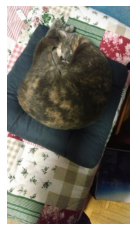

In [131]:
show_image("image.png")     # Ура, котик!

#### **Лайфхаки** (модуль io)

Но сохранять картинку в файл не очень удобно. Неужели нет способа отобразить её сразу из питона, минуя сохранение в файл? Конечно же можно

Для подобных случаев в питоне есть специальный модуль **io** (включён в стандартную библиотеку языка). Он предоставляет нам **объекты, которые ведут себя в точности как файлы, но при этом файлами не являются**. Например, объект `io.BytesIO` имитирует файл, открытый в бинарном режиме, это то, что нам нужно

In [138]:
import io

In [171]:
response = requests.get("https://cataas.com/cat")
buffer = io.BytesIO()   # Такие объекты часто называют buffer
buffer.write(response.content)

20167

In [172]:
show_image(buffer)

SyntaxError: not a PNG file (<string>)

Не работает! Это крайне неочевидно, но ошибка происходит из-за того, что мы записали что-то в "файл", но не можем оттуда ничего прочитать, так как после записи мы как бы находимся в самом конце "файла".

Но мы вспомним про волшебный метод `seek`, который позволяет нам вернуться к определённому байту. Давайте сразу перепишем код в удобную функцию и внесём эту правку

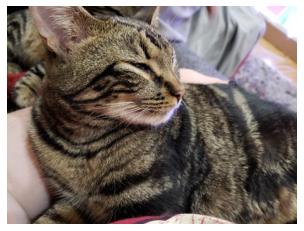

In [141]:
def show_response_image(response):
    buffer = io.BytesIO()
    buffer.write(response.content)
    buffer.seek(0)    # Возвращаемся на 0 байт в файле (в начало)
    image = plt.imread(buffer, format="gif")   # Поменяли формат на GIF, так как большинство картинок по этому API именно в нём, а plt.imread не умеет его распознавать
    plt.imshow(image)
    plt.axis("off")
    

response = requests.get("https://cataas.com/cat")
show_response_image(response)

#### **Более сложный запрос**

Давайте теперь сделаем запрос по шаблону `/cat/says/:text?size=:size&color=:color`, указанному в документации. Это позволит нам получить картинку котика с каким-то текстом определённого размера и цвета, а также добавим параметр `:tag`, который описывается в отдельном пункте документации. Итого получим `/cat/:tag/says/:text?size=:size&color=:color`

In [142]:
response = requests.get("https://cataas.com/cat/floppa/says/привет_мир", params={"size": 2, "color": "grey"})   # Да, floppa это отдельный тег
response

<Response [200]>

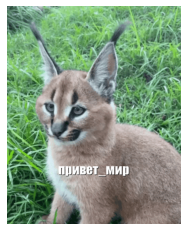

In [143]:
show_response_image(response)

Хочу текст побольше и другого цвета

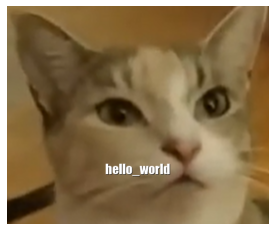

In [144]:
response = requests.get("https://cataas.com/cat/says/hello_world", params={"size": 10, "color": "yellow"})
show_response_image(response)

Не работает, видимо разработчики нас обманули

#### Типичный ответ от API это JSON

На самом деле то, что мы делали до сих пор это скорее исключение из правил. Чаще всего **ответы** от API мы получаем в формате JSON, благо данный сервис тоже предоставляет такую возможность, нужно просто указать дополнительный параметр `json=true`

In [149]:
response = requests.get("https://cataas.com/cat/says/hello world", params={"json": "true"})
response.text

'{"tags":["sleepy","catto"],"createdAt":"2020-04-05T11:24:50.302Z","updatedAt":"2022-10-11T07:52:32.439Z","validated":true,"owner":"null","file":"5e89c0021b7a400011744222.png","mimetype":"image/png","size":577423,"_id":"5a358s1vHFwHhTFy","url":"/cat/5a358s1vHFwHhTFy/says/hello%20world"}'

Круто, мы получили JSON, но он представлен в виде строки. Мы можем использовать функцию `json.loads`, чтобы сделать из этого словарь, но **requests** делает жизнь ещё проще, просто вызовем метод `json` объекта ответа

In [150]:
response.json()

{'tags': ['sleepy', 'catto'],
 'createdAt': '2020-04-05T11:24:50.302Z',
 'updatedAt': '2022-10-11T07:52:32.439Z',
 'validated': True,
 'owner': 'null',
 'file': '5e89c0021b7a400011744222.png',
 'mimetype': 'image/png',
 'size': 577423,
 '_id': '5a358s1vHFwHhTFy',
 'url': '/cat/5a358s1vHFwHhTFy/says/hello%20world'}

В этом JSON объекте уже содержится гораздо больше информации, её можно как-то использовать по своему усмотрению

Заметьте, что мы не получили картинку в теле ответа, как в предыдущем примере. Это происходит из-за того, что нельзя отправить в одном ответе и JSON и картинку. В подобных случаях ссылку на картинку или любой другой файл обычно помещают в JSON.

Таким образом, для получения картинки через JSON нужно будет сделать два запроса (и это стандартная схема для большинства API)

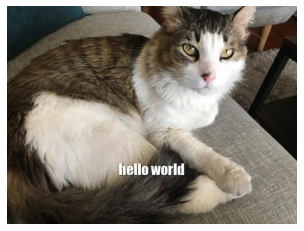

In [151]:
json_response = requests.get("https://cataas.com/cat/says/hello world", params={"json": "true"})
image_response = requests.get("https://cataas.com" + json_response.json()["url"])
show_response_image(image_response)

### Немного примеров интернет API "из жизни"

По своей сути API это универсальный способ взаимодействия с сервисом с любой платформы. Возьмём, например, Stepik, у которого тоже есть API.

У Stepik помимо веб-сайта есть ещё и мобильные приложения для iOS и Android. Согласитесь, было бы очень неудобно делать с нуля три варианта приложения (веб и приложения на смартфонах), такую систему очень трудно поддерживать и развивать. Поэтому у Stepik и существует API. Разработчики делают некоторый ключевой функционал и оборачивают его в API, а то, что мы видим в браузере или в мобильном приложении это всего лишь красивая графическая обёртка, под которой выполняются универсальные запросы к API, они и обеспечивают всю функциональность.

Аналогично с каким-нибудь YouTube, VK или Telegram. Вы никогда не задумывались, как так получается, что у данных сервисов есть "альтернативные приложения" не от основных разработчиков? Неужели какой-то энтузиаст способен полностью с нуля написать логику YouTube? Конечно нет, такие альтернативные приложения тоже целиком и полностью построены на API данных сервисов и представляют их себя просто другую обёртку (в них ещё может удаляться ненужный функционал или добавляться новый, но только в рамках, которые определяет API)

Так что по сути с полученными знаниями вы уже можете написать свои приложения для Telegram и Stepik, просто используя их API

Или можно взять любой сервис, который предлагает услуги ИИ. Ну, например, [вот этот](https://useadrenaline.com/playground). В 99%, когда вы видите подобный сервис, это не собственная разработка автора, а просто графическая оболочка под API какого-нибудь Google или OpenAI. У простого смертного пока не может быть достаточно вычислительных ресурсов для обучения подобной модели, так что большинство таких сервисов это API от более крупных игроков

У NCBI есть свой API, который интегрирован в десктопные утилиты **E-utilities**. В идеале получать информацию с NCBI надо именно при помощи их API или утилит, а не как мы это делали с вами. Но у NCBI API и **E-utilities** такая отвратительная документация, что парсинг страниц через регулярки на её фоне может показаться весьма неплохим решением

# Дополнительные материалы

+ Курс на степике - https://stepik.org/course/512/syllabus (уроки 3.3 - 3.6). Там довольно понятно рассказывается и про requests, и про json, и про API, и про парсинг страниц. Есть прикольные и несложные задачки (правда парсить страницы в них придётся через регулярки...)
+ Репозиторий с большой коллекцией разных публичных API - https://github.com/public-apis/public-apis
+ Документация "красивого супа" - https://beautiful-soup-4.readthedocs
+ Страница про API в википедии - https://ru.wikipedia.org/wiki/API
+ Популярное видео про прошлое и настоящее интернет API - https://youtu.be/BxV14h0kFs0